## Part I: Data Pre-processing

In [ ]:
pip freeze > requirements.txt

In [ ]:
import pandas as pd

In [ ]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2024-12-01 08:10:31--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.107.207, 142.251.188.207, 173.194.202.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.107.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2024-12-01 08:10:31 (215 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("questions-words.txt") as f:
    data = f.read().splitlines()

In [ ]:
# check data from the first 10 entries
for entry in data[:10:2]:
    print(entry)

: capital-common-countries
Athens Greece Bangkok Thailand
Athens Greece Berlin Germany
Athens Greece Cairo Egypt
Athens Greece Hanoi Vietnam


In [ ]:
# category = {sementic,syntatic} 前五個subcategory是sementic

In [ ]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.

In [ ]:
df = pd.DataFrame(
    {
        "Question" :[],
        "Category" :[],
        "SubCategory" :[],
    }
)



In [ ]:
df

Empty DataFrame
Columns: [Question, Category, SubCategory]
Index: []

In [ ]:
# Create the dataframe
#qw = pd.read_csv('questions-words.txt')
df = pd.DataFrame(
    {
        "Question" :[],
        "Category" :[],
        "SubCategory" :[],
    }
)

sc = None #預先創造儲存sc的空間
catcnt = 0 #sc計數器
with open('questions-words.txt') as file:
  for line in file:
    part = line.split(" ") # split就是將目標以小括號內的東西做分割
    if part[0]!=":" :
      df.at[len(df["Question"]),"Question"] = line.strip()
      df.at[len(df["Question"])-1,"SubCategory"] = sc
      if catcnt<=5 :
        df.at[len(df["Question"])-1,"Category"] = 'Semantic'
      else :
        df.at[len(df["Question"])-1,"Category"] = 'Syntatic'
    else:
      sc = line.strip() # save sc
      catcnt += 1  #遇到第幾個sc

#df["Question"] = qw
num = len(df["Question"])
print(num)




<ipython-input-8-ede9dfa29ef1>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Athens Greece Baghdad Iraq' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[len(df["Question"]),"Question"] = line.strip()
<ipython-input-8-ede9dfa29ef1>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ': capital-common-countries' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[len(df["Question"])-1,"SubCategory"] = sc
<ipython-input-8-ede9dfa29ef1>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Semantic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[len(df["Question"])-1,"Category"] = 'Semantic'


19544


In [ ]:
df.to_csv(f"questions-words.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [ ]:
df.head()


Question  Category                 SubCategory
0      Athens Greece Baghdad Iraq  Semantic  : capital-common-countries
1  Athens Greece Bangkok Thailand  Semantic  : capital-common-countries
2     Athens Greece Beijing China  Semantic  : capital-common-countries
3    Athens Greece Berlin Germany  Semantic  : capital-common-countries
4  Athens Greece Bern Switzerland  Semantic  : capital-common-countries

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv("questions-words.csv")

In [ ]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

[==================================================] 100.0% 128.1/128.1MB downloaded
The Gensim model loaded successfully!


In [ ]:
from logging import exception
from os import WCOREDUMP
from ssl import ALERT_DESCRIPTION_RECORD_OVERFLOW
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []
for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      #print(analogy)
      wa,wb,wc,wd = analogy.split(" ")

      print(wa,wb,wc,wd)
      golds.append(wd)
      try:
        exp_ans = model.most_similar(positive=[wb,wc],negative=[wa],topn=1)[0][0]
        print(f"Prediction: {exp_ans}")
        preds.append(exp_ans)
      except Exception as err:
        preds.append(" ")
        print(f"{err}")
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """

  0%|          | 1/19544 [00:00<38:21,  8.49it/s]

Athens Greece Baghdad Iraq
"Key 'Greece' not present in vocabulary"
Athens Greece Bangkok Thailand
"Key 'Greece' not present in vocabulary"
Athens Greece Beijing China
"Key 'Greece' not present in vocabulary"
Athens Greece Berlin Germany
"Key 'Greece' not present in vocabulary"
Athens Greece Bern Switzerland
"Key 'Greece' not present in vocabulary"
Athens Greece Cairo Egypt
"Key 'Greece' not present in vocabulary"
Athens Greece Canberra Australia
"Key 'Greece' not present in vocabulary"
Athens Greece Hanoi Vietnam
"Key 'Greece' not present in vocabulary"
Athens Greece Havana Cuba
"Key 'Greece' not present in vocabulary"
Athens Greece Helsinki Finland
"Key 'Greece' not present in vocabulary"
Athens Greece Islamabad Pakistan
"Key 'Greece' not present in vocabulary"
Athens Greece Kabul Afghanistan
"Key 'Greece' not present in vocabulary"
Athens Greece London England
"Key 'Greece' not present in vocabulary"
Athens Greece Madrid Spain
"Key 'Greece' not present in vocabulary"
Athens Greece M

  1%|          | 146/19544 [00:00<00:45, 424.16it/s]

Bern Switzerland
"Key 'China' not present in vocabulary"
Beijing China Cairo Egypt
"Key 'China' not present in vocabulary"
Beijing China Canberra Australia
"Key 'China' not present in vocabulary"
Beijing China Hanoi Vietnam
"Key 'China' not present in vocabulary"
Beijing China Havana Cuba
"Key 'China' not present in vocabulary"
Beijing China Helsinki Finland
"Key 'China' not present in vocabulary"
Beijing China Islamabad Pakistan
"Key 'China' not present in vocabulary"
Beijing China Kabul Afghanistan
"Key 'China' not present in vocabulary"
Beijing China London England
"Key 'China' not present in vocabulary"
Beijing China Madrid Spain
"Key 'China' not present in vocabulary"
Beijing China Moscow Russia
"Key 'China' not present in vocabulary"
Beijing China Oslo Norway
"Key 'China' not present in vocabulary"
Beijing China Ottawa Canada
"Key 'China' not present in vocabulary"
Beijing China Paris France
"Key 'China' not present in vocabulary"
Beijing China Rome Italy
"Key 'China' not present

  2%|▏         | 368/19544 [00:00<00:25, 750.56it/s]


"Key 'Australia' not present in vocabulary"
Canberra Australia Oslo Norway
"Key 'Australia' not present in vocabulary"
Canberra Australia Ottawa Canada
"Key 'Australia' not present in vocabulary"
Canberra Australia Paris France
"Key 'Australia' not present in vocabulary"
Canberra Australia Rome Italy
"Key 'Australia' not present in vocabulary"
Canberra Australia Stockholm Sweden
"Key 'Australia' not present in vocabulary"
Canberra Australia Tehran Iran
"Key 'Australia' not present in vocabulary"
Canberra Australia Tokyo Japan
"Key 'Australia' not present in vocabulary"
Canberra Australia Athens Greece
"Key 'Australia' not present in vocabulary"
Canberra Australia Baghdad Iraq
"Key 'Australia' not present in vocabulary"
Canberra Australia Bangkok Thailand
"Key 'Australia' not present in vocabulary"
Canberra Australia Beijing China
"Key 'Australia' not present in vocabulary"
Canberra Australia Berlin Germany
"Key 'Australia' not present in vocabulary"
Canberra Australia Bern Switzerland

  2%|▏         | 488/19544 [00:00<00:21, 880.47it/s]

Paris France Hanoi Vietnam
"Key 'France' not present in vocabulary"
Paris France Havana Cuba
"Key 'France' not present in vocabulary"
Paris France Helsinki Finland
"Key 'France' not present in vocabulary"
Paris France Islamabad Pakistan
"Key 'France' not present in vocabulary"
Paris France Kabul Afghanistan
"Key 'France' not present in vocabulary"
Paris France London England
"Key 'France' not present in vocabulary"
Paris France Madrid Spain
"Key 'France' not present in vocabulary"
Paris France Moscow Russia
"Key 'France' not present in vocabulary"
Paris France Oslo Norway
"Key 'France' not present in vocabulary"
Paris France Ottawa Canada
"Key 'France' not present in vocabulary"
Rome Italy Stockholm Sweden
"Key 'Italy' not present in vocabulary"
Rome Italy Tehran Iran
"Key 'Italy' not present in vocabulary"
Rome Italy Tokyo Japan
"Key 'Italy' not present in vocabulary"
Rome Italy Athens Greece
"Key 'Italy' not present in vocabulary"
Rome Italy Baghdad Iraq
"Key 'Italy' not present in v

  3%|▎         | 579/19544 [00:00<00:22, 838.98it/s]

Bangkok Thailand
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Banjul Gambia
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Beijing China
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Beirut Lebanon
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Belgrade Serbia
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Belmopan Belize
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Berlin Germany
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Bern Switzerland
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Bishkek Kyrgyzstan
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Bratislava Slovakia
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Brussels Belgium
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Bucharest Romania
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Budapest Hungary
"Key 'Nigeria' not present in vocabulary"
Abuja Nigeria Bujumbura Burundi
"Key 'Nigeria' not present in vocabular

  3%|▎         | 665/19544 [00:01<00:28, 651.51it/s]

Jordan Dublin Ireland
"Key 'Jordan' not present in vocabulary"
Amman Jordan Dushanbe Tajikistan
"Key 'Jordan' not present in vocabulary"
Amman Jordan Funafuti Tuvalu
"Key 'Jordan' not present in vocabulary"
Amman Jordan Gaborone Botswana
"Key 'Jordan' not present in vocabulary"
Amman Jordan Georgetown Guyana
"Key 'Jordan' not present in vocabulary"
Ankara Turkey Antananarivo Madagascar
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Apia Samoa
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Ashgabat Turkmenistan
"Key 'Turkey' not present in vocabulary"
Ankara Turkey

  4%|▍         | 738/19544 [00:01<00:44, 423.39it/s]

 Asmara Eritrea
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Astana Kazakhstan
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Athens Greece
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Baghdad Iraq
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Baku Azerbaijan
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Bamako Mali
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Bangkok Thailand
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Banjul Gambia
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Beijing China
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Beirut Lebanon
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Belgrade Serbia
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Belmopan Belize
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Berlin Germany
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Bern Switzerland
"Key 'Turkey' not present in vocabulary"
Ankara Turkey Bishkek Kyrgyzsta

  5%|▍         | 957/19544 [00:01<00:29, 623.85it/s]

Turkmenistan Damascus Syria
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Dhaka Bangladesh
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Doha Qatar
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Dublin Ireland
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Dushanbe Tajikistan
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Funafuti Tuvalu
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Gaborone Botswana
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Georgetown Guyana
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Hanoi Vietnam
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Harare Zimbabwe
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Havana Cuba
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Helsinki Finland
"Key 'Turkmenistan' not present in voca

  5%|▌         | 1034/19544 [00:01<00:29, 631.48it/s]

Azerbaijan Bern Switzerland
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bishkek Kyrgyzstan
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bratislava Slovakia
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Brussels Belgium
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bucharest Romania
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Budapest Hungary
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bujumbura Burundi
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Cairo Egypt
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Canberra Australia
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Caracas Venezuela
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Chisinau Moldova
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Conakry Guinea
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Copenhagen Denmark
"Key 'Azerbaijan' not present i

  6%|▌         | 1108/19544 [00:01<00:36, 501.85it/s]


"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Havana Cuba
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Helsinki Finland
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Islamabad Pakistan
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Jakarta Indonesia
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Kabul Afghanistan
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Kampala Uganda
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Kathmandu Nepal
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Khartoum Sudan
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Kiev Ukraine
"Key 'Thailand' not present in vocabulary"
Banjul Gambia Beijing China
"Key 'Gambia' not present in vocabulary"
Banjul Gambia Beirut Lebanon
"Key 'Gambia' not present in vocabulary"
Banjul Gambia Belgrade Serbia
"Key 'Gambia' not present in vocabulary"
Banjul Gambia Belmopan Belize
"Key 'Gambia' not present in voca

  6%|▋         | 1230/19544 [00:02<00:37, 485.65it/s]

Beijing China Harare Zimbabwe
"Key 'China' not present in vocabulary"
Beijing China Havana Cuba
"Key 'China' not present in vocabulary"
Beijing China Helsinki Finland
"Key 'China' not present in vocabulary"
Beijing China Islamabad Pakistan
"Key 'China' not present in vocabulary"
Beijing China Jakarta Indonesia
"Key 'China' not present in vocabulary"
Beijing China Kabul Afghanistan
"Key 'China' not present in vocabulary"
Beijing China Kampala Uganda
"Key 'China' not present in vocabulary"
Beijing China Kathmandu Nepal
"Key 'China' not present in vocabulary"
Beijing China Khartoum Sudan
"Key 'China' not present in vocabulary"
Beijing China Kiev Ukraine
"Key 'China' not present in vocabulary"
Beijing China Kigali Rwanda
"Key 'China' not present in vocabulary"
Beijing China Kingston Jamaica
"Key 'China' not present in vocabulary"
Beirut Lebanon Belgrade Serbia
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Belmopan Belize
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon B

  7%|▋         | 1349/19544 [00:02<00:35, 506.29it/s]

"Key 'Belize' not present in vocabulary"
Belmopan Belize Conakry Guinea
"Key 'Belize' not present in vocabulary"
Belmopan Belize Copenhagen Denmark
"Key 'Belize' not present in vocabulary"
Belmopan Belize Dakar Senegal
"Key 'Belize' not present in vocabulary"
Belmopan Belize Damascus Syria
"Key 'Belize' not present in vocabulary"
Belmopan Belize Dhaka Bangladesh
"Key 'Belize' not present in vocabulary"
Belmopan Belize Doha Qatar
"Key 'Belize' not present in vocabulary"
Belmopan Belize Dublin Ireland
"Key 'Belize' not present in vocabulary"
Belmopan Belize Dushanbe Tajikistan
"Key 'Belize' not present in vocabulary"
Belmopan Belize Funafuti Tuvalu
"Key 'Belize' not present in vocabulary"
Belmopan Belize Gaborone Botswana
"Key 'Belize' not present in vocabulary"
Belmopan Belize Georgetown Guyana
"Key 'Belize' not present in vocabulary"
Belmopan Belize Hanoi Vietnam
"Key 'Belize' not present in vocabulary"
Belmopan Belize Harare Zimbabwe
"Key 'Belize' not present in vocabulary"
Belmopan B

  7%|▋         | 1436/19544 [00:02<00:32, 556.64it/s]

"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Harare Zimbabwe
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Havana Cuba
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Helsinki Finland
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Islamabad Pakistan
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Jakarta Indonesia
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kabul Afghanistan
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kampala Uganda
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kathmandu Nepal
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Khartoum Sudan
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kiev Ukraine
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kigali Rwanda
"Key 'Kyrgyzstan' not present in vocabulary"
Bishkek Kyrgyzstan Kingston Jamaica
"Key 'Kyrgyzstan' not present in vocabular

  8%|▊         | 1612/19544 [00:02<00:29, 604.39it/s]

"Key 'Hungary' not present in vocabulary"
Budapest Hungary Kampala Uganda
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Kathmandu Nepal
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Khartoum Sudan
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Kiev Ukraine
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Kigali Rwanda
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Kingston Jamaica
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Libreville Gabon
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Lilongwe Malawi
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Lima Peru
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Lisbon Portugal
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Ljubljana Slovenia
"Key 'Hungary' not present in vocabulary"
Budapest Hungary London England
"Key 'Hungary' not present in vocabulary"
Budapest Hungary Luanda Angola
"Key 'Hungary' not present in vocabu

  9%|▊         | 1686/19544 [00:03<00:34, 520.73it/s]

Cairo Egypt London England
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Luanda Angola
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Lusaka Zambia
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Madrid Spain
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Managua Nicaragua
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Manama Bahrain
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Manila Philippines
"Key 'Egypt' not present in vocabulary"
Canberra Australia Caracas Venezuela
"Key 'Australia' not present in vocabulary"
Canberra Australia Chisinau Moldova
"Key 'Australia' not present in vocabulary"
Canberra Australia Conakry Guinea
"Key 'Australia' not present in vocabulary"
Canberra Australia Copenhagen Denmark
"Key 'Australia' not present in vocabulary"
Canberra Australia Dakar Senegal
"Key 'Australia' not present in vocabulary"
Canberra Australia Damascus Syria
"Key 'Australia' not present in vocabulary"
Canberra Australia Dhaka Bangladesh
"Key 'Australia'

 11%|█▏        | 2240/19544 [00:03<00:11, 1469.40it/s]

 Senegal Kiev Ukraine
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Kigali Rwanda
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Kingston Jamaica
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Libreville Gabon
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lilongwe Malawi
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lima Peru
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lisbon Portugal
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Ljubljana Slovenia
"Key 'Senegal' not present in vocabulary"
Dakar Senegal London England
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Luanda Angola
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lusaka Zambia
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Madrid Spain
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Managua Nicaragua
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Manama Bahrain
"Key 'Senegal' not present in vocabulary"
Dakar Sene

 12%|█▏        | 2408/19544 [00:03<00:15, 1141.10it/s]

 Jakarta Indonesia
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kabul Afghanistan
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kampala Uganda
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kathmandu Nepal
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Khartoum Sudan
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kiev Ukraine
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kigali Rwanda
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Kingston Jamaica
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Libreville Gabon
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Lilongwe Malawi
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Lima Peru
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Lisbon Portugal
"Key 'Pakistan' not present in vocabulary"
Islamabad Pakistan Ljubljana Slovenia
"Key 'Pakistan' not present in vocabulary"
Islamaba

 15%|█▌        | 2944/19544 [00:03<00:12, 1277.14it/s]

"Key 'Peru' not present in vocabulary"
Lima Peru Sofia Bulgaria
"Key 'Peru' not present in vocabulary"
Lima Peru Stockholm Sweden
"Key 'Peru' not present in vocabulary"
Lima Peru Suva Fiji
"Key 'Peru' not present in vocabulary"
Lima Peru Taipei Taiwan
"Key 'Peru' not present in vocabulary"
Lima Peru Tallinn Estonia
"Key 'Peru' not present in vocabulary"
Lisbon Portugal Ljubljana Slovenia
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal London England
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Luanda Angola
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Lusaka Zambia
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Madrid Spain
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Managua Nicaragua
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Manama Bahrain
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Manila Philippines
"Key 'Portugal' not present in vocabulary"
Lisbon Portugal Maputo Mozambique
"Key 'Portu

 18%|█▊        | 3541/19544 [00:04<00:09, 1739.07it/s]

"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tokyo Japan
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tripoli Libya
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tunis Tunisia
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Vaduz Liechtenstein
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Valletta Malta
"Key 'Belarus' not present in vocabulary"
Mogadishu Somalia Monrovia Liberia
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Montevideo Uruguay
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Moscow Russia
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Muscat Oman
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Nairobi Kenya
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Nassau Bahamas
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Niamey Niger
"Key 'Somalia' not present in vocabulary"
Mogadishu Somalia Nicosia Cyprus
"Key 'Somalia' not present in vocabulary"
Moga

 20%|██        | 3972/19544 [00:04<00:08, 1903.01it/s]

Lithuania
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Warsaw Poland
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Windhoek Namibia
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Yerevan Armenia
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Zagreb Croatia
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Abuja Nigeria
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Accra Ghana
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Algiers Algeria
"Key 'Greenland' not present in vocabulary"
Nuuk Greenland Amman Jordan
"Key 'Greenland' not present in vocabulary"
Oslo Norway Ottawa Canada
"Key 'Norway' not present in vocabulary"
Oslo Norway Paramaribo Suriname
"Key 'Norway' not present in vocabulary"
Oslo Norway Paris France
"Key 'Norway' not present in vocabulary"
Oslo Norway Podgorica Montenegro
"Key 'Norway' not present in vocabulary"
Oslo Norway Quito Ecuador
"Key 'Norway' not present in vocabulary"
Oslo Norwa

 25%|██▍       | 4800/19544 [00:04<00:05, 2931.86it/s]


Taipei Taiwan Tokyo Japan
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Tripoli Libya
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Tunis Tunisia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vaduz Liechtenstein
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Valletta Malta
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vienna Austria
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vientiane Laos
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vilnius Lithuania
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Warsaw Poland
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Windhoek Namibia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Yerevan Armenia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Zagreb Croatia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Abuja Nigeria
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Accra Ghana
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Algi

 28%|██▊       | 5405/19544 [00:04<00:05, 2521.55it/s]

 Dhaka Bangladesh
"Key 'Croatia' not present in vocabulary"
Zagreb Croatia Doha Qatar
"Key 'Croatia' not present in vocabulary"
Zagreb Croatia Dublin Ireland
"Key 'Croatia' not present in vocabulary"
Algeria dinar Angola kwanza
"Key 'Angola' not present in vocabulary"
Algeria dinar Argentina peso
"Key 'Argentina' not present in vocabulary"
Algeria dinar Armenia dram
"Key 'Armenia' not present in vocabulary"
Algeria dinar Brazil real
"Key 'Brazil' not present in vocabulary"
Algeria dinar Bulgaria lev
"Key 'Bulgaria' not present in vocabulary"
Algeria dinar Cambodia riel
"Key 'Cambodia' not present in vocabulary"
Algeria dinar Canada dollar
"Key 'Canada' not present in vocabulary"
Algeria dinar Croatia kuna
"Key 'Croatia' not present in vocabulary"
Algeria dinar Denmark krone
"Key 'Denmark' not present in vocabulary"
Algeria dinar Europe euro
"Key 'Europe' not present in vocabulary"
Algeria dinar Hungary forint
"Key 'Hungary' not present in vocabulary"
Algeria dinar India rupee
"Key 'Ind

 31%|███       | 6082/19544 [00:05<00:04, 2733.09it/s]

"Key 'Denmark' not present in vocabulary"
Mexico peso Europe euro
"Key 'Europe' not present in vocabulary"
Mexico peso Hungary forint
"Key 'Hungary' not present in vocabulary"
Mexico peso India rupee
"Key 'India' not present in vocabulary"
Mexico peso Iran rial
"Key 'Iran' not present in vocabulary"
Mexico peso Japan yen
"Key 'Japan' not present in vocabulary"
Mexico peso Korea won
"Key 'Korea' not present in vocabulary"
Mexico peso Latvia lats
"Key 'Latvia' not present in vocabulary"
Mexico peso Lithuania litas
"Key 'Lithuania' not present in vocabulary"
Mexico peso Macedonia denar
"Key 'Macedonia' not present in vocabulary"
Mexico peso Malaysia ringgit
"Key 'Malaysia' not present in vocabulary"
Nigeria naira Poland zloty
"Key 'Poland' not present in vocabulary"
Nigeria naira Romania leu
"Key 'Romania' not present in vocabulary"
Nigeria naira Russia ruble
"Key 'Russia' not present in vocabulary"
Nigeria naira Sweden krona
"Key 'Sweden' not present in vocabulary"
Nigeria naira Thailand

 35%|███▌      | 6920/19544 [00:05<00:03, 3314.28it/s]

Denver Colorado Milwaukee Wisconsin
"Key 'Colorado' not present in vocabulary"
Denver Colorado Portland Oregon
"Key 'Colorado' not present in vocabulary"
Denver Colorado Tucson Arizona
"Key 'Colorado' not present in vocabulary"
Denver Colorado Fresno California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Sacramento California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Mesa Arizona
"Key 'Colorado' not present in vocabulary"
Denver Colorado Atlanta Georgia
"Key 'Colorado' not present in vocabulary"
Denver Colorado Omaha Nebraska
"Key 'Colorado' not present in vocabulary"
Denver Colorado Miami Florida
"Key 'Colorado' not present in vocabulary"
Denver Colorado Tulsa Oklahoma
"Key 'Colorado' not present in vocabulary"
Denver Colorado Oakland California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Cleveland Ohio
"Key 'Colorado' not present in vocabulary"
Denver Colorado Minneapolis Minnesota
"Key 'Colorado' not present in vocabulary"
Denver Colora

 37%|███▋      | 7281/19544 [00:05<00:04, 2779.29it/s]

"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Orlando Florida
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Laredo Texas
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Chandler Arizona
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Madison Wisconsin
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Lubbock Texas
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Garland Texas
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Glendale Arizona
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Hialeah Florida
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Reno Nevada
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Scottsdale Arizona
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Irving Texas
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Fremont California
"Key 'Kentucky' not present in vocabulary"
Lexington Kentucky Irvine

 42%|████▏     | 8131/19544 [00:05<00:03, 3205.38it/s]

 Oregon
"Key 'Texas' not present in vocabulary"
Lubbock Texas Tucson Arizona
"Key 'Texas' not present in vocabulary"
Garland Texas Glendale Arizona
"Key 'Texas' not present in vocabulary"
Garland Texas Hialeah Florida
"Key 'Texas' not present in vocabulary"
Garland Texas Reno Nevada
"Key 'Texas' not present in vocabulary"
Garland Texas Scottsdale Arizona
"Key 'Texas' not present in vocabulary"
Garland Texas Fremont California
"Key 'Texas' not present in vocabulary"
Garland Texas Irvine California
"Key 'Texas' not present in vocabulary"
Garland Texas Spokane Washington
"Key 'Texas' not present in vocabulary"
Garland Texas Modesto California
"Key 'Texas' not present in vocabulary"
Garland Texas Shreveport Louisiana
"Key 'Texas' not present in vocabulary"
Garland Texas Tacoma Washington
"Key 'Texas' not present in vocabulary"
Garland Texas Oxnard California
"Key 'Texas' not present in vocabulary"
Garland Texas Fontana California
"Key 'Texas' not present in vocabulary"
Garland Texas Akron 

 43%|████▎     | 8476/19544 [00:13<01:10, 157.73it/s] 

Prediction: daughter
father mother brothers sisters
Prediction: sisters
father mother dad mom
Prediction: mom
grandfather grandmother grandpa grandma
Prediction: grandma
grandfather grandmother grandson granddaughter
Prediction: granddaughter
grandfather grandmother groom bride
Prediction: bride
grandfather grandmother he she
Prediction: she
grandfather grandmother his her
Prediction: her
grandfather grandmother husband wife
Prediction: wife
grandfather grandmother king queen
Prediction: queen
grandfather grandmother man woman
Prediction: woman
grandfather grandmother nephew niece
Prediction: niece
grandfather grandmother policeman policewoman
Prediction: policemen
grandfather grandmother prince princess
Prediction: princess
grandfather grandmother son daughter
Prediction: daughter
grandfather grandmother sons daughters
Prediction: daughters
grandfather grandmother stepbrother stepsister
Prediction: stepsister
grandfather grandmother stepfather stepmother
Prediction: girlfriend
grandfa

 45%|████▍     | 8719/19544 [00:25<02:52, 62.93it/s] 

Prediction: daughter
prince princess sons daughters
Prediction: daughters
prince princess stepbrother stepsister
Prediction: stepsister
prince princess stepfather stepmother
Prediction: stepmother
prince princess stepson stepdaughter
Prediction: stepdaughter
prince princess uncle aunt
Prediction: aunt
prince princess boy girl
Prediction: girl
prince princess brother sister


 45%|████▍     | 8723/19544 [00:26<02:52, 62.67it/s]

Prediction: sister
prince princess brothers sisters
Prediction: sisters
prince princess dad mom
Prediction: mom
prince princess father mother
Prediction: mother
prince princess grandfather grandmother
Prediction: grandmother
prince princess grandpa grandma
Prediction: grandma
prince princess grandson granddaughter
Prediction: granddaughter
prince princess groom bride
Prediction: bride
prince princess he she
Prediction: she
prince princess his her
Prediction: her
prince princess husband wife
Prediction: wife
prince princess king queen
Prediction: queen
prince princess man woman
Prediction: woman
prince princess nephew niece
Prediction: niece
prince princess policeman policewoman
Prediction: passerby
son daughter sons daughters
Prediction: daughters
son daughter stepbrother stepsister
Prediction: stepsister
son daughter stepfather stepmother
Prediction: stepdaughter
son daughter stepson stepdaughter
Prediction: stepdaughter
son daughter uncle aunt
Prediction: aunt
son daughter boy girl
P

 46%|████▌     | 8894/19544 [00:30<03:14, 54.69it/s]

Prediction: unwilling
amazing amazingly safe safely
Prediction: safer
amazing amazingly serious seriously
Prediction: sufficiently
amazing amazingly slow slowly
Prediction: excessively
amazing amazingly sudden suddenly
Prediction: abrupt
amazing amazingly swift swiftly
Prediction: speedy
amazing amazingly typical typically
Prediction: relatively
amazing amazingly unfortunate unfortunately
Prediction: terribly
amazing amazingly usual usually
Prediction: overly
apparent apparently calm calmly
Prediction: quiet
apparent apparently cheerful cheerfully
Prediction: cheery
apparent apparently complete completely
Prediction: completed
apparent apparently efficient efficiently
Prediction: easier
apparent apparently fortunate fortunately
Prediction: glad
apparent apparently free freely
Prediction: allowed
apparent apparently furious furiously
Prediction: angry
apparent apparently happy happily
Prediction: 'd
apparent apparently immediate immediately
Prediction: immediately
apparent apparently in

 46%|████▌     | 9015/19544 [00:33<03:27, 50.86it/s]

Prediction: slowly
complete completely sudden suddenly
Prediction: suddenly
complete completely swift swiftly
Prediction: swiftly
complete completely typical typically
Prediction: somewhat
complete completely unfortunate unfortunately
Prediction: misunderstood
complete completely usual usually
Prediction: somewhat
complete completely amazing amazingly
Prediction: totally
complete completely apparent apparently
Prediction: apparently
complete completely calm calmly
Prediction: calmed
complete completely cheerful cheerfully
Prediction: strangely
efficient efficiently fortunate fortunately
Prediction: thankful
efficient efficiently free freely
Prediction: freely
efficient efficiently furious furiously
Prediction: angrily
efficient efficiently happy happily
Prediction: happily
efficient efficiently immediate immediately
Prediction: respond
efficient efficiently infrequent infrequently
Prediction: infrequently
efficient efficiently lucky luckily
Prediction: fortunate
efficient efficiently m

 47%|████▋     | 9101/19544 [00:36<03:48, 45.65it/s]

Prediction: accurately
free freely professional professionally
Prediction: professionally
free freely quick quickly
Prediction: calmly
free freely quiet quietly
Prediction: quietly
free freely rapid rapidly
Prediction: rapidly
free freely rare rarely
Prediction: uncommon
free freely reluctant reluctantly
Prediction: unwilling
free freely safe safely
Prediction: safely
free freely serious seriously
Prediction: seriously
free freely slow slowly
Prediction: slowly
free freely sudden suddenly
Prediction: spontaneously
free freely swift swiftly
Prediction: swiftly
free freely typical typically
Prediction: vary
free freely unfortunate unfortunately
Prediction: sadly
free freely usual usually
Prediction: albeit
free freely amazing amazingly
Prediction: incredible
free freely apparent apparently
Prediction: seeming
free freely calm calmly
Prediction: unruffled
free freely cheerful cheerfully
Prediction: pensive
free freely complete completely
Prediction: independently
free freely efficient eff

 47%|████▋     | 9162/19544 [00:38<04:15, 40.69it/s]

Prediction: full-time
happy happily quick quickly
Prediction: quietly
happy happily quiet quietly
Prediction: quietly
happy happily rapid rapidly
Prediction: rapidly
happy happily rare rarely
Prediction: uncommon
happy happily reluctant reluctantly
Prediction: unwilling
happy happily safe safely
Prediction: safely
happy happily serious seriously
Prediction: posed
happy happily slow slowly
Prediction: slowly
happy happily sudden suddenly
Prediction: uncontrollable
happy happily swift swiftly
Prediction: swiftly
happy happily typical typically
Prediction: varies
happy happily unfortunate unfortunately
Prediction: puzzling
happy happily usual usually
Prediction: quietly
happy happily amazing amazingly
Prediction: astonishing
happy happily apparent apparently
Prediction: seeming
happy happily calm calmly
Prediction: uneasily
happy happily cheerful cheerfully
Prediction: demurely
happy happily complete completely
Prediction: completed
happy happily efficient efficiently
Prediction: efficien

 47%|████▋     | 9206/19544 [00:40<04:33, 37.85it/s]

Prediction: apparently
immediate immediately calm calmly
Prediction: quickly
immediate immediately cheerful cheerfully
Prediction: cheery
immediate immediately complete completely
Prediction: completed
immediate immediately efficient efficiently
Prediction: efficiently
immediate immediately fortunate fortunately
Prediction: lucky
immediate immediately free freely
Prediction: then
immediate immediately furious furiously
Prediction: angry
immediate immediately happy happily
Prediction: 'd
infrequent infrequently lucky luckily
Prediction: 'd
infrequent infrequently most mostly
Prediction: once
infrequent infrequently obvious obviously
Prediction: understood
infrequent infrequently occasional occasionally
Prediction: occasionally
infrequent infrequently possible possibly
Prediction: whether
infrequent infrequently precise precisely
Prediction: precisely
infrequent infrequently professional professionally
Prediction: professionally
infrequent infrequently quick quickly
Prediction: quickly
i

 47%|████▋     | 9238/19544 [00:41<04:29, 38.27it/s]

Prediction: freely
infrequent infrequently furious furiously
Prediction: reacted
infrequent infrequently happy happily
Prediction: 'd
infrequent infrequently immediate immediately
Prediction: immediately
lucky luckily most mostly
Prediction: many
lucky luckily obvious obviously
Prediction: implication
lucky luckily occasional occasionally
Prediction: interruptions
lucky luckily possible possibly
Prediction: unclear
lucky luckily precise precisely
Prediction: accuracy
lucky luckily professional professionally
Prediction: conditioning
lucky luckily quick quickly
Prediction: quicker
lucky luckily quiet quietly
Prediction: calm
lucky luckily rapid rapidly
Prediction: intensification
lucky luckily rare rarely
Prediction: fortunately
lucky luckily reluctant reluctantly
Prediction: hesitant
lucky luckily safe safely
Prediction: fortunately
lucky luckily serious seriously


 47%|████▋     | 9262/19544 [00:42<04:29, 38.21it/s]

Prediction: problems
lucky luckily slow slowly
Prediction: slowed
lucky luckily sudden suddenly
Prediction: abrupt
lucky luckily swift swiftly
Prediction: speedy
lucky luckily typical typically
Prediction: exterior
lucky luckily unfortunate unfortunately
Prediction: regrettable
lucky luckily usual usually
Prediction: routine
lucky luckily amazing amazingly
Prediction: thankfully
lucky luckily apparent apparently
Prediction: implication
lucky luckily calm calmly
Prediction: calmed
lucky luckily cheerful cheerfully
Prediction: cheery
lucky luckily complete completely
Prediction: completed
lucky luckily efficient efficiently
Prediction: efficiency
lucky luckily fortunate fortunately
Prediction: fortunately
lucky luckily free freely
Prediction: access
lucky luckily furious furiously
Prediction: enraged
lucky luckily happy happily
Prediction: fortunately
lucky luckily immediate immediately
Prediction: prompt
lucky luckily infrequent infrequently
Prediction: infrequently
most mostly obvious 

 47%|████▋     | 9280/19544 [00:42<04:29, 38.03it/s]

Prediction: gradual
most mostly rare rarely
Prediction: mainly
most mostly reluctant reluctantly
Prediction: unwilling
most mostly safe safely
Prediction: shelter
most mostly serious seriously
Prediction: mainly
most mostly slow slowly
Prediction: mainly
most mostly sudden suddenly
Prediction: unexpected
most mostly swift swiftly
Prediction: quick
most mostly 

 48%|████▊     | 9294/19544 [00:42<04:30, 37.89it/s]

typical typically
Prediction: mainly
most mostly unfortunate unfortunately
Prediction: regrettable
most mostly usual usually
Prediction: mainly
most mostly amazing amazingly
Prediction: incredible
most mostly apparent apparently
Prediction: partly
most mostly calm calmly
Prediction: quiet
most mostly cheerful cheerfully
Prediction: cheery
most mostly complete completely
Prediction: full
most mostly efficient efficiently
Prediction: inexpensive
most mostly fortunate fortunately
Prediction: lucky
most mostly free freely
Prediction: mainly
most mostly furious furiously
Prediction: angry
most mostly happy happily
Prediction: feel
most mostly immediate immediately
Prediction: seek
most mostly infrequent infrequently
Prediction: interspersed
most mostly lucky luckily
Prediction: happy
obvious obviously occasional occasionally


 48%|████▊     | 9305/19544 [00:43<04:30, 37.88it/s]

Prediction: occasionally
obvious obviously possible possibly
Prediction: should
obvious obviously precise precisely
Prediction: accurate
obvious obviously professional professionally
Prediction: playing
obvious obviously quick quickly
Prediction: 'll
obvious obviously quiet quietly
Prediction: calm
obvious obviously rapid rapidly
Prediction: slow
obvious obviously rare rarely
Prediction: very
obvious obviously reluctant reluctantly
Prediction: willing

 48%|████▊     | 9314/19544 [00:43<04:29, 37.93it/s]


obvious obviously safe safely
Prediction: sure
obvious obviously serious seriously
Prediction: seriously
obvious obviously slow slowly
Prediction: fast
obvious obviously sudden suddenly
Prediction: definitely
obvious obviously swift swiftly
Prediction: speedy
obvious obviously typical typically
Prediction: normally
obvious obviously unfortunate unfortunately
Prediction: sorry
obvious obviously usual usually
Prediction: 've
obvious obviously 

 48%|████▊     | 9321/19544 [00:43<04:29, 37.96it/s]

amazing amazingly
Prediction: fantastic
obvious obviously apparent apparently
Prediction: apparently
obvious obviously calm calmly
Prediction: confident
obvious obviously cheerful cheerfully
Prediction: talkative
obvious obviously complete completely
Prediction: done
obvious obviously efficient efficiently
Prediction: better
obvious obviously fortunate fortunately
Prediction: thankful
obvious obviously free freely


 48%|████▊     | 9334/19544 [00:43<04:24, 38.58it/s]

Prediction: get
obvious obviously furious furiously
Prediction: angry
obvious obviously happy happily
Prediction: glad
obvious obviously immediate immediately
Prediction: promised
obvious obviously infrequent infrequently
Prediction: infrequently
obvious obviously lucky luckily
Prediction: glad
obvious obviously most mostly
Prediction: so
occasional occasionally possible possibly
Prediction: might
occasional occasionally precise precisely


 48%|████▊     | 9340/19544 [00:44<04:30, 37.72it/s]

Prediction: precisely
occasional occasionally professional professionally
Prediction: football
occasional occasionally quick quickly
Prediction: turn
occasional occasionally quiet quietly
Prediction: calm
occasional occasionally rapid rapidly
Prediction: gradually
occasional occasionally rare rarely
Prediction: rarely
occasional occasionally reluctant reluctantly
Prediction: unwilling
occasional occasionally safe safely
Prediction: cannot
occasional occasionally serious seriously
Prediction: should
occasional occasionally slow slowly


 48%|████▊     | 9350/19544 [00:44<04:41, 36.23it/s]

Prediction: slowly
occasional occasionally sudden suddenly
Prediction: suddenly
occasional occasionally swift swiftly
Prediction: quick
occasional occasionally typical typically
Prediction: usually
occasional occasionally unfortunate unfortunately
Prediction: obviously
occasional occasionally usual usually
Prediction: usually
occasional occasionally amazing amazingly


 48%|████▊     | 9358/19544 [00:44<04:38, 36.62it/s]

Prediction: fantastic
occasional occasionally apparent apparently
Prediction: apparently
occasional occasionally calm calmly
Prediction: quickly
occasional occasionally cheerful cheerfully
Prediction: mellow
occasional occasionally complete completely
Prediction: must
occasional occasionally efficient efficiently
Prediction: efficiently
occasional occasionally fortunate fortunately
Prediction: somehow
occasional occasionally free freely
Prediction: should
occasional occasionally furious furiously


 48%|████▊     | 9362/19544 [00:44<04:54, 34.58it/s]

Prediction: angry
occasional occasionally happy happily
Prediction: always
occasional occasionally immediate immediately
Prediction: immediately
occasional occasionally infrequent infrequently
Prediction: infrequently
occasional occasionally lucky luckily
Prediction: 'd
occasional occasionally most mostly
Prediction: once
occasional occasionally obvious obviously
Prediction: clearly
possible possibly precise precisely


 48%|████▊     | 9370/19544 [00:45<04:45, 35.67it/s]

Prediction: accurate
possible possibly professional professionally
Prediction: amateur
possible possibly quick quickly
Prediction: easy
possible possibly quiet quietly
Prediction: calm
possible possibly rapid rapidly
Prediction: slow
possible possibly rare rarely
Prediction: uncommon
possible possibly reluctant reluctantly
Prediction: unwilling
possible possibly safe safely
Prediction: safer
possible possibly serious seriously


 48%|████▊     | 9378/19544 [00:45<04:39, 36.32it/s]

Prediction: seriously
possible possibly slow slowly
Prediction: slowed
possible possibly sudden suddenly
Prediction: caused
possible possibly swift swiftly
Prediction: quick
possible possibly typical typically
Prediction: usually
possible possibly unfortunate unfortunately
Prediction: regrettable
possible possibly usual usually
Prediction: usually
possible possibly amazing amazingly
Prediction: incredible
possible possibly apparent apparently


 48%|████▊     | 9386/19544 [00:45<04:50, 34.92it/s]

Prediction: apparently
possible possibly calm calmly
Prediction: quiet
possible possibly cheerful cheerfully
Prediction: cheery
possible possibly complete completely
Prediction: completed
possible possibly efficient efficiently
Prediction: inefficient
possible possibly fortunate fortunately
Prediction: lucky
possible possibly free freely
Prediction: through
possible possibly furious furiously
Prediction: angry
possible possibly happy happily


 48%|████▊     | 9394/19544 [00:45<04:41, 36.02it/s]

Prediction: feel
possible possibly immediate immediately
Prediction: likely
possible possibly infrequent infrequently
Prediction: infrequently
possible possibly lucky luckily
Prediction: fortunate
possible possibly most mostly
Prediction: perhaps
possible possibly obvious obviously
Prediction: perhaps
possible possibly occasional occasionally
Prediction: occasionally
precise precisely professional professionally
Prediction: club
precise precisely quick quickly


 48%|████▊     | 9402/19544 [00:45<04:55, 34.30it/s]

Prediction: let
precise precisely quiet quietly
Prediction: calm
precise precisely rapid rapidly
Prediction: expansion
precise precisely rare rarely
Prediction: indeed
precise precisely reluctant reluctantly
Prediction: unwilling
precise precisely safe safely
Prediction: themselves
precise precisely serious seriously
Prediction: seriously
precise precisely slow slowly
Prediction: going
precise precisely sudden suddenly


 48%|████▊     | 9410/19544 [00:46<04:53, 34.49it/s]

Prediction: suddenly
precise precisely swift swiftly
Prediction: bush
precise precisely typical typically
Prediction: instance
precise precisely unfortunate unfortunately
Prediction: happened
precise precisely usual usually
Prediction: even
precise precisely amazing amazingly
Prediction: incredible
precise precisely apparent apparently
Prediction: fear
precise precisely calm calmly
Prediction: reminded
precise precisely cheerful cheerfully


 48%|████▊     | 9418/19544 [00:46<04:48, 35.14it/s]

Prediction: cheery
precise precisely complete completely
Prediction: done
precise precisely efficient efficiently
Prediction: efficiently
precise precisely fortunate fortunately
Prediction: thankful
precise precisely free freely
Prediction: want
precise precisely furious furiously
Prediction: angry
precise precisely happy happily
Prediction: 'm
precise precisely immediate immediately
Prediction: consider
precise precisely infrequent infrequently


 48%|████▊     | 9426/19544 [00:46<04:46, 35.26it/s]

Prediction: infrequently
precise precisely lucky luckily
Prediction: 'd
precise precisely most mostly
Prediction: many
precise precisely obvious obviously
Prediction: indeed
precise precisely occasional occasionally
Prediction: occasionally
precise precisely possible possibly
Prediction: whether
professional professionally quick quickly
Prediction: superbly
professional professionally quiet quietly
Prediction: beautifully
professional professionally rapid rapidly


 48%|████▊     | 9434/19544 [00:46<04:46, 35.29it/s]

Prediction: smoothly
professional professionally rare rarely
Prediction: commercially
professional professionally reluctant reluctantly
Prediction: hesitant
professional professionally safe safely
Prediction: safer
professional professionally serious seriously
Prediction: dealt
professional professionally slow slowly
Prediction: smoothly
professional professionally sudden suddenly
Prediction: abrupt
professional professionally swift swiftly


 48%|████▊     | 9442/19544 [00:47<04:46, 35.25it/s]

Prediction: swiftly
professional professionally typical typically
Prediction: beautifully
professional professionally unfortunate unfortunately
Prediction: terribly
professional professionally usual usually
Prediction: nicely
professional professionally amazing amazingly
Prediction: magnificently
professional professionally apparent apparently
Prediction: strangely
professional professionally calm calmly
Prediction: calmed
professional professionally cheerful cheerfully
Prediction: cheery
professional professionally complete completely


 48%|████▊     | 9450/19544 [00:47<04:47, 35.06it/s]

Prediction: beautifully
professional professionally efficient efficiently
Prediction: efficiently
professional professionally fortunate fortunately
Prediction: fantastically
professional professionally free freely
Prediction: freely
professional professionally furious furiously
Prediction: predictably
professional professionally happy happily
Prediction: happily
professional professionally immediate immediately
Prediction: swiftly
professional professionally infrequent infrequently


 48%|████▊     | 9458/19544 [00:47<04:50, 34.76it/s]

Prediction: infrequently
professional professionally lucky luckily
Prediction: fortunate
professional professionally most mostly
Prediction: poorly
professional professionally obvious obviously
Prediction: plainly
professional professionally occasional occasionally
Prediction: sporadically
professional professionally possible possibly
Prediction: possibly
professional professionally precise precisely
Prediction: calibrated
quick quickly quiet quietly
Prediction: quietly
quick quickly rapid rapidly


 48%|████▊     | 9466/19544 [00:47<04:46, 35.13it/s]

Prediction: rapidly
quick quickly rare rarely
Prediction: once
quick quickly reluctant reluctantly
Prediction: unwilling
quick quickly safe safely
Prediction: safely
quick quickly serious seriously
Prediction: seriously
quick quickly slow slowly
Prediction: rapidly
quick quickly sudden suddenly
Prediction: suddenly
quick quickly swift swiftly
Prediction: swiftly
quick quickly typical typically


 48%|████▊     | 9474/19544 [00:47<04:46, 35.13it/s]

Prediction: changed
quick quickly unfortunate unfortunately
Prediction: profoundly
quick quickly usual usually
Prediction: changed
quick quickly amazing amazingly
Prediction: realized
quick quickly apparent apparently
Prediction: apparently
quick quickly calm calmly
Prediction: calmed
quick quickly cheerful cheerfully
Prediction: quietly
quick quickly complete completely
Prediction: eventually
quick quickly efficient efficiently


 49%|████▊     | 9482/19544 [00:48<04:44, 35.37it/s]

Prediction: rapidly
quick quickly fortunate fortunately
Prediction: realized
quick quickly free freely
Prediction: once
quick quickly furious furiously
Prediction: confronted
quick quickly happy happily
Prediction: realized
quick quickly immediate immediately
Prediction: immediately
quick quickly infrequent infrequently
Prediction: infrequently
quick quickly lucky luckily
Prediction: realized
quick quickly most mostly


 49%|████▊     | 9490/19544 [00:48<04:46, 35.07it/s]

Prediction: once
quick quickly obvious obviously
Prediction: evident
quick quickly occasional occasionally
Prediction: occasionally
quick quickly possible possibly
Prediction: soon
quick quickly precise precisely
Prediction: precisely
quick quickly professional professionally
Prediction: became
quiet quietly rapid rapidly
Prediction: rapidly
quiet quietly rare rarely
Prediction: rarely
quiet quietly reluctant 

 49%|████▊     | 9498/19544 [00:48<04:47, 34.89it/s]

reluctantly
Prediction: unwilling
quiet quietly safe safely
Prediction: voluntarily
quiet quietly serious seriously
Prediction: acknowledged
quiet quietly slow slowly
Prediction: slowly
quiet quietly sudden suddenly
Prediction: suddenly
quiet quietly swift swiftly
Prediction: swiftly
quiet quietly typical typically
Prediction: instance
quiet quietly unfortunate unfortunately


 49%|████▊     | 9502/19544 [00:48<04:48, 34.80it/s]

Prediction: regretted
quiet quietly usual usually
Prediction: instead
quiet quietly amazing amazingly
Prediction: incredible
quiet quietly apparent apparently
Prediction: apparently
quiet quietly calm calmly
Prediction: swiftly
quiet quietly cheerful cheerfully
Prediction: cheerfully
quiet quietly complete completely
Prediction: completed
quiet quietly efficient efficiently
Prediction: efficiently


 49%|████▊     | 9510/19544 [00:49<05:00, 33.39it/s]

quiet quietly fortunate fortunately
Prediction: figured
quiet quietly free freely
Prediction: instead
quiet quietly furious furiously
Prediction: angrily
quiet quietly happy happily
Prediction: happily
quiet quietly immediate immediately
Prediction: voluntarily
quiet quietly infrequent infrequently
Prediction: infrequently
quiet quietly lucky luckily


 49%|████▊     | 9518/19544 [00:49<05:06, 32.72it/s]

Prediction: figured
quiet quietly most mostly
Prediction: already
quiet quietly obvious obviously
Prediction: clearly
quiet quietly occasional occasionally
Prediction: occasionally
quiet quietly possible possibly
Prediction: whether
quiet quietly precise precisely
Prediction: carefully
quiet quietly professional professionally
Prediction: worked


 49%|████▊     | 9522/19544 [00:49<05:24, 30.92it/s]

quiet quietly quick quickly
Prediction: quickly
rapid rapidly rare rarely
Prediction: perhaps
rapid rapidly reluctant reluctantly
Prediction: unwilling
rapid rapidly safe safely
Prediction: safer
rapid rapidly serious seriously
Prediction: seriously
rapid rapidly slow slowly
Prediction: slowly
rapid rapidly sudden suddenly
Prediction: suddenly


 49%|████▉     | 9530/19544 [00:49<05:15, 31.76it/s]

rapid rapidly swift swiftly
Prediction: swiftly
rapid rapidly typical typically
Prediction: size
rapid rapidly unfortunate unfortunately
Prediction: irrelevant
rapid rapidly usual usually
Prediction: even
rapid rapidly amazing amazingly
Prediction: incredible
rapid rapidly apparent apparently
Prediction: quickly
rapid rapidly calm calmly


 49%|████▉     | 9538/19544 [00:49<05:08, 32.38it/s]

Prediction: quickly
rapid rapidly cheerful cheerfully
Prediction: cheery
rapid rapidly complete completely
Prediction: quickly
rapid rapidly efficient efficiently
Prediction: efficiently
rapid rapidly fortunate fortunately
Prediction: cared
rapid rapidly free freely
Prediction: quickly
rapid rapidly furious furiously
Prediction: angry
rapid rapidly happy happily
Prediction: happily


 49%|████▉     | 9546/19544 [00:50<05:11, 32.11it/s]

rapid rapidly immediate immediately
Prediction: quickly
rapid rapidly infrequent infrequently
Prediction: infrequently
rapid rapidly lucky luckily
Prediction: fortunate
rapid rapidly most mostly
Prediction: once
rapid rapidly obvious obviously
Prediction: perhaps
rapid rapidly occasional occasionally
Prediction: occasionally
rapid rapidly possible possibly


 49%|████▉     | 9550/19544 [00:50<05:26, 30.61it/s]

Prediction: quickly
rapid rapidly precise precisely
Prediction: precisely
rapid rapidly professional professionally
Prediction: careers
rapid rapidly quick quickly
Prediction: quickly
rapid rapidly quiet quietly
Prediction: quietly
rare rarely reluctant reluctantly
Prediction: unwilling
rare rarely safe safely
Prediction: longer
rare rarely serious seriously


 49%|████▉     | 9558/19544 [00:50<05:01, 33.11it/s]

Prediction: seldom
rare rarely slow slowly
Prediction: constantly
rare rarely sudden suddenly
Prediction: suddenly
rare rarely swift swiftly
Prediction: consistently
rare rarely typical typically
Prediction: typically
rare rarely unfortunate unfortunately
Prediction: obviously
rare rarely usual usually
Prediction: seldom
rare rarely amazing amazingly


 49%|████▉     | 9566/19544 [00:50<05:30, 30.23it/s]

Prediction: always
rare rarely apparent apparently
Prediction: apparently
rare rarely calm calmly
Prediction: constantly
rare rarely cheerful cheerfully
Prediction: polite
rare rarely complete completely
Prediction: must
rare rarely efficient efficiently
Prediction: efficiently
rare rarely fortunate fortunately


 49%|████▉     | 9570/19544 [00:51<05:48, 28.60it/s]

Prediction: seldom
rare rarely free freely
Prediction: allowed
rare rarely furious furiously
Prediction: angry
rare rarely happy happily
Prediction: always
rare rarely immediate immediately
Prediction: demands
rare rarely infrequent infrequently
Prediction: infrequently
rare rarely lucky luckily


 49%|████▉     | 9576/19544 [00:51<06:02, 27.47it/s]

Prediction: 'd
rare rarely most mostly
Prediction: seldom
rare rarely obvious obviously
Prediction: clearly
rare rarely occasional occasionally
Prediction: occasionally
rare rarely possible possibly
Prediction: cannot
rare rarely precise precisely
Prediction: precisely
rare rarely professional professionally


 49%|████▉     | 9583/19544 [00:51<06:12, 26.76it/s]

Prediction: players
rare rarely quick quickly
Prediction: always
rare rarely quiet quietly
Prediction: seldom
rare rarely rapid rapidly
Prediction: gradually
reluctant reluctantly safe safely
Prediction: practically
reluctant reluctantly serious seriously
Prediction: admitted
reluctant reluctantly slow slowly


 49%|████▉     | 9589/19544 [00:51<06:25, 25.79it/s]

Prediction: slowly
reluctant reluctantly sudden suddenly
Prediction: suddenly
reluctant reluctantly swift swiftly
Prediction: promptly
reluctant reluctantly typical typically
Prediction: resembles
reluctant reluctantly unfortunate unfortunately
Prediction: regrettable
reluctant reluctantly usual usually


 49%|████▉     | 9595/19544 [00:51<06:20, 26.18it/s]

Prediction: hours
reluctant reluctantly amazing amazingly
Prediction: incredible
reluctant reluctantly apparent apparently
Prediction: apparently
reluctant reluctantly calm calmly
Prediction: calmness
reluctant reluctantly cheerful cheerfully
Prediction: cheery
reluctant reluctantly complete completely
Prediction: completed
reluctant reluctantly efficient efficiently


 49%|████▉     | 9601/19544 [00:52<06:19, 26.22it/s]

Prediction: efficiently
reluctant reluctantly fortunate fortunately
Prediction: thankful
reluctant reluctantly free freely
Prediction: then
reluctant reluctantly furious furiously
Prediction: angrily
reluctant reluctantly happy happily
Prediction: happily
reluctant reluctantly immediate immediately
Prediction: immediately
reluctant reluctantly infrequent infrequently


 49%|████▉     | 9607/19544 [00:52<06:26, 25.73it/s]

Prediction: infrequently
reluctant reluctantly lucky luckily
Prediction: got
reluctant reluctantly most mostly
Prediction: once
reluctant reluctantly obvious obviously
Prediction: seemingly
reluctant reluctantly occasional occasionally
Prediction: punctuated
reluctant reluctantly possible possibly
Prediction: immediately
reluctant reluctantly precise precisely


 49%|████▉     | 9613/19544 [00:52<06:17, 26.28it/s]

Prediction: exact
reluctant reluctantly professional professionally
Prediction: career
reluctant reluctantly quick quickly
Prediction: finally
reluctant reluctantly quiet quietly
Prediction: quietly
reluctant reluctantly rapid rapidly
Prediction: gradual
reluctant reluctantly rare rarely
Prediction: unusual
safe safely serious seriously


 49%|████▉     | 9616/19544 [00:52<06:55, 23.87it/s]

Prediction: dealt
safe safely slow slowly
Prediction: slowly
safe safely sudden suddenly
Prediction: abrupt
safe safely swift swiftly
Prediction: proceeded
safe safely typical typically
Prediction: depending


 49%|████▉     | 9622/19544 [00:53<07:09, 23.09it/s]

safe safely unfortunate unfortunately
Prediction: regrettable
safe safely usual usually
Prediction: hours
safe safely amazing amazingly
Prediction: incredible
safe safely apparent apparently
Prediction: plane
safe safely calm calmly


 49%|████▉     | 9625/19544 [00:53<07:16, 22.70it/s]

Prediction: swiftly
safe safely cheerful cheerfully
Prediction: cheery
safe safely complete completely
Prediction: completed
safe safely efficient efficiently
Prediction: efficiently
safe safely fortunate fortunately
Prediction: unlucky
safe safely free freely


 49%|████▉     | 9631/19544 [00:53<07:01, 23.51it/s]

Prediction: through
safe safely furious furiously
Prediction: angrily
safe safely happy happily
Prediction: happily
safe safely immediate immediately
Prediction: immediately
safe safely infrequent infrequently
Prediction: infrequently
safe safely lucky luckily
Prediction: fortunate

 49%|████▉     | 9637/19544 [00:53<07:21, 22.45it/s]


safe safely most mostly
Prediction: later
safe safely obvious obviously
Prediction: apparent
safe safely occasional occasionally
Prediction: occasionally
safe safely possible possibly
Prediction: immediately
safe safely precise precisely


 49%|████▉     | 9640/19544 [00:53<07:20, 22.47it/s]

Prediction: pinpoint
safe safely professional professionally
Prediction: amateur
safe safely quick quickly
Prediction: quickly
safe safely quiet quietly
Prediction: quietly
safe safely rapid rapidly
Prediction: rapidly
safe safely rare rarely


 49%|████▉     | 9646/19544 [00:54<07:05, 23.25it/s]

Prediction: recovered
safe safely reluctant reluctantly
Prediction: unwilling
serious seriously slow slowly
Prediction: slowly
serious seriously sudden suddenly
Prediction: suddenly
serious seriously swift swiftly
Prediction: speedy
serious seriously typical typically
Prediction: whereas
serious seriously unfortunate unfortunately


 49%|████▉     | 9652/19544 [00:54<06:56, 23.75it/s]

Prediction: regrettable
serious seriously usual usually
Prediction: slightly
serious seriously amazing amazingly
Prediction: marvelous
serious seriously apparent apparently
Prediction: apparently
serious seriously calm calmly
Prediction: calmed
serious seriously cheerful cheerfully
Prediction: cheery
serious seriously complete completely


 49%|████▉     | 9658/19544 [00:54<06:35, 25.01it/s]

Prediction: completed
serious seriously efficient efficiently
Prediction: environmentally
serious seriously fortunate fortunately
Prediction: thankful
serious seriously free freely
Prediction: allowed
serious seriously furious furiously
Prediction: angry
serious seriously happy happily
Prediction: glad
serious seriously immediate immediately


 49%|████▉     | 9664/19544 [00:54<06:25, 25.65it/s]

Prediction: immediately
serious seriously infrequent infrequently
Prediction: infrequently
serious seriously lucky luckily
Prediction: fortunate
serious seriously most mostly
Prediction: so
serious seriously obvious obviously
Prediction: clearly
serious seriously occasional occasionally
Prediction: occasionally
serious seriously possible possibly


 49%|████▉     | 9670/19544 [00:55<06:38, 24.78it/s]

Prediction: possibly
serious seriously precise precisely
Prediction: exact
serious seriously professional professionally
Prediction: basketball
serious seriously quick quickly
Prediction: try
serious seriously quiet quietly
Prediction: calm
serious seriously rapid rapidly


 50%|████▉     | 9676/19544 [00:55<06:41, 24.56it/s]

Prediction: rapidly
serious seriously rare rarely
Prediction: dead
serious seriously reluctant reluctantly
Prediction: unwilling
serious seriously safe safely
Prediction: safer
slow slowly sudden suddenly
Prediction: suddenly
slow slowly swift swiftly
Prediction: swiftly


 50%|████▉     | 9682/19544 [00:55<06:31, 25.18it/s]

slow slowly typical typically
Prediction: varies
slow slowly unfortunate unfortunately
Prediction: sadly
slow slowly usual usually
Prediction: changing
slow slowly amazing amazingly
Prediction: incredible
slow slowly apparent apparently
Prediction: emerged
slow slowly calm calmly


 50%|████▉     | 9685/19544 [00:55<06:34, 25.02it/s]

Prediction: quickly
slow slowly cheerful cheerfully
Prediction: smiling
slow slowly complete completely
Prediction: full
slow slowly efficient efficiently
Prediction: cleaner
slow slowly fortunate fortunately
Prediction: cared
slow slowly free freely


 50%|████▉     | 9691/19544 [00:55<06:45, 24.31it/s]

Prediction: through
slow slowly furious furiously
Prediction: angrily
slow slowly happy happily
Prediction: happily
slow slowly immediate immediately
Prediction: immediately
slow slowly infrequent infrequently
Prediction: infrequently
slow slowly lucky luckily


 50%|████▉     | 9697/19544 [00:56<06:54, 23.76it/s]

Prediction: alive
slow slowly most mostly
Prediction: once
slow slowly obvious obviously
Prediction: evident
slow slowly occasional occasionally
Prediction: occasionally
slow slowly possible possibly
Prediction: quickly
slow slowly precise precisely


 50%|████▉     | 9703/19544 [00:56<06:42, 24.42it/s]

Prediction: exact
slow slowly professional professionally
Prediction: amateur
slow slowly quick quickly
Prediction: quickly
slow slowly quiet quietly
Prediction: quietly
slow slowly rapid rapidly
Prediction: rapidly
slow slowly rare rarely
Prediction: displayed
slow slowly reluctant reluctantly


 50%|████▉     | 9706/19544 [00:56<07:03, 23.24it/s]

Prediction: reluctantly
slow slowly safe safely
Prediction: safely
slow slowly serious seriously
Prediction: seriously
sudden suddenly swift swiftly
Prediction: finally
sudden suddenly typical typically
Prediction: usually
sudden suddenly unfortunate unfortunately


 50%|████▉     | 9712/19544 [00:56<06:55, 23.66it/s]

Prediction: sadly
sudden suddenly usual usually
Prediction: instead
sudden suddenly amazing amazingly
Prediction: really
sudden suddenly apparent apparently
Prediction: apparently
sudden suddenly calm calmly
Prediction: quiet
sudden suddenly cheerful cheerfully
Prediction: cheery
sudden suddenly complete completely


 50%|████▉     | 9718/19544 [00:57<07:03, 23.19it/s]

Prediction: finally
sudden suddenly efficient efficiently
Prediction: cleaner
sudden suddenly fortunate fortunately
Prediction: glad
sudden suddenly free freely
Prediction: once
sudden suddenly furious furiously
Prediction: angry
sudden suddenly happy happily


 50%|████▉     | 9724/19544 [00:57<06:44, 24.26it/s]

Prediction: 'm
sudden suddenly immediate immediately
Prediction: immediately
sudden suddenly infrequent infrequently
Prediction: infrequently
sudden suddenly lucky luckily
Prediction: 'd
sudden suddenly most mostly
Prediction: once
sudden suddenly obvious obviously


 50%|████▉     | 9730/19544 [00:57<06:34, 24.87it/s]

Prediction: seems
sudden suddenly occasional occasionally
Prediction: occasionally
sudden suddenly possible possibly
Prediction: be
sudden suddenly precise precisely
Prediction: precisely
sudden suddenly professional professionally
Prediction: amateur
sudden suddenly quick quickly
Prediction: got
sudden suddenly quiet quietly


 50%|████▉     | 9736/19544 [00:57<06:25, 25.45it/s]

Prediction: quietly
sudden suddenly rapid rapidly
Prediction: slowly
sudden suddenly rare rarely
Prediction: once
sudden suddenly reluctant reluctantly
Prediction: unwilling
sudden suddenly safe safely
Prediction: safer
sudden suddenly serious seriously
Prediction: seriously
sudden suddenly slow slowly


 50%|████▉     | 9743/19544 [00:58<05:33, 29.34it/s]

Prediction: slowly
swift swiftly typical typically
Prediction: depending
swift swiftly unfortunate unfortunately
Prediction: misunderstood
swift swiftly usual usually
Prediction: quickly
swift swiftly amazing amazingly
Prediction: realized
swift swiftly apparent apparently
Prediction: quickly
swift swiftly calm calmly
Prediction: calmed
swift swiftly cheerful cheerfully


 50%|████▉     | 9751/19544 [00:58<04:58, 32.76it/s]

Prediction: discreetly
swift swiftly complete completely
Prediction: quickly
swift swiftly efficient efficiently
Prediction: efficiently
swift swiftly fortunate fortunately
Prediction: creatively
swift swiftly free freely
Prediction: freely
swift swiftly furious furiously
Prediction: forcefully
swift swiftly happy happily
Prediction: happily
swift swiftly immediate immediately
Prediction: immediately
swift swiftly infrequent infrequently


 50%|████▉     | 9759/19544 [00:58<04:54, 33.27it/s]

Prediction: infrequently
swift swiftly lucky luckily
Prediction: fortunate
swift swiftly most mostly
Prediction: quickly
swift swiftly obvious obviously
Prediction: evident
swift swiftly occasional occasionally
Prediction: periodically
swift swiftly possible possibly
Prediction: quickly
swift swiftly precise precisely
Prediction: precisely
swift swiftly professional professionally
Prediction: professionally
swift swiftly quick quickly


 50%|████▉     | 9763/19544 [00:58<05:00, 32.51it/s]

Prediction: quickly
swift swiftly quiet quietly
Prediction: quietly
swift swiftly rapid rapidly
Prediction: rapidly
swift swiftly rare rarely
Prediction: easily
swift swiftly reluctant reluctantly
Prediction: unwilling
swift swiftly safe safely
Prediction: safely
swift swiftly serious seriously
Prediction: seriously
swift swiftly slow slowly


 50%|████▉     | 9771/19544 [00:58<05:08, 31.71it/s]

Prediction: slowly
swift swiftly sudden suddenly
Prediction: quickly
typical typically unfortunate unfortunately
Prediction: inevitably
typical typically usual usually
Prediction: usually
typical typically amazing amazingly
Prediction: incredible
typical typically apparent apparently
Prediction: apparently
typical typically calm calmly
Prediction: continue
typical typically cheerful cheerfully


 50%|█████     | 9779/19544 [00:59<04:57, 32.80it/s]

Prediction: unfailingly
typical typically complete completely
Prediction: required
typical typically efficient efficiently
Prediction: efficiently
typical typically fortunate fortunately
Prediction: lucky
typical typically free freely
Prediction: allowed
typical typically furious furiously
Prediction: angry
typical typically happy happily
Prediction: wo
typical typically immediate immediately


 50%|█████     | 9787/19544 [00:59<05:11, 31.32it/s]

Prediction: seek
typical typically infrequent infrequently
Prediction: infrequently
typical typically lucky luckily
Prediction: fortunate
typical typically most mostly
Prediction: are
typical typically obvious obviously
Prediction: necessarily
typical typically occasional occasionally
Prediction: occasionally
typical typically possible possibly
Prediction: could
typical typically precise precisely


 50%|█████     | 9791/19544 [00:59<05:05, 31.93it/s]

Prediction: accurate
typical typically professional professionally
Prediction: professionals
typical typically quick quickly
Prediction: try
typical typically quiet quietly
Prediction: normally
typical typically rapid rapidly
Prediction: continued
typical typically rare rarely
Prediction: usually
typical typically reluctant reluctantly
Prediction: unwilling
typical 

 50%|█████     | 9799/19544 [00:59<05:05, 31.90it/s]

typically safe safely
Prediction: cannot
typical typically serious seriously
Prediction: should
typical typically slow slowly
Prediction: continue
typical typically sudden suddenly
Prediction: trigger
typical typically swift swiftly
Prediction: quick
unfortunate unfortunately usual usually


 50%|█████     | 9807/19544 [01:00<04:51, 33.41it/s]

Prediction: longer
unfortunate unfortunately amazing amazingly
Prediction: incredible
unfortunate unfortunately apparent apparently
Prediction: though
unfortunate unfortunately calm calmly
Prediction: quiet
unfortunate unfortunately cheerful cheerfully
Prediction: bright
unfortunate unfortunately complete completely
Prediction: full
unfortunate unfortunately efficient efficiently
Prediction: better
unfortunate unfortunately fortunate fortunately
Prediction: fortunately
unfortunate unfortunately free freely


 50%|█████     | 9815/19544 [01:00<04:44, 34.20it/s]

Prediction: allowed
unfortunate unfortunately furious furiously
Prediction: saw
unfortunate unfortunately happy happily
Prediction: 'll
unfortunate unfortunately immediate immediately
Prediction: without
unfortunate unfortunately infrequent infrequently
Prediction: nowadays
unfortunate unfortunately lucky luckily
Prediction: 'd
unfortunate unfortunately most mostly
Prediction: though
unfortunate unfortunately obvious obviously
Prediction: though
unfortunate unfortunately occasional occasionally


 50%|█████     | 9819/19544 [01:00<05:20, 30.38it/s]

Prediction: occasionally
unfortunate unfortunately possible possibly
Prediction: longer
unfortunate unfortunately precise precisely
Prediction: accurate
unfortunate unfortunately professional professionally
Prediction: amateur
unfortunate unfortunately quick quickly
Prediction: easy
unfortunate unfortunately quiet quietly
Prediction: once
unfortunate unfortunately rapid rapidly


 50%|█████     | 9827/19544 [01:00<05:07, 31.62it/s]

Prediction: faster
unfortunate unfortunately rare rarely
Prediction: though
unfortunate unfortunately reluctant reluctantly
Prediction: willing
unfortunate unfortunately safe safely
Prediction: longer
unfortunate unfortunately serious seriously
Prediction: though
unfortunate unfortunately slow slowly
Prediction: faster
unfortunate unfortunately sudden suddenly
Prediction: suddenly
unfortunate unfortunately swift swiftly


 50%|█████     | 9835/19544 [01:00<05:08, 31.47it/s]

Prediction: quick
unfortunate unfortunately typical typically
Prediction: unlike
usual usually amazing amazingly
Prediction: incredible
usual usually apparent apparently
Prediction: apparently
usual usually calm calmly
Prediction: normally
usual usually cheerful cheerfully
Prediction: charming
usual usually complete completely
Prediction: which
usual usually efficient efficiently


 50%|█████     | 9843/19544 [01:01<04:54, 32.98it/s]

Prediction: therefore
usual usually fortunate fortunately
Prediction: lucky
usual usually free freely
Prediction: can
usual usually furious furiously
Prediction: angry
usual usually happy happily
Prediction: always
usual usually immediate immediately
Prediction: therefore
usual usually infrequent infrequently
Prediction: infrequently
usual usually lucky luckily
Prediction: actually
usual usually most mostly


 50%|█████     | 9847/19544 [01:01<04:56, 32.67it/s]

Prediction: known
usual usually obvious obviously
Prediction: indeed
usual usually occasional occasionally
Prediction: occasionally
usual usually possible possibly
Prediction: possibly
usual usually precise precisely
Prediction: accurate
usual usually professional professionally
Prediction: amateur
usual usually quick quickly
Prediction: can
usual usually quiet quietly


 50%|█████     | 9855/19544 [01:01<04:58, 32.42it/s]

Prediction: normally
usual usually rapid rapidly
Prediction: formation
usual usually rare rarely
Prediction: commonly
usual usually reluctant reluctantly
Prediction: unwilling
usual usually safe safely
Prediction: cannot
usual usually serious seriously
Prediction: cause
usual usually slow slowly
Prediction: typically
usual usually sudden suddenly
Prediction: caused
usual usually swift swiftly


 50%|█████     | 9863/19544 [01:01<04:47, 33.71it/s]

Prediction: also
usual usually typical typically
Prediction: typically
usual usually unfortunate unfortunately
Prediction: regrettable
acceptable unacceptable aware unaware
Prediction: concerned
acceptable unacceptable certain uncertain
Prediction: actions
acceptable unacceptable clear unclear
Prediction: actions
acceptable unacceptable comfortable uncomfortable
Prediction: feeling
acceptable unacceptable competitive uncompetitive
Prediction: competition
acceptable unacceptable consistent 

 51%|█████     | 9871/19544 [01:02<05:03, 31.91it/s]

inconsistent
Prediction: inconsistent
acceptable unacceptable convincing unconvincing
Prediction: shocking
acceptable unacceptable convenient inconvenient
Prediction: unnecessary
acceptable unacceptable decided undecided
Prediction: decision
acceptable unacceptable efficient inefficient
Prediction: inefficient
acceptable unacceptable ethical unethical


 51%|█████     | 9879/19544 [01:02<04:48, 33.48it/s]

Prediction: failings
acceptable unacceptable fortunate unfortunate
Prediction: terrible
acceptable unacceptable honest dishonest
Prediction: irresponsible
acceptable unacceptable impressive unimpressive
Prediction: stunning
acceptable unacceptable informative uninformative
Prediction: enlightening
acceptable unacceptable informed uninformed
Prediction: regretted
acceptable unacceptable known unknown
Prediction: called
acceptable unacceptable likely unlikely
Prediction: might
acceptable unacceptable logical illogical


 51%|█████     | 9883/19544 [01:02<05:10, 31.13it/s]

Prediction: illogical
acceptable unacceptable pleasant unpleasant
Prediction: strange
acceptable unacceptable possible impossible
Prediction: threat
acceptable unacceptable possibly impossibly
Prediction: caused
acceptable unacceptable productive unproductive
Prediction: destructive
acceptable unacceptable rational irrational
Prediction: irrational
acceptable unacceptable reasonable unreasonable
Prediction: unreasonable
acceptable unacceptable responsible irresponsible


 51%|█████     | 9891/19544 [01:02<04:53, 32.86it/s]

Prediction: actions
acceptable unacceptable sure unsure
Prediction: obviously
acceptable unacceptable tasteful distasteful
Prediction: cartoony
aware unaware certain uncertain
Prediction: otherwise
aware unaware clear unclear
Prediction: apparently
aware unaware comfortable uncomfortable
Prediction: cramped
aware unaware competitive uncompetitive
Prediction: competitors
aware unaware consistent inconsistent


 51%|█████     | 9899/19544 [01:02<04:47, 33.58it/s]

Prediction: inconsistent
aware unaware convincing unconvincing
Prediction: unconvincing
aware unaware convenient inconvenient
Prediction: impractical
aware unaware decided undecided
Prediction: refused
aware unaware efficient inefficient
Prediction: inefficient
aware unaware ethical unethical
Prediction: epistemological
aware unaware fortunate unfortunate
Prediction: unlucky
aware unaware honest dishonest


 51%|█████     | 9907/19544 [01:03<04:45, 33.72it/s]

Prediction: truthful
aware unaware impressive unimpressive
Prediction: stunning
aware unaware informative uninformative
Prediction: amusing
aware unaware informed uninformed
Prediction: notified
aware unaware known unknown
Prediction: name
aware unaware likely unlikely
Prediction: presumably
aware unaware logical illogical
Prediction: illogical
aware unaware pleasant unpleasant
Prediction: secluded
aware unaware possible impossible


 51%|█████     | 9915/19544 [01:03<04:54, 32.64it/s]

Prediction: possibility
aware unaware possibly impossibly
Prediction: presumably
aware unaware productive unproductive
Prediction: unproductive
aware unaware rational irrational
Prediction: logical
aware unaware reasonable unreasonable
Prediction: unreasonable
aware unaware responsible irresponsible
Prediction: involved
aware unaware sure unsure
Prediction: why
aware unaware tasteful distasteful


 51%|█████     | 9924/19544 [01:03<04:23, 36.51it/s]

Prediction: unadorned
aware unaware acceptable unacceptable
Prediction: unacceptable
certain uncertain clear unclear
Prediction: optimistic
certain uncertain comfortable uncomfortable
Prediction: confident
certain uncertain competitive uncompetitive
Prediction: prospects
certain uncertain consistent inconsistent
Prediction: optimistic
certain uncertain convincing unconvincing
Prediction: optimistic
certain uncertain convenient inconvenient
Prediction: iffy
certain uncertain decided undecided
Prediction: unsure
certain uncertain efficient inefficient


 51%|█████     | 9928/19544 [01:03<04:35, 34.93it/s]

Prediction: resilient
certain uncertain ethical unethical
Prediction: implications
certain uncertain fortunate unfortunate
Prediction: unlucky
certain uncertain honest dishonest
Prediction: optimistic
certain uncertain impressive unimpressive
Prediction: unimpressive
certain uncertain informative uninformative
Prediction: insightful
certain uncertain informed uninformed
Prediction: unsure
certain uncertain known unknown
Prediction: named
certain uncertain likely unlikely


 51%|█████     | 9937/19544 [01:03<04:22, 36.55it/s]

Prediction: unlikely
certain uncertain logical illogical
Prediction: plausible
certain uncertain pleasant unpleasant
Prediction: bleak
certain uncertain possible impossible
Prediction: unlikely
certain uncertain possibly impossibly
Prediction: unlikely
certain uncertain productive unproductive
Prediction: prospects
certain uncertain rational irrational
Prediction: sanguine
certain uncertain reasonable unreasonable
Prediction: optimistic
certain uncertain responsible irresponsible


 51%|█████     | 9946/19544 [01:04<04:14, 37.70it/s]

Prediction: concerned
certain uncertain sure unsure
Prediction: unsure
certain uncertain tasteful distasteful
Prediction: sanguine
certain uncertain acceptable unacceptable
Prediction: satisfactory
certain uncertain aware unaware
Prediction: unsure
clear unclear comfortable uncomfortable
Prediction: staying
clear unclear competitive uncompetitive
Prediction: profitable
clear unclear consistent inconsistent
Prediction: inconsistent
clear unclear convincing unconvincing
Prediction: plausible
clear unclear convenient inconvenient


 51%|█████     | 9954/19544 [01:04<04:21, 36.63it/s]

Prediction: problematic
clear unclear decided undecided
Prediction: soon
clear unclear efficient inefficient
Prediction: inefficient
clear unclear ethical unethical
Prediction: ethics
clear unclear fortunate unfortunate
Prediction: fortunately
clear unclear honest dishonest
Prediction: knowledgeable
clear unclear impressive unimpressive
Prediction: noteworthy
clear unclear informative uninformative
Prediction: enlightening
clear unclear informed uninformed


 51%|█████     | 9962/19544 [01:04<04:13, 37.73it/s]

Prediction: contacted
clear unclear known unknown
Prediction: unknown
clear unclear likely unlikely
Prediction: possibly
clear unclear logical illogical
Prediction: analogous
clear unclear pleasant unpleasant
Prediction: uncommon
clear unclear possible impossible
Prediction: possibility
clear unclear possibly impossibly
Prediction: presumably
clear unclear productive unproductive
Prediction: problematic
clear unclear rational irrational


 51%|█████     | 9970/19544 [01:04<04:35, 34.81it/s]

Prediction: logical
clear unclear reasonable unreasonable
Prediction: circumstances
clear unclear responsible irresponsible
Prediction: involved
clear unclear sure unsure
Prediction: why
clear unclear tasteful distasteful
Prediction: cartoony
clear unclear acceptable unacceptable
Prediction: problematic
clear unclear aware unaware
Prediction: unaware
clear unclear certain uncertain


 51%|█████     | 9978/19544 [01:05<04:53, 32.56it/s]

Prediction: circumstances
comfortable uncomfortable competitive uncompetitive
Prediction: unpleasant
comfortable uncomfortable consistent inconsistent
Prediction: troubling
comfortable uncomfortable convincing unconvincing
Prediction: unsettling
comfortable uncomfortable convenient inconvenient
Prediction: inconvenient
comfortable uncomfortable decided undecided
Prediction: decision
comfortable uncomfortable efficient inefficient
Prediction: disruptive
comfortable uncomfortable ethical unethical


 51%|█████     | 9986/19544 [01:05<05:03, 31.44it/s]

Prediction: philosophical
comfortable uncomfortable fortunate unfortunate
Prediction: unfortunate
comfortable uncomfortable honest dishonest
Prediction: cynical
comfortable uncomfortable impressive unimpressive
Prediction: unsettling
comfortable uncomfortable informative uninformative
Prediction: enlightening
comfortable uncomfortable informed uninformed
Prediction: aware
comfortable uncomfortable known unknown
Prediction: referred
comfortable uncomfortable likely unlikely


 51%|█████     | 9994/19544 [01:05<04:53, 32.48it/s]

Prediction: might
comfortable uncomfortable logical illogical
Prediction: unavoidable
comfortable uncomfortable pleasant unpleasant
Prediction: unpleasant
comfortable uncomfortable possible impossible
Prediction: possibility
comfortable uncomfortable possibly impossibly
Prediction: potentially
comfortable uncomfortable productive unproductive
Prediction: unpleasant
comfortable uncomfortable rational irrational
Prediction: irrational
comfortable uncomfortable reasonable unreasonable
Prediction: unreasonable
comfortable uncomfortable responsible 

 51%|█████     | 9998/19544 [01:05<04:56, 32.15it/s]

irresponsible
Prediction: involved
comfortable uncomfortable sure unsure
Prediction: why
comfortable uncomfortable tasteful distasteful
Prediction: titillating
comfortable uncomfortable acceptable unacceptable
Prediction: unacceptable
comfortable uncomfortable aware unaware
Prediction: unaware
comfortable uncomfortable certain uncertain
Prediction: reasons
comfortable uncomfortable clear unclear


 51%|█████     | 10006/19544 [01:05<04:41, 33.84it/s]

Prediction: obvious
competitive uncompetitive consistent inconsistent
Prediction: unsatisfactory
competitive uncompetitive convincing unconvincing
Prediction: unconvincing
competitive uncompetitive convenient inconvenient
Prediction: impracticable
competitive uncompetitive decided undecided
Prediction: relocate
competitive uncompetitive efficient inefficient
Prediction: inefficient
competitive uncompetitive ethical unethical
Prediction: ungrounded
competitive uncompetitive fortunate unfortunate


 51%|█████     | 10014/19544 [01:06<04:49, 32.93it/s]

Prediction: unlucky
competitive uncompetitive honest dishonest
Prediction: untrustworthy
competitive uncompetitive impressive unimpressive
Prediction: unimpressive
competitive uncompetitive informative uninformative
Prediction: insipid
competitive uncompetitive informed uninformed
Prediction: displeased
competitive uncompetitive known unknown
Prediction: colloquially
competitive uncompetitive likely unlikely
Prediction: destined
competitive uncompetitive logical illogical


 51%|█████▏    | 10018/19544 [01:06<04:59, 31.77it/s]

Prediction: illogical
competitive uncompetitive pleasant unpleasant
Prediction: boggy
competitive uncompetitive possible impossible
Prediction: undesirable
competitive uncompetitive possibly impossibly
Prediction: presumably
competitive uncompetitive productive unproductive
Prediction: agriculturally
competitive uncompetitive rational irrational
Prediction: uncultured
competitive uncompetitive reasonable unreasonable
Prediction: unreasonably
competitive uncompetitive responsible irresponsible


 51%|█████▏    | 10026/19544 [01:06<04:49, 32.92it/s]

Prediction: complicit
competitive uncompetitive sure unsure
Prediction: okay
competitive uncompetitive tasteful distasteful
Prediction: artless
competitive uncompetitive acceptable unacceptable
Prediction: impracticable
competitive uncompetitive aware unaware
Prediction: unaware
competitive uncompetitive certain uncertain
Prediction: undesirable
competitive uncompetitive clear unclear
Prediction: manifestly
competitive uncompetitive comfortable uncomfortable
Prediction: shabby

 51%|█████▏    | 10034/19544 [01:06<04:42, 33.62it/s]


consistent inconsistent convincing unconvincing
Prediction: unconvincing
consistent inconsistent convenient inconvenient
Prediction: impractical
consistent inconsistent decided undecided
Prediction: decision
consistent inconsistent efficient inefficient
Prediction: inefficient
consistent inconsistent ethical unethical
Prediction: arcane
consistent inconsistent fortunate unfortunate
Prediction: unlucky
consistent inconsistent honest dishonest


 51%|█████▏    | 10042/19544 [01:07<04:37, 34.27it/s]

Prediction: dishonest
consistent inconsistent impressive unimpressive
Prediction: unimpressive
consistent inconsistent informative uninformative
Prediction: enlightening
consistent inconsistent informed uninformed
Prediction: unaware
consistent inconsistent known unknown
Prediction: as
consistent inconsistent likely unlikely
Prediction: might
consistent inconsistent logical illogical
Prediction: illogical
consistent inconsistent pleasant unpleasant
Prediction: unpleasant
consistent inconsistent possible impossible


 51%|█████▏    | 10050/19544 [01:07<04:53, 32.39it/s]

Prediction: possibility
consistent inconsistent possibly impossibly
Prediction: presumably
consistent inconsistent productive unproductive
Prediction: unproductive
consistent inconsistent rational irrational
Prediction: irrational
consistent inconsistent reasonable unreasonable
Prediction: unreasonable
consistent inconsistent responsible irresponsible
Prediction: involved
consistent inconsistent sure unsure
Prediction: n't
consistent inconsistent tasteful distasteful


 51%|█████▏    | 10054/19544 [01:07<04:59, 31.70it/s]

Prediction: overwrought
consistent inconsistent acceptable unacceptable
Prediction: unworkable
consistent inconsistent aware unaware
Prediction: unaware
consistent inconsistent certain uncertain
Prediction: these
consistent inconsistent clear unclear
Prediction: vague
consistent inconsistent comfortable uncomfortable
Prediction: uncomfortable
consistent inconsistent competitive uncompetitive
Prediction: uncompetitive
convincing unconvincing convenient inconvenient


 51%|█████▏    | 10062/19544 [01:07<04:59, 31.64it/s]

Prediction: uninteresting
convincing unconvincing decided undecided
Prediction: opted
convincing unconvincing efficient inefficient
Prediction: inefficient
convincing unconvincing ethical unethical
Prediction: normative
convincing unconvincing fortunate unfortunate
Prediction: unlucky
convincing unconvincing honest dishonest
Prediction: insipid
convincing unconvincing impressive unimpressive


 52%|█████▏    | 10070/19544 [01:07<05:12, 30.33it/s]

Prediction: unimpressive
convincing unconvincing informative uninformative
Prediction: enlightening
convincing unconvincing informed uninformed
Prediction: regretted
convincing unconvincing known unknown
Prediction: commonly
convincing unconvincing likely unlikely
Prediction: might
convincing unconvincing logical illogical
Prediction: illogical
convincing unconvincing pleasant unpleasant
Prediction: tranquil


 52%|█████▏    | 10074/19544 [01:08<05:30, 28.65it/s]

convincing unconvincing possible impossible
Prediction: undesirable
convincing unconvincing possibly impossibly
Prediction: presumably
convincing unconvincing productive unproductive
Prediction: unproductive
convincing unconvincing rational irrational
Prediction: irrational
convincing unconvincing reasonable unreasonable


 52%|█████▏    | 10077/19544 [01:08<06:17, 25.08it/s]

Prediction: unreasonable
convincing unconvincing responsible irresponsible
Prediction: indiscriminate
convincing unconvincing sure unsure
Prediction: n't
convincing unconvincing tasteful distasteful
Prediction: inelegant
convincing unconvincing acceptable unacceptable
Prediction: unsatisfactory
convincing unconvincing aware unaware


 52%|█████▏    | 10083/19544 [01:08<06:41, 23.59it/s]

Prediction: unaware
convincing unconvincing certain uncertain
Prediction: undesirable
convincing unconvincing clear unclear
Prediction: inconsistent
convincing unconvincing comfortable uncomfortable
Prediction: comfy
convincing unconvincing competitive uncompetitive
Prediction: uncompetitive
convincing unconvincing consistent inconsistent


 52%|█████▏    | 10089/19544 [01:08<06:23, 24.63it/s]

Prediction: inconsistent
convenient inconvenient decided undecided
Prediction: decision
convenient inconvenient efficient inefficient
Prediction: inefficient
convenient inconvenient ethical unethical
Prediction: moral
convenient inconvenient fortunate unfortunate
Prediction: humbled
convenient inconvenient honest dishonest


 52%|█████▏    | 10092/19544 [01:08<06:40, 23.58it/s]

Prediction: truthful
convenient inconvenient impressive unimpressive
Prediction: astonishing
convenient inconvenient informative uninformative
Prediction: enlightening
convenient inconvenient informed uninformed
Prediction: regretted
convenient inconvenient known unknown
Prediction: referred
convenient inconvenient likely unlikely


 52%|█████▏    | 10098/19544 [01:09<06:47, 23.18it/s]

Prediction: predicted
convenient inconvenient logical illogical
Prediction: inescapable
convenient inconvenient pleasant unpleasant
Prediction: unpleasant
convenient inconvenient possible impossible
Prediction: consequences
convenient inconvenient possibly impossibly
Prediction: potentially
convenient inconvenient productive unproductive


 52%|█████▏    | 10104/19544 [01:09<06:55, 22.70it/s]

Prediction: unproductive
convenient inconvenient rational irrational
Prediction: rationality
convenient inconvenient reasonable unreasonable
Prediction: conclusions
convenient inconvenient responsible irresponsible
Prediction: investigating
convenient inconvenient sure unsure
Prediction: why
convenient inconvenient tasteful distasteful
Prediction: portentous
convenient inconvenient acceptable unacceptable


 52%|█████▏    | 10110/19544 [01:09<06:30, 24.15it/s]

Prediction: irrelevant
convenient inconvenient aware unaware
Prediction: unaware
convenient inconvenient certain uncertain
Prediction: consequences
convenient inconvenient clear unclear
Prediction: doubt
convenient inconvenient comfortable uncomfortable
Prediction: uncomfortable
convenient inconvenient competitive uncompetitive
Prediction: competition
convenient inconvenient consistent inconsistent

 52%|█████▏    | 10113/19544 [01:09<06:45, 23.26it/s]


Prediction: inconsistent
convenient inconvenient convincing unconvincing
Prediction: unconvincing
decided undecided efficient inefficient
Prediction: dependable
decided undecided ethical unethical
Prediction: bioethical
decided undecided fortunate unfortunate


 52%|█████▏    | 10119/19544 [01:10<06:46, 23.17it/s]

Prediction: persuadable
decided undecided honest dishonest
Prediction: trustworthy
decided undecided impressive unimpressive
Prediction: unimpressive
decided undecided informative uninformative
Prediction: opinionated
decided undecided informed uninformed
Prediction: uncommitted
decided undecided known unknown


 52%|█████▏    | 10125/19544 [01:10<06:59, 22.43it/s]

Prediction: unaffiliated
decided undecided likely unlikely
Prediction: voters
decided undecided logical illogical
Prediction: tossup
decided undecided pleasant unpleasant
Prediction: persuadable
decided undecided possible impossible
Prediction: likelihood
decided undecided possibly impossibly


 52%|█████▏    | 10128/19544 [01:10<06:55, 22.65it/s]

Prediction: persuadable
decided undecided productive unproductive
Prediction: persuadable
decided undecided rational irrational
Prediction: dispassionate
decided undecided reasonable unreasonable
Prediction: persuadable
decided undecided responsible irresponsible
Prediction: independents
decided undecided sure unsure
Prediction: voters
decided undecided tasteful distasteful


 52%|█████▏    | 10135/19544 [01:10<06:37, 23.69it/s]

Prediction: intriguingly
decided undecided acceptable unacceptable
Prediction: persuadable
decided undecided aware unaware
Prediction: mindful
decided undecided certain uncertain
Prediction: uncommitted
decided undecided clear unclear
Prediction: wavering
decided undecided comfortable uncomfortable


 52%|█████▏    | 10141/19544 [01:11<06:56, 22.59it/s]

Prediction: uncommitted
decided undecided competitive uncompetitive
Prediction: tossup
decided undecided consistent inconsistent
Prediction: uncommitted
decided undecided convincing unconvincing
Prediction: uncommitted
decided undecided convenient inconvenient
Prediction: unimportant
efficient inefficient ethical unethical


 52%|█████▏    | 10147/19544 [01:11<06:37, 23.67it/s]

Prediction: failings
efficient inefficient fortunate unfortunate
Prediction: unlucky
efficient inefficient honest dishonest
Prediction: dishonest
efficient inefficient impressive unimpressive
Prediction: unimpressive
efficient inefficient informative uninformative
Prediction: amusing
efficient inefficient informed uninformed
Prediction: regretted


 52%|█████▏    | 10150/19544 [01:11<06:29, 24.11it/s]

efficient inefficient known unknown
Prediction: referred
efficient inefficient likely unlikely
Prediction: unlikely
efficient inefficient logical illogical
Prediction: illogical
efficient inefficient pleasant unpleasant
Prediction: sleepy
efficient inefficient possible impossible


 52%|█████▏    | 10156/19544 [01:11<06:38, 23.55it/s]

Prediction: possibility
efficient inefficient possibly impossibly
Prediction: presumably
efficient inefficient productive unproductive
Prediction: unproductive
efficient inefficient rational irrational
Prediction: irrational
efficient inefficient reasonable unreasonable
Prediction: unreasonable
efficient inefficient responsible irresponsible
Prediction: corrupt
efficient inefficient sure unsure


 52%|█████▏    | 10162/19544 [01:11<06:04, 25.71it/s]

Prediction: why
efficient inefficient tasteful distasteful
Prediction: ponderous
efficient inefficient acceptable unacceptable
Prediction: unacceptable
efficient inefficient aware unaware
Prediction: unaware
efficient inefficient certain uncertain
Prediction: otherwise
efficient inefficient clear unclear
Prediction: saying
efficient inefficient comfortable uncomfortable


 52%|█████▏    | 10168/19544 [01:12<06:28, 24.13it/s]

Prediction: uncomfortable
efficient inefficient competitive uncompetitive
Prediction: uncompetitive
efficient inefficient consistent inconsistent
Prediction: inconsistent
efficient inefficient convincing unconvincing
Prediction: unconvincing
efficient inefficient convenient inconvenient
Prediction: impractical
efficient inefficient decided undecided


 52%|█████▏    | 10172/19544 [01:12<05:53, 26.48it/s]

Prediction: decision
ethical unethical fortunate unfortunate
Prediction: unlucky
ethical unethical honest dishonest
Prediction: dishonest
ethical unethical impressive unimpressive
Prediction: unimpressive
ethical unethical informative uninformative
Prediction: amusing
ethical unethical informed uninformed
Prediction: contacted
ethical unethical known unknown
Prediction: illegal


 52%|█████▏    | 10178/19544 [01:12<06:04, 25.72it/s]

ethical unethical likely unlikely
Prediction: unlikely
ethical unethical logical illogical
Prediction: illogical
ethical unethical pleasant unpleasant
Prediction: charming
ethical unethical possible impossible
Prediction: illegal
ethical unethical possibly impossibly


 52%|█████▏    | 10185/19544 [01:12<05:49, 26.80it/s]

Prediction: presumably
ethical unethical productive unproductive
Prediction: unprofessional
ethical unethical rational irrational
Prediction: unprofessional
ethical unethical reasonable unreasonable
Prediction: unreasonable
ethical unethical responsible irresponsible
Prediction: illegal
ethical unethical sure unsure
Prediction: ok
ethical unethical tasteful distasteful


 52%|█████▏    | 10188/19544 [01:12<05:59, 26.01it/s]

Prediction: amateurish
ethical unethical acceptable unacceptable
Prediction: immoral
ethical unethical aware unaware
Prediction: inappropriate
ethical unethical certain uncertain
Prediction: inappropriate
ethical unethical clear unclear
Prediction: inappropriate
ethical unethical comfortable uncomfortable


 52%|█████▏    | 10194/19544 [01:13<06:26, 24.19it/s]

Prediction: renting
ethical unethical competitive uncompetitive
Prediction: profitable
ethical unethical consistent inconsistent
Prediction: unprofessional
ethical unethical convincing unconvincing
Prediction: unconvincing
ethical unethical convenient inconvenient
Prediction: impractical
ethical unethical decided undecided


 52%|█████▏    | 10200/19544 [01:13<07:04, 21.99it/s]

Prediction: would
ethical unethical efficient inefficient
Prediction: inefficient
fortunate unfortunate honest dishonest
Prediction: manner
fortunate unfortunate impressive unimpressive
Prediction: stunning
fortunate unfortunate informative uninformative
Prediction: amusing


 52%|█████▏    | 10203/19544 [01:13<07:08, 21.81it/s]

fortunate unfortunate informed uninformed
Prediction: comment
fortunate unfortunate known unknown
Prediction: referred
fortunate unfortunate likely unlikely
Prediction: latest
fortunate unfortunate logical illogical
Prediction: explanation
fortunate unfortunate pleasant unpleasant


 52%|█████▏    | 10209/19544 [01:13<06:55, 22.48it/s]

Prediction: unpleasant
fortunate unfortunate possible impossible
Prediction: possibility
fortunate unfortunate possibly impossibly
Prediction: cause
fortunate unfortunate productive unproductive
Prediction: problematic
fortunate unfortunate rational irrational
Prediction: logical
fortunate unfortunate reasonable unreasonable


 52%|█████▏    | 10212/19544 [01:14<07:04, 22.01it/s]

Prediction: explanation
fortunate unfortunate responsible irresponsible
Prediction: actions
fortunate unfortunate sure unsure
Prediction: what
fortunate unfortunate tasteful distasteful
Prediction: tawdry
fortunate unfortunate acceptable unacceptable
Prediction: unacceptable
fortunate unfortunate aware unaware


 52%|█████▏    | 10218/19544 [01:14<06:52, 22.59it/s]

Prediction: concerned
fortunate unfortunate certain uncertain
Prediction: specific
fortunate unfortunate clear unclear
Prediction: decision
fortunate unfortunate comfortable uncomfortable
Prediction: awkward
fortunate unfortunate competitive uncompetitive
Prediction: pricing
fortunate unfortunate consistent inconsistent


 52%|█████▏    | 10224/19544 [01:14<06:30, 23.86it/s]

Prediction: inconsistent
fortunate unfortunate convincing unconvincing
Prediction: embarrassing
fortunate unfortunate convenient inconvenient
Prediction: problematic
fortunate unfortunate decided undecided
Prediction: decision
fortunate unfortunate efficient inefficient
Prediction: inefficient
fortunate unfortunate ethical unethical
Prediction: ethics
honest dishonest impressive unimpressive


 52%|█████▏    | 10230/19544 [01:14<06:40, 23.28it/s]

Prediction: unimpressive
honest dishonest informative uninformative
Prediction: enlightening
honest dishonest informed uninformed
Prediction: notified
honest dishonest known unknown
Prediction: commonly
honest dishonest likely unlikely
Prediction: might
honest dishonest logical illogical


 52%|█████▏    | 10233/19544 [01:14<06:33, 23.67it/s]

Prediction: illogical
honest dishonest pleasant unpleasant
Prediction: rude
honest dishonest possible impossible
Prediction: possibility
honest dishonest possibly impossibly
Prediction: potentially
honest dishonest productive unproductive
Prediction: unethical
honest dishonest rational irrational


 52%|█████▏    | 10239/19544 [01:15<06:47, 22.83it/s]

Prediction: irrational
honest dishonest reasonable unreasonable
Prediction: unreasonable
honest dishonest responsible irresponsible
Prediction: unethical
honest dishonest sure unsure
Prediction: wrong
honest dishonest tasteful distasteful
Prediction: puerile
honest dishonest acceptable unacceptable


 52%|█████▏    | 10245/19544 [01:15<06:56, 22.35it/s]

Prediction: unacceptable
honest dishonest aware unaware
Prediction: unaware
honest dishonest certain uncertain
Prediction: inappropriate
honest dishonest clear unclear
Prediction: misleading
honest dishonest comfortable uncomfortable
Prediction: shabby
honest dishonest competitive uncompetitive


 52%|█████▏    | 10251/19544 [01:15<06:34, 23.53it/s]

Prediction: disruptive
honest dishonest consistent inconsistent
Prediction: inconsistent
honest dishonest convincing unconvincing
Prediction: misleading
honest dishonest convenient inconvenient
Prediction: impractical
honest dishonest decided undecided
Prediction: cancel
honest dishonest efficient inefficient
Prediction: inefficient
honest dishonest ethical unethical


 52%|█████▏    | 10258/19544 [01:15<05:44, 26.93it/s]

Prediction: unethical
honest dishonest fortunate unfortunate
Prediction: unlucky
impressive unimpressive informative uninformative
Prediction: edifying
impressive unimpressive informed uninformed
Prediction: reassured
impressive unimpressive known unknown
Prediction: colloquially
impressive unimpressive likely unlikely
Prediction: premature
impressive unimpressive logical illogical
Prediction: illogical
impressive unimpressive pleasant unpleasant


 53%|█████▎    | 10265/19544 [01:16<05:09, 29.93it/s]

Prediction: unromantic
impressive unimpressive possible impossible
Prediction: adverse
impressive unimpressive possibly impossibly
Prediction: presumably
impressive unimpressive productive unproductive
Prediction: exploitive
impressive unimpressive rational irrational
Prediction: irrational
impressive unimpressive reasonable unreasonable
Prediction: preferable
impressive unimpressive responsible irresponsible
Prediction: complicit
impressive unimpressive sure unsure


 53%|█████▎    | 10269/19544 [01:16<04:59, 30.98it/s]

Prediction: okay
impressive unimpressive tasteful distasteful
Prediction: inelegant
impressive unimpressive acceptable unacceptable
Prediction: unsatisfactory
impressive unimpressive aware unaware
Prediction: unaware
impressive unimpressive certain uncertain
Prediction: undesirable
impressive unimpressive clear unclear
Prediction: misleading
impressive unimpressive comfortable uncomfortable


 53%|█████▎    | 10277/19544 [01:16<05:07, 30.16it/s]

Prediction: uninspiring
impressive unimpressive competitive uncompetitive
Prediction: uncompetitive
impressive unimpressive consistent inconsistent
Prediction: inconsistent
impressive unimpressive convincing unconvincing
Prediction: unconvincing
impressive unimpressive convenient inconvenient
Prediction: expedient
impressive unimpressive decided undecided
Prediction: opted
impressive unimpressive efficient inefficient
Prediction: cost-effective
impressive unimpressive ethical unethical
Prediction: normative
impressive unimpressive fortunate unfortunate


 53%|█████▎    | 10285/19544 [01:16<04:48, 32.08it/s]

Prediction: unlucky
impressive unimpressive honest dishonest
Prediction: truthful
informative uninformative informed uninformed
Prediction: notified
informative uninformative known unknown
Prediction: commonly
informative uninformative likely unlikely
Prediction: weakness
informative uninformative logical illogical
Prediction: syllogistic
informative uninformative pleasant unpleasant
Prediction: boggy
informative uninformative possible impossible
Prediction: unspecified
informative uninformative possibly impossibly


 53%|█████▎    | 10293/19544 [01:17<04:34, 33.71it/s]

Prediction: owing
informative uninformative productive unproductive
Prediction: directionless
informative uninformative rational irrational
Prediction: syllogistic
informative uninformative reasonable unreasonable
Prediction: insufficent
informative uninformative responsible irresponsible
Prediction: blamed
informative uninformative sure unsure
Prediction: wo
informative uninformative tasteful distasteful
Prediction: over-produced
informative uninformative acceptable unacceptable


 53%|█████▎    | 10301/19544 [01:17<04:54, 31.34it/s]

Prediction: unpractical
informative uninformative aware unaware
Prediction: wrongdoing
informative uninformative certain uncertain
Prediction: residual
informative uninformative clear unclear
Prediction: pressure
informative uninformative comfortable uncomfortable
Prediction: slouch
informative uninformative competitive uncompetitive
Prediction: disadvantage
informative uninformative consistent inconsistent
Prediction: categoric
informative uninformative convincing unconvincing


 53%|█████▎    | 10309/19544 [01:17<04:47, 32.08it/s]

Prediction: insufficent
informative uninformative convenient inconvenient
Prediction: unproblematic
informative uninformative decided undecided
Prediction: resign
informative uninformative efficient inefficient
Prediction: leaner
informative uninformative ethical unethical
Prediction: subjectivism
informative uninformative fortunate unfortunate
Prediction: killjoys
informative uninformative honest dishonest
Prediction: dishonest
informative uninformative impressive unimpressive
Prediction: unimpressive
informed uninformed known unknown


 53%|█████▎    | 10313/19544 [01:17<04:55, 31.19it/s]

Prediction: insidious
informed uninformed likely unlikely
Prediction: apathetic
informed uninformed logical illogical
Prediction: facile
informed uninformed pleasant unpleasant
Prediction: inoffensive
informed uninformed possible impossible
Prediction: insidious
informed uninformed possibly impossibly
Prediction: inherently
informed uninformed productive unproductive
Prediction: apathetic
informed uninformed rational irrational


 53%|█████▎    | 10321/19544 [01:17<04:47, 32.13it/s]

Prediction: irrational
informed uninformed reasonable unreasonable
Prediction: specious
informed uninformed responsible irresponsible
Prediction: pandering
informed uninformed sure unsure
Prediction: foolish
informed uninformed tasteful distasteful
Prediction: puerile
informed uninformed acceptable unacceptable
Prediction: unappealing
informed uninformed aware unaware
Prediction: ignorant
informed uninformed certain uncertain


 53%|█████▎    | 10329/19544 [01:18<04:52, 31.45it/s]

Prediction: irrational
informed uninformed clear unclear
Prediction: unfocused
informed uninformed comfortable uncomfortable
Prediction: comfy
informed uninformed competitive uncompetitive
Prediction: uncompetitive
informed uninformed consistent inconsistent
Prediction: invidious
informed uninformed convincing unconvincing
Prediction: unconvincing
informed uninformed convenient inconvenient
Prediction: unappealing
informed uninformed decided undecided
Prediction: apathetic
informed uninformed efficient inefficient


 53%|█████▎    | 10337/19544 [01:18<04:53, 31.42it/s]

Prediction: unimaginative
informed uninformed ethical unethical
Prediction: ethnocentric
informed uninformed fortunate unfortunate
Prediction: gullible
informed uninformed honest dishonest
Prediction: insipid
informed uninformed impressive unimpressive
Prediction: unimpressive
informed uninformed informative uninformative
Prediction: inoffensive
known unknown likely unlikely
Prediction: unclear
known unknown logical illogical


 53%|█████▎    | 10345/19544 [01:18<04:46, 32.07it/s]

Prediction: explanation
known unknown pleasant unpleasant
Prediction: tranquil
known unknown possible impossible
Prediction: unclear
known unknown possibly impossibly
Prediction: unclear
known unknown productive unproductive
Prediction: exhausted
known unknown rational irrational
Prediction: logical
known unknown reasonable unreasonable
Prediction: certainty
known unknown responsible irresponsible
Prediction: responsibility
known unknown sure unsure


 53%|█████▎    | 10353/19544 [01:18<04:44, 32.32it/s]

Prediction: knowing
known unknown tasteful distasteful
Prediction: unexceptional
known unknown acceptable unacceptable
Prediction: satisfactory
known unknown aware unaware
Prediction: unaware
known unknown certain uncertain
Prediction: circumstances
known unknown clear unclear
Prediction: unclear
known unknown comfortable uncomfortable
Prediction: staying
known unknown competitive uncompetitive


 53%|█████▎    | 10357/19544 [01:19<04:58, 30.75it/s]

Prediction: regardless
known unknown consistent inconsistent
Prediction: satisfactory
known unknown convincing unconvincing
Prediction: surprising
known unknown convenient inconvenient
Prediction: desirable
known unknown decided undecided
Prediction: immediately
known unknown efficient inefficient
Prediction: reliable
known unknown ethical unethical
Prediction: societal
known unknown fortunate unfortunate


 53%|█████▎    | 10365/19544 [01:19<05:04, 30.12it/s]

Prediction: unlucky
known unknown honest dishonest
Prediction: truthful
known unknown impressive unimpressive
Prediction: surprising
known unknown informative uninformative
Prediction: thought-provoking
known unknown informed uninformed
Prediction: unaware
likely unlikely logical illogical


 53%|█████▎    | 10373/19544 [01:19<04:48, 31.80it/s]

Prediction: plausible
likely unlikely pleasant unpleasant
Prediction: charming
likely unlikely possible impossible
Prediction: possibility
likely unlikely possibly impossibly
Prediction: perhaps
likely unlikely productive unproductive
Prediction: fruitful
likely unlikely rational irrational
Prediction: logical
likely unlikely reasonable unreasonable
Prediction: sensible
likely unlikely responsible irresponsible
Prediction: involved


 53%|█████▎    | 10377/19544 [01:19<04:56, 30.89it/s]

likely unlikely sure unsure
Prediction: thing
likely unlikely tasteful distasteful
Prediction: classy
likely unlikely acceptable unacceptable
Prediction: compromise
likely unlikely aware unaware
Prediction: convinced
likely unlikely certain uncertain
Prediction: any
likely unlikely clear unclear
Prediction: yet
likely unlikely comfortable uncomfortable


 53%|█████▎    | 10385/19544 [01:19<04:54, 31.10it/s]

Prediction: easy
likely unlikely competitive uncompetitive
Prediction: exciting
likely unlikely consistent inconsistent
Prediction: inconsistent
likely unlikely convincing unconvincing
Prediction: compelling
likely unlikely convenient inconvenient
Prediction: feasible
likely unlikely decided undecided
Prediction: hoped
likely unlikely efficient inefficient
Prediction: cost-effective
likely unlikely ethical unethical


 53%|█████▎    | 10393/19544 [01:20<04:52, 31.29it/s]

Prediction: moral
likely unlikely fortunate unfortunate
Prediction: unlucky
likely unlikely honest dishonest
Prediction: straightforward
likely unlikely impressive unimpressive
Prediction: remarkable
likely unlikely informative uninformative
Prediction: entertaining
likely unlikely informed uninformed
Prediction: satisfied
likely unlikely known unknown
Prediction: famous
logical illogical pleasant unpleasant


 53%|█████▎    | 10397/19544 [01:20<05:08, 29.66it/s]

Prediction: breezy
logical illogical possible impossible
Prediction: dangerous
logical illogical possibly impossibly
Prediction: threatening
logical illogical productive unproductive
Prediction: exploitive
logical illogical rational irrational
Prediction: irrational
logical illogical reasonable unreasonable
Prediction: unreasonable
logical illogical responsible irresponsible
Prediction: irresponsible
logical illogical sure unsure


 53%|█████▎    | 10405/19544 [01:20<04:47, 31.81it/s]

Prediction: n't
logical illogical tasteful distasteful
Prediction: tacky
logical illogical acceptable unacceptable
Prediction: unacceptable
logical illogical aware unaware
Prediction: unaware
logical illogical certain uncertain
Prediction: excessive
logical illogical clear unclear
Prediction: irresponsible
logical illogical comfortable uncomfortable
Prediction: uncomfortable
logical illogical competitive uncompetitive


 53%|█████▎    | 10413/19544 [01:20<04:35, 33.18it/s]

Prediction: uncompetitive
logical illogical consistent inconsistent
Prediction: inconsistent
logical illogical convincing unconvincing
Prediction: unconvincing
logical illogical convenient inconvenient
Prediction: impractical
logical illogical decided undecided
Prediction: cancel
logical illogical efficient inefficient
Prediction: inefficient
logical illogical ethical unethical
Prediction: hypocritical
logical illogical fortunate unfortunate
Prediction: unlucky
logical illogical honest dishonest


 53%|█████▎    | 10421/19544 [01:21<04:35, 33.10it/s]

Prediction: irresponsible
logical illogical impressive unimpressive
Prediction: unimpressive
logical illogical informative uninformative
Prediction: enlightening
logical illogical informed uninformed
Prediction: regretted
logical illogical known unknown
Prediction: as
logical illogical likely unlikely
Prediction: could
pleasant unpleasant possible impossible
Prediction: possibility
pleasant unpleasant possibly impossibly


 53%|█████▎    | 10429/19544 [01:21<04:58, 30.57it/s]

Prediction: potentially
pleasant unpleasant productive unproductive
Prediction: problematic
pleasant unpleasant rational irrational
Prediction: irrational
pleasant unpleasant reasonable unreasonable
Prediction: unreasonable
pleasant unpleasant responsible irresponsible
Prediction: responsibility
pleasant unpleasant sure unsure
Prediction: whatever
pleasant unpleasant tasteful distasteful
Prediction: distasteful
pleasant unpleasant acceptable unacceptable


 53%|█████▎    | 10433/19544 [01:21<05:02, 30.12it/s]

Prediction: unacceptable
pleasant unpleasant aware unaware
Prediction: unaware
pleasant unpleasant certain uncertain
Prediction: specific
pleasant unpleasant clear unclear
Prediction: consequences
pleasant unpleasant comfortable uncomfortable
Prediction: uncomfortable
pleasant unpleasant competitive uncompetitive
Prediction: costly
pleasant unpleasant consistent inconsistent
Prediction: inconsistent
pleasant unpleasant convincing unconvincing


 53%|█████▎    | 10441/19544 [01:21<04:54, 30.88it/s]

Prediction: embarrassing
pleasant unpleasant convenient inconvenient
Prediction: inconvenient
pleasant unpleasant decided undecided
Prediction: decide
pleasant unpleasant efficient inefficient
Prediction: inefficient
pleasant unpleasant ethical unethical
Prediction: societal
pleasant unpleasant fortunate unfortunate
Prediction: unlucky
pleasant unpleasant honest dishonest
Prediction: dishonest
pleasant unpleasant impressive unimpressive


 53%|█████▎    | 10449/19544 [01:22<04:48, 31.48it/s]

Prediction: embarrassing
pleasant unpleasant informative uninformative
Prediction: insightful
pleasant unpleasant informed uninformed
Prediction: inform
pleasant unpleasant known unknown
Prediction: such
pleasant unpleasant likely unlikely
Prediction: potentially
pleasant unpleasant logical illogical
Prediction: implication
possible impossible possibly impossibly
Prediction: presumably
possible impossible productive unproductive


 54%|█████▎    | 10457/19544 [01:22<04:46, 31.76it/s]

Prediction: accomplished
possible impossible rational irrational
Prediction: logical
possible impossible reasonable unreasonable
Prediction: reasonably
possible impossible responsible irresponsible
Prediction: totally
possible impossible sure unsure
Prediction: really
possible impossible tasteful distasteful
Prediction: classy
possible impossible acceptable unacceptable
Prediction: impractical
possible impossible aware unaware


 54%|█████▎    | 10465/19544 [01:22<04:33, 33.25it/s]

Prediction: absolutely
possible impossible certain uncertain
Prediction: otherwise
possible impossible clear unclear
Prediction: absolutely
possible impossible comfortable uncomfortable
Prediction: comfortably
possible impossible competitive uncompetitive
Prediction: compete
possible impossible consistent inconsistent
Prediction: fairly
possible impossible convincing unconvincing
Prediction: utterly
possible impossible convenient inconvenient
Prediction: impractical
possible impossible decided undecided


 54%|█████▎    | 10473/19544 [01:22<04:20, 34.85it/s]

Prediction: unable
possible impossible efficient inefficient
Prediction: inefficient
possible impossible ethical unethical
Prediction: moral
possible impossible fortunate unfortunate
Prediction: thankful
possible impossible honest dishonest
Prediction: truthful
possible impossible impressive unimpressive
Prediction: respectable
possible impossible informative uninformative
Prediction: enjoyable
possible impossible informed uninformed
Prediction: satisfied
possible impossible known unknown


 54%|█████▎    | 10481/19544 [01:22<04:16, 35.39it/s]

Prediction: famous
possible impossible likely unlikely
Prediction: seem
possible impossible logical illogical
Prediction: logically
possible impossible pleasant unpleasant
Prediction: enjoyable
possibly impossibly productive unproductive
Prediction: industrious
possibly impossibly rational irrational
Prediction: unambitious
possibly impossibly reasonable unreasonable
Prediction: ridiculously
possibly impossibly responsible irresponsible
Prediction: astoundingly
possibly impossibly sure unsure


 54%|█████▎    | 10489/19544 [01:23<04:21, 34.59it/s]

Prediction: darn
possibly impossibly tasteful distasteful
Prediction: demure
possibly impossibly acceptable unacceptable
Prediction: unambitious
possibly impossibly aware unaware
Prediction: astonishingly
possibly impossibly certain uncertain
Prediction: ridiculously
possibly impossibly clear unclear
Prediction: achingly
possibly impossibly comfortable uncomfortable
Prediction: comfy
possibly impossibly competitive uncompetitive
Prediction: infectiously
possibly impossibly consistent inconsistent


 54%|█████▎    | 10493/19544 [01:23<04:53, 30.83it/s]

Prediction: infectiously
possibly impossibly convincing unconvincing
Prediction: unsentimental
possibly impossibly convenient inconvenient
Prediction: insufferably
possibly impossibly decided undecided
Prediction: infectiously
possibly impossibly efficient inefficient
Prediction: astoundingly
possibly impossibly ethical unethical
Prediction: cockeyed
possibly impossibly fortunate unfortunate
Prediction: unbelievably
possibly impossibly honest dishonest


 54%|█████▎    | 10501/19544 [01:23<04:41, 32.13it/s]

Prediction: refreshingly
possibly impossibly impressive unimpressive
Prediction: astonishingly
possibly impossibly informative uninformative
Prediction: infectiously
possibly impossibly informed uninformed
Prediction: infectiously
possibly impossibly known unknown
Prediction: astonishingly
possibly impossibly likely unlikely
Prediction: ridiculously
possibly impossibly logical illogical
Prediction: astoundingly
possibly impossibly pleasant unpleasant


 54%|█████▍    | 10509/19544 [01:23<04:40, 32.25it/s]

Prediction: airy
possibly impossibly possible impossible
Prediction: ridiculously
productive unproductive rational irrational
Prediction: deviations
productive unproductive reasonable unreasonable
Prediction: unreasonable
productive unproductive responsible irresponsible
Prediction: accused
productive unproductive sure unsure
Prediction: if
productive unproductive tasteful distasteful
Prediction: garish
productive unproductive acceptable unacceptable


 54%|█████▍    | 10517/19544 [01:24<04:32, 33.18it/s]

Prediction: unacceptable
productive unproductive aware unaware
Prediction: unaware
productive unproductive certain uncertain
Prediction: exceptions
productive unproductive clear unclear
Prediction: no
productive unproductive comfortable uncomfortable
Prediction: comfortably
productive unproductive competitive uncompetitive
Prediction: competition
productive unproductive consistent inconsistent
Prediction: deviations
productive unproductive convincing unconvincing


 54%|█████▍    | 10521/19544 [01:24<04:42, 31.94it/s]

Prediction: unconvincing
productive unproductive convenient inconvenient
Prediction: impractical
productive unproductive decided undecided
Prediction: refused
productive unproductive efficient inefficient
Prediction: inefficient
productive unproductive ethical unethical
Prediction: dishonesty
productive unproductive fortunate unfortunate
Prediction: unlucky
productive unproductive honest dishonest


 54%|█████▍    | 10529/19544 [01:24<04:55, 30.54it/s]

Prediction: shameless
productive unproductive impressive unimpressive
Prediction: stunning
productive unproductive informative uninformative
Prediction: uninteresting
productive unproductive informed uninformed
Prediction: unaware
productive unproductive known unknown
Prediction: name
productive unproductive likely unlikely
Prediction: drop
productive unproductive logical illogical
Prediction: generalization

 54%|█████▍    | 10533/19544 [01:24<04:55, 30.50it/s]


productive unproductive pleasant unpleasant
Prediction: airy
productive unproductive possible impossible
Prediction: any
productive unproductive possibly impossibly
Prediction: presumably
rational irrational reasonable unreasonable
Prediction: unreasonable
rational irrational responsible irresponsible
Prediction: blamed
rational irrational sure unsure
Prediction: n't
rational irrational tasteful distasteful


 54%|█████▍    | 10541/19544 [01:24<04:44, 31.63it/s]

Prediction: tacky
rational irrational acceptable unacceptable
Prediction: unacceptable
rational irrational aware unaware
Prediction: unaware
rational irrational certain uncertain
Prediction: excessive
rational irrational clear unclear
Prediction: fear
rational irrational comfortable uncomfortable
Prediction: feeling
rational irrational competitive uncompetitive
Prediction: competition
rational irrational consistent inconsistent


 54%|█████▍    | 10549/19544 [01:25<04:39, 32.14it/s]

Prediction: inconsistent
rational irrational convincing unconvincing
Prediction: unconvincing
rational irrational convenient inconvenient
Prediction: cheap
rational irrational decided undecided
Prediction: forced
rational irrational efficient inefficient
Prediction: inefficient
rational irrational ethical unethical
Prediction: excesses
rational irrational fortunate unfortunate
Prediction: unlucky
rational irrational honest dishonest


 54%|█████▍    | 10557/19544 [01:25<04:57, 30.25it/s]

Prediction: irresponsible
rational irrational impressive unimpressive
Prediction: stunning
rational irrational informative uninformative
Prediction: amusing
rational irrational informed uninformed
Prediction: unaware
rational irrational known unknown
Prediction: as
rational irrational likely unlikely
Prediction: caused
rational irrational logical illogical
Prediction: illogical
rational irrational pleasant unpleasant


 54%|█████▍    | 10561/19544 [01:25<05:09, 29.00it/s]

Prediction: unpleasant
rational irrational possible impossible
Prediction: threat
rational irrational possibly impossibly
Prediction: caused
rational irrational productive unproductive
Prediction: unhealthy
reasonable unreasonable responsible irresponsible
Prediction: acts
reasonable unreasonable sure unsure
Prediction: n't
reasonable unreasonable tasteful distasteful
Prediction: puerile
reasonable unreasonable acceptable unacceptable


 54%|█████▍    | 10568/19544 [01:25<05:31, 27.11it/s]

Prediction: unacceptable
reasonable unreasonable aware unaware
Prediction: unaware
reasonable unreasonable certain uncertain
Prediction: excessive
reasonable unreasonable clear unclear
Prediction: unacceptable
reasonable unreasonable comfortable uncomfortable
Prediction: cramped
reasonable unreasonable competitive uncompetitive


 54%|█████▍    | 10574/19544 [01:26<06:23, 23.41it/s]

Prediction: unfair
reasonable unreasonable consistent inconsistent
Prediction: inconsistent
reasonable unreasonable convincing unconvincing
Prediction: unconvincing
reasonable unreasonable convenient inconvenient
Prediction: impractical
reasonable unreasonable decided undecided
Prediction: forced


 54%|█████▍    | 10577/19544 [01:26<06:34, 22.71it/s]

reasonable unreasonable efficient inefficient
Prediction: inefficient
reasonable unreasonable ethical unethical
Prediction: infringements
reasonable unreasonable fortunate unfortunate
Prediction: unlucky
reasonable unreasonable honest dishonest
Prediction: shameless
reasonable unreasonable impressive unimpressive
Prediction: stunning
reasonable unreasonable informative uninformative


 54%|█████▍    | 10583/19544 [01:26<06:45, 22.10it/s]

Prediction: enlightening
reasonable unreasonable informed uninformed
Prediction: outraged
reasonable unreasonable known unknown
Prediction: called
reasonable unreasonable likely unlikely
Prediction: threatened
reasonable unreasonable logical illogical
Prediction: illogical
reasonable unreasonable pleasant unpleasant


 54%|█████▍    | 10589/19544 [01:26<06:32, 22.81it/s]

Prediction: rude
reasonable unreasonable possible impossible
Prediction: threats
reasonable unreasonable possibly impossibly
Prediction: threatening
reasonable unreasonable productive unproductive
Prediction: unproductive
reasonable unreasonable rational irrational
Prediction: irrational
responsible irresponsible sure unsure


 54%|█████▍    | 10592/19544 [01:26<06:34, 22.71it/s]

Prediction: foolish
responsible irresponsible tasteful distasteful
Prediction: vacuous
responsible irresponsible acceptable unacceptable
Prediction: unrealistic
responsible irresponsible aware unaware
Prediction: naive
responsible irresponsible certain uncertain
Prediction: inappropriate
responsible irresponsible clear unclear


 54%|█████▍    | 10598/19544 [01:27<06:37, 22.52it/s]

Prediction: unrealistic
responsible irresponsible comfortable uncomfortable
Prediction: naive
responsible irresponsible competitive uncompetitive
Prediction: shortsighted
responsible irresponsible consistent inconsistent
Prediction: inconsistent
responsible irresponsible convincing unconvincing
Prediction: unconvincing
responsible irresponsible convenient inconvenient


 54%|█████▍    | 10604/19544 [01:27<06:53, 21.61it/s]

Prediction: impractical
responsible irresponsible decided undecided
Prediction: unwise
responsible irresponsible efficient inefficient
Prediction: shortsighted
responsible irresponsible ethical unethical
Prediction: hypocritical
responsible irresponsible fortunate unfortunate
Prediction: foolish
responsible irresponsible honest dishonest


 54%|█████▍    | 10607/19544 [01:27<07:10, 20.74it/s]

Prediction: naive
responsible irresponsible impressive unimpressive
Prediction: gutsy
responsible irresponsible informative uninformative
Prediction: inoffensive
responsible irresponsible informed uninformed
Prediction: misinformed
responsible irresponsible known unknown
Prediction: arrogant
responsible irresponsible likely unlikely


 54%|█████▍    | 10613/19544 [01:27<06:52, 21.66it/s]

Prediction: unwise
responsible irresponsible logical illogical
Prediction: illogical
responsible irresponsible pleasant unpleasant
Prediction: breezy
responsible irresponsible possible impossible
Prediction: unwise
responsible irresponsible possibly impossibly
Prediction: unwise
responsible irresponsible productive unproductive


 54%|█████▍    | 10619/19544 [01:28<06:52, 21.66it/s]

Prediction: unhelpful
responsible irresponsible rational irrational
Prediction: naive
responsible irresponsible reasonable unreasonable
Prediction: unrealistic
sure unsure tasteful distasteful
Prediction: sanguine
sure unsure acceptable unacceptable
Prediction: unconcerned
sure unsure aware unaware


 54%|█████▍    | 10622/19544 [01:28<06:47, 21.88it/s]

Prediction: unaware
sure unsure certain uncertain
Prediction: uncertain
sure unsure clear unclear
Prediction: unconcerned
sure unsure comfortable uncomfortable
Prediction: unconcerned
sure unsure competitive uncompetitive
Prediction: unconcerned
sure unsure consistent inconsistent


 54%|█████▍    | 10628/19544 [01:28<06:46, 21.91it/s]

Prediction: equivocal
sure unsure convincing unconvincing
Prediction: unconvinced
sure unsure convenient inconvenient
Prediction: unconcerned
sure unsure decided undecided
Prediction: reconsidering
sure unsure efficient inefficient
Prediction: cost-effective
sure unsure ethical unethical


 54%|█████▍    | 10634/19544 [01:28<06:55, 21.42it/s]

Prediction: epistemological
sure unsure fortunate unfortunate
Prediction: apprehensive
sure unsure honest dishonest
Prediction: sanguine
sure unsure impressive unimpressive
Prediction: unimpressive
sure unsure informative uninformative
Prediction: equivocal
sure unsure informed uninformed


 54%|█████▍    | 10637/19544 [01:29<06:55, 21.43it/s]

Prediction: unaware
sure unsure known unknown
Prediction: speculated
sure unsure likely unlikely
Prediction: uncertain
sure unsure logical illogical
Prediction: unsurprising
sure unsure pleasant unpleasant
Prediction: sanguine
sure unsure possible impossible


 54%|█████▍    | 10643/19544 [01:29<06:40, 22.25it/s]

Prediction: uncertain
sure unsure possibly impossibly
Prediction: uncertain
sure unsure productive unproductive
Prediction: apprehensive
sure unsure rational irrational
Prediction: uninterested
sure unsure reasonable unreasonable
Prediction: unconvinced
sure unsure responsible irresponsible


 54%|█████▍    | 10649/19544 [01:29<06:41, 22.15it/s]

Prediction: investigating
tasteful distasteful acceptable unacceptable
Prediction: unacceptable
tasteful distasteful aware unaware
Prediction: concerned
tasteful distasteful certain uncertain
Prediction: particular
tasteful distasteful clear unclear
Prediction: however
tasteful distasteful comfortable uncomfortable


 55%|█████▍    | 10652/19544 [01:29<06:50, 21.67it/s]

Prediction: uncomfortable
tasteful distasteful competitive uncompetitive
Prediction: potentially
tasteful distasteful consistent inconsistent
Prediction: proven
tasteful distasteful convincing unconvincing
Prediction: prove
tasteful distasteful convenient inconvenient
Prediction: problematic
tasteful distasteful decided undecided


 55%|█████▍    | 10658/19544 [01:29<06:39, 22.27it/s]

Prediction: decision
tasteful distasteful efficient inefficient
Prediction: inefficient
tasteful distasteful ethical unethical
Prediction: moral
tasteful distasteful fortunate unfortunate
Prediction: unlucky
tasteful distasteful honest dishonest
Prediction: dishonest
tasteful distasteful impressive unimpressive


 55%|█████▍    | 10664/19544 [01:30<06:31, 22.68it/s]

Prediction: surprising
tasteful distasteful informative uninformative
Prediction: instructive
tasteful distasteful informed uninformed
Prediction: aware
tasteful distasteful known unknown
Prediction: considered
tasteful distasteful likely unlikely
Prediction: possibly
tasteful distasteful logical illogical


 55%|█████▍    | 10667/19544 [01:30<06:44, 21.94it/s]

Prediction: irrelevant
tasteful distasteful pleasant unpleasant
Prediction: unpleasant
tasteful distasteful possible impossible
Prediction: possibility
tasteful distasteful possibly impossibly
Prediction: potentially
tasteful distasteful productive unproductive
Prediction: problematic
tasteful distasteful rational irrational


 55%|█████▍    | 10673/19544 [01:30<06:39, 22.23it/s]

Prediction: irrational
tasteful distasteful reasonable unreasonable
Prediction: prove
tasteful distasteful responsible irresponsible
Prediction: involved
tasteful distasteful sure unsure
Prediction: know
bad worse big bigger
Prediction: bigger
bad worse bright brighter


 55%|█████▍    | 10679/19544 [01:30<06:20, 23.30it/s]

Prediction: brighter
bad worse cheap cheaper
Prediction: cheaper
bad worse cold colder
Prediction: warmer
bad worse cool cooler
Prediction: cooler
bad worse deep deeper
Prediction: deeper
bad worse easy easier


 55%|█████▍    | 10682/19544 [01:31<06:35, 22.38it/s]

Prediction: easier
bad worse fast faster
Prediction: faster
bad worse good better
Prediction: better
bad worse great greater
Prediction: perhaps
bad worse hard harder
Prediction: harder
bad worse heavy heavier


 55%|█████▍    | 10688/19544 [01:31<06:09, 23.94it/s]

Prediction: heavier
bad worse high higher
Prediction: higher
bad worse hot hotter
Prediction: cooler
bad worse large larger
Prediction: larger
bad worse long longer
Prediction: longer
bad worse loud louder


 55%|█████▍    | 10694/19544 [01:31<06:21, 23.20it/s]

Prediction: louder
bad worse low lower
Prediction: higher
bad worse new newer
Prediction: next
bad worse old older
Prediction: 19-year
bad worse quick quicker
Prediction: quicker
bad worse safe safer


 55%|█████▍    | 10700/19544 [01:31<06:01, 24.45it/s]

Prediction: safer
bad worse sharp sharper
Prediction: sharper
bad worse short shorter
Prediction: longer
bad worse simple simpler
Prediction: rather
bad worse slow slower
Prediction: slower
bad worse small smaller
Prediction: larger
bad worse smart smarter


 55%|█████▍    | 10706/19544 [01:32<05:47, 25.44it/s]

Prediction: smarter
bad worse strong stronger
Prediction: stronger
bad worse tall taller
Prediction: taller
bad worse tight tighter
Prediction: tighter
bad worse tough tougher
Prediction: tougher
bad worse warm warmer
Prediction: warmer
bad worse weak weaker


 55%|█████▍    | 10709/19544 [01:32<06:01, 24.42it/s]

Prediction: weaker
bad worse wide wider
Prediction: wider
bad worse young younger
Prediction: younger
big bigger bright brighter
Prediction: brighter
big bigger cheap cheaper
Prediction: cheaper
big bigger cold colder


 55%|█████▍    | 10715/19544 [01:32<06:21, 23.13it/s]

Prediction: cooler
big bigger cool cooler
Prediction: cooler
big bigger deep deeper
Prediction: deeper
big bigger easy easier
Prediction: easier
big bigger fast faster
Prediction: faster
big bigger good better


 55%|█████▍    | 10721/19544 [01:32<06:43, 21.86it/s]

Prediction: better
big bigger great greater
Prediction: much
big bigger hard harder
Prediction: harder
big bigger heavy heavier
Prediction: heavier
big bigger high higher
Prediction: higher
big bigger hot hotter


 55%|█████▍    | 10724/19544 [01:32<06:41, 21.96it/s]

Prediction: hotter
big bigger large larger
Prediction: larger
big bigger long longer
Prediction: longer
big bigger loud louder
Prediction: louder
big bigger low lower
Prediction: higher
big bigger new newer


 55%|█████▍    | 10730/19544 [01:33<06:23, 22.96it/s]

Prediction: larger
big bigger old older
Prediction: older
big bigger quick quicker
Prediction: quicker
big bigger safe safer
Prediction: safer
big bigger sharp sharper
Prediction: sharper
big bigger short shorter


 55%|█████▍    | 10737/19544 [01:33<05:41, 25.76it/s]

Prediction: shorter
big bigger simple simpler
Prediction: simpler
big bigger slow slower
Prediction: slower
big bigger small smaller
Prediction: larger
big bigger smart smarter
Prediction: smarter
big bigger strong stronger
Prediction: stronger
big bigger tall taller


 55%|█████▍    | 10744/19544 [01:33<05:02, 29.07it/s]

Prediction: taller
big bigger tight tighter
Prediction: tighter
big bigger tough tougher
Prediction: tougher
big bigger warm warmer
Prediction: warmer
big bigger weak weaker
Prediction: weaker
big bigger wide wider
Prediction: wider
big bigger young younger
Prediction: younger
big bigger bad worse


 55%|█████▌    | 10751/19544 [01:33<04:52, 30.09it/s]

Prediction: worse
bright brighter cheap cheaper
Prediction: cheaper
bright brighter cold colder
Prediction: colder
bright brighter cool cooler
Prediction: cooler
bright brighter deep deeper
Prediction: deeper
bright brighter easy easier
Prediction: quicker
bright brighter fast faster
Prediction: faster
bright brighter good better


 55%|█████▌    | 10755/19544 [01:33<04:57, 29.59it/s]

Prediction: better
bright brighter great greater
Prediction: greatest
bright brighter hard harder
Prediction: harder
bright brighter heavy heavier
Prediction: heavier
bright brighter high higher
Prediction: higher
bright brighter hot hotter
Prediction: hotter
bright brighter large larger


 55%|█████▌    | 10761/19544 [01:34<05:09, 28.39it/s]

Prediction: larger
bright brighter long longer
Prediction: longer
bright brighter loud louder
Prediction: louder
bright brighter low lower
Prediction: higher
bright brighter new newer
Prediction: future
bright brighter old older
Prediction: 26-year
bright brighter quick quicker
Prediction: quicker

 55%|█████▌    | 10769/19544 [01:34<04:52, 30.02it/s]


bright brighter safe safer
Prediction: safer
bright brighter sharp sharper
Prediction: sharper
bright brighter short shorter
Prediction: shorter
bright brighter simple simpler
Prediction: simpler
bright brighter slow slower
Prediction: slower
bright brighter small smaller
Prediction: larger
bright brighter smart smarter


 55%|█████▌    | 10777/19544 [01:34<04:39, 31.41it/s]

Prediction: smarter
bright brighter strong stronger
Prediction: stronger
bright brighter tall taller
Prediction: taller
bright brighter tight tighter
Prediction: tighter
bright brighter tough tougher
Prediction: tougher
bright brighter warm warmer
Prediction: warmer
bright brighter weak weaker
Prediction: weaker
bright brighter wide wider


 55%|█████▌    | 10781/19544 [01:34<04:43, 30.88it/s]

Prediction: wider
bright brighter young younger
Prediction: younger
bright brighter bad worse
Prediction: worse
bright brighter big bigger
Prediction: bigger
cheap cheaper cold colder
Prediction: cooler
cheap cheaper cool cooler
Prediction: cooler
cheap cheaper deep deeper
Prediction: deeper
cheap cheaper easy easier


 55%|█████▌    | 10789/19544 [01:35<04:57, 29.39it/s]

Prediction: easier
cheap cheaper fast faster
Prediction: faster
cheap cheaper good better
Prediction: better
cheap cheaper great greater
Prediction: important
cheap cheaper hard harder
Prediction: harder
cheap cheaper heavy heavier
Prediction: heavier


 55%|█████▌    | 10796/19544 [01:35<04:55, 29.61it/s]

cheap cheaper high higher
Prediction: higher
cheap cheaper hot hotter
Prediction: cool
cheap cheaper large larger
Prediction: larger
cheap cheaper long longer
Prediction: longer
cheap cheaper loud louder
Prediction: louder
cheap cheaper low lower
Prediction: higher
cheap cheaper new newer


 55%|█████▌    | 10803/19544 [01:35<04:40, 31.17it/s]

Prediction: next
cheap cheaper old older
Prediction: older
cheap cheaper quick quicker
Prediction: quicker
cheap cheaper safe safer
Prediction: safer
cheap cheaper sharp sharper
Prediction: sharply
cheap cheaper short shorter
Prediction: shorter
cheap cheaper simple simpler
Prediction: simpler
cheap cheaper slow slower


 55%|█████▌    | 10811/19544 [01:35<04:32, 32.03it/s]

Prediction: slower
cheap cheaper small smaller
Prediction: smaller
cheap cheaper smart smarter
Prediction: smarter
cheap cheaper strong stronger
Prediction: stronger
cheap cheaper tall taller
Prediction: taller
cheap cheaper tight tighter
Prediction: tighter
cheap cheaper tough tougher
Prediction: tougher
cheap cheaper warm warmer
Prediction: warmer
cheap cheaper weak weaker


 55%|█████▌    | 10815/19544 [01:35<04:34, 31.75it/s]

Prediction: weaker
cheap cheaper wide wider
Prediction: wider
cheap cheaper young younger
Prediction: younger
cheap cheaper bad worse
Prediction: worse
cheap cheaper big bigger
Prediction: bigger
cheap cheaper bright brighter
Prediction: brighter
cold colder cool cooler
Prediction: cooler
cold colder deep deeper


 55%|█████▌    | 10823/19544 [01:36<04:41, 30.97it/s]

Prediction: deeper
cold colder easy easier
Prediction: quicker
cold colder fast faster
Prediction: slower
cold colder good better
Prediction: better
cold colder great greater
Prediction: much
cold colder hard harder
Prediction: slower
cold colder heavy heavier
Prediction: heavier
cold colder high higher


 55%|█████▌    | 10831/19544 [01:36<04:47, 30.30it/s]

Prediction: higher
cold colder hot hotter
Prediction: hotter
cold colder large larger
Prediction: smaller
cold colder long longer
Prediction: shorter
cold colder loud louder
Prediction: louder
cold colder low lower
Prediction: higher
cold colder new newer
Prediction: expected
cold colder old older


 55%|█████▌    | 10839/19544 [01:36<04:27, 32.57it/s]

Prediction: 49-year
cold colder quick quicker
Prediction: quicker
cold colder safe safer
Prediction: safer
cold colder sharp sharper
Prediction: steeper
cold colder short shorter
Prediction: shorter
cold colder simple simpler
Prediction: simpler
cold colder slow slower
Prediction: slower
cold colder small smaller
Prediction: smaller
cold colder smart smarter


 56%|█████▌    | 10847/19544 [01:36<04:27, 32.55it/s]

Prediction: smarter
cold colder strong stronger
Prediction: stronger
cold colder tall taller
Prediction: taller
cold colder tight tighter
Prediction: tighter
cold colder tough tougher
Prediction: tougher
cold colder warm warmer
Prediction: warmer
cold colder weak weaker
Prediction: weaker
cold colder wide wider


 56%|█████▌    | 10851/19544 [01:37<04:29, 32.28it/s]

Prediction: wider
cold colder young younger
Prediction: younger
cold colder bad worse
Prediction: worse
cold colder big bigger
Prediction: bigger
cold colder bright brighter
Prediction: brighter
cold colder cheap cheaper
Prediction: cheaper
cool cooler deep deeper
Prediction: deeper
cool cooler easy easier


 56%|█████▌    | 10859/19544 [01:37<04:36, 31.40it/s]

Prediction: easier
cool cooler fast faster
Prediction: faster
cool cooler good better
Prediction: better
cool cooler great greater
Prediction: much
cool cooler hard harder
Prediction: harder
cool cooler heavy heavier
Prediction: heavier
cool cooler high higher
Prediction: higher
cool cooler hot hotter


 56%|█████▌    | 10867/19544 [01:37<04:38, 31.16it/s]

Prediction: warmer
cool cooler large larger
Prediction: larger
cool cooler long longer
Prediction: shorter
cool cooler loud louder
Prediction: muffled
cool cooler low lower
Prediction: higher
cool cooler new newer
Prediction: york
cool cooler old older
Prediction: 63-year
cool cooler quick quicker


 56%|█████▌    | 10875/19544 [01:37<04:23, 32.87it/s]

Prediction: quicker
cool cooler safe safer
Prediction: safer
cool cooler sharp sharper
Prediction: sharper
cool cooler short shorter
Prediction: shorter
cool cooler simple simpler
Prediction: simpler
cool cooler slow slower
Prediction: slower
cool cooler small smaller
Prediction: larger
cool cooler smart smarter


 56%|█████▌    | 10883/19544 [01:38<04:20, 33.19it/s]

Prediction: smarter
cool cooler strong stronger
Prediction: stronger
cool cooler tall taller
Prediction: taller
cool cooler tight tighter
Prediction: tighter
cool cooler tough tougher
Prediction: tougher
cool cooler warm warmer
Prediction: warmer
cool cooler weak weaker
Prediction: weaker
cool cooler wide wider
Prediction: wider
cool cooler

 56%|█████▌    | 10887/19544 [01:38<04:25, 32.59it/s]

 young younger
Prediction: younger
cool cooler bad worse
Prediction: worse
cool cooler big bigger
Prediction: bigger
cool cooler bright brighter
Prediction: brighter
cool cooler cheap cheaper
Prediction: cheaper
cool cooler cold colder


 56%|█████▌    | 10895/19544 [01:38<04:38, 31.02it/s]

Prediction: colder
deep deeper easy easier
Prediction: easier
deep deeper fast faster
Prediction: faster
deep deeper good better
Prediction: better
deep deeper great greater
Prediction: much
deep deeper hard harder
Prediction: harder
deep deeper heavy heavier
Prediction: heavier
deep deeper high higher


 56%|█████▌    | 10903/19544 [01:38<04:31, 31.81it/s]

Prediction: higher
deep deeper hot hotter
Prediction: hotter
deep deeper large larger
Prediction: larger
deep deeper long longer
Prediction: longer
deep deeper loud louder
Prediction: louder
deep deeper low lower
Prediction: higher
deep deeper new newer
Prediction: alternative
deep deeper old older
Prediction: 20-year
deep deeper quick 

 56%|█████▌    | 10907/19544 [01:38<04:39, 30.86it/s]

quicker
Prediction: quicker
deep deeper safe safer
Prediction: safer
deep deeper sharp sharper
Prediction: sharper
deep deeper short shorter
Prediction: shorter
deep deeper simple simpler
Prediction: simpler
deep deeper slow slower
Prediction: slower
deep deeper small smaller


 56%|█████▌    | 10915/19544 [01:39<04:29, 32.00it/s]

Prediction: larger
deep deeper smart smarter
Prediction: smarter
deep deeper strong stronger
Prediction: stronger
deep deeper tall taller
Prediction: taller
deep deeper tight tighter
Prediction: tighter
deep deeper tough tougher
Prediction: tougher
deep deeper warm warmer
Prediction: warmer
deep deeper weak weaker


 56%|█████▌    | 10919/19544 [01:39<04:30, 31.93it/s]

Prediction: weaker
deep deeper wide wider
Prediction: wider
deep deeper young younger
Prediction: younger
deep deeper bad worse
Prediction: worse
deep deeper big bigger
Prediction: bigger
deep deeper bright brighter
Prediction: brighter
deep deeper cheap cheaper


 56%|█████▌    | 10927/19544 [01:39<04:40, 30.74it/s]

Prediction: cheaper
deep deeper cold colder
Prediction: colder
deep deeper cool cooler
Prediction: cooler
easy easier fast faster
Prediction: faster
easy easier good better
Prediction: better
easy easier great greater
Prediction: much
easy easier hard harder
Prediction: harder
easy easier heavy heavier


 56%|█████▌    | 10935/19544 [01:39<04:33, 31.42it/s]

Prediction: heavier
easy easier high higher
Prediction: higher
easy easier hot hotter
Prediction: cold
easy easier large larger
Prediction: larger
easy easier long longer
Prediction: longer
easy easier loud louder
Prediction: louder
easy easier low lower
Prediction: higher
easy easier new newer


 56%|█████▌    | 10943/19544 [01:39<04:22, 32.77it/s]

Prediction: plans
easy easier old older
Prediction: older
easy easier quick quicker
Prediction: quicker
easy easier safe safer
Prediction: safer
easy easier sharp sharper
Prediction: sharply
easy easier short shorter
Prediction: shorter
easy easier simple simpler
Prediction: rather
easy easier slow slower


 56%|█████▌    | 10947/19544 [01:40<04:32, 31.52it/s]

Prediction: slower
easy easier small smaller
Prediction: smaller
easy easier smart smarter
Prediction: intelligent
easy easier strong stronger
Prediction: stronger
easy easier tall taller
Prediction: taller
easy easier tight tighter
Prediction: tighter
easy easier tough tougher
Prediction: tougher
easy easier warm warmer


 56%|█████▌    | 10955/19544 [01:40<04:50, 29.57it/s]

Prediction: warmer
easy easier weak weaker
Prediction: weaker
easy easier wide wider
Prediction: wider
easy easier young younger
Prediction: younger
easy easier bad worse
Prediction: worse
easy easier big bigger
Prediction: bigger
easy easier

 56%|█████▌    | 10963/19544 [01:40<04:28, 31.93it/s]

 bright brighter
Prediction: brighter
easy easier cheap cheaper
Prediction: cheaper
easy easier cold colder
Prediction: freezing
easy easier cool cooler
Prediction: cooler
easy easier deep deeper
Prediction: deeper
fast faster good better
Prediction: better
fast faster great greater
Prediction: much
fast faster hard harder


 56%|█████▌    | 10967/19544 [01:40<04:28, 31.93it/s]

Prediction: harder
fast faster heavy heavier
Prediction: heavier
fast faster high higher
Prediction: higher
fast faster hot hotter
Prediction: hotter
fast faster large larger
Prediction: larger
fast faster long longer
Prediction: longer
fast faster loud louder
Prediction: louder
fast faster low lower


 56%|█████▌    | 10975/19544 [01:41<04:25, 32.24it/s]

Prediction: higher
fast faster new newer
Prediction: current
fast faster old older
Prediction: older
fast faster quick quicker
Prediction: quicker
fast faster safe safer
Prediction: safer
fast faster sharp sharper
Prediction: sharper
fast faster short shorter
Prediction: shorter
fast faster simple simpler
Prediction: simpler
fast faster

 56%|█████▌    | 10983/19544 [01:41<04:14, 33.69it/s]

 slow slower
Prediction: slower
fast faster small smaller
Prediction: larger
fast faster smart smarter
Prediction: smarter
fast faster strong stronger
Prediction: stronger
fast faster tall taller
Prediction: taller
fast faster tight tighter
Prediction: tighter
fast faster tough tougher


 56%|█████▌    | 10991/19544 [01:41<04:31, 31.47it/s]

Prediction: tougher
fast faster warm warmer
Prediction: warmer
fast faster weak weaker
Prediction: weaker
fast faster wide wider
Prediction: wider
fast faster young younger
Prediction: younger
fast faster bad worse
Prediction: worse
fast faster big bigger
Prediction: bigger
fast faster bright brighter


 56%|█████▋    | 10999/19544 [01:41<04:22, 32.51it/s]

Prediction: brighter
fast faster cheap cheaper
Prediction: cheaper
fast faster cold colder
Prediction: colder
fast faster cool cooler
Prediction: cooler
fast faster deep deeper
Prediction: deeper
fast faster easy easier
Prediction: easier
good better great greater
Prediction: much
good better hard harder
Prediction: harder


 56%|█████▋    | 11003/19544 [01:41<04:39, 30.59it/s]

good better heavy heavier
Prediction: heavier
good better high higher
Prediction: higher
good better hot hotter
Prediction: cool
good better large larger
Prediction: larger
good better long longer
Prediction: longer
good better loud louder


 56%|█████▋    | 11011/19544 [01:42<04:28, 31.82it/s]

Prediction: louder
good better low lower
Prediction: higher
good better new newer
Prediction: york
good better old older
Prediction: older
good better quick quicker
Prediction: easy
good better safe safer
Prediction: safer
good better sharp sharper
Prediction: sharper
good better short shorter


 56%|█████▋    | 11015/19544 [01:42<04:36, 30.80it/s]

Prediction: shorter
good better simple simpler
Prediction: rather
good better slow slower
Prediction: slower
good better small smaller
Prediction: large
good better smart smarter
Prediction: sophisticated
good better strong stronger
Prediction: stronger
good better tall taller
Prediction: taller
good better tight tighter


 56%|█████▋    | 11023/19544 [01:42<04:35, 30.93it/s]

Prediction: tighter
good better tough tougher
Prediction: tougher
good better warm warmer
Prediction: warmer
good better weak weaker
Prediction: weaker
good better wide wider
Prediction: wider
good better young younger
Prediction: younger
good better bad worse
Prediction: worse
good better big bigger


 56%|█████▋    | 11031/19544 [01:42<04:29, 31.59it/s]

Prediction: bigger
good better bright brighter
Prediction: colors
good better cheap cheaper
Prediction: cheaper
good better cold colder
Prediction: dry
good better cool cooler
Prediction: hot
good better deep deeper
Prediction: deeper
good better easy easier
Prediction: easier
good better fast faster


 56%|█████▋    | 11039/19544 [01:43<04:28, 31.66it/s]

Prediction: faster
great greater hard harder
Prediction: harder
great greater heavy heavier
Prediction: increasing
great greater high higher
Prediction: higher
great greater hot hotter
Prediction: temperature
great greater large larger
Prediction: larger
great greater long longer
Prediction: increasing
great greater loud louder


 57%|█████▋    | 11043/19544 [01:43<04:31, 31.27it/s]

Prediction: louder
great greater low lower
Prediction: higher
great greater new newer
Prediction: additional
great greater old older
Prediction: 20-year
great greater quick quicker
Prediction: prompt
great greater safe safer
Prediction: adequate
great greater sharp sharper


 57%|█████▋    | 11050/19544 [01:43<05:11, 27.26it/s]

Prediction: increases
great greater short shorter
Prediction: shorter
great greater simple simpler
Prediction: requires
great greater slow slower
Prediction: slower
great greater small smaller
Prediction: larger
great greater smart smarter


 57%|█████▋    | 11053/19544 [01:43<05:25, 26.06it/s]

Prediction: efficient
great greater strong stronger
Prediction: stronger
great greater tall taller
Prediction: diameter
great greater tight tighter
Prediction: tighter
great greater tough tougher
Prediction: tougher
great greater warm warmer


 57%|█████▋    | 11059/19544 [01:43<05:39, 24.98it/s]

Prediction: warmer
great greater weak weaker
Prediction: weaker
great greater wide wider
Prediction: wider
great greater young younger
Prediction: students
great greater bad worse
Prediction: risk
great greater big bigger


 57%|█████▋    | 11065/19544 [01:44<05:56, 23.80it/s]

Prediction: bigger
great greater bright brighter
Prediction: brighter
great greater cheap cheaper
Prediction: cheaper
great greater cold colder
Prediction: temperatures
great greater cool cooler
Prediction: temperature
great greater deep deeper


 57%|█████▋    | 11068/19544 [01:44<06:07, 23.06it/s]

Prediction: deeper
great greater easy easier
Prediction: easier
great greater fast faster
Prediction: faster
great greater good better
Prediction: better
hard harder heavy heavier
Prediction: heavier
hard harder high higher


 57%|█████▋    | 11071/19544 [01:44<06:38, 21.25it/s]

Prediction: higher
hard harder hot hotter
Prediction: cool
hard harder large larger
Prediction: larger
hard harder long longer
Prediction: longer


 57%|█████▋    | 11077/19544 [01:44<06:48, 20.72it/s]

hard harder loud louder
Prediction: louder
hard harder low lower
Prediction: higher
hard harder new newer
Prediction: york
hard harder old older
Prediction: 26-year
hard harder quick quicker


 57%|█████▋    | 11083/19544 [01:45<06:49, 20.68it/s]

Prediction: quicker
hard harder safe safer
Prediction: safer
hard harder sharp sharper
Prediction: sharper
hard harder short shorter
Prediction: shorter
hard harder simple simpler
Prediction: simpler


 57%|█████▋    | 11086/19544 [01:45<06:21, 22.14it/s]

hard harder slow slower
Prediction: slower
hard harder small smaller
Prediction: smaller
hard harder smart smarter
Prediction: smarter
hard harder strong stronger
Prediction: stronger
hard harder tall taller
Prediction: taller
hard harder tight tighter


 57%|█████▋    | 11092/19544 [01:45<06:13, 22.65it/s]

Prediction: tighter
hard harder tough tougher
Prediction: tougher
hard harder warm warmer
Prediction: warmer
hard harder weak weaker
Prediction: weaker
hard harder wide wider
Prediction: wider
hard harder young younger


 57%|█████▋    | 11098/19544 [01:45<06:27, 21.82it/s]

Prediction: younger
hard harder bad worse
Prediction: worse
hard harder big bigger
Prediction: bigger
hard harder bright brighter
Prediction: brighter
hard harder cheap cheaper
Prediction: cheaper
hard harder cold colder


 57%|█████▋    | 11101/19544 [01:45<06:35, 21.37it/s]

Prediction: colder
hard harder cool cooler
Prediction: cooler
hard harder deep deeper
Prediction: deeper
hard harder easy easier
Prediction: easier
hard harder fast faster


 57%|█████▋    | 11107/19544 [01:46<06:35, 21.33it/s]

Prediction: faster
hard harder good better
Prediction: better
hard harder great greater
Prediction: greatest
heavy heavier high higher
Prediction: higher
heavy heavier hot hotter
Prediction: hotter
heavy heavier large larger


 57%|█████▋    | 11110/19544 [01:46<06:32, 21.51it/s]

Prediction: larger
heavy heavier long longer
Prediction: shorter
heavy heavier loud louder
Prediction: louder
heavy heavier low lower
Prediction: higher
heavy heavier new newer
Prediction: newer
heavy heavier old older


 57%|█████▋    | 11116/19544 [01:46<06:15, 22.46it/s]

Prediction: older
heavy heavier quick quicker
Prediction: quicker
heavy heavier safe safer
Prediction: safer
heavy heavier sharp sharper
Prediction: sharper
heavy heavier short shorter
Prediction: shorter
heavy heavier simple simpler
Prediction: simpler

 57%|█████▋    | 11122/19544 [01:46<06:10, 22.75it/s]


heavy heavier slow slower
Prediction: slower
heavy heavier small smaller
Prediction: smaller
heavy heavier smart smarter
Prediction: smarter
heavy heavier strong stronger
Prediction: stronger
heavy heavier tall taller


 57%|█████▋    | 11125/19544 [01:46<06:24, 21.92it/s]

Prediction: taller
heavy heavier tight tighter
Prediction: tighter
heavy heavier tough tougher
Prediction: tougher
heavy heavier warm warmer
Prediction: warmer
heavy heavier weak weaker
Prediction: weaker
heavy heavier wide wider


 57%|█████▋    | 11131/19544 [01:47<06:18, 22.21it/s]

Prediction: shorter
heavy heavier young younger
Prediction: younger
heavy heavier bad worse
Prediction: worse
heavy heavier big bigger
Prediction: bigger
heavy heavier bright brighter
Prediction: brighter
heavy heavier cheap cheaper


 57%|█████▋    | 11134/19544 [01:47<06:44, 20.79it/s]

Prediction: cheaper
heavy heavier cold colder
Prediction: colder
heavy heavier cool cooler
Prediction: cooler
heavy heavier deep deeper
Prediction: deeper
heavy heavier easy easier


 57%|█████▋    | 11140/19544 [01:47<06:30, 21.50it/s]

Prediction: simpler
heavy heavier fast faster
Prediction: faster
heavy heavier good better
Prediction: better
heavy heavier great greater
Prediction: true
heavy heavier hard harder
Prediction: harder
high higher hot hotter


 57%|█████▋    | 11146/19544 [01:47<06:07, 22.83it/s]

Prediction: cool
high higher large larger
Prediction: larger
high higher long longer
Prediction: longer
high higher loud louder
Prediction: louder
high higher low lower
Prediction: lower
high higher new newer


 57%|█████▋    | 11152/19544 [01:48<05:55, 23.63it/s]

Prediction: change
high higher old older
Prediction: older
high higher quick quicker
Prediction: quicker
high higher safe safer
Prediction: safer
high higher sharp sharper
Prediction: weaker
high higher short shorter
Prediction: shorter


 57%|█████▋    | 11155/19544 [01:48<06:01, 23.23it/s]

high higher simple simpler
Prediction: rather
high higher slow slower
Prediction: slower
high higher small smaller
Prediction: smaller
high higher smart smarter
Prediction: intelligent
high higher strong stronger


 57%|█████▋    | 11161/19544 [01:48<06:38, 21.01it/s]

Prediction: stronger
high higher tall taller
Prediction: taller
high higher tight tighter
Prediction: tighter
high higher tough tougher
Prediction: tougher
high higher warm warmer
Prediction: warmer


 57%|█████▋    | 11164/19544 [01:48<06:43, 20.78it/s]

high higher weak weaker
Prediction: weaker
high higher wide wider
Prediction: wider
high higher young younger
Prediction: younger
high higher bad worse
Prediction: worse
high higher big bigger


 57%|█████▋    | 11170/19544 [01:49<06:45, 20.66it/s]

Prediction: bigger
high higher bright brighter
Prediction: brighter
high higher cheap cheaper
Prediction: cheaper
high higher cold colder
Prediction: dry
high higher cool cooler
Prediction: slightly
high higher deep deeper


 57%|█████▋    | 11173/19544 [01:49<06:41, 20.83it/s]

Prediction: deeper
high higher easy easier
Prediction: easier
high higher fast faster
Prediction: faster
high higher good better
Prediction: better
high higher great greater
Prediction: much
high higher hard harder


 57%|█████▋    | 11179/19544 [01:49<06:44, 20.70it/s]

Prediction: harder
high higher heavy heavier
Prediction: heavier
hot hotter large larger
Prediction: larger
hot hotter long longer
Prediction: shorter
hot hotter loud louder
Prediction: louder
hot hotter low lower


 57%|█████▋    | 11185/19544 [01:49<06:16, 22.22it/s]

Prediction: steeper
hot hotter new newer
Prediction: brighter
hot hotter old older
Prediction: 49-year
hot hotter quick quicker
Prediction: quicker
hot hotter safe safer
Prediction: safer
hot hotter sharp sharper


 57%|█████▋    | 11191/19544 [01:49<05:53, 23.64it/s]

Prediction: sharper
hot hotter short shorter
Prediction: shorter
hot hotter simple simpler
Prediction: simpler
hot hotter slow slower
Prediction: slower
hot hotter small smaller
Prediction: smaller
hot hotter smart smarter
Prediction: smarter
hot hotter strong stronger


 57%|█████▋    | 11197/19544 [01:50<05:49, 23.88it/s]

Prediction: stronger
hot hotter tall taller
Prediction: taller
hot hotter tight tighter
Prediction: tighter
hot hotter tough tougher
Prediction: tougher
hot hotter warm warmer
Prediction: warmer
hot hotter weak weaker
Prediction: weaker


 57%|█████▋    | 11200/19544 [01:50<06:04, 22.90it/s]

hot hotter wide wider
Prediction: steeper
hot hotter young younger
Prediction: younger
hot hotter bad worse
Prediction: worse
hot hotter big bigger
Prediction: bigger
hot hotter bright brighter


 57%|█████▋    | 11206/19544 [01:50<05:55, 23.43it/s]

Prediction: brighter
hot hotter cheap cheaper
Prediction: costlier
hot hotter cold colder
Prediction: colder
hot hotter cool cooler
Prediction: colder
hot hotter deep deeper
Prediction: deeper
hot hotter easy easier
Prediction: quicker
hot hotter fast faster


 57%|█████▋    | 11212/19544 [01:50<05:57, 23.29it/s]

Prediction: faster
hot hotter good better
Prediction: happier
hot hotter great greater
Prediction: greatness
hot hotter hard harder
Prediction: harder
hot hotter heavy heavier
Prediction: heavier
hot hotter high higher


 57%|█████▋    | 11215/19544 [01:51<06:01, 23.06it/s]

Prediction: higher
large larger long longer
Prediction: longer
large larger loud louder
Prediction: louder
large larger low lower
Prediction: higher
large larger new newer
Prediction: current
large larger old older


 57%|█████▋    | 11221/19544 [01:51<05:55, 23.41it/s]

Prediction: older
large larger quick quicker
Prediction: quicker
large larger safe safer
Prediction: safer
large larger sharp sharper
Prediction: sharper
large larger short shorter
Prediction: shorter
large larger simple simpler


 57%|█████▋    | 11228/19544 [01:51<05:32, 25.01it/s]

Prediction: simpler
large larger slow slower
Prediction: slower
large larger small smaller
Prediction: smaller
large larger smart smarter
Prediction: intelligent
large larger strong stronger
Prediction: stronger
large larger tall taller
Prediction: taller
large larger tight tighter


 57%|█████▋    | 11235/19544 [01:51<04:55, 28.11it/s]

Prediction: tighter
large larger tough tougher
Prediction: tougher
large larger warm warmer
Prediction: warmer
large larger weak weaker
Prediction: weaker
large larger wide wider
Prediction: wider
large larger young younger
Prediction: younger
large larger bad worse
Prediction: worse
large larger big bigger


 58%|█████▊    | 11242/19544 [01:51<04:39, 29.71it/s]

Prediction: bigger
large larger bright brighter
Prediction: brighter
large larger cheap cheaper
Prediction: cheaper
large larger cold colder
Prediction: cooler
large larger cool cooler
Prediction: cooler
large larger deep deeper
Prediction: deeper
large larger easy easier
Prediction: easier
large larger fast faster


 58%|█████▊    | 11249/19544 [01:52<04:35, 30.13it/s]

Prediction: faster
large larger good better
Prediction: better
large larger great greater
Prediction: much
large larger hard harder
Prediction: harder
large larger heavy heavier
Prediction: heavier
large larger high higher
Prediction: higher
large larger hot hotter
Prediction: cool
long longer loud louder


 58%|█████▊    | 11253/19544 [01:52<04:42, 29.39it/s]

Prediction: hear
long longer low lower
Prediction: higher
long longer new newer
Prediction: now
long longer old older
Prediction: now
long longer quick quicker
Prediction: easy
long longer safe safer
Prediction: safer
long longer sharp sharper
Prediction: slight
long longer short shorter


 58%|█████▊    | 11261/19544 [01:52<04:22, 31.56it/s]

Prediction: rather
long longer simple simpler
Prediction: rather
long longer slow slower
Prediction: faster
long longer small smaller
Prediction: larger
long longer smart smarter
Prediction: intelligent
long longer strong stronger
Prediction: stronger
long longer tall taller
Prediction: taller
long longer tight tighter


 58%|█████▊    | 11269/19544 [01:52<04:20, 31.77it/s]

Prediction: tighter
long longer tough tougher
Prediction: tougher
long longer warm warmer
Prediction: warmer
long longer weak weaker
Prediction: weaker
long longer wide wider
Prediction: wider
long longer young younger
Prediction: younger
long longer bad worse
Prediction: worse
long longer big bigger


 58%|█████▊    | 11277/19544 [01:53<04:18, 32.01it/s]

Prediction: bigger
long longer bright brighter
Prediction: colors
long longer cheap cheaper
Prediction: cheaper
long longer cold colder
Prediction: dry
long longer cool cooler
Prediction: cooler
long longer deep deeper
Prediction: deeper
long longer easy easier
Prediction: easier
long longer fast faster


 58%|█████▊    | 11281/19544 [01:53<04:24, 31.21it/s]

Prediction: faster
long longer good better
Prediction: better
long longer great greater
Prediction: greatest
long longer hard harder
Prediction: harder
long longer heavy heavier
Prediction: heavier
long longer high higher
Prediction: higher
long longer hot hotter
Prediction: cool
long longer large larger


 58%|█████▊    | 11289/19544 [01:53<04:26, 30.93it/s]

Prediction: larger
loud louder low lower
Prediction: higher
loud louder new newer
Prediction: expanded
loud louder old older
Prediction: 26-year
loud louder quick quicker
Prediction: quicker
loud louder safe safer
Prediction: safer
loud louder sharp sharper
Prediction: sharper
loud louder short shorter


 58%|█████▊    | 11297/19544 [01:53<04:19, 31.75it/s]

Prediction: shorter
loud louder simple simpler
Prediction: simpler
loud louder slow slower
Prediction: faster
loud louder small smaller
Prediction: larger
loud louder smart smarter
Prediction: smarter
loud louder strong stronger
Prediction: stronger
loud louder tall taller
Prediction: taller
loud louder tight tighter


 58%|█████▊    | 11305/19544 [01:54<04:20, 31.62it/s]

Prediction: tighter
loud louder tough tougher
Prediction: tougher
loud louder warm warmer
Prediction: warmer
loud louder weak weaker
Prediction: weaker
loud louder wide wider
Prediction: wider
loud louder young younger
Prediction: younger
loud louder bad worse
Prediction: worse
loud louder big bigger


 58%|█████▊    | 11309/19544 [01:54<04:29, 30.59it/s]

Prediction: bigger
loud louder bright brighter
Prediction: brighter
loud louder cheap cheaper
Prediction: cheaper
loud louder cold colder
Prediction: colder
loud louder cool cooler
Prediction: hotter
loud louder deep deeper
Prediction: deeper
loud louder easy easier
Prediction: easier
loud louder fast faster


 58%|█████▊    | 11317/19544 [01:54<04:20, 31.52it/s]

Prediction: faster
loud louder good better
Prediction: better
loud louder great greater
Prediction: greatest
loud louder hard harder
Prediction: harder
loud louder heavy heavier
Prediction: heavier
loud louder high higher
Prediction: higher
loud louder hot hotter
Prediction: hotter
loud louder large larger


 58%|█████▊    | 11325/19544 [01:54<04:07, 33.25it/s]

Prediction: larger
loud louder long longer
Prediction: longer
low lower new newer
Prediction: york
low lower old older
Prediction: the
low lower quick quicker
Prediction: give
low lower safe safer
Prediction: secure
low lower sharp sharper
Prediction: declines
low lower short shorter
Prediction: upper
low lower simple simpler


 58%|█████▊    | 11333/19544 [01:54<04:04, 33.60it/s]

Prediction: rather
low lower slow slower
Prediction: slower
low lower small smaller
Prediction: smaller
low lower smart smarter
Prediction: intelligent
low lower strong stronger
Prediction: stronger
low lower tall taller
Prediction: taller
low lower tight tighter
Prediction: tighter
low lower tough tougher
Prediction: tougher
low lower warm warmer


 58%|█████▊    | 11341/19544 [01:55<03:55, 34.82it/s]

Prediction: warmer
low lower weak weaker
Prediction: weaker
low lower wide wider
Prediction: wider
low lower young younger
Prediction: younger
low lower bad worse
Prediction: worse
low lower big bigger
Prediction: bigger
low lower bright brighter
Prediction: blue
low lower cheap cheaper


 58%|█████▊    | 11349/19544 [01:55<04:08, 33.02it/s]

Prediction: cheaper
low lower cold colder
Prediction: upper
low lower cool cooler
Prediction: cooler
low lower deep deeper
Prediction: deeper
low lower easy easier
Prediction: easier
low lower fast faster
Prediction: faster
low lower good better
Prediction: better
low lower great greater


 58%|█████▊    | 11353/19544 [01:55<04:16, 31.92it/s]

Prediction: part
low lower hard harder
Prediction: harder
low lower heavy heavier
Prediction: parts
low lower high higher
Prediction: higher
low lower hot hotter
Prediction: cool
low lower large larger
Prediction: larger
low lower long longer
Prediction: the
low lower loud louder


 58%|█████▊    | 11361/19544 [01:55<04:13, 32.22it/s]

Prediction: hear
new newer old older
Prediction: older
new newer quick quicker
Prediction: quicker
new newer safe safer
Prediction: safer
new newer sharp sharper
Prediction: sharper
new newer short shorter
Prediction: shorter
new newer simple simpler
Prediction: simpler
new newer slow slower


 58%|█████▊    | 11369/19544 [01:55<04:13, 32.29it/s]

Prediction: slower
new newer small smaller
Prediction: smaller
new newer smart smarter
Prediction: smarter
new newer strong stronger
Prediction: stronger
new newer tall taller
Prediction: taller
new newer tight tighter
Prediction: tighter
new newer tough tougher
Prediction: tougher
new newer warm warmer


 58%|█████▊    | 11373/19544 [01:56<04:23, 31.03it/s]

Prediction: cooler
new newer weak weaker
Prediction: weaker
new newer wide wider
Prediction: wider
new newer young younger
Prediction: older
new newer bad worse
Prediction: worse
new newer big bigger
Prediction: bigger
new newer bright brighter


 58%|█████▊    | 11381/19544 [01:56<04:53, 27.81it/s]

Prediction: brighter
new newer cheap cheaper
Prediction: inexpensive
new newer cold colder
Prediction: cooler
new newer cool cooler
Prediction: cooler
new newer deep deeper
Prediction: deeper
new newer easy easier


 58%|█████▊    | 11388/19544 [01:56<04:44, 28.65it/s]

Prediction: simpler
new newer fast faster
Prediction: faster
new newer good better
Prediction: better
new newer great greater
Prediction: nowadays
new newer hard harder
Prediction: harder
new newer heavy heavier
Prediction: heavier
new newer high higher
Prediction: low
new newer hot hotter


 58%|█████▊    | 11395/19544 [01:56<04:39, 29.15it/s]

Prediction: hotter
new newer large larger
Prediction: smaller
new newer long longer
Prediction: shorter
new newer loud louder
Prediction: muffled
new newer low lower
Prediction: comparatively
old older quick quicker
Prediction: quicker
old older safe safer
Prediction: safer
old older sharp sharper


 58%|█████▊    | 11402/19544 [01:57<04:34, 29.69it/s]

Prediction: contrast
old older short shorter
Prediction: shorter
old older simple simpler
Prediction: simpler
old older slow slower
Prediction: slower
old older small smaller
Prediction: smaller
old older smart smarter
Prediction: intelligent
old older strong stronger
Prediction: stronger
old older tall taller


 58%|█████▊    | 11408/19544 [01:57<04:49, 28.08it/s]

Prediction: taller
old older tight tighter
Prediction: tighter
old older tough tougher
Prediction: harder
old older warm warmer
Prediction: warmer
old older weak weaker
Prediction: weaker
old older wide wider
Prediction: wider
old older young younger


 58%|█████▊    | 11415/19544 [01:57<04:24, 30.78it/s]

Prediction: younger
old older bad worse
Prediction: worse
old older big bigger
Prediction: bigger
old older bright brighter
Prediction: brighter
old older cheap cheaper
Prediction: cheaper
old older cold colder
Prediction: cooler
old older cool cooler
Prediction: cooler
old older deep deeper


 58%|█████▊    | 11419/19544 [01:57<04:25, 30.64it/s]

Prediction: deeper
old older easy easier
Prediction: easier
old older fast faster
Prediction: faster
old older good better
Prediction: better
old older great greater
Prediction: perhaps
old older hard harder
Prediction: harder
old older heavy heavier
Prediction: heavier
old older high higher


 58%|█████▊    | 11427/19544 [01:57<04:17, 31.47it/s]

Prediction: higher
old older hot hotter
Prediction: cool
old older large larger
Prediction: larger
old older long longer
Prediction: less
old older loud louder
Prediction: louder
old older low lower
Prediction: higher
old older new newer
Prediction: newer
quick quicker safe safer


 59%|█████▊    | 11435/19544 [01:58<04:01, 33.52it/s]

Prediction: safer
quick quicker sharp sharper
Prediction: sharper
quick quicker short shorter
Prediction: shorter
quick quicker simple simpler
Prediction: simpler
quick quicker slow slower
Prediction: slower
quick quicker small smaller
Prediction: smaller
quick quicker smart smarter
Prediction: smarter
quick quicker strong stronger
Prediction: stronger
quick quicker tall taller


 59%|█████▊    | 11443/19544 [01:58<04:24, 30.60it/s]

Prediction: taller
quick quicker tight tighter
Prediction: tighter
quick quicker tough tougher
Prediction: tougher
quick quicker warm warmer
Prediction: warmer
quick quicker weak weaker
Prediction: weaker
quick quicker wide wider
Prediction: faster
quick quicker young younger


 59%|█████▊    | 11451/19544 [01:58<04:12, 32.01it/s]

Prediction: younger
quick quicker bad worse
Prediction: worse
quick quicker big bigger
Prediction: bigger
quick quicker bright brighter
Prediction: brighter
quick quicker cheap cheaper
Prediction: cheaper
quick quicker cold colder
Prediction: colder
quick quicker cool cooler
Prediction: cooler
quick quicker deep deeper
Prediction: deeper
quick quicker easy easier


 59%|█████▊    | 11455/19544 [01:58<04:22, 30.82it/s]

Prediction: faster
quick quicker fast faster
Prediction: faster
quick quicker good better
Prediction: better
quick quicker great greater
Prediction: faster
quick quicker hard harder
Prediction: harder
quick quicker heavy heavier
Prediction: heavier
quick quicker high higher
Prediction: higher
quick quicker hot hotter


 59%|█████▊    | 11463/19544 [01:59<04:18, 31.30it/s]

Prediction: hotter
quick quicker large larger
Prediction: larger
quick quicker long longer
Prediction: faster
quick quicker loud louder
Prediction: louder
quick quicker low lower
Prediction: faster
quick quicker new newer
Prediction: newer
quick quicker old older
Prediction: older
safe safer sharp sharper


 59%|█████▊    | 11471/19544 [01:59<04:19, 31.11it/s]

Prediction: sharper
safe safer short shorter
Prediction: shorter
safe safer simple simpler
Prediction: simpler
safe safer slow slower
Prediction: slower
safe safer small smaller
Prediction: smaller
safe safer smart smarter
Prediction: smarter
safe safer strong stronger


 59%|█████▊    | 11475/19544 [01:59<04:36, 29.14it/s]

Prediction: stronger
safe safer tall taller
Prediction: taller
safe safer tight tighter
Prediction: tighter
safe safer tough tougher
Prediction: tougher
safe safer warm warmer
Prediction: warmer
safe safer weak weaker
Prediction: weaker
safe safer wide wider
Prediction: wider
safe safer young younger


 59%|█████▉    | 11483/19544 [01:59<04:29, 29.96it/s]

Prediction: younger
safe safer bad worse
Prediction: worse
safe safer big bigger
Prediction: bigger
safe safer bright brighter
Prediction: brighter
safe safer cheap cheaper
Prediction: cheaper
safe safer cold colder
Prediction: warmer
safe safer cool cooler
Prediction: cooler
safe safer deep deeper


 59%|█████▉    | 11491/19544 [02:00<04:16, 31.38it/s]

Prediction: deeper
safe safer easy easier
Prediction: easier
safe safer fast faster
Prediction: faster
safe safer good better
Prediction: better
safe safer great greater
Prediction: lot
safe safer hard harder
Prediction: harder
safe safer heavy heavier
Prediction: heavier
safe safer high higher


 59%|█████▉    | 11499/19544 [02:00<04:19, 31.05it/s]

Prediction: higher
safe safer hot hotter
Prediction: hotter
safe safer large larger
Prediction: larger
safe safer long longer
Prediction: shorter
safe safer loud louder
Prediction: louder
safe safer low lower
Prediction: higher
safe safer new newer
Prediction: york
safe safer old older


 59%|█████▉    | 11503/19544 [02:00<04:29, 29.85it/s]

Prediction: older
safe safer quick quicker
Prediction: quicker
sharp sharper short shorter
Prediction: shorter
sharp sharper simple simpler
Prediction: simpler
sharp sharper slow slower
Prediction: quicker
sharp sharper small smaller
Prediction: larger
sharp sharper smart smarter
Prediction: smarter
sharp sharper strong stronger


 59%|█████▉    | 11511/19544 [02:00<04:24, 30.36it/s]

Prediction: stronger
sharp sharper tall taller
Prediction: taller
sharp sharper tight tighter
Prediction: tighter
sharp sharper tough tougher
Prediction: tougher
sharp sharper warm warmer
Prediction: warmer
sharp sharper weak weaker
Prediction: weaker
sharp sharper wide wider
Prediction: wider
sharp sharper young younger


 59%|█████▉    | 11519/19544 [02:01<04:22, 30.56it/s]

Prediction: younger
sharp sharper bad worse
Prediction: worse
sharp sharper big bigger
Prediction: bigger
sharp sharper bright brighter
Prediction: brighter
sharp sharper cheap cheaper
Prediction: cheaper
sharp sharper cold colder
Prediction: colder
sharp sharper cool cooler
Prediction: cooler
sharp sharper deep deeper


 59%|█████▉    | 11527/19544 [02:01<04:13, 31.65it/s]

Prediction: deeper
sharp sharper easy easier
Prediction: easier
sharp sharper fast faster
Prediction: quicker
sharp sharper good better
Prediction: better
sharp sharper great greater
Prediction: greatest
sharp sharper hard harder
Prediction: harder
sharp sharper heavy heavier
Prediction: heavier
sharp sharper high higher


 59%|█████▉    | 11531/19544 [02:01<04:26, 30.07it/s]

Prediction: higher
sharp sharper hot hotter
Prediction: hotter
sharp sharper large larger
Prediction: larger
sharp sharper long longer
Prediction: longer
sharp sharper loud louder
Prediction: louder
sharp sharper low lower
Prediction: higher
sharp sharper new newer


 59%|█████▉    | 11538/19544 [02:01<05:03, 26.35it/s]

Prediction: newest
sharp sharper old older
Prediction: 34-year
sharp sharper quick quicker
Prediction: quicker
sharp sharper safe safer
Prediction: safer
short shorter simple simpler
Prediction: simpler
short shorter slow slower


 59%|█████▉    | 11541/19544 [02:01<05:17, 25.21it/s]

Prediction: slower
short shorter small smaller
Prediction: smaller
short shorter smart smarter
Prediction: smarter
short shorter strong stronger
Prediction: stronger
short shorter tall taller
Prediction: taller
short shorter tight tighter


 59%|█████▉    | 11547/19544 [02:02<05:41, 23.40it/s]

Prediction: tighter
short shorter tough tougher
Prediction: tougher
short shorter warm warmer
Prediction: warmer
short shorter weak weaker
Prediction: weaker
short shorter wide wider
Prediction: wider
short shorter young younger


 59%|█████▉    | 11553/19544 [02:02<05:34, 23.88it/s]

Prediction: younger
short shorter bad worse
Prediction: worse
short shorter big bigger
Prediction: bigger
short shorter bright brighter
Prediction: brighter
short shorter cheap cheaper
Prediction: cheaper
short shorter cold colder


 59%|█████▉    | 11556/19544 [02:02<05:37, 23.65it/s]

Prediction: cooler
short shorter cool cooler
Prediction: cooler
short shorter deep deeper
Prediction: deeper
short shorter easy easier
Prediction: easier
short shorter fast faster
Prediction: faster
short shorter good better


 59%|█████▉    | 11562/19544 [02:02<05:33, 23.93it/s]

Prediction: better
short shorter great greater
Prediction: much
short shorter hard harder
Prediction: harder
short shorter heavy heavier
Prediction: heavier
short shorter high higher
Prediction: higher
short shorter hot hotter
Prediction: hotter
short shorter large larger


 59%|█████▉    | 11568/19544 [02:02<05:33, 23.89it/s]

Prediction: larger
short shorter long longer
Prediction: longer
short shorter loud louder
Prediction: louder
short shorter low lower
Prediction: higher
short shorter new newer
Prediction: newer
short shorter old older


 59%|█████▉    | 11574/19544 [02:03<05:27, 24.32it/s]

Prediction: older
short shorter quick quicker
Prediction: quicker
short shorter safe safer
Prediction: safer
short shorter sharp sharper
Prediction: sharper
simple simpler slow slower
Prediction: slower
simple simpler small smaller


 59%|█████▉    | 11577/19544 [02:03<05:34, 23.79it/s]

Prediction: smaller
simple simpler smart smarter
Prediction: smarter
simple simpler strong stronger
Prediction: stronger
simple simpler tall taller
Prediction: taller
simple simpler tight tighter
Prediction: tighter
simple simpler tough tougher


 59%|█████▉    | 11583/19544 [02:03<05:34, 23.83it/s]

Prediction: tougher
simple simpler warm warmer
Prediction: warmer
simple simpler weak weaker
Prediction: weaker
simple simpler wide wider
Prediction: wider
simple simpler young younger
Prediction: younger
simple simpler bad worse


 59%|█████▉    | 11589/19544 [02:03<05:54, 22.43it/s]

Prediction: worse
simple simpler big bigger
Prediction: bigger
simple simpler bright brighter
Prediction: brighter
simple simpler cheap cheaper
Prediction: cheaper
simple simpler cold colder
Prediction: colder
simple simpler cool cooler


 59%|█████▉    | 11592/19544 [02:04<05:59, 22.13it/s]

Prediction: cooler
simple simpler deep deeper
Prediction: deeper
simple simpler easy easier
Prediction: easier
simple simpler fast faster
Prediction: faster
simple simpler good better
Prediction: better
simple simpler great greater


 59%|█████▉    | 11598/19544 [02:04<05:52, 22.53it/s]

Prediction: much
simple simpler hard harder
Prediction: harder
simple simpler heavy heavier
Prediction: heavier
simple simpler high higher
Prediction: higher
simple simpler hot hotter
Prediction: hotter
simple simpler large larger


 59%|█████▉    | 11604/19544 [02:04<05:44, 23.02it/s]

Prediction: smaller
simple simpler long longer
Prediction: shorter
simple simpler loud louder
Prediction: louder
simple simpler low lower
Prediction: cheaper
simple simpler new newer
Prediction: newer
simple simpler old older


 59%|█████▉    | 11607/19544 [02:04<05:45, 22.95it/s]

Prediction: 49-year
simple simpler quick quicker
Prediction: quicker
simple simpler safe safer
Prediction: safer
simple simpler sharp sharper
Prediction: sharper
simple simpler short shorter
Prediction: shorter
slow slower small smaller


 59%|█████▉    | 11613/19544 [02:04<05:40, 23.31it/s]

Prediction: smaller
slow slower smart smarter
Prediction: smarter
slow slower strong stronger
Prediction: stronger
slow slower tall taller
Prediction: taller
slow slower tight tighter
Prediction: tighter
slow slower tough tougher


 59%|█████▉    | 11619/19544 [02:05<05:31, 23.88it/s]

Prediction: tougher
slow slower warm warmer
Prediction: warmer
slow slower weak weaker
Prediction: weaker
slow slower wide wider
Prediction: wider
slow slower young younger
Prediction: younger
slow slower bad worse
Prediction: worse
slow slower big bigger


 59%|█████▉    | 11622/19544 [02:05<05:43, 23.08it/s]

Prediction: bigger
slow slower bright brighter
Prediction: brighter
slow slower cheap cheaper
Prediction: cheaper
slow slower cold colder
Prediction: colder
slow slower cool cooler


 59%|█████▉    | 11628/19544 [02:05<05:46, 22.84it/s]

Prediction: cooler
slow slower deep deeper
Prediction: deeper
slow slower easy easier
Prediction: faster
slow slower fast faster
Prediction: faster
slow slower good better
Prediction: better
slow slower great greater


 60%|█████▉    | 11634/19544 [02:05<05:24, 24.35it/s]

Prediction: greatest
slow slower hard harder
Prediction: harder
slow slower heavy heavier
Prediction: heavier
slow slower high higher
Prediction: higher
slow slower hot hotter
Prediction: hotter
slow slower large larger


 60%|█████▉    | 11637/19544 [02:05<05:42, 23.09it/s]

Prediction: larger
slow slower long longer
Prediction: shorter
slow slower loud louder
Prediction: louder
slow slower low lower
Prediction: higher
slow slower new newer
Prediction: york
slow slower old older


 60%|█████▉    | 11643/19544 [02:06<05:46, 22.82it/s]

Prediction: 26-year
slow slower quick quicker
Prediction: quicker
slow slower safe safer
Prediction: safer
slow slower sharp sharper
Prediction: sharper
slow slower short shorter
Prediction: shorter
slow slower simple simpler


 60%|█████▉    | 11649/19544 [02:06<05:41, 23.12it/s]

Prediction: simpler
small smaller smart smarter
Prediction: smarter
small smaller strong stronger
Prediction: stronger
small smaller tall taller
Prediction: taller
small smaller tight tighter
Prediction: tighter
small smaller tough tougher


 60%|█████▉    | 11655/19544 [02:06<05:24, 24.30it/s]

Prediction: tougher
small smaller warm warmer
Prediction: warmer
small smaller weak weaker
Prediction: weaker
small smaller wide wider
Prediction: wider
small smaller young younger
Prediction: younger
small smaller bad worse
Prediction: worse
small smaller big bigger

 60%|█████▉    | 11658/19544 [02:06<05:26, 24.17it/s]


Prediction: bigger
small smaller bright brighter
Prediction: brighter
small smaller cheap cheaper
Prediction: cheaper
small smaller cold colder
Prediction: colder
small smaller cool cooler


 60%|█████▉    | 11664/19544 [02:07<05:51, 22.42it/s]

Prediction: cooler
small smaller deep deeper
Prediction: deeper
small smaller easy easier
Prediction: easier
small smaller fast faster
Prediction: faster
small smaller good better
Prediction: better
small smaller great greater


 60%|█████▉    | 11667/19544 [02:07<05:48, 22.63it/s]

Prediction: much
small smaller hard harder
Prediction: harder
small smaller heavy heavier
Prediction: heavier
small smaller high higher
Prediction: higher
small smaller hot hotter
Prediction: cool
small smaller large larger


 60%|█████▉    | 11673/19544 [02:07<05:51, 22.40it/s]

Prediction: larger
small smaller long longer
Prediction: longer
small smaller loud louder
Prediction: louder
small smaller low lower
Prediction: higher
small smaller new newer
Prediction: current
small smaller old older


 60%|█████▉    | 11679/19544 [02:07<06:01, 21.73it/s]

Prediction: older
small smaller quick quicker
Prediction: quicker
small smaller safe safer
Prediction: safer
small smaller sharp sharper
Prediction: sharper
small smaller short shorter
Prediction: shorter
small smaller simple simpler


 60%|█████▉    | 11682/19544 [02:07<05:49, 22.48it/s]

Prediction: simpler
small smaller slow slower
Prediction: slower
smart smarter strong stronger
Prediction: stronger
smart smarter tall taller
Prediction: taller
smart smarter tight tighter
Prediction: tighter
smart smarter tough tougher


 60%|█████▉    | 11688/19544 [02:08<05:51, 22.38it/s]

Prediction: tougher
smart smarter warm warmer
Prediction: warmer
smart smarter weak weaker
Prediction: weaker
smart smarter wide wider
Prediction: taller
smart smarter young younger
Prediction: younger
smart smarter bad worse


 60%|█████▉    | 11694/19544 [02:08<05:35, 23.37it/s]

Prediction: worse
smart smarter big bigger
Prediction: bigger
smart smarter bright brighter
Prediction: brighter
smart smarter cheap cheaper
Prediction: cheaper
smart smarter cold colder
Prediction: colder
smart smarter cool cooler


 60%|█████▉    | 11697/19544 [02:08<05:45, 22.73it/s]

Prediction: colder
smart smarter deep deeper
Prediction: deeper
smart smarter easy easier
Prediction: quicker
smart smarter fast faster
Prediction: quicker
smart smarter good better
Prediction: better
smart smarter great greater


 60%|█████▉    | 11703/19544 [02:08<05:44, 22.76it/s]

Prediction: much
smart smarter hard harder
Prediction: harder
smart smarter heavy heavier
Prediction: heavier
smart smarter high higher
Prediction: higher
smart smarter hot hotter
Prediction: hotter
smart smarter large larger


 60%|█████▉    | 11709/19544 [02:09<05:34, 23.45it/s]

Prediction: larger
smart smarter long longer
Prediction: longer
smart smarter loud louder
Prediction: louder
smart smarter low lower
Prediction: higher
smart smarter new newer
Prediction: york
smart smarter old older


 60%|█████▉    | 11712/19544 [02:09<05:39, 23.05it/s]

Prediction: older
smart smarter quick quicker
Prediction: quicker
smart smarter safe safer
Prediction: safer
smart smarter sharp sharper
Prediction: sharper
smart smarter short shorter
Prediction: shorter
smart smarter simple simpler


 60%|█████▉    | 11718/19544 [02:09<05:39, 23.06it/s]

Prediction: simpler
smart smarter slow slower
Prediction: slower
smart smarter small smaller
Prediction: smaller
strong stronger tall taller
Prediction: taller
strong stronger tight tighter
Prediction: tighter
strong stronger tough tougher
Prediction: tougher
strong stronger warm warmer


 60%|█████▉    | 11725/19544 [02:09<04:58, 26.23it/s]

Prediction: warmer
strong stronger weak weaker
Prediction: weaker
strong stronger wide wider
Prediction: wider
strong stronger young younger
Prediction: younger
strong stronger bad worse
Prediction: worse
strong stronger big bigger
Prediction: bigger
strong stronger bright brighter
Prediction: brighter
strong stronger cheap cheaper


 60%|██████    | 11732/19544 [02:09<04:29, 29.02it/s]

Prediction: cheaper
strong stronger cold colder
Prediction: cooler
strong stronger cool cooler
Prediction: cooler
strong stronger deep deeper
Prediction: deeper
strong stronger easy easier
Prediction: easier
strong stronger fast faster
Prediction: faster
strong stronger good better
Prediction: better
strong stronger great greater


 60%|██████    | 11738/19544 [02:10<04:28, 29.10it/s]

Prediction: better
strong stronger hard harder
Prediction: harder
strong stronger heavy heavier
Prediction: heavier
strong stronger high higher
Prediction: higher
strong stronger hot hotter
Prediction: cool
strong stronger large larger
Prediction: larger
strong stronger long longer


 60%|██████    | 11745/19544 [02:10<04:22, 29.66it/s]

Prediction: longer
strong stronger loud louder
Prediction: louder
strong stronger low lower
Prediction: higher
strong stronger new newer
Prediction: next
strong stronger old older
Prediction: 20-year
strong stronger quick quicker
Prediction: quicker
strong stronger safe safer
Prediction: safer
strong stronger sharp sharper


 60%|██████    | 11752/19544 [02:10<04:15, 30.53it/s]

Prediction: weaker
strong stronger short shorter
Prediction: shorter
strong stronger simple simpler
Prediction: simpler
strong stronger slow slower
Prediction: slower
strong stronger small smaller
Prediction: smaller
strong stronger smart smarter
Prediction: smarter
tall taller tight tighter
Prediction: tighter
tall taller tough tougher


 60%|██████    | 11760/19544 [02:10<04:12, 30.86it/s]

Prediction: tougher
tall taller warm warmer
Prediction: warmer
tall taller weak weaker
Prediction: weaker
tall taller wide wider
Prediction: wider
tall taller young younger
Prediction: younger
tall taller bad worse
Prediction: worse
tall taller big bigger
Prediction: bigger
tall taller bright brighter


 60%|██████    | 11768/19544 [02:11<04:10, 31.09it/s]

Prediction: brighter
tall taller cheap cheaper
Prediction: cheaper
tall taller cold colder
Prediction: cooler
tall taller cool cooler
Prediction: cooler
tall taller deep deeper
Prediction: deeper
tall taller easy easier
Prediction: easier
tall taller fast faster
Prediction: faster
tall taller good better


 60%|██████    | 11772/19544 [02:11<04:27, 29.06it/s]

Prediction: better
tall taller great greater
Prediction: much
tall taller hard harder
Prediction: harder
tall taller heavy heavier
Prediction: heavier
tall taller high higher
Prediction: higher
tall taller hot hotter
Prediction: hotter
tall taller large larger


 60%|██████    | 11778/19544 [02:11<04:28, 28.94it/s]

Prediction: larger
tall taller long longer
Prediction: longer
tall taller loud louder
Prediction: louder
tall taller low lower
Prediction: higher
tall taller new newer
Prediction: york
tall taller old older
Prediction: older
tall taller quick quicker


 60%|██████    | 11785/19544 [02:11<04:20, 29.74it/s]

Prediction: quicker
tall taller safe safer
Prediction: safer
tall taller sharp sharper
Prediction: sharper
tall taller short shorter
Prediction: shorter
tall taller simple simpler
Prediction: simpler
tall taller slow slower
Prediction: slower
tall taller small smaller
Prediction: smaller
tall taller smart smarter


 60%|██████    | 11792/19544 [02:12<04:12, 30.76it/s]

Prediction: smarter
tall taller strong stronger
Prediction: stronger
tight tighter tough tougher
Prediction: tougher
tight tighter warm warmer
Prediction: warmer
tight tighter weak weaker
Prediction: weaker
tight tighter wide wider
Prediction: wider
tight tighter young younger
Prediction: younger
tight tighter bad worse


 60%|██████    | 11800/19544 [02:12<04:05, 31.51it/s]

Prediction: worse
tight tighter big bigger
Prediction: bigger
tight tighter bright brighter
Prediction: brighter
tight tighter cheap cheaper
Prediction: cheaper
tight tighter cold colder
Prediction: warmer
tight tighter cool cooler
Prediction: cooler
tight tighter deep deeper


 60%|██████    | 11804/19544 [02:12<04:34, 28.22it/s]

Prediction: deeper
tight tighter easy easier
Prediction: easier
tight tighter fast faster
Prediction: faster
tight tighter good better
Prediction: better
tight tighter great greater
Prediction: greater
tight tighter hard harder
Prediction: harder
tight tighter heavy heavier


 60%|██████    | 11811/19544 [02:12<04:22, 29.49it/s]

Prediction: heavier
tight tighter high higher
Prediction: higher
tight tighter hot hotter
Prediction: cool
tight tighter large larger
Prediction: larger
tight tighter long longer
Prediction: longer
tight tighter loud louder
Prediction: louder
tight tighter low lower
Prediction: higher
tight tighter new newer


 60%|██████    | 11817/19544 [02:12<04:28, 28.83it/s]

Prediction: proposed
tight tighter old older
Prediction: 50-year
tight tighter quick quicker
Prediction: prompt
tight tighter safe safer
Prediction: safer
tight tighter sharp sharper
Prediction: sharper
tight tighter short shorter
Prediction: shorter
tight tighter simple simpler


 60%|██████    | 11823/19544 [02:13<04:31, 28.47it/s]

Prediction: simpler
tight tighter slow slower
Prediction: slowing
tight tighter small smaller
Prediction: larger
tight tighter smart smarter
Prediction: smarter
tight tighter strong stronger
Prediction: stronger
tight tighter tall taller
Prediction: taller
tough tougher warm warmer


 61%|██████    | 11829/19544 [02:13<04:45, 27.05it/s]

Prediction: warmer
tough tougher weak weaker
Prediction: weaker
tough tougher wide wider
Prediction: wider
tough tougher young younger
Prediction: younger
tough tougher bad worse
Prediction: worse
tough tougher big bigger
Prediction: bigger
tough tougher bright brighter


 61%|██████    | 11835/19544 [02:13<04:51, 26.46it/s]

Prediction: brighter
tough tougher cheap cheaper
Prediction: cheaper
tough tougher cold colder
Prediction: cooler
tough tougher cool cooler
Prediction: cooler
tough tougher deep deeper
Prediction: deeper
tough tougher easy easier
Prediction: easier
tough tougher fast faster


 61%|██████    | 11842/19544 [02:13<04:38, 27.64it/s]

Prediction: faster
tough tougher good better
Prediction: better
tough tougher great greater
Prediction: greater
tough tougher hard harder
Prediction: harder
tough tougher heavy heavier
Prediction: heavier
tough tougher high higher
Prediction: higher
tough tougher hot hotter


 61%|██████    | 11849/19544 [02:14<04:22, 29.30it/s]

Prediction: cool
tough tougher large larger
Prediction: larger
tough tougher long longer
Prediction: longer
tough tougher loud louder
Prediction: louder
tough tougher low lower
Prediction: higher
tough tougher new newer
Prediction: proposed
tough tougher old older
Prediction: 20-year
tough tougher quick quicker


 61%|██████    | 11856/19544 [02:14<04:24, 29.07it/s]

Prediction: prompt
tough tougher safe safer
Prediction: safer
tough tougher sharp sharper
Prediction: sharper
tough tougher short shorter
Prediction: shorter
tough tougher simple simpler
Prediction: simpler
tough tougher slow slower
Prediction: slower
tough tougher small smaller
Prediction: larger
tough tougher smart smarter


 61%|██████    | 11862/19544 [02:14<04:53, 26.19it/s]

Prediction: smarter
tough tougher strong stronger
Prediction: stronger
tough tougher tall taller
Prediction: taller
tough tougher tight tighter
Prediction: tighter
warm warmer weak weaker
Prediction: weaker
warm warmer wide wider


 61%|██████    | 11869/19544 [02:14<04:30, 28.33it/s]

Prediction: wider
warm warmer young younger
Prediction: younger
warm warmer bad worse
Prediction: worse
warm warmer big bigger
Prediction: bigger
warm warmer bright brighter
Prediction: brighter
warm warmer cheap cheaper
Prediction: cheaper
warm warmer cold colder
Prediction: colder
warm warmer cool cooler


 61%|██████    | 11876/19544 [02:15<04:19, 29.57it/s]

Prediction: colder
warm warmer deep deeper
Prediction: deeper
warm warmer easy easier
Prediction: easier
warm warmer fast faster
Prediction: slower
warm warmer good better
Prediction: better
warm warmer great greater
Prediction: much
warm warmer hard harder
Prediction: harder
warm warmer heavy heavier


 61%|██████    | 11883/19544 [02:15<04:14, 30.05it/s]

Prediction: heavier
warm warmer high higher
Prediction: higher
warm warmer hot hotter
Prediction: hotter
warm warmer large larger
Prediction: larger
warm warmer long longer
Prediction: shorter
warm warmer loud louder
Prediction: louder
warm warmer low lower
Prediction: higher
warm warmer new newer


 61%|██████    | 11887/19544 [02:15<04:18, 29.66it/s]

Prediction: york
warm warmer old older
Prediction: 26-year
warm warmer quick quicker
Prediction: quicker
warm warmer safe safer
Prediction: safer
warm warmer sharp sharper
Prediction: steeper
warm warmer short shorter
Prediction: shorter
warm warmer simple simpler
Prediction: simpler
warm warmer slow slower


 61%|██████    | 11895/19544 [02:15<04:13, 30.21it/s]

Prediction: slower
warm warmer small smaller
Prediction: smaller
warm warmer smart smarter
Prediction: smarter
warm warmer strong stronger
Prediction: stronger
warm warmer tall taller
Prediction: taller
warm warmer tight tighter
Prediction: tighter
warm warmer tough tougher
Prediction: tougher
weak weaker wide wider


 61%|██████    | 11903/19544 [02:15<04:09, 30.62it/s]

Prediction: wider
weak weaker young younger
Prediction: younger
weak weaker bad worse
Prediction: worse
weak weaker big bigger
Prediction: bigger
weak weaker bright brighter
Prediction: brighter
weak weaker cheap cheaper
Prediction: cheaper
weak weaker cold colder
Prediction: warmer
weak weaker cool cooler


 61%|██████    | 11911/19544 [02:16<04:10, 30.52it/s]

Prediction: cooler
weak weaker deep deeper
Prediction: deeper
weak weaker easy easier
Prediction: easier
weak weaker fast faster
Prediction: faster
weak weaker good better
Prediction: better
weak weaker great greater
Prediction: much
weak weaker hard harder
Prediction: harder
weak weaker heavy heavier


 61%|██████    | 11915/19544 [02:16<04:18, 29.50it/s]

Prediction: heavier
weak weaker high higher
Prediction: higher
weak weaker hot hotter
Prediction: cool
weak weaker large larger
Prediction: larger
weak weaker long longer
Prediction: short
weak weaker loud louder
Prediction: louder
weak weaker low lower
Prediction: higher
weak weaker new newer


 61%|██████    | 11923/19544 [02:16<04:10, 30.45it/s]

Prediction: york
weak weaker old older
Prediction: 19-year
weak weaker quick quicker
Prediction: quicker
weak weaker safe safer
Prediction: safer
weak weaker sharp sharper
Prediction: slight
weak weaker short shorter
Prediction: shorter
weak weaker simple simpler
Prediction: simpler
weak weaker slow 

 61%|██████    | 11931/19544 [02:16<04:13, 30.00it/s]

slower
Prediction: slower
weak weaker small smaller
Prediction: smaller
weak weaker smart smarter
Prediction: smarter
weak weaker strong stronger
Prediction: stronger
weak weaker tall taller
Prediction: taller
weak weaker tight tighter
Prediction: tighter
weak weaker tough tougher


 61%|██████    | 11935/19544 [02:16<04:15, 29.74it/s]

Prediction: tougher
weak weaker warm warmer
Prediction: warmer
wide wider young younger
Prediction: younger
wide wider bad worse
Prediction: worse
wide wider big bigger
Prediction: bigger
wide wider bright brighter
Prediction: brighter
wide wider cheap cheaper
Prediction: cheaper
wide wider cold colder


 61%|██████    | 11943/19544 [02:17<03:59, 31.80it/s]

Prediction: warmer
wide wider cool cooler
Prediction: cooler
wide wider deep deeper
Prediction: deeper
wide wider easy easier
Prediction: easier
wide wider fast faster
Prediction: faster
wide wider good better
Prediction: better
wide wider great greater
Prediction: greater
wide wider hard harder


 61%|██████    | 11951/19544 [02:17<04:03, 31.23it/s]

Prediction: harder
wide wider heavy heavier
Prediction: heavier
wide wider high higher
Prediction: higher
wide wider hot hotter
Prediction: cool
wide wider large larger
Prediction: larger
wide wider long longer
Prediction: longer
wide wider loud louder
Prediction: louder
wide wider low lower


 61%|██████    | 11959/19544 [02:17<04:10, 30.22it/s]

Prediction: higher
wide wider new newer
Prediction: europe
wide wider old older
Prediction: 12-year
wide wider quick quicker
Prediction: prompt
wide wider safe safer
Prediction: safer
wide wider sharp sharper
Prediction: weakness
wide wider short shorter
Prediction: further
wide wider simple simpler


 61%|██████    | 11963/19544 [02:17<04:05, 30.85it/s]

Prediction: simpler
wide wider slow slower
Prediction: slowing
wide wider small smaller
Prediction: larger
wide wider smart smarter
Prediction: smarter
wide wider strong stronger
Prediction: stronger
wide wider tall taller
Prediction: taller
wide wider tight tighter
Prediction: tighter
wide wider tough tougher


 61%|██████▏   | 11971/19544 [02:18<03:57, 31.95it/s]

Prediction: tougher
wide wider warm warmer
Prediction: warmer
wide wider weak weaker
Prediction: weaker
young younger bad worse
Prediction: worse
young younger big bigger
Prediction: bigger
young younger bright brighter
Prediction: brighter
young younger cheap cheaper
Prediction: cheaper
young younger cold colder


 61%|██████▏   | 11979/19544 [02:18<04:08, 30.45it/s]

Prediction: cooler
young younger cool cooler
Prediction: cooler
young younger deep deeper
Prediction: deeper
young younger easy easier
Prediction: easier
young younger fast faster
Prediction: faster
young younger good better
Prediction: better
young younger great greater


 61%|██████▏   | 11983/19544 [02:18<04:14, 29.77it/s]

Prediction: much
young younger hard harder
Prediction: harder
young younger heavy heavier
Prediction: heavier
young younger high higher
Prediction: higher
young younger hot hotter
Prediction: cool
young younger large larger
Prediction: larger
young younger long longer
Prediction: longer
young younger loud louder


 61%|██████▏   | 11991/19544 [02:18<04:15, 29.56it/s]

Prediction: louder
young younger low lower
Prediction: higher
young younger new newer
Prediction: current
young younger old older
Prediction: older
young younger quick quicker
Prediction: quicker
young younger safe safer
Prediction: safer
young younger sharp sharper


 61%|██████▏   | 11998/19544 [02:19<04:01, 31.27it/s]

Prediction: sharper
young younger short shorter
Prediction: shorter
young younger simple simpler
Prediction: simpler
young younger slow slower
Prediction: slower
young younger small smaller
Prediction: smaller
young younger smart smarter
Prediction: smarter
young younger strong stronger
Prediction: stronger
young younger tall taller
Prediction: taller

 61%|██████▏   | 12006/19544 [02:19<03:56, 31.84it/s]


young younger tight tighter
Prediction: tighter
young younger tough tougher
Prediction: tougher
young younger warm warmer
Prediction: warmer
young younger weak weaker
Prediction: weaker
young younger wide wider
Prediction: wider
bad worst big biggest
Prediction: biggest
bad worst bright brightest


 61%|██████▏   | 12014/19544 [02:19<03:56, 31.84it/s]

Prediction: vibrant
bad worst cold coldest
Prediction: temperatures
bad worst cool coolest
Prediction: temperatures
bad worst dark darkest
Prediction: backdrop
bad worst easy easiest
Prediction: unprecedented
bad worst fast fastest
Prediction: fastest
bad worst good best
Prediction: best
bad worst great greatest
Prediction: greatest


 61%|██████▏   | 12018/19544 [02:19<04:27, 28.15it/s]

bad worst high highest
Prediction: highest
bad worst hot hottest
Prediction: hottest
bad worst large largest
Prediction: largest
bad worst long longest
Prediction: longest
bad worst low lowest


 62%|██████▏   | 12021/19544 [02:19<04:43, 26.57it/s]

Prediction: lowest
bad worst lucky luckiest
Prediction: hardest
bad worst old oldest
Prediction: 18-year
bad worst quick quickest
Prediction: unprecedented
bad worst sharp sharpest
Prediction: sharpest
bad worst simple simplest
Prediction: unique

 62%|██████▏   | 12027/19544 [02:20<04:57, 25.24it/s]


bad worst short shortest
Prediction: longest
bad worst slow slowest
Prediction: pace
bad worst small smallest
Prediction: large
bad worst smart smartest
Prediction: newest
bad worst strange strangest


 62%|██████▏   | 12033/19544 [02:20<05:03, 24.74it/s]

Prediction: terrifying
bad worst strong strongest
Prediction: strongest
bad worst sweet sweetest
Prediction: delicious
bad worst tall tallest
Prediction: tallest
bad worst tasty tastiest
Prediction: delicious
bad worst warm warmest


 62%|██████▏   | 12036/19544 [02:20<05:16, 23.70it/s]

Prediction: chilly
bad worst weak weakest
Prediction: strongest
bad worst weird weirdest
Prediction: strangest
bad worst wide widest
Prediction: wider
bad worst young youngest
Prediction: among
big biggest bright brightest


 62%|██████▏   | 12042/19544 [02:20<05:14, 23.88it/s]

Prediction: vibrant
big biggest cold coldest
Prediction: europe
big biggest cool coolest
Prediction: hot
big biggest dark darkest
Prediction: light
big biggest easy easiest
Prediction: difficult
big biggest fast fastest


 62%|██████▏   | 12048/19544 [02:21<05:27, 22.92it/s]

Prediction: fastest
big biggest good best
Prediction: better
big biggest great greatest
Prediction: greatest
big biggest high highest
Prediction: highest
big biggest hot hottest
Prediction: hottest
big biggest large largest


 62%|██████▏   | 12051/19544 [02:21<05:41, 21.95it/s]

Prediction: largest
big biggest long longest
Prediction: month
big biggest low lowest
Prediction: lowest
big biggest lucky luckiest
Prediction: fortunate
big biggest old oldest
Prediction: 28-year
big biggest quick quickest


 62%|██████▏   | 12057/19544 [02:21<05:43, 21.77it/s]

Prediction: immediate
big biggest sharp sharpest
Prediction: decline
big biggest simple simplest
Prediction: example
big biggest short shortest
Prediction: month
big biggest slow slowest
Prediction: decline
big biggest small smallest


 62%|██████▏   | 12063/19544 [02:21<05:28, 22.79it/s]

Prediction: largest
big biggest smart smartest
Prediction: mobile
big biggest strange strangest
Prediction: bizarre
big biggest strong strongest
Prediction: strongest
big biggest sweet sweetest
Prediction: cocoa
big biggest tall tallest


 62%|██████▏   | 12066/19544 [02:21<05:30, 22.65it/s]

Prediction: tallest
big biggest tasty tastiest
Prediction: delicious
big biggest warm warmest
Prediction: chilly
big biggest weak weakest
Prediction: weaker
big biggest weird weirdest
Prediction: bizarre
big biggest wide widest


 62%|██████▏   | 12072/19544 [02:22<05:32, 22.49it/s]

Prediction: wider
big biggest young youngest
Prediction: among
big biggest bad worst
Prediction: worst
bright brightest cold coldest
Prediction: bitterest
bright brightest cool coolest
Prediction: coolest
bright brightest dark darkest


 62%|██████▏   | 12078/19544 [02:22<05:40, 21.95it/s]

Prediction: darkest
bright brightest easy easiest
Prediction: easiest
bright brightest fast fastest
Prediction: fastest
bright brightest good best
Prediction: best
bright brightest great greatest
Prediction: greatest
bright brightest high 

 62%|██████▏   | 12081/19544 [02:22<06:01, 20.63it/s]

highest
Prediction: highest
bright brightest hot hottest
Prediction: hottest
bright brightest large largest
Prediction: largest
bright brightest long longest


 62%|██████▏   | 12084/19544 [02:22<06:04, 20.48it/s]

Prediction: most
bright brightest low lowest
Prediction: lowest
bright brightest lucky luckiest
Prediction: unlucky
bright brightest old oldest
Prediction: oldest
bright brightest quick quickest
Prediction: decisive
bright brightest sharp sharpest


 62%|██████▏   | 12090/19544 [02:22<05:57, 20.84it/s]

Prediction: sharpest
bright brightest simple simplest
Prediction: simplest
bright brightest short shortest
Prediction: greatest
bright brightest slow slowest
Prediction: slowest
bright brightest small smallest
Prediction: smallest
bright brightest smart smartest


 62%|██████▏   | 12096/19544 [02:23<05:38, 22.01it/s]

Prediction: smartest
bright brightest strange strangest
Prediction: strangest
bright brightest strong strongest
Prediction: strongest
bright brightest sweet sweetest
Prediction: sweetest
bright brightest tall tallest
Prediction: tallest
bright brightest tasty tastiest


 62%|██████▏   | 12099/19544 [02:23<05:57, 20.83it/s]

Prediction: delectable
bright brightest warm warmest
Prediction: warmest
bright brightest weak weakest
Prediction: weakest
bright brightest weird weirdest
Prediction: strangest
bright brightest wide widest
Prediction: widest
bright brightest young youngest


 62%|██████▏   | 12105/19544 [02:23<05:30, 22.53it/s]

Prediction: aspiring
bright brightest bad worst
Prediction: worst
bright brightest big biggest
Prediction: biggest
cold coldest cool coolest
Prediction: coolest
cold coldest dark darkest
Prediction: wettest
cold coldest easy easiest
Prediction: easiest
cold coldest fast fastest


 62%|██████▏   | 12111/19544 [02:23<05:07, 24.19it/s]

Prediction: fastest
cold coldest good best
Prediction: coolest
cold coldest great greatest
Prediction: coolest
cold coldest high highest
Prediction: highest
cold coldest hot hottest
Prediction: hottest
cold coldest large largest
Prediction: smallest
cold coldest long longest


 62%|██████▏   | 12118/19544 [02:24<04:45, 25.99it/s]

Prediction: shortest
cold coldest low lowest
Prediction: lowest
cold coldest lucky luckiest
Prediction: coolest
cold coldest old oldest
Prediction: 26-year
cold coldest quick quickest
Prediction: quickest
cold coldest sharp sharpest
Prediction: sharpest
cold coldest simple 

 62%|██████▏   | 12124/19544 [02:24<04:46, 25.92it/s]

simplest
Prediction: simplest
cold coldest short shortest
Prediction: shortest
cold coldest slow slowest
Prediction: slowest
cold coldest small smallest
Prediction: smallest
cold coldest smart smartest
Prediction: coolest
cold coldest strange strangest


 62%|██████▏   | 12130/19544 [02:24<04:48, 25.73it/s]

Prediction: strangest
cold coldest strong strongest
Prediction: strongest
cold coldest sweet sweetest
Prediction: wettest
cold coldest tall tallest
Prediction: tallest
cold coldest tasty tastiest
Prediction: appetizing
cold coldest warm warmest
Prediction: warmest
cold coldest weak weakest


 62%|██████▏   | 12136/19544 [02:24<04:42, 26.24it/s]

Prediction: weakest
cold coldest weird weirdest
Prediction: coolest
cold coldest wide widest
Prediction: widest
cold coldest young youngest
Prediction: youngest
cold coldest bad worst
Prediction: coolest
cold coldest big biggest
Prediction: smallest
cold coldest bright brightest


 62%|██████▏   | 12139/19544 [02:24<05:02, 24.44it/s]

Prediction: brightest
cool coolest dark darkest
Prediction: scariest
cool coolest easy easiest
Prediction: easiest
cool coolest fast fastest
Prediction: funniest
cool coolest good best
Prediction: funniest
cool coolest great greatest


 62%|██████▏   | 12145/19544 [02:25<05:09, 23.94it/s]

Prediction: saddest
cool coolest high highest
Prediction: highest
cool coolest hot hottest
Prediction: hottest
cool coolest large largest
Prediction: smallest
cool coolest long longest
Prediction: longest
cool coolest low lowest


 62%|██████▏   | 12151/19544 [02:25<05:19, 23.16it/s]

Prediction: lowest
cool coolest lucky luckiest
Prediction: luckiest
cool coolest old oldest
Prediction: oldest
cool coolest quick quickest
Prediction: funniest
cool coolest sharp sharpest
Prediction: sharpest
cool coolest simple simplest


 62%|██████▏   | 12154/19544 [02:25<05:21, 23.00it/s]

Prediction: simplest
cool coolest short shortest
Prediction: funniest
cool coolest slow slowest
Prediction: slowest
cool coolest small smallest
Prediction: smallest
cool coolest smart smartest
Prediction: smartest
cool coolest strange strangest


 62%|██████▏   | 12160/19544 [02:25<05:12, 23.61it/s]

Prediction: strangest
cool coolest strong strongest
Prediction: strongest
cool coolest sweet sweetest
Prediction: sweetest
cool coolest tall tallest
Prediction: tallest
cool coolest tasty tastiest
Prediction: strangest
cool coolest warm warmest


 62%|██████▏   | 12166/19544 [02:26<05:09, 23.85it/s]

Prediction: warmest
cool coolest weak weakest
Prediction: weakest
cool coolest weird weirdest
Prediction: strangest
cool coolest wide widest
Prediction: widest
cool coolest young youngest
Prediction: youngest
cool coolest bad worst


 62%|██████▏   | 12169/19544 [02:26<05:10, 23.77it/s]

Prediction: scariest
cool coolest big biggest
Prediction: scariest
cool coolest bright brightest
Prediction: brightest
cool coolest cold coldest
Prediction: cruelest
dark darkest easy easiest
Prediction: easiest
dark darkest fast fastest


 62%|██████▏   | 12175/19544 [02:26<05:10, 23.77it/s]

Prediction: quickest
dark darkest good best
Prediction: saddest
dark darkest great greatest
Prediction: saddest
dark darkest high highest
Prediction: highest
dark darkest hot hottest
Prediction: hottest
dark darkest large largest


 62%|██████▏   | 12181/19544 [02:26<05:11, 23.65it/s]

Prediction: largest
dark darkest long longest
Prediction: longest
dark darkest low lowest
Prediction: lowest
dark darkest lucky luckiest
Prediction: saddest
dark darkest old oldest
Prediction: 70-year
dark darkest quick quickest
Prediction: timely
dark darkest sharp sharpest


 62%|██████▏   | 12187/19544 [02:27<05:14, 23.41it/s]

Prediction: sharpest
dark darkest simple simplest
Prediction: simplest
dark darkest short shortest
Prediction: shortest
dark darkest slow slowest
Prediction: hasten
dark darkest small smallest
Prediction: saddest
dark darkest smart smartest


 62%|██████▏   | 12193/19544 [02:27<04:54, 24.95it/s]

Prediction: smartest
dark darkest strange strangest
Prediction: strangest
dark darkest strong strongest
Prediction: strongest
dark darkest sweet sweetest
Prediction: sweetest
dark darkest tall tallest
Prediction: tallest
dark darkest tasty tastiest
Prediction: delectable
dark darkest warm warmest


 62%|██████▏   | 12196/19544 [02:27<05:21, 22.87it/s]

Prediction: warmest
dark darkest weak weakest
Prediction: weakest
dark darkest weird weirdest
Prediction: saddest
dark darkest wide widest
Prediction: deepest
dark darkest young youngest


 62%|██████▏   | 12202/19544 [02:27<05:27, 22.39it/s]

Prediction: youngest
dark darkest bad worst
Prediction: mistakes
dark darkest big biggest
Prediction: toughest
dark darkest bright brightest
Prediction: bleakest
dark darkest cold coldest
Prediction: bitterest
dark darkest cool coolest


 62%|██████▏   | 12205/19544 [02:27<05:27, 22.44it/s]

Prediction: warmest
easy easiest fast fastest
Prediction: quickest
easy easiest good best
Prediction: smartest
easy easiest great greatest
Prediction: saddest
easy easiest high highest
Prediction: highest
easy easiest hot hottest


 62%|██████▏   | 12211/19544 [02:28<05:24, 22.58it/s]

Prediction: hottest
easy easiest large largest
Prediction: smallest
easy easiest long longest
Prediction: shortest
easy easiest low lowest
Prediction: lowest
easy easiest lucky luckiest
Prediction: luckiest
easy easiest old oldest


 63%|██████▎   | 12218/19544 [02:28<04:54, 24.92it/s]

Prediction: 70-year
easy easiest quick quickest
Prediction: quickest
easy easiest sharp sharpest
Prediction: sharpest
easy easiest simple simplest
Prediction: simplest
easy easiest short shortest
Prediction: shortest
easy easiest slow slowest
Prediction: quickest
easy easiest small smallest


 63%|██████▎   | 12225/19544 [02:28<04:22, 27.89it/s]

Prediction: smallest
easy easiest smart smartest
Prediction: smartest
easy easiest strange strangest
Prediction: strangest
easy easiest strong strongest
Prediction: strongest
easy easiest sweet sweetest
Prediction: sweetest
easy easiest tall tallest
Prediction: tallest
easy easiest tasty tastiest
Prediction: delectable
easy easiest warm warmest


 63%|██████▎   | 12231/19544 [02:28<04:16, 28.53it/s]

Prediction: muggy
easy easiest weak weakest
Prediction: weakest
easy easiest weird weirdest
Prediction: strangest
easy easiest wide widest
Prediction: widest
easy easiest young youngest
Prediction: smartest
easy easiest bad worst
Prediction: smartest
easy easiest big biggest


 63%|██████▎   | 12238/19544 [02:28<03:59, 30.51it/s]

Prediction: smartest
easy easiest bright brightest
Prediction: brightest
easy easiest cold coldest
Prediction: coldest
easy easiest cool coolest
Prediction: coolest
easy easiest dark darkest
Prediction: darker
fast fastest good best
Prediction: best
fast fastest great greatest
Prediction: greatest
fast fastest high highest


 63%|██████▎   | 12242/19544 [02:29<04:02, 30.06it/s]

Prediction: highest
fast fastest hot hottest
Prediction: hottest
fast fastest large largest
Prediction: largest
fast fastest long longest
Prediction: longest
fast fastest low lowest
Prediction: lowest
fast fastest lucky luckiest
Prediction: fortunate
fast fastest old oldest
Prediction: youngest
fast fastest quick quickest


 63%|██████▎   | 12250/19544 [02:29<03:57, 30.70it/s]

Prediction: quickest
fast fastest sharp sharpest
Prediction: sharpest
fast fastest simple simplest
Prediction: simplest
fast fastest short shortest
Prediction: fifth
fast fastest slow slowest
Prediction: slowest
fast fastest small smallest
Prediction: smallest
fast fastest smart smartest


 63%|██████▎   | 12258/19544 [02:29<03:49, 31.72it/s]

Prediction: fortwo
fast fastest strange strangest
Prediction: strangest
fast fastest strong strongest
Prediction: strongest
fast fastest sweet sweetest
Prediction: sunflower
fast fastest tall tallest
Prediction: tallest
fast fastest tasty tastiest
Prediction: healthiest
fast fastest warm warmest
Prediction: warmest
fast fastest weak weakest


 63%|██████▎   | 12266/19544 [02:29<03:40, 33.01it/s]

Prediction: weakest
fast fastest weird weirdest
Prediction: strangest
fast fastest wide widest
Prediction: metres
fast fastest young youngest
Prediction: youngest
fast fastest bad worst
Prediction: worst
fast fastest big biggest
Prediction: biggest
fast fastest bright brightest
Prediction: brightest
fast fastest cold coldest
Prediction: driest
fast fastest cool coolest


 63%|██████▎   | 12274/19544 [02:30<03:39, 33.16it/s]

Prediction: hot
fast fastest dark darkest
Prediction: yellow
fast fastest easy easiest
Prediction: easiest
good best great greatest
Prediction: greatest
good best high highest
Prediction: highest
good best hot hottest
Prediction: hottest
good best large largest
Prediction: small
good best long longest
Prediction: short
good best low lowest


 63%|██████▎   | 12278/19544 [02:30<03:49, 31.63it/s]

Prediction: high
good best lucky luckiest
Prediction: unlucky
good best old oldest
Prediction: 18-year
good best quick quickest
Prediction: easy
good best sharp sharpest
Prediction: dramatic
good best simple simplest
Prediction: feature
good best short shortest
Prediction: feature
good best slow slowest


 63%|██████▎   | 12286/19544 [02:30<03:50, 31.43it/s]

Prediction: pace
good best small smallest
Prediction: large
good best smart smartest
Prediction: innovative
good best strange strangest
Prediction: bizarre
good best strong strongest
Prediction: strongest
good best sweet sweetest
Prediction: delicious
good best tall tallest
Prediction: tallest
good best tasty tastiest


 63%|██████▎   | 12294/19544 [02:30<03:56, 30.66it/s]

Prediction: delicious
good best warm warmest
Prediction: hot
good best weak weakest
Prediction: weaker
good best weird weirdest
Prediction: wacky
good best wide widest
Prediction: feature
good best young youngest
Prediction: female
good best bad worst


 63%|██████▎   | 12298/19544 [02:30<03:56, 30.59it/s]

Prediction: worst
good best big biggest
Prediction: biggest
good best bright brightest
Prediction: colors
good best cold coldest
Prediction: hot
good best cool coolest
Prediction: hot
good best dark darkest
Prediction: black
good best easy easiest
Prediction: favorite
good best fast fastest


 63%|██████▎   | 12305/19544 [02:31<04:14, 28.49it/s]

Prediction: fastest
great greatest high highest
Prediction: highest
great greatest hot hottest
Prediction: hottest
great greatest large largest
Prediction: small
great greatest long longest
Prediction: short
great greatest low lowest
Prediction: lowest
great greatest lucky luckiest


 63%|██████▎   | 12311/19544 [02:31<04:28, 26.93it/s]

Prediction: fortunate
great greatest old oldest
Prediction: 17-year
great greatest quick quickest
Prediction: easy
great greatest sharp sharpest
Prediction: sharpest
great greatest simple simplest
Prediction: straightforward
great greatest short shortest


 63%|██████▎   | 12317/19544 [02:31<04:30, 26.74it/s]

Prediction: single
great greatest slow slowest
Prediction: slower
great greatest small smallest
Prediction: large
great greatest smart smartest
Prediction: intelligent
great greatest strange strangest
Prediction: bizarre
great greatest strong strongest
Prediction: strongest
great greatest sweet sweetest


 63%|██████▎   | 12324/19544 [02:31<04:08, 29.09it/s]

Prediction: album
great greatest tall tallest
Prediction: taller
great greatest tasty tastiest
Prediction: delicious
great greatest warm warmest
Prediction: hot
great greatest weak weakest
Prediction: weaker
great greatest weird weirdest
Prediction: scary
great greatest wide widest
Prediction: range
great greatest young youngest


 63%|██████▎   | 12330/19544 [02:32<04:16, 28.12it/s]

Prediction: female
great greatest bad worst
Prediction: worse
great greatest big biggest
Prediction: biggest
great greatest bright brightest
Prediction: pink
great greatest cold coldest
Prediction: hot
great greatest cool coolest
Prediction: hot
great greatest dark darkest
Prediction: shadows

 63%|██████▎   | 12336/19544 [02:32<04:12, 28.56it/s]


great greatest easy easiest
Prediction: best
great greatest fast fastest
Prediction: fastest
great greatest good best
Prediction: best
high highest hot hottest
Prediction: hottest
high highest large largest
Prediction: largest
high highest long longest


 63%|██████▎   | 12342/19544 [02:32<04:23, 27.36it/s]

Prediction: longest
high highest low lowest
Prediction: lowest
high highest lucky luckiest
Prediction: unlucky
high highest old oldest
Prediction: 25-year
high highest quick quickest
Prediction: decisive
high highest sharp sharpest
Prediction: sharpest
high highest simple simplest


 63%|██████▎   | 12349/19544 [02:32<04:06, 29.15it/s]

Prediction: unique
high highest short shortest
Prediction: longest
high highest slow slowest
Prediction: decline
high highest small smallest
Prediction: large
high highest smart smartest
Prediction: truly
high highest strange strangest
Prediction: bizarre
high highest strong strongest
Prediction: strongest
high highest sweet sweetest


 63%|██████▎   | 12356/19544 [02:32<03:47, 31.66it/s]

Prediction: delicious
high highest tall tallest
Prediction: tallest
high highest tasty tastiest
Prediction: delicious
high highest warm warmest
Prediction: warmest
high highest weak weakest
Prediction: weakest
high highest weird weirdest
Prediction: strangest
high highest wide widest
Prediction: widest
high highest young youngest


 63%|██████▎   | 12364/19544 [02:33<03:42, 32.24it/s]

Prediction: female
high highest bad worst
Prediction: worst
high highest big biggest
Prediction: biggest
high highest bright brightest
Prediction: purple
high highest cold coldest
Prediction: worst
high highest cool coolest
Prediction: warm
high highest dark darkest
Prediction: darker
high highest easy easiest


 63%|██████▎   | 12368/19544 [02:33<03:56, 30.38it/s]

Prediction: chance
high highest fast fastest
Prediction: fastest
high highest good best
Prediction: best
high highest great greatest
Prediction: greatest
hot hottest large largest
Prediction: smallest
hot hottest long longest
Prediction: longest
hot hottest low lowest


 63%|██████▎   | 12376/19544 [02:33<03:58, 30.10it/s]

Prediction: lowest
hot hottest lucky luckiest
Prediction: unlucky
hot hottest old oldest
Prediction: 28-year
hot hottest quick quickest
Prediction: timely
hot hottest sharp sharpest
Prediction: sharpest
hot hottest simple simplest
Prediction: simplest
hot hottest short shortest


 63%|██████▎   | 12380/19544 [02:33<04:11, 28.48it/s]

Prediction: longest
hot hottest slow slowest
Prediction: pace
hot hottest small smallest
Prediction: smallest
hot hottest smart smartest
Prediction: smartest
hot hottest strange strangest
Prediction: weird
hot hottest strong strongest
Prediction: strongest
hot hottest sweet sweetest
Prediction: sweetest
hot hottest tall tallest


 63%|██████▎   | 12388/19544 [02:34<03:59, 29.89it/s]

Prediction: tallest
hot hottest tasty tastiest
Prediction: delectable
hot hottest warm warmest
Prediction: warmest
hot hottest weak weakest
Prediction: weakest
hot hottest weird weirdest
Prediction: strangest
hot hottest wide widest
Prediction: widest
hot hottest young youngest
Prediction: youngest
hot hottest bad worst


 63%|██████▎   | 12396/19544 [02:34<03:55, 30.41it/s]

Prediction: worst
hot hottest big biggest
Prediction: biggest
hot hottest bright brightest
Prediction: brightest
hot hottest cold coldest
Prediction: coldest
hot hottest cool coolest
Prediction: coolest
hot hottest dark darkest
Prediction: brightest
hot hottest easy easiest


 63%|██████▎   | 12400/19544 [02:34<04:04, 29.25it/s]

Prediction: easiest
hot hottest fast fastest
Prediction: fastest
hot hottest good best
Prediction: best
hot hottest great greatest
Prediction: greatest
hot hottest high highest
Prediction: highest
large largest long longest
Prediction: longest
large largest low lowest
Prediction: lowest
large largest lucky luckiest


 63%|██████▎   | 12408/19544 [02:34<03:55, 30.31it/s]

Prediction: biggest
large largest old oldest
Prediction: 26-year
large largest quick quickest
Prediction: biggest
large largest sharp sharpest
Prediction: biggest
large largest simple simplest
Prediction: example
large largest short shortest
Prediction: third
large largest slow slowest


 64%|██████▎   | 12416/19544 [02:34<03:53, 30.56it/s]

Prediction: pace
large largest small smallest
Prediction: biggest
large largest smart smartest
Prediction: wireless
large largest strange strangest
Prediction: bizarre
large largest strong strongest
Prediction: strongest
large largest sweet sweetest
Prediction: rose
large largest tall tallest
Prediction: tallest
large largest tasty tastiest


 64%|██████▎   | 12420/19544 [02:35<03:56, 30.08it/s]

Prediction: delicious
large largest warm warmest
Prediction: chilly
large largest weak weakest
Prediction: weaker
large largest weird weirdest
Prediction: wacky
large largest wide widest
Prediction: biggest
large largest young youngest
Prediction: youngest
large largest bad worst
Prediction: worst
large largest big biggest


 64%|██████▎   | 12428/19544 [02:35<04:19, 27.43it/s]

Prediction: biggest
large largest bright brightest
Prediction: blue
large largest cold coldest
Prediction: biggest
large largest cool coolest
Prediction: hot
large largest dark darkest
Prediction: blue
large largest easy easiest


 64%|██████▎   | 12435/19544 [02:35<04:09, 28.49it/s]

Prediction: best
large largest fast fastest
Prediction: fastest
large largest good best
Prediction: best
large largest great greatest
Prediction: biggest
large largest high highest
Prediction: highest
large largest hot hottest
Prediction: hottest
long longest low lowest
Prediction: lowest
long longest lucky luckiest


 64%|██████▎   | 12441/19544 [02:35<04:07, 28.68it/s]

Prediction: luckiest
long longest old oldest
Prediction: oldest
long longest quick quickest
Prediction: consecutive
long longest sharp sharpest
Prediction: sharpest
long longest simple simplest
Prediction: simplest
long longest short shortest
Prediction: consecutive
long longest slow slowest


 64%|██████▎   | 12448/19544 [02:36<03:53, 30.40it/s]

Prediction: fastest
long longest small smallest
Prediction: largest
long longest smart smartest
Prediction: smartest
long longest strange strangest
Prediction: strangest
long longest strong strongest
Prediction: strongest
long longest sweet sweetest
Prediction: sweetest
long longest tall tallest
Prediction: tallest
long longest tasty tastiest


 64%|██████▎   | 12452/19544 [02:36<03:58, 29.70it/s]

Prediction: scrumptious
long longest warm warmest
Prediction: warmest
long longest weak weakest
Prediction: weakest
long longest weird weirdest
Prediction: strangest
long longest wide widest
Prediction: widest
long longest young youngest
Prediction: youngest
long longest bad worst


 64%|██████▎   | 12458/19544 [02:36<04:16, 27.66it/s]

Prediction: worst
long longest big biggest
Prediction: biggest
long longest bright brightest
Prediction: crimson
long longest cold coldest
Prediction: coldest
long longest cool coolest
Prediction: coldest
long longest dark darkest
Prediction: shadows
long longest easy easiest
Prediction: shortest
long longest fast fastest


 64%|██████▍   | 12466/19544 [02:36<03:57, 29.86it/s]

Prediction: fastest
long longest good best
Prediction: best
long longest great greatest
Prediction: greatest
long longest high highest
Prediction: highest
long longest hot hottest
Prediction: hottest
long longest large largest
Prediction: largest
low lowest lucky luckiest
Prediction: unlucky
low lowest old oldest


 64%|██████▍   | 12474/19544 [02:37<03:52, 30.44it/s]

Prediction: oldest
low lowest quick quickest
Prediction: decisive
low lowest sharp sharpest
Prediction: sharpest
low lowest simple simplest
Prediction: perfect
low lowest short shortest
Prediction: consecutive
low lowest slow slowest
Prediction: decline
low lowest small smallest


 64%|██████▍   | 12482/19544 [02:37<03:37, 32.44it/s]

Prediction: smallest
low lowest smart smartest
Prediction: smartest
low lowest strange strangest
Prediction: weird
low lowest strong strongest
Prediction: strongest
low lowest sweet sweetest
Prediction: sweetest
low lowest tall tallest
Prediction: tallest
low lowest tasty tastiest
Prediction: delicious
low lowest warm warmest
Prediction: warmest


 64%|██████▍   | 12486/19544 [02:37<03:50, 30.57it/s]

low lowest weak weakest
Prediction: weakest
low lowest weird weirdest
Prediction: strangest
low lowest wide widest
Prediction: highest
low lowest young youngest
Prediction: youngest
low lowest bad worst
Prediction: worst
low lowest big biggest


 64%|██████▍   | 12494/19544 [02:37<03:48, 30.92it/s]

Prediction: biggest
low lowest bright brightest
Prediction: brighter
low lowest cold coldest
Prediction: coldest
low lowest cool coolest
Prediction: hot
low lowest dark darkest
Prediction: shadows
low lowest easy easiest
Prediction: perfect
low lowest fast fastest
Prediction: fastest
low lowest good best


 64%|██████▍   | 12502/19544 [02:37<03:38, 32.27it/s]

Prediction: best
low lowest great greatest
Prediction: greatest
low lowest high highest
Prediction: highest
low lowest hot hottest
Prediction: hottest
low lowest large largest
Prediction: smallest
low lowest long longest
Prediction: longest
lucky luckiest old oldest
Prediction: 70-year
lucky luckiest quick quickest
Prediction: forceful
lucky luckiest sharp sharpest


 64%|██████▍   | 12506/19544 [02:38<03:56, 29.81it/s]

Prediction: sharpest
lucky luckiest simple simplest
Prediction: simplest
lucky luckiest short shortest
Prediction: longest
lucky luckiest slow slowest
Prediction: slowing
lucky luckiest small smallest
Prediction: structures
lucky luckiest smart smartest
Prediction: smartest
lucky luckiest strange strangest
Prediction: strangest
lucky luckiest strong strongest


 64%|██████▍   | 12513/19544 [02:38<04:19, 27.09it/s]

Prediction: strongest
lucky luckiest sweet sweetest
Prediction: crunchy
lucky luckiest tall tallest
Prediction: tallest
lucky luckiest tasty tastiest
Prediction: scrumptious
lucky luckiest warm warmest


 64%|██████▍   | 12516/19544 [02:38<04:50, 24.19it/s]

Prediction: frigid
lucky luckiest weak weakest
Prediction: weakening
lucky luckiest weird weirdest
Prediction: strangest
lucky luckiest wide widest
Prediction: expanse
lucky luckiest young youngest
Prediction: impressionable
lucky luckiest bad worst


 64%|██████▍   | 12522/19544 [02:38<05:08, 22.78it/s]

Prediction: horrible
lucky luckiest big biggest
Prediction: ugliest
lucky luckiest bright brightest
Prediction: shimmering
lucky luckiest cold coldest
Prediction: frigid
lucky luckiest cool coolest
Prediction: warms
lucky luckiest dark darkest


 64%|██████▍   | 12528/19544 [02:38<04:54, 23.83it/s]

Prediction: brooding
lucky luckiest easy easiest
Prediction: easiest
lucky luckiest fast fastest
Prediction: globalizing
lucky luckiest good best
Prediction: smartest
lucky luckiest great greatest
Prediction: greatest
lucky luckiest high highest


 64%|██████▍   | 12534/19544 [02:39<04:54, 23.82it/s]

Prediction: tallest
lucky luckiest hot hottest
Prediction: bubbling
lucky luckiest large largest
Prediction: gigantic
lucky luckiest long longest
Prediction: longest
lucky luckiest low lowest
Prediction: levels
old oldest quick quickest
Prediction: timely


 64%|██████▍   | 12537/19544 [02:39<05:05, 22.90it/s]

old oldest sharp sharpest
Prediction: significant
old oldest simple simplest
Prediction: unique
old oldest short shortest
Prediction: longest
old oldest slow slowest


 64%|██████▍   | 12540/19544 [02:39<05:19, 21.94it/s]

Prediction: fastest
old oldest small smallest
Prediction: large
old oldest smart smartest
Prediction: truly
old oldest strange strangest
Prediction: weird
old oldest strong strongest
Prediction: strongest
old oldest sweet sweetest
Prediction: delicious

 64%|██████▍   | 12546/19544 [02:39<05:00, 23.28it/s]


old oldest tall tallest
Prediction: tallest
old oldest tasty tastiest
Prediction: scrumptious
old oldest warm warmest
Prediction: warmer
old oldest weak weakest
Prediction: strongest
old oldest weird weirdest
Prediction: strangest

 64%|██████▍   | 12552/19544 [02:40<05:00, 23.26it/s]


old oldest wide widest
Prediction: large
old oldest young youngest
Prediction: youngest
old oldest bad worst
Prediction: greatest
old oldest big biggest
Prediction: biggest
old oldest bright brightest


 64%|██████▍   | 12555/19544 [02:40<05:20, 21.78it/s]

Prediction: brightest
old oldest cold coldest
Prediction: hemisphere
old oldest cool coolest
Prediction: hot
old oldest dark darkest
Prediction: grey
old oldest easy easiest
Prediction: easiest
old oldest fast fastest


 64%|██████▍   | 12561/19544 [02:40<05:15, 22.15it/s]

Prediction: fastest
old oldest good best
Prediction: important
old oldest great greatest
Prediction: greatest
old oldest high highest
Prediction: highest
old oldest hot hottest
Prediction: hottest
old oldest large largest


 64%|██████▍   | 12567/19544 [02:40<05:10, 22.48it/s]

Prediction: largest
old oldest long longest
Prediction: longest
old oldest low lowest
Prediction: highest
old oldest lucky luckiest
Prediction: fortunate
quick quickest sharp sharpest
Prediction: fastest
quick quickest simple simplest


 64%|██████▍   | 12570/19544 [02:40<05:08, 22.63it/s]

Prediction: simplest
quick quickest short shortest
Prediction: shortest
quick quickest slow slowest
Prediction: fastest
quick quickest small smallest
Prediction: fastest
quick quickest smart smartest
Prediction: smartest
quick quickest strange strangest


 64%|██████▍   | 12576/19544 [02:41<05:05, 22.82it/s]

Prediction: strangest
quick quickest strong strongest
Prediction: fastest
quick quickest sweet sweetest
Prediction: sweetest
quick quickest tall tallest
Prediction: tallest
quick quickest tasty tastiest
Prediction: freshest
quick quickest warm warmest


 64%|██████▍   | 12582/19544 [02:41<05:01, 23.11it/s]

Prediction: driest
quick quickest weak weakest
Prediction: weakest
quick quickest weird weirdest
Prediction: craziest
quick quickest wide widest
Prediction: fastest
quick quickest young youngest
Prediction: youngest
quick quickest bad worst


 64%|██████▍   | 12588/19544 [02:41<04:48, 24.10it/s]

Prediction: miserable
quick quickest big biggest
Prediction: fastest
quick quickest bright brightest
Prediction: brightest
quick quickest cold coldest
Prediction: coldest
quick quickest cool coolest
Prediction: coolest
quick quickest dark darkest
Prediction: darkest
quick quickest easy easiest


 64%|██████▍   | 12591/19544 [02:41<05:14, 22.12it/s]

Prediction: easiest
quick quickest fast fastest
Prediction: fastest
quick quickest good best
Prediction: easiest
quick quickest great greatest
Prediction: fastest
quick quickest high highest
Prediction: fastest
quick quickest hot hottest


 64%|██████▍   | 12597/19544 [02:42<05:15, 22.01it/s]

Prediction: hottest
quick quickest large largest
Prediction: fastest
quick quickest long longest
Prediction: fastest
quick quickest low lowest
Prediction: fastest
quick quickest lucky luckiest
Prediction: luckiest
quick quickest old oldest


 64%|██████▍   | 12603/19544 [02:42<05:10, 22.36it/s]

Prediction: 31-year
sharp sharpest simple simplest
Prediction: simplest
sharp sharpest short shortest
Prediction: shortest
sharp sharpest slow slowest
Prediction: slowest
sharp sharpest small smallest
Prediction: smallest
sharp sharpest smart smartest


 65%|██████▍   | 12606/19544 [02:42<04:58, 23.25it/s]

Prediction: smartest
sharp sharpest strange strangest
Prediction: strangest
sharp sharpest strong strongest
Prediction: strongest
sharp sharpest sweet sweetest
Prediction: sweetest
sharp sharpest tall tallest
Prediction: meanest
sharp sharpest tasty tastiest
Prediction: delectable


 65%|██████▍   | 12612/19544 [02:42<04:58, 23.26it/s]

sharp sharpest warm warmest
Prediction: warmest
sharp sharpest weak weakest
Prediction: weakest
sharp sharpest weird weirdest
Prediction: strangest
sharp sharpest wide widest
Prediction: widest
sharp sharpest young youngest


 65%|██████▍   | 12618/19544 [02:42<04:52, 23.71it/s]

Prediction: impressionable
sharp sharpest bad worst
Prediction: worst
sharp sharpest big biggest
Prediction: biggest
sharp sharpest bright brightest
Prediction: brightest
sharp sharpest cold coldest
Prediction: coldest
sharp sharpest cool coolest


 65%|██████▍   | 12621/19544 [02:43<04:57, 23.25it/s]

Prediction: coolest
sharp sharpest dark darkest
Prediction: darkest
sharp sharpest easy easiest
Prediction: easiest
sharp sharpest fast fastest
Prediction: slowest
sharp sharpest good best
Prediction: happiest
sharp sharpest great greatest


 65%|██████▍   | 12627/19544 [02:43<05:06, 22.58it/s]

Prediction: greatest
sharp sharpest high highest
Prediction: highest
sharp sharpest hot hottest
Prediction: hottest
sharp sharpest large largest
Prediction: smallest
sharp sharpest long longest
Prediction: longest
sharp sharpest low lowest


 65%|██████▍   | 12633/19544 [02:43<05:06, 22.55it/s]

Prediction: lowest
sharp sharpest lucky luckiest
Prediction: sweetest
sharp sharpest old oldest
Prediction: 70-year
sharp sharpest quick quickest
Prediction: resounding
simple simplest short shortest
Prediction: shortest
simple simplest slow slowest


 65%|██████▍   | 12639/19544 [02:43<04:54, 23.46it/s]

Prediction: quickest
simple simplest small smallest
Prediction: smallest
simple simplest smart smartest
Prediction: smartest
simple simplest strange strangest
Prediction: strangest
simple simplest strong strongest
Prediction: strongest
simple simplest sweet sweetest
Prediction: sweetest
simple

 65%|██████▍   | 12642/19544 [02:44<05:09, 22.34it/s]

 simplest tall tallest
Prediction: tallest
simple simplest tasty tastiest
Prediction: delectable
simple simplest warm warmest
Prediction: warmer
simple simplest weak weakest
Prediction: weaker
simple simplest weird weirdest


 65%|██████▍   | 12648/19544 [02:44<05:05, 22.60it/s]

Prediction: strangest
simple simplest wide widest
Prediction: widest
simple simplest young youngest
Prediction: impressionable
simple simplest bad worst
Prediction: easiest
simple simplest big biggest
Prediction: smartest
simple simplest bright brightest


 65%|██████▍   | 12651/19544 [02:44<05:12, 22.06it/s]

Prediction: brightest
simple simplest cold coldest
Prediction: coldest
simple simplest cool coolest
Prediction: coolest
simple simplest dark darkest
Prediction: darker
simple simplest easy easiest
Prediction: easiest
simple simplest fast fastest


 65%|██████▍   | 12657/19544 [02:44<05:08, 22.32it/s]

Prediction: quickest
simple simplest good best
Prediction: easiest
simple simplest great greatest
Prediction: greatest
simple simplest high highest
Prediction: highest
simple simplest hot hottest
Prediction: hottest
simple simplest large largest


 65%|██████▍   | 12663/19544 [02:44<05:04, 22.59it/s]

Prediction: smallest
simple simplest long longest
Prediction: shortest
simple simplest low lowest
Prediction: lowest
simple simplest lucky luckiest
Prediction: easiest
simple simplest old oldest
Prediction: 55-year
simple simplest quick quickest


 65%|██████▍   | 12669/19544 [02:45<04:43, 24.28it/s]

Prediction: easiest
simple simplest sharp sharpest
Prediction: sharpest
short shortest slow slowest
Prediction: quickest
short shortest small smallest
Prediction: smallest
short shortest smart smartest
Prediction: easiest
short shortest strange strangest
Prediction: strangest
short shortest strong strongest


 65%|██████▍   | 12672/19544 [02:45<04:42, 24.29it/s]

Prediction: strongest
short shortest sweet sweetest
Prediction: sweetest
short shortest tall tallest
Prediction: tallest
short shortest tasty tastiest
Prediction: meatloaf
short shortest warm warmest
Prediction: warmest
short shortest weak weakest


 65%|██████▍   | 12678/19544 [02:45<04:45, 24.04it/s]

Prediction: weakest
short shortest weird weirdest
Prediction: strangest
short shortest wide widest
Prediction: widest
short shortest young youngest
Prediction: youngest
short shortest bad worst
Prediction: lousy
short shortest big biggest


 65%|██████▍   | 12684/19544 [02:45<04:28, 25.55it/s]

Prediction: easiest
short shortest bright brightest
Prediction: auspicious
short shortest cold coldest
Prediction: coldest
short shortest cool coolest
Prediction: coldest
short shortest dark darkest
Prediction: darkest
short shortest easy easiest
Prediction: easiest
short shortest fast fastest


 65%|██████▍   | 12690/19544 [02:46<04:19, 26.38it/s]

Prediction: quickest
short shortest good best
Prediction: easiest
short shortest great greatest
Prediction: greatest
short shortest high highest
Prediction: highest
short shortest hot hottest
Prediction: hottest
short shortest large largest
Prediction: smallest
short shortest long longest


 65%|██████▍   | 12696/19544 [02:46<04:24, 25.91it/s]

Prediction: longest
short shortest low lowest
Prediction: lowest
short shortest lucky luckiest
Prediction: unlucky
short shortest old oldest
Prediction: 70-year
short shortest quick quickest
Prediction: quickest
short shortest sharp sharpest


 65%|██████▍   | 12702/19544 [02:46<04:27, 25.55it/s]

Prediction: steepest
short shortest simple simplest
Prediction: simplest
slow slowest small smallest
Prediction: smallest
slow slowest smart smartest
Prediction: fortwo
slow slowest strange strangest
Prediction: strangest
slow slowest strong strongest
Prediction: strongest
slow slowest sweet sweetest


 65%|██████▌   | 12705/19544 [02:46<04:36, 24.74it/s]

Prediction: sweetest
slow slowest tall tallest
Prediction: tallest
slow slowest tasty tastiest
Prediction: scrumptious
slow slowest warm warmest
Prediction: warmest
slow slowest weak weakest
Prediction: weakest
slow slowest weird weirdest


 65%|██████▌   | 12711/19544 [02:46<04:33, 24.99it/s]

Prediction: strangest
slow slowest wide widest
Prediction: widest
slow slowest young youngest
Prediction: youngest
slow slowest bad worst
Prediction: weakest
slow slowest big biggest
Prediction: smallest
slow slowest bright brightest
Prediction: brightest
slow slowest cold coldest


 65%|██████▌   | 12717/19544 [02:47<04:21, 26.08it/s]

Prediction: coldest
slow slowest cool coolest
Prediction: coolest
slow slowest dark darkest
Prediction: rainiest
slow slowest easy easiest
Prediction: fastest
slow slowest fast fastest
Prediction: fastest
slow slowest good best
Prediction: weakest
slow slowest great greatest


 65%|██████▌   | 12723/19544 [02:47<04:13, 26.90it/s]

Prediction: greatest
slow slowest high highest
Prediction: lowest
slow slowest hot hottest
Prediction: hottest
slow slowest large largest
Prediction: smallest
slow slowest long longest
Prediction: a-half
slow slowest low lowest
Prediction: lowest
slow slowest lucky luckiest


 65%|██████▌   | 12729/19544 [02:47<04:15, 26.67it/s]

Prediction: happiest
slow slowest old oldest
Prediction: 16-year
slow slowest quick quickest
Prediction: quickest
slow slowest sharp sharpest
Prediction: sharpest
slow slowest simple simplest
Prediction: simplest
slow slowest short shortest
Prediction: consecutive
small smallest smart smartest
Prediction: smartest
small smallest strange strangest


 65%|██████▌   | 12737/19544 [02:47<03:45, 30.13it/s]

Prediction: weird
small smallest strong strongest
Prediction: strongest
small smallest sweet sweetest
Prediction: sweetest
small smallest tall tallest
Prediction: tallest
small smallest tasty tastiest
Prediction: appetizing
small smallest warm warmest
Prediction: warmest
small smallest weak weakest
Prediction: weakest
small smallest weird weirdest


 65%|██████▌   | 12745/19544 [02:48<03:34, 31.68it/s]

Prediction: strangest
small smallest wide widest
Prediction: widest
small smallest young youngest
Prediction: youngest
small smallest bad worst
Prediction: worse
small smallest big biggest
Prediction: biggest
small smallest bright brightest
Prediction: brighter
small smallest cold coldest
Prediction: coldest
small smallest cool coolest
Prediction: coldest
small smallest dark darkest


 65%|██████▌   | 12753/19544 [02:48<03:25, 33.09it/s]

Prediction: darker
small smallest easy easiest
Prediction: easiest
small smallest fast fastest
Prediction: fastest
small smallest good best
Prediction: better
small smallest great greatest
Prediction: greatest
small smallest high highest
Prediction: highest
small smallest hot hottest
Prediction: hottest
small smallest large largest

 65%|██████▌   | 12757/19544 [02:48<03:37, 31.22it/s]


Prediction: largest
small smallest long longest
Prediction: longest
small smallest low lowest
Prediction: lowest
small smallest lucky luckiest
Prediction: unlucky
small smallest old oldest
Prediction: 26-year
small smallest quick quickest
Prediction: surprising
small smallest sharp sharpest


 65%|██████▌   | 12765/19544 [02:48<03:30, 32.14it/s]

Prediction: sharpest
small smallest simple simplest
Prediction: simplest
small smallest short shortest
Prediction: shortest
small smallest slow slowest
Prediction: slower
smart smartest strange strangest
Prediction: strangest
smart smartest strong strongest
Prediction: strongest
smart smartest sweet sweetest
Prediction: sweetest
smart smartest tall tallest


 65%|██████▌   | 12773/19544 [02:48<03:46, 29.95it/s]

Prediction: tallest
smart smartest tasty tastiest
Prediction: classiest
smart smartest warm warmest
Prediction: coldest
smart smartest weak weakest
Prediction: weakest
smart smartest weird weirdest
Prediction: strangest
smart smartest wide widest
Prediction: furthest
smart smartest young youngest


 65%|██████▌   | 12777/19544 [02:49<03:46, 29.88it/s]

Prediction: bravest
smart smartest bad worst
Prediction: saddest
smart smartest big biggest
Prediction: dumbest
smart smartest bright brightest
Prediction: brightest
smart smartest cold coldest
Prediction: coldest
smart smartest cool coolest
Prediction: coolest
smart smartest dark darkest
Prediction: darkest
smart smartest easy easiest


 65%|██████▌   | 12785/19544 [02:49<03:52, 29.11it/s]

Prediction: easiest
smart smartest fast fastest
Prediction: quickest
smart smartest good best
Prediction: nicest
smart smartest great greatest
Prediction: greatest
smart smartest high highest
Prediction: highest
smart smartest hot hottest
Prediction: hottest
smart smartest large largest


 65%|██████▌   | 12792/19544 [02:49<03:45, 29.92it/s]

Prediction: smallest
smart smartest long longest
Prediction: longest
smart smartest low lowest
Prediction: lowest
smart smartest lucky luckiest
Prediction: luckiest
smart smartest old oldest
Prediction: 70-year
smart smartest quick quickest
Prediction: wisest
smart smartest sharp sharpest
Prediction: sharpest

 65%|██████▌   | 12796/19544 [02:49<03:49, 29.38it/s]


smart smartest simple simplest
Prediction: simplest
smart smartest short shortest
Prediction: shortest
smart smartest slow slowest
Prediction: quickest
smart smartest small smallest
Prediction: smallest
strange strangest strong strongest
Prediction: strongest
strange strangest sweet sweetest
Prediction: sweetest
strange strangest tall tallest
Prediction: tallest

 66%|██████▌   | 12804/19544 [02:49<03:45, 29.89it/s]


strange strangest tasty tastiest
Prediction: tastiest
strange strangest warm warmest
Prediction: warmest
strange strangest weak weakest
Prediction: weakest
strange strangest weird weirdest
Prediction: weirdest
strange strangest wide widest
Prediction: widest
strange strangest young youngest


 66%|██████▌   | 12812/19544 [02:50<03:36, 31.10it/s]

Prediction: healthiest
strange strangest bad worst
Prediction: weirdest
strange strangest big biggest
Prediction: weirdest
strange strangest bright brightest
Prediction: brightest
strange strangest cold coldest
Prediction: bitterest
strange strangest cool coolest
Prediction: coolest
strange strangest dark darkest
Prediction: darkest
strange strangest easy easiest


 66%|██████▌   | 12816/19544 [02:50<03:45, 29.77it/s]

Prediction: easiest
strange strangest fast fastest
Prediction: smoothest
strange strangest good best
Prediction: healthiest
strange strangest great greatest
Prediction: saddest
strange strangest high highest
Prediction: highest
strange strangest hot hottest
Prediction: hottest
strange strangest large largest
Prediction: largest
strange strangest long longest


 66%|██████▌   | 12824/19544 [02:50<03:39, 30.56it/s]

Prediction: longest
strange strangest low lowest
Prediction: lowest
strange strangest lucky luckiest
Prediction: weirdest
strange strangest old oldest
Prediction: 70-year
strange strangest quick quickest
Prediction: smoothest
strange strangest sharp sharpest
Prediction: sharpest
strange strangest simple simplest


 66%|██████▌   | 12832/19544 [02:50<03:34, 31.27it/s]

Prediction: simplest
strange strangest short shortest
Prediction: shortest
strange strangest slow slowest
Prediction: smoothest
strange strangest small smallest
Prediction: healthiest
strange strangest smart smartest
Prediction: smartest
strong strongest sweet sweetest
Prediction: sweetest
strong strongest tall tallest
Prediction: tallest
strong strongest tasty tastiest


 66%|██████▌   | 12836/19544 [02:51<03:49, 29.21it/s]

Prediction: scrumptious
strong strongest warm warmest
Prediction: warmest
strong strongest weak weakest
Prediction: weakest
strong strongest weird weirdest
Prediction: strangest
strong strongest wide widest
Prediction: widest
strong strongest young youngest
Prediction: youngest
strong strongest bad worst
Prediction: worst
strong strongest big biggest


 66%|██████▌   | 12844/19544 [02:51<03:35, 31.03it/s]

Prediction: biggest
strong strongest bright brightest
Prediction: brightest
strong strongest cold coldest
Prediction: coldest
strong strongest cool coolest
Prediction: hot
strong strongest dark darkest
Prediction: shadows
strong strongest easy easiest
Prediction: easiest
strong strongest fast fastest
Prediction: fastest
strong strongest good best


 66%|██████▌   | 12852/19544 [02:51<03:37, 30.70it/s]

Prediction: best
strong strongest great greatest
Prediction: greatest
strong strongest high highest
Prediction: highest
strong strongest hot hottest
Prediction: hottest
strong strongest large largest
Prediction: smallest
strong strongest long longest
Prediction: longest
strong strongest low lowest


 66%|██████▌   | 12860/19544 [02:51<03:30, 31.76it/s]

Prediction: lowest
strong strongest lucky luckiest
Prediction: luckiest
strong strongest old oldest
Prediction: oldest
strong strongest quick quickest
Prediction: decisive
strong strongest sharp sharpest
Prediction: sharpest
strong strongest simple simplest
Prediction: simplest
strong strongest short shortest
Prediction: longest
strong strongest slow slowest
Prediction: slower
strong strongest small smallest


 66%|██████▌   | 12864/19544 [02:51<03:33, 31.35it/s]

Prediction: large
strong strongest smart smartest
Prediction: smartest
strong strongest strange strangest
Prediction: bizarre
sweet sweetest tall tallest
Prediction: tallest
sweet sweetest tasty tastiest
Prediction: neatest
sweet sweetest warm warmest
Prediction: happiest
sweet sweetest weak weakest
Prediction: weakest
sweet sweetest weird weirdest


 66%|██████▌   | 12872/19544 [02:52<03:37, 30.69it/s]

Prediction: strangest
sweet sweetest wide widest
Prediction: widest
sweet sweetest young youngest
Prediction: 20-something
sweet sweetest bad worst
Prediction: horrible
sweet sweetest big biggest
Prediction: toughest
sweet sweetest bright brightest
Prediction: brightest
sweet sweetest cold coldest
Prediction: strangest
sweet sweetest cool coolest


 66%|██████▌   | 12879/19544 [02:52<03:44, 29.74it/s]

Prediction: coolest
sweet sweetest dark darkest
Prediction: strangest
sweet sweetest easy easiest
Prediction: easiest
sweet sweetest fast fastest
Prediction: smoothest
sweet sweetest good best
Prediction: nicest
sweet sweetest great greatest
Prediction: greatest
sweet sweetest high highest


 66%|██████▌   | 12886/19544 [02:52<03:42, 29.95it/s]

Prediction: toughest
sweet sweetest hot hottest
Prediction: coolest
sweet sweetest large largest
Prediction: smallest
sweet sweetest long longest
Prediction: toughest
sweet sweetest low lowest
Prediction: riskiest
sweet sweetest lucky luckiest
Prediction: luckiest
sweet sweetest old oldest
Prediction: 75-year
sweet sweetest quick quickest


 66%|██████▌   | 12893/19544 [02:52<03:40, 30.22it/s]

Prediction: smoothest
sweet sweetest sharp sharpest
Prediction: sharpest
sweet sweetest simple simplest
Prediction: simplest
sweet sweetest short shortest
Prediction: shortest
sweet sweetest slow slowest
Prediction: smoothest
sweet sweetest small smallest
Prediction: smallest
sweet sweetest smart smartest
Prediction: smartest
sweet sweetest strange strangest


 66%|██████▌   | 12901/19544 [02:53<03:35, 30.86it/s]

Prediction: strangest
sweet sweetest strong strongest
Prediction: strongest
tall tallest tasty tastiest
Prediction: delectable
tall tallest warm warmest
Prediction: coldest
tall tallest weak weakest
Prediction: weaker
tall tallest weird weirdest
Prediction: strangest
tall tallest wide widest
Prediction: major
tall tallest young youngest


 66%|██████▌   | 12905/19544 [02:53<03:51, 28.72it/s]

Prediction: youngest
tall tallest bad worst
Prediction: worst
tall tallest big biggest
Prediction: biggest
tall tallest bright brightest
Prediction: brightest
tall tallest cold coldest
Prediction: coldest
tall tallest cool coolest
Prediction: hottest
tall tallest dark darkest
Prediction: shadows
tall tallest easy easiest


 66%|██████▌   | 12913/19544 [02:53<03:42, 29.78it/s]

Prediction: easiest
tall tallest fast fastest
Prediction: fastest
tall tallest good best
Prediction: best
tall tallest great greatest
Prediction: greatest
tall tallest high highest
Prediction: highest
tall tallest hot hottest
Prediction: hottest
tall tallest large largest


 66%|██████▌   | 12921/19544 [02:53<03:33, 31.04it/s]

Prediction: largest
tall tallest long longest
Prediction: longest
tall tallest low lowest
Prediction: lowest
tall tallest lucky luckiest
Prediction: fortunate
tall tallest old oldest
Prediction: oldest
tall tallest quick quickest
Prediction: timely
tall tallest sharp sharpest
Prediction: declines
tall tallest simple simplest


 66%|██████▌   | 12925/19544 [02:53<03:39, 30.10it/s]

Prediction: simplest
tall tallest short shortest
Prediction: longest
tall tallest slow slowest
Prediction: slowing
tall tallest small smallest
Prediction: largest
tall tallest smart smartest
Prediction: newest
tall tallest strange strangest
Prediction: strangest
tall tallest strong strongest
Prediction: strongest
tall tallest sweet sweetest


 66%|██████▌   | 12933/19544 [02:54<03:36, 30.49it/s]

Prediction: sweetest
tasty tastiest warm warmest
Prediction: driest
tasty tastiest weak weakest
Prediction: weakest
tasty tastiest weird weirdest
Prediction: strangest
tasty tastiest wide widest
Prediction: widest
tasty tastiest young youngest
Prediction: youngest
tasty tastiest bad worst


 66%|██████▌   | 12941/19544 [02:54<03:32, 31.03it/s]

Prediction: mistakes
tasty tastiest big biggest
Prediction: biggest
tasty tastiest bright brightest
Prediction: brightest
tasty tastiest cold coldest
Prediction: bitterest
tasty tastiest cool coolest
Prediction: uppermost
tasty tastiest dark darkest
Prediction: shadows
tasty tastiest easy easiest
Prediction: straightest
tasty tastiest fast fastest


 66%|██████▌   | 12945/19544 [02:54<03:31, 31.20it/s]

Prediction: fastest
tasty tastiest good best
Prediction: greatest
tasty tastiest great greatest
Prediction: greatest
tasty tastiest high highest
Prediction: highest
tasty tastiest hot hottest
Prediction: hottest
tasty tastiest large largest
Prediction: huge
tasty tastiest long longest
Prediction: longest
tasty tastiest low lowest
Prediction: lowest

 66%|██████▋   | 12953/19544 [02:54<03:30, 31.25it/s]


tasty tastiest lucky luckiest
Prediction: bravest
tasty tastiest old oldest
Prediction: 17-year
tasty tastiest quick quickest
Prediction: straightest
tasty tastiest sharp sharpest
Prediction: sharpest
tasty tastiest simple simplest
Prediction: overriding
tasty tastiest short shortest
Prediction: longest
tasty tastiest slow slowest


 66%|██████▋   | 12961/19544 [02:55<03:20, 32.84it/s]

Prediction: slowing
tasty tastiest small smallest
Prediction: smallest
tasty tastiest smart smartest
Prediction: smartest
tasty tastiest strange strangest
Prediction: strangest
tasty tastiest strong strongest
Prediction: strongest
tasty tastiest sweet sweetest
Prediction: catchiest
tasty tastiest tall tallest
Prediction: tallest
warm warmest weak weakest


 66%|██████▋   | 12969/19544 [02:55<03:31, 31.06it/s]

Prediction: weakest
warm warmest weird weirdest
Prediction: coolest
warm warmest wide widest
Prediction: widest
warm warmest young youngest
Prediction: youngest
warm warmest bad worst
Prediction: worst
warm warmest big biggest
Prediction: biggest
warm warmest bright brightest
Prediction: brightest
warm warmest cold coldest


 66%|██████▋   | 12973/19544 [02:55<03:35, 30.48it/s]

Prediction: coldest
warm warmest cool coolest
Prediction: coolest
warm warmest dark darkest
Prediction: darkest
warm warmest easy easiest
Prediction: easiest
warm warmest fast fastest
Prediction: fastest
warm warmest good best
Prediction: best
warm warmest great greatest
Prediction: greatest
warm warmest high highest


 66%|██████▋   | 12981/19544 [02:55<03:36, 30.34it/s]

Prediction: highest
warm warmest hot hottest
Prediction: hottest
warm warmest large largest
Prediction: smallest
warm warmest long longest
Prediction: longest
warm warmest low lowest
Prediction: lowest
warm warmest lucky luckiest
Prediction: coolest
warm warmest old oldest
Prediction: 40-year
warm warmest quick quickest


 66%|██████▋   | 12989/19544 [02:56<03:28, 31.47it/s]

Prediction: timely
warm warmest sharp sharpest
Prediction: sharpest
warm warmest simple simplest
Prediction: simplest
warm warmest short shortest
Prediction: shortest
warm warmest slow slowest
Prediction: slowest
warm warmest small smallest
Prediction: smallest
warm warmest smart smartest


 66%|██████▋   | 12993/19544 [02:56<03:36, 30.25it/s]

Prediction: coolest
warm warmest strange strangest
Prediction: strangest
warm warmest strong strongest
Prediction: strongest
warm warmest sweet sweetest
Prediction: sweetest
warm warmest tall tallest
Prediction: tallest
warm warmest tasty tastiest
Prediction: morsel
weak weakest weird weirdest


 67%|██████▋   | 13001/19544 [02:56<03:41, 29.58it/s]

Prediction: strangest
weak weakest wide widest
Prediction: widest
weak weakest young youngest
Prediction: youngest
weak weakest bad worst
Prediction: worst
weak weakest big biggest
Prediction: biggest
weak weakest bright brightest
Prediction: brightest
weak weakest cold coldest


 67%|██████▋   | 13005/19544 [02:56<03:41, 29.46it/s]

Prediction: coldest
weak weakest cool coolest
Prediction: coolest
weak weakest dark darkest
Prediction: darkest
weak weakest easy easiest
Prediction: easiest
weak weakest fast fastest
Prediction: fastest
weak weakest good best
Prediction: best
weak weakest great greatest
Prediction: greatest
weak weakest high highest


 67%|██████▋   | 13013/19544 [02:56<03:33, 30.58it/s]

Prediction: highest
weak weakest hot hottest
Prediction: hottest
weak weakest large largest
Prediction: smallest
weak weakest long longest
Prediction: longest
weak weakest low lowest
Prediction: lowest
weak weakest lucky luckiest
Prediction: luckiest
weak weakest old oldest
Prediction: oldest
weak weakest quick quickest


 67%|██████▋   | 13021/19544 [02:57<03:29, 31.15it/s]

Prediction: memorable
weak weakest sharp sharpest
Prediction: sharpest
weak weakest simple simplest
Prediction: simplest
weak weakest short shortest
Prediction: ten
weak weakest slow slowest
Prediction: slowest
weak weakest small smallest
Prediction: smallest
weak weakest smart smartest
Prediction: smartest
weak weakest strange strangest


 67%|██████▋   | 13025/19544 [02:57<03:48, 28.55it/s]

Prediction: strangest
weak weakest strong strongest
Prediction: strongest
weak weakest sweet sweetest
Prediction: sweetest
weak weakest tall tallest
Prediction: tallest
weak weakest tasty tastiest
Prediction: scrumptious
weak weakest warm warmest


 67%|██████▋   | 13031/19544 [02:57<04:11, 25.93it/s]

Prediction: warmest
weird weirdest wide widest
Prediction: widest
weird weirdest young youngest
Prediction: youngest
weird weirdest bad worst
Prediction: healthiest
weird weirdest big biggest
Prediction: biggest
weird weirdest bright brightest


 67%|██████▋   | 13037/19544 [02:57<04:26, 24.39it/s]

Prediction: brightest
weird weirdest cold coldest
Prediction: severest
weird weirdest cool coolest
Prediction: healthiest
weird weirdest dark darkest
Prediction: liveliest
weird weirdest easy easiest
Prediction: easiest
weird weirdest fast fastest


 67%|██████▋   | 13040/19544 [02:57<04:31, 23.93it/s]

Prediction: fastest
weird weirdest good best
Prediction: healthiest
weird weirdest great greatest
Prediction: greatest
weird weirdest high highest
Prediction: highest
weird weirdest hot hottest
Prediction: hottest
weird weirdest large largest


 67%|██████▋   | 13046/19544 [02:58<04:44, 22.88it/s]

Prediction: largest
weird weirdest long longest
Prediction: longest
weird weirdest low lowest
Prediction: lowest
weird weirdest lucky luckiest
Prediction: healthiest
weird weirdest old oldest
Prediction: 70-year
weird weirdest quick quickest


 67%|██████▋   | 13052/19544 [02:58<04:40, 23.11it/s]

Prediction: decisive
weird weirdest sharp sharpest
Prediction: sharpest
weird weirdest simple simplest
Prediction: simplest
weird weirdest short shortest
Prediction: longest
weird weirdest slow slowest
Prediction: slowest
weird weirdest small smallest


 67%|██████▋   | 13058/19544 [02:58<04:24, 24.54it/s]

Prediction: largest
weird weirdest smart smartest
Prediction: smartest
weird weirdest strange strangest
Prediction: strangest
weird weirdest strong strongest
Prediction: strongest
weird weirdest sweet sweetest
Prediction: sweetest
weird weirdest tall tallest
Prediction: tallest
weird weirdest tasty tastiest


 67%|██████▋   | 13061/19544 [02:58<04:31, 23.89it/s]

Prediction: tastiest
weird weirdest warm warmest
Prediction: warmest
weird weirdest weak weakest
Prediction: weakest
wide widest young youngest
Prediction: preteen
wide widest bad worst
Prediction: depressing
wide widest big biggest


 67%|██████▋   | 13067/19544 [02:59<04:26, 24.32it/s]

Prediction: biggest
wide widest bright brightest
Prediction: brighter
wide widest cold coldest
Prediction: frigid
wide widest cool coolest
Prediction: warmest
wide widest dark darkest
Prediction: darker
wide widest easy easiest
Prediction: easiest
wide widest 

 67%|██████▋   | 13073/19544 [02:59<04:42, 22.93it/s]

fast fastest
Prediction: shortest
wide widest good best
Prediction: decent
wide widest great greatest
Prediction: greatest
wide widest high highest
Prediction: highest
wide widest hot hottest


 67%|██████▋   | 13076/19544 [02:59<04:44, 22.75it/s]

Prediction: number-one
wide widest large largest
Prediction: smallest
wide widest long longest
Prediction: shortest
wide widest low lowest
Prediction: lowest
wide widest lucky luckiest
Prediction: sweetest
wide widest old oldest


 67%|██████▋   | 13082/19544 [02:59<04:50, 22.22it/s]

Prediction: 50-year
wide widest quick quickest
Prediction: belated
wide widest sharp sharpest
Prediction: sharpest
wide widest simple simplest
Prediction: simplest
wide widest short shortest
Prediction: shortest
wide widest slow slowest


 67%|██████▋   | 13088/19544 [03:00<04:43, 22.81it/s]

Prediction: slower
wide widest small smallest
Prediction: smallest
wide widest smart smartest
Prediction: truest
wide widest strange strangest
Prediction: strangest
wide widest strong strongest
Prediction: strongest
wide widest sweet sweetest


 67%|██████▋   | 13091/19544 [03:00<04:51, 22.15it/s]

Prediction: sweetest
wide widest tall tallest
Prediction: taller
wide widest tasty tastiest
Prediction: morsel
wide widest warm warmest
Prediction: warmest
wide widest weak weakest
Prediction: weakest
wide widest weird weirdest


 67%|██████▋   | 13097/19544 [03:00<04:57, 21.65it/s]

Prediction: sweetest
young youngest bad worst
Prediction: worse
young youngest big biggest
Prediction: biggest
young youngest bright brightest
Prediction: crowned
young youngest cold coldest
Prediction: longest
young youngest cool coolest


 67%|██████▋   | 13103/19544 [03:00<04:43, 22.73it/s]

Prediction: hot
young youngest dark darkest
Prediction: crowned
young youngest easy easiest
Prediction: easiest
young youngest fast fastest
Prediction: fastest
young youngest good best
Prediction: best
young youngest great greatest


 67%|██████▋   | 13106/19544 [03:00<04:42, 22.81it/s]

Prediction: oldest
young youngest high highest
Prediction: highest
young youngest hot hottest
Prediction: hottest
young youngest large largest
Prediction: oldest
young youngest long longest
Prediction: longest
young youngest low lowest


 67%|██████▋   | 13112/19544 [03:01<04:43, 22.70it/s]

Prediction: lowest
young youngest lucky luckiest
Prediction: fortunate
young youngest old oldest
Prediction: oldest
young youngest quick quickest
Prediction: decisive
young youngest sharp sharpest
Prediction: consecutive
young youngest simple simplest


 67%|██████▋   | 13118/19544 [03:01<04:29, 23.88it/s]

Prediction: simplest
young youngest short shortest
Prediction: longest
young youngest slow slowest
Prediction: fastest
young youngest small smallest
Prediction: oldest
young youngest smart smartest
Prediction: fortwo
young youngest strange strangest
Prediction: strangest


 67%|██████▋   | 13121/19544 [03:01<04:46, 22.38it/s]

young youngest strong strongest
Prediction: strongest
young youngest sweet sweetest
Prediction: sweetest
young youngest tall tallest
Prediction: tallest
young youngest tasty tastiest
Prediction: appetizer
young youngest warm warmest


 67%|██████▋   | 13127/19544 [03:01<04:39, 22.93it/s]

Prediction: warmest
young youngest weak weakest
Prediction: weaker
young youngest weird weirdest
Prediction: strangest
young youngest wide widest
Prediction: longest
code coding dance dancing
Prediction: choreography
code coding debug debugging


 67%|██████▋   | 13133/19544 [03:02<04:47, 22.31it/s]

Prediction: post-processing
code coding decrease decreasing
Prediction: decreases
code coding describe describing
Prediction: characterize
code coding discover discovering
Prediction: analyze
code coding enhance enhancing
Prediction: enhances
code coding fly flying


 67%|██████▋   | 13139/19544 [03:02<04:36, 23.16it/s]

Prediction: takeoff
code coding generate generating
Prediction: outputs
code coding go going
Prediction: going
code coding implement implementing
Prediction: implementing
code coding increase increasing
Prediction: decrease
code coding invent inventing
Prediction: visualize


 67%|██████▋   | 13142/19544 [03:02<04:51, 21.95it/s]

code coding jump jumping
Prediction: jumps
code coding listen listening
Prediction: listening
code coding look looking
Prediction: compare
code coding move moving
Prediction: reverse
code coding play playing


 67%|██████▋   | 13148/19544 [03:02<04:40, 22.80it/s]

Prediction: plays
code coding predict predicting
Prediction: predicting
code coding read reading
Prediction: excerpts
code coding run running
Prediction: lead
code coding say saying
Prediction: predict
code coding scream screaming


 67%|██████▋   | 13151/19544 [03:02<04:45, 22.35it/s]

Prediction: shriek
code coding see seeing
Prediction: compare
code coding shuffle shuffling
Prediction: shuffles
code coding sing singing
Prediction: sings
code coding sit sitting
Prediction: watching
code coding slow slowing


 67%|██████▋   | 13157/19544 [03:03<04:46, 22.28it/s]

Prediction: slower
code coding swim swimming
Prediction: 1,500-meter
code coding think thinking
Prediction: guess
code coding vanish vanishing
Prediction: evaporate
code coding walk walking
Prediction: jog
code coding write writing


 67%|██████▋   | 13163/19544 [03:03<04:51, 21.88it/s]

Prediction: compare
dance dancing debug debugging
Prediction: debugging
dance dancing decrease decreasing
Prediction: decreasing
dance dancing describe describing
Prediction: describing
dance dancing discover discovering
Prediction: discovering
dance dancing enhance enhancing


 67%|██████▋   | 13166/19544 [03:03<04:44, 22.40it/s]

Prediction: enhancing
dance dancing fly flying
Prediction: flying
dance dancing generate generating
Prediction: generating
dance dancing go going
Prediction: going
dance dancing implement implementing
Prediction: implementing
dance dancing increase increasing


 67%|██████▋   | 13172/19544 [03:03<04:44, 22.40it/s]

Prediction: increasing
dance dancing invent inventing
Prediction: inventing
dance dancing jump jumping
Prediction: jumping
dance dancing listen listening
Prediction: listening
dance dancing look looking
Prediction: looking
dance dancing move moving


 67%|██████▋   | 13178/19544 [03:04<04:48, 22.05it/s]

Prediction: moves
dance dancing play playing
Prediction: playing
dance dancing predict predicting
Prediction: predicting
dance dancing read reading
Prediction: telling
dance dancing run running
Prediction: running
dance dancing say saying


 67%|██████▋   | 13184/19544 [03:04<04:30, 23.53it/s]

Prediction: why
dance dancing scream screaming
Prediction: screaming
dance dancing see seeing
Prediction: seeing
dance dancing shuffle shuffling
Prediction: shuffling
dance dancing sing singing
Prediction: singing
dance dancing sit sitting
Prediction: sitting
dance dancing

 67%|██████▋   | 13187/19544 [03:04<04:38, 22.86it/s]

 slow slowing
Prediction: slowing
dance dancing swim swimming
Prediction: swimming
dance dancing think thinking
Prediction: 're
dance dancing vanish vanishing
Prediction: disappear
dance dancing walk walking


 68%|██████▊   | 13193/19544 [03:04<04:43, 22.42it/s]

Prediction: walking
dance dancing write writing
Prediction: read
dance dancing code coding
Prediction: codes
debug debugging decrease decreasing
Prediction: increases
debug debugging describe describing
Prediction: describing
debug debugging discover discovering


 68%|██████▊   | 13196/19544 [03:04<04:42, 22.46it/s]

Prediction: discovery
debug debugging enhance enhancing
Prediction: enhancing
debug debugging fly flying
Prediction: flying
debug debugging generate generating
Prediction: generated
debug debugging go going
Prediction: going
debug debugging implement implementing


 68%|██████▊   | 13202/19544 [03:05<04:35, 23.00it/s]

Prediction: implementing
debug debugging increase increasing
Prediction: increases
debug debugging invent inventing
Prediction: inventing
debug debugging jump jumping
Prediction: jumps
debug debugging listen listening
Prediction: listening
debug debugging look looking


 68%|██████▊   | 13208/19544 [03:05<04:27, 23.71it/s]

Prediction: looking
debug debugging move moving
Prediction: step
debug debugging play playing
Prediction: playing
debug debugging predict predicting
Prediction: predicting
debug debugging read reading
Prediction: reading
debug debugging run running


 68%|██████▊   | 13211/19544 [03:05<04:44, 22.27it/s]

Prediction: runs
debug debugging say saying
Prediction: what
debug debugging scream screaming
Prediction: shout
debug debugging see seeing
Prediction: seen
debug debugging shuffle shuffling
Prediction: shuffling
debug debugging sing singing


 68%|██████▊   | 13217/19544 [03:05<04:36, 22.85it/s]

Prediction: singing
debug debugging sit sitting
Prediction: sitting
debug debugging slow slowing
Prediction: slower
debug debugging swim swimming
Prediction: swimming
debug debugging think thinking
Prediction: really
debug debugging vanish vanishing


 68%|██████▊   | 13224/19544 [03:06<04:03, 25.92it/s]

Prediction: disappear
debug debugging walk walking
Prediction: walking
debug debugging write writing
Prediction: writing
debug debugging code coding
Prediction: codes
debug debugging dance dancing
Prediction: dancing
decrease decreasing describe describing
Prediction: describing
decrease decreasing discover discovering


 68%|██████▊   | 13231/19544 [03:06<03:46, 27.93it/s]

Prediction: discovering
decrease decreasing enhance enhancing
Prediction: strengthen
decrease decreasing fly flying
Prediction: flies
decrease decreasing generate generating
Prediction: generating
decrease decreasing go going
Prediction: going
decrease decreasing implement implementing
Prediction: implementing
decrease decreasing increase increasing
Prediction: increasing
decrease decreasing invent inventing


 68%|██████▊   | 13238/19544 [03:06<03:39, 28.78it/s]

Prediction: inventing
decrease decreasing jump jumping
Prediction: jumping
decrease decreasing listen listening
Prediction: listening
decrease decreasing look looking
Prediction: looking
decrease decreasing move moving
Prediction: moves
decrease decreasing play playing
Prediction: playing
decrease decreasing predict predicting
Prediction: predicting
decrease decreasing read reading


 68%|██████▊   | 13245/19544 [03:06<03:28, 30.23it/s]

Prediction: reads
decrease decreasing run running
Prediction: running
decrease decreasing say saying
Prediction: why
decrease decreasing scream screaming
Prediction: screams
decrease decreasing see seeing
Prediction: 're
decrease decreasing shuffle shuffling
Prediction: shuffling
decrease decreasing sing singing
Prediction: singing
decrease decreasing sit sitting


 68%|██████▊   | 13252/19544 [03:06<03:38, 28.78it/s]

Prediction: sitting
decrease decreasing slow slowing
Prediction: fast
decrease decreasing swim swimming
Prediction: swimming
decrease decreasing think thinking
Prediction: 're
decrease decreasing vanish vanishing
Prediction: disappearing
decrease decreasing walk walking
Prediction: walking
decrease decreasing write writing
Prediction: writing
decrease decreasing code coding


 68%|██████▊   | 13255/19544 [03:07<03:53, 26.99it/s]

Prediction: codes
decrease decreasing dance dancing
Prediction: dancing
decrease decreasing debug debugging
Prediction: debugging
describe describing discover discovering
Prediction: discovering
describe describing enhance enhancing
Prediction: strengthening
describe describing fly flying
Prediction: flew
describe describing generate generating


 68%|██████▊   | 13262/19544 [03:07<03:52, 27.07it/s]

Prediction: generating
describe describing go going
Prediction: coming
describe describing implement implementing
Prediction: implementing
describe describing increase increasing
Prediction: increased
describe describing invent inventing
Prediction: inventing
describe describing jump jumping


 68%|██████▊   | 13269/19544 [03:07<03:37, 28.86it/s]

Prediction: jumps
describe describing listen listening
Prediction: listening
describe describing look looking
Prediction: looking
describe describing move moving
Prediction: moves
describe describing play playing
Prediction: playing
describe describing predict predicting
Prediction: predicting
describe describing read reading


 68%|██████▊   | 13275/19544 [03:07<03:37, 28.85it/s]

Prediction: letter
describe describing run running
Prediction: last
describe describing say saying
Prediction: saying
describe describing scream screaming
Prediction: screaming
describe describing see seeing
Prediction: seeing
describe describing shuffle shuffling
Prediction: reshuffle
describe describing sing singing


 68%|██████▊   | 13282/19544 [03:08<03:32, 29.48it/s]

Prediction: sang
describe describing sit sitting
Prediction: sitting
describe describing slow slowing
Prediction: pace
describe describing swim swimming
Prediction: swimming
describe describing think thinking
Prediction: saying
describe describing vanish vanishing
Prediction: disappear
describe describing walk walking
Prediction: walking
describe describing write writing


 68%|██████▊   | 13289/19544 [03:08<03:23, 30.73it/s]

Prediction: writing
describe describing code coding
Prediction: document
describe describing dance dancing
Prediction: dancing
describe describing debug debugging
Prediction: debugging
describe describing decrease decreasing
Prediction: increase
discover discovering enhance enhancing
Prediction: enhancing
discover discovering fly flying
Prediction: flying
discover discovering generate generating


 68%|██████▊   | 13293/19544 [03:08<03:31, 29.49it/s]

Prediction: generating
discover discovering go going
Prediction: doing
discover discovering implement implementing
Prediction: implementing
discover discovering increase increasing
Prediction: increasing
discover discovering invent inventing
Prediction: inventing
discover discovering jump jumping
Prediction: jumping
discover discovering listen listening


 68%|██████▊   | 13299/19544 [03:08<03:42, 28.03it/s]

Prediction: listening
discover discovering look looking
Prediction: looking
discover discovering move moving
Prediction: taking
discover discovering play playing
Prediction: playing
discover discovering predict predicting
Prediction: predicting
discover discovering read reading
Prediction: reading
discover discovering run running


 68%|██████▊   | 13305/19544 [03:08<03:41, 28.17it/s]

Prediction: running
discover discovering say saying
Prediction: believe
discover discovering scream screaming
Prediction: crying
discover discovering see seeing
Prediction: seeing
discover discovering shuffle shuffling
Prediction: shuffling
discover discovering sing singing
Prediction: singing
discover discovering sit sitting
Prediction: sitting
discover discovering slow slowing


 68%|██████▊   | 13313/19544 [03:09<03:27, 30.05it/s]

Prediction: slowing
discover discovering swim swimming
Prediction: swimming
discover discovering think thinking
Prediction: thinking
discover discovering vanish vanishing
Prediction: evaporate
discover discovering walk walking
Prediction: walking
discover discovering write writing
Prediction: writing
discover discovering code coding


 68%|██████▊   | 13321/19544 [03:09<03:26, 30.14it/s]

Prediction: codes
discover discovering dance dancing
Prediction: dancing
discover discovering debug debugging
Prediction: debugging
discover discovering decrease decreasing
Prediction: decreasing
discover discovering describe describing
Prediction: describing
enhance enhancing fly flying
Prediction: flying
enhance enhancing generate generating
Prediction: generating


 68%|██████▊   | 13325/19544 [03:09<03:36, 28.67it/s]

enhance enhancing go going
Prediction: going
enhance enhancing implement implementing
Prediction: implementing
enhance enhancing increase increasing
Prediction: increased
enhance enhancing invent inventing
Prediction: inventing
enhance enhancing jump jumping
Prediction: jumps
enhance enhancing listen listening

 68%|██████▊   | 13332/19544 [03:09<03:31, 29.38it/s]


Prediction: listening
enhance enhancing look looking
Prediction: looking
enhance enhancing move moving
Prediction: taking
enhance enhancing play playing
Prediction: playing
enhance enhancing predict predicting
Prediction: predicting
enhance enhancing read reading
Prediction: reading
enhance enhancing run running


 68%|██████▊   | 13338/19544 [03:09<03:40, 28.21it/s]

Prediction: running
enhance enhancing say saying
Prediction: believe
enhance enhancing scream screaming
Prediction: shout
enhance enhancing see seeing
Prediction: fact
enhance enhancing shuffle shuffling
Prediction: shuffling
enhance enhancing sing singing
Prediction: sang
enhance enhancing sit sitting


 68%|██████▊   | 13344/19544 [03:10<03:47, 27.22it/s]

Prediction: sitting
enhance enhancing slow slowing
Prediction: slowed
enhance enhancing swim swimming
Prediction: swimming
enhance enhancing think thinking
Prediction: 'm
enhance enhancing vanish vanishing
Prediction: evaporate
enhance enhancing walk walking
Prediction: walking
enhance enhancing write writing


 68%|██████▊   | 13347/19544 [03:10<04:06, 25.13it/s]

Prediction: writing
enhance enhancing code coding
Prediction: codes
enhance enhancing dance dancing
Prediction: dancing
enhance enhancing debug debugging
Prediction: debugging
enhance enhancing decrease decreasing
Prediction: decreased
enhance enhancing describe describing


 68%|██████▊   | 13353/19544 [03:10<04:09, 24.83it/s]

Prediction: describing
enhance enhancing discover discovering
Prediction: discovering
fly flying generate generating
Prediction: generating
fly flying go going
Prediction: going
fly flying implement implementing
Prediction: implementing
fly flying increase increasing
Prediction: increased
fly flying invent inventing


 68%|██████▊   | 13360/19544 [03:10<03:44, 27.49it/s]

Prediction: inventing
fly flying jump jumping
Prediction: jumping
fly flying listen listening
Prediction: listening
fly flying look looking
Prediction: looking
fly flying move moving
Prediction: moving
fly flying play playing
Prediction: playing
fly flying predict predicting


 68%|██████▊   | 13367/19544 [03:11<03:37, 28.41it/s]

Prediction: predicting
fly flying read reading
Prediction: reading
fly flying run running
Prediction: running
fly flying say saying
Prediction: believe
fly flying scream screaming
Prediction: screaming
fly flying see seeing
Prediction: seeing
fly flying shuffle shuffling


 68%|██████▊   | 13373/19544 [03:11<03:43, 27.64it/s]

Prediction: shuffling
fly flying sing singing
Prediction: singing
fly flying sit sitting
Prediction: sitting
fly flying slow slowing
Prediction: slowing
fly flying swim swimming
Prediction: swimming
fly flying think thinking
Prediction: 're
fly flying vanish vanishing


 68%|██████▊   | 13379/19544 [03:11<03:51, 26.66it/s]

Prediction: disappear
fly flying walk walking
Prediction: walking
fly flying write writing
Prediction: writing
fly flying code coding
Prediction: codes
fly flying dance dancing
Prediction: dancing
fly flying debug debugging
Prediction: debugging
fly flying decrease decreasing


 68%|██████▊   | 13386/19544 [03:11<03:31, 29.09it/s]

Prediction: decreased
fly flying describe describing
Prediction: describing
fly flying discover discovering
Prediction: discovering
fly flying enhance enhancing
Prediction: strengthening
generate generating go going
Prediction: going
generate generating implement implementing
Prediction: implementing
generate generating increase increasing
Prediction: increasing
generate generating invent inventing


 69%|██████▊   | 13393/19544 [03:12<03:25, 29.93it/s]

Prediction: inventing
generate generating jump jumping
Prediction: jumps
generate generating listen listening
Prediction: listening
generate generating look looking
Prediction: looking
generate generating move moving
Prediction: step
generate generating play playing
Prediction: playing
generate generating predict predicting
Prediction: predicting
generate generating read reading


 69%|██████▊   | 13401/19544 [03:12<03:14, 31.66it/s]

Prediction: wrote
generate generating run running
Prediction: running
generate generating say saying
Prediction: now
generate generating scream screaming
Prediction: screaming
generate generating see seeing
Prediction: seeing
generate generating shuffle shuffling
Prediction: shuffles
generate generating sing singing
Prediction: sang
generate generating sit sitting
Prediction: sitting
generate generating slow slowing


 69%|██████▊   | 13405/19544 [03:12<03:32, 28.83it/s]

Prediction: fast
generate generating swim swimming
Prediction: swimming
generate generating think thinking
Prediction: 're
generate generating vanish vanishing
Prediction: disappearing
generate generating walk walking
Prediction: walking
generate generating write writing
Prediction: writing
generate generating code coding


 69%|██████▊   | 13413/19544 [03:12<03:14, 31.47it/s]

Prediction: codes
generate generating dance dancing
Prediction: dancing
generate generating debug debugging
Prediction: debugging
generate generating decrease decreasing
Prediction: decreasing
generate generating describe describing
Prediction: describing
generate generating discover discovering
Prediction: discovering
generate generating enhance enhancing
Prediction: enhancing
generate generating fly flying


 69%|██████▊   | 13421/19544 [03:12<03:09, 32.37it/s]

Prediction: flying
go going implement implementing
Prediction: implementing
go going increase increasing
Prediction: increased
go going invent inventing
Prediction: inventing
go going jump jumping
Prediction: jumps
go going listen listening
Prediction: listening
go going look looking
Prediction: looking
go going move moving


 69%|██████▊   | 13425/19544 [03:13<03:17, 31.04it/s]

Prediction: moves
go going play playing
Prediction: playing
go going predict predicting
Prediction: predicting
go going read reading
Prediction: reading
go going run running
Prediction: running
go going say saying
Prediction: believe
go going scream screaming
Prediction: yell
go going see seeing


 69%|██████▊   | 13433/19544 [03:13<03:19, 30.67it/s]

Prediction: seeing
go going shuffle shuffling
Prediction: reshuffling
go going sing singing
Prediction: singing
go going sit sitting
Prediction: sitting
go going slow slowing
Prediction: pace
go going swim swimming
Prediction: swimming
go going think thinking


 69%|██████▉   | 13441/19544 [03:13<03:11, 31.80it/s]

Prediction: really
go going vanish vanishing
Prediction: disappear
go going walk walking
Prediction: walking
go going write writing
Prediction: writing
go going code coding
Prediction: codes
go going dance dancing
Prediction: dancing
go going debug debugging
Prediction: debugging
go going decrease decreasing


 69%|██████▉   | 13449/19544 [03:13<03:10, 32.07it/s]

Prediction: increase
go going describe describing
Prediction: describing
go going discover discovering
Prediction: discovering
go going enhance enhancing
Prediction: improve
go going fly flying
Prediction: flying
go going generate generating
Prediction: generating
implement implementing increase increasing
Prediction: increased
implement implementing invent inventing
Prediction: inventing
implement implementing jump jumping


 69%|██████▉   | 13453/19544 [03:13<03:18, 30.70it/s]

Prediction: jumping
implement implementing listen listening
Prediction: listening
implement implementing look looking
Prediction: looking
implement implementing move moving
Prediction: moving
implement implementing play playing
Prediction: playing
implement implementing predict predicting
Prediction: predicting
implement implementing read reading
Prediction: reading
implement implementing run running


 69%|██████▉   | 13461/19544 [03:14<03:10, 31.94it/s]

Prediction: running
implement implementing say saying
Prediction: what
implement implementing scream screaming
Prediction: screaming
implement implementing see seeing
Prediction: seeing
implement implementing shuffle shuffling
Prediction: shuffling
implement implementing sing singing
Prediction: singing
implement implementing sit sitting
Prediction: sitting
implement implementing slow slowing


 69%|██████▉   | 13469/19544 [03:14<03:15, 31.13it/s]

Prediction: slowing
implement implementing swim swimming
Prediction: swimming
implement implementing think thinking
Prediction: 're
implement implementing vanish vanishing
Prediction: disappear
implement implementing walk walking
Prediction: walking
implement implementing write writing
Prediction: writing
implement implementing code coding
Prediction: codes
implement implementing dance dancing


 69%|██████▉   | 13477/19544 [03:14<03:12, 31.52it/s]

Prediction: dancing
implement implementing debug debugging
Prediction: debugging
implement implementing decrease decreasing
Prediction: decreasing
implement implementing describe describing
Prediction: describing
implement implementing discover discovering
Prediction: discovering
implement implementing enhance enhancing
Prediction: strengthening
implement implementing fly flying
Prediction: flying
implement implementing generate generating


 69%|██████▉   | 13481/19544 [03:14<03:13, 31.30it/s]

Prediction: generating
implement implementing go going
Prediction: going
increase increasing invent inventing
Prediction: inventing
increase increasing jump jumping
Prediction: jumping
increase increasing listen listening
Prediction: listening
increase increasing look looking
Prediction: looking
increase increasing move moving
Prediction: moves
increase increasing play playing


 69%|██████▉   | 13489/19544 [03:15<03:19, 30.29it/s]

Prediction: playing
increase increasing predict predicting
Prediction: predicting
increase increasing read reading
Prediction: reading
increase increasing run running
Prediction: running
increase increasing say saying
Prediction: believe
increase increasing scream screaming
Prediction: shout
increase increasing see seeing


 69%|██████▉   | 13496/19544 [03:15<03:24, 29.54it/s]

Prediction: seeing
increase increasing shuffle shuffling
Prediction: shuffling
increase increasing sing singing
Prediction: singing
increase increasing sit sitting
Prediction: sitting
increase increasing slow slowing
Prediction: fast
increase increasing swim swimming
Prediction: swimming
increase increasing think thinking


 69%|██████▉   | 13502/19544 [03:15<03:30, 28.73it/s]

Prediction: thinking
increase increasing vanish vanishing
Prediction: disappear
increase increasing walk walking
Prediction: walking
increase increasing write writing
Prediction: writing
increase increasing code coding
Prediction: codes
increase increasing dance dancing
Prediction: dancing
increase increasing debug debugging


 69%|██████▉   | 13509/19544 [03:15<03:23, 29.66it/s]

Prediction: debugging
increase increasing decrease decreasing
Prediction: decreasing
increase increasing describe describing
Prediction: describing
increase increasing discover discovering
Prediction: discovering
increase increasing enhance enhancing
Prediction: strengthen
increase increasing fly flying
Prediction: flying
increase increasing generate generating
Prediction: generating


 69%|██████▉   | 13512/19544 [03:15<03:42, 27.08it/s]

increase increasing go going
Prediction: going
increase increasing implement implementing
Prediction: implementing
invent inventing jump jumping
Prediction: jumping
invent inventing listen listening
Prediction: listening
invent inventing look looking


 69%|██████▉   | 13518/19544 [03:16<03:49, 26.21it/s]

Prediction: looking
invent inventing move moving
Prediction: moving
invent inventing play playing
Prediction: playing
invent inventing predict predicting
Prediction: predicting
invent inventing read reading
Prediction: reading
invent inventing run running


 69%|██████▉   | 13521/19544 [03:16<04:04, 24.62it/s]

Prediction: running
invent inventing say saying
Prediction: what
invent inventing scream screaming
Prediction: screaming
invent inventing see seeing
Prediction: seeing
invent inventing shuffle shuffling
Prediction: shuffling
invent inventing sing singing


 69%|██████▉   | 13527/19544 [03:16<04:10, 24.02it/s]

Prediction: singing
invent inventing sit sitting
Prediction: sitting
invent inventing slow slowing
Prediction: turning
invent inventing swim swimming
Prediction: swimming
invent inventing think thinking
Prediction: 're
invent inventing vanish vanishing


 69%|██████▉   | 13533/19544 [03:16<04:05, 24.50it/s]

Prediction: disappearing
invent inventing walk walking
Prediction: walking
invent inventing write writing
Prediction: writing
invent inventing code coding
Prediction: codes
invent inventing dance dancing
Prediction: dancing
invent inventing debug debugging


 69%|██████▉   | 13536/19544 [03:16<04:09, 24.06it/s]

Prediction: debugging
invent inventing decrease decreasing
Prediction: decreasing
invent inventing describe describing
Prediction: describing
invent inventing discover discovering
Prediction: discovering
invent inventing enhance enhancing
Prediction: strengthening
invent inventing fly flying


 69%|██████▉   | 13542/19544 [03:17<04:16, 23.42it/s]

Prediction: flying
invent inventing generate generating
Prediction: generating
invent inventing go going
Prediction: coming
invent inventing implement implementing
Prediction: implementing
invent inventing increase increasing
Prediction: increasing
jump jumping listen listening


 69%|██████▉   | 13548/19544 [03:17<04:14, 23.57it/s]

Prediction: listening
jump jumping look looking
Prediction: looking
jump jumping move moving
Prediction: moving
jump jumping play playing
Prediction: playing
jump jumping predict predicting
Prediction: predicting
jump jumping read reading


 69%|██████▉   | 13554/19544 [03:17<04:05, 24.43it/s]

Prediction: reading
jump jumping run running
Prediction: running
jump jumping say saying
Prediction: they
jump jumping scream screaming
Prediction: yell
jump jumping see seeing
Prediction: seeing
jump jumping shuffle shuffling
Prediction: shuffling


 69%|██████▉   | 13557/19544 [03:17<04:03, 24.55it/s]

jump jumping sing singing
Prediction: singing
jump jumping sit sitting
Prediction: sitting
jump jumping slow slowing
Prediction: moving
jump jumping swim swimming
Prediction: swimming
jump jumping think thinking
Prediction: 're
jump jumping vanish vanishing


 69%|██████▉   | 13563/19544 [03:18<04:02, 24.67it/s]

Prediction: disappearing
jump jumping walk walking
Prediction: walking
jump jumping write writing
Prediction: writing
jump jumping code coding
Prediction: codes
jump jumping dance dancing
Prediction: dancing
jump jumping debug debugging


 69%|██████▉   | 13569/19544 [03:18<04:11, 23.80it/s]

Prediction: debugging
jump jumping decrease decreasing
Prediction: decreasing
jump jumping describe describing
Prediction: describing
jump jumping discover discovering
Prediction: discovering
jump jumping enhance enhancing
Prediction: enhancing
jump jumping fly flying


 69%|██████▉   | 13572/19544 [03:18<04:11, 23.78it/s]

Prediction: flies
jump jumping generate generating
Prediction: generating
jump jumping go going
Prediction: going
jump jumping implement implementing
Prediction: implementing
jump jumping increase increasing
Prediction: increasing
jump jumping invent inventing


 69%|██████▉   | 13578/19544 [03:18<04:06, 24.18it/s]

Prediction: inventing
listen listening look looking
Prediction: looking
listen listening move moving
Prediction: moving
listen listening play playing
Prediction: playing
listen listening predict predicting
Prediction: predicting
listen listening read reading
Prediction: reading
listen listening run running


 70%|██████▉   | 13584/19544 [03:18<04:09, 23.90it/s]

Prediction: running
listen listening say saying
Prediction: even
listen listening scream screaming
Prediction: screams
listen listening see seeing
Prediction: seeing
listen listening shuffle shuffling
Prediction: shuffling
listen listening sing singing


 70%|██████▉   | 13590/19544 [03:19<04:01, 24.67it/s]

Prediction: singing
listen listening sit sitting
Prediction: sitting
listen listening slow slowing
Prediction: fast
listen listening swim swimming
Prediction: swimming
listen listening think thinking
Prediction: thinking
listen listening vanish vanishing
Prediction: disappearing

 70%|██████▉   | 13593/19544 [03:19<04:14, 23.35it/s]


listen listening walk walking
Prediction: walking
listen listening write writing
Prediction: writing
listen listening code coding
Prediction: codes
listen listening dance dancing
Prediction: dancing
listen listening debug debugging


 70%|██████▉   | 13599/19544 [03:19<03:55, 25.21it/s]

Prediction: debugging
listen listening decrease decreasing
Prediction: decreasing
listen listening describe describing
Prediction: describing
listen listening discover discovering
Prediction: discovering
listen listening enhance enhancing
Prediction: enhancing
listen listening fly flying
Prediction: flying
listen listening generate generating


 70%|██████▉   | 13605/19544 [03:19<03:58, 24.93it/s]

Prediction: generating
listen listening go going
Prediction: going
listen listening implement implementing
Prediction: implementing
listen listening increase increasing
Prediction: increased
listen listening invent inventing
Prediction: inventing
listen listening jump jumping


 70%|██████▉   | 13611/19544 [03:20<04:08, 23.86it/s]

Prediction: jumping
look looking move moving
Prediction: moves
look looking play playing
Prediction: playing
look looking predict predicting
Prediction: predicting
look looking read reading
Prediction: reading
look looking run running


 70%|██████▉   | 13614/19544 [03:20<04:12, 23.45it/s]

Prediction: running
look looking say saying
Prediction: believe
look looking scream screaming
Prediction: shout
look looking see seeing
Prediction: seeing
look looking shuffle shuffling
Prediction: shuffling
look looking sing singing


 70%|██████▉   | 13620/19544 [03:20<04:22, 22.55it/s]

Prediction: sang
look looking sit sitting
Prediction: sitting
look looking slow slowing
Prediction: fast
look looking swim swimming
Prediction: swimming
look looking think thinking
Prediction: 'm
look looking vanish vanishing


 70%|██████▉   | 13626/19544 [03:20<04:07, 23.87it/s]

Prediction: disappear
look looking walk walking
Prediction: walking
look looking write writing
Prediction: writing
look looking code coding
Prediction: codes
look looking dance dancing
Prediction: dancing
look looking debug debugging


 70%|██████▉   | 13629/19544 [03:20<04:12, 23.38it/s]

Prediction: debugging
look looking decrease decreasing
Prediction: increase
look looking describe describing
Prediction: describing
look looking discover discovering
Prediction: discovering
look looking enhance enhancing
Prediction: strengthen
look looking fly flying


 70%|██████▉   | 13635/19544 [03:21<04:14, 23.22it/s]

Prediction: flying
look looking generate generating
Prediction: generating
look looking go going
Prediction: going
look looking implement implementing
Prediction: implementing
look looking increase increasing
Prediction: increased
look looking invent inventing


 70%|██████▉   | 13641/19544 [03:21<04:19, 22.76it/s]

Prediction: inventing
look looking jump jumping
Prediction: jumping
look looking listen listening
Prediction: listening
move moving play playing
Prediction: playing
move moving predict predicting
Prediction: predicting
move moving read reading


 70%|██████▉   | 13647/19544 [03:21<04:02, 24.37it/s]

Prediction: reading
move moving run running
Prediction: running
move moving say saying
Prediction: 're
move moving scream screaming
Prediction: screaming
move moving see seeing
Prediction: seeing
move moving shuffle shuffling
Prediction: shuffling


 70%|██████▉   | 13650/19544 [03:21<04:05, 23.98it/s]

move moving sing singing
Prediction: singing
move moving sit sitting
Prediction: sitting
move moving slow slowing
Prediction: fast
move moving swim swimming
Prediction: swimming
move moving think thinking


 70%|██████▉   | 13656/19544 [03:21<04:06, 23.92it/s]

Prediction: 're
move moving vanish vanishing
Prediction: disappearing
move moving walk walking
Prediction: walking
move moving write writing
Prediction: writing
move moving code coding
Prediction: codes
move moving dance dancing


 70%|██████▉   | 13662/19544 [03:22<03:57, 24.76it/s]

Prediction: dancing
move moving debug debugging
Prediction: debugging
move moving decrease decreasing
Prediction: decreasing
move moving describe describing
Prediction: describing
move moving discover discovering
Prediction: discovering
move moving enhance enhancing
Prediction: improving
move moving fly flying


 70%|██████▉   | 13665/19544 [03:22<04:12, 23.31it/s]

Prediction: flying
move moving generate generating
Prediction: generating
move moving go going
Prediction: going
move moving implement implementing
Prediction: implementing
move moving increase increasing
Prediction: increasing
move moving invent inventing


 70%|██████▉   | 13671/19544 [03:22<04:15, 22.99it/s]

Prediction: inventing
move moving jump jumping
Prediction: jumping
move moving listen listening
Prediction: listening
move moving look looking
Prediction: looking
play playing predict predicting
Prediction: predicting
play playing read reading


 70%|██████▉   | 13677/19544 [03:22<04:16, 22.86it/s]

Prediction: reading
play playing run running
Prediction: running
play playing say saying
Prediction: believe
play playing scream screaming
Prediction: shout
play playing see seeing
Prediction: seeing
play playing shuffle shuffling


 70%|███████   | 13683/19544 [03:23<03:59, 24.43it/s]

Prediction: shuffles
play playing sing singing
Prediction: singing
play playing sit sitting
Prediction: sitting
play playing slow slowing
Prediction: fast
play playing swim swimming
Prediction: swimming
play playing think thinking
Prediction: 'm
play playing vanish vanishing


 70%|███████   | 13686/19544 [03:23<03:58, 24.53it/s]

Prediction: disappear
play playing walk walking
Prediction: walking
play playing write writing
Prediction: writing
play playing code coding
Prediction: codes
play playing dance dancing
Prediction: dancing
play playing debug debugging


 70%|███████   | 13692/19544 [03:23<04:18, 22.64it/s]

Prediction: debugging
play playing decrease decreasing
Prediction: decreasing
play playing describe describing
Prediction: describing
play playing discover discovering
Prediction: discovering
play playing enhance enhancing
Prediction: enhancing
play playing fly flying


 70%|███████   | 13698/19544 [03:23<04:18, 22.65it/s]

Prediction: flying
play playing generate generating
Prediction: generating
play playing go going
Prediction: going
play playing implement implementing
Prediction: implementing
play playing increase increasing
Prediction: increasing
play playing invent inventing


 70%|███████   | 13701/19544 [03:23<04:25, 22.00it/s]

Prediction: inventing
play playing jump jumping
Prediction: jumping
play playing listen listening
Prediction: listening
play playing look looking
Prediction: looking
play playing move moving
Prediction: moving
predict predicting read reading


 70%|███████   | 13707/19544 [03:24<04:10, 23.35it/s]

Prediction: reading
predict predicting run running
Prediction: running
predict predicting say saying
Prediction: saying
predict predicting scream screaming
Prediction: shout
predict predicting see seeing
Prediction: seeing
predict predicting shuffle shuffling


 70%|███████   | 13713/19544 [03:24<04:20, 22.37it/s]

Prediction: shuffling
predict predicting sing singing
Prediction: sang
predict predicting sit sitting
Prediction: sitting
predict predicting slow slowing
Prediction: slower
predict predicting swim swimming
Prediction: swimming
predict predicting think thinking


 70%|███████   | 13716/19544 [03:24<04:18, 22.51it/s]

Prediction: 're
predict predicting vanish vanishing
Prediction: disappearing
predict predicting walk walking
Prediction: walking
predict predicting write writing
Prediction: writing
predict predicting code coding
Prediction: codes
predict predicting dance dancing


 70%|███████   | 13722/19544 [03:24<04:19, 22.48it/s]

Prediction: dancing
predict predicting debug debugging
Prediction: debugging
predict predicting decrease decreasing
Prediction: increase
predict predicting describe describing
Prediction: describing
predict predicting discover discovering
Prediction: discovering
predict predicting enhance enhancing


 70%|███████   | 13728/19544 [03:25<04:07, 23.51it/s]

Prediction: strengthening
predict predicting fly flying
Prediction: flying
predict predicting generate generating
Prediction: generating
predict predicting go going
Prediction: going
predict predicting implement implementing
Prediction: implementing
predict predicting increase increasing


 70%|███████   | 13734/19544 [03:25<04:03, 23.87it/s]

Prediction: increased
predict predicting invent inventing
Prediction: inventing
predict predicting jump jumping
Prediction: jumps
predict predicting listen listening
Prediction: listening
predict predicting look looking
Prediction: looking
predict predicting move moving
Prediction: moving


 70%|███████   | 13737/19544 [03:25<04:02, 23.92it/s]

predict predicting play playing
Prediction: playing
read reading run running
Prediction: running
read reading say saying
Prediction: believe
read reading scream screaming
Prediction: roar
read reading see seeing
Prediction: seeing
read reading shuffle shuffling


 70%|███████   | 13743/19544 [03:25<03:50, 25.19it/s]

Prediction: reshuffling
read reading sing singing
Prediction: singing
read reading sit sitting
Prediction: sitting
read reading slow slowing
Prediction: sluggish
read reading swim swimming
Prediction: swimming
read reading think thinking
Prediction: thinking
read reading vanish vanishing


 70%|███████   | 13749/19544 [03:25<03:38, 26.50it/s]

Prediction: evaporate
read reading walk walking
Prediction: walking
read reading write writing
Prediction: writing
read reading code coding
Prediction: codes
read reading dance dancing
Prediction: dancing
read reading debug debugging
Prediction: debugging
read reading decrease decreasing


 70%|███████   | 13755/19544 [03:26<03:33, 27.17it/s]

Prediction: decreased
read reading describe describing
Prediction: describing
read reading discover discovering
Prediction: discovering
read reading enhance enhancing
Prediction: improving
read reading fly flying
Prediction: flying
read reading generate generating
Prediction: generating
read reading go going


 70%|███████   | 13761/19544 [03:26<03:41, 26.10it/s]

Prediction: going
read reading implement implementing
Prediction: implementing
read reading increase increasing
Prediction: increased
read reading invent inventing
Prediction: inventing
read reading jump jumping
Prediction: jumps
read reading listen listening
Prediction: listening
read reading look looking


 70%|███████   | 13767/19544 [03:26<03:37, 26.60it/s]

Prediction: looking
read reading move moving
Prediction: moving
read reading play playing
Prediction: playing
read reading predict predicting
Prediction: predicting
run running say saying
Prediction: why
run running scream screaming
Prediction: screaming
run running see seeing


 70%|███████   | 13775/19544 [03:26<03:18, 29.11it/s]

Prediction: look
run running shuffle shuffling
Prediction: shuffling
run running sing singing
Prediction: singing
run running sit sitting
Prediction: sitting
run running slow slowing
Prediction: slowing
run running swim swimming
Prediction: swimming
run running think thinking
Prediction: 're

 71%|███████   | 13782/19544 [03:27<03:12, 29.90it/s]


run running vanish vanishing
Prediction: disappear
run running walk walking
Prediction: walking
run running write writing
Prediction: writing
run running code coding
Prediction: codes
run running dance dancing
Prediction: dancing
run running debug debugging
Prediction: debugging
run running decrease decreasing


 71%|███████   | 13788/19544 [03:27<03:29, 27.45it/s]

Prediction: decreases
run running describe describing
Prediction: describing
run running discover discovering
Prediction: discovering
run running enhance enhancing
Prediction: enhancing
run running fly flying
Prediction: flying
run running generate generating
Prediction: generating
run running go going


 71%|███████   | 13794/19544 [03:27<03:27, 27.68it/s]

Prediction: going
run running implement implementing
Prediction: implementing
run running increase increasing
Prediction: increased
run running invent inventing
Prediction: inventing
run running jump jumping
Prediction: jumps
run running listen listening
Prediction: listening
run running look looking


 71%|███████   | 13801/19544 [03:27<03:16, 29.27it/s]

Prediction: looking
run running move moving
Prediction: moves
run running play playing
Prediction: playing
run running predict predicting
Prediction: predicting
run running read reading
Prediction: reading
say saying scream screaming
Prediction: shout
say saying see seeing
Prediction: today
say saying shuffle shuffling


 71%|███████   | 13808/19544 [03:28<03:13, 29.64it/s]

Prediction: reshuffle
say saying sing singing
Prediction: sang
say saying sit sitting
Prediction: sitting
say saying slow slowing
Prediction: fast
say saying swim swimming
Prediction: swimming
say saying think thinking
Prediction: obviously
say saying vanish vanishing
Prediction: disappear


 71%|███████   | 13811/19544 [03:28<03:21, 28.40it/s]

say saying walk walking
Prediction: walking
say saying write writing
Prediction: writing
say saying code coding
Prediction: codes
say saying dance dancing
Prediction: dancing
say saying debug debugging
Prediction: debugging
say saying decrease decreasing


 71%|███████   | 13817/19544 [03:28<03:29, 27.28it/s]

Prediction: increase
say saying describe describing
Prediction: describing
say saying discover discovering
Prediction: telling
say saying enhance enhancing
Prediction: strengthen
say saying fly flying
Prediction: flew
say saying generate generating
Prediction: generating
say saying go going


 71%|███████   | 13824/19544 [03:28<03:20, 28.57it/s]

Prediction: going
say saying implement implementing
Prediction: implementing
say saying increase increasing
Prediction: increased
say saying invent inventing
Prediction: inventing
say saying jump jumping
Prediction: jumps
say saying listen listening
Prediction: telling
say saying look looking


 71%|███████   | 13831/19544 [03:28<03:09, 30.16it/s]

Prediction: looking
say saying move moving
Prediction: moves
say saying play playing
Prediction: playing
say saying predict predicting
Prediction: predicting
say saying read reading
Prediction: letter
say saying run running
Prediction: ran
scream screaming see seeing
Prediction: seeing
scream screaming shuffle shuffling


 71%|███████   | 13838/19544 [03:29<03:19, 28.63it/s]

Prediction: shuffling
scream screaming sing singing
Prediction: singing
scream screaming sit sitting
Prediction: sitting
scream screaming slow slowing
Prediction: fast
scream screaming swim swimming
Prediction: swimming
scream screaming think thinking
Prediction: 're
scream screaming vanish vanishing


 71%|███████   | 13844/19544 [03:29<03:31, 26.97it/s]

Prediction: disappearing
scream screaming walk walking
Prediction: walking
scream screaming write writing
Prediction: writing
scream screaming code coding
Prediction: codes
scream screaming dance dancing
Prediction: dancing
scream screaming debug debugging
Prediction: debugging
scream screaming decrease decreasing


 71%|███████   | 13851/19544 [03:29<03:21, 28.25it/s]

Prediction: increasing
scream screaming describe describing
Prediction: describing
scream screaming discover discovering
Prediction: searching
scream screaming enhance enhancing
Prediction: improving
scream screaming fly flying
Prediction: flying
scream screaming generate generating
Prediction: generating
scream screaming go going
Prediction: going
scream screaming implement implementing


 71%|███████   | 13854/19544 [03:29<03:35, 26.40it/s]

Prediction: implementing
scream screaming increase increasing
Prediction: increasing
scream screaming invent inventing
Prediction: inventing
scream screaming jump jumping
Prediction: jumping
scream screaming listen listening
Prediction: listening
scream screaming look looking
Prediction: looking
scream screaming move moving


 71%|███████   | 13861/19544 [03:29<03:29, 27.11it/s]

Prediction: moving
scream screaming play playing
Prediction: playing
scream screaming predict predicting
Prediction: predicting
scream screaming read reading
Prediction: telling
scream screaming run running
Prediction: running
scream screaming say saying
Prediction: saying
see seeing shuffle shuffling


 71%|███████   | 13868/19544 [03:30<03:16, 28.88it/s]

Prediction: shuffling
see seeing sing singing
Prediction: singing
see seeing sit sitting
Prediction: sitting
see seeing slow slowing
Prediction: slowing
see seeing swim swimming
Prediction: swimming
see seeing think thinking
Prediction: 'm
see seeing vanish vanishing
Prediction: evaporate
see seeing 

 71%|███████   | 13875/19544 [03:30<03:16, 28.85it/s]

walk walking
Prediction: walking
see seeing write writing
Prediction: writing
see seeing code coding
Prediction: codes
see seeing dance dancing
Prediction: dancing
see seeing debug debugging
Prediction: debugging
see seeing decrease decreasing


 71%|███████   | 13881/19544 [03:30<03:19, 28.44it/s]

Prediction: decreasing
see seeing describe describing
Prediction: describing
see seeing discover discovering
Prediction: discovering
see seeing enhance enhancing
Prediction: enhancing
see seeing fly flying
Prediction: flying
see seeing generate generating
Prediction: generating
see seeing go going


 71%|███████   | 13888/19544 [03:30<03:15, 28.91it/s]

Prediction: going
see seeing implement implementing
Prediction: implementing
see seeing increase increasing
Prediction: increasing
see seeing invent inventing
Prediction: inventing
see seeing jump jumping
Prediction: jumping
see seeing listen listening
Prediction: listening
see seeing look looking
Prediction: looking
see

 71%|███████   | 13891/19544 [03:31<03:24, 27.66it/s]

 seeing move moving
Prediction: taking
see seeing play playing
Prediction: playing
see seeing predict predicting
Prediction: predicting
see seeing read reading
Prediction: telling
see seeing run running
Prediction: running
see seeing say saying
Prediction: worried
see seeing scream screaming


 71%|███████   | 13898/19544 [03:31<03:25, 27.51it/s]

Prediction: screams
shuffle shuffling sing singing
Prediction: singing
shuffle shuffling sit sitting
Prediction: sitting
shuffle shuffling slow slowing
Prediction: slowing
shuffle shuffling swim swimming
Prediction: swims
shuffle shuffling think thinking
Prediction: 're
shuffle shuffling vanish vanishing

 71%|███████   | 13904/19544 [03:31<03:33, 26.48it/s]


Prediction: disappear
shuffle shuffling walk walking
Prediction: walking
shuffle shuffling write writing
Prediction: writing
shuffle shuffling code coding
Prediction: codes
shuffle shuffling dance dancing


 71%|███████   | 13907/19544 [03:31<03:43, 25.24it/s]

Prediction: dancing
shuffle shuffling debug debugging
Prediction: debugging
shuffle shuffling decrease decreasing
Prediction: decreasing
shuffle shuffling describe describing
Prediction: describing
shuffle shuffling discover discovering
Prediction: discovering
shuffle shuffling enhance enhancing
Prediction: strengthening
shuffle shuffling fly flying


 71%|███████   | 13914/19544 [03:31<03:38, 25.80it/s]

Prediction: flies
shuffle shuffling generate generating
Prediction: generates
shuffle shuffling go going
Prediction: going
shuffle shuffling implement implementing
Prediction: implementing
shuffle shuffling increase increasing
Prediction: increasing
shuffle shuffling invent inventing
Prediction: inventing
shuffle shuffling jump jumping


 71%|███████   | 13921/19544 [03:32<03:24, 27.43it/s]

Prediction: jumping
shuffle shuffling listen listening
Prediction: listening
shuffle shuffling look looking
Prediction: looking
shuffle shuffling move moving
Prediction: moving
shuffle shuffling play playing
Prediction: playing
shuffle shuffling predict predicting
Prediction: predicting
shuffle shuffling read reading
Prediction: reads
shuffle shuffling run running


 71%|███████▏  | 13927/19544 [03:32<03:38, 25.74it/s]

Prediction: runs
shuffle shuffling say saying
Prediction: what
shuffle shuffling scream screaming
Prediction: screams
shuffle shuffling see seeing
Prediction: seeing
sing singing sit sitting
Prediction: sitting
sing singing slow slowing


 71%|███████▏  | 13934/19544 [03:32<03:21, 27.79it/s]

Prediction: fast
sing singing swim swimming
Prediction: swimming
sing singing think thinking
Prediction: really
sing singing vanish vanishing
Prediction: disappearing
sing singing walk walking
Prediction: walking
sing singing write writing
Prediction: writing
sing singing code coding
Prediction: codes
sing singing dance dancing


 71%|███████▏  | 13940/19544 [03:32<03:27, 27.07it/s]

Prediction: dancing
sing singing debug debugging
Prediction: debugging
sing singing decrease decreasing
Prediction: decreases
sing singing describe describing
Prediction: describing
sing singing discover discovering
Prediction: discovering
sing singing enhance enhancing
Prediction: enhancing
sing singing fly flying


 71%|███████▏  | 13946/19544 [03:33<03:25, 27.28it/s]

Prediction: flying
sing singing generate generating
Prediction: generating
sing singing go going
Prediction: going
sing singing implement implementing
Prediction: implementing
sing singing increase increasing
Prediction: increased
sing singing invent inventing
Prediction: inventing
sing singing jump jumping
Prediction: jumping
sing 

 71%|███████▏  | 13952/19544 [03:33<03:26, 27.03it/s]

singing listen listening
Prediction: listening
sing singing look looking
Prediction: looking
sing singing move moving
Prediction: moves
sing singing play playing
Prediction: playing
sing singing predict predicting
Prediction: predicting
sing singing read reading


 71%|███████▏  | 13958/19544 [03:33<03:19, 28.02it/s]

Prediction: reading
sing singing run running
Prediction: running
sing singing say saying
Prediction: though
sing singing scream screaming
Prediction: screaming
sing singing see seeing
Prediction: seeing
sing singing shuffle shuffling
Prediction: shuffling
sit sitting slow slowing


 71%|███████▏  | 13965/19544 [03:33<03:00, 30.94it/s]

Prediction: slowing
sit sitting swim swimming
Prediction: swimming
sit sitting think thinking
Prediction: 'm
sit sitting vanish vanishing
Prediction: disappearing
sit sitting walk walking
Prediction: walking
sit sitting write writing
Prediction: writing
sit sitting code coding
Prediction: codes
sit sitting dance dancing


 71%|███████▏  | 13969/19544 [03:33<03:13, 28.79it/s]

Prediction: dancing
sit sitting debug debugging
Prediction: debugging
sit sitting decrease decreasing
Prediction: decreasing
sit sitting describe describing
Prediction: describing
sit sitting discover discovering
Prediction: discovering
sit sitting enhance enhancing
Prediction: enhancing
sit sitting fly flying
Prediction: flying


 72%|███████▏  | 13977/19544 [03:34<03:06, 29.80it/s]

sit sitting generate generating
Prediction: generating
sit sitting go going
Prediction: going
sit sitting implement implementing
Prediction: implementing
sit sitting increase increasing
Prediction: increased
sit sitting invent inventing
Prediction: inventing
sit sitting jump jumping
Prediction: jumping
sit sitting listen listening


 72%|███████▏  | 13984/19544 [03:34<03:08, 29.45it/s]

Prediction: listening
sit sitting look looking
Prediction: looking
sit sitting move moving
Prediction: moving
sit sitting play playing
Prediction: playing
sit sitting predict predicting
Prediction: predicting
sit sitting read reading
Prediction: wrote
sit sitting run running
Prediction: running
sit sitting say

 72%|███████▏  | 13991/19544 [03:34<02:57, 31.26it/s]

 saying
Prediction: what
sit sitting scream screaming
Prediction: screaming
sit sitting see seeing
Prediction: seeing
sit sitting shuffle shuffling
Prediction: shuffling
sit sitting sing singing
Prediction: singing
slow slowing swim swimming
Prediction: swimming
slow slowing think thinking

 72%|███████▏  | 13995/19544 [03:34<03:06, 29.71it/s]


Prediction: thinks
slow slowing vanish vanishing
Prediction: disappear
slow slowing walk walking
Prediction: walking
slow slowing write writing
Prediction: translate
slow slowing code coding
Prediction: codes
slow slowing dance dancing
Prediction: dancing
slow slowing debug debugging


 72%|███████▏  | 14003/19544 [03:35<03:09, 29.20it/s]

Prediction: localizing
slow slowing decrease decreasing
Prediction: decreasing
slow slowing describe describing
Prediction: illustrate
slow slowing discover discovering
Prediction: discovering
slow slowing enhance enhancing
Prediction: strengthen
slow slowing fly flying
Prediction: flies
slow slowing generate generating


 72%|███████▏  | 14009/19544 [03:35<03:29, 26.36it/s]

Prediction: generates
slow slowing go going
Prediction: going
slow slowing implement implementing
Prediction: implementing
slow slowing increase increasing
Prediction: increased
slow slowing invent inventing
Prediction: inventing
slow slowing jump jumping
Prediction: jumps
slow slowing listen listening


 72%|███████▏  | 14015/19544 [03:35<03:45, 24.49it/s]

Prediction: listening
slow slowing look looking
Prediction: looking
slow slowing move moving
Prediction: moves
slow slowing play playing
Prediction: playing
slow slowing predict predicting
Prediction: predicting
slow slowing read reading


 72%|███████▏  | 14018/19544 [03:35<03:57, 23.24it/s]

Prediction: reading
slow slowing run running
Prediction: running
slow slowing say saying
Prediction: believe
slow slowing scream screaming
Prediction: shriek
slow slowing see seeing
Prediction: seeing
slow slowing shuffle shuffling


 72%|███████▏  | 14024/19544 [03:35<03:56, 23.37it/s]

Prediction: shuffles
slow slowing sing singing
Prediction: sang
slow slowing sit sitting
Prediction: sitting
swim swimming think thinking
Prediction: really
swim swimming vanish vanishing
Prediction: disappear
swim swimming walk walking
Prediction: walking
swim swimming write writing


 72%|███████▏  | 14030/19544 [03:36<03:40, 25.02it/s]

Prediction: writing
swim swimming code coding
Prediction: codes
swim swimming dance dancing
Prediction: dancing
swim swimming debug debugging
Prediction: debugging
swim swimming decrease decreasing
Prediction: increase
swim swimming describe describing
Prediction: describing
swim swimming discover discovering


 72%|███████▏  | 14036/19544 [03:36<03:45, 24.43it/s]

Prediction: discovering
swim swimming enhance enhancing
Prediction: enhancing
swim swimming fly flying
Prediction: flying
swim swimming generate generating
Prediction: generating
swim swimming go going
Prediction: going
swim swimming implement implementing


 72%|███████▏  | 14042/19544 [03:36<03:53, 23.58it/s]

Prediction: implementing
swim swimming increase increasing
Prediction: increased
swim swimming invent inventing
Prediction: inventing
swim swimming jump jumping
Prediction: jumping
swim swimming listen listening
Prediction: listening
swim swimming look looking


 72%|███████▏  | 14045/19544 [03:36<03:55, 23.38it/s]

Prediction: looking
swim swimming move moving
Prediction: taking
swim swimming play playing
Prediction: playing
swim swimming predict predicting
Prediction: predicting
swim swimming read reading
Prediction: reading
swim swimming run running


 72%|███████▏  | 14051/19544 [03:37<03:51, 23.70it/s]

Prediction: since
swim swimming say saying
Prediction: because
swim swimming scream screaming
Prediction: shout
swim swimming see seeing
Prediction: fact
swim swimming shuffle shuffling
Prediction: reshuffling
swim swimming sing singing


 72%|███████▏  | 14057/19544 [03:37<04:00, 22.84it/s]

Prediction: singing
swim swimming sit sitting
Prediction: sitting
swim swimming slow slowing
Prediction: especially
think thinking vanish vanishing
Prediction: disappear
think thinking walk walking
Prediction: walking
think thinking write writing


 72%|███████▏  | 14060/19544 [03:37<04:06, 22.24it/s]

Prediction: writing
think thinking code coding
Prediction: codes
think thinking dance dancing
Prediction: dancing
think thinking debug debugging
Prediction: debugging
think thinking decrease decreasing
Prediction: decreasing
think thinking describe describing


 72%|███████▏  | 14066/19544 [03:37<04:11, 21.82it/s]

Prediction: describing
think thinking discover discovering
Prediction: discovering
think thinking enhance enhancing
Prediction: enhancing
think thinking fly flying
Prediction: flying
think thinking generate generating
Prediction: generating
think thinking go going


 72%|███████▏  | 14072/19544 [03:38<04:06, 22.23it/s]

Prediction: going
think thinking implement implementing
Prediction: implementing
think thinking increase increasing
Prediction: increasing
think thinking invent inventing
Prediction: inventing
think thinking jump jumping
Prediction: jumping
think thinking listen listening


 72%|███████▏  | 14075/19544 [03:38<04:07, 22.06it/s]

Prediction: listening
think thinking look looking
Prediction: looking
think thinking move moving
Prediction: moving
think thinking play playing
Prediction: playing
think thinking predict predicting
Prediction: predicting
think thinking read reading


 72%|███████▏  | 14081/19544 [03:38<04:12, 21.59it/s]

Prediction: reading
think thinking run running
Prediction: running
think thinking say saying
Prediction: idea
think thinking scream screaming
Prediction: shout
think thinking see seeing
Prediction: seeing
think thinking shuffle shuffling


 72%|███████▏  | 14087/19544 [03:38<04:10, 21.82it/s]

Prediction: shuffling
think thinking sing singing
Prediction: singing
think thinking sit sitting
Prediction: sitting
think thinking slow slowing
Prediction: fast
think thinking swim swimming
Prediction: swimming
vanish vanishing walk walking


 72%|███████▏  | 14090/19544 [03:38<04:13, 21.52it/s]

Prediction: walking
vanish vanishing write writing
Prediction: writing
vanish vanishing code coding
Prediction: codes
vanish vanishing dance dancing
Prediction: dancing
vanish vanishing debug debugging
Prediction: debugging
vanish vanishing decrease decreasing


 72%|███████▏  | 14096/19544 [03:39<04:19, 21.00it/s]

Prediction: decreasing
vanish vanishing describe describing
Prediction: describing
vanish vanishing discover discovering
Prediction: discovering
vanish vanishing enhance enhancing
Prediction: improving
vanish vanishing fly flying


 72%|███████▏  | 14099/19544 [03:39<04:19, 20.96it/s]

Prediction: flying
vanish vanishing generate generating
Prediction: generating
vanish vanishing go going
Prediction: way
vanish vanishing implement implementing
Prediction: implementing
vanish vanishing increase increasing
Prediction: increasing
vanish vanishing invent inventing


 72%|███████▏  | 14105/19544 [03:39<04:19, 20.96it/s]

Prediction: inventing
vanish vanishing jump jumping
Prediction: jumping
vanish vanishing listen listening
Prediction: listening
vanish vanishing look looking
Prediction: looking
vanish vanishing move moving
Prediction: the
vanish vanishing play playing


 72%|███████▏  | 14111/19544 [03:39<04:15, 21.30it/s]

Prediction: playing
vanish vanishing predict predicting
Prediction: predicting
vanish vanishing read reading
Prediction: book
vanish vanishing run running
Prediction: the
vanish vanishing say saying
Prediction: what
vanish vanishing scream screaming


 72%|███████▏  | 14114/19544 [03:40<04:21, 20.74it/s]

Prediction: howling
vanish vanishing see seeing
Prediction: how
vanish vanishing shuffle shuffling
Prediction: shuffling
vanish vanishing sing singing
Prediction: singing
vanish vanishing sit sitting
Prediction: sitting
vanish vanishing slow slowing


 72%|███████▏  | 14120/19544 [03:40<04:16, 21.16it/s]

Prediction: fast
vanish vanishing swim swimming
Prediction: swimming
vanish vanishing think thinking
Prediction: ``
walk walking write writing
Prediction: writing
walk walking code coding
Prediction: codes
walk walking dance dancing


 72%|███████▏  | 14126/19544 [03:40<04:04, 22.17it/s]

Prediction: dancing
walk walking debug debugging
Prediction: debugging
walk walking decrease decreasing
Prediction: decreasing
walk walking describe describing
Prediction: describing
walk walking discover discovering
Prediction: discovering
walk walking enhance enhancing


 72%|███████▏  | 14129/19544 [03:40<04:07, 21.92it/s]

Prediction: strengthening
walk walking fly flying
Prediction: flying
walk walking generate generating
Prediction: generating
walk walking go going
Prediction: going
walk walking implement implementing
Prediction: implementing
walk walking increase increasing


 72%|███████▏  | 14135/19544 [03:40<04:00, 22.48it/s]

Prediction: increasing
walk walking invent inventing
Prediction: inventing
walk walking jump jumping
Prediction: jumping
walk walking listen listening
Prediction: listening
walk walking look looking
Prediction: looking
walk walking move moving


 72%|███████▏  | 14141/19544 [03:41<03:46, 23.89it/s]

Prediction: moving
walk walking play playing
Prediction: playing
walk walking predict predicting
Prediction: predicting
walk walking read reading
Prediction: reading
walk walking run running
Prediction: running
walk walking say saying
Prediction: believe
walk walking scream screaming


 72%|███████▏  | 14147/19544 [03:41<03:53, 23.15it/s]

Prediction: screaming
walk walking see seeing
Prediction: seeing
walk walking shuffle shuffling
Prediction: shuffling
walk walking sing singing
Prediction: singing
walk walking sit sitting
Prediction: sitting
walk walking slow slowing


 72%|███████▏  | 14150/19544 [03:41<03:51, 23.34it/s]

Prediction: fast
walk walking swim swimming
Prediction: swimming
walk walking think thinking
Prediction: thinking
walk walking vanish vanishing
Prediction: disappearing
write writing code coding
Prediction: codes
write writing dance dancing


 72%|███████▏  | 14156/19544 [03:41<03:52, 23.12it/s]

Prediction: dancing
write writing debug debugging
Prediction: debugging
write writing decrease decreasing
Prediction: decreasing
write writing describe describing
Prediction: describing
write writing discover discovering
Prediction: discovering
write writing enhance enhancing


 72%|███████▏  | 14162/19544 [03:42<03:51, 23.22it/s]

Prediction: enhancing
write writing fly flying
Prediction: flying
write writing generate generating
Prediction: generating
write writing go going
Prediction: going
write writing implement implementing
Prediction: implementing
write writing increase increasing


 72%|███████▏  | 14168/19544 [03:42<03:41, 24.30it/s]

Prediction: increasing
write writing invent inventing
Prediction: inventing
write writing jump jumping
Prediction: jumping
write writing listen listening
Prediction: listening
write writing look looking
Prediction: looking
write writing move moving
Prediction: moves
write writing play playing


 73%|███████▎  | 14171/19544 [03:42<03:46, 23.75it/s]

Prediction: playing
write writing predict predicting
Prediction: predicting
write writing read reading
Prediction: reading
write writing run running
Prediction: running
write writing say saying
Prediction: what
write writing scream screaming


 73%|███████▎  | 14177/19544 [03:42<03:50, 23.27it/s]

Prediction: screams
write writing see seeing
Prediction: seen
write writing shuffle shuffling
Prediction: shuffling
write writing sing singing
Prediction: singing
write writing sit sitting
Prediction: sitting
write writing slow slowing


 73%|███████▎  | 14183/19544 [03:43<03:58, 22.46it/s]

Prediction: fast
write writing swim swimming
Prediction: swimming
write writing think thinking
Prediction: thinking
write writing vanish vanishing
Prediction: disappearing
write writing walk walking
Prediction: walking
Albania Albanian Argentina Argentinean
"Key 'Albanian' not present in vocabulary"
Albania Albanian Australia Australian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Austria Austrian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Belarus Belorussian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Brazil Brazilian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Bulgaria Bulgarian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Cambodia Cambodian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Chile Chilean
"Key 'Albanian' not present in vocabulary"
Albania Albanian China Chinese
"Key 'Albanian' not present in vocabulary"
Albania Albanian Colombia Colombian
"Key 'Albanian' not present in vocabulary"

 73%|███████▎  | 14265/19544 [03:43<00:27, 194.65it/s]

Albania Albanian Croatia Croatian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Denmark Danish
"Key 'Albanian' not present in vocabulary"
Albania Albanian Egypt Egyptian
"Key 'Albanian' not present in vocabulary"
Albania Albanian England English
"Key 'Albanian' not present in vocabulary"
Albania Albanian France French
"Key 'Albanian' not present in vocabulary"
Albania Albanian Germany German
"Key 'Albanian' not present in vocabulary"
Albania Albanian Greece Greek
"Key 'Albanian' not present in vocabulary"
Albania Albanian Iceland Icelandic
"Key 'Albanian' not present in vocabulary"
Albania Albanian India Indian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Ireland Irish
"Key 'Albanian' not present in vocabulary"
Albania Albanian Israel Israeli
"Key 'Albanian' not present in vocabulary"
Albania Albanian Italy Italian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Japan Japanese
"Key 'Albanian' not present in vocabulary"
Albania Albanian Korea Kor

 76%|███████▌  | 14864/19544 [03:43<00:03, 1552.32it/s]

Australia Australian Cambodia Cambodian
"Key 'Australian' not present in vocabulary"
Australia Australian Chile Chilean
"Key 'Australian' not present in vocabulary"
Australia Australian China Chinese
"Key 'Australian' not present in vocabulary"
Australia Australian Colombia Colombian
"Key 'Australian' not present in vocabulary"
Australia Australian Croatia Croatian
"Key 'Australian' not present in vocabulary"
Australia Australian Denmark Danish
"Key 'Australian' not present in vocabulary"
Australia Australian Egypt Egyptian
"Key 'Australian' not present in vocabulary"
Australia Australian England English
"Key 'Australian' not present in vocabulary"
Australia Australian France French
"Key 'Australian' not present in vocabulary"
Australia Australian Germany German
"Key 'Australian' not present in vocabulary"
Australia Australian Greece Greek
"Key 'Australian' not present in vocabulary"
Australia Australian Iceland Icelandic
"Key 'Australian' not present in vocabulary"
Australia Australia

 80%|███████▉  | 15635/19544 [03:43<00:01, 2573.49it/s]

Irish France French
"Key 'Irish' not present in vocabulary"
Ireland Irish Germany German
"Key 'Irish' not present in vocabulary"
Ireland Irish Greece Greek
"Key 'Irish' not present in vocabulary"
Ireland Irish Iceland Icelandic
"Key 'Irish' not present in vocabulary"
Israel Israeli Italy Italian
"Key 'Israeli' not present in vocabulary"
Israel Israeli Japan Japanese
"Key 'Israeli' not present in vocabulary"
Israel Israeli Korea Korean
"Key 'Israeli' not present in vocabulary"
Israel Israeli Macedonia Macedonian
"Key 'Israeli' not present in vocabulary"
Israel Israeli Malta Maltese
"Key 'Israeli' not present in vocabulary"
Israel Israeli Mexico Mexican
"Key 'Israeli' not present in vocabulary"
Israel Israeli Moldova Moldovan
"Key 'Israeli' not present in vocabulary"
Israel Israeli Netherlands Dutch
"Key 'Israeli' not present in vocabulary"
Israel Israeli Norway Norwegian
"Key 'Israeli' not present in vocabulary"
Israel Israeli Peru Peruvian
"Key 'Israeli' not present in vocabulary"
Isra

 81%|████████▏ | 15904/19544 [03:49<00:23, 153.16it/s] 

Prediction: slightly
enhancing enhanced feeding fed
Prediction: feed
enhancing enhanced flying flew
Prediction: aircraft
enhancing enhanced generating generated
Prediction: generate
enhancing enhanced going went
Prediction: so
enhancing enhanced hiding hid
Prediction: hidden
enhancing enhanced hitting hit
Prediction: hit
enhancing enhanced implementing implemented
Prediction: implementation
enhancing enhanced increasing increased
Prediction: increased
enhancing enhanced jumping jumped
Prediction: jump
enhancing enhanced knowing knew
Prediction: unfortunately
enhancing enhanced listening listened
Prediction: listen
enhancing enhanced looking looked
Prediction: look
enhancing enhanced moving moved
Prediction: move
enhancing enhanced paying paid
Prediction: pay
enhancing enhanced playing played
Prediction: play
enhancing enhanced predicting predicted
Prediction: predicted
enhancing enhanced reading read
Prediction: read
enhancing enhanced running ran
Prediction: line
enhancing enhanced sa

 82%|████████▏ | 16094/19544 [03:54<00:40, 85.18it/s] 

Prediction: described
generating generated enhancing enhanced
Prediction: enhanced
generating generated falling fell
Prediction: fell
generating generated feeding fed
Prediction: feed
generating generated flying flew
Prediction: flew
going went hiding hid
Prediction: fled
going went hitting hit
Prediction: hit
going went implementing implemented
Prediction: implementation
going went increasing increased
Prediction: increased
going went jumping jumped
Prediction: jumped
going went knowing knew
Prediction: knew
going went listening listened
Prediction: listened
going went looking looked
Prediction: turned
going went moving moved
Prediction: moved
going went paying paid
Prediction: paid
going went playing played
Prediction: played
going went predicting predicted
Prediction: predicted
going went reading read
Prediction: english
going went running ran
Prediction: ran
going went saying said
Prediction: earlier
going went screaming screamed
Prediction: screamed
going went seeing saw
Predictio

 83%|████████▎ | 16228/19544 [04:00<00:56, 58.30it/s]

Prediction: sold
implementing implemented shrinking shrank
Prediction: shrunk
implementing implemented singing sang
Prediction: performed
implementing implemented sitting sat
Prediction: sit
implementing implemented sleeping slept
Prediction: sleep
implementing implemented slowing slowed
Prediction: slowed
implementing implemented spending spent
Prediction: tax
implementing implemented striking struck
Prediction: strike
implementing implemented swimming swam
Prediction: swim
implementing implemented taking took
Prediction: taken
implementing implemented thinking thought
Prediction: thought
implementing implemented vanishing vanished
Prediction: disappearing
implementing implemented walking walked
Prediction: walk
implementing implemented writing wrote
Prediction: written
implementing implemented dancing danced
Prediction: dance
implementing implemented decreasing decreased
Prediction: decreases
implementing implemented describing described
Prediction: described
implementing implemented

 84%|████████▎ | 16323/19544 [04:02<01:00, 52.91it/s]

Prediction: electricity
jumping jumped going went
Prediction: went
jumping jumped hiding hid
Prediction: fled
jumping jumped hitting hit
Prediction: hit
jumping jumped implementing implemented
Prediction: implement
jumping jumped increasing increased
Prediction: increased
knowing knew listening listened
Prediction: listened
knowing knew looking looked
Prediction: looked
knowing knew moving moved
Prediction: moved
knowing knew paying paid
Prediction: paid
knowing knew playing played
Prediction: played
knowing knew predicting predicted
Prediction: predicted
knowing knew reading read
Prediction: read
knowing knew running ran
Prediction: ran
knowing knew saying said
Prediction: told
knowing knew screaming screamed
Prediction: yelling
knowing knew seeing saw
Prediction: saw
knowing knew selling sold
Prediction: sold
knowing knew shrinking shrank
Prediction: declining
knowing knew singing sang
Prediction: sang
knowing knew sitting sat
Prediction: sat
knowing knew sleeping slept
Prediction: s

 84%|████████▍ | 16391/19544 [04:04<01:03, 49.77it/s]

Prediction: walked
listening listened writing wrote
Prediction: wrote
listening listened dancing danced
Prediction: danced
listening listened decreasing decreased
Prediction: decreases
listening listened describing described
Prediction: described
listening listened enhancing enhanced
Prediction: enhance
listening listened falling fell
Prediction: fell
listening listened feeding fed
Prediction: feed
listening listened flying flew
Prediction: flew
listening listened generating generated
Prediction: megawatts
listening listened going went
Prediction: we
listening listened hiding hid
Prediction: hid
listening listened hitting hit
Prediction: hit
listening listened implementing implemented
Prediction: implement
listening listened increasing increased
Prediction: increased
listening listened jumping jumped
Prediction: jumped
listening listened knowing knew
Prediction: knew
looking looked moving moved
Prediction: slowly
looking looked paying paid
Prediction: paid
looking looked playing played

 84%|████████▍ | 16440/19544 [04:06<01:05, 47.45it/s]

Prediction: hit
looking looked implementing implemented
Prediction: implementation
looking looked increasing increased
Prediction: increased
looking looked jumping jumped
Prediction: jumps
looking looked knowing knew
Prediction: knew
looking looked listening listened
Prediction: listened
moving moved paying paid
Prediction: paid
moving moved playing played
Prediction: played
moving moved predicting predicted
Prediction: predicted
moving moved reading read
Prediction: english
moving moved running ran
Prediction: ran
moving moved saying said
Prediction: told
moving moved screaming screamed
Prediction: screamed
moving moved seeing saw
Prediction: saw
moving moved selling sold
Prediction: sold
moving moved shrinking shrank
Prediction: dwindling
moving moved singing sang
Prediction: sang
moving moved sitting sat
Prediction: sat
moving moved sleeping slept
Prediction: slept
moving moved slowing slowed
Prediction: slowdown
moving moved spending spent
Prediction: budget
moving moved striking s

 84%|████████▍ | 16475/19544 [04:07<01:07, 45.49it/s]

Prediction: enhance
moving moved falling fell
Prediction: fell
moving moved feeding fed
Prediction: feed
moving moved flying flew
Prediction: flew
moving moved generating generated
Prediction: hydroelectric
moving moved going went
Prediction: went
moving moved hiding hid
Prediction: fled
moving moved hitting hit
Prediction: hit
moving moved implementing implemented
Prediction: implement
moving moved increasing increased
Prediction: increased
moving moved jumping jumped
Prediction: championships
moving moved knowing knew
Prediction: knew
moving moved listening listened
Prediction: listened
moving moved looking looked
Prediction: who
paying paid playing played
Prediction: played
paying paid predicting predicted
Prediction: predicted
paying paid reading read
Prediction: read
paying paid running ran
Prediction: ran
paying paid saying said
Prediction: statement
paying paid screaming screamed
Prediction: screamed
paying paid seeing saw
Prediction: saw
paying paid selling sold
Prediction: sol

 84%|████████▍ | 16501/19544 [04:07<01:08, 44.34it/s]

Prediction: slowed
paying paid spending spent
Prediction: budget
paying paid striking struck
Prediction: struck
paying paid swimming swam
Prediction: swim
paying paid taking took
Prediction: took
paying paid thinking thought
Prediction: thought
paying paid vanishing vanished
Prediction: disappearing
paying paid walking walked
Prediction: walk
paying paid writing wrote
Prediction: wrote
paying paid dancing danced
Prediction: dance
paying paid decreasing decreased
Prediction: decreased
paying paid describing described
Prediction: described
paying paid enhancing enhanced
Prediction: enhance
paying paid falling fell
Prediction: fell
paying paid feeding fed
Prediction: feed
paying paid flying flew
Prediction: flew
paying paid generating generated
Prediction: generated
paying paid going went
Prediction: come
paying paid hiding hid
Prediction: hid
paying paid hitting hit
Prediction: hit
paying paid implementing implemented
Prediction: implement
paying paid increasing increased


 85%|████████▍ | 16520/19544 [04:08<01:11, 42.53it/s]

Prediction: increased
paying paid jumping jumped
Prediction: jump
paying paid knowing knew
Prediction: knew
paying paid listening listened
Prediction: listened
paying paid looking looked
Prediction: look
paying paid moving moved
Prediction: moved
playing played predicting predicted
Prediction: predicted
playing played reading read
Prediction: read
playing played running ran
Prediction: ran
playing played saying said
Prediction: statement
playing played screaming screamed
Prediction: screams
playing played seeing saw
Prediction: saw
playing played selling sold
Prediction: sold
playing played shrinking shrank
Prediction: dwindling
playing played singing sang
Prediction: sang
playing played sitting sat
Prediction: sat
playing played sleeping slept


 85%|████████▍ | 16535/19544 [04:08<01:12, 41.37it/s]

Prediction: slept
playing played slowing slowed
Prediction: slowdown
playing played spending spent
Prediction: budget
playing played striking struck
Prediction: struck
playing played swimming swam
Prediction: rowing
playing played taking took
Prediction: took
playing played thinking thought
Prediction: thought
playing played vanishing vanished


 85%|████████▍ | 16546/19544 [04:09<01:15, 39.90it/s]

Prediction: disappearing
playing played walking walked
Prediction: walk
playing played writing wrote
Prediction: wrote
playing played dancing danced
Prediction: dance
playing played decreasing decreased
Prediction: decreases
playing played describing described
Prediction: described
playing played enhancing enhanced
Prediction: enhance
playing played falling fell
Prediction: fell
playing played feeding fed
Prediction: feed
playing played flying flew
Prediction: flew
playing played generating generated
Prediction: generated
playing played going went
Prediction: go
playing played hiding hid
Prediction: hid
playing played hitting hit
Prediction: hit
playing played implementing implemented


 85%|████████▍ | 16555/19544 [04:09<01:16, 38.96it/s]

Prediction: implementation
playing played increasing increased
Prediction: increased
playing played jumping jumped
Prediction: jump
playing played knowing knew
Prediction: knew
playing played listening listened
Prediction: listened
playing played looking looked
Prediction: look
playing played moving moved
Prediction: moved
playing played paying paid


 85%|████████▍ | 16568/19544 [04:10<01:19, 37.44it/s]

Prediction: paid
predicting predicted reading read
Prediction: read
predicting predicted running ran
Prediction: ran
predicting predicted saying said
Prediction: told
predicting predicted screaming screamed
Prediction: screamed
predicting predicted seeing saw
Prediction: saw
predicting predicted selling sold
Prediction: sell
predicting predicted shrinking shrank


 85%|████████▍ | 16574/19544 [04:10<01:22, 35.78it/s]

Prediction: dwindling
predicting predicted singing sang
Prediction: sang
predicting predicted sitting sat
Prediction: sat
predicting predicted sleeping slept
Prediction: bed
predicting predicted slowing slowed
Prediction: slowed
predicting predicted spending spent
Prediction: budget
predicting predicted striking struck


 85%|████████▍ | 16579/19544 [04:10<01:29, 33.31it/s]

Prediction: struck
predicting predicted swimming swam
Prediction: swim
predicting predicted taking took
Prediction: took
predicting predicted thinking thought
Prediction: thought
predicting predicted vanishing vanished
Prediction: disappearing
predicting predicted walking walked


 85%|████████▍ | 16583/19544 [04:10<01:34, 31.34it/s]

Prediction: walk
predicting predicted writing wrote
Prediction: wrote
predicting predicted dancing danced
Prediction: dance
predicting predicted decreasing decreased
Prediction: decreased
predicting predicted describing described
Prediction: described
predicting predicted enhancing enhanced


 85%|████████▍ | 16587/19544 [04:10<01:39, 29.71it/s]

Prediction: enhance
predicting predicted falling fell
Prediction: fell
predicting predicted feeding fed
Prediction: feed
predicting predicted flying flew
Prediction: flew
predicting predicted generating generated
Prediction: generate
predicting predicted going went
Prediction: go
predicting predicted hiding hid


 85%|████████▍ | 16594/19544 [04:11<01:43, 28.55it/s]

Prediction: fled
predicting predicted hitting hit
Prediction: hit
predicting predicted implementing implemented
Prediction: implement
predicting predicted increasing increased
Prediction: increased
predicting predicted jumping jumped
Prediction: jump
predicting predicted knowing knew
Prediction: know
predicting 

 85%|████████▍ | 16600/19544 [04:11<01:52, 26.24it/s]

predicted listening listened
Prediction: listen
predicting predicted looking looked
Prediction: look
predicting predicted moving moved
Prediction: moved
predicting predicted paying paid
Prediction: pay
predicting predicted playing played


 85%|████████▍ | 16603/19544 [04:11<02:00, 24.38it/s]

Prediction: played
reading read running ran
Prediction: run
reading read saying said
Prediction: asked
reading read screaming screamed
Prediction: screamed
reading read seeing saw
Prediction: tell
reading read selling sold


 85%|████████▍ | 16609/19544 [04:11<02:05, 23.33it/s]

Prediction: sell
reading read shrinking shrank
Prediction: dwindling
reading read singing sang
Prediction: sing
reading read sitting sat
Prediction: sit
reading read sleeping slept
Prediction: slept
reading read slowing slowed


 85%|████████▌ | 16615/19544 [04:12<02:09, 22.70it/s]

Prediction: slowdown
reading read spending spent
Prediction: money
reading read striking struck
Prediction: struck
reading read swimming swam
Prediction: swim
reading read taking took
Prediction: take
reading read thinking thought


 85%|████████▌ | 16618/19544 [04:12<02:06, 23.07it/s]

Prediction: know
reading read vanishing vanished
Prediction: disappearing
reading read walking walked
Prediction: walk
reading read writing wrote
Prediction: wrote
reading read dancing danced
Prediction: dance
reading read decreasing decreased


 85%|████████▌ | 16624/19544 [04:12<02:10, 22.35it/s]

Prediction: decreases
reading read describing described
Prediction: describe
reading read enhancing enhanced
Prediction: enhance
reading read falling fell
Prediction: down
reading read feeding fed
Prediction: feed
reading read flying flew


 85%|████████▌ | 16630/19544 [04:12<02:09, 22.56it/s]

Prediction: fly
reading read generating generated
Prediction: generate
reading read going went
Prediction: go
reading read hiding hid
Prediction: hide
reading read hitting hit
Prediction: hit
reading read implementing implemented


 85%|████████▌ | 16633/19544 [04:12<02:17, 21.18it/s]

Prediction: implement
reading read increasing increased
Prediction: growing
reading read jumping jumped
Prediction: jump
reading read knowing knew
Prediction: tell
reading read listening listened
Prediction: listen
reading read looking looked


 85%|████████▌ | 16639/19544 [04:13<02:09, 22.37it/s]

Prediction: look
reading read moving moved
Prediction: quickly
reading read paying paid
Prediction: pay
reading read playing played
Prediction: play
reading read predicting predicted
Prediction: predict
running ran saying said


 85%|████████▌ | 16645/19544 [04:13<02:10, 22.16it/s]

Prediction: told
running ran screaming screamed
Prediction: screamed
running ran seeing saw
Prediction: saw
running ran selling sold
Prediction: sold
running ran shrinking shrank
Prediction: dwindling
running ran singing sang


 85%|████████▌ | 16648/19544 [04:13<02:15, 21.33it/s]

Prediction: sang
running ran sitting sat
Prediction: sat
running ran sleeping slept
Prediction: slept
running ran slowing slowed
Prediction: slowed
running ran spending spent
Prediction: budget
running ran striking struck


 85%|████████▌ | 16654/19544 [04:13<02:08, 22.51it/s]

Prediction: struck
running ran swimming swam
Prediction: swam
running ran taking took
Prediction: took
running ran thinking thought
Prediction: thought
running ran vanishing vanished
Prediction: disappearing
running ran walking walked


 85%|████████▌ | 16660/19544 [04:14<02:05, 22.96it/s]

Prediction: walked
running ran writing wrote
Prediction: wrote
running ran dancing danced
Prediction: danced
running ran decreasing decreased
Prediction: decreases
running ran describing described
Prediction: described
running ran enhancing enhanced
Prediction: enhance

 85%|████████▌ | 16663/19544 [04:14<02:03, 23.41it/s]


running ran falling fell
Prediction: fell
running ran feeding fed
Prediction: feed
running ran flying flew
Prediction: flew
running ran generating generated
Prediction: generated
running ran going went


 85%|████████▌ | 16669/19544 [04:14<02:03, 23.24it/s]

Prediction: went
running ran hiding hid
Prediction: hid
running ran hitting hit
Prediction: hit
running ran implementing implemented
Prediction: implement
running ran increasing increased
Prediction: increased
running ran jumping jumped


 85%|████████▌ | 16675/19544 [04:14<02:04, 23.00it/s]

Prediction: jumped
running ran knowing knew
Prediction: knew
running ran listening listened
Prediction: listened
running ran looking looked
Prediction: looked
running ran moving moved
Prediction: moved
running ran paying paid


 85%|████████▌ | 16678/19544 [04:14<02:05, 22.82it/s]

Prediction: paid
running ran playing played
Prediction: played
running ran predicting predicted
Prediction: predicted
running ran reading read
Prediction: read
saying said screaming screamed
Prediction: screams
saying said seeing saw


 85%|████████▌ | 16684/19544 [04:15<02:04, 22.99it/s]

Prediction: looking
saying said selling sold
Prediction: retail
saying said shrinking shrank
Prediction: dwindling
saying said singing sang
Prediction: sang
saying said sitting sat
Prediction: sat
saying said sleeping slept
Prediction: slept
saying said slowing slowed


 85%|████████▌ | 16688/19544 [04:15<01:56, 24.44it/s]

Prediction: accelerating
saying said spending spent
Prediction: costs
saying said striking struck
Prediction: struck
saying said swimming swam
Prediction: rowing
saying said taking took


 85%|████████▌ | 16694/19544 [04:15<02:04, 22.94it/s]

Prediction: took
saying said thinking thought
Prediction: 're
saying said vanishing vanished
Prediction: disappearing
saying said walking walked
Prediction: walk
saying said writing wrote
Prediction: wrote
saying said dancing danced


 85%|████████▌ | 16700/19544 [04:15<02:07, 22.26it/s]

Prediction: dance
saying said decreasing decreased
Prediction: decreases
saying said describing described
Prediction: described
saying said enhancing enhanced
Prediction: enhance
saying said falling fell
Prediction: fell
saying said feeding fed


 85%|████████▌ | 16703/19544 [04:15<02:08, 22.07it/s]

Prediction: feed
saying said flying flew
Prediction: flew
saying said generating generated
Prediction: megawatts
saying said going went
Prediction: we
saying said hiding hid
Prediction: hid
saying said hitting hit


 85%|████████▌ | 16709/19544 [04:16<02:05, 22.59it/s]

Prediction: hit
saying said implementing implemented
Prediction: implementation
saying said increasing increased
Prediction: increased
saying said jumping jumped
Prediction: climbing
saying said knowing knew
Prediction: knows
saying said listening listened


 86%|████████▌ | 16715/19544 [04:16<01:57, 24.02it/s]

Prediction: listen
saying said looking looked
Prediction: look
saying said moving moved
Prediction: moved
saying said paying paid
Prediction: pay
saying said playing played
Prediction: played
saying said predicting predicted


 86%|████████▌ | 16721/19544 [04:16<01:57, 24.03it/s]

Prediction: predicted
saying said reading read
Prediction: read
saying said running ran
Prediction: run
screaming screamed seeing saw
Prediction: realized
screaming screamed selling sold
Prediction: sell
screaming screamed shrinking shrank
Prediction: dwindling


 86%|████████▌ | 16724/19544 [04:16<02:01, 23.26it/s]

screaming screamed singing sang
Prediction: sang
screaming screamed sitting sat
Prediction: sat
screaming screamed sleeping slept
Prediction: slept
screaming screamed slowing slowed
Prediction: slowed
screaming screamed spending spent
Prediction: budget

 86%|████████▌ | 16730/19544 [04:17<02:06, 22.23it/s]


screaming screamed striking struck
Prediction: struck
screaming screamed swimming swam
Prediction: swim
screaming screamed taking took
Prediction: took
screaming screamed thinking thought
Prediction: think
screaming screamed vanishing vanished


 86%|████████▌ | 16733/19544 [04:17<02:07, 21.99it/s]

Prediction: disappearing
screaming screamed walking walked
Prediction: walk
screaming screamed writing wrote
Prediction: wrote
screaming screamed dancing danced
Prediction: danced
screaming screamed decreasing decreased
Prediction: decreases
screaming screamed describing described


 86%|████████▌ | 16739/19544 [04:17<02:04, 22.50it/s]

Prediction: described
screaming screamed enhancing enhanced
Prediction: enhance
screaming screamed falling fell
Prediction: tumbled
screaming screamed feeding fed
Prediction: feed
screaming screamed flying flew
Prediction: flew
screaming screamed generating generated


 86%|████████▌ | 16745/19544 [04:17<02:08, 21.86it/s]

Prediction: generate
screaming screamed going went
Prediction: we
screaming screamed hiding hid
Prediction: hid
screaming screamed hitting hit
Prediction: hit
screaming screamed implementing implemented
Prediction: implement
screaming screamed increasing increased


 86%|████████▌ | 16748/19544 [04:17<02:08, 21.79it/s]

Prediction: increased
screaming screamed jumping jumped
Prediction: skate
screaming screamed knowing knew
Prediction: know
screaming screamed listening listened
Prediction: listened
screaming screamed looking looked
Prediction: looked

 86%|████████▌ | 16754/19544 [04:18<02:10, 21.39it/s]


screaming screamed moving moved
Prediction: moved
screaming screamed paying paid
Prediction: pay
screaming screamed playing played
Prediction: played
screaming screamed predicting predicted
Prediction: predicted
screaming screamed reading read


 86%|████████▌ | 16757/19544 [04:18<02:12, 20.97it/s]

Prediction: read
screaming screamed running ran
Prediction: ran
screaming screamed saying said
Prediction: insisted
seeing saw selling sold
Prediction: sold
seeing saw shrinking shrank
Prediction: dwindling
seeing saw singing sang


 86%|████████▌ | 16763/19544 [04:18<02:04, 22.37it/s]

Prediction: sang
seeing saw sitting sat
Prediction: sat
seeing saw sleeping slept
Prediction: slept
seeing saw slowing slowed
Prediction: slowed
seeing saw spending spent
Prediction: budget
seeing saw striking struck


 86%|████████▌ | 16769/19544 [04:18<02:05, 22.07it/s]

Prediction: struck
seeing saw swimming swam
Prediction: championships
seeing saw taking took
Prediction: took
seeing saw thinking thought
Prediction: thought
seeing saw vanishing vanished
Prediction: disappearing
seeing saw walking walked


 86%|████████▌ | 16772/19544 [04:19<02:06, 21.88it/s]

Prediction: walk
seeing saw writing wrote
Prediction: wrote
seeing saw dancing danced
Prediction: dance
seeing saw decreasing decreased
Prediction: decreased
seeing saw describing described
Prediction: described
seeing saw enhancing enhanced


 86%|████████▌ | 16778/19544 [04:19<02:05, 22.11it/s]

Prediction: enhance
seeing saw falling fell
Prediction: fell
seeing saw feeding fed
Prediction: feed
seeing saw flying flew
Prediction: flew
seeing saw generating generated
Prediction: electricity
seeing saw going went


 86%|████████▌ | 16784/19544 [04:19<02:00, 22.88it/s]

Prediction: went
seeing saw hiding hid
Prediction: fled
seeing saw hitting hit
Prediction: hit
seeing saw implementing implemented
Prediction: implement
seeing saw increasing increased
Prediction: increased
seeing saw jumping jumped
Prediction: jumped
seeing saw knowing knew


 86%|████████▌ | 16791/19544 [04:19<01:43, 26.57it/s]

Prediction: knew
seeing saw listening listened
Prediction: listened
seeing saw looking looked
Prediction: turned
seeing saw moving moved
Prediction: moved
seeing saw paying paid
Prediction: paid
seeing saw playing played
Prediction: played
seeing saw predicting predicted


 86%|████████▌ | 16797/19544 [04:20<01:41, 26.99it/s]

Prediction: predicted
seeing saw reading read
Prediction: english
seeing saw running ran
Prediction: ran
seeing saw saying said
Prediction: had
seeing saw screaming screamed
Prediction: screamed
selling sold shrinking shrank
Prediction: shrunk
selling sold singing sang


 86%|████████▌ | 16803/19544 [04:20<01:40, 27.40it/s]

Prediction: sang
selling sold sitting sat
Prediction: sat
selling sold sleeping slept
Prediction: slept
selling sold slowing slowed
Prediction: slowed
selling sold spending spent
Prediction: budget
selling sold striking struck
Prediction: struck
selling sold swimming swam


 86%|████████▌ | 16809/19544 [04:20<01:41, 26.84it/s]

Prediction: swim
selling sold taking took
Prediction: took
selling sold thinking thought
Prediction: thought
selling sold vanishing vanished
Prediction: disappearing
selling sold walking walked
Prediction: walk
selling sold writing wrote
Prediction: written
selling sold dancing danced


 86%|████████▌ | 16815/19544 [04:20<01:37, 27.92it/s]

Prediction: dance
selling sold decreasing decreased
Prediction: decreased
selling sold describing described
Prediction: described
selling sold enhancing enhanced
Prediction: enhance
selling sold falling fell
Prediction: fell
selling sold feeding fed
Prediction: feed
selling sold flying flew


 86%|████████▌ | 16822/19544 [04:20<01:34, 28.68it/s]

Prediction: flew
selling sold generating generated
Prediction: mw
selling sold going went
Prediction: go
selling sold hiding hid
Prediction: hid
selling sold hitting hit
Prediction: hit
selling sold implementing implemented
Prediction: implement
selling sold increasing increased
Prediction: increased
selling sold jumping jumped


 86%|████████▌ | 16825/19544 [04:21<01:41, 26.82it/s]

Prediction: championships
selling sold knowing knew
Prediction: knew
selling sold listening listened
Prediction: listened
selling sold looking looked
Prediction: look
selling sold moving moved
Prediction: moved
selling sold paying paid
Prediction: paid
selling sold playing played


 86%|████████▌ | 16832/19544 [04:21<01:35, 28.34it/s]

Prediction: played
selling sold predicting predicted
Prediction: predicted
selling sold reading read
Prediction: read
selling sold running ran
Prediction: ran
selling sold saying said
Prediction: told
selling sold screaming screamed
Prediction: screams
selling sold seeing saw


 86%|████████▌ | 16838/19544 [04:21<01:37, 27.74it/s]

Prediction: saw
shrinking shrank singing sang
Prediction: sang
shrinking shrank sitting sat
Prediction: sat
shrinking shrank sleeping slept
Prediction: slept
shrinking shrank slowing slowed
Prediction: slowed
shrinking shrank spending spent
Prediction: totaled
shrinking shrank striking struck


 86%|████████▌ | 16844/19544 [04:21<01:42, 26.46it/s]

Prediction: struck
shrinking shrank swimming swam
Prediction: championships
shrinking shrank taking took
Prediction: took
shrinking shrank thinking thought
Prediction: thought
shrinking shrank vanishing vanished
Prediction: diverged
shrinking shrank walking walked
Prediction: walks
shrinking shrank writing wrote


 86%|████████▌ | 16852/19544 [04:21<01:29, 30.10it/s]

Prediction: essay
shrinking shrank dancing danced
Prediction: dance
shrinking shrank decreasing decreased
Prediction: decreased
shrinking shrank describing described
Prediction: described
shrinking shrank enhancing enhanced
Prediction: anabolic
shrinking shrank falling fell
Prediction: fell
shrinking shrank feeding fed
Prediction: culling
shrinking shrank flying flew


 86%|████████▋ | 16859/19544 [04:22<01:32, 29.18it/s]

Prediction: flew
shrinking shrank generating generated
Prediction: totalled
shrinking shrank going went
Prediction: went
shrinking shrank hiding hid
Prediction: hid
shrinking shrank hitting hit
Prediction: hit
shrinking shrank implementing implemented
Prediction: implement
shrinking shrank increasing increased
Prediction: increased
shrinking shrank jumping jumped


 86%|████████▋ | 16865/19544 [04:22<01:34, 28.43it/s]

Prediction: jumps
shrinking shrank knowing knew
Prediction: knew
shrinking shrank listening listened
Prediction: listened
shrinking shrank looking looked
Prediction: looked
shrinking shrank moving moved
Prediction: moved
shrinking shrank paying paid
Prediction: paid
shrinking shrank playing played


 86%|████████▋ | 16871/19544 [04:22<01:34, 28.24it/s]

Prediction: played
shrinking shrank predicting predicted
Prediction: predicted
shrinking shrank reading read
Prediction: readings
shrinking shrank running ran
Prediction: ran
shrinking shrank saying said
Prediction: statement
shrinking shrank screaming screamed
Prediction: screams
shrinking shrank seeing saw


 86%|████████▋ | 16878/19544 [04:22<01:32, 28.88it/s]

Prediction: saw
shrinking shrank selling sold
Prediction: sold
singing sang sitting sat
Prediction: stood
singing sang sleeping slept
Prediction: slept
singing sang slowing slowed
Prediction: slowdown
singing sang spending spent
Prediction: deficit
singing sang striking struck


 86%|████████▋ | 16884/19544 [04:23<01:36, 27.54it/s]

Prediction: struck
singing sang swimming swam
Prediction: swim
singing sang taking took
Prediction: took
singing sang thinking thought
Prediction: think
singing sang vanishing vanished
Prediction: disappearing
singing sang walking walked
Prediction: walk
singing sang writing wrote


 86%|████████▋ | 16890/19544 [04:23<01:45, 25.07it/s]

Prediction: wrote
singing sang dancing danced
Prediction: danced
singing sang decreasing decreased
Prediction: decreased
singing sang describing described
Prediction: remarks
singing sang enhancing enhanced
Prediction: enhance
singing sang falling fell
Prediction: fell
singing sang feeding fed


 86%|████████▋ | 16897/19544 [04:23<01:36, 27.56it/s]

Prediction: feed
singing sang flying flew
Prediction: flew
singing sang generating generated
Prediction: megawatts
singing sang going went
Prediction: go
singing sang hiding hid
Prediction: hid
singing sang hitting hit
Prediction: hit
singing sang implementing implemented
Prediction: implement
singing sang increasing increased


 86%|████████▋ | 16903/19544 [04:23<01:35, 27.66it/s]

Prediction: increased
singing sang jumping jumped
Prediction: jumped
singing sang knowing knew
Prediction: knew
singing sang listening listened
Prediction: listened
singing sang looking looked
Prediction: looked
singing sang moving moved
Prediction: moved
singing sang paying paid


 87%|████████▋ | 16910/19544 [04:24<01:31, 28.65it/s]

Prediction: pay
singing sang playing played
Prediction: played
singing sang predicting predicted
Prediction: predicted
singing sang reading read
Prediction: read
singing sang running ran
Prediction: ran
singing sang saying said
Prediction: told
singing sang screaming screamed
Prediction: screamed
singing sang seeing saw


 87%|████████▋ | 16916/19544 [04:24<01:37, 26.87it/s]

Prediction: saw
singing sang selling sold
Prediction: sold
singing sang shrinking shrank
Prediction: dwindling
sitting sat sleeping slept
Prediction: slept
sitting sat slowing slowed
Prediction: slowed
sitting sat spending spent
Prediction: budget


 87%|████████▋ | 16919/19544 [04:24<01:38, 26.59it/s]

sitting sat striking struck
Prediction: struck
sitting sat swimming swam
Prediction: volleyball
sitting sat taking took
Prediction: took
sitting sat thinking thought
Prediction: mind
sitting sat vanishing vanished
Prediction: disappearing
sitting sat walking walked


 87%|████████▋ | 16925/19544 [04:24<01:36, 27.24it/s]

Prediction: walk
sitting sat writing wrote
Prediction: wrote
sitting sat dancing danced
Prediction: dance
sitting sat decreasing decreased
Prediction: decreased
sitting sat describing described
Prediction: described
sitting sat enhancing enhanced
Prediction: enhanced
sitting sat falling fell
Prediction: fell
sitting sat feeding fed


 87%|████████▋ | 16932/19544 [04:24<01:37, 26.76it/s]

Prediction: feed
sitting sat flying flew
Prediction: flew
sitting sat generating generated
Prediction: generate
sitting sat going went
Prediction: go
sitting sat hiding hid
Prediction: hid
sitting sat hitting hit
Prediction: hit
sitting sat implementing implemented


 87%|████████▋ | 16939/19544 [04:25<01:33, 27.86it/s]

Prediction: implementation
sitting sat increasing increased
Prediction: increased
sitting sat jumping jumped
Prediction: climbing
sitting sat knowing knew
Prediction: knew
sitting sat listening listened
Prediction: listened
sitting sat looking looked
Prediction: looked
sitting sat moving moved


 87%|████████▋ | 16945/19544 [04:25<01:41, 25.56it/s]

Prediction: moved
sitting sat paying paid
Prediction: pay
sitting sat playing played
Prediction: played
sitting sat predicting predicted
Prediction: predicted
sitting sat reading read
Prediction: read
sitting sat running ran


 87%|████████▋ | 16951/19544 [04:25<01:36, 27.01it/s]

Prediction: ran
sitting sat saying said
Prediction: statement
sitting sat screaming screamed
Prediction: screamed
sitting sat seeing saw
Prediction: saw
sitting sat selling sold
Prediction: sold
sitting sat shrinking shrank
Prediction: declining
sitting sat singing sang


 87%|████████▋ | 16957/19544 [04:25<01:37, 26.57it/s]

Prediction: sang
sleeping slept slowing slowed
Prediction: slowed
sleeping slept spending spent
Prediction: taxes
sleeping slept striking struck
Prediction: struck
sleeping slept swimming swam
Prediction: swam
sleeping slept taking took
Prediction: took
sleeping slept thinking thought


 87%|████████▋ | 16964/19544 [04:26<01:30, 28.63it/s]

Prediction: figured
sleeping slept vanishing vanished
Prediction: disappearing
sleeping slept walking walked
Prediction: walked
sleeping slept writing wrote
Prediction: wrote
sleeping slept dancing danced
Prediction: danced
sleeping slept decreasing decreased
Prediction: decreases
sleeping slept describing described
Prediction: described
sleeping slept enhancing enhanced


 87%|████████▋ | 16970/19544 [04:26<01:32, 27.69it/s]

Prediction: enhance
sleeping slept falling fell
Prediction: fell
sleeping slept feeding fed
Prediction: feed
sleeping slept flying flew
Prediction: flew
sleeping slept generating generated
Prediction: megawatts
sleeping slept going went
Prediction: gone
sleeping slept hiding hid


 87%|████████▋ | 16973/19544 [04:26<01:42, 24.98it/s]

Prediction: hid
sleeping slept hitting hit
Prediction: hit
sleeping slept implementing implemented
Prediction: implement
sleeping slept increasing increased
Prediction: increased
sleeping slept jumping jumped
Prediction: jumps
sleeping slept knowing knew
Prediction: knew


 87%|████████▋ | 16979/19544 [04:26<01:48, 23.59it/s]

sleeping slept listening listened
Prediction: listened
sleeping slept looking looked
Prediction: looked
sleeping slept moving moved
Prediction: moved
sleeping slept paying paid
Prediction: paid
sleeping slept playing played


 87%|████████▋ | 16985/19544 [04:26<01:43, 24.74it/s]

Prediction: played
sleeping slept predicting predicted
Prediction: predicted
sleeping slept reading read
Prediction: read
sleeping slept running ran
Prediction: ran
sleeping slept saying said
Prediction: insisted
sleeping slept screaming screamed
Prediction: screamed
sleeping slept

 87%|████████▋ | 16992/19544 [04:27<01:29, 28.41it/s]

 seeing saw
Prediction: surprised
sleeping slept selling sold
Prediction: sold
sleeping slept shrinking shrank
Prediction: shrunk
sleeping slept singing sang
Prediction: sang
sleeping slept sitting sat
Prediction: sat
slowing slowed spending spent
Prediction: budget
slowing slowed striking struck


 87%|████████▋ | 16999/19544 [04:27<01:23, 30.59it/s]

Prediction: struck
slowing slowed swimming swam
Prediction: swim
slowing slowed taking took
Prediction: took
slowing slowed thinking thought
Prediction: mind
slowing slowed vanishing vanished
Prediction: disappearing
slowing slowed walking walked
Prediction: walk
slowing slowed writing wrote
Prediction: written
slowing slowed dancing danced


 87%|████████▋ | 17003/19544 [04:27<01:26, 29.50it/s]

Prediction: dance
slowing slowed decreasing decreased
Prediction: decreased
slowing slowed describing described
Prediction: described
slowing slowed enhancing enhanced
Prediction: enhanced
slowing slowed falling fell
Prediction: fell
slowing slowed feeding fed
Prediction: feed
slowing slowed flying flew
Prediction: flew
slowing slowed generating generated


 87%|████████▋ | 17011/19544 [04:27<01:22, 30.66it/s]

Prediction: generated
slowing slowed going went
Prediction: went
slowing slowed hiding hid
Prediction: hid
slowing slowed hitting hit
Prediction: hit
slowing slowed implementing implemented
Prediction: implementation
slowing slowed increasing increased
Prediction: increased
slowing slowed jumping jumped
Prediction: climbing
slowing slowed knowing knew


 87%|████████▋ | 17019/19544 [04:28<01:21, 30.90it/s]

Prediction: knew
slowing slowed listening listened
Prediction: listened
slowing slowed looking looked
Prediction: looked
slowing slowed moving moved
Prediction: moved
slowing slowed paying paid
Prediction: paid
slowing slowed playing played
Prediction: played
slowing slowed predicting predicted
Prediction: predicted
slowing slowed reading read


 87%|████████▋ | 17027/19544 [04:28<01:25, 29.53it/s]

Prediction: read
slowing slowed running ran
Prediction: ran
slowing slowed saying said
Prediction: insisted
slowing slowed screaming screamed
Prediction: crying
slowing slowed seeing saw
Prediction: saw
slowing slowed selling sold
Prediction: sold
slowing slowed shrinking shrank
Prediction: shrunk
slowing slowed

 87%|████████▋ | 17030/19544 [04:28<01:29, 28.05it/s]

 singing sang
Prediction: dancing
slowing slowed sitting sat
Prediction: sat
slowing slowed sleeping slept
Prediction: slept
spending spent striking struck
Prediction: four
spending spent swimming swam


 87%|████████▋ | 17037/19544 [04:28<01:27, 28.81it/s]

Prediction: rowing
spending spent taking took
Prediction: took
spending spent thinking thought
Prediction: learned
spending spent vanishing vanished
Prediction: disappearing
spending spent walking walked
Prediction: walk
spending spent writing wrote
Prediction: composing
spending spent dancing danced
Prediction: singing
spending spent decreasing decreased


 87%|████████▋ | 17044/19544 [04:28<01:23, 30.03it/s]

Prediction: decreased
spending spent describing described
Prediction: described
spending spent enhancing enhanced
Prediction: cultivating
spending spent falling fell
Prediction: fell
spending spent feeding fed
Prediction: feed
spending spent flying flew
Prediction: flew
spending spent generating generated
Prediction: producing
spending spent going went


 87%|████████▋ | 17052/19544 [04:29<01:19, 31.35it/s]

Prediction: went
spending spent hiding hid
Prediction: fled
spending spent hitting hit
Prediction: hit
spending spent implementing implemented
Prediction: establishing
spending spent increasing increased
Prediction: years
spending spent jumping jumped
Prediction: swimming
spending spent knowing knew
Prediction: knew
spending spent listening listened


 87%|████████▋ | 17056/19544 [04:29<01:22, 30.11it/s]

Prediction: listened
spending spent looking looked
Prediction: looked
spending spent moving moved
Prediction: moved
spending spent paying paid
Prediction: paid
spending spent playing played
Prediction: played
spending spent predicting predicted
Prediction: predicted
spending spent reading read
Prediction: writing
spending spent running ran


 87%|████████▋ | 17064/19544 [04:29<01:29, 27.79it/s]

Prediction: ran
spending spent saying said
Prediction: told
spending spent screaming screamed
Prediction: crying
spending spent seeing saw
Prediction: watching
spending spent selling sold
Prediction: sold
spending spent shrinking shrank


 87%|████████▋ | 17070/19544 [04:29<01:33, 26.54it/s]

Prediction: dwindling
spending spent singing sang
Prediction: composing
spending spent sitting sat
Prediction: sat
spending spent sleeping slept
Prediction: slept
spending spent slowing slowed
Prediction: recovering
striking struck swimming swam
Prediction: swam
striking struck taking took


 87%|████████▋ | 17073/19544 [04:30<01:36, 25.65it/s]

Prediction: took
striking struck thinking thought
Prediction: i
striking struck vanishing vanished
Prediction: disappearing
striking struck walking walked
Prediction: walk
striking struck writing wrote
Prediction: wrote
striking struck dancing danced


 87%|████████▋ | 17079/19544 [04:30<01:40, 24.43it/s]

Prediction: dance
striking struck decreasing decreased
Prediction: decreased
striking struck describing described
Prediction: described
striking struck enhancing enhanced
Prediction: strengthening
striking struck falling fell
Prediction: fell
striking struck feeding fed


 87%|████████▋ | 17085/19544 [04:30<01:42, 23.90it/s]

Prediction: feed
striking struck flying flew
Prediction: flew
striking struck generating generated
Prediction: electricity
striking struck going went
Prediction: go
striking struck hiding hid
Prediction: fled
striking struck hitting hit


 87%|████████▋ | 17088/19544 [04:30<01:42, 23.98it/s]

Prediction: hit
striking struck implementing implemented
Prediction: implement
striking struck increasing increased
Prediction: increased
striking struck jumping jumped
Prediction: jumped
striking struck knowing knew
Prediction: nobody
striking struck listening listened


 87%|████████▋ | 17094/19544 [04:30<01:41, 24.09it/s]

Prediction: heard
striking struck looking looked
Prediction: got
striking struck moving moved
Prediction: moved
striking struck paying paid
Prediction: paid
striking struck playing played
Prediction: played
striking struck predicting predicted
Prediction: predicted
striking struck reading read


 87%|████████▋ | 17100/19544 [04:31<01:40, 24.31it/s]

Prediction: read
striking struck running ran
Prediction: ran
striking struck saying said
Prediction: told
striking struck screaming screamed
Prediction: screamed
striking struck seeing saw
Prediction: suddenly
striking struck selling sold


 88%|████████▊ | 17106/19544 [04:31<01:43, 23.53it/s]

Prediction: sold
striking struck shrinking shrank
Prediction: dwindling
striking struck singing sang
Prediction: sang
striking struck sitting sat
Prediction: sat
striking struck sleeping slept
Prediction: slept
striking struck slowing slowed


 88%|████████▊ | 17109/19544 [04:31<01:49, 22.33it/s]

Prediction: slowed
striking struck spending spent
Prediction: budget
swimming swam taking took
Prediction: took
swimming swam thinking thought
Prediction: instinctively
swimming swam vanishing vanished
Prediction: disappearing
swimming swam walking walked


 88%|████████▊ | 17115/19544 [04:31<01:50, 21.90it/s]

Prediction: walked
swimming swam writing wrote
Prediction: wrote
swimming swam dancing danced
Prediction: danced
swimming swam decreasing decreased
Prediction: decreases
swimming swam describing described
Prediction: recounted
swimming swam enhancing enhanced


 88%|████████▊ | 17121/19544 [04:32<01:43, 23.43it/s]

Prediction: combatting
swimming swam falling fell
Prediction: slipped
swimming swam feeding fed
Prediction: feed
swimming swam flying flew
Prediction: flew
swimming swam generating generated
Prediction: megawatts
swimming swam going went
Prediction: go

 88%|████████▊ | 17124/19544 [04:32<01:43, 23.35it/s]


swimming swam hiding hid
Prediction: hid
swimming swam hitting hit
Prediction: hit
swimming swam implementing implemented
Prediction: implement
swimming swam increasing increased
Prediction: increased
swimming swam jumping jumped


 88%|████████▊ | 17130/19544 [04:32<01:50, 21.82it/s]

Prediction: crawled
swimming swam knowing knew
Prediction: knew
swimming swam listening listened
Prediction: listened
swimming swam looking looked
Prediction: looked
swimming swam moving moved
Prediction: moved
swimming swam paying paid


 88%|████████▊ | 17136/19544 [04:32<01:49, 21.90it/s]

Prediction: paid
swimming swam playing played
Prediction: played
swimming swam predicting predicted
Prediction: predicted
swimming swam reading read
Prediction: read
swimming swam running ran
Prediction: ran
swimming swam saying said


 88%|████████▊ | 17139/19544 [04:32<01:47, 22.43it/s]

Prediction: replied
swimming swam screaming screamed
Prediction: screamed
swimming swam seeing saw
Prediction: realized
swimming swam selling sold
Prediction: sold
swimming swam shrinking shrank
Prediction: shrank
swimming swam singing sang


 88%|████████▊ | 17145/19544 [04:33<01:42, 23.51it/s]

Prediction: sings
swimming swam sitting sat
Prediction: slept
swimming swam sleeping slept
Prediction: slept
swimming swam slowing slowed
Prediction: slowed
swimming swam spending spent
Prediction: taxes
swimming swam striking struck


 88%|████████▊ | 17151/19544 [04:33<01:44, 22.79it/s]

Prediction: struck
taking took thinking thought
Prediction: thought
taking took vanishing vanished
Prediction: disappearing
taking took walking walked
Prediction: walk
taking took writing wrote
Prediction: wrote
taking took dancing danced


 88%|████████▊ | 17154/19544 [04:33<01:49, 21.82it/s]

Prediction: dance
taking took decreasing decreased
Prediction: decreased
taking took describing described
Prediction: described
taking took enhancing enhanced
Prediction: enhance
taking took falling fell
Prediction: fell
taking took feeding fed


 88%|████████▊ | 17160/19544 [04:33<01:44, 22.91it/s]

Prediction: feed
taking took flying flew
Prediction: flew
taking took generating generated
Prediction: megawatts
taking took going went
Prediction: went
taking took hiding hid
Prediction: hid
taking took hitting hit


 88%|████████▊ | 17166/19544 [04:34<01:42, 23.25it/s]

Prediction: hit
taking took implementing implemented
Prediction: implementation
taking took increasing increased
Prediction: increased
taking took jumping jumped
Prediction: jump
taking took knowing knew
Prediction: knew
taking took listening listened


 88%|████████▊ | 17169/19544 [04:34<01:40, 23.52it/s]

Prediction: listened
taking took looking looked
Prediction: looked
taking took moving moved
Prediction: moved
taking took paying paid
Prediction: paid
taking took playing played
Prediction: played
taking took predicting predicted


 88%|████████▊ | 17175/19544 [04:34<01:40, 23.69it/s]

Prediction: predicted
taking took reading read
Prediction: read
taking took running ran
Prediction: ran
taking took saying said
Prediction: told
taking took screaming screamed
Prediction: screamed
taking took seeing saw


 88%|████████▊ | 17181/19544 [04:34<01:38, 23.94it/s]

Prediction: saw
taking took selling sold
Prediction: sold
taking took shrinking shrank
Prediction: shrunk
taking took singing sang
Prediction: sang
taking took sitting sat
Prediction: sat
taking took sleeping slept


 88%|████████▊ | 17184/19544 [04:34<01:39, 23.79it/s]

Prediction: slept
taking took slowing slowed
Prediction: slowed
taking took spending spent
Prediction: budget
taking took striking struck
Prediction: struck
taking took swimming swam
Prediction: swim
thinking thought vanishing vanished


 88%|████████▊ | 17190/19544 [04:35<01:40, 23.33it/s]

Prediction: disappearing
thinking thought walking walked
Prediction: walk
thinking thought writing wrote
Prediction: wrote
thinking thought dancing danced
Prediction: dance
thinking thought decreasing decreased
Prediction: decreased
thinking thought describing described


 88%|████████▊ | 17196/19544 [04:35<01:45, 22.21it/s]

Prediction: described
thinking thought enhancing enhanced
Prediction: enhance
thinking thought falling fell
Prediction: fell
thinking thought feeding fed
Prediction: feed
thinking thought flying flew
Prediction: flew
thinking thought generating generated


 88%|████████▊ | 17199/19544 [04:35<01:44, 22.34it/s]

Prediction: generate
thinking thought going went
Prediction: n't
thinking thought hiding hid
Prediction: believed
thinking thought hitting hit
Prediction: hit
thinking thought implementing implemented
Prediction: implement
thinking thought increasing increased


 88%|████████▊ | 17205/19544 [04:35<01:44, 22.43it/s]

Prediction: increased
thinking thought jumping jumped
Prediction: jump
thinking thought knowing knew
Prediction: knew
thinking thought listening listened
Prediction: heard
thinking thought looking looked
Prediction: looked
thinking thought moving moved


 88%|████████▊ | 17211/19544 [04:36<01:43, 22.53it/s]

Prediction: moved
thinking thought paying paid
Prediction: paid
thinking thought playing played
Prediction: played
thinking thought predicting predicted
Prediction: predicted
thinking thought reading read
Prediction: read
thinking thought running ran


 88%|████████▊ | 17214/19544 [04:36<01:46, 21.90it/s]

Prediction: ran
thinking thought saying said
Prediction: that
thinking thought screaming screamed
Prediction: screams
thinking thought seeing saw
Prediction: saw
thinking thought selling sold
Prediction: sold
thinking thought shrinking shrank


 88%|████████▊ | 17220/19544 [04:36<01:38, 23.70it/s]

Prediction: dwindling
thinking thought singing sang
Prediction: sang
thinking thought sitting sat
Prediction: stood
thinking thought sleeping slept
Prediction: slept
thinking thought slowing slowed
Prediction: slowed
thinking thought spending spent
Prediction: cuts
thinking thought striking struck


 88%|████████▊ | 17226/19544 [04:36<01:37, 23.85it/s]

Prediction: struck
thinking thought swimming swam
Prediction: swim
thinking thought taking took
Prediction: took
vanishing vanished walking walked
Prediction: walked
vanishing vanished writing wrote


 88%|████████▊ | 17232/19544 [04:36<01:31, 25.21it/s]

Prediction: learned
vanishing vanished dancing danced
Prediction: dance
vanishing vanished decreasing decreased
Prediction: decreased
vanishing vanished describing described
Prediction: apparently
vanishing vanished enhancing enhanced
Prediction: admitted
vanishing vanished falling fell
Prediction: fell
vanishing vanished feeding fed


 88%|████████▊ | 17238/19544 [04:37<01:26, 26.71it/s]

Prediction: apparently
vanishing vanished flying flew
Prediction: flew
vanishing vanished generating generated
Prediction: reportedly
vanishing vanished going went
Prediction: went
vanishing vanished hiding hid
Prediction: disappeared
vanishing vanished hitting hit
Prediction: hit
vanishing vanished implementing implemented


 88%|████████▊ | 17244/19544 [04:37<01:25, 26.77it/s]

Prediction: negotiations
vanishing vanished increasing increased
Prediction: months
vanishing vanished jumping jumped
Prediction: crashed
vanishing vanished knowing knew
Prediction: knew
vanishing vanished listening listened
Prediction: listened
vanishing vanished looking looked
Prediction: looked
vanishing vanished moving moved


 88%|████████▊ | 17247/19544 [04:37<01:30, 25.28it/s]

Prediction: turned
vanishing vanished paying paid
Prediction: paid
vanishing vanished playing played
Prediction: played
vanishing vanished predicting predicted
Prediction: predicted
vanishing vanished reading read
Prediction: days
vanishing vanished running ran
Prediction: ran


 88%|████████▊ | 17253/19544 [04:37<01:33, 24.56it/s]

vanishing vanished saying said
Prediction: reportedly
vanishing vanished screaming screamed
Prediction: crying
vanishing vanished seeing saw
Prediction: apparently
vanishing vanished selling sold
Prediction: bought
vanishing vanished shrinking shrank


 88%|████████▊ | 17259/19544 [04:37<01:35, 23.90it/s]

Prediction: disappeared
vanishing vanished singing sang
Prediction: heard
vanishing vanished sitting sat
Prediction: sat
vanishing vanished sleeping slept
Prediction: slept
vanishing vanished slowing slowed
Prediction: slowed
vanishing vanished spending spent


 88%|████████▊ | 17262/19544 [04:38<01:32, 24.64it/s]

Prediction: months
vanishing vanished striking struck
Prediction: struck
vanishing vanished swimming swam
Prediction: championships
vanishing vanished taking took
Prediction: took
vanishing vanished thinking thought
Prediction: thought
walking walked writing wrote


 88%|████████▊ | 17268/19544 [04:38<01:37, 23.38it/s]

Prediction: wrote
walking walked dancing danced
Prediction: danced
walking walked decreasing decreased
Prediction: decreased
walking walked describing described
Prediction: described
walking walked enhancing enhanced
Prediction: boosting
walking walked falling fell


 88%|████████▊ | 17274/19544 [04:38<01:38, 22.96it/s]

Prediction: fell
walking walked feeding fed
Prediction: feed
walking walked flying flew
Prediction: flew
walking walked generating generated
Prediction: megawatts
walking walked going went
Prediction: got
walking walked hiding hid


 88%|████████▊ | 17277/19544 [04:38<01:38, 23.04it/s]

Prediction: hid
walking walked hitting hit
Prediction: hit
walking walked implementing implemented
Prediction: implement
walking walked increasing increased
Prediction: increased
walking walked jumping jumped
Prediction: jumped
walking walked knowing knew


 88%|████████▊ | 17283/19544 [04:39<01:42, 22.15it/s]

Prediction: knew
walking walked listening listened
Prediction: listened
walking walked looking looked
Prediction: looked
walking walked moving moved
Prediction: moved
walking walked paying paid
Prediction: pay
walking walked playing played


 88%|████████▊ | 17289/19544 [04:39<01:37, 23.11it/s]

Prediction: played
walking walked predicting predicted
Prediction: predicted
walking walked reading read
Prediction: read
walking walked running ran
Prediction: ran
walking walked saying said
Prediction: asked
walking walked screaming screamed


 88%|████████▊ | 17295/19544 [04:39<01:32, 24.32it/s]

Prediction: screamed
walking walked seeing saw
Prediction: saw
walking walked selling sold
Prediction: sold
walking walked shrinking shrank
Prediction: dwindling
walking walked singing sang
Prediction: sang
walking walked sitting sat
Prediction: sat
walking walked sleeping slept


 89%|████████▊ | 17298/19544 [04:39<01:30, 24.72it/s]

Prediction: slept
walking walked slowing slowed
Prediction: slowed
walking walked spending spent
Prediction: budget
walking walked striking struck
Prediction: struck
walking walked swimming swam
Prediction: athletics
walking walked taking took


 89%|████████▊ | 17304/19544 [04:39<01:34, 23.83it/s]

Prediction: took
walking walked thinking thought
Prediction: got
walking walked vanishing vanished
Prediction: disappearing
writing wrote dancing danced
Prediction: danced
writing wrote decreasing decreased
Prediction: decreases
writing wrote describing described


 89%|████████▊ | 17311/19544 [04:40<01:23, 26.64it/s]

Prediction: described
writing wrote enhancing enhanced
Prediction: enhance
writing wrote falling fell
Prediction: fell
writing wrote feeding fed
Prediction: feed
writing wrote flying flew
Prediction: flew
writing wrote generating generated
Prediction: electricity
writing wrote going went


 89%|████████▊ | 17317/19544 [04:40<01:26, 25.83it/s]

Prediction: we
writing wrote hiding hid
Prediction: hid
writing wrote hitting hit
Prediction: hit
writing wrote implementing implemented
Prediction: implement
writing wrote increasing increased
Prediction: increased
writing wrote jumping jumped
Prediction: jump
writing wrote knowing knew


 89%|████████▊ | 17323/19544 [04:40<01:27, 25.28it/s]

Prediction: knew
writing wrote listening listened
Prediction: listened
writing wrote looking looked
Prediction: looked
writing wrote moving moved
Prediction: moved
writing wrote paying paid
Prediction: pay
writing wrote playing played
Prediction: played


 89%|████████▊ | 17326/19544 [04:40<01:28, 24.95it/s]

writing wrote predicting predicted
Prediction: predicted
writing wrote reading read
Prediction: read
writing wrote running ran
Prediction: ran
writing wrote saying said
Prediction: told
writing wrote screaming screamed
Prediction: screamed
writing wrote seeing saw


 89%|████████▊ | 17332/19544 [04:40<01:28, 25.10it/s]

Prediction: saw
writing wrote selling sold
Prediction: sold
writing wrote shrinking shrank
Prediction: dwindling
writing wrote singing sang
Prediction: sang
writing wrote sitting sat
Prediction: sat
writing wrote sleeping slept


 89%|████████▊ | 17338/19544 [04:41<01:27, 25.23it/s]

Prediction: slept
writing wrote slowing slowed
Prediction: slowdown
writing wrote spending spent
Prediction: budget
writing wrote striking struck
Prediction: struck
writing wrote swimming swam
Prediction: swim
writing wrote taking took


 89%|████████▊ | 17344/19544 [04:41<01:26, 25.33it/s]

Prediction: took
writing wrote thinking thought
Prediction: think
writing wrote vanishing vanished
Prediction: disappearing
writing wrote walking walked
Prediction: walk
banana bananas bird birds
Prediction: birds
banana bananas bottle bottles
Prediction: bottles
banana bananas building buildings


 89%|████████▉ | 17350/19544 [04:41<01:24, 26.09it/s]

Prediction: buildings
banana bananas car cars
Prediction: cars
banana bananas cat cats
Prediction: cats
banana bananas child children
Prediction: children
banana bananas cloud clouds
Prediction: clouds
banana bananas color colors
Prediction: colors
banana bananas computer computers


 89%|████████▉ | 17357/19544 [04:41<01:20, 27.27it/s]

Prediction: computers
banana bananas cow cows
Prediction: cows
banana bananas dog dogs
Prediction: dogs
banana bananas dollar dollars
Prediction: dollars
banana bananas donkey donkeys
Prediction: donkeys
banana bananas dream dreams
Prediction: dreams
banana bananas eagle eagles
Prediction: eagles


 89%|████████▉ | 17360/19544 [04:42<01:21, 26.67it/s]

banana bananas elephant elephants
Prediction: elephants
banana bananas eye eyes
Prediction: eyes
banana bananas finger fingers
Prediction: fingers
banana bananas goat goats
Prediction: goats
banana bananas hand hands
Prediction: hands
banana bananas horse horses
Prediction: horses

 89%|████████▉ | 17367/19544 [04:42<01:20, 26.99it/s]


banana bananas lion lions
Prediction: cats
banana bananas machine machines
Prediction: machines
banana bananas mango mangoes
Prediction: mangoes
banana bananas man men
Prediction: young
banana bananas melon melons


 89%|████████▉ | 17370/19544 [04:42<01:29, 24.24it/s]

Prediction: melons
banana bananas monkey monkeys
Prediction: monkeys
banana bananas mouse mice
Prediction: rabbits
banana bananas onion onions
Prediction: onions
banana bananas pear pears
Prediction: pears
banana bananas pig pigs


 89%|████████▉ | 17376/19544 [04:42<01:30, 23.83it/s]

Prediction: pigs
banana bananas pineapple pineapples
Prediction: mangoes
banana bananas rat rats
Prediction: rats
banana bananas road roads
Prediction: route
banana bananas snake snakes
Prediction: snakes
banana bananas woman women


 89%|████████▉ | 17382/19544 [04:42<01:28, 24.37it/s]

Prediction: pregnant
bird birds bottle bottles
Prediction: bottles
bird birds building buildings
Prediction: buildings
bird birds car cars
Prediction: cars
bird birds cat cats
Prediction: cats
bird birds child children


 89%|████████▉ | 17385/19544 [04:43<01:32, 23.30it/s]

Prediction: children
bird birds cloud clouds
Prediction: clouds
bird birds color colors
Prediction: colour
bird birds computer computers
Prediction: computers
bird birds cow cows
Prediction: cows
bird birds dog dogs


 89%|████████▉ | 17391/19544 [04:43<01:34, 22.71it/s]

Prediction: dogs
bird birds dollar dollars
Prediction: currencies
bird birds donkey donkeys
Prediction: donkeys
bird birds dream dreams
Prediction: dreams
bird birds eagle eagles
Prediction: wings
bird birds elephant elephants


 89%|████████▉ | 17397/19544 [04:43<01:24, 25.53it/s]

Prediction: elephants
bird birds eye eyes
Prediction: eyes
bird birds finger fingers
Prediction: fingers
bird birds goat goats
Prediction: goats
bird birds hand hands
Prediction: hands
bird birds horse horses
Prediction: horses
bird birds lion lions


 89%|████████▉ | 17403/19544 [04:43<01:21, 26.33it/s]

Prediction: elephants
bird birds machine machines
Prediction: machines
bird birds mango mangoes
Prediction: pineapple
bird birds man men
Prediction: young
bird birds melon melons
Prediction: cantaloupe
bird birds monkey monkeys
Prediction: monkeys
bird birds mouse mice


 89%|████████▉ | 17410/19544 [04:44<01:13, 28.85it/s]

Prediction: mice
bird birds onion onions
Prediction: onions
bird birds pear pears
Prediction: pears
bird birds pig pigs
Prediction: pigs
bird birds pineapple pineapples
Prediction: coconut
bird birds rat rats
Prediction: rats
bird birds road roads
Prediction: roads


 89%|████████▉ | 17416/19544 [04:44<01:18, 27.23it/s]

bird birds snake snakes
Prediction: snakes
bird birds woman women
Prediction: mother
bird birds banana bananas
Prediction: bananas
bottle bottles building buildings
Prediction: buildings
bottle bottles car cars
Prediction: cars
bottle bottles cat cats


 89%|████████▉ | 17423/19544 [04:44<01:14, 28.65it/s]

Prediction: dogs
bottle bottles child children
Prediction: children
bottle bottles cloud clouds
Prediction: clouds
bottle bottles color colors
Prediction: colors
bottle bottles computer computers
Prediction: computers
bottle bottles cow cows
Prediction: cows
bottle bottles dog dogs
Prediction: dogs
bottle bottles dollar

 89%|████████▉ | 17426/19544 [04:44<01:22, 25.67it/s]

 dollars
Prediction: dollars
bottle bottles donkey donkeys
Prediction: carts
bottle bottles dream dreams
Prediction: dreams
bottle bottles eagle eagles
Prediction: pine
bottle bottles elephant elephants


 89%|████████▉ | 17432/19544 [04:44<01:21, 25.92it/s]

Prediction: elephants
bottle bottles eye eyes
Prediction: eyes
bottle bottles finger fingers
Prediction: fingers
bottle bottles goat goats
Prediction: goats
bottle bottles hand hands
Prediction: hands
bottle bottles horse horses


 89%|████████▉ | 17438/19544 [04:45<01:22, 25.64it/s]

Prediction: horses
bottle bottles lion lions
Prediction: elephants
bottle bottles machine machines
Prediction: machines
bottle bottles mango mangoes
Prediction: guava
bottle bottles man men
Prediction: men
bottle bottles melon melons
Prediction: cantaloupe
bottle bottles monkey monkeys


 89%|████████▉ | 17444/19544 [04:45<01:22, 25.49it/s]

Prediction: monkeys
bottle bottles mouse mice
Prediction: mice
bottle bottles onion onions
Prediction: onions
bottle bottles pear pears
Prediction: mango
bottle bottles pig pigs
Prediction: pigs
bottle bottles pineapple pineapples
Prediction: mango
bottle 

 89%|████████▉ | 17447/19544 [04:45<01:24, 24.79it/s]

bottles rat rats
Prediction: rats
bottle bottles road roads
Prediction: roads
bottle bottles snake snakes
Prediction: snakes
bottle bottles woman women
Prediction: women
bottle bottles banana bananas
Prediction: bananas
bottle bottles bird birds


 89%|████████▉ | 17453/19544 [04:45<01:22, 25.36it/s]

Prediction: birds
building buildings car cars
Prediction: cars
building buildings cat cats
Prediction: cats
building buildings child children
Prediction: children
building buildings cloud clouds
Prediction: clouds
building buildings color colors
Prediction: colors
building buildings computer computers


 89%|████████▉ | 17459/19544 [04:45<01:23, 24.88it/s]

Prediction: computers
building buildings cow cows
Prediction: cows
building buildings dog dogs
Prediction: dogs
building buildings dollar dollars
Prediction: currencies
building buildings donkey donkeys
Prediction: donkeys
building buildings dream dreams
Prediction: dreams
building buildings eagle eagles


 89%|████████▉ | 17465/19544 [04:46<01:17, 26.78it/s]

Prediction: bald
building buildings elephant elephants
Prediction: elephants
building buildings eye eyes
Prediction: eyes
building buildings finger fingers
Prediction: fingers
building buildings goat goats
Prediction: goats
building buildings hand hands
Prediction: hands
building buildings horse horses


 89%|████████▉ | 17471/19544 [04:46<01:23, 24.80it/s]

Prediction: horses
building buildings lion lions
Prediction: leopard
building buildings machine machines
Prediction: machines
building buildings mango mangoes
Prediction: papaya
building buildings man men
Prediction: dead
building buildings melon melons


 89%|████████▉ | 17477/19544 [04:46<01:23, 24.82it/s]

Prediction: cantaloupe
building buildings monkey monkeys
Prediction: monkeys
building buildings mouse mice
Prediction: mice
building buildings onion onions
Prediction: onions
building buildings pear pears
Prediction: mango
building buildings pig pigs


 89%|████████▉ | 17483/19544 [04:46<01:22, 24.88it/s]

Prediction: pigs
building buildings pineapple pineapples
Prediction: mango
building buildings rat rats
Prediction: rats
building buildings road roads
Prediction: roads
building buildings snake snakes
Prediction: snakes
building buildings woman women
Prediction: girl
building buildings banana bananas


 89%|████████▉ | 17489/19544 [04:47<01:16, 26.74it/s]

Prediction: mango
building buildings bird birds
Prediction: birds
building buildings bottle bottles
Prediction: bottles
car cars cat cats
Prediction: cats
car cars child children
Prediction: children
car cars cloud clouds
Prediction: clouds
car cars color colors


 90%|████████▉ | 17495/19544 [04:47<01:21, 25.28it/s]

Prediction: colors
car cars computer computers
Prediction: computers
car cars cow cows
Prediction: cows
car cars dog dogs
Prediction: dogs
car cars dollar dollars
Prediction: dollars
car cars donkey donkeys
Prediction: donkeys
car cars dream dreams


 90%|████████▉ | 17501/19544 [04:47<01:23, 24.58it/s]

Prediction: dreams
car cars eagle eagles
Prediction: feather
car cars elephant elephants
Prediction: elephants
car cars eye eyes
Prediction: eyes
car cars finger fingers
Prediction: fingers
car cars goat goats
Prediction: goats
car cars hand hands


 90%|████████▉ | 17507/19544 [04:47<01:20, 25.42it/s]

Prediction: hands
car cars horse horses
Prediction: horses
car cars lion lions
Prediction: dragon
car cars machine machines
Prediction: machines
car cars mango mangoes
Prediction: guava
car cars man men
Prediction: young
car cars melon melons


 90%|████████▉ | 17513/19544 [04:48<01:22, 24.55it/s]

Prediction: cantaloupe
car cars monkey monkeys
Prediction: monkeys
car cars mouse mice
Prediction: mice
car cars onion onions
Prediction: onions
car cars pear pears
Prediction: mango
car cars pig pigs
Prediction: pigs
car cars pineapple pineapples


 90%|████████▉ | 17519/19544 [04:48<01:21, 24.88it/s]

Prediction: mango
car cars rat rats
Prediction: rats
car cars road roads
Prediction: roads
car cars snake snakes
Prediction: snakes
car cars woman women
Prediction: women
car cars banana bananas
Prediction: bananas
car cars bird birds


 90%|████████▉ | 17525/19544 [04:48<01:23, 24.20it/s]

Prediction: birds
car cars bottle bottles
Prediction: bottles
car cars building buildings
Prediction: buildings
cat cats child children
Prediction: children
cat cats cloud clouds
Prediction: clouds
cat cats color colors
Prediction: colors


 90%|████████▉ | 17528/19544 [04:48<01:27, 23.15it/s]

cat cats computer computers
Prediction: computers
cat cats cow cows
Prediction: cows
cat cats dog dogs
Prediction: dogs
cat cats dollar dollars
Prediction: dollars
cat cats donkey donkeys


 90%|████████▉ | 17534/19544 [04:49<01:28, 22.62it/s]

Prediction: donkeys
cat cats dream dreams
Prediction: dreams
cat cats eagle eagles
Prediction: eagles
cat cats elephant elephants
Prediction: elephants
cat cats eye eyes
Prediction: eyes
cat cats finger fingers


 90%|████████▉ | 17537/19544 [04:49<01:28, 22.74it/s]

Prediction: fingers
cat cats goat goats
Prediction: goats
cat cats hand hands
Prediction: they
cat cats horse horses
Prediction: horses
cat cats lion lions
Prediction: lions
cat cats machine machines


 90%|████████▉ | 17543/19544 [04:49<01:33, 21.33it/s]

Prediction: guns
cat cats mango mangoes
Prediction: papaya
cat cats man men
Prediction: men
cat cats melon melons
Prediction: melons
cat cats monkey monkeys
Prediction: monkeys
cat cats mouse mice


 90%|████████▉ | 17546/19544 [04:49<01:33, 21.44it/s]

Prediction: mice
cat cats onion onions
Prediction: onions
cat cats pear pears
Prediction: pears
cat cats pig pigs
Prediction: pigs
cat cats pineapple pineapples


 90%|████████▉ | 17552/19544 [04:49<01:33, 21.30it/s]

Prediction: mangoes
cat cats rat rats
Prediction: rats
cat cats road roads
Prediction: roads
cat cats snake snakes
Prediction: snakes
cat cats woman women
Prediction: pregnant
cat cats banana bananas


 90%|████████▉ | 17558/19544 [04:50<01:33, 21.33it/s]

Prediction: bananas
cat cats bird birds
Prediction: birds
cat cats bottle bottles
Prediction: bottles
cat cats building buildings
Prediction: buildings
cat cats car cars
Prediction: cars
child children cloud clouds


 90%|████████▉ | 17561/19544 [04:50<01:28, 22.53it/s]

Prediction: clouds
child children color colors
Prediction: colors
child children computer computers
Prediction: computers
child children cow cows
Prediction: cows
child children dog dogs
Prediction: dogs
child children dollar dollars


 90%|████████▉ | 17567/19544 [04:50<01:32, 21.36it/s]

Prediction: dollars
child children donkey donkeys
Prediction: carts
child children dream dreams
Prediction: dreams
child children eagle eagles
Prediction: golden
child children elephant elephants
Prediction: elephants
child children eye eyes


 90%|████████▉ | 17573/19544 [04:50<01:31, 21.57it/s]

Prediction: eyes
child children finger fingers
Prediction: fingers
child children goat goats
Prediction: goats
child children hand hands
Prediction: hands
child children horse horses
Prediction: horses
child children lion lions


 90%|████████▉ | 17576/19544 [04:50<01:29, 21.93it/s]

Prediction: dragon
child children machine machines
Prediction: machines
child children mango mangoes
Prediction: pineapple
child children man men
Prediction: others
child children melon melons
Prediction: watermelon
child children monkey monkeys


 90%|████████▉ | 17582/19544 [04:51<01:31, 21.37it/s]

Prediction: monkeys
child children mouse mice
Prediction: mice
child children onion onions
Prediction: onions
child children pear pears
Prediction: mango
child children pig pigs


 90%|████████▉ | 17585/19544 [04:51<01:35, 20.56it/s]

Prediction: pigs
child children pineapple pineapples
Prediction: coconut
child children rat rats
Prediction: rats
child children road roads
Prediction: roads
child children snake snakes
Prediction: snakes
child children woman women


 90%|█████████ | 17591/19544 [04:51<01:32, 21.01it/s]

Prediction: women
child children banana bananas
Prediction: coconut
child children bird birds
Prediction: birds
child children bottle bottles
Prediction: bottles
child children building buildings
Prediction: buildings
child children car cars


 90%|█████████ | 17597/19544 [04:52<01:33, 20.80it/s]

Prediction: cars
child children cat cats
Prediction: cats
cloud clouds color colors
Prediction: colors
cloud clouds computer computers
Prediction: computers
cloud clouds cow cows
Prediction: cows


 90%|█████████ | 17600/19544 [04:52<01:34, 20.60it/s]

cloud clouds dog dogs
Prediction: dogs
cloud clouds dollar dollars
Prediction: currencies
cloud clouds donkey donkeys
Prediction: donkeys
cloud clouds dream dreams
Prediction: dreams
cloud clouds eagle eagles


 90%|█████████ | 17603/19544 [04:52<01:32, 20.99it/s]

Prediction: bald
cloud clouds elephant elephants
Prediction: elephants
cloud clouds eye eyes
Prediction: eyes
cloud clouds finger fingers
Prediction: fingers
cloud clouds goat goats


 90%|█████████ | 17609/19544 [04:52<01:35, 20.19it/s]

Prediction: goats
cloud clouds hand hands
Prediction: hands
cloud clouds horse horses
Prediction: horses
cloud clouds lion lions
Prediction: elephants
cloud clouds machine machines
Prediction: guns

 90%|█████████ | 17612/19544 [04:52<01:33, 20.62it/s]


cloud clouds mango mangoes
Prediction: papaya
cloud clouds man men
Prediction: woman
cloud clouds melon melons
Prediction: cantaloupe
cloud clouds monkey monkeys
Prediction: monkeys
cloud clouds mouse mice


 90%|█████████ | 17618/19544 [04:53<01:32, 20.85it/s]

Prediction: mice
cloud clouds onion onions
Prediction: onions
cloud clouds pear pears
Prediction: citrus
cloud clouds pig pigs
Prediction: pigs
cloud clouds pineapple pineapples
Prediction: mango
cloud clouds rat rats


 90%|█████████ | 17624/19544 [04:53<01:30, 21.15it/s]

Prediction: rats
cloud clouds road roads
Prediction: roads
cloud clouds snake snakes
Prediction: snakes
cloud clouds woman women
Prediction: girl
cloud clouds banana bananas
Prediction: bananas
cloud clouds bird birds


 90%|█████████ | 17627/19544 [04:53<01:35, 20.02it/s]

Prediction: birds
cloud clouds bottle bottles
Prediction: bottles
cloud clouds building buildings
Prediction: buildings
cloud clouds car cars
Prediction: cars
cloud clouds cat cats


 90%|█████████ | 17633/19544 [04:53<01:34, 20.17it/s]

Prediction: dog
cloud clouds child children
Prediction: children
color colors computer computers
Prediction: computers
color colors cow cows
Prediction: cows
color colors dog dogs
Prediction: dogs
color colors dollar 

 90%|█████████ | 17636/19544 [04:53<01:31, 20.91it/s]

dollars
Prediction: currencies
color colors donkey donkeys
Prediction: donkeys
color colors dream dreams
Prediction: dreams
color colors eagle eagles
Prediction: feather
color colors elephant elephants


 90%|█████████ | 17642/19544 [04:54<01:27, 21.85it/s]

Prediction: elephants
color colors eye eyes
Prediction: eyes
color colors finger fingers
Prediction: fingers
color colors goat goats
Prediction: cheeses
color colors hand hands
Prediction: hands
color colors horse horses


 90%|█████████ | 17645/19544 [04:54<01:26, 21.91it/s]

Prediction: horses
color colors lion lions
Prediction: dragon
color colors machine machines
Prediction: machines
color colors mango mangoes
Prediction: papaya
color colors man men
Prediction: boy
color colors melon melons


 90%|█████████ | 17651/19544 [04:54<01:29, 21.24it/s]

Prediction: cantaloupe
color colors monkey monkeys
Prediction: monkeys
color colors mouse mice
Prediction: monkey
color colors onion onions
Prediction: onions
color colors pear pears
Prediction: peach
color colors pig pigs


 90%|█████████ | 17657/19544 [04:54<01:25, 21.98it/s]

Prediction: pigs
color colors pineapple pineapples
Prediction: mango
color colors rat rats
Prediction: rats
color colors road roads
Prediction: route
color colors snake snakes
Prediction: snakes
color colors woman women


 90%|█████████ | 17660/19544 [04:54<01:23, 22.55it/s]

Prediction: girl
color colors banana bananas
Prediction: bananas
color colors bird birds
Prediction: birds
color colors bottle bottles
Prediction: bottles
color colors building buildings
Prediction: buildings
color colors car cars


 90%|█████████ | 17666/19544 [04:55<01:22, 22.71it/s]

Prediction: cars
color colors cat cats
Prediction: dog
color colors child children
Prediction: children
color colors cloud clouds
Prediction: clouds
computer computers cow cows
Prediction: cows
computer computers dog dogs


 90%|█████████ | 17672/19544 [04:55<01:27, 21.29it/s]

Prediction: dogs
computer computers dollar dollars
Prediction: currencies
computer computers donkey donkeys
Prediction: donkeys
computer computers dream dreams
Prediction: dreams
computer computers eagle eagles
Prediction: bald
computer computers

 90%|█████████ | 17675/19544 [04:55<01:29, 20.96it/s]

 elephant elephants
Prediction: elephants
computer computers eye eyes
Prediction: eyes
computer computers finger fingers
Prediction: fingers
computer computers goat goats
Prediction: goats
computer computers hand hands


 90%|█████████ | 17681/19544 [04:55<01:27, 21.27it/s]

Prediction: hands
computer computers horse horses
Prediction: horses
computer computers lion lions
Prediction: elephant
computer computers machine machines
Prediction: machines
computer computers mango mangoes
Prediction: papaya
computer computers man men


 90%|█████████ | 17684/19544 [04:56<01:27, 21.27it/s]

Prediction: woman
computer computers melon melons
Prediction: cantaloupe
computer computers monkey monkeys
Prediction: monkeys
computer computers mouse mice
Prediction: mice
computer computers onion onions
Prediction: onions
computer computers pear pears


 91%|█████████ | 17690/19544 [04:56<01:28, 20.84it/s]

Prediction: mango
computer computers pig pigs
Prediction: pigs
computer computers pineapple pineapples
Prediction: mango
computer computers rat rats
Prediction: rats
computer computers road roads
Prediction: roads
computer computers snake snakes


 91%|█████████ | 17696/19544 [04:56<01:25, 21.60it/s]

Prediction: snakes
computer computers woman women
Prediction: mother
computer computers banana bananas
Prediction: bananas
computer computers bird birds
Prediction: birds
computer computers bottle bottles
Prediction: bottles
computer computers building buildings


 91%|█████████ | 17699/19544 [04:56<01:25, 21.64it/s]

Prediction: buildings
computer computers car cars
Prediction: cars
computer computers cat cats
Prediction: cats
computer computers child children
Prediction: children
computer computers cloud clouds
Prediction: clouds
computer computers color colors


 91%|█████████ | 17705/19544 [04:57<01:24, 21.73it/s]

Prediction: colour
cow cows dog dogs
Prediction: dogs
cow cows dollar dollars
Prediction: dollars
cow cows donkey donkeys
Prediction: donkeys
cow cows dream dreams
Prediction: dreams
cow cows eagle eagles


 91%|█████████ | 17711/19544 [04:57<01:23, 22.00it/s]

Prediction: bald
cow cows elephant elephants
Prediction: elephants
cow cows eye eyes
Prediction: eyes
cow cows finger fingers
Prediction: fingers
cow cows goat goats
Prediction: goats
cow cows hand hands


 91%|█████████ | 17714/19544 [04:57<01:26, 21.20it/s]

Prediction: hands
cow cows horse horses
Prediction: horses
cow cows lion lions
Prediction: elephants
cow cows machine machines
Prediction: machines
cow cows mango mangoes
Prediction: papaya
cow cows man men


 91%|█████████ | 17720/19544 [04:57<01:22, 22.09it/s]

Prediction: young
cow cows melon melons
Prediction: cantaloupe
cow cows monkey monkeys
Prediction: monkeys
cow cows mouse mice
Prediction: mice
cow cows onion onions
Prediction: onions
cow cows pear pears


 91%|█████████ | 17726/19544 [04:58<01:21, 22.18it/s]

Prediction: pears
cow cows pig pigs
Prediction: pigs
cow cows pineapple pineapples
Prediction: coconut
cow cows rat rats
Prediction: rats
cow cows road roads
Prediction: roads
cow cows snake snakes


 91%|█████████ | 17729/19544 [04:58<01:24, 21.56it/s]

Prediction: snakes
cow cows woman women
Prediction: mother
cow cows banana bananas
Prediction: bananas
cow cows bird birds
Prediction: birds
cow cows bottle bottles
Prediction: bottles
cow cows building buildings


 91%|█████████ | 17735/19544 [04:58<01:24, 21.48it/s]

Prediction: buildings
cow cows car cars
Prediction: cars
cow cows cat cats
Prediction: cats
cow cows child children
Prediction: children
cow cows cloud clouds
Prediction: clouds
cow cows color colors


 91%|█████████ | 17741/19544 [04:58<01:21, 22.09it/s]

Prediction: colors
cow cows computer computers
Prediction: computers
dog dogs dollar dollars
Prediction: dollars
dog dogs donkey donkeys
Prediction: donkeys
dog dogs dream dreams
Prediction: dreams
dog dogs eagle eagles


 91%|█████████ | 17744/19544 [04:58<01:21, 21.96it/s]

Prediction: eagles
dog dogs elephant elephants
Prediction: elephants
dog dogs eye eyes
Prediction: eyes
dog dogs finger fingers
Prediction: fingers
dog dogs goat goats
Prediction: goats
dog dogs hand hands


 91%|█████████ | 17750/19544 [04:59<01:16, 23.38it/s]

Prediction: them
dog dogs horse horses
Prediction: horses
dog dogs lion lions
Prediction: elephants
dog dogs machine machines
Prediction: machines
dog dogs mango mangoes
Prediction: papaya
dog dogs man men
Prediction: men
dog dogs melon melons


 91%|█████████ | 17756/19544 [04:59<01:23, 21.48it/s]

Prediction: cantaloupe
dog dogs monkey monkeys
Prediction: monkeys
dog dogs mouse mice
Prediction: mice
dog dogs onion onions
Prediction: onions
dog dogs pear pears


 91%|█████████ | 17763/19544 [04:59<01:06, 26.61it/s]

Prediction: pears
dog dogs pig pigs
Prediction: pigs
dog dogs pineapple pineapples
Prediction: mango
dog dogs rat rats
Prediction: rats
dog dogs road roads
Prediction: roads
dog dogs snake snakes
Prediction: snakes
dog dogs woman women
Prediction: pregnant
dog dogs banana bananas


 91%|█████████ | 17769/19544 [04:59<01:06, 26.79it/s]

Prediction: bananas
dog dogs bird birds
Prediction: birds
dog dogs bottle bottles
Prediction: bottles
dog dogs building buildings
Prediction: buildings
dog dogs car cars
Prediction: cars
dog dogs cat cats
Prediction: cats
dog dogs child children


 91%|█████████ | 17772/19544 [05:00<01:12, 24.48it/s]

Prediction: children
dog dogs cloud clouds
Prediction: clouds
dog dogs color colors
Prediction: colors
dog dogs computer computers
Prediction: computers
dog dogs cow cows
Prediction: cows
dollar dollars donkey donkeys


 91%|█████████ | 17778/19544 [05:00<01:10, 24.92it/s]

Prediction: carts
dollar dollars dream dreams
Prediction: dreams
dollar dollars eagle eagles
Prediction: golden
dollar dollars elephant elephants
Prediction: elephants
dollar dollars eye eyes
Prediction: eyes
dollar dollars finger fingers


 91%|█████████ | 17784/19544 [05:00<01:09, 25.21it/s]

Prediction: fingers
dollar dollars goat goats
Prediction: sheep
dollar dollars hand hands
Prediction: hands
dollar dollars horse horses
Prediction: horses
dollar dollars lion lions
Prediction: dragon
dollar dollars machine machines
Prediction: machines
dollar dollars mango mangoes


 91%|█████████ | 17790/19544 [05:00<01:07, 26.04it/s]

Prediction: papaya
dollar dollars man men
Prediction: woman
dollar dollars melon melons
Prediction: watermelon
dollar dollars monkey monkeys
Prediction: monkeys
dollar dollars mouse mice
Prediction: mice
dollar dollars onion onions
Prediction: garlic
dollar dollars pear pears


 91%|█████████ | 17796/19544 [05:00<01:07, 25.90it/s]

Prediction: peach
dollar dollars pig pigs
Prediction: pigs
dollar dollars pineapple pineapples
Prediction: mango
dollar dollars rat rats
Prediction: rats
dollar dollars road roads
Prediction: roads
dollar dollars snake snakes


 91%|█████████ | 17802/19544 [05:01<01:07, 25.84it/s]

Prediction: snakes
dollar dollars woman women
Prediction: child
dollar dollars banana bananas
Prediction: bananas
dollar dollars bird birds
Prediction: infected
dollar dollars bottle bottles
Prediction: bottles
dollar dollars building buildings
Prediction: buildings
dollar dollars car cars


 91%|█████████ | 17808/19544 [05:01<01:07, 25.84it/s]

Prediction: cars
dollar dollars cat cats
Prediction: dog
dollar dollars child children
Prediction: children
dollar dollars cloud clouds
Prediction: dust
dollar dollars color colors
Prediction: colour
dollar dollars computer computers
Prediction: computers
dollar dollars cow cows


 91%|█████████ | 17814/19544 [05:01<01:05, 26.24it/s]

Prediction: cows
dollar dollars dog dogs
Prediction: dogs
donkey donkeys dream dreams
Prediction: dreams
donkey donkeys eagle eagles
Prediction: bald
donkey donkeys elephant elephants
Prediction: elephants
donkey donkeys eye eyes
Prediction: doctors
donkey donkeys finger fingers


 91%|█████████ | 17820/19544 [05:01<01:07, 25.66it/s]

Prediction: fingers
donkey donkeys goat goats
Prediction: goats
donkey donkeys hand hands
Prediction: hands
donkey donkeys horse horses
Prediction: horses
donkey donkeys lion lions
Prediction: elephants
donkey donkeys machine machines
Prediction: machines
donkey donkeys mango mangoes


 91%|█████████ | 17826/19544 [05:02<01:05, 26.40it/s]

Prediction: figs
donkey donkeys man men
Prediction: men
donkey donkeys melon melons
Prediction: honeydew
donkey donkeys monkey monkeys
Prediction: monkeys
donkey donkeys mouse mice
Prediction: rabbits
donkey donkeys onion onions
Prediction: onions
donkey donkeys pear pears


 91%|█████████ | 17832/19544 [05:02<01:05, 25.96it/s]

Prediction: figs
donkey donkeys pig pigs
Prediction: pigs
donkey donkeys pineapple pineapples
Prediction: almonds
donkey donkeys rat rats
Prediction: rats
donkey donkeys road roads
Prediction: roads
donkey donkeys snake snakes
Prediction: snakes
donkey

 91%|█████████▏| 17835/19544 [05:02<01:07, 25.33it/s]

 donkeys woman women
Prediction: pregnant
donkey donkeys banana bananas
Prediction: bananas
donkey donkeys bird birds
Prediction: birds
donkey donkeys bottle bottles
Prediction: bottles
donkey donkeys building buildings
Prediction: buildings
donkey donkeys car cars


 91%|█████████▏| 17842/19544 [05:02<01:05, 25.94it/s]

Prediction: cars
donkey donkeys cat cats
Prediction: cats
donkey donkeys child children
Prediction: children
donkey donkeys cloud clouds
Prediction: clouds
donkey donkeys color colors
Prediction: colors
donkey donkeys computer computers


 91%|█████████▏| 17845/19544 [05:02<01:09, 24.61it/s]

Prediction: computers
donkey donkeys cow cows
Prediction: cows
donkey donkeys dog dogs
Prediction: dogs
donkey donkeys dollar dollars
Prediction: treasuries
dream dreams eagle eagles
Prediction: bald
dream dreams elephant elephants


 91%|█████████▏| 17851/19544 [05:03<01:10, 24.10it/s]

Prediction: elephants
dream dreams eye eyes
Prediction: eyes
dream dreams finger fingers
Prediction: fingers
dream dreams goat goats
Prediction: goats
dream dreams hand hands
Prediction: hands
dream dreams horse horses


 91%|█████████▏| 17857/19544 [05:03<01:13, 22.95it/s]

Prediction: horses
dream dreams lion lions
Prediction: dragon
dream dreams machine machines
Prediction: machines
dream dreams mango mangoes
Prediction: guava
dream dreams man men
Prediction: woman
dream dreams melon melons


 91%|█████████▏| 17860/19544 [05:03<01:13, 23.07it/s]

Prediction: cantaloupe
dream dreams monkey monkeys
Prediction: monkeys
dream dreams mouse mice
Prediction: mice
dream dreams onion onions
Prediction: celery
dream dreams pear pears
Prediction: mango
dream dreams pig pigs
Prediction: pigs
dream dreams pineapple pineapples


 91%|█████████▏| 17867/19544 [05:03<01:08, 24.64it/s]

Prediction: mango
dream dreams rat rats
Prediction: rats
dream dreams road roads
Prediction: highway
dream dreams snake snakes
Prediction: snakes
dream dreams woman women
Prediction: girl
dream dreams banana bananas


 91%|█████████▏| 17873/19544 [05:04<01:05, 25.33it/s]

Prediction: coconut
dream dreams bird birds
Prediction: birds
dream dreams bottle bottles
Prediction: bottles
dream dreams building buildings
Prediction: buildings
dream dreams car cars
Prediction: cars
dream dreams cat cats
Prediction: dog
dream dreams child children


 91%|█████████▏| 17879/19544 [05:04<01:08, 24.26it/s]

Prediction: children
dream dreams cloud clouds
Prediction: clouds
dream dreams color colors
Prediction: colour
dream dreams computer computers
Prediction: computers
dream dreams cow cows
Prediction: cows
dream dreams dog dogs


 92%|█████████▏| 17885/19544 [05:04<01:07, 24.47it/s]

Prediction: cat
dream dreams dollar dollars
Prediction: currencies
dream dreams donkey donkeys
Prediction: carts
eagle eagles elephant elephants
Prediction: elephants
eagle eagles eye eyes
Prediction: broncos
eagle eagles finger fingers
Prediction: fingers
eagle 

 92%|█████████▏| 17888/19544 [05:04<01:07, 24.69it/s]

eagles goat goats
Prediction: goats
eagle eagles hand hands
Prediction: patriots
eagle eagles horse horses
Prediction: horses
eagle eagles lion lions
Prediction: lions
eagle eagles machine machines
Prediction: machines
eagle eagles mango mangoes


 92%|█████████▏| 17894/19544 [05:04<01:06, 24.70it/s]

Prediction: peaches
eagle eagles man men
Prediction: patriots
eagle eagles melon melons
Prediction: cantaloupe
eagle eagles monkey monkeys
Prediction: monkeys
eagle eagles mouse mice
Prediction: dolphins
eagle eagles onion onions


 92%|█████████▏| 17901/19544 [05:05<01:01, 26.52it/s]

Prediction: onions
eagle eagles pear pears
Prediction: pears
eagle eagles pig pigs
Prediction: pigs
eagle eagles pineapple pineapples
Prediction: peaches
eagle eagles rat rats
Prediction: rats
eagle eagles road roads
Prediction: colts
eagle eagles snake snakes


 92%|█████████▏| 17904/19544 [05:05<01:03, 25.90it/s]

Prediction: snakes
eagle eagles woman women
Prediction: young
eagle eagles banana bananas
Prediction: bananas
eagle eagles bird birds
Prediction: birds
eagle eagles bottle bottles
Prediction: bottles
eagle eagles building buildings


 92%|█████████▏| 17910/19544 [05:05<01:08, 23.95it/s]

Prediction: stadium
eagle eagles car cars
Prediction: cars
eagle eagles cat cats
Prediction: cats
eagle eagles child children
Prediction: children
eagle eagles cloud clouds
Prediction: clouds
eagle eagles color colors


 92%|█████████▏| 17916/19544 [05:05<01:03, 25.63it/s]

Prediction: colour
eagle eagles computer computers
Prediction: computers
eagle eagles cow cows
Prediction: pigs
eagle eagles dog dogs
Prediction: dogs
eagle eagles dollar dollars
Prediction: euro
eagle eagles donkey donkeys
Prediction: bulls
eagle eagles dream dreams


 92%|█████████▏| 17922/19544 [05:05<01:01, 26.37it/s]

Prediction: dreams
elephant elephants eye eyes
Prediction: eyes
elephant elephants finger fingers
Prediction: fingers
elephant elephants goat goats
Prediction: goats
elephant elephants hand hands
Prediction: them
elephant elephants horse horses
Prediction: horses


 92%|█████████▏| 17928/19544 [05:06<01:02, 26.00it/s]

elephant elephants lion lions
Prediction: lions
elephant elephants machine machines
Prediction: machines
elephant elephants mango mangoes
Prediction: papaya
elephant elephants man men
Prediction: men
elephant elephants melon melons
Prediction: cantaloupe
elephant elephants monkey monkeys


 92%|█████████▏| 17931/19544 [05:06<01:02, 25.99it/s]

Prediction: monkeys
elephant elephants mouse mice
Prediction: mice
elephant elephants onion onions
Prediction: onions
elephant elephants pear pears
Prediction: cherries
elephant elephants pig pigs
Prediction: pigs
elephant elephants pineapple pineapples


 92%|█████████▏| 17937/19544 [05:06<01:09, 23.14it/s]

Prediction: guava
elephant elephants rat rats
Prediction: rats
elephant elephants road roads
Prediction: roads
elephant elephants snake snakes
Prediction: snakes
elephant elephants woman women
Prediction: men
elephant elephants banana bananas


 92%|█████████▏| 17943/19544 [05:06<01:05, 24.53it/s]

Prediction: bananas
elephant elephants bird birds
Prediction: birds
elephant elephants bottle bottles
Prediction: bottles
elephant elephants building buildings
Prediction: buildings
elephant elephants car cars
Prediction: cars
elephant elephants cat cats
Prediction: cats
elephant elephants child 

 92%|█████████▏| 17949/19544 [05:07<01:03, 25.28it/s]

children
Prediction: children
elephant elephants cloud clouds
Prediction: clouds
elephant elephants color colors
Prediction: colors
elephant elephants computer computers
Prediction: computers
elephant elephants cow cows
Prediction: cows
elephant elephants dog dogs


 92%|█████████▏| 17955/19544 [05:07<01:02, 25.58it/s]

Prediction: dogs
elephant elephants dollar dollars
Prediction: currencies
elephant elephants donkey donkeys
Prediction: donkeys
elephant elephants dream dreams
Prediction: dreams
elephant elephants eagle eagles
Prediction: eagles
eye eyes finger fingers
Prediction: fingers
eye eyes goat goats


 92%|█████████▏| 17958/19544 [05:07<01:05, 24.40it/s]

Prediction: goats
eye eyes hand hands
Prediction: hands
eye eyes horse horses
Prediction: horses
eye eyes lion lions
Prediction: bear
eye eyes machine machines
Prediction: machines
eye eyes mango mangoes
Prediction: pineapple
eye eyes man men


 92%|█████████▏| 17965/19544 [05:07<00:58, 26.96it/s]

Prediction: woman
eye eyes melon melons
Prediction: watermelon
eye eyes monkey monkeys
Prediction: monkeys
eye eyes mouse mice
Prediction: rabbit
eye eyes onion onions
Prediction: garlic
eye eyes pear pears
Prediction: peach
eye eyes pig pigs


 92%|█████████▏| 17971/19544 [05:07<00:58, 27.03it/s]

Prediction: pigs
eye eyes pineapple pineapples
Prediction: mango
eye eyes rat rats
Prediction: rats
eye eyes road roads
Prediction: along
eye eyes snake snakes
Prediction: snakes
eye eyes woman women
Prediction: girl
eye eyes banana bananas
Prediction: bananas
eye eyes bird birds


 92%|█████████▏| 17978/19544 [05:08<00:55, 28.12it/s]

Prediction: birds
eye eyes bottle bottles
Prediction: bottles
eye eyes building buildings
Prediction: buildings
eye eyes car cars
Prediction: truck
eye eyes cat cats
Prediction: dog
eye eyes child children
Prediction: children
eye eyes cloud clouds
Prediction: clouds
eye eyes color colors


 92%|█████████▏| 17985/19544 [05:08<00:56, 27.69it/s]

Prediction: colors
eye eyes computer computers
Prediction: computers
eye eyes cow cows
Prediction: cows
eye eyes dog dogs
Prediction: dogs
eye eyes dollar dollars
Prediction: currency
eye eyes donkey donkeys
Prediction: carts
eye eyes dream dreams


 92%|█████████▏| 17991/19544 [05:08<00:59, 26.12it/s]

Prediction: dreams
eye eyes eagle eagles
Prediction: pine
eye eyes elephant elephants
Prediction: elephants
finger fingers goat goats
Prediction: goats
finger fingers hand hands
Prediction: hands
finger fingers horse horses


 92%|█████████▏| 17997/19544 [05:08<01:05, 23.60it/s]

Prediction: horses
finger fingers lion lions
Prediction: dragon
finger fingers machine machines
Prediction: machines
finger fingers mango mangoes
Prediction: papaya
finger fingers man men
Prediction: woman
finger fingers melon melons


 92%|█████████▏| 18000/19544 [05:09<01:10, 21.91it/s]

Prediction: cantaloupe
finger fingers monkey monkeys
Prediction: monkeys
finger fingers mouse mice
Prediction: mice
finger fingers onion onions
Prediction: zucchini
finger fingers pear pears


 92%|█████████▏| 18006/19544 [05:09<01:11, 21.37it/s]

Prediction: almond
finger fingers pig pigs
Prediction: pigs
finger fingers pineapple pineapples
Prediction: mango
finger fingers rat rats
Prediction: rats
finger fingers road roads
Prediction: route
finger fingers snake snakes


 92%|█████████▏| 18009/19544 [05:09<01:22, 18.56it/s]

Prediction: snakes
finger fingers woman women
Prediction: girl
finger fingers banana bananas
Prediction: bananas
finger fingers bird birds
Prediction: birds
finger fingers bottle

 92%|█████████▏| 18014/19544 [05:09<01:19, 19.31it/s]

 bottles
Prediction: bottles
finger fingers building buildings
Prediction: buildings
finger fingers car cars
Prediction: cars
finger fingers cat cats
Prediction: dog
finger fingers child children


 92%|█████████▏| 18017/19544 [05:10<01:22, 18.45it/s]

Prediction: children
finger fingers cloud clouds
Prediction: clouds
finger fingers color colors
Prediction: colors
finger fingers computer computers
Prediction: computers
finger fingers cow cows


 92%|█████████▏| 18021/19544 [05:10<01:22, 18.45it/s]

Prediction: cows
finger fingers dog dogs
Prediction: dogs
finger fingers dollar dollars
Prediction: dollars
finger fingers donkey donkeys
Prediction: donkeys
finger fingers dream dreams


 92%|█████████▏| 18025/19544 [05:10<01:29, 16.90it/s]

Prediction: dreams
finger fingers eagle eagles
Prediction: bald
finger fingers elephant elephants
Prediction: elephants
finger fingers eye eyes
Prediction: eyes
goat goats hand hands


 92%|█████████▏| 18029/19544 [05:10<01:25, 17.63it/s]

Prediction: hands
goat goats horse horses
Prediction: horses
goat goats lion lions
Prediction: elephants
goat goats machine machines
Prediction: machines
goat goats mango mangoes


 92%|█████████▏| 18033/19544 [05:10<01:25, 17.69it/s]

Prediction: guava
goat goats man men
Prediction: lives
goat goats melon melons
Prediction: honeydew
goat goats monkey monkeys
Prediction: monkeys
goat goats mouse mice


 92%|█████████▏| 18037/19544 [05:11<01:24, 17.84it/s]

Prediction: mice
goat goats onion onions
Prediction: onions
goat goats pear pears
Prediction: cactuses
goat goats pig pigs
Prediction: pigs
goat goats pineapple pineapples


 92%|█████████▏| 18041/19544 [05:11<01:24, 17.80it/s]

Prediction: guava
goat goats rat rats
Prediction: rats
goat goats road roads
Prediction: roads
goat goats snake snakes
Prediction: snakes
goat goats woman women


 92%|█████████▏| 18045/19544 [05:11<01:24, 17.76it/s]

Prediction: pregnant
goat goats banana bananas
Prediction: bananas
goat goats bird birds
Prediction: birds
goat goats bottle bottles
Prediction: bottles
goat goats building buildings


 92%|█████████▏| 18050/19544 [05:11<01:18, 19.00it/s]

Prediction: buildings
goat goats car cars
Prediction: cars
goat goats cat cats
Prediction: cats
goat goats child children
Prediction: children
goat goats cloud clouds
Prediction: clouds
goat goats color colors


 92%|█████████▏| 18054/19544 [05:12<01:20, 18.52it/s]

Prediction: colour
goat goats computer computers
Prediction: computers
goat goats cow cows
Prediction: cows
goat goats dog dogs
Prediction: dogs
goat goats dollar dollars


 92%|█████████▏| 18058/19544 [05:12<01:19, 18.70it/s]

Prediction: dollars
goat goats donkey donkeys
Prediction: donkeys
goat goats dream dreams
Prediction: dreams
goat goats eagle eagles
Prediction: eagles
goat goats elephant elephants


 92%|█████████▏| 18062/19544 [05:12<01:27, 16.91it/s]

Prediction: elephants
goat goats eye eyes
Prediction: eyes
goat goats finger fingers
Prediction: fingers
hand hands horse horses
Prediction: horses
hand hands lion lions


 92%|█████████▏| 18066/19544 [05:12<01:23, 17.76it/s]

Prediction: dragon
hand hands machine machines
Prediction: machines
hand hands mango mangoes
Prediction: guava
hand hands man men
Prediction: woman
hand hands melon melons


 92%|█████████▏| 18071/19544 [05:13<01:21, 18.09it/s]

Prediction: watermelon
hand hands monkey monkeys
Prediction: monkeys
hand hands mouse mice
Prediction: cat
hand hands onion onions
Prediction: celery
hand hands pear pears


 92%|█████████▏| 18075/19544 [05:13<01:26, 17.08it/s]

Prediction: mango
hand hands pig pigs
Prediction: pigs
hand hands pineapple pineapples
Prediction: mango
hand hands rat rats
Prediction: rats
hand hands road roads


 92%|█████████▏| 18077/19544 [05:13<01:34, 15.50it/s]

Prediction: highway
hand hands snake snakes
Prediction: snakes
hand hands woman women
Prediction: girl
hand hands banana bananas


 93%|█████████▎| 18081/19544 [05:13<01:31, 15.93it/s]

Prediction: bananas
hand hands bird birds
Prediction: birds
hand hands bottle bottles
Prediction: bottles
hand hands building buildings
Prediction: buildings
hand hands car cars


 93%|█████████▎| 18085/19544 [05:13<01:25, 17.08it/s]

Prediction: truck
hand hands cat cats
Prediction: dog
hand hands child children
Prediction: children
hand hands cloud clouds
Prediction: clouds
hand hands color colors


 93%|█████████▎| 18089/19544 [05:14<01:25, 17.00it/s]

Prediction: colour
hand hands computer computers
Prediction: computers
hand hands cow cows
Prediction: cows
hand hands dog dogs
Prediction: dogs
hand hands dollar dollars


 93%|█████████▎| 18093/19544 [05:14<01:28, 16.47it/s]

Prediction: dollars
hand hands donkey donkeys
Prediction: donkeys
hand hands dream dreams
Prediction: dreams
hand hands eagle eagles


 93%|█████████▎| 18097/19544 [05:14<01:29, 16.15it/s]

Prediction: bald
hand hands elephant elephants
Prediction: elephants
hand hands eye eyes
Prediction: eyes
hand hands finger fingers
Prediction: fingers
hand hands goat goats


 93%|█████████▎| 18100/19544 [05:14<01:22, 17.55it/s]

Prediction: sheep
horse horses lion lions
Prediction: elephants
horse horses machine machines
Prediction: machines
horse horses mango mangoes
Prediction: papaya
horse horses man men


 93%|█████████▎| 18104/19544 [05:15<01:20, 17.84it/s]

Prediction: young
horse horses melon melons
Prediction: cantaloupe
horse horses monkey monkeys
Prediction: monkeys
horse horses mouse mice


 93%|█████████▎| 18108/19544 [05:15<01:25, 16.89it/s]

Prediction: mice
horse horses onion onions
Prediction: onions
horse horses pear pears
Prediction: pears
horse horses pig pigs
Prediction: pigs
horse horses pineapple pineapples


 93%|█████████▎| 18112/19544 [05:15<01:29, 15.96it/s]

Prediction: coconut
horse horses rat rats
Prediction: rats
horse horses road roads
Prediction: roads
horse horses snake snakes
Prediction: snakes


 93%|█████████▎| 18114/19544 [05:15<01:28, 16.09it/s]

horse horses woman women
Prediction: pregnant
horse horses banana bananas
Prediction: bananas
horse horses bird birds
Prediction: birds
horse horses bottle bottles


 93%|█████████▎| 18118/19544 [05:15<01:23, 17.00it/s]

Prediction: bottles
horse horses building buildings
Prediction: buildings
horse horses car cars
Prediction: cars
horse horses cat cats


 93%|█████████▎| 18120/19544 [05:16<01:46, 13.38it/s]

Prediction: cats
horse horses child children
Prediction: children
horse horses cloud clouds
Prediction: clouds
horse horses color colors


 93%|█████████▎| 18124/19544 [05:16<01:42, 13.83it/s]

Prediction: colors
horse horses computer computers
Prediction: computers
horse horses cow cows
Prediction: cows
horse horses dog dogs


 93%|█████████▎| 18126/19544 [05:16<01:58, 11.93it/s]

Prediction: dogs
horse horses dollar dollars
Prediction: currencies
horse horses donkey donkeys
Prediction: donkeys
horse horses dream dreams


 93%|█████████▎| 18130/19544 [05:16<01:45, 13.42it/s]

Prediction: dreams
horse horses eagle eagles
Prediction: bald
horse horses elephant elephants
Prediction: elephants
horse horses eye eyes


 93%|█████████▎| 18134/19544 [05:17<01:36, 14.58it/s]

Prediction: eyes
horse horses finger fingers
Prediction: fingers
horse horses goat goats
Prediction: goats
horse horses hand hands
Prediction: hands
lion lions machine machines


 93%|█████████▎| 18138/19544 [05:17<01:33, 15.05it/s]

Prediction: machines
lion lions mango mangoes
Prediction: mangoes
lion lions man men
Prediction: players
lion lions melon melons
Prediction: cantaloupe
lion lions monkey monkeys


 93%|█████████▎| 18142/19544 [05:17<01:30, 15.47it/s]

Prediction: monkeys
lion lions mouse mice
Prediction: dolphins
lion lions onion onions
Prediction: onions
lion lions pear pears
Prediction: pears
lion lions pig pigs


 93%|█████████▎| 18146/19544 [05:17<01:31, 15.33it/s]

Prediction: pigs
lion lions pineapple pineapples
Prediction: oranges
lion lions rat rats
Prediction: dolphins
lion lions road roads
Prediction: west


 93%|█████████▎| 18148/19544 [05:18<01:34, 14.83it/s]

lion lions snake snakes
Prediction: dolphins
lion lions woman women
Prediction: teenager
lion lions banana bananas


 93%|█████████▎| 18152/19544 [05:18<01:31, 15.29it/s]

Prediction: bananas
lion lions bird birds
Prediction: birds
lion lions bottle bottles
Prediction: bottles
lion lions building buildings
Prediction: buildings
lion lions car cars


 93%|█████████▎| 18156/19544 [05:18<01:26, 16.12it/s]

Prediction: cars
lion lions cat cats
Prediction: cats
lion lions child children
Prediction: young
lion lions cloud clouds
Prediction: clouds
lion lions color colors


 93%|█████████▎| 18160/19544 [05:18<01:17, 17.78it/s]

Prediction: colors
lion lions computer computers
Prediction: computers
lion lions cow cows
Prediction: cows
lion lions dog dogs
Prediction: dogs
lion lions dollar dollars
Prediction: players
lion lions donkey donkeys


 93%|█████████▎| 18165/19544 [05:18<01:13, 18.67it/s]

Prediction: donkeys
lion lions dream dreams
Prediction: dreams
lion lions eagle eagles
Prediction: eagles
lion lions elephant elephants
Prediction: elephants
lion lions eye eyes


 93%|█████████▎| 18170/19544 [05:19<01:07, 20.31it/s]

Prediction: injury
lion lions finger fingers
Prediction: thumb
lion lions goat goats
Prediction: sheep
lion lions hand hands
Prediction: players
lion lions horse horses
Prediction: horses
machine machines mango mangoes


 93%|█████████▎| 18173/19544 [05:19<01:06, 20.51it/s]

Prediction: guava
machine machines man men
Prediction: like
machine machines melon melons
Prediction: cantaloupe
machine machines monkey monkeys
Prediction: monkeys
machine machines mouse mice
Prediction: mice
machine machines onion onions

 93%|█████████▎| 18179/19544 [05:19<01:06, 20.51it/s]


Prediction: shallots
machine machines pear pears
Prediction: mango
machine machines pig pigs
Prediction: pigs
machine machines pineapple pineapples
Prediction: mango
machine machines rat rats


 93%|█████████▎| 18182/19544 [05:19<01:05, 20.65it/s]

Prediction: rats
machine machines road roads
Prediction: roads
machine machines snake snakes
Prediction: snakes
machine machines woman women
Prediction: pregnant
machine machines banana bananas
Prediction: bananas
machine machines bird birds


 93%|█████████▎| 18188/19544 [05:20<01:02, 21.80it/s]

Prediction: birds
machine machines bottle bottles
Prediction: bottles
machine machines building buildings
Prediction: buildings
machine machines car cars
Prediction: cars
machine machines cat cats
Prediction: pet
machine machines child children


 93%|█████████▎| 18194/19544 [05:20<01:01, 21.82it/s]

Prediction: children
machine machines cloud clouds
Prediction: clouds
machine machines color colors
Prediction: colors
machine machines computer computers
Prediction: computers
machine machines cow cows
Prediction: cows
machine machines dog dogs


 93%|█████████▎| 18197/19544 [05:20<01:03, 21.31it/s]

Prediction: dogs
machine machines dollar dollars
Prediction: dollars
machine machines donkey donkeys
Prediction: donkeys
machine machines dream dreams
Prediction: dreams
machine machines eagle eagles
Prediction: cypress
machine machines elephant elephants


 93%|█████████▎| 18203/19544 [05:20<00:59, 22.51it/s]

Prediction: elephants
machine machines eye eyes
Prediction: eyes
machine machines finger fingers
Prediction: fingers
machine machines goat goats
Prediction: sheep
machine machines hand hands
Prediction: even
machine machines horse horses


 93%|█████████▎| 18209/19544 [05:21<00:59, 22.38it/s]

Prediction: horses
machine machines lion lions
Prediction: cats
mango mangoes man men
Prediction: woman
mango mangoes melon melons
Prediction: melons
mango mangoes monkey monkeys
Prediction: monkeys
mango mangoes mouse mice


 93%|█████████▎| 18212/19544 [05:21<01:00, 22.10it/s]

Prediction: mice
mango mangoes onion onions
Prediction: onions
mango mangoes pear pears
Prediction: pears
mango mangoes pig pigs
Prediction: pigs
mango mangoes pineapple pineapples
Prediction: pineapples
mango mangoes rat rats


 93%|█████████▎| 18218/19544 [05:21<01:03, 20.90it/s]

Prediction: rats
mango mangoes road roads
Prediction: route
mango mangoes snake snakes
Prediction: snakes
mango mangoes woman women
Prediction: pregnant
mango mangoes banana bananas


 93%|█████████▎| 18221/19544 [05:21<01:02, 21.11it/s]

Prediction: bananas
mango mangoes bird birds
Prediction: flu
mango mangoes bottle bottles
Prediction: bottles
mango mangoes building buildings
Prediction: buildings
mango mangoes car cars
Prediction: cars
mango mangoes cat cats


 93%|█████████▎| 18227/19544 [05:21<01:00, 21.95it/s]

Prediction: cats
mango mangoes child children
Prediction: children
mango mangoes cloud clouds
Prediction: clouds
mango mangoes color colors
Prediction: colors
mango mangoes computer computers
Prediction: computers
mango mangoes cow cows


 93%|█████████▎| 18233/19544 [05:22<00:58, 22.36it/s]

Prediction: cows
mango mangoes dog dogs
Prediction: dogs
mango mangoes dollar dollars
Prediction: dollars
mango mangoes donkey donkeys
Prediction: donkeys
mango mangoes dream dreams
Prediction: dreams
mango mangoes eagle eagles


 93%|█████████▎| 18236/19544 [05:22<00:57, 22.74it/s]

Prediction: eagles
mango mangoes elephant elephants
Prediction: elephants
mango mangoes eye eyes
Prediction: scans
mango mangoes finger fingers
Prediction: fingers
mango mangoes goat goats
Prediction: cows
mango mangoes hand hands


 93%|█████████▎| 18242/19544 [05:22<00:56, 23.03it/s]

Prediction: hands
mango mangoes horse horses
Prediction: horses
mango mangoes lion lions
Prediction: lions
mango mangoes machine machines
Prediction: guns
man men melon melons
Prediction: honeydew
man men monkey monkeys


 93%|█████████▎| 18248/19544 [05:22<00:56, 23.02it/s]

Prediction: monkeys
man men mouse mice
Prediction: mice
man men onion onions
Prediction: onions
man men pear pears
Prediction: pomegranate
man men pig pigs
Prediction: pigs
man men pineapple pineapples


 93%|█████████▎| 18251/19544 [05:22<00:56, 22.91it/s]

Prediction: raisins
man men rat rats
Prediction: rats
man men road roads
Prediction: roads
man men snake snakes
Prediction: snakes
man men woman women
Prediction: women
man men banana bananas


 93%|█████████▎| 18257/19544 [05:23<00:55, 23.31it/s]

Prediction: bananas
man men bird birds
Prediction: birds
man men bottle bottles
Prediction: bottles
man men building buildings
Prediction: houses
man men car cars
Prediction: cars
man men cat cats


 93%|█████████▎| 18260/19544 [05:23<00:57, 22.51it/s]

Prediction: dogs
man men child children
Prediction: women
man men cloud clouds
Prediction: clouds
man men color colors
Prediction: colors
man men computer computers


 93%|█████████▎| 18266/19544 [05:23<00:58, 21.88it/s]

Prediction: computers
man men cow cows
Prediction: cows
man men dog dogs
Prediction: dogs
man men dollar dollars
Prediction: currencies
man men donkey donkeys
Prediction: carts
man men dream dreams


 93%|█████████▎| 18272/19544 [05:23<00:58, 21.72it/s]

Prediction: dreams
man men eagle eagles
Prediction: jumpers
man men elephant elephants
Prediction: elephants
man men eye eyes
Prediction: women
man men finger fingers
Prediction: fingers
man men goat goats


 94%|█████████▎| 18275/19544 [05:23<00:57, 21.99it/s]

Prediction: goats
man men hand hands
Prediction: hands
man men horse horses
Prediction: horses
man men lion lions
Prediction: elephants
man men machine machines
Prediction: machines
man men mango mangoes


 94%|█████████▎| 18281/19544 [05:24<00:55, 22.80it/s]

Prediction: avocado
melon melons monkey monkeys
Prediction: monkeys
melon melons mouse mice
Prediction: rabbits
melon melons onion onions
Prediction: onions
melon melons pear pears
Prediction: mangoes
melon melons pig pigs


 94%|█████████▎| 18287/19544 [05:24<00:53, 23.41it/s]

Prediction: pigs
melon melons pineapple pineapples
Prediction: mangoes
melon melons rat rats
Prediction: rats
melon melons road roads
Prediction: roads
melon melons snake snakes
Prediction: snakes
melon melons woman women
Prediction: mother
melon melons banana bananas


 94%|█████████▎| 18293/19544 [05:24<00:51, 24.52it/s]

Prediction: bananas
melon melons bird birds
Prediction: birds
melon melons bottle bottles
Prediction: bottles
melon melons building buildings
Prediction: buildings
melon melons car cars
Prediction: cars
melon melons cat cats
Prediction: cats
melon melons

 94%|█████████▎| 18299/19544 [05:24<00:48, 25.61it/s]

 child children
Prediction: children
melon melons cloud clouds
Prediction: clouds
melon melons color colors
Prediction: colors
melon melons computer computers
Prediction: computers
melon melons cow cows
Prediction: cows
melon melons dog dogs


 94%|█████████▎| 18305/19544 [05:25<00:47, 26.00it/s]

Prediction: dogs
melon melons dollar dollars
Prediction: prices
melon melons donkey donkeys
Prediction: donkeys
melon melons dream dreams
Prediction: dreams
melon melons eagle eagles
Prediction: eagles
melon melons elephant elephants
Prediction: elephants
melon melons eye eyes


 94%|█████████▎| 18308/19544 [05:25<00:51, 24.01it/s]

Prediction: eyes
melon melons finger fingers
Prediction: fingers
melon melons goat goats
Prediction: goats
melon melons hand hands
Prediction: hands
melon melons horse horses
Prediction: horses
melon melons lion lions


 94%|█████████▎| 18314/19544 [05:25<00:51, 24.03it/s]

Prediction: cats
melon melons machine machines
Prediction: machines
melon melons mango mangoes
Prediction: mangoes
melon melons man men
Prediction: woman
monkey monkeys mouse mice
Prediction: mice
monkey monkeys onion onions


 94%|█████████▎| 18320/19544 [05:25<00:52, 23.46it/s]

Prediction: onions
monkey monkeys pear pears
Prediction: pears
monkey monkeys pig pigs
Prediction: pigs
monkey monkeys pineapple pineapples
Prediction: avocados
monkey monkeys rat rats
Prediction: rats
monkey monkeys road roads


 94%|█████████▍| 18326/19544 [05:26<00:50, 24.22it/s]

Prediction: roads
monkey monkeys snake snakes
Prediction: snakes
monkey monkeys woman women
Prediction: pregnant
monkey monkeys banana bananas
Prediction: bananas
monkey monkeys bird birds
Prediction: birds
monkey monkeys bottle bottles
Prediction: bottles
monkey monkeys building buildings


 94%|█████████▍| 18329/19544 [05:26<00:49, 24.38it/s]

Prediction: buildings
monkey monkeys car cars
Prediction: cars
monkey monkeys cat cats
Prediction: cats
monkey monkeys child children
Prediction: children
monkey monkeys cloud clouds
Prediction: clouds
monkey monkeys color colors


 94%|█████████▍| 18335/19544 [05:26<00:55, 21.88it/s]

Prediction: colour
monkey monkeys computer computers
Prediction: computers
monkey monkeys cow cows
Prediction: cows
monkey monkeys dog dogs
Prediction: dogs
monkey monkeys dollar dollars


 94%|█████████▍| 18338/19544 [05:26<00:56, 21.39it/s]

Prediction: currencies
monkey monkeys donkey donkeys
Prediction: donkeys
monkey monkeys dream dreams
Prediction: dreams
monkey monkeys eagle eagles
Prediction: f-15
monkey monkeys elephant elephants
Prediction: elephants
monkey monkeys eye eyes


 94%|█████████▍| 18344/19544 [05:26<00:54, 21.91it/s]

Prediction: skin
monkey monkeys finger fingers
Prediction: fingers
monkey monkeys goat goats
Prediction: goats
monkey monkeys hand hands
Prediction: they
monkey monkeys horse horses
Prediction: horses
monkey monkeys lion lions


 94%|█████████▍| 18350/19544 [05:27<00:51, 23.00it/s]

Prediction: lions
monkey monkeys machine machines
Prediction: machines
monkey monkeys mango mangoes
Prediction: papaya
monkey monkeys man men
Prediction: young
monkey monkeys melon melons
Prediction: honeydew
mouse mice onion onions
Prediction: onions
mouse mice pear pears


 94%|█████████▍| 18356/19544 [05:27<00:48, 24.28it/s]

Prediction: cherries
mouse mice pig pigs
Prediction: pigs
mouse mice pineapple pineapples
Prediction: raisins
mouse mice rat rats
Prediction: rats
mouse mice road roads
Prediction: roads
mouse mice snake snakes


 94%|█████████▍| 18362/19544 [05:27<00:48, 24.51it/s]

Prediction: rats
mouse mice woman women
Prediction: pregnant
mouse mice banana bananas
Prediction: sugar
mouse mice bird birds
Prediction: birds
mouse mice bottle bottles
Prediction: bottles
mouse mice building buildings
Prediction: buildings
mouse mice car cars


 94%|█████████▍| 18368/19544 [05:27<00:46, 25.30it/s]

Prediction: cars
mouse mice cat cats
Prediction: cats
mouse mice child children
Prediction: children
mouse mice cloud clouds
Prediction: clouds
mouse mice color colors
Prediction: colour
mouse mice computer computers
Prediction: computers
mouse mice cow cows


 94%|█████████▍| 18371/19544 [05:28<00:48, 24.17it/s]

Prediction: cows
mouse mice dog dogs
Prediction: dogs
mouse mice dollar dollars
Prediction: weaker
mouse mice donkey donkeys
Prediction: donkeys
mouse mice dream dreams
Prediction: dreams
mouse mice eagle eagles
Prediction: eagles
mouse mice elephant elephants


 94%|█████████▍| 18379/19544 [05:28<00:40, 28.65it/s]

Prediction: elephants
mouse mice eye eyes
Prediction: patients
mouse mice finger fingers
Prediction: fingers
mouse mice goat goats
Prediction: cows
mouse mice hand hands
Prediction: taken
mouse mice horse horses
Prediction: horses
mouse mice lion lions
Prediction: rats
mouse mice machine machines


 94%|█████████▍| 18385/19544 [05:28<00:43, 26.89it/s]

Prediction: machines
mouse mice mango mangoes
Prediction: papaya
mouse mice man men
Prediction: men
mouse mice melon melons
Prediction: honeydew
mouse mice monkey monkeys
Prediction: monkeys
onion onions pear pears


 94%|█████████▍| 18391/19544 [05:28<00:45, 25.42it/s]

Prediction: pears
onion onions pig pigs
Prediction: pigs
onion onions pineapple pineapples
Prediction: mangoes
onion onions rat rats
Prediction: rats
onion onions road roads
Prediction: highway
onion onions snake snakes


 94%|█████████▍| 18398/19544 [05:29<00:42, 27.25it/s]

Prediction: snakes
onion onions woman women
Prediction: mother
onion onions banana bananas
Prediction: bananas
onion onions bird birds
Prediction: birds
onion onions bottle bottles
Prediction: bottles
onion onions building buildings
Prediction: buildings
onion onions car cars
Prediction: cars


 94%|█████████▍| 18401/19544 [05:29<00:44, 25.56it/s]

onion onions cat cats
Prediction: dog
onion onions child children
Prediction: children
onion onions cloud clouds
Prediction: clouds
onion onions color colors
Prediction: colors
onion onions computer computers
Prediction: computers

 94%|█████████▍| 18407/19544 [05:29<00:43, 26.08it/s]


onion onions cow cows
Prediction: cows
onion onions dog dogs
Prediction: dogs
onion onions dollar dollars
Prediction: dollars
onion onions donkey donkeys
Prediction: donkeys
onion onions dream dreams
Prediction: dreams

 94%|█████████▍| 18413/19544 [05:29<00:44, 25.58it/s]


onion onions eagle eagles
Prediction: flying
onion onions elephant elephants
Prediction: elephants
onion onions eye eyes
Prediction: eyes
onion onions finger fingers
Prediction: fingers
onion onions goat goats
Prediction: goats
onion onions hand hands


 94%|█████████▍| 18416/19544 [05:29<00:47, 23.72it/s]

Prediction: hands
onion onions horse horses
Prediction: horses
onion onions lion lions
Prediction: elephant
onion onions machine machines
Prediction: machines
onion onions mango mangoes
Prediction: mangoes
onion onions man men


 94%|█████████▍| 18422/19544 [05:30<00:47, 23.49it/s]

Prediction: who
onion onions melon melons
Prediction: cantaloupe
onion onions monkey monkeys
Prediction: monkeys
onion onions mouse mice
Prediction: mice
pear pears pig pigs
Prediction: pigs
pear pears pineapple pineapples


 94%|█████████▍| 18428/19544 [05:30<00:46, 23.99it/s]

Prediction: apricots
pear pears rat rats
Prediction: rats
pear pears road roads
Prediction: west
pear pears snake snakes
Prediction: snakes
pear pears woman women
Prediction: mother
pear pears banana bananas


 94%|█████████▍| 18431/19544 [05:30<00:47, 23.28it/s]

Prediction: bananas
pear pears bird birds
Prediction: birds
pear pears bottle bottles
Prediction: bottles
pear pears building buildings
Prediction: buildings
pear pears car cars
Prediction: cars
pear pears cat cats
Prediction: cats
pear pears child children


 94%|█████████▍| 18438/19544 [05:30<00:46, 23.72it/s]

Prediction: children
pear pears cloud clouds
Prediction: clouds
pear pears color colors
Prediction: colour
pear pears computer computers
Prediction: computers
pear pears cow cows
Prediction: cows
pear pears dog dogs


 94%|█████████▍| 18444/19544 [05:30<00:42, 25.67it/s]

Prediction: dogs
pear pears dollar dollars
Prediction: currency
pear pears donkey donkeys
Prediction: donkeys
pear pears dream dreams
Prediction: dreams
pear pears eagle eagles
Prediction: eagles
pear pears elephant elephants
Prediction: elephants
pear pears eye eyes


 94%|█████████▍| 18451/19544 [05:31<00:39, 27.94it/s]

Prediction: eyes
pear pears finger fingers
Prediction: fingers
pear pears goat goats
Prediction: sausages
pear pears hand hands
Prediction: hands
pear pears horse horses
Prediction: horses
pear pears lion lions
Prediction: lions
pear pears machine machines


 94%|█████████▍| 18457/19544 [05:31<00:40, 26.57it/s]

Prediction: guns
pear pears mango mangoes
Prediction: mangoes
pear pears man men
Prediction: who
pear pears melon melons
Prediction: peaches
pear pears monkey monkeys
Prediction: monkeys
pear pears mouse mice
Prediction: rabbits
pear pears onion onions


 94%|█████████▍| 18463/19544 [05:31<00:41, 26.02it/s]

Prediction: onions
pig pigs pineapple pineapples
Prediction: mango
pig pigs rat rats
Prediction: rats
pig pigs road roads
Prediction: roads
pig pigs snake snakes
Prediction: snakes
pig pigs woman women
Prediction: pregnant


 94%|█████████▍| 18466/19544 [05:31<00:44, 24.07it/s]

pig pigs banana bananas
Prediction: bananas
pig pigs bird birds
Prediction: birds
pig pigs bottle bottles
Prediction: bottles
pig pigs building buildings
Prediction: buildings
pig pigs car cars


 95%|█████████▍| 18473/19544 [05:32<00:40, 26.34it/s]

Prediction: cars
pig pigs cat cats
Prediction: cats
pig pigs child children
Prediction: children
pig pigs cloud clouds
Prediction: clouds
pig pigs color colors
Prediction: colors
pig pigs computer computers
Prediction: computers
pig pigs cow cows


 95%|█████████▍| 18476/19544 [05:32<00:44, 23.82it/s]

Prediction: cows
pig pigs dog dogs
Prediction: dogs
pig pigs dollar dollars
Prediction: peso
pig pigs donkey donkeys
Prediction: donkeys
pig pigs dream dreams
Prediction: dreams
pig pigs eagle eagles


 95%|█████████▍| 18482/19544 [05:32<00:47, 22.18it/s]

Prediction: eagles
pig pigs elephant elephants
Prediction: elephants
pig pigs eye eyes
Prediction: eyes
pig pigs finger fingers
Prediction: fingers
pig pigs goat goats


 95%|█████████▍| 18485/19544 [05:32<00:49, 21.34it/s]

Prediction: goats
pig pigs hand hands
Prediction: hands
pig pigs horse horses
Prediction: horses
pig pigs lion lions
Prediction: elephants
pig pigs machine machines
Prediction: machines
pig pigs mango mangoes


 95%|█████████▍| 18491/19544 [05:32<00:48, 21.63it/s]

Prediction: papaya
pig pigs man men
Prediction: they
pig pigs melon melons
Prediction: cantaloupe
pig pigs monkey monkeys
Prediction: monkeys
pig pigs mouse mice
Prediction: mice
pig pigs onion onions


 95%|█████████▍| 18497/19544 [05:33<00:47, 21.92it/s]

Prediction: shallots
pig pigs pear pears
Prediction: figs
pineapple pineapples rat rats
Prediction: fleas
pineapple pineapples road roads
Prediction: route
pineapple pineapples snake snakes
Prediction: snakes
pineapple pineapples woman women


 95%|█████████▍| 18500/19544 [05:33<00:46, 22.29it/s]

Prediction: pregnant
pineapple pineapples banana bananas
Prediction: bananas
pineapple pineapples bird birds
Prediction: flu
pineapple pineapples bottle bottles
Prediction: bottles
pineapple pineapples building buildings


 95%|█████████▍| 18506/19544 [05:33<00:47, 21.83it/s]

Prediction: buildings
pineapple pineapples car cars
Prediction: cars
pineapple pineapples cat cats
Prediction: cats
pineapple pineapples child children
Prediction: children
pineapple pineapples cloud clouds
Prediction: clouds
pineapple pineapples color colors


 95%|█████████▍| 18509/19544 [05:33<00:45, 22.55it/s]

Prediction: colors
pineapple pineapples computer computers
Prediction: computers
pineapple pineapples cow cows
Prediction: cows
pineapple pineapples dog dogs
Prediction: dogs
pineapple pineapples dollar dollars
Prediction: currency
pineapple pineapples donkey donkeys


 95%|█████████▍| 18515/19544 [05:33<00:46, 22.04it/s]

Prediction: donkeys
pineapple pineapples dream dreams
Prediction: dreams
pineapple pineapples eagle eagles
Prediction: white-tailed
pineapple pineapples elephant elephants
Prediction: tusks
pineapple pineapples eye eyes


 95%|█████████▍| 18518/19544 [05:34<00:46, 21.84it/s]

Prediction: ilovar
pineapple pineapples finger fingers
Prediction: fingers
pineapple pineapples goat goats
Prediction: goats
pineapple pineapples hand hands
Prediction: hands
pineapple pineapples horse horses
Prediction: horses
pineapple pineapples lion lions


 95%|█████████▍| 18524/19544 [05:34<00:48, 20.97it/s]

Prediction: elephant
pineapple pineapples machine machines
Prediction: guns
pineapple pineapples mango mangoes
Prediction: mangoes
pineapple pineapples man men
Prediction: woman
pineapple pineapples melon melons


 95%|█████████▍| 18527/19544 [05:34<00:48, 20.90it/s]

Prediction: melons
pineapple pineapples monkey monkeys
Prediction: monkeys
pineapple pineapples mouse mice
Prediction: mice
pineapple pineapples onion onions
Prediction: onions
pineapple pineapples pear pears
Prediction: mangoes
pineapple pineapples pig pigs


 95%|█████████▍| 18533/19544 [05:34<00:46, 21.56it/s]

Prediction: pigs
rat rats road roads
Prediction: roads
rat rats snake snakes
Prediction: snakes
rat rats woman women
Prediction: pregnant
rat rats banana bananas
Prediction: bananas
rat rats bird birds


 95%|█████████▍| 18539/19544 [05:35<00:46, 21.58it/s]

Prediction: birds
rat rats bottle bottles
Prediction: bottles
rat rats building buildings
Prediction: buildings
rat rats car cars
Prediction: cars
rat rats cat cats
Prediction: cats
rat rats child children


 95%|█████████▍| 18542/19544 [05:35<00:46, 21.61it/s]

Prediction: children
rat rats cloud clouds
Prediction: clouds
rat rats color colors
Prediction: colors
rat rats computer computers
Prediction: computers
rat rats cow cows
Prediction: cows
rat rats dog dogs


 95%|█████████▍| 18548/19544 [05:35<00:45, 21.85it/s]

Prediction: dogs
rat rats dollar dollars
Prediction: prices
rat rats donkey donkeys
Prediction: donkeys
rat rats dream dreams
Prediction: dreams
rat rats eagle eagles
Prediction: eagles
rat rats elephant elephants


 95%|█████████▍| 18554/19544 [05:35<00:45, 21.79it/s]

Prediction: elephants
rat rats eye eyes
Prediction: patients
rat rats finger fingers
Prediction: fingers
rat rats goat goats
Prediction: goats
rat rats hand hands
Prediction: hands
rat rats horse horses


 95%|█████████▍| 18557/19544 [05:35<00:45, 21.77it/s]

Prediction: horses
rat rats lion lions
Prediction: elephants
rat rats machine machines
Prediction: machines
rat rats mango mangoes
Prediction: pineapple
rat rats man men
Prediction: woman
rat rats melon melons


 95%|█████████▍| 18563/19544 [05:36<00:45, 21.45it/s]

Prediction: cantaloupe
rat rats monkey monkeys
Prediction: monkeys
rat rats mouse mice
Prediction: mice
rat rats onion onions
Prediction: onions
rat rats pear pears
Prediction: apples
rat rats pig pigs


 95%|█████████▌| 18569/19544 [05:36<00:44, 21.99it/s]

Prediction: pigs
rat rats pineapple pineapples
Prediction: coconut
road roads snake snakes
Prediction: snakes
road roads woman women
Prediction: mother
road roads banana bananas
Prediction: bananas
road roads bird birds


 95%|█████████▌| 18572/19544 [05:36<00:44, 21.96it/s]

Prediction: birds
road roads bottle bottles
Prediction: bottles
road roads building buildings
Prediction: buildings
road roads car cars
Prediction: cars
road roads cat cats
Prediction: dogs
road roads child children


 95%|█████████▌| 18578/19544 [05:36<00:44, 21.50it/s]

Prediction: children
road roads cloud clouds
Prediction: clouds
road roads color colors
Prediction: colors
road roads computer computers
Prediction: computers
road roads cow cows
Prediction: poultry
road roads dog dogs


 95%|█████████▌| 18584/19544 [05:37<00:43, 21.93it/s]

Prediction: dogs
road roads dollar dollars
Prediction: currencies
road roads donkey donkeys
Prediction: donkeys
road roads dream dreams
Prediction: dreams
road roads eagle eagles
Prediction: helicopters
road roads elephant elephants


 95%|█████████▌| 18587/19544 [05:37<00:44, 21.50it/s]

Prediction: elephants
road roads eye eyes
Prediction: eyes
road roads finger fingers
Prediction: fingers
road roads goat goats
Prediction: sheep
road roads hand hands
Prediction: hands
road roads horse horses


 95%|█████████▌| 18593/19544 [05:37<00:42, 22.50it/s]

Prediction: horses
road roads lion lions
Prediction: leopard
road roads machine machines
Prediction: machines
road roads mango mangoes
Prediction: papaya
road roads man men
Prediction: woman
road roads melon melons


 95%|█████████▌| 18599/19544 [05:37<00:43, 21.68it/s]

Prediction: cantaloupe
road roads monkey monkeys
Prediction: monkeys
road roads mouse mice
Prediction: mice
road roads onion onions
Prediction: onions
road roads pear pears
Prediction: mango
road roads pig pigs


 95%|█████████▌| 18602/19544 [05:38<00:43, 21.54it/s]

Prediction: pigs
road roads pineapple pineapples
Prediction: coconut
road roads rat rats
Prediction: rats
snake snakes woman women
Prediction: women
snake snakes banana bananas
Prediction: bananas
snake snakes bird birds


 95%|█████████▌| 18608/19544 [05:38<00:42, 21.98it/s]

Prediction: birds
snake snakes bottle bottles
Prediction: bottles
snake snakes building buildings
Prediction: buildings
snake snakes car cars
Prediction: cars
snake snakes cat cats
Prediction: cats
snake snakes child children


 95%|█████████▌| 18614/19544 [05:38<00:41, 22.18it/s]

Prediction: children
snake snakes cloud clouds
Prediction: clouds
snake snakes color colors
Prediction: colors
snake snakes computer computers
Prediction: computers
snake snakes cow cows
Prediction: pigs
snake snakes dog dogs


 95%|█████████▌| 18617/19544 [05:38<00:43, 21.47it/s]

Prediction: dogs
snake snakes dollar dollars
Prediction: currencies
snake snakes donkey donkeys
Prediction: donkeys
snake snakes dream dreams
Prediction: dreams
snake snakes eagle eagles
Prediction: eagles
snake snakes elephant elephants


 95%|█████████▌| 18623/19544 [05:38<00:42, 21.69it/s]

Prediction: elephants
snake snakes eye eyes
Prediction: skin
snake snakes finger fingers
Prediction: fingers
snake snakes goat goats
Prediction: goats
snake snakes hand hands
Prediction: they
snake snakes horse horses


 95%|█████████▌| 18629/19544 [05:39<00:43, 21.28it/s]

Prediction: horses
snake snakes lion lions
Prediction: cats
snake snakes machine machines
Prediction: machines
snake snakes mango mangoes
Prediction: guava
snake snakes man men
Prediction: they
snake snakes melon melons


 95%|█████████▌| 18632/19544 [05:39<00:43, 21.05it/s]

Prediction: honeydew
snake snakes monkey monkeys
Prediction: monkeys
snake snakes mouse mice
Prediction: mice
snake snakes onion onions
Prediction: onions
snake snakes pear pears
Prediction: pears
snake snakes pig pigs


 95%|█████████▌| 18638/19544 [05:39<00:43, 20.91it/s]

Prediction: pigs
snake snakes pineapple pineapples
Prediction: mangoes
snake snakes rat rats
Prediction: rats
snake snakes road roads
Prediction: roads
woman women banana bananas
Prediction: bananas
woman women bird birds


 95%|█████████▌| 18644/19544 [05:39<00:42, 21.40it/s]

Prediction: birds
woman women bottle bottles
Prediction: bottles
woman women building buildings
Prediction: buildings
woman women car cars
Prediction: cars
woman women cat cats
Prediction: cats
woman women child children


 95%|█████████▌| 18647/19544 [05:40<00:42, 21.26it/s]

Prediction: children
woman women cloud clouds
Prediction: clouds
woman women color colors
Prediction: colors
woman women computer computers
Prediction: computers
woman women cow cows
Prediction: cows
woman women dog dogs


 95%|█████████▌| 18653/19544 [05:40<00:40, 21.99it/s]

Prediction: dogs
woman women dollar dollars
Prediction: currencies
woman women donkey donkeys
Prediction: carts
woman women dream dreams
Prediction: dreams
woman women eagle eagles
Prediction: eagles
woman women elephant elephants


 95%|█████████▌| 18659/19544 [05:40<00:38, 22.77it/s]

Prediction: elephants
woman women eye eyes
Prediction: '
woman women finger fingers
Prediction: fingers
woman women goat goats
Prediction: goats
woman women hand hands
Prediction: their
woman women horse horses


 95%|█████████▌| 18662/19544 [05:40<00:39, 22.35it/s]

Prediction: horses
woman women lion lions
Prediction: lions
woman women machine machines
Prediction: machines
woman women mango mangoes
Prediction: guava
woman women man men
Prediction: men
woman women melon melons


 96%|█████████▌| 18668/19544 [05:41<00:40, 21.51it/s]

Prediction: honeydew
woman women monkey monkeys
Prediction: monkeys
woman women mouse mice
Prediction: mice
woman women onion onions
Prediction: garlic
woman women pear pears
Prediction: pomegranate
woman women pig pigs


 96%|█████████▌| 18674/19544 [05:41<00:41, 21.19it/s]

Prediction: pigs
woman women pineapple pineapples
Prediction: mango
woman women rat rats
Prediction: rats
woman women road roads
Prediction: roads
woman women snake snakes
Prediction: snakes


 96%|█████████▌| 18677/19544 [05:41<00:40, 21.67it/s]

decrease decreases describe describes
Prediction: distinguish
decrease decreases eat eats
Prediction: ate
decrease decreases enhance enhances
Prediction: enhances
decrease decreases estimate estimates
Prediction: estimates
decrease decreases find finds
Prediction: can
decrease decreases generate generates


 96%|█████████▌| 18683/19544 [05:41<00:38, 22.10it/s]

Prediction: generates
decrease decreases go goes
Prediction: goes
decrease decreases implement implements
Prediction: implementing
decrease decreases increase increases
Prediction: increases
decrease decreases listen listens
Prediction: listens
decrease decreases play plays


 96%|█████████▌| 18689/19544 [05:41<00:36, 23.71it/s]

Prediction: plays
decrease decreases predict predicts
Prediction: predicting
decrease decreases provide provides
Prediction: provides
decrease decreases say says
Prediction: know
decrease decreases scream screams
Prediction: screams
decrease decreases search searches


 96%|█████████▌| 18692/19544 [05:42<00:35, 23.92it/s]

Prediction: searching
decrease decreases see sees
Prediction: you
decrease decreases shuffle shuffles
Prediction: shuffles
decrease decreases sing sings
Prediction: sings
decrease decreases sit sits
Prediction: sitting
decrease decreases slow slows
Prediction: fast


 96%|█████████▌| 18698/19544 [05:42<00:36, 23.02it/s]

decrease decreases speak speaks
Prediction: speaks
decrease decreases swim swims
Prediction: swims
decrease decreases talk talks
Prediction: talking
decrease decreases think thinks
Prediction: really

 96%|█████████▌| 18701/19544 [05:42<00:38, 21.75it/s]


decrease decreases vanish vanishes
Prediction: evaporate
decrease decreases walk walks
Prediction: walks
decrease decreases work works
Prediction: works
decrease decreases write writes
Prediction: writing
describe describes eat eats


 96%|█████████▌| 18707/19544 [05:42<00:35, 23.36it/s]

Prediction: eats
describe describes enhance enhances
Prediction: promotes
describe describes estimate estimates
Prediction: estimates
describe describes find finds
Prediction: finds
describe describes generate generates
Prediction: generates
describe describes go goes


 96%|█████████▌| 18714/19544 [05:43<00:33, 24.89it/s]

Prediction: goes
describe describes implement implements
Prediction: implementing
describe describes increase increases
Prediction: increased
describe describes listen listens
Prediction: tells
describe describes play plays
Prediction: plays
describe describes predict predicts
Prediction: predicts
describe describes provide provides


 96%|█████████▌| 18720/19544 [05:43<00:31, 26.35it/s]

Prediction: provides
describe describes say says
Prediction: says
describe describes scream screams
Prediction: screams
describe describes search searches
Prediction: finds
describe describes see sees
Prediction: sees
describe describes shuffle shuffles
Prediction: shuffles
describe describes sing sings


 96%|█████████▌| 18723/19544 [05:43<00:34, 23.87it/s]

Prediction: sings
describe describes sit sits
Prediction: sits
describe describes slow slows
Prediction: fast
describe describes speak speaks
Prediction: speaks
describe describes swim swims
Prediction: swimming
describe describes talk talks
Prediction: tells
describe describes think thinks


 96%|█████████▌| 18730/19544 [05:43<00:31, 25.59it/s]

Prediction: thinks
describe describes vanish vanishes
Prediction: disappears
describe describes walk walks
Prediction: walks
describe describes work works
Prediction: works
describe describes write writes
Prediction: book

 96%|█████████▌| 18736/19544 [05:43<00:31, 25.41it/s]


describe describes decrease decreases
Prediction: decreases
eat eats enhance enhances
Prediction: enhances
eat eats estimate estimates
Prediction: estimates
eat eats find finds
Prediction: finds
eat eats generate generates
Prediction: generates
eat eats go goes


 96%|█████████▌| 18742/19544 [05:44<00:31, 25.78it/s]

Prediction: goes
eat eats implement implements
Prediction: implementing
eat eats increase increases
Prediction: increases
eat eats listen listens
Prediction: listens
eat eats play plays
Prediction: plays
eat eats predict predicts
Prediction: predicts
eat eats provide provides


 96%|█████████▌| 18745/19544 [05:44<00:32, 24.88it/s]

Prediction: provides
eat eats say says
Prediction: says
eat eats scream screams
Prediction: yells
eat eats search searches
Prediction: searching
eat eats see sees
Prediction: sees
eat eats shuffle shuffles


 96%|█████████▌| 18751/19544 [05:44<00:32, 24.14it/s]

Prediction: shuffles
eat eats sing sings
Prediction: sings
eat eats sit sits
Prediction: sits
eat eats slow slows
Prediction: slows
eat eats speak speaks
Prediction: speaks
eat eats swim swims


 96%|█████████▌| 18757/19544 [05:44<00:31, 24.66it/s]

Prediction: swims
eat eats talk talks
Prediction: sees
eat eats think thinks
Prediction: thinks
eat eats vanish vanishes
Prediction: vanishes
eat eats walk walks
Prediction: walks
eat eats work works
Prediction: works

 96%|█████████▌| 18764/19544 [05:45<00:29, 26.70it/s]


eat eats write writes
Prediction: writes
eat eats decrease decreases
Prediction: decreases
eat eats describe describes
Prediction: describes
enhance enhances estimate estimates
Prediction: estimates
enhance enhances find finds
Prediction: finds
enhance enhances generate generates
Prediction: generates


 96%|█████████▌| 18767/19544 [05:45<00:29, 26.26it/s]

enhance enhances go goes
Prediction: goes
enhance enhances implement implements
Prediction: implementing
enhance enhances increase increases
Prediction: reduces
enhance enhances listen listens
Prediction: listens
enhance enhances play plays
Prediction: plays
enhance enhances predict predicts


 96%|█████████▌| 18773/19544 [05:45<00:30, 25.09it/s]

Prediction: predicting
enhance enhances provide provides
Prediction: provides
enhance enhances say says
Prediction: what
enhance enhances scream screams
Prediction: shriek
enhance enhances search searches
Prediction: searches
enhance enhances see sees


 96%|█████████▌| 18779/19544 [05:45<00:29, 25.57it/s]

Prediction: what
enhance enhances shuffle shuffles
Prediction: shuffles
enhance enhances sing sings
Prediction: sings
enhance enhances sit sits
Prediction: sitting
enhance enhances slow slows
Prediction: slows
enhance enhances speak speaks


 96%|█████████▌| 18782/19544 [05:45<00:30, 24.78it/s]

Prediction: speaks
enhance enhances swim swims
Prediction: swims
enhance enhances talk talks
Prediction: hates
enhance enhances think thinks
Prediction: thinks
enhance enhances vanish vanishes
Prediction: vanishes
enhance enhances walk walks
Prediction: walking


 96%|█████████▌| 18788/19544 [05:45<00:31, 24.12it/s]

enhance enhances work works
Prediction: what
enhance enhances write writes
Prediction: reads
enhance enhances decrease decreases
Prediction: decreases
enhance enhances describe describes
Prediction: characterizes
enhance enhances eat eats


 96%|█████████▌| 18794/19544 [05:46<00:30, 24.47it/s]

Prediction: eats
estimate estimates find finds
Prediction: come
estimate estimates generate generates
Prediction: generates
estimate estimates go goes
Prediction: come
estimate estimates implement implements
Prediction: implementing
estimate estimates increase increases
Prediction: increased
estimate estimates listen listens


 96%|█████████▌| 18800/19544 [05:46<00:30, 24.39it/s]

Prediction: hear
estimate estimates play plays
Prediction: playing
estimate estimates predict predicts
Prediction: predicting
estimate estimates provide provides
Prediction: providing
estimate estimates say says
Prediction: n't
estimate estimates scream screams
Prediction: shout
estimate estimates search searches


 96%|█████████▌| 18806/19544 [05:46<00:29, 25.14it/s]

Prediction: searching
estimate estimates see sees
Prediction: come
estimate estimates shuffle shuffles
Prediction: shuffles
estimate estimates sing sings
Prediction: sang
estimate estimates sit sits
Prediction: go
estimate estimates slow slows
Prediction: fast
estimate estimates speak speaks


 96%|█████████▋| 18812/19544 [05:46<00:28, 25.93it/s]

Prediction: speaking
estimate estimates swim swims
Prediction: swimming
estimate estimates talk talks
Prediction: talking
estimate estimates think thinks
Prediction: n't
estimate estimates vanish vanishes
Prediction: disappear
estimate estimates walk walks
Prediction: walking
estimate estimates work works


 96%|█████████▋| 18818/19544 [05:47<00:29, 24.53it/s]

Prediction: works
estimate estimates write writes
Prediction: writing
estimate estimates decrease decreases
Prediction: increase
estimate estimates describe describes
Prediction: explain
estimate estimates eat eats
Prediction: eating
estimate estimates enhance enhances


 96%|█████████▋| 18821/19544 [05:47<00:31, 23.05it/s]

Prediction: strengthen
find finds generate generates
Prediction: generates
find finds go goes
Prediction: goes
find finds implement implements
Prediction: implementing
find finds increase increases
Prediction: decrease
find finds listen listens
Prediction: listens
find finds play plays


 96%|█████████▋| 18828/19544 [05:47<00:27, 25.60it/s]

Prediction: plays
find finds predict predicts
Prediction: predicts
find finds provide provides
Prediction: provides
find finds say says
Prediction: says
find finds scream screams
Prediction: screams
find finds search searches
Prediction: discovers
find finds see sees


 96%|█████████▋| 18835/19544 [05:47<00:24, 28.81it/s]

Prediction: sees
find finds shuffle shuffles
Prediction: shuffles
find finds sing sings
Prediction: sings
find finds sit sits
Prediction: sitting
find finds slow slows
Prediction: sluggish
find finds speak speaks
Prediction: speaks
find finds swim swims
Prediction: swimming
find finds talk talks


 96%|█████████▋| 18841/19544 [05:48<00:25, 27.68it/s]

Prediction: tells
find finds think thinks
Prediction: thinks
find finds vanish vanishes
Prediction: disappears
find finds walk walks
Prediction: walks
find finds work works
Prediction: works
find finds write writes
Prediction: writes
find finds decrease decreases


 96%|█████████▋| 18847/19544 [05:48<00:25, 26.91it/s]

Prediction: decreases
find finds describe describes
Prediction: describes
find finds eat eats
Prediction: eats
find finds enhance enhances
Prediction: enhances
find finds estimate estimates
Prediction: estimates
generate generates go goes


 96%|█████████▋| 18853/19544 [05:48<00:26, 25.76it/s]

Prediction: goes
generate generates implement implements
Prediction: implementing
generate generates increase increases
Prediction: increases
generate generates listen listens
Prediction: listens
generate generates play plays
Prediction: plays
generate generates predict predicts


 96%|█████████▋| 18859/19544 [05:48<00:26, 25.57it/s]

Prediction: predicts
generate generates provide provides
Prediction: provides
generate generates say says
Prediction: says
generate generates scream screams
Prediction: screams
generate generates search searches
Prediction: searches
generate generates see sees
Prediction: what
generate generates shuffle shuffles


 97%|█████████▋| 18865/19544 [05:48<00:25, 26.85it/s]

Prediction: shuffles
generate generates sing sings
Prediction: sings
generate generates sit sits
Prediction: sitting
generate generates slow slows
Prediction: slows
generate generates speak speaks
Prediction: speaks
generate generates swim swims
Prediction: swims
generate generates talk talks


 97%|█████████▋| 18871/19544 [05:49<00:25, 26.59it/s]

Prediction: talking
generate generates think thinks
Prediction: thinks
generate generates vanish vanishes
Prediction: vanishes
generate generates walk walks
Prediction: walks
generate generates work works
Prediction: works
generate generates write writes
Prediction: writes
generate generates decrease decreases


 97%|█████████▋| 18877/19544 [05:49<00:25, 26.06it/s]

Prediction: decreases
generate generates describe describes
Prediction: describes
generate generates eat eats
Prediction: eats
generate generates enhance enhances
Prediction: enhances
generate generates estimate estimates
Prediction: estimates
generate generates find finds
Prediction: finds


 97%|█████████▋| 18880/19544 [05:49<00:25, 25.59it/s]

go goes implement implements
Prediction: implementing
go goes increase increases
Prediction: increases
go goes listen listens
Prediction: listens
go goes play plays
Prediction: plays
go goes predict predicts
Prediction: predicts
go goes provide provides
Prediction: provides
go goes say says


 97%|█████████▋| 18888/19544 [05:49<00:22, 28.69it/s]

Prediction: says
go goes scream screams
Prediction: screams
go goes search searches
Prediction: finds
go goes see sees
Prediction: comes
go goes shuffle shuffles
Prediction: shuffles
go goes sing sings
Prediction: sings
go goes sit sits


 97%|█████████▋| 18894/19544 [05:50<00:23, 28.16it/s]

Prediction: sits
go goes slow slows
Prediction: turns
go goes speak speaks
Prediction: speaks
go goes swim swims
Prediction: swims
go goes talk talks
Prediction: comes
go goes think thinks
Prediction: thinks
go goes vanish vanishes


 97%|█████████▋| 18900/19544 [05:50<00:24, 26.24it/s]

Prediction: disappears
go goes walk walks
Prediction: walks
go goes work works
Prediction: works
go goes write writes
Prediction: writing
go goes decrease decreases
Prediction: decreases
go goes describe describes
Prediction: describes
go goes eat eats


 97%|█████████▋| 18906/19544 [05:50<00:25, 25.51it/s]

Prediction: eats
go goes enhance enhances
Prediction: enhances
go goes estimate estimates
Prediction: estimates
go goes find finds
Prediction: finds
go goes generate generates
Prediction: generates
implement implements increase increases


 97%|█████████▋| 18909/19544 [05:50<00:26, 23.85it/s]

Prediction: decrease
implement implements listen listens
Prediction: listens
implement implements play plays
Prediction: plays
implement implements predict predicts
Prediction: predicting
implement implements provide provides
Prediction: tools
implement implements say says


 97%|█████████▋| 18915/19544 [05:50<00:25, 24.78it/s]

Prediction: often
implement implements scream screams
Prediction: shriek
implement implements search searches
Prediction: searches
implement implements see sees
Prediction: explains
implement implements shuffle shuffles
Prediction: shuffles
implement implements sing sings
Prediction: sings
implement implements sit sits


 97%|█████████▋| 18922/19544 [05:51<00:22, 27.66it/s]

Prediction: kitchen
implement implements slow slows
Prediction: grinding
implement implements speak speaks
Prediction: speaks
implement implements swim swims
Prediction: swimming
implement implements talk talks
Prediction: jokes
implement implements think thinks
Prediction: thinks
implement implements vanish vanishes


 97%|█████████▋| 18928/19544 [05:51<00:23, 26.49it/s]

Prediction: vanishes
implement implements walk walks
Prediction: walks
implement implements work works
Prediction: works
implement implements write writes
Prediction: writes
implement implements decrease decreases
Prediction: decreases
implement implements describe describes
Prediction: descriptions
implement implements eat eats


 97%|█████████▋| 18934/19544 [05:51<00:23, 26.21it/s]

Prediction: eats
implement implements enhance enhances
Prediction: enhances
implement implements estimate estimates
Prediction: estimates
implement implements find finds
Prediction: finds
implement implements generate generates
Prediction: generates
implement implements go goes
Prediction: goes
increase increases

 97%|█████████▋| 18937/19544 [05:51<00:24, 24.90it/s]

 listen listens
Prediction: hear
increase increases play plays
Prediction: plays
increase increases predict predicts
Prediction: predicting
increase increases provide provides
Prediction: provides
increase increases say says


 97%|█████████▋| 18943/19544 [05:52<00:25, 23.80it/s]

Prediction: why
increase increases scream screams
Prediction: shout
increase increases search searches
Prediction: searching
increase increases see sees
Prediction: you
increase increases shuffle shuffles
Prediction: shuffles
increase increases sing sings


 97%|█████████▋| 18949/19544 [05:52<00:25, 22.90it/s]

Prediction: sings
increase increases sit sits
Prediction: sitting
increase increases slow slows
Prediction: fast
increase increases speak speaks
Prediction: speaks
increase increases swim swims
Prediction: swimming
increase increases talk talks


 97%|█████████▋| 18952/19544 [05:52<00:27, 21.77it/s]

Prediction: talking
increase increases think thinks
Prediction: really
increase increases vanish vanishes
Prediction: disappear
increase increases walk walks
Prediction: walking
increase increases work works
Prediction: works
increase increases write writes


 97%|█████████▋| 18958/19544 [05:52<00:26, 22.28it/s]

Prediction: writing
increase increases decrease decreases
Prediction: decreases
increase increases describe describes
Prediction: sometimes
increase increases eat eats
Prediction: eating
increase increases enhance enhances
Prediction: enhanced
increase increases estimate estimates


 97%|█████████▋| 18964/19544 [05:52<00:26, 22.07it/s]

Prediction: estimates
increase increases find finds
Prediction: get
increase increases generate generates
Prediction: generates
increase increases go goes
Prediction: going
increase increases implement implements
Prediction: implementing
listen listens play plays


 97%|█████████▋| 18967/19544 [05:53<00:26, 21.60it/s]

Prediction: plays
listen listens predict predicts
Prediction: predicting
listen listens provide provides
Prediction: provides
listen listens say says
Prediction: thinks
listen listens scream screams
Prediction: yells
listen listens search searches


 97%|█████████▋| 18973/19544 [05:53<00:26, 21.31it/s]

Prediction: searches
listen listens see sees
Prediction: looks
listen listens shuffle shuffles
Prediction: shuffles
listen listens sing sings
Prediction: sings
listen listens sit sits
Prediction: sits
listen listens slow slows


 97%|█████████▋| 18979/19544 [05:53<00:25, 22.07it/s]

Prediction: slows
listen listens speak speaks
Prediction: speaks
listen listens swim swims
Prediction: swims
listen listens talk talks
Prediction: loves
listen listens think thinks
Prediction: thinks
listen listens vanish vanishes


 97%|█████████▋| 18982/19544 [05:53<00:25, 21.86it/s]

Prediction: vanishes
listen listens walk walks
Prediction: walks
listen listens work works
Prediction: works
listen listens write writes
Prediction: writes
listen listens decrease decreases
Prediction: decreases
listen listens describe describes


 97%|█████████▋| 18988/19544 [05:54<00:24, 22.28it/s]

Prediction: relates
listen listens eat eats
Prediction: eats
listen listens enhance enhances
Prediction: enhances
listen listens estimate estimates
Prediction: estimates
listen listens find finds
Prediction: finds
listen listens generate generates


 97%|█████████▋| 18994/19544 [05:54<00:24, 22.45it/s]

Prediction: generates
listen listens go goes
Prediction: goes
listen listens implement implements
Prediction: implementing
listen listens increase increases
Prediction: increases
play plays predict predicts
Prediction: predicts
play plays provide provides


 97%|█████████▋| 18997/19544 [05:54<00:23, 22.80it/s]

Prediction: provides
play plays say says
Prediction: says
play plays scream screams
Prediction: screams
play plays search searches
Prediction: searching
play plays see sees
Prediction: sees
play plays shuffle shuffles


 97%|█████████▋| 19003/19544 [05:54<00:23, 22.86it/s]

Prediction: shuffles
play plays sing sings
Prediction: sings
play plays sit sits
Prediction: sitting
play plays slow slows
Prediction: sluggish
play plays speak speaks
Prediction: speaks
play plays swim swims


 97%|█████████▋| 19009/19544 [05:55<00:24, 22.19it/s]

Prediction: swims
play plays talk talks
Prediction: talking
play plays think thinks
Prediction: thinks
play plays vanish vanishes
Prediction: disappear
play plays walk walks
Prediction: walks
play plays work works


 97%|█████████▋| 19012/19544 [05:55<00:23, 22.29it/s]

Prediction: works
play plays write writes
Prediction: writes
play plays decrease decreases
Prediction: decreases
play plays describe describes
Prediction: describes
play plays eat eats
Prediction: eats
play plays enhance enhances


 97%|█████████▋| 19018/19544 [05:55<00:24, 21.12it/s]

Prediction: strengthen
play plays estimate estimates
Prediction: estimates
play plays find finds
Prediction: finds
play plays generate generates
Prediction: generates
play plays go goes
Prediction: goes
play plays implement implements


 97%|█████████▋| 19024/19544 [05:55<00:22, 22.82it/s]

Prediction: implementing
play plays increase increases
Prediction: increases
play plays listen listens
Prediction: listens
predict predicts provide provides
Prediction: provides
predict predicts say says
Prediction: says
predict predicts scream screams
Prediction: yells
predict predicts search searches


 97%|█████████▋| 19030/19544 [05:55<00:21, 23.88it/s]

Prediction: web
predict predicts see sees
Prediction: sees
predict predicts shuffle shuffles
Prediction: shuffles
predict predicts sing sings
Prediction: sings
predict predicts sit sits
Prediction: sits
predict predicts slow slows
Prediction: growth
predict predicts speak speaks


 97%|█████████▋| 19036/19544 [05:56<00:21, 23.76it/s]

Prediction: speaks
predict predicts swim swims
Prediction: swimming
predict predicts talk talks
Prediction: says
predict predicts think thinks
Prediction: says
predict predicts vanish vanishes
Prediction: vanishes
predict predicts walk walks


 97%|█████████▋| 19042/19544 [05:56<00:20, 24.39it/s]

Prediction: walks
predict predicts work works
Prediction: works
predict predicts write writes
Prediction: writes
predict predicts decrease decreases
Prediction: increase
predict predicts describe describes
Prediction: describes
predict predicts eat eats
Prediction: eats
predict predicts enhance enhances


 97%|█████████▋| 19045/19544 [05:56<00:20, 24.49it/s]

Prediction: promotes
predict predicts estimate estimates
Prediction: estimates
predict predicts find finds
Prediction: says
predict predicts generate generates
Prediction: generates
predict predicts go goes
Prediction: goes
predict predicts implement implements


 97%|█████████▋| 19051/19544 [05:56<00:21, 23.46it/s]

Prediction: implementing
predict predicts increase increases
Prediction: increased
predict predicts listen listens
Prediction: listens
predict predicts play plays
Prediction: plays
provide provides say says
Prediction: what
provide provides scream screams


 98%|█████████▊| 19057/19544 [05:57<00:20, 24.22it/s]

Prediction: screams
provide provides search searches
Prediction: web
provide provides see sees
Prediction: :
provide provides shuffle shuffles
Prediction: shuffles
provide provides sing sings
Prediction: sings
provide provides sit sits
Prediction: sitting
provide

 98%|█████████▊| 19060/19544 [05:57<00:20, 23.80it/s]

 provides slow slows
Prediction: fast
provide provides speak speaks
Prediction: speaks
provide provides swim swims
Prediction: swimming
provide provides talk talks
Prediction: talking
provide provides think thinks


 98%|█████████▊| 19066/19544 [05:57<00:22, 21.40it/s]

Prediction: thinks
provide provides vanish vanishes
Prediction: vanishes
provide provides walk walks
Prediction: walks
provide provides work works
Prediction: works
provide provides write writes


 98%|█████████▊| 19069/19544 [05:57<00:21, 22.22it/s]

Prediction: writes
provide provides decrease decreases
Prediction: decreases
provide provides describe describes
Prediction: describes
provide provides eat eats
Prediction: eats
provide provides enhance enhances
Prediction: enhances
provide provides estimate estimates


 98%|█████████▊| 19075/19544 [05:57<00:20, 23.24it/s]

Prediction: estimates
provide provides find finds
Prediction: finds
provide provides generate generates
Prediction: generates
provide provides go goes
Prediction: goes
provide provides implement implements
Prediction: implementing
provide provides increase increases


 98%|█████████▊| 19081/19544 [05:58<00:20, 22.97it/s]

Prediction: increases
provide provides listen listens
Prediction: listening
provide provides play plays
Prediction: plays
provide provides predict predicts
Prediction: predicting
say says scream screams
Prediction: yells
say says search searches


 98%|█████████▊| 19084/19544 [05:58<00:20, 22.75it/s]

Prediction: searching
say says see sees
Prediction: sees
say says shuffle shuffles
Prediction: shuffles
say says sing sings
Prediction: sings
say says sit sits
Prediction: sitting
say says slow slows


 98%|█████████▊| 19090/19544 [05:58<00:20, 22.04it/s]

Prediction: fast
say says speak speaks
Prediction: speaks
say says swim swims
Prediction: swimming
say says talk talks
Prediction: tells
say says think thinks
Prediction: thinks
say says vanish vanishes


 98%|█████████▊| 19096/19544 [05:58<00:19, 22.77it/s]

Prediction: disappears
say says walk walks
Prediction: walks
say says work works
Prediction: works
say says write writes
Prediction: writes
say says decrease decreases
Prediction: increase
say says describe describes


 98%|█████████▊| 19099/19544 [05:58<00:19, 22.39it/s]

Prediction: describes
say says eat eats
Prediction: eats
say says enhance enhances
Prediction: strengthen
say says estimate estimates
Prediction: estimates
say says find finds
Prediction: finds
say says generate generates


 98%|█████████▊| 19105/19544 [05:59<00:19, 22.77it/s]

Prediction: generates
say says go goes
Prediction: goes
say says implement implements
Prediction: implementing
say says increase increases
Prediction: increased
say says listen listens
Prediction: listens
say says play plays


 98%|█████████▊| 19108/19544 [05:59<00:18, 22.98it/s]

Prediction: plays
say says predict predicts
Prediction: predicts
say says provide provides
Prediction: provides
scream screams search searches
Prediction: searching
scream screams see sees
Prediction: how


 98%|█████████▊| 19114/19544 [05:59<00:19, 21.82it/s]

scream screams shuffle shuffles
Prediction: shuffling
scream screams sing sings
Prediction: sang
scream screams sit sits
Prediction: sitting
scream screams slow slows
Prediction: steady
scream screams speak speaks


 98%|█████████▊| 19120/19544 [05:59<00:19, 21.67it/s]

Prediction: spoke
scream screams swim swims
Prediction: swam
scream screams talk talks
Prediction: telling
scream screams think thinks
Prediction: everyone
scream screams vanish vanishes
Prediction: evaporate
scream screams walk walks


 98%|█████████▊| 19123/19544 [06:00<00:19, 21.56it/s]

Prediction: walks
scream screams work works
Prediction: working
scream screams write writes
Prediction: answers
scream screams decrease decreases
Prediction: decreasing
scream screams describe describes
Prediction: describing
scream screams eat eats


 98%|█████████▊| 19129/19544 [06:00<00:18, 21.95it/s]

Prediction: ate
scream screams enhance enhances
Prediction: strengthen
scream screams estimate estimates
Prediction: estimates
scream screams find finds
Prediction: finding
scream screams generate generates
Prediction: generating
scream screams go goes


 98%|█████████▊| 19135/19544 [06:00<00:19, 21.37it/s]

Prediction: come
scream screams implement implements
Prediction: implementing
scream screams increase increases
Prediction: increasing
scream screams listen listens
Prediction: listened
scream screams play plays
Prediction: playing
scream screams predict predicts


 98%|█████████▊| 19138/19544 [06:00<00:19, 21.25it/s]

Prediction: predicting
scream screams provide provides
Prediction: providing
scream screams say says
Prediction: why
search searches see sees
Prediction: do
search searches shuffle shuffles
Prediction: shuffles
search searches sing sings


 98%|█████████▊| 19144/19544 [06:00<00:18, 21.82it/s]

Prediction: sang
search searches sit sits
Prediction: kneel
search searches slow slows
Prediction: slower
search searches speak speaks
Prediction: speaks
search searches swim swims
Prediction: swims
search searches talk talks


 98%|█████████▊| 19150/19544 [06:01<00:17, 22.46it/s]

Prediction: jokes
search searches think thinks
Prediction: n't
search searches vanish vanishes
Prediction: evaporate
search searches walk walks
Prediction: walks
search searches work works
Prediction: done
search searches write writes


 98%|█████████▊| 19153/19544 [06:01<00:17, 22.32it/s]

Prediction: publish
search searches decrease decreases
Prediction: decreases
search searches describe describes
Prediction: instances
search searches eat eats
Prediction: ate
search searches enhance enhances
Prediction: enhancing
search searches estimate estimates


 98%|█████████▊| 19159/19544 [06:01<00:17, 22.23it/s]

Prediction: estimates
search searches find finds
Prediction: do
search searches generate generates
Prediction: generates
search searches go goes
Prediction: do
search searches implement implements


 98%|█████████▊| 19162/19544 [06:01<00:17, 21.24it/s]

Prediction: implemented
search searches increase increases
Prediction: decrease
search searches listen listens
Prediction: listens
search searches play plays
Prediction: plays
search searches predict predicts
Prediction: foresee
search searches provide provides


 98%|█████████▊| 19168/19544 [06:02<00:16, 22.92it/s]

Prediction: require
search searches say says
Prediction: n't
search searches scream screams
Prediction: shriek
see sees shuffle shuffles
Prediction: shuffles
see sees sing sings
Prediction: sings
see sees sit sits
Prediction: sits
see sees slow slows


 98%|█████████▊| 19174/19544 [06:02<00:14, 25.35it/s]

Prediction: slowing
see sees speak speaks
Prediction: speaks
see sees swim swims
Prediction: swims
see sees talk talks
Prediction: thinks
see sees think thinks
Prediction: thinks
see sees vanish vanishes
Prediction: disappears
see sees walk walks


 98%|█████████▊| 19180/19544 [06:02<00:14, 24.83it/s]

Prediction: walks
see sees work works
Prediction: focuses
see sees write writes
Prediction: writes
see sees decrease decreases
Prediction: decreasing
see sees describe describes
Prediction: describes
see sees eat eats
Prediction: eats

 98%|█████████▊| 19186/19544 [06:02<00:13, 25.57it/s]


see sees enhance enhances
Prediction: promotes
see sees estimate estimates
Prediction: estimates
see sees find finds
Prediction: finds
see sees generate generates
Prediction: generates
see sees go goes
Prediction: goes
see sees implement implements


 98%|█████████▊| 19192/19544 [06:02<00:13, 26.10it/s]

Prediction: implementing
see sees increase increases
Prediction: increases
see sees listen listens
Prediction: listens
see sees play plays
Prediction: plays
see sees predict predicts
Prediction: predicts
see sees provide provides
Prediction: provides
see sees say says


 98%|█████████▊| 19198/19544 [06:03<00:13, 25.27it/s]

Prediction: believes
see sees scream screams
Prediction: yells
see sees search searches
Prediction: finds
shuffle shuffles sing sings
Prediction: sang
shuffle shuffles sit sits
Prediction: sitting
shuffle shuffles slow slows


 98%|█████████▊| 19201/19544 [06:03<00:14, 23.56it/s]

Prediction: slowing
shuffle shuffles speak speaks
Prediction: speaks
shuffle shuffles swim swims
Prediction: swims
shuffle shuffles talk talks
Prediction: conversation
shuffle shuffles think thinks
Prediction: thinks
shuffle shuffles vanish vanishes


 98%|█████████▊| 19207/19544 [06:03<00:14, 23.04it/s]

Prediction: invisibly
shuffle shuffles walk walks
Prediction: walks
shuffle shuffles work works
Prediction: works
shuffle shuffles write writes
Prediction: unpublished
shuffle shuffles decrease decreases
Prediction: decreases
shuffle shuffles describe describes


 98%|█████████▊| 19213/19544 [06:03<00:14, 23.13it/s]

Prediction: descriptions
shuffle shuffles eat eats
Prediction: eats
shuffle shuffles enhance enhances
Prediction: strengthen
shuffle shuffles estimate estimates
Prediction: estimates
shuffle shuffles find finds
Prediction: finds
shuffle shuffles generate generates


 98%|█████████▊| 19219/19544 [06:04<00:13, 24.19it/s]

Prediction: generates
shuffle shuffles go goes
Prediction: goes
shuffle shuffles implement implements
Prediction: implementing
shuffle shuffles increase increases
Prediction: increases
shuffle shuffles listen listens
Prediction: listens
shuffle shuffles play plays
Prediction: plays
shuffle shuffles predict predicts


 98%|█████████▊| 19222/19544 [06:04<00:13, 23.98it/s]

Prediction: predicting
shuffle shuffles provide provides
Prediction: providing
shuffle shuffles say says
Prediction: says
shuffle shuffles scream screams
Prediction: screams
shuffle shuffles search searches
Prediction: searching
shuffle shuffles see sees


 98%|█████████▊| 19228/19544 [06:04<00:12, 24.47it/s]

Prediction: how
sing sings sit sits
Prediction: sitting
sing sings slow slows
Prediction: slowed
sing sings speak speaks
Prediction: speaks
sing sings swim swims
Prediction: swims
sing sings talk talks
Prediction: talking
sing sings think thinks


 98%|█████████▊| 19234/19544 [06:04<00:12, 25.56it/s]

Prediction: thinks
sing sings vanish vanishes
Prediction: vanishes
sing sings walk walks
Prediction: walking
sing sings work works
Prediction: works
sing sings write writes
Prediction: writes
sing sings decrease decreases
Prediction: decreases
sing sings describe describes


 98%|█████████▊| 19240/19544 [06:04<00:11, 26.25it/s]

Prediction: describes
sing sings eat eats
Prediction: eats
sing sings enhance enhances
Prediction: enhances
sing sings estimate estimates
Prediction: estimates
sing sings find finds
Prediction: finds
sing sings generate generates
Prediction: generates
sing sings go goes
Prediction: goes
sing sings implement implements


 98%|█████████▊| 19247/19544 [06:05<00:10, 29.17it/s]

Prediction: implementing
sing sings increase increases
Prediction: increases
sing sings listen listens
Prediction: listens
sing sings play plays
Prediction: plays
sing sings predict predicts
Prediction: predicting
sing sings provide provides
Prediction: provides
sing sings say says
Prediction: says
sing sings scream screams


 99%|█████████▊| 19254/19544 [06:05<00:10, 28.06it/s]

Prediction: screams
sing sings search searches
Prediction: searching
sing sings see sees
Prediction: looks
sing sings shuffle shuffles
Prediction: shuffles
sit sits slow slows
Prediction: economy
sit sits speak speaks
Prediction: speaks
sit sits swim swims


 99%|█████████▊| 19262/19544 [06:05<00:09, 31.14it/s]

Prediction: swimming
sit sits talk talks
Prediction: sees
sit sits think thinks
Prediction: thinks
sit sits vanish vanishes
Prediction: disappears
sit sits walk walks
Prediction: stands
sit sits work works
Prediction: works
sit sits write writes


 99%|█████████▊| 19269/19544 [06:05<00:09, 29.18it/s]

Prediction: writes
sit sits decrease decreases
Prediction: decreases
sit sits describe describes
Prediction: describes
sit sits eat eats
Prediction: eats
sit sits enhance enhances
Prediction: enhances
sit sits estimate estimates
Prediction: estimates
sit sits find finds
Prediction: finds


 99%|█████████▊| 19273/19544 [06:06<00:08, 30.41it/s]

sit sits generate generates
Prediction: generates
sit sits go goes
Prediction: is
sit sits implement implements
Prediction: implementing
sit sits increase increases
Prediction: increased
sit sits listen listens
Prediction: listens
sit sits play plays
Prediction: plays
sit sits predict predicts


 99%|█████████▊| 19281/19544 [06:06<00:08, 29.68it/s]

Prediction: predicts
sit sits provide provides
Prediction: provides
sit sits say says
Prediction: has
sit sits scream screams
Prediction: screams
sit sits search searches
Prediction: searching
sit sits see sees
Prediction: is
sit sits shuffle shuffles


 99%|█████████▊| 19285/19544 [06:06<00:09, 27.58it/s]

Prediction: shuffles
sit sits sing sings
Prediction: sings
slow slows speak speaks
Prediction: speaks
slow slows swim swims
Prediction: swims
slow slows talk talks
Prediction: anytime
slow slows think thinks
Prediction: thinks
slow slows vanish vanishes


 99%|█████████▊| 19291/19544 [06:06<00:09, 26.67it/s]

Prediction: vanishes
slow slows walk walks
Prediction: crawl
slow slows work works
Prediction: works
slow slows write writes
Prediction: reads
slow slows decrease decreases
Prediction: decreases
slow slows describe describes
Prediction: distinguishes
slow slows eat eats


 99%|█████████▊| 19297/19544 [06:06<00:09, 24.94it/s]

Prediction: eats
slow slows enhance enhances
Prediction: enhances
slow slows estimate estimates
Prediction: estimates
slow slows find finds
Prediction: realizes
slow slows generate generates
Prediction: generates
slow slows go goes


 99%|█████████▉| 19303/19544 [06:07<00:09, 24.85it/s]

Prediction: goes
slow slows implement implements
Prediction: implementing
slow slows increase increases
Prediction: increases
slow slows listen listens
Prediction: listens
slow slows play plays
Prediction: plays
slow slows predict predicts


 99%|█████████▉| 19306/19544 [06:07<00:10, 22.98it/s]

Prediction: predicts
slow slows provide provides
Prediction: provides
slow slows say says
Prediction: says
slow slows scream screams
Prediction: blacula
slow slows search searches
Prediction: searches
slow slows see sees


 99%|█████████▉| 19312/19544 [06:07<00:10, 22.48it/s]

Prediction: anytime
slow slows shuffle shuffles
Prediction: shuffles
slow slows sing sings
Prediction: sings
slow slows sit sits
Prediction: crawls
speak speaks swim swims
Prediction: swims
speak speaks talk talks


 99%|█████████▉| 19318/19544 [06:07<00:08, 25.38it/s]

Prediction: sees
speak speaks think thinks
Prediction: thinks
speak speaks vanish vanishes
Prediction: disappears
speak speaks walk walks
Prediction: walks
speak speaks work works
Prediction: works
speak speaks write writes
Prediction: writes
speak speaks decrease decreases


 99%|█████████▉| 19324/19544 [06:08<00:08, 26.38it/s]

Prediction: decreases
speak speaks describe describes
Prediction: describes
speak speaks eat eats
Prediction: eats
speak speaks enhance enhances
Prediction: enhances
speak speaks estimate estimates
Prediction: estimates
speak speaks find finds
Prediction: finds
speak speaks 

 99%|█████████▉| 19330/19544 [06:08<00:08, 25.60it/s]

generate generates
Prediction: generates
speak speaks go goes
Prediction: goes
speak speaks implement implements
Prediction: implementing
speak speaks increase increases
Prediction: increases
speak speaks listen listens
Prediction: listens
speak speaks play plays


 99%|█████████▉| 19333/19544 [06:08<00:08, 24.28it/s]

Prediction: plays
speak speaks predict predicts
Prediction: predicts
speak speaks provide provides
Prediction: provides
speak speaks say says
Prediction: says
speak speaks scream screams
Prediction: screams
speak speaks search searches


 99%|█████████▉| 19339/19544 [06:08<00:08, 24.83it/s]

Prediction: searching
speak speaks see sees
Prediction: sees
speak speaks shuffle shuffles
Prediction: shuffles
speak speaks sing sings
Prediction: sings
speak speaks sit sits
Prediction: sits
speak speaks slow slows


 99%|█████████▉| 19345/19544 [06:08<00:08, 24.27it/s]

Prediction: slowing
swim swims talk talks
Prediction: discussion
swim swims think thinks
Prediction: thinks
swim swims vanish vanishes
Prediction: vanishes
swim swims walk walks
Prediction: walks
swim swims work works
Prediction: works


 99%|█████████▉| 19351/19544 [06:09<00:07, 25.32it/s]

swim swims write writes
Prediction: writes
swim swims decrease decreases
Prediction: decreases
swim swims describe describes
Prediction: relates
swim swims eat eats
Prediction: eats
swim swims enhance enhances
Prediction: enhances
swim swims estimate estimates


 99%|█████████▉| 19354/19544 [06:09<00:07, 23.92it/s]

Prediction: estimates
swim swims find finds
Prediction: finds
swim swims generate generates
Prediction: generates
swim swims go goes
Prediction: goes
swim swims implement implements
Prediction: implementing
swim swims increase increases


 99%|█████████▉| 19360/19544 [06:09<00:07, 25.97it/s]

Prediction: increases
swim swims listen listens
Prediction: listens
swim swims play plays
Prediction: plays
swim swims predict predicts
Prediction: predicting
swim swims provide provides
Prediction: provides
swim swims say says
Prediction: acknowledges
swim swims scream screams


 99%|█████████▉| 19366/19544 [06:09<00:07, 25.19it/s]

Prediction: screams
swim swims search searches
Prediction: searches
swim swims see sees
Prediction: sees
swim swims shuffle shuffles
Prediction: shuffles
swim swims sing sings
Prediction: sings
swim swims sit sits
Prediction: silently
swim swims slow slows


 99%|█████████▉| 19373/19544 [06:10<00:06, 27.90it/s]

Prediction: slows
swim swims speak speaks
Prediction: speaks
talk talks think thinks
Prediction: negotiations
talk talks vanish vanishes
Prediction: evaporate
talk talks walk walks
Prediction: walked
talk talks work works
Prediction: negotiations
talk talks write writes
Prediction: agreement
talk talks decrease decreases


 99%|█████████▉| 19379/19544 [06:10<00:06, 26.87it/s]

Prediction: increase
talk talks describe describes
Prediction: describing
talk talks eat eats
Prediction: eaten
talk talks enhance enhances
Prediction: cooperation
talk talks estimate estimates
Prediction: estimates
talk talks find finds


 99%|█████████▉| 19385/19544 [06:10<00:06, 24.74it/s]

Prediction: negotiations
talk talks generate generates
Prediction: generating
talk talks go goes
Prediction: negotiations
talk talks implement implements
Prediction: implementing
talk talks increase increases
Prediction: increased
talk talks listen listens


 99%|█████████▉| 19388/19544 [06:10<00:06, 22.95it/s]

Prediction: negotiations
talk talks play plays
Prediction: final
talk talks predict predicts
Prediction: predicted
talk talks provide provides
Prediction: agreement
talk talks say says
Prediction: agreement
talk

 99%|█████████▉| 19394/19544 [06:10<00:06, 22.56it/s]

 talks scream screams
Prediction: munch
talk talks search searches
Prediction: underway
talk talks see sees
Prediction: negotiations
talk talks shuffle shuffles
Prediction: reshuffle
talk talks sing sings


 99%|█████████▉| 19397/19544 [06:11<00:06, 21.99it/s]

Prediction: sang
talk talks sit sits
Prediction: negotiations
talk talks slow slows
Prediction: resumption
talk talks speak speaks
Prediction: negotiations
talk talks swim swims
Prediction: sailing
think thinks vanish vanishes


 99%|█████████▉| 19403/19544 [06:11<00:05, 23.97it/s]

Prediction: disappears
think thinks walk walks
Prediction: walks
think thinks work works
Prediction: works
think thinks write writes
Prediction: writes
think thinks decrease decreases
Prediction: decreases
think thinks describe describes
Prediction: describes
think thinks eat eats


 99%|█████████▉| 19409/19544 [06:11<00:05, 25.47it/s]

Prediction: eats
think thinks enhance enhances
Prediction: strengthen
think thinks estimate estimates
Prediction: estimates
think thinks find finds
Prediction: finds
think thinks generate generates
Prediction: generates
think thinks go goes
Prediction: goes
think thinks implement implements


 99%|█████████▉| 19415/19544 [06:11<00:05, 25.57it/s]

Prediction: implementing
think thinks increase increases
Prediction: increases
think thinks listen listens
Prediction: listens
think thinks play plays
Prediction: plays
think thinks predict predicts
Prediction: predicts
think thinks provide provides
Prediction: provides
think thinks say says


 99%|█████████▉| 19421/19544 [06:12<00:04, 25.37it/s]

Prediction: believes
think thinks scream screams
Prediction: yells
think thinks search searches
Prediction: searching
think thinks see sees
Prediction: sees
think thinks shuffle shuffles
Prediction: shuffles
think thinks sing sings
Prediction: sings
think thinks sit sits


 99%|█████████▉| 19427/19544 [06:12<00:04, 25.28it/s]

Prediction: sitting
think thinks slow slows
Prediction: slower
think thinks speak speaks
Prediction: speaks
think thinks swim swims
Prediction: swims
think thinks talk talks
Prediction: knows
vanish vanishes walk walks


 99%|█████████▉| 19430/19544 [06:12<00:04, 24.12it/s]

Prediction: walks
vanish vanishes work works
Prediction: works
vanish vanishes write writes
Prediction: reads
vanish vanishes decrease decreases
Prediction: decreases
vanish vanishes describe describes


 99%|█████████▉| 19436/19544 [06:12<00:04, 24.59it/s]

Prediction: describes
vanish vanishes eat eats
Prediction: eats
vanish vanishes enhance enhances
Prediction: enhancing
vanish vanishes estimate estimates
Prediction: estimates
vanish vanishes find finds
Prediction: finds
vanish vanishes generate generates


 99%|█████████▉| 19442/19544 [06:12<00:04, 24.20it/s]

Prediction: generates
vanish vanishes go goes
Prediction: goes
vanish vanishes implement implements
Prediction: implementation
vanish vanishes increase increases
Prediction: increased
vanish vanishes listen listens
Prediction: listens
vanish vanishes play plays


 99%|█████████▉| 19445/19544 [06:13<00:04, 22.92it/s]

Prediction: plays
vanish vanishes predict predicts
Prediction: predicting
vanish vanishes provide provides
Prediction: provides
vanish vanishes say says
Prediction: says
vanish vanishes scream screams
Prediction: screams
vanish vanishes search searches


100%|█████████▉| 19451/19544 [06:13<00:04, 22.36it/s]

Prediction: searches
vanish vanishes see sees
Prediction: gives
vanish vanishes shuffle shuffles
Prediction: shuffles
vanish vanishes sing sings
Prediction: sings
vanish vanishes sit sits
Prediction: sitting
vanish vanishes slow slows


100%|█████████▉| 19457/19544 [06:13<00:03, 22.25it/s]

Prediction: fast
vanish vanishes speak speaks
Prediction: speaks
vanish vanishes swim swims
Prediction: swims
vanish vanishes talk talks
Prediction: conversation
vanish vanishes think thinks
Prediction: thinks
walk walks work works


100%|█████████▉| 19460/19544 [06:13<00:03, 22.78it/s]

Prediction: works
walk walks write writes
Prediction: writing
walk walks decrease decreases
Prediction: decreases
walk walks describe describes
Prediction: describes
walk walks eat eats
Prediction: eats
walk walks enhance enhances


100%|█████████▉| 19466/19544 [06:13<00:03, 22.19it/s]

Prediction: enhancing
walk walks estimate estimates
Prediction: estimates
walk walks find finds
Prediction: finds
walk walks generate generates
Prediction: generates
walk walks go goes
Prediction: goes
walk walks implement implements


100%|█████████▉| 19472/19544 [06:14<00:03, 22.39it/s]

Prediction: implementing
walk walks increase increases
Prediction: decrease
walk walks listen listens
Prediction: listens
walk walks play plays
Prediction: plays
walk walks predict predicts
Prediction: predicting
walk walks provide provides


100%|█████████▉| 19478/19544 [06:14<00:02, 24.05it/s]

Prediction: providing
walk walks say says
Prediction: what
walk walks scream screams
Prediction: screams
walk walks search searches
Prediction: searching
walk walks see sees
Prediction: how
walk walks shuffle shuffles
Prediction: shuffles
walk walks sing sings


100%|█████████▉| 19481/19544 [06:14<00:02, 24.41it/s]

Prediction: sings
walk walks sit sits
Prediction: sitting
walk walks slow slows
Prediction: pace
walk walks speak speaks
Prediction: speaks
walk walks swim swims
Prediction: swims
walk walks talk talks


100%|█████████▉| 19487/19544 [06:14<00:02, 23.43it/s]

Prediction: talking
walk walks think thinks
Prediction: really
walk walks vanish vanishes
Prediction: vanishes
work works write writes
Prediction: written
work works decrease decreases
Prediction: decreases
work works describe describes


100%|█████████▉| 19493/19544 [06:15<00:02, 23.30it/s]

Prediction: examples
work works eat eats
Prediction: eaten
work works enhance enhances
Prediction: strengthen
work works estimate estimates
Prediction: estimates
work works find finds
Prediction: finds
work works generate generates


100%|█████████▉| 19496/19544 [06:15<00:02, 22.78it/s]

Prediction: generates
work works go goes
Prediction: come
work works implement implements
Prediction: implementing
work works increase increases
Prediction: decrease
work works listen listens
Prediction: listening
work works play plays


100%|█████████▉| 19502/19544 [06:15<00:01, 24.12it/s]

Prediction: plays
work works predict predicts
Prediction: predicting
work works provide provides
Prediction: provided
work works say says
Prediction: why
work works scream screams
Prediction: shout
work works search searches
Prediction: searching
work works see sees


100%|█████████▉| 19508/19544 [06:15<00:01, 25.19it/s]

Prediction: look
work works shuffle shuffles
Prediction: shuffles
work works sing sings
Prediction: sang
work works sit sits
Prediction: sitting
work works slow slows
Prediction: fast
work works speak speaks
Prediction: speaks
work works swim swims


100%|█████████▉| 19514/19544 [06:15<00:01, 24.76it/s]

Prediction: swimming
work works talk talks
Prediction: talking
work works think thinks
Prediction: really
work works vanish vanishes
Prediction: disappear
work works walk walks
Prediction: walks
write writes decrease decreases


100%|█████████▉| 19520/19544 [06:16<00:00, 24.32it/s]

Prediction: decreases
write writes describe describes
Prediction: describes
write writes eat eats
Prediction: eats
write writes enhance enhances
Prediction: enhancing
write writes estimate estimates
Prediction: estimates
write writes find finds


100%|█████████▉| 19523/19544 [06:16<00:00, 24.43it/s]

Prediction: finds
write writes generate generates
Prediction: generates
write writes go goes
Prediction: goes
write writes implement implements
Prediction: implementing
write writes increase increases
Prediction: increased
write writes listen listens


100%|█████████▉| 19529/19544 [06:16<00:00, 23.50it/s]

Prediction: listens
write writes play plays
Prediction: plays
write writes predict predicts
Prediction: predicting
write writes provide provides
Prediction: provides
write writes say says
Prediction: says
write writes scream screams


100%|█████████▉| 19535/19544 [06:16<00:00, 23.45it/s]

Prediction: screams
write writes search searches
Prediction: searching
write writes see sees
Prediction: says
write writes shuffle shuffles
Prediction: shuffles
write writes sing sings
Prediction: sings
write writes sit sits


100%|█████████▉| 19538/19544 [06:17<00:00, 22.32it/s]

Prediction: sitting
write writes slow slows
Prediction: fast
write writes speak speaks
Prediction: speaks
write writes swim swims
Prediction: swims
write writes talk talks
Prediction: talking
write writes think thinks


100%|██████████| 19544/19544 [06:17<00:00, 51.80it/s]

Prediction: knows
write writes vanish vanishes
Prediction: vanishes
write writes walk walks
Prediction: walking
write writes work works
Prediction: works


In [ ]:
# Perform evaluations. You do not need to modify this block!!
def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 4.656669297553275%
Category: Syntatic, Accuracy: 48.09367681498829%
Sub-Category: capital-common-countries, Accuracy: 0.0%
Sub-Category: capital-world, Accuracy: 0.0%
Sub-Category: currency, Accuracy: 0.0%
Sub-Category: city-in-state, Accuracy: 0.0%
Sub-Category: family, Accuracy: 81.62055335968378%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Category: gram2-opposite, Accuracy: 20.073891625615765%
Sub-Category: gram3-comparative, Accuracy: 79.12912912912913%
Sub-Category: gram4-superlative, Accuracy: 54.278074866310156%
Sub-Category: gram5-present-participle, Accuracy: 69.50757575757575%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.0%
Sub-Category: gram7-past-tense, Accuracy: 55.44871794871795%
Sub-Category: gram8-plural, Accuracy: 71.996996996997%
Sub-Category: gram9-plural-verbs, Accuracy: 58.39080459770115%


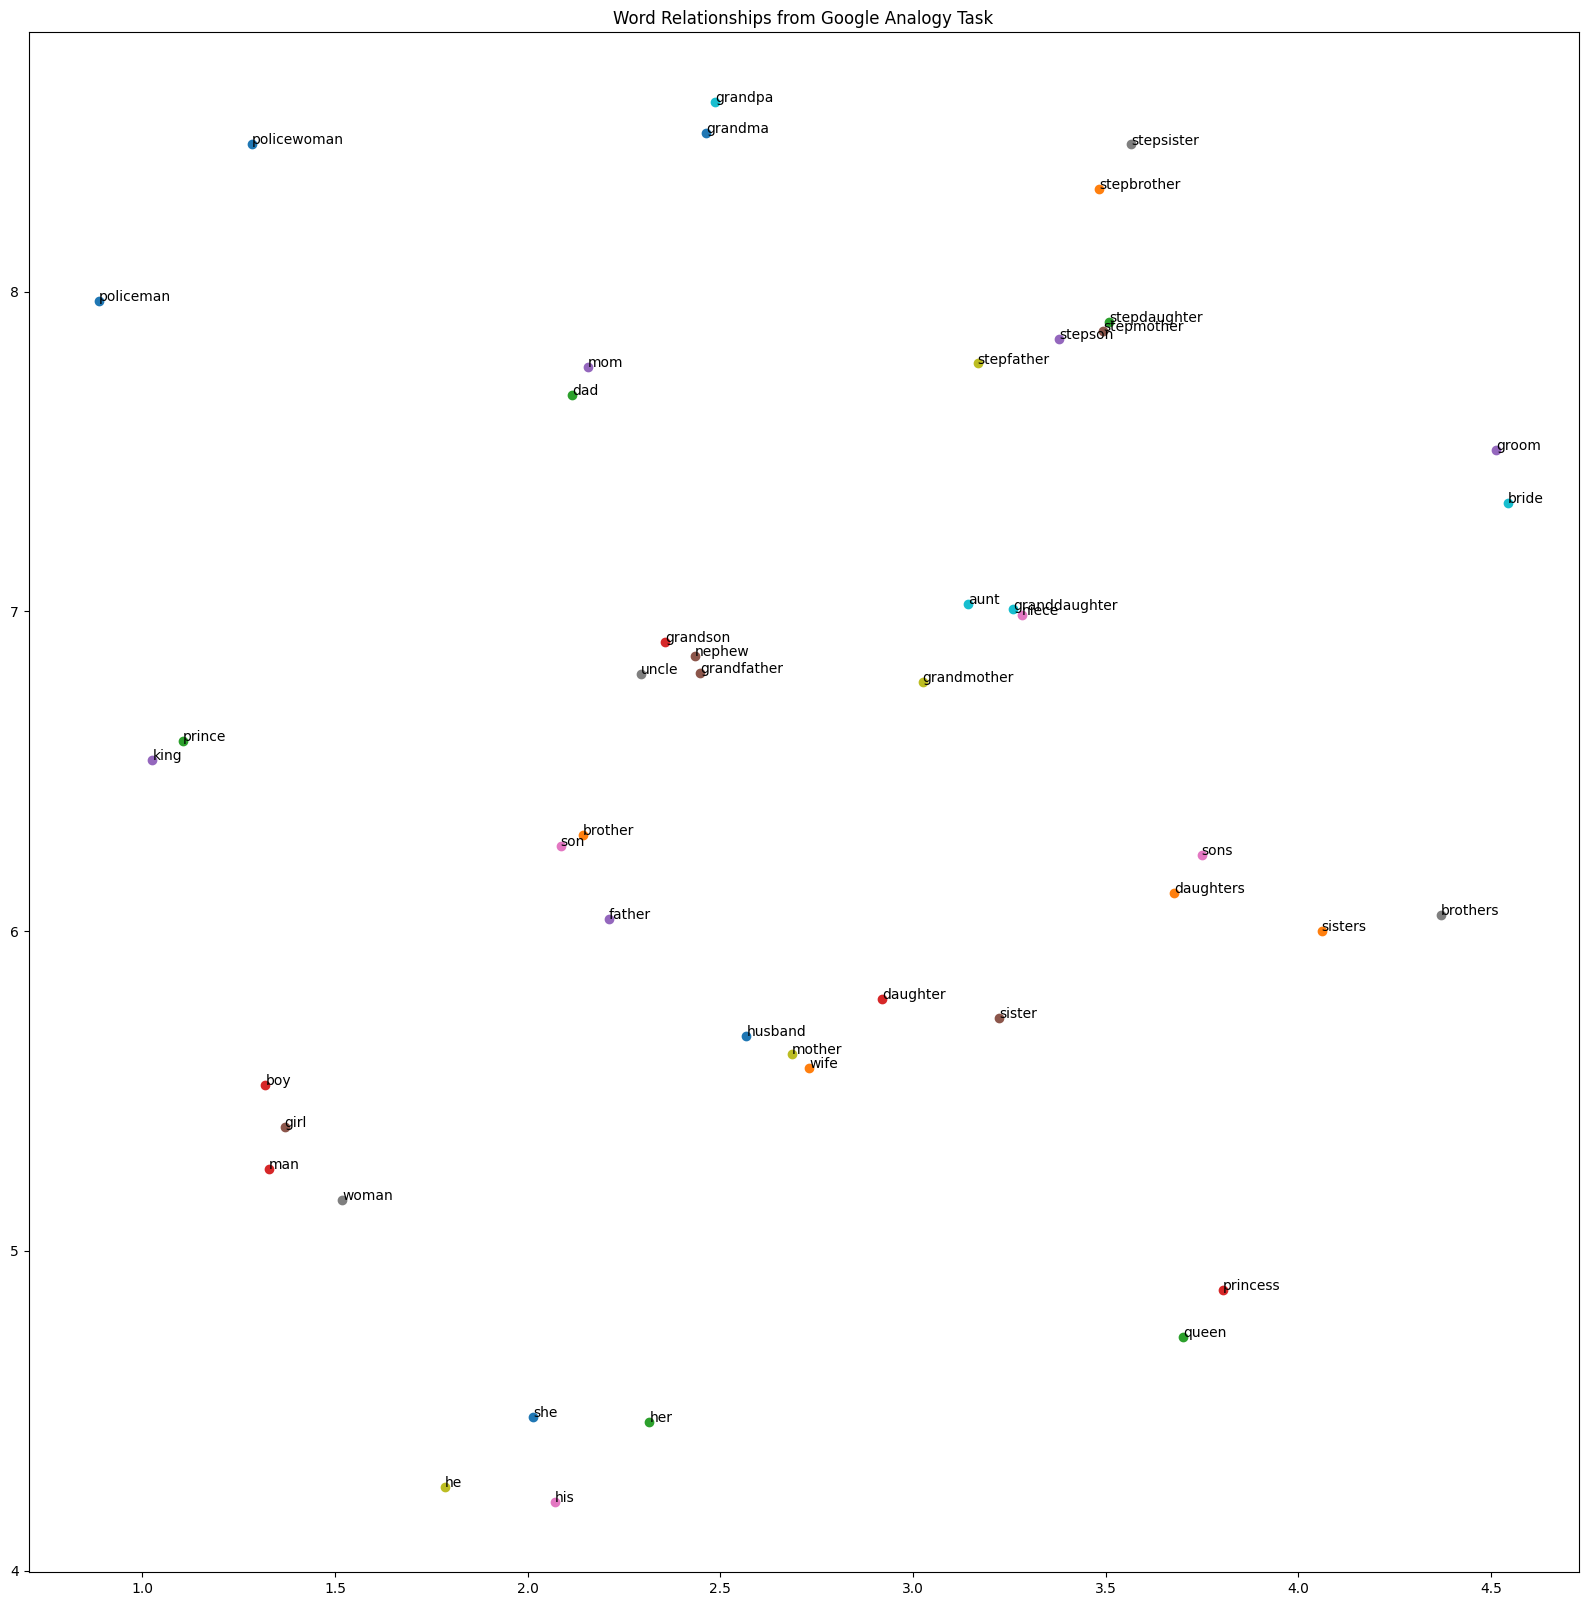

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"
elements = set()
cnt = 0
with open('questions-words.txt') as file:
  for line in file:
    if line.startswith(":"):
      cnt += 1
      if cnt > 5:
        break
    elif cnt == 5:
       wa,wb,wc,wd = line.split(" ")
       elements.update([wa,wb,wc,wd])


# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`

word_vector = []
w_in_model = []

for i in elements:
  if i in model:
    word_vector.append(model[i])
    #print(model[i],"\n")
    w_in_model.append(i)

word_vector = np.array(word_vector)

tsne_model = TSNE(n_components=2, random_state=42)
reduced_vector = tsne_model.fit_transform(word_vector)

plt.figure(figsize=(20,20))
for i, word in enumerate(w_in_model):
    #print(i," ",word,"\n")
    plt.scatter(reduced_vector[i,0],reduced_vector[i,1])
    plt.annotate(word,(reduced_vector[i,0],reduced_vector[i,1]))

#Get hlep by AI

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O  /content/drive/MyDrive/wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O  /content/drive/MyDrive/wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O  /content/drive/MyDrive/wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O  /content/drive/MyDrive/wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O  /content/drive/MyDrive/wiki_texts_part_4.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd
From (redirected): https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd&confirm=t&uuid=2a68d046-c549-4034-ba06-38dfa67c6062
To: /content/drive/My Drive/wiki_texts_part_0.txt.gz
100% 1.51G/1.51G [00:18<00:00, 80.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ABblLRd9HXdXvaNv8H9fFq984bhnowoG
From (redirected): https://drive.google.com/uc?id=1ABblLRd9HXdXvaNv8H9fFq984bhnowoG&confirm=t&uuid=004a7b6e-314e-494c-b72a-5ab0b7b18dd

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O /content/drive/MyDrive/wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O /content/drive/MyDrive/wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O /content/drive/MyDrive/wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O /content/drive/MyDrive/wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O /content/drive/MyDrive/wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O /content/drive/MyDrive/wiki_texts_part_10.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI
From (redirected): https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI&confirm=t&uuid=68f82230-a6df-403e-9c21-464e95e16130
To: /content/drive/My Drive/wiki_texts_part_5.txt.gz
100% 578M/578M [00:06<00:00, 87.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19IvB2vOJRGlrYulnTXlZECR8zT5v550P
From (redirected): https://drive.google.com/uc?id=19IvB2vOJRGlrYulnTXlZECR8zT5v550P&confirm=t&uuid=d3d299a8-8700-4a7c-8a23-f5f26d080192


In [ ]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k /content/drive/MyDrive/wiki_texts_part_*.gz

In [ ]:
# Combine the extracted wiki_texts_parts files.
!cat /content/drive/MyDrive/wiki_texts_part_*.txt > /content/drive/MyDrive/wiki_texts_combined.txt

In [ ]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

anarchism is political philosophy and movement that is against all forms of authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy typically including the state and capitalism anarchism advocates for the replacement of the state with stateless societies and voluntary free associations as historically left wing movement this reading of anarchism is placed on the farthest left of the political spectrum usually described as the libertarian wing of the socialist movement libertarian socialism although traces of anarchist ideas are found all throughout history modern anarchism emerged from the enlightenment during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of thought formed during this period anarchists have taken part in several revolutions most notably in the paris commune

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [ ]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random
import multiprocessing


#wiki_txt_path = "wiki_texts_combined.txt"

wiki0 = "/content/drive/MyDrive/wiki_texts_part_0.txt"
wiki1 = "/content/drive/MyDrive/wiki_texts_part_1.txt"
wiki2 = "/content/drive/MyDrive/wiki_texts_part_2.txt"
wiki3 = "/content/drive/MyDrive/wiki_texts_part_3.txt"
wiki4 = "/content/drive/MyDrive/wiki_texts_part_4.txt"
wiki5 = "/content/drive/MyDrive/wiki_texts_part_5.txt"
wiki6 = "/content/drive/MyDrive/wiki_texts_part_6.txt"
wiki7 = "/content/drive/MyDrive/wiki_texts_part_7.txt"
wiki8 = "/content/drive/MyDrive/wiki_texts_part_8.txt"
wiki9 = "/content/drive/MyDrive/wiki_texts_part_9.txt"
wiki10 = "/content/drive/MyDrive/wiki_texts_part_10.txt"


# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

"""with open(wiki_txt_path, "r", encoding="utf-8") as f:
      total = sum(1 for line in f)
      sample_num = int(total*0.2)

with open(wiki_txt_path, "r", encoding="utf-8") as f:
  with open("sample_text.txt", "w", encoding="utf-8") as output_file:

    sample_idx = random.sample(range(total),sample_num)

    for i, line in enumerate(f):
      if i in sample_idx:
        output_file.write(line)"""




with open(wiki0, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "w", encoding="utf-8") as output_file:
    # TODO4: Sample `20%` Wikipedia articles
    # Write your code here
      sample = []
      total = 0
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("0")

with open(wiki1, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("1")

with open(wiki2, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("2")
with open(wiki3, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("3")

with open(wiki4, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("4")

with open(wiki5, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("5")

with open(wiki6, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("6")

with open(wiki7, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("7")

with open(wiki8, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("8")

with open(wiki9, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("9")

with open(wiki10, "r", encoding="utf-8") as f:
    with open("sample_text.txt", "a", encoding="utf-8") as output_file:
      sample = []
      total = 0;
      line = f.readlines()
      sample.extend(random.sample(line,int(len(line)*0.2)))
      output_file.writelines(sample)
      print("10")




0
1
2
3
4
6
7
8
9
10


In [ ]:
!cp /content/sample_text.txt /content/drive/MyDrive/sample_text.txt

In [ ]:
!pip install gensim
import gensim
from gensim.models import Word2Vec
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import multiprocessing


def preprocessing(text):
  text = text.lower()
  text = re.sub(r"[^a-z\s]"," ", text)
  re_text = word_tokenize(text)
  return re_text

input_file = "/content/drive/MyDrive/sample_text.txt"
batch_sentences = []


with open(input_file, "r", encoding="utf-8") as f:
    for i, line in enumerate(f,1):
      sentences = [preprocessing(sentence) for sentence in line.split(".")]

      if i == 1:
        my_model = Word2Vec(sentences, vector_size=100, min_count=1, workers=4)
        my_model.save('/content/drive/MyDrive/lab1_model-100D.model')
        continue

      batch_sentences.extend(sentences)

      if i%10000 == 0:
        my_model.build_vocab(batch_sentences, update=True)
        my_model.train(batch_sentences, total_examples=len(batch_sentences), epochs=1)
        batch_sentences = []
        print(f"Processed line {i}")
        my_model.save('/content/drive/MyDrive/lab1_model-100D.model')

      elif i%1000 == 0:
        print(i)

    if len(batch_sentences) > 0:  # Done by AI
      my_model.build_vocab(batch_sentences, update=True)
      my_model.train(batch_sentences, total_examples=len(batch_sentences), epochs=1)
      my_model.save('/content/drive/MyDrive/lab1_model-100D.model')

In [ ]:
data = pd.read_csv("questions-words.csv")

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from logging import exception
from os import WCOREDUMP
from ssl import ALERT_DESCRIPTION_RECORD_OVERFLOW

# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

my_model = Word2Vec.load("/content/drive/MyDrive/lab1_test3.model")

for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      wa,wb,wc,wd = analogy.split(" ")
      print(wa,wb,wc,wd)
      golds.append(wd)
      try:
        exp_ans = my_model.wv.most_similar(positive=[wb,wc],negative=[wa],topn=1)[0][0]
        print(f"Prediction: {exp_ans}")
        preds.append(exp_ans)
      except Exception as err:
        preds.append(" ")
        print(f"{err}")


      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """

  0%|          | 0/19544 [00:00<?, ?it/s]

Athens Greece Baghdad Iraq


  0%|          | 61/19544 [00:00<02:17, 141.66it/s]

"Key 'Greece' not present in vocabulary"
Athens Greece Bangkok Thailand
"Key 'Greece' not present in vocabulary"
Athens Greece Beijing China
"Key 'Greece' not present in vocabulary"
Athens Greece Berlin Germany
"Key 'Greece' not present in vocabulary"
Athens Greece Bern Switzerland
"Key 'Greece' not present in vocabulary"
Athens Greece Cairo Egypt
"Key 'Greece' not present in vocabulary"
Athens Greece Canberra Australia
"Key 'Greece' not present in vocabulary"
Athens Greece Hanoi Vietnam
"Key 'Greece' not present in vocabulary"
Athens Greece Havana Cuba
"Key 'Greece' not present in vocabulary"
Athens Greece Helsinki Finland
"Key 'Greece' not present in vocabulary"
Athens Greece Islamabad Pakistan
"Key 'Greece' not present in vocabulary"
Athens Greece Kabul Afghanistan
"Key 'Greece' not present in vocabulary"
Athens Greece London England
"Key 'Greece' not present in vocabulary"
Athens Greece Madrid Spain
"Key 'Greece' not present in vocabulary"
Athens Greece Moscow Russia
"Key 'Greece' 

  1%|          | 169/19544 [00:00<00:55, 348.11it/s]


Berlin Germany Oslo Norway
"Key 'Germany' not present in vocabulary"
Berlin Germany Ottawa Canada
"Key 'Germany' not present in vocabulary"
Berlin Germany Paris France
"Key 'Germany' not present in vocabulary"
Berlin Germany Rome Italy
"Key 'Germany' not present in vocabulary"
Berlin Germany Stockholm Sweden
"Key 'Germany' not present in vocabulary"
Berlin Germany Tehran Iran
"Key 'Germany' not present in vocabulary"
Berlin Germany Tokyo Japan
"Key 'Germany' not present in vocabulary"
Berlin Germany Athens Greece
"Key 'Germany' not present in vocabulary"
Berlin Germany Baghdad Iraq
"Key 'Germany' not present in vocabulary"
Berlin Germany Bangkok Thailand
"Key 'Germany' not present in vocabulary"
Berlin Germany Beijing China
"Key 'Germany' not present in vocabulary"
Bern Switzerland Cairo Egypt
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Canberra Australia
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Hanoi Vietnam
"Key 'Switzerland' not present in v

  1%|▏         | 270/19544 [00:00<00:53, 363.25it/s]


Havana Cuba Moscow Russia
"Key 'Cuba' not present in vocabulary"
Havana Cuba Oslo Norway
"Key 'Cuba' not present in vocabulary"
Havana Cuba Ottawa Canada
"Key 'Cuba' not present in vocabulary"
Havana Cuba Paris France
"Key 'Cuba' not present in vocabulary"
Havana Cuba Rome Italy
"Key 'Cuba' not present in vocabulary"
Havana Cuba Stockholm Sweden
"Key 'Cuba' not present in vocabulary"
Havana Cuba Tehran Iran
"Key 'Cuba' not present in vocabulary"
Havana Cuba Tokyo Japan
"Key 'Cuba' not present in vocabulary"
Havana Cuba Athens Greece
"Key 'Cuba' not present in vocabulary"
Havana Cuba Baghdad Iraq
"Key 'Cuba' not present in vocabulary"
Havana Cuba Bangkok Thailand
"Key 'Cuba' not present in vocabulary"
Havana Cuba Beijing China
"Key 'Cuba' not present in vocabulary"
Havana Cuba Berlin Germany
"Key 'Cuba' not present in vocabulary"
Havana Cuba Bern Switzerland
"Key 'Cuba' not present in vocabulary"
Havana Cuba Cairo Egypt
"Key 'Cuba' not present in vocabulary"
Havana Cuba Canberra Austra

  3%|▎         | 576/19544 [00:01<00:22, 827.44it/s]

"Key 'Spain' not present in vocabulary"
Madrid Spain Athens Greece
"Key 'Spain' not present in vocabulary"
Madrid Spain Baghdad Iraq
"Key 'Spain' not present in vocabulary"
Madrid Spain Bangkok Thailand
"Key 'Spain' not present in vocabulary"
Madrid Spain Beijing China
"Key 'Spain' not present in vocabulary"
Madrid Spain Berlin Germany
"Key 'Spain' not present in vocabulary"
Madrid Spain Bern Switzerland
"Key 'Spain' not present in vocabulary"
Madrid Spain Cairo Egypt
"Key 'Spain' not present in vocabulary"
Madrid Spain Canberra Australia
"Key 'Spain' not present in vocabulary"
Madrid Spain Hanoi Vietnam
"Key 'Spain' not present in vocabulary"
Madrid Spain Havana Cuba
"Key 'Spain' not present in vocabulary"
Madrid Spain Helsinki Finland
"Key 'Spain' not present in vocabulary"
Madrid Spain Islamabad Pakistan
"Key 'Spain' not present in vocabulary"
Madrid Spain Kabul Afghanistan
"Key 'Spain' not present in vocabulary"
Madrid Spain London England
"Key 'Spain' not present in vocabulary"
Mo

  4%|▎         | 706/19544 [00:01<00:22, 823.26it/s]

Accra Ghana Copenhagen Denmark
"Key 'Ghana' not present in vocabulary"
Accra Ghana Dakar Senegal
"Key 'Ghana' not present in vocabulary"
Accra Ghana Damascus Syria
"Key 'Ghana' not present in vocabulary"
Accra Ghana Dhaka Bangladesh
"Key 'Ghana' not present in vocabulary"
Accra Ghana Doha Qatar
"Key 'Ghana' not present in vocabulary"
Accra Ghana Dublin Ireland
"Key 'Ghana' not present in vocabulary"
Accra Ghana Dushanbe Tajikistan
"Key 'Ghana' not present in vocabulary"
Accra Ghana Funafuti Tuvalu
"Key 'Ghana' not present in vocabulary"
Algiers Algeria Amman Jordan
"Key 'Algeria' not present in vocabulary"
Algiers Algeria Ankara Turkey
"Key 'Algeria' not present in vocabulary"
Algiers Algeria Antananarivo Madagascar
"Key 'Algeria' not present in vocabulary"
Algiers Algeria Apia Samoa
"Key 'Algeria' not present in vocabulary"
Algiers Algeria Ashgabat Turkmenistan
"Key 'Algeria' not present in vocabulary"
Algiers Algeria Asmara Eritrea
"Key 'Algeria' not present in vocabulary"
Algiers Al

  4%|▍         | 820/19544 [00:01<00:21, 851.16it/s]

Apia Samoa Copenhagen Denmark
"Key 'Samoa' not present in vocabulary"
Apia Samoa Dakar Senegal
"Key 'Samoa' not present in vocabulary"
Apia Samoa Damascus Syria
"Key 'Samoa' not present in vocabulary"
Apia Samoa Dhaka Bangladesh
"Key 'Samoa' not present in vocabulary"
Apia Samoa Doha Qatar
"Key 'Samoa' not present in vocabulary"
Apia Samoa Dublin Ireland
"Key 'Samoa' not present in vocabulary"
Apia Samoa Dushanbe Tajikistan
"Key 'Samoa' not present in vocabulary"
Apia Samoa Funafuti Tuvalu
"Key 'Samoa' not present in vocabulary"
Apia Samoa Gaborone Botswana
"Key 'Samoa' not present in vocabulary"
Apia Samoa Georgetown Guyana
"Key 'Samoa' not present in vocabulary"
Apia Samoa Hanoi Vietnam
"Key 'Samoa' not present in vocabulary"
Apia Samoa Harare Zimbabwe
"Key 'Samoa' not present in vocabulary"
Apia Samoa Havana Cuba
"Key 'Samoa' not present in vocabulary"
Ashgabat Turkmenistan Asmara Eritrea
"Key 'Turkmenistan' not present in vocabulary"
Ashgabat Turkmenistan Astana Kazakhstan
"Key 'Tu

  5%|▍         | 911/19544 [00:01<00:29, 638.71it/s]

Kazakhstan Budapest Hungary
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Bujumbura Burundi
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Cairo Egypt
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Canberra Australia
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Caracas Venezuela
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Chisinau Moldova
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Conakry Guinea
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Copenhagen Denmark
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Dakar Senegal
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Damascus Syria
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Dhaka Bangladesh
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Doha Qatar
"Key 'Kazakhstan' not present in vocabulary"
Astana Kazakhstan Dublin Ireland
"Key 'Kazakhstan' not pres

  5%|▌         | 986/19544 [00:01<00:28, 642.39it/s]

 Beijing China
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Beirut Lebanon
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Belgrade Serbia
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Belmopan Belize
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Berlin Germany
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bern Switzerland
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bishkek Kyrgyzstan
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bratislava Slovakia
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Brussels Belgium
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bucharest Romania
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Budapest Hungary
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Bujumbura Burundi
"Key 'Azerbaijan' not present in vocabulary"
Baku Azerbaijan Cairo Egypt
"Key 'Azerbaijan' not present in vocabulary"
Baku Aze

  6%|▌         | 1119/19544 [00:02<00:34, 530.10it/s]


Bamako Mali Kathmandu Nepal
"Key 'Mali' not present in vocabulary"
Bamako Mali Khartoum Sudan
"Key 'Mali' not present in vocabulary"
Bangkok Thailand Banjul Gambia
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Beijing China
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Beirut Lebanon
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Belgrade Serbia
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Belmopan Belize
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Berlin Germany
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Bern Switzerland
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Bishkek Kyrgyzstan
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Bratislava Slovakia
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Brussels Belgium
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Bucharest Romania
"Key 'Thailand' not present in vocabulary"
Bangkok Thailand Budapest

  6%|▋         | 1239/19544 [00:02<00:30, 594.82it/s]

Romania
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Budapest Hungary
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Bujumbura Burundi
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Cairo Egypt
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Canberra Australia
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Caracas Venezuela
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Chisinau Moldova
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Conakry Guinea
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Copenhagen Denmark
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Dakar Senegal
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Damascus Syria
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Dhaka Bangladesh
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Doha Qatar
"Key 'Lebanon' not present in vocabulary"
Beirut Lebanon Dublin Ireland
"Key 'Lebanon' not present in vocabulary"
Be

  7%|▋         | 1302/19544 [00:02<00:48, 372.55it/s]


Berlin Germany Chisinau Moldova
"Key 'Germany' not present in vocabulary"
Berlin Germany Conakry Guinea
"Key 'Germany' not present in vocabulary"
Berlin Germany Copenhagen Denmark
"Key 'Germany' not present in vocabulary"
Berlin Germany Dakar Senegal
"Key 'Germany' not present in vocabulary"
Berlin Germany Damascus Syria
"Key 'Germany' not present in vocabulary"
Berlin Germany Dhaka Bangladesh
"Key 'Germany' not present in vocabulary"
Berlin Germany Doha Qatar
"Key 'Germany' not present in vocabulary"
Berlin Germany Dublin Ireland
"Key 'Germany' not present in vocabulary"
Berlin Germany Dushanbe Tajikistan
"Key 'Germany' not present in vocabulary"
Berlin Germany Funafuti Tuvalu
"Key 'Germany' not present in vocabulary"
Berlin Germany Gaborone Botswana
"Key 'Germany' not present in vocabulary"
Berlin Germany Georgetown Guyana
"Key 'Germany' not present in vocabulary"
Berlin Germany Hanoi Vietnam
"Key 'Germany' not present in vocabulary"
Berlin Germany Harare Zimbabwe
"Key 'Germany' not

  7%|▋         | 1392/19544 [00:03<00:57, 316.77it/s]


"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Damascus Syria
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Dhaka Bangladesh
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Doha Qatar
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Dublin Ireland
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Dushanbe Tajikistan
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Funafuti Tuvalu
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Gaborone Botswana
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Georgetown Guyana
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Hanoi Vietnam
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Harare Zimbabwe
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Havana Cuba
"Key 'Switzerland' not present in vocabulary"
Bern Switzerland Helsinki Finland
"Key 'Switzerland' not present in vocabulary"
Bern Swi

  8%|▊         | 1576/19544 [00:03<00:33, 535.66it/s]

 Tuvalu
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Gaborone Botswana
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Georgetown Guyana
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Hanoi Vietnam
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Harare Zimbabwe
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Havana Cuba
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Helsinki Finland
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Islamabad Pakistan
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Jakarta Indonesia
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Kabul Afghanistan
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Kampala Uganda
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Kathmandu Nepal
"Key 'Slovakia' not present in vocabulary"
Bratislava Slovakia Khartoum Sudan
"Key 'Slovakia' not present in vocabular

  9%|▊         | 1670/19544 [00:03<00:29, 601.72it/s]

"Key 'Egypt' not present in vocabulary"
Cairo Egypt Kiev Ukraine
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Kigali Rwanda
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Kingston Jamaica
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Libreville Gabon
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Lilongwe Malawi
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Lima Peru
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Lisbon Portugal
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Ljubljana Slovenia
"Key 'Egypt' not present in vocabulary"
Cairo Egypt London England
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Luanda Angola
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Lusaka Zambia
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Madrid Spain
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Managua Nicaragua
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Manama Bahrain
"Key 'Egypt' not present in vocabulary"
Cairo Egypt Manila Ph

  9%|▉         | 1741/19544 [00:03<00:30, 576.61it/s]

Moldova Islamabad Pakistan
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Jakarta Indonesia
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kabul Afghanistan
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kampala Uganda
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kathmandu Nepal
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Khartoum Sudan
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kiev Ukraine
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kigali Rwanda
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Kingston Jamaica
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Libreville Gabon
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Lilongwe Malawi
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Lima Peru
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Lisbon Portugal
"Key 'Moldova' not present in vocabulary"
Chisinau Moldova Ljubljana Slovenia
"K

  9%|▉         | 1806/19544 [00:03<00:45, 388.71it/s]

 Gabon
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Lilongwe Malawi
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Lima Peru
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Lisbon Portugal
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Ljubljana Slovenia
"Key 'Guinea' not present in vocabulary"
Conakry Guinea London England
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Luanda Angola
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Lusaka Zambia
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Madrid Spain
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Managua Nicaragua
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Manama Bahrain
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Manila Philippines
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Maputo Mozambique
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Minsk Belarus
"Key 'Guinea' not present in vocabulary"
Conakry Guinea Mogadish

 10%|▉         | 1886/19544 [00:04<00:38, 462.39it/s]


Dakar Senegal Kigali Rwanda
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Kingston Jamaica
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Libreville Gabon
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lilongwe Malawi
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lima Peru
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lisbon Portugal
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Ljubljana Slovenia
"Key 'Senegal' not present in vocabulary"
Dakar Senegal London England
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Luanda Angola
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Lusaka Zambia
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Madrid Spain
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Managua Nicaragua
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Manama Bahrain
"Key 'Senegal' not present in vocabulary"
Dakar Senegal Manila Philippines
"Key 'Senegal' not present in vocabulary

 10%|█         | 2019/19544 [00:04<00:37, 465.29it/s]

Tajikistan
"Key 'Qatar' not present in vocabulary"
Doha Qatar Funafuti Tuvalu
"Key 'Qatar' not present in vocabulary"
Doha Qatar Gaborone Botswana
"Key 'Qatar' not present in vocabulary"
Doha Qatar Georgetown Guyana
"Key 'Qatar' not present in vocabulary"
Doha Qatar Hanoi Vietnam
"Key 'Qatar' not present in vocabulary"
Doha Qatar Harare Zimbabwe
"Key 'Qatar' not present in vocabulary"
Doha Qatar Havana Cuba
"Key 'Qatar' not present in vocabulary"
Doha Qatar Helsinki Finland
"Key 'Qatar' not present in vocabulary"
Doha Qatar Islamabad Pakistan
"Key 'Qatar' not present in vocabulary"
Doha Qatar Jakarta Indonesia
"Key 'Qatar' not present in vocabulary"
Doha Qatar Kabul Afghanistan
"Key 'Qatar' not present in vocabulary"
Doha Qatar Kampala Uganda
"Key 'Qatar' not present in vocabulary"
Doha Qatar Kathmandu Nepal
"Key 'Qatar' not present in vocabulary"
Doha Qatar Khartoum Sudan
"Key 'Qatar' not present in vocabulary"
Doha Qatar Kiev Ukraine
"Key 'Qatar' not present in vocabulary"
Doha Qatar

 11%|█         | 2180/19544 [00:04<00:24, 713.43it/s]

Luanda Angola
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Lusaka Zambia
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Madrid Spain
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Managua Nicaragua
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Manama Bahrain
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Manila Philippines
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Maputo Mozambique
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Minsk Belarus
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Mogadishu Somalia
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Monrovia Liberia
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Montevideo Uruguay
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Moscow Russia
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Muscat Oman
"Key 'Guyana' not present in vocabulary"
Georgetown Guyana Nairobi Kenya
"Key 'Guyana' 

 12%|█▏        | 2387/19544 [00:04<00:20, 831.29it/s]

Lilongwe Malawi
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Lima Peru
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Lisbon Portugal
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Ljubljana Slovenia
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia London England
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Luanda Angola
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Lusaka Zambia
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Madrid Spain
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Managua Nicaragua
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Manama Bahrain
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Manila Philippines
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Maputo Mozambique
"Key 'Indonesia' not present in vocabulary"
Jakarta Indonesia Minsk Belarus
"Key 'Indonesia' not present in vocabulary"
Jakarta Ind

 13%|█▎        | 2479/19544 [00:05<00:33, 505.42it/s]

Uganda Moscow Russia
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Muscat Oman
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Nairobi Kenya
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Nassau Bahamas
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Niamey Niger
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Nicosia Cyprus
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Nouakchott Mauritania
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Nuuk Greenland
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Oslo Norway
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Ottawa Canada
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Paramaribo Suriname
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Paris France
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Podgorica Montenegro
"Key 'Uganda' not present in vocabulary"
Kampala Uganda Quito Ecuador
"Key 'Uganda' not present in vocabulary"
Kampala Ug

 14%|█▍        | 2737/19544 [00:05<00:25, 652.91it/s]

"Key 'Nepal' not present in vocabulary"
Kathmandu Nepal Riga Latvia
"Key 'Nepal' not present in vocabulary"
Kathmandu Nepal Rome Italy
"Key 'Nepal' not present in vocabulary"
Kathmandu Nepal Roseau Dominica
"Key 'Nepal' not present in vocabulary"
Khartoum Sudan Kiev Ukraine
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Kigali Rwanda
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Kingston Jamaica
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Libreville Gabon
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Lilongwe Malawi
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Lima Peru
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Lisbon Portugal
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Ljubljana Slovenia
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan London England
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Luanda Angola
"Key 'Sudan' not present in vocabulary"
Khartoum Sudan Lusaka Zambia
"Key 'Sudan' not presen

 15%|█▌        | 2965/19544 [00:05<00:22, 744.05it/s]

 Bahamas
"Key 'Peru' not present in vocabulary"
Lima Peru Niamey Niger
"Key 'Peru' not present in vocabulary"
Lima Peru Nicosia Cyprus
"Key 'Peru' not present in vocabulary"
Lima Peru Nouakchott Mauritania
"Key 'Peru' not present in vocabulary"
Lima Peru Nuuk Greenland
"Key 'Peru' not present in vocabulary"
Lima Peru Oslo Norway
"Key 'Peru' not present in vocabulary"
Lima Peru Ottawa Canada
"Key 'Peru' not present in vocabulary"
Lima Peru Paramaribo Suriname
"Key 'Peru' not present in vocabulary"
Lima Peru Paris France
"Key 'Peru' not present in vocabulary"
Lima Peru Podgorica Montenegro
"Key 'Peru' not present in vocabulary"
Lima Peru Quito Ecuador
"Key 'Peru' not present in vocabulary"
Lima Peru Rabat Morocco
"Key 'Peru' not present in vocabulary"
Lima Peru Riga Latvia
"Key 'Peru' not present in vocabulary"
Lima Peru Rome Italy
"Key 'Peru' not present in vocabulary"
Lima Peru Roseau Dominica
"Key 'Peru' not present in vocabulary"
Lima Peru Santiago Chile
"Key 'Peru' not present in vo

 16%|█▌        | 3058/19544 [00:05<00:23, 696.51it/s]


Madrid Spain Paris France
"Key 'Spain' not present in vocabulary"
Madrid Spain Podgorica Montenegro
"Key 'Spain' not present in vocabulary"
Madrid Spain Quito Ecuador
"Key 'Spain' not present in vocabulary"
Madrid Spain Rabat Morocco
"Key 'Spain' not present in vocabulary"
Madrid Spain Riga Latvia
"Key 'Spain' not present in vocabulary"
Madrid Spain Rome Italy
"Key 'Spain' not present in vocabulary"
Madrid Spain Roseau Dominica
"Key 'Spain' not present in vocabulary"
Madrid Spain Santiago Chile
"Key 'Spain' not present in vocabulary"
Madrid Spain Skopje Macedonia
"Key 'Spain' not present in vocabulary"
Madrid Spain Sofia Bulgaria
"Key 'Spain' not present in vocabulary"
Madrid Spain Stockholm Sweden
"Key 'Spain' not present in vocabulary"
Madrid Spain Suva Fiji
"Key 'Spain' not present in vocabulary"
Madrid Spain Taipei Taiwan
"Key 'Spain' not present in vocabulary"
Madrid Spain Tallinn Estonia
"Key 'Spain' not present in vocabulary"
Madrid Spain Tashkent Uzbekistan
"Key 'Spain' not pr

 16%|█▌        | 3141/19544 [00:06<00:26, 608.64it/s]

 Paramaribo Suriname
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Paris France
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Podgorica Montenegro
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Quito Ecuador
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Rabat Morocco
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Riga Latvia
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Rome Italy
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Roseau Dominica
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Santiago Chile
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Skopje Macedonia
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Sofia Bulgaria
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Stockholm Sweden
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Suva Fiji
"Key 'Bahrain' not present in vocabulary"
Manama Bahrain Taipei Taiwan
"Key 'Bahrain' not present in vocabulary"
Manama 

 17%|█▋        | 3273/19544 [00:06<00:23, 702.64it/s]

Dominica
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Santiago Chile
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Skopje Macedonia
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Sofia Bulgaria
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Stockholm Sweden
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Suva Fiji
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Taipei Taiwan
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tallinn Estonia
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tashkent Uzbekistan
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tbilisi Georgia
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tegucigalpa Honduras
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tehran Iran
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Thimphu Bhutan
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Tirana Albania
"Key 'Belarus' not present in vocabulary"
Minsk Belarus Toky

 18%|█▊        | 3422/19544 [00:06<00:26, 611.99it/s]

Montevideo Uruguay Tunis Tunisia
"Key 'Uruguay' not present in vocabulary"
Montevideo Uruguay Vaduz Liechtenstein
"Key 'Uruguay' not present in vocabulary"
Montevideo Uruguay Valletta Malta
"Key 'Uruguay' not present in vocabulary"
Montevideo Uruguay Vienna Austria
"Key 'Uruguay' not present in vocabulary"
Montevideo Uruguay Vientiane Laos
"Key 'Uruguay' not present in vocabulary"
Montevideo Uruguay Vilnius Lithuania
"Key 'Uruguay' not present in vocabulary"
Moscow Russia Muscat Oman
"Key 'Russia' not present in vocabulary"
Moscow Russia Nairobi Kenya
"Key 'Russia' not present in vocabulary"
Moscow Russia Nassau Bahamas
"Key 'Russia' not present in vocabulary"
Moscow Russia Niamey Niger
"Key 'Russia' not present in vocabulary"
Moscow Russia Nicosia Cyprus
"Key 'Russia' not present in vocabulary"
Moscow Russia Nouakchott Mauritania
"Key 'Russia' not present in vocabulary"
Moscow Russia Nuuk Greenland
"Key 'Russia' not present in vocabulary"
Moscow Russia Oslo Norway
"Key 'Russia' not pr

 18%|█▊        | 3516/19544 [00:06<00:23, 672.34it/s]

Nairobi Kenya Ottawa Canada
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Paramaribo Suriname
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Paris France
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Podgorica Montenegro
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Quito Ecuador
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Rabat Morocco
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Riga Latvia
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Rome Italy
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Roseau Dominica
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Santiago Chile
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Skopje Macedonia
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Sofia Bulgaria
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Stockholm Sweden
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Suva Fiji
"Key 'Kenya' not present in vocabulary"
Nairobi Kenya Taipei Taiwan
"Key 'K

 18%|█▊        | 3588/19544 [00:06<00:27, 577.03it/s]


"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Taipei Taiwan
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tallinn Estonia
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tashkent Uzbekistan
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tbilisi Georgia
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tegucigalpa Honduras
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tehran Iran
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Thimphu Bhutan
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tirana Albania
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tokyo Japan
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tripoli Libya
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Tunis Tunisia
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Vaduz Liechtenstein
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Valletta Malta
"Key 'Cyprus' not present in vocabulary"
Nicosia Cyprus Vienna Aust

 19%|█▊        | 3651/19544 [00:06<00:37, 429.10it/s]

 Mauritania Sofia Bulgaria
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Stockholm Sweden
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Suva Fiji
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Taipei Taiwan
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tallinn Estonia
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tashkent Uzbekistan
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tbilisi Georgia
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tegucigalpa Honduras
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tehran Iran
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Thimphu Bhutan
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tirana Albania
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania Tokyo Japan
"Key 'Mauritania' not present in vocabulary"
Nouakchott Mauritania T

 19%|█▉        | 3736/19544 [00:07<00:33, 469.75it/s]


Ottawa Canada Zagreb Croatia
"Key 'Canada' not present in vocabulary"
Ottawa Canada Abuja Nigeria
"Key 'Canada' not present in vocabulary"
Ottawa Canada Accra Ghana
"Key 'Canada' not present in vocabulary"
Ottawa Canada Algiers Algeria
"Key 'Canada' not present in vocabulary"
Ottawa Canada Amman Jordan
"Key 'Canada' not present in vocabulary"
Ottawa Canada Ankara Turkey
"Key 'Canada' not present in vocabulary"
Ottawa Canada Antananarivo Madagascar
"Key 'Canada' not present in vocabulary"
Paramaribo Suriname Paris France
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Podgorica Montenegro
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Quito Ecuador
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Rabat Morocco
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Riga Latvia
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Rome Italy
"Key 'Suriname' not present in vocabulary"
Paramaribo Suriname Roseau Dominica
"Key 'S

 20%|█▉        | 3887/19544 [00:07<00:32, 477.26it/s]

Tbilisi Georgia
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tegucigalpa Honduras
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tehran Iran
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Thimphu Bhutan
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tirana Albania
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tokyo Japan
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tripoli Libya
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Tunis Tunisia
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Vaduz Liechtenstein
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Valletta Malta
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Vienna Austria
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Vientiane Laos
"Key 'Montenegro' not present in vocabulary"
Podgorica Montenegro Vilnius Lithuania
"Key '

 21%|██        | 4071/19544 [00:07<00:27, 569.44it/s]

 Yerevan Armenia
"Key 'Italy' not present in vocabulary"
Rome Italy Zagreb Croatia
"Key 'Italy' not present in vocabulary"
Rome Italy Abuja Nigeria
"Key 'Italy' not present in vocabulary"
Rome Italy Accra Ghana
"Key 'Italy' not present in vocabulary"
Rome Italy Algiers Algeria
"Key 'Italy' not present in vocabulary"
Rome Italy Amman Jordan
"Key 'Italy' not present in vocabulary"
Rome Italy Ankara Turkey
"Key 'Italy' not present in vocabulary"
Rome Italy Antananarivo Madagascar
"Key 'Italy' not present in vocabulary"
Rome Italy Apia Samoa
"Key 'Italy' not present in vocabulary"
Rome Italy Ashgabat Turkmenistan
"Key 'Italy' not present in vocabulary"
Rome Italy Asmara Eritrea
"Key 'Italy' not present in vocabulary"
Rome Italy Astana Kazakhstan
"Key 'Italy' not present in vocabulary"
Rome Italy Athens Greece
"Key 'Italy' not present in vocabulary"
Rome Italy Baghdad Iraq
"Key 'Italy' not present in vocabulary"
Rome Italy Baku Azerbaijan
"Key 'Italy' not present in vocabulary"
Roseau Domin

 22%|██▏       | 4213/19544 [00:07<00:20, 752.47it/s]

 Bulgaria Tokyo Japan
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Tripoli Libya
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Tunis Tunisia
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Vaduz Liechtenstein
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Valletta Malta
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Vienna Austria
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Vientiane Laos
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Vilnius Lithuania
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Warsaw Poland
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Windhoek Namibia
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Yerevan Armenia
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Zagreb Croatia
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Abuja Nigeria
"Key 'Bulgaria' not present in vocabulary"
Sofia Bulgaria Accra Ghana
"Key 'Bulgaria' not prese

 22%|██▏       | 4297/19544 [00:08<00:27, 551.38it/s]

"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vaduz Liechtenstein
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Valletta Malta
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vienna Austria
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vientiane Laos
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Vilnius Lithuania
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Warsaw Poland
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Windhoek Namibia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Yerevan Armenia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Zagreb Croatia
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Abuja Nigeria
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Accra Ghana
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Algiers Algeria
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Amman Jordan
"Key 'Taiwan' not present in vocabulary"
Taipei Taiwan Ankara Turkey
"Key 'Taiwan' no

 22%|██▏       | 4365/19544 [00:08<00:27, 547.67it/s]

Lebanon
"Key 'Estonia' not present in vocabulary"
Tallinn Estonia Belgrade Serbia
"Key 'Estonia' not present in vocabulary"
Tallinn Estonia Belmopan Belize
"Key 'Estonia' not present in vocabulary"
Tallinn Estonia Berlin Germany
"Key 'Estonia' not present in vocabulary"
Tashkent Uzbekistan Tbilisi Georgia
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tegucigalpa Honduras
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tehran Iran
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Thimphu Bhutan
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tirana Albania
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tokyo Japan
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tripoli Libya
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Tunis Tunisia
"Key 'Uzbekistan' not present in vocabulary"
Tashkent Uzbekistan Vaduz Liechtenstein
"Key 'Uzbekistan' not present in vocabulary"
Tashk

 23%|██▎       | 4514/19544 [00:08<00:28, 527.83it/s]

"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Apia Samoa
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Ashgabat Turkmenistan
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Asmara Eritrea
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Astana Kazakhstan
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Athens Greece
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Baghdad Iraq
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Baku Azerbaijan
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Bamako Mali
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Bangkok Thailand
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Banjul Gambia
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Beijing China
"Key 'Honduras' not present in vocabulary"
Tegucigalpa Honduras Beirut Lebanon
"Key 'Honduras' not present in vocabulary"
Teguciga

 25%|██▌       | 4925/19544 [00:09<00:20, 718.06it/s]

Tripoli Libya Baghdad Iraq
"Key 'Libya' not present in vocabulary"
Tripoli Libya Baku Azerbaijan
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bamako Mali
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bangkok Thailand
"Key 'Libya' not present in vocabulary"
Tripoli Libya Banjul Gambia
"Key 'Libya' not present in vocabulary"
Tripoli Libya Beijing China
"Key 'Libya' not present in vocabulary"
Tripoli Libya Beirut Lebanon
"Key 'Libya' not present in vocabulary"
Tripoli Libya Belgrade Serbia
"Key 'Libya' not present in vocabulary"
Tripoli Libya Belmopan Belize
"Key 'Libya' not present in vocabulary"
Tripoli Libya Berlin Germany
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bern Switzerland
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bishkek Kyrgyzstan
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bratislava Slovakia
"Key 'Libya' not present in vocabulary"
Tripoli Libya Brussels Belgium
"Key 'Libya' not present in vocabulary"
Tripoli Libya Bucharest

 30%|███       | 5885/19544 [00:09<00:07, 1793.83it/s]

baht
"Key 'Thailand' not present in vocabulary"
Denmark krone Ukraine hryvnia
"Key 'Ukraine' not present in vocabulary"
Denmark krone USA dollar
"Key 'USA' not present in vocabulary"
Denmark krone Vietnam dong
"Key 'Vietnam' not present in vocabulary"
Denmark krone Algeria dinar
"Key 'Algeria' not present in vocabulary"
Denmark krone Angola kwanza
"Key 'Angola' not present in vocabulary"
Denmark krone Argentina peso
"Key 'Argentina' not present in vocabulary"
Denmark krone Armenia dram
"Key 'Armenia' not present in vocabulary"
Denmark krone Brazil real
"Key 'Brazil' not present in vocabulary"
Denmark krone Bulgaria lev
"Key 'Bulgaria' not present in vocabulary"
Denmark krone Cambodia riel
"Key 'Cambodia' not present in vocabulary"
Denmark krone Canada dollar
"Key 'Canada' not present in vocabulary"
Denmark krone Croatia kuna
"Key 'Croatia' not present in vocabulary"
Europe euro Hungary forint
"Key 'Hungary' not present in vocabulary"
Europe euro India rupee
"Key 'India' not present in 

 32%|███▏      | 6206/19544 [00:09<00:06, 2124.03it/s]

Houston Texas Portland Oregon
"Key 'Texas' not present in vocabulary"
Houston Texas Tucson Arizona
"Key 'Texas' not present in vocabulary"
Houston Texas Fresno California
"Key 'Texas' not present in vocabulary"
Houston Texas Sacramento California
"Key 'Texas' not present in vocabulary"
Houston Texas Mesa Arizona
"Key 'Texas' not present in vocabulary"
Houston Texas Atlanta Georgia
"Key 'Texas' not present in vocabulary"
Houston Texas Omaha Nebraska
"Key 'Texas' not present in vocabulary"
Houston Texas Miami Florida
"Key 'Texas' not present in vocabulary"
Houston Texas Tulsa Oklahoma
"Key 'Texas' not present in vocabulary"
Houston Texas Oakland California
"Key 'Texas' not present in vocabulary"
Houston Texas Cleveland Ohio
"Key 'Texas' not present in vocabulary"
Houston Texas Minneapolis Minnesota
"Key 'Texas' not present in vocabulary"
Houston Texas Wichita Kansas
"Key 'Texas' not present in vocabulary"
Houston Texas Bakersfield California
"Key 'Texas' not present in vocabulary"
Housto

 35%|███▍      | 6746/19544 [00:09<00:07, 1807.44it/s]

"Key 'Colorado' not present in vocabulary"
Denver Colorado Omaha Nebraska
"Key 'Colorado' not present in vocabulary"
Denver Colorado Miami Florida
"Key 'Colorado' not present in vocabulary"
Denver Colorado Tulsa Oklahoma
"Key 'Colorado' not present in vocabulary"
Denver Colorado Oakland California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Cleveland Ohio
"Key 'Colorado' not present in vocabulary"
Denver Colorado Minneapolis Minnesota
"Key 'Colorado' not present in vocabulary"
Denver Colorado Wichita Kansas
"Key 'Colorado' not present in vocabulary"
Denver Colorado Arlington Texas
"Key 'Colorado' not present in vocabulary"
Denver Colorado Bakersfield California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Tampa Florida
"Key 'Colorado' not present in vocabulary"
Denver Colorado Anaheim California
"Key 'Colorado' not present in vocabulary"
Denver Colorado Honolulu Hawaii
"Key 'Colorado' not present in vocabulary"
Denver Colorado Pittsburgh Pennsylvania
"Key '

 36%|███▌      | 6959/19544 [00:10<00:06, 1805.67it/s]

Atlanta Georgia Irvine California
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Spokane Washington
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Modesto California
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Shreveport Louisiana
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Tacoma Washington
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Oxnard California
"Key 'Georgia' not present in vocabulary"
Atlanta Georgia Fontana California
"Key 'Georgia' not present in vocabulary"
Omaha Nebraska Miami Florida
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska Tulsa Oklahoma
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska Oakland California
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska Cleveland Ohio
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska Minneapolis Minnesota
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska Wichita Kansas
"Key 'Nebraska' not present in vocabulary"
Omaha Nebraska

 38%|███▊      | 7357/19544 [00:10<00:07, 1676.75it/s]

 Tacoma Washington
"Key 'Florida' not present in vocabulary"
Tampa Florida Oxnard California
"Key 'Florida' not present in vocabulary"
Tampa Florida Fontana California
"Key 'Florida' not present in vocabulary"
Tampa Florida Akron Ohio
"Key 'Florida' not present in vocabulary"
Tampa Florida Amarillo Texas
"Key 'Florida' not present in vocabulary"
Tampa Florida Glendale California
"Key 'Florida' not present in vocabulary"
Tampa Florida Huntsville Alabama
"Key 'Florida' not present in vocabulary"
Tampa Florida Worcester Massachusetts
"Key 'Florida' not present in vocabulary"
Tampa Florida Chicago Illinois
"Key 'Florida' not present in vocabulary"
Tampa Florida Houston Texas
"Key 'Florida' not present in vocabulary"
Tampa Florida Philadelphia Pennsylvania
"Key 'Florida' not present in vocabulary"
Tampa Florida Phoenix Arizona
"Key 'Florida' not present in vocabulary"
Anaheim California Honolulu Hawaii
"Key 'California' not present in vocabulary"
Anaheim California Pittsburgh Pennsylvania
"

 41%|████      | 7942/19544 [00:10<00:05, 2171.86it/s]

 Texas Chandler Arizona
"Key 'Texas' not present in vocabulary"
Laredo Texas Madison Wisconsin
"Key 'Texas' not present in vocabulary"
Laredo Texas Glendale Arizona
"Key 'Texas' not present in vocabulary"
Laredo Texas Hialeah Florida
"Key 'Texas' not present in vocabulary"
Laredo Texas Reno Nevada
"Key 'Texas' not present in vocabulary"
Laredo Texas Scottsdale Arizona
"Key 'Texas' not present in vocabulary"
Laredo Texas Fremont California
"Key 'Texas' not present in vocabulary"
Laredo Texas Irvine California
"Key 'Texas' not present in vocabulary"
Laredo Texas Spokane Washington
"Key 'Texas' not present in vocabulary"
Laredo Texas Modesto California
"Key 'Texas' not present in vocabulary"
Laredo Texas Shreveport Louisiana
"Key 'Texas' not present in vocabulary"
Laredo Texas Tacoma Washington
"Key 'Texas' not present in vocabulary"
Laredo Texas Oxnard California
"Key 'Texas' not present in vocabulary"
Laredo Texas Fontana California
"Key 'Texas' not present in vocabulary"
Laredo Texas A

 42%|████▏     | 8281/19544 [00:10<00:04, 2488.75it/s]

Miami Florida
"Key 'Ohio' not present in vocabulary"
Akron Ohio Tulsa Oklahoma
"Key 'Ohio' not present in vocabulary"
Akron Ohio Oakland California
"Key 'Ohio' not present in vocabulary"
Akron Ohio Minneapolis Minnesota
"Key 'Ohio' not present in vocabulary"
Akron Ohio Wichita Kansas
"Key 'Ohio' not present in vocabulary"
Akron Ohio Arlington Texas
"Key 'Ohio' not present in vocabulary"
Akron Ohio Bakersfield California
"Key 'Ohio' not present in vocabulary"
Akron Ohio Tampa Florida
"Key 'Ohio' not present in vocabulary"
Akron Ohio Anaheim California
"Key 'Ohio' not present in vocabulary"
Amarillo Texas Glendale California
"Key 'Texas' not present in vocabulary"
Amarillo Texas Tallahassee Florida
"Key 'Texas' not present in vocabulary"
Amarillo Texas Huntsville Alabama
"Key 'Texas' not present in vocabulary"
Amarillo Texas Worcester Massachusetts
"Key 'Texas' not present in vocabulary"
Amarillo Texas Chicago Illinois
"Key 'Texas' not present in vocabulary"
Amarillo Texas Philadelphia P

 44%|████▎     | 8543/19544 [00:26<03:08, 58.52it/s]  

Prediction: her
groom bride husband wife
Prediction: wife
groom bride king queen
Prediction: queen
groom bride man woman


 44%|████▎     | 8545/19544 [00:26<03:10, 57.70it/s]

Prediction: boy
groom bride nephew niece
Prediction: uncle
groom bride policeman policewoman
Prediction: angel
groom bride prince princess
Prediction: queen
groom bride son daughter
Prediction: daughter
groom bride sons daughters
Prediction: sisters
groom bride stepbrother stepsister
Prediction: lover
groom bride stepfather stepmother
Prediction: uncle
groom bride stepson stepdaughter
Prediction: grandfather
groom bride uncle aunt
Prediction: cousin
groom bride boy girl
Prediction: girl
groom bride brother sister
Prediction: son
groom bride brothers sisters
Prediction: sisters
groom bride dad mom
Prediction: uncredited
groom bride father mother
Prediction: mother
groom bride grandfather grandmother
Prediction: uncle
groom bride grandpa grandma
Prediction: narrator
groom bride grandson granddaughter
Prediction: uncle
he she his her
Prediction: her
he she husband wife
Prediction: boyfriend
he she king queen
Prediction: queen
he she man woman
Prediction: girl
he she nephew niece
Predictio

 45%|████▍     | 8729/19544 [00:37<05:18, 34.00it/s]

Prediction: mother
prince princess grandfather grandmother
Prediction: grandmother
prince princess grandpa grandma
Prediction: valerie
prince princess grandson granddaughter
Prediction: granddaughter
prince princess groom bride
Prediction: phoebe
prince 

 45%|████▍     | 8731/19544 [00:37<05:19, 33.83it/s]

princess he she
Prediction: she
prince princess his her
Prediction: her
prince princess husband wife
Prediction: wife
prince princess king queen
Prediction: queen
prince princess man woman
Prediction: girl
prince princess nephew niece
Prediction: grandmother
prince princess policeman policewoman
Prediction: daisy
son daughter sons daughters
Prediction: daughters
son daughter stepbrother stepsister
Prediction: veronika
son daughter stepfather stepmother
Prediction: grandmother
son daughter stepson stepdaughter
Prediction: grandmother
son daughter uncle aunt
Prediction: aunt
son daughter boy girl
Prediction: girl
son daughter brother sister
Prediction: wife
son daughter brothers sisters
Prediction: sisters
son daughter dad mom
Prediction: veronica
son daughter father mother
Prediction: mother
son daughter grandfather grandmother
Prediction: grandmother
son daughter grandpa grandma
Prediction: tracey
son daughter grandson granddaughter
Prediction: granddaughter
son daughter groom bride
Pr

 45%|████▌     | 8860/19544 [00:46<07:25, 23.98it/s]

Prediction: spouse
uncle aunt king queen
Prediction: prince
uncle aunt man woman
Prediction: woman
uncle aunt nephew niece
Prediction: niece
uncle aunt policeman policewoman
Prediction: jakie
uncle aunt prince princess
Prediction: princess
uncle aunt son daughter
Prediction: daughter
uncle aunt sons daughters
Prediction: daughters
uncle aunt stepbrother stepsister
Prediction: lecithin
uncle aunt stepfather stepmother
Prediction: grandmother
uncle aunt stepson stepdaughter
Prediction: terracina
amazing amazingly apparent apparently
Prediction: consequently
amazing amazingly calm calmly
Prediction: smoothly
amazing amazingly cheerful cheerfully
Prediction: bogatynia
amazing amazingly complete completely
Prediction: permanent
amazing amazingly efficient efficiently
Prediction: manpower
amazing amazingly fortunate fortunately
Prediction: oudolf
amazing amazingly free freely
Prediction: non
amazing amazingly furious furiously
Prediction: epf
amazing amazingly happy happily
Prediction: promo

 46%|████▌     | 8951/19544 [00:51<07:47, 22.64it/s]

Prediction: modernization
calm calmly rare rarely
Prediction: extant
calm calmly reluctant reluctantly
Prediction: puyi
calm calmly safe safely
Prediction: permanent
calm calmly serious seriously
Prediction: involvement
calm calmly slow slowly
Prediction: fast
calm calmly sudden suddenly
Prediction: lengthy
calm calmly swift swiftly
Prediction: jackman
calm calmly typical typically
Prediction: examples
calm calmly unfortunate unfortunately
Prediction: npep
calm calmly usual usually
Prediction: swaps
calm calmly amazing amazingly
Prediction: anthology
calm calmly apparent apparently
Prediction: enlargement
cheerful cheerfully complete completely
Prediction: prior
cheerful cheerfully efficient efficiently
Prediction: homesteaders
cheerful cheerfully fortunate fortunately
Prediction: dispatched
cheerful cheerfully free freely
Prediction: aid
cheerful cheerfully furious furiously
Prediction: dispatched
cheerful cheerfully happy happily
Prediction: invited
cheerful cheerfully immediate imme

 46%|████▌     | 9016/19544 [00:54<07:51, 22.35it/s]

Prediction: deeply
complete completely slow slowly
Prediction: naturally
complete completely sudden suddenly
Prediction: badly
complete completely swift swiftly
Prediction: sangin
complete completely typical typically
Prediction: dense
complete completely unfortunate unfortunately
Prediction: willingly
complete completely usual usually
Prediction: perfectly
complete completely amazing amazingly
Prediction: pretty
complete completely apparent apparently
Prediction: apparently
complete completely calm calmly
Prediction: mentally
complete completely cheerful cheerfully
Prediction: dull
efficient efficiently fortunate fortunately
Prediction: sikynaj
efficient efficiently free freely
Prediction: pledge
efficient efficiently furious furiously
Prediction: stabbed
efficient efficiently happy happily
Prediction: merry
efficient efficiently immediate immediately
Prediction: impending
efficient efficiently infrequent infrequently
Prediction: macaque
efficient efficiently lucky luckily
Prediction:

 46%|████▋     | 9062/19544 [00:56<08:01, 21.77it/s]

Prediction: nasty
fortunate fortunately most mostly
Prediction: strongest
fortunate fortunately obvious obviously
Prediction: torsion
fortunate fortunately occasional occasionally
Prediction: rv
fortunate fortunately possible possibly
Prediction: continuous
fortunate fortunately precise precisely
Prediction: activation
fortunate fortunately professional professionally
Prediction: amateur
fortunate fortunately quick quickly
Prediction: pad
fortunate fortunately quiet quietly
Prediction: neat
fortunate fortunately rapid rapidly
Prediction: capability
fortunate fortunately rare rarely
Prediction: consonants
fortunate fortunately reluctant reluctantly
Prediction: lidocaine
fortunate fortunately safe safely
Prediction: adhesion
fortunate fortunately serious seriously
Prediction: catastrophic
fortunate fortunately slow slowly
Prediction: timing
fortunate fortunately sudden suddenly
Prediction: catastrophic
fortunate fortunately swift swiftly
Prediction: xxx
fortunate fortunately typical typi

 47%|████▋     | 9095/19544 [00:59<08:28, 20.56it/s]

Prediction: cognitions
free freely precise precisely
Prediction: accurately
free freely professional professionally
Prediction: haffner
free freely quick quickly
Prediction: belayer
free freely quiet quietly
Prediction: weeping
free freely rapid rapidly
Prediction: impurities
free freely rare rarely
Prediction: dinosaurs
free freely reluctant reluctantly
Prediction: willingly
free freely safe safely
Prediction: carefully
free freely serious seriously
Prediction: headaches
free freely slow slowly
Prediction: nasal
free freely sudden suddenly
Prediction: zeroni
free freely swift swiftly
Prediction: tod
free freely typical typically
Prediction: nasal
free freely unfortunate unfortunately
Prediction: lúcia
free freely usual usually
Prediction: tooth
free freely amazing amazingly
Prediction: buffy
free freely apparent apparently
Prediction: pubarche
free freely calm calmly
Prediction: headaches
free freely cheerful cheerfully
Prediction: tiruviruttam
free freely complete completely
Predicti

 47%|████▋     | 9119/19544 [01:01<09:18, 18.65it/s]

Prediction: urgent
furious furiously infrequent infrequently
Prediction: ewes
furious furiously lucky luckily
Prediction: merry
furious furiously most mostly
Prediction: more
furious furiously obvious obviously
Prediction: accurate
furious furiously occasional occasionally
Prediction: disinterest
furious furiously possible possibly
Prediction: necessary
furious furiously precise precisely
Prediction: bias
furious furiously professional professionally
Prediction: athletic
furious furiously quick quickly
Prediction: push
furious furiously quiet quietly
Prediction: surged
furious furiously rapid rapidly
Prediction: flooding
furious furiously rare rarely
Prediction: occurring
furious furiously reluctant reluctantly
Prediction: attempting
furious furiously safe safely
Prediction: congestion
furious furiously serious seriously


 47%|████▋     | 9136/19544 [01:02<09:50, 17.61it/s]

Prediction: severe
furious furiously slow slowly
Prediction: steady
furious furiously sudden suddenly
Prediction: catastrophic
furious furiously swift swiftly
Prediction: langer
furious furiously typical typically
Prediction: ranges
furious furiously unfortunate unfortunately
Prediction: mttf
furious furiously usual usually
Prediction: normal
furious furiously amazing amazingly
Prediction: epilogue
furious furiously apparent apparently
Prediction: immediate
furious furiously calm calmly
Prediction: slowing
furious furiously cheerful cheerfully
Prediction: wihtol
furious furiously complete completely
Prediction: schedule
furious furiously efficient efficiently
Prediction: progressively
furious furiously fortunate fortunately


 47%|████▋     | 9148/19544 [01:03<10:02, 17.26it/s]

Prediction: comfortable
furious furiously free freely
Prediction: transfer
happy happily immediate immediately
Prediction: dictatorial
happy happily infrequent infrequently
Prediction: obuasi
happy happily lucky luckily
Prediction: gunman
happy happily most mostly
Prediction: boycotts
happy happily obvious obviously
Prediction: autosomal
happy happily occasional occasionally
Prediction: unapproved
happy happily possible possibly
Prediction: consequence
happy happily precise precisely
Prediction: pah
happy happily professional professionally


 47%|████▋     | 9157/19544 [01:04<10:14, 16.89it/s]

Prediction: amateur
happy happily quick quickly
Prediction: prolonged
happy happily quiet quietly
Prediction: bzura
happy happily rapid rapidly
Prediction: drastic
happy happily rare rarely
Prediction: coli
happy happily reluctant reluctantly
Prediction: ousted
happy happily safe safely


 47%|████▋     | 9164/19544 [01:04<10:37, 16.28it/s]

Prediction: relieving
happy happily serious seriously
Prediction: severe
happy happily slow slowly
Prediction: moisture
happy happily sudden suddenly
Prediction: catastrophic
happy happily swift swiftly
Prediction: élie
happy happily typical typically
Prediction: phe
happy happily unfortunate unfortunately


 47%|████▋     | 9169/19544 [01:05<11:00, 15.71it/s]

Prediction: antonius
happy happily usual usually
Prediction: radix
happy happily amazing amazingly
Prediction: slavers
happy happily apparent apparently


 47%|████▋     | 9173/19544 [01:05<11:04, 15.60it/s]

Prediction: abinsk
happy happily calm calmly
Prediction: onub
happy happily cheerful cheerfully
Prediction: usagi
happy happily complete completely
Prediction: conversion
happy happily efficient efficiently
Prediction: robust
happy happily fortunate fortunately


 47%|████▋     | 9180/19544 [01:05<10:42, 16.12it/s]

Prediction: decapitated
happy happily free freely
Prediction: immigration
happy happily furious furiously
Prediction: seema
immediate immediately infrequent infrequently
Prediction: stairs
immediate immediately lucky luckily


 47%|████▋     | 9183/19544 [01:05<10:49, 15.96it/s]

Prediction: kid
immediate immediately most mostly
Prediction: rest
immediate immediately obvious obviously
Prediction: inconceivable
immediate immediately occasional occasionally
Prediction: mondays
immediate immediately possible possibly


 47%|████▋     | 9189/19544 [01:06<10:06, 17.06it/s]

Prediction: just
immediate immediately precise precisely
Prediction: easily
immediate immediately professional professionally
Prediction: nankervis
immediate immediately quick quickly
Prediction: straight
immediate immediately quiet quietly
Prediction: bed
immediate immediately rapid rapidly


 47%|████▋     | 9192/19544 [01:06<09:47, 17.62it/s]

Prediction: traffic
immediate immediately rare rarely
Prediction: shampooing
immediate immediately reluctant reluctantly
Prediction: soon
immediate immediately safe safely
Prediction: directly
immediate immediately serious seriously
Prediction: soon
immediate immediately slow slowly


 47%|████▋     | 9198/19544 [01:06<08:51, 19.46it/s]

Prediction: fast
immediate immediately sudden suddenly
Prediction: dropping
immediate immediately swift swiftly
Prediction: blanchard
immediate immediately typical typically
Prediction: medium
immediate immediately unfortunate unfortunately
Prediction: accidentally
immediate immediately usual usually


 47%|████▋     | 9204/19544 [01:06<08:14, 20.91it/s]

Prediction: just
immediate immediately amazing amazingly
Prediction: kid
immediate immediately apparent apparently
Prediction: ziricochel
immediate immediately calm calmly
Prediction: asleep
immediate immediately cheerful cheerfully
Prediction: trunchbull
immediate immediately complete completely


 47%|████▋     | 9207/19544 [01:07<08:44, 19.70it/s]

Prediction: re
immediate immediately efficient efficiently
Prediction: easily
immediate immediately fortunate fortunately
Prediction: ziricochel
immediate immediately free freely
Prediction: then
immediate immediately furious furiously


 47%|████▋     | 9212/19544 [01:07<09:34, 17.99it/s]

Prediction: accidentally
immediate immediately happy happily
Prediction: me
infrequent infrequently lucky luckily
Prediction: scary
infrequent infrequently most mostly
Prediction: highly
infrequent infrequently obvious obviously


 47%|████▋     | 9216/19544 [01:07<09:30, 18.09it/s]

Prediction: predictable
infrequent infrequently occasional occasionally
Prediction: introspective
infrequent infrequently possible possibly
Prediction: difficult
infrequent infrequently precise precisely
Prediction: accurately
infrequent infrequently professional professionally


 47%|████▋     | 9220/19544 [01:07<09:52, 17.44it/s]

Prediction: amateur
infrequent infrequently quick quickly
Prediction: breathe
infrequent infrequently quiet quietly
Prediction: effortlessly
infrequent infrequently rapid rapidly
Prediction: gradual
infrequent infrequently rare rarely


 47%|████▋     | 9224/19544 [01:08<11:02, 15.58it/s]

Prediction: rarely
infrequent infrequently reluctant reluctantly
Prediction: personally
infrequent infrequently safe safely
Prediction: properly
infrequent infrequently serious seriously
Prediction: painful


 47%|████▋     | 9226/19544 [01:08<11:12, 15.34it/s]

infrequent infrequently slow slowly
Prediction: quick
infrequent infrequently sudden suddenly
Prediction: premature
infrequent infrequently swift swiftly
Prediction: azazel
infrequent infrequently typical typically


 47%|████▋     | 9230/19544 [01:08<11:06, 15.47it/s]

Prediction: simple
infrequent infrequently unfortunate unfortunately
Prediction: subtly
infrequent infrequently usual usually
Prediction: straightforward
infrequent infrequently amazing amazingly
Prediction: wonder
infrequent infrequently apparent apparently


 47%|████▋     | 9234/19544 [01:08<10:35, 16.23it/s]

Prediction: ego
infrequent infrequently calm calmly
Prediction: belayer
infrequent infrequently cheerful cheerfully
Prediction: beautifully
infrequent infrequently complete completely
Prediction: copy
infrequent infrequently efficient efficiently


 47%|████▋     | 9238/19544 [01:08<10:01, 17.13it/s]

Prediction: accurately
infrequent infrequently fortunate fortunately
Prediction: sutekh
infrequent infrequently free freely
Prediction: message
infrequent infrequently furious furiously
Prediction: valjean
infrequent infrequently happy happily


 47%|████▋     | 9242/19544 [01:09<10:05, 17.03it/s]

Prediction: remember
infrequent infrequently immediate immediately
Prediction: urgency
lucky luckily most mostly
Prediction: particularly
lucky luckily obvious obviously
Prediction: centralized
lucky luckily occasional occasionally


 47%|████▋     | 9246/19544 [01:09<09:55, 17.29it/s]

Prediction: adjunctive
lucky luckily possible possibly
Prediction: necessary
lucky luckily precise precisely
Prediction: stability
lucky luckily professional professionally


 47%|████▋     | 9250/19544 [01:09<10:19, 16.62it/s]

Prediction: accreditation
lucky luckily quick quickly
Prediction: loans
lucky luckily quiet quietly
Prediction: vineyards
lucky luckily rapid rapidly
Prediction: tariff
lucky luckily rare rarely


 47%|████▋     | 9254/19544 [01:09<10:14, 16.75it/s]

Prediction: mainly
lucky luckily reluctant reluctantly
Prediction: obligated
lucky luckily safe safely
Prediction: protection
lucky luckily serious seriously
Prediction: manpower
lucky luckily slow slowly


 47%|████▋     | 9259/19544 [01:10<09:38, 17.77it/s]

Prediction: reduce
lucky luckily sudden suddenly
Prediction: worsening
lucky luckily swift swiftly
Prediction: bari
lucky luckily typical typically
Prediction: zones
lucky luckily unfortunate unfortunately
Prediction: jiande


 47%|████▋     | 9262/19544 [01:10<08:50, 19.37it/s]

lucky luckily usual usually
Prediction: proper
lucky luckily amazing amazingly
Prediction: reiko
lucky luckily apparent apparently
Prediction: autonomy
lucky luckily calm calmly
Prediction: endometrial
lucky luckily cheerful cheerfully
Prediction: dreidel

 47%|████▋     | 9268/19544 [01:10<08:02, 21.29it/s]


lucky luckily complete completely
Prediction: progress
lucky luckily efficient efficiently
Prediction: centralized
lucky luckily fortunate fortunately
Prediction: appropriated
lucky luckily free freely
Prediction: protection
lucky luckily furious furiously


 47%|████▋     | 9274/19544 [01:10<07:42, 22.21it/s]

Prediction: intervened
lucky luckily happy happily
Prediction: parsis
lucky luckily immediate immediately
Prediction: strengthening
lucky luckily infrequent infrequently
Prediction: botswana
most mostly obvious obviously
Prediction: abundant
most mostly occasional occasionally
Prediction: insect


 47%|████▋     | 9277/19544 [01:11<07:42, 22.22it/s]

most mostly possible possibly
Prediction: minimal
most mostly precise precisely
Prediction: spatial
most mostly professional professionally
Prediction: amateur
most mostly quick quickly
Prediction: moisture
most mostly quiet quietly


 47%|████▋     | 9283/19544 [01:11<07:31, 22.74it/s]

Prediction: muddy
most mostly rapid rapidly
Prediction: massive
most mostly rare rarely
Prediction: predominantly
most mostly reluctant reluctantly
Prediction: commercialism
most mostly safe safely
Prediction: shelter
most mostly serious seriously
Prediction: severe
most mostly slow

 48%|████▊     | 9286/19544 [01:11<07:41, 22.24it/s]

 slowly
Prediction: moisture
most mostly sudden suddenly
Prediction: suffocation
most mostly swift swiftly
Prediction: birch
most mostly typical typically
Prediction: dense
most mostly unfortunate unfortunately


 48%|████▊     | 9292/19544 [01:11<07:40, 22.26it/s]

Prediction: unhinged
most mostly usual usually
Prediction: distinguishable
most mostly amazing amazingly
Prediction: colorful
most mostly apparent apparently
Prediction: subcutaneous
most mostly calm calmly
Prediction: dull
most mostly cheerful cheerfully


 48%|████▊     | 9298/19544 [01:11<07:25, 23.01it/s]

Prediction: dull
most mostly complete completely
Prediction: limited
most mostly efficient efficiently
Prediction: flexible
most mostly fortunate fortunately
Prediction: worried
most mostly free freely
Prediction: mainly
most mostly furious furiously


 48%|████▊     | 9301/19544 [01:12<08:04, 21.15it/s]

Prediction: dull
most mostly happy happily
Prediction: sleeping
most mostly immediate immediately
Prediction: intense
most mostly infrequent infrequently
Prediction: seasonally
most mostly lucky luckily


 48%|████▊     | 9304/19544 [01:12<08:22, 20.37it/s]

Prediction: monkey
obvious obviously occasional occasionally
Prediction: naughty
obvious obviously possible possibly
Prediction: impossible
obvious obviously precise precisely
Prediction: refraction
obvious obviously professional professionally


 48%|████▊     | 9309/19544 [01:12<09:12, 18.52it/s]

Prediction: wrestler
obvious obviously quick quickly
Prediction: awake
obvious obviously quiet quietly
Prediction: bedtime
obvious obviously rapid rapidly
Prediction: dredging
obvious obviously rare rarely


 48%|████▊     | 9313/19544 [01:12<09:44, 17.51it/s]

Prediction: fossils
obvious obviously reluctant reluctantly
Prediction: glad
obvious obviously safe safely
Prediction: deoxygenated
obvious obviously serious seriously
Prediction: severe
obvious obviously slow slowly


 48%|████▊     | 9317/19544 [01:13<10:19, 16.51it/s]

Prediction: gust
obvious obviously sudden suddenly
Prediction: asrial
obvious obviously swift swiftly
Prediction: dexter
obvious obviously typical typically
Prediction: stellar
obvious obviously unfortunate unfortunately


 48%|████▊     | 9321/19544 [01:13<10:10, 16.75it/s]

Prediction: alright
obvious obviously usual usually
Prediction: mere
obvious obviously amazing amazingly
Prediction: mad
obvious obviously apparent apparently
Prediction: mere
obvious obviously calm calmly


 48%|████▊     | 9325/19544 [01:13<10:08, 16.80it/s]

Prediction: thénardier
obvious obviously cheerful cheerfully
Prediction: stupid
obvious obviously complete completely
Prediction: revised
obvious obviously efficient efficiently
Prediction: efficiently
obvious obviously fortunate fortunately


 48%|████▊     | 9329/19544 [01:13<10:27, 16.28it/s]

Prediction: sikynaj
obvious obviously free freely
Prediction: safe
obvious obviously furious furiously
Prediction: distraught
obvious obviously happy happily
Prediction: merry
obvious obviously immediate immediately


 48%|████▊     | 9333/19544 [01:14<10:54, 15.61it/s]

Prediction: catastrophic
obvious obviously infrequent infrequently
Prediction: cefapirin
obvious obviously lucky luckily
Prediction: crazy
obvious obviously most mostly
Prediction: particularly
occasional occasionally possible possibly


 48%|████▊     | 9337/19544 [01:14<10:05, 16.86it/s]

Prediction: normally
occasional occasionally precise precisely
Prediction: normally
occasional occasionally professional professionally
Prediction: cricket
occasional occasionally quick quickly
Prediction: normally
occasional occasionally quiet quietly


 48%|████▊     | 9341/19544 [01:14<10:12, 16.65it/s]

Prediction: busy
occasional occasionally rapid rapidly
Prediction: fuel
occasional occasionally rare rarely
Prediction: rarely
occasional occasionally reluctant reluctantly
Prediction: unable
occasional occasionally safe safely


 48%|████▊     | 9345/19544 [01:14<10:58, 15.50it/s]

Prediction: normally
occasional occasionally serious seriously
Prediction: severe
occasional occasionally slow slowly
Prediction: fast
occasional occasionally sudden suddenly
Prediction: knee
occasional 

 48%|████▊     | 9347/19544 [01:14<10:57, 15.52it/s]

occasionally swift swiftly
Prediction: stinky
occasional occasionally typical typically
Prediction: typically
occasional occasionally unfortunate unfortunately


 48%|████▊     | 9351/19544 [01:15<11:03, 15.37it/s]

Prediction: somehow
occasional occasionally usual usually
Prediction: normally
occasional occasionally amazing amazingly
Prediction: forever
occasional occasionally apparent apparently


 48%|████▊     | 9353/19544 [01:15<12:42, 13.37it/s]

Prediction: condition
occasional occasionally calm calmly
Prediction: seemingly
occasional occasionally cheerful cheerfully
Prediction: waio
occasional occasionally complete completely


 48%|████▊     | 9357/19544 [01:15<12:56, 13.12it/s]

Prediction: normally
occasional occasionally efficient efficiently
Prediction: easily
occasional occasionally fortunate fortunately
Prediction: afraid
occasional occasionally free freely


 48%|████▊     | 9359/19544 [01:15<14:04, 12.06it/s]

Prediction: if
occasional occasionally furious furiously
Prediction: guessed
occasional occasionally happy happily
Prediction: really
occasional occasionally immediate immediately


 48%|████▊     | 9363/19544 [01:16<13:56, 12.17it/s]

Prediction: effectively
occasional occasionally infrequent infrequently
Prediction: rarely
occasional occasionally lucky luckily
Prediction: gon
occasional occasionally most mostly


 48%|████▊     | 9365/19544 [01:16<14:35, 11.62it/s]

Prediction: many
occasional occasionally obvious obviously
Prediction: rarely
possible possibly precise precisely
Prediction: skeletal
possible possibly professional professionally


 48%|████▊     | 9369/19544 [01:16<15:02, 11.27it/s]

Prediction: wrestler
possible possibly quick quickly
Prediction: fever
possible possibly quiet quietly
Prediction: wandering
possible possibly rapid rapidly


 48%|████▊     | 9371/19544 [01:16<15:12, 11.15it/s]

Prediction: flooding
possible possibly rare rarely
Prediction: fossils
possible possibly reluctant reluctantly
Prediction: exiled
possible possibly safe safely


 48%|████▊     | 9375/19544 [01:17<15:49, 10.71it/s]

Prediction: bleeding
possible possibly serious seriously
Prediction: starvation
possible possibly slow slowly
Prediction: fever
possible possibly sudden suddenly


 48%|████▊     | 9377/19544 [01:17<15:34, 10.88it/s]

Prediction: fever
possible possibly swift swiftly
Prediction: chieftain
possible possibly typical typically
Prediction: ceramic
possible possibly unfortunate unfortunately


 48%|████▊     | 9381/19544 [01:17<15:09, 11.17it/s]

Prediction: lenore
possible possibly usual usually
Prediction: skull
possible possibly amazing amazingly
Prediction: fairy
possible possibly apparent apparently


 48%|████▊     | 9383/19544 [01:18<15:24, 10.99it/s]

Prediction: infant
possible possibly calm calmly
Prediction: biting
possible possibly cheerful cheerfully
Prediction: freyr
possible possibly complete completely


 48%|████▊     | 9385/19544 [01:18<15:10, 11.15it/s]

Prediction: chronology
possible possibly efficient efficiently
Prediction: acidic
possible possibly fortunate fortunately
Prediction: marlena


 48%|████▊     | 9389/19544 [01:18<15:42, 10.77it/s]

possible possibly free freely
Prediction: descent
possible possibly furious furiously
Prediction: stabbed
possible possibly happy happily


 48%|████▊     | 9391/19544 [01:18<15:53, 10.65it/s]

Prediction: marlena
possible possibly immediate immediately
Prediction: epidemic
possible possibly infrequent infrequently
Prediction: bursa
possible possibly lucky luckily


 48%|████▊     | 9395/19544 [01:19<15:49, 10.68it/s]

Prediction: ugly
possible possibly most mostly
Prediction: earliest
possible possibly obvious obviously
Prediction: archaic
possible possibly occasional occasionally


 48%|████▊     | 9397/19544 [01:19<15:27, 10.94it/s]

Prediction: urn
precise precisely professional professionally
Prediction: amateur
precise precisely quick quickly
Prediction: batter
precise precisely quiet quietly


 48%|████▊     | 9401/19544 [01:19<15:17, 11.05it/s]

Prediction: busy
precise precisely rapid rapidly
Prediction: congested
precise precisely rare rarely
Prediction: eaten
precise precisely reluctant reluctantly


 48%|████▊     | 9403/19544 [01:19<15:26, 10.94it/s]

Prediction: obliged
precise precisely safe safely
Prediction: permitted
precise precisely serious seriously
Prediction: seriously
precise precisely slow slowly


 48%|████▊     | 9407/19544 [01:20<15:18, 11.04it/s]

Prediction: fast
precise precisely sudden suddenly
Prediction: fatal
precise precisely swift swiftly
Prediction: jody
precise precisely typical typically


 48%|████▊     | 9409/19544 [01:20<15:37, 10.81it/s]

Prediction: visible
precise precisely unfortunate unfortunately
Prediction: discovers
precise precisely usual usually
Prediction: pronounced
precise precisely amazing amazingly


 48%|████▊     | 9413/19544 [01:20<14:54, 11.33it/s]

Prediction: wonder
precise precisely apparent apparently
Prediction: plausible
precise precisely calm calmly
Prediction: effortlessly
precise precisely cheerful cheerfully


 48%|████▊     | 9415/19544 [01:20<14:18, 11.79it/s]

Prediction: funny
precise precisely complete completely
Prediction: extended
precise precisely efficient efficiently
Prediction: expensive
precise precisely fortunate fortunately


 48%|████▊     | 9419/19544 [01:21<14:43, 11.46it/s]

Prediction: afraid
precise precisely free freely
Prediction: open
precise precisely furious furiously
Prediction: 已齋叟
precise precisely happy happily


 48%|████▊     | 9421/19544 [01:21<14:43, 11.46it/s]

Prediction: afraid
precise precisely immediate immediately
Prediction: exhausting
precise precisely infrequent infrequently
Prediction: hložany
precise precisely lucky luckily


 48%|████▊     | 9425/19544 [01:21<14:26, 11.68it/s]

Prediction: kid
precise precisely most mostly
Prediction: only
precise precisely obvious obviously
Prediction: plausible
precise precisely occasional occasionally


 48%|████▊     | 9427/19544 [01:22<13:53, 12.13it/s]

Prediction: insensible
precise precisely possible possibly
Prediction: clear
professional professionally quick quickly
Prediction: nothin
professional professionally quiet quietly


 48%|████▊     | 9431/19544 [01:22<14:34, 11.56it/s]

Prediction: lovely
professional professionally rapid rapidly
Prediction: levee
professional professionally rare rarely
Prediction: lemons
professional professionally reluctant reluctantly


 48%|████▊     | 9433/19544 [01:22<14:26, 11.67it/s]

Prediction: willingly
professional professionally safe safely
Prediction: polaritons
professional professionally serious seriously
Prediction: painful
professional professionally slow slowly


 48%|████▊     | 9437/19544 [01:22<14:30, 11.61it/s]

Prediction: beautifully
professional professionally sudden suddenly
Prediction: napalm
professional professionally swift swiftly
Prediction: petersen
professional professionally typical typically


 48%|████▊     | 9439/19544 [01:23<15:06, 11.15it/s]

Prediction: parchment
professional professionally unfortunate unfortunately
Prediction: changkou
professional professionally usual usually
Prediction: suffix
professional professionally amazing amazingly


 48%|████▊     | 9443/19544 [01:23<15:00, 11.22it/s]

Prediction: helter
professional professionally apparent apparently
Prediction: odin
professional professionally calm calmly
Prediction: beautifully
professional professionally cheerful cheerfully


 48%|████▊     | 9447/19544 [01:23<13:04, 12.86it/s]

Prediction: beautifully
professional professionally complete completely
Prediction: metathesis
professional professionally efficient efficiently
Prediction: sharper
professional professionally fortunate fortunately
Prediction: kinda
professional professionally free freely


 48%|████▊     | 9451/19544 [01:23<11:41, 14.38it/s]

Prediction: hajdarpašić
professional professionally furious furiously
Prediction: juliette
professional professionally happy happily
Prediction: merry
professional professionally immediate immediately
Prediction: kabylian
professional professionally infrequent infrequently


 48%|████▊     | 9455/19544 [01:24<11:01, 15.26it/s]

Prediction: ejective
professional professionally lucky luckily
Prediction: homie
professional professionally most mostly
Prediction: cabrales
professional professionally obvious obviously
Prediction: ejective
professional professionally occasional occasionally


 48%|████▊     | 9459/19544 [01:24<10:22, 16.19it/s]

Prediction: korg
professional professionally possible possibly
Prediction: karatsuba
professional professionally precise precisely
Prediction: skew
quick quickly quiet quietly
Prediction: soon
quick quickly rapid rapidly


 48%|████▊     | 9463/19544 [01:24<10:41, 15.71it/s]

Prediction: rapidly
quick quickly rare rarely
Prediction: mostly
quick quickly reluctant reluctantly
Prediction: unpopular
quick quickly safe safely
Prediction: effectively
quick quickly serious seriously


 48%|████▊     | 9467/19544 [01:24<11:00, 15.26it/s]

Prediction: increasingly
quick quickly slow slowly
Prediction: gradually
quick quickly sudden suddenly
Prediction: eventually
quick quickly swift swiftly
Prediction: roebuck
quick quickly typical typically


 48%|████▊     | 9471/19544 [01:25<10:42, 15.67it/s]

Prediction: mostly
quick quickly unfortunate unfortunately
Prediction: unpopular
quick quickly usual usually
Prediction: increasingly
quick quickly amazing amazingly
Prediction: outfit
quick quickly apparent apparently


 48%|████▊     | 9475/19544 [01:25<10:35, 15.83it/s]

Prediction: increasingly
quick quickly calm calmly
Prediction: gradually
quick quickly cheerful cheerfully
Prediction: unsophisticated
quick quickly complete completely
Prediction: eventually
quick quickly efficient efficiently


 49%|████▊     | 9480/19544 [01:25<09:10, 18.28it/s]

Prediction: profitable
quick quickly fortunate fortunately
Prediction: unpopular
quick quickly free freely
Prediction: eventually
quick quickly furious furiously
Prediction: briefly
quick quickly happy happily
Prediction: soon
quick quickly immediate immediately


 49%|████▊     | 9485/19544 [01:25<08:15, 20.30it/s]

Prediction: ultimately
quick quickly infrequent infrequently
Prediction: permanently
quick quickly lucky luckily
Prediction: jimmy
quick quickly most mostly
Prediction: increasingly
quick quickly obvious obviously
Prediction: unpopular
quick quickly occasional occasionally


 49%|████▊     | 9488/19544 [01:26<07:47, 21.50it/s]

Prediction: soon
quick quickly possible possibly
Prediction: itself
quick quickly precise precisely
Prediction: increasingly
quick quickly professional professionally
Prediction: youth
quiet quietly rapid rapidly
Prediction: manpower
quiet quietly rare rarely


 49%|████▊     | 9494/19544 [01:26<07:26, 22.49it/s]

Prediction: rarely
quiet quietly reluctant reluctantly
Prediction: personally
quiet quietly safe safely
Prediction: permit
quiet quietly serious seriously
Prediction: injuries
quiet quietly slow slowly
Prediction: costly
quiet quietly sudden suddenly
Prediction: abruptly
quiet quietly swift swiftly


 49%|████▊     | 9500/19544 [01:26<08:20, 20.06it/s]

Prediction: aitken
quiet quietly typical typically
Prediction: conventional
quiet quietly unfortunate unfortunately
Prediction: bülow
quiet quietly usual usually
Prediction: amputation
quiet quietly amazing amazingly


 49%|████▊     | 9503/19544 [01:26<09:19, 17.94it/s]

Prediction: mutimir
quiet quietly apparent apparently
Prediction: zia
quiet quietly calm calmly
Prediction: reluctantly
quiet quietly cheerful cheerfully
Prediction: brita
quiet quietly complete completely


 49%|████▊     | 9507/19544 [01:27<10:26, 16.02it/s]

Prediction: begin
quiet quietly efficient efficiently
Prediction: costly
quiet quietly fortunate fortunately
Prediction: politely
quiet quietly free freely


 49%|████▊     | 9511/19544 [01:27<10:09, 16.46it/s]

Prediction: pledge
quiet quietly furious furiously
Prediction: crerar
quiet quietly happy happily
Prediction: merry
quiet quietly immediate immediately
Prediction: unconditional
quiet quietly infrequent infrequently


 49%|████▊     | 9515/19544 [01:27<10:01, 16.67it/s]

Prediction: dori
quiet quietly lucky luckily
Prediction: carey
quiet quietly most mostly
Prediction: more
quiet quietly obvious obviously
Prediction: aggressive
quiet quietly occasional occasionally


 49%|████▊     | 9519/19544 [01:27<10:25, 16.02it/s]

Prediction: apprenticeship
quiet quietly possible possibly
Prediction: effectively
quiet quietly precise precisely
Prediction: accurately
quiet quietly professional professionally
Prediction: coaching
quiet quietly quick quickly


 49%|████▊     | 9521/19544 [01:28<12:26, 13.43it/s]

Prediction: replicate
rapid rapidly rare rarely
Prediction: quite
rapid rapidly reluctant reluctantly
Prediction: willing
rapid rapidly safe safely


 49%|████▊     | 9525/19544 [01:28<11:21, 14.71it/s]

Prediction: everyone
rapid rapidly serious seriously
Prediction: deeply
rapid rapidly slow slowly
Prediction: slowly
rapid rapidly sudden suddenly
Prediction: dying
rapid rapidly swift swiftly


 49%|████▉     | 9529/19544 [01:28<10:43, 15.57it/s]

Prediction: marlena
rapid rapidly typical typically
Prediction: rare
rapid rapidly unfortunate unfortunately
Prediction: angry
rapid rapidly usual usually
Prediction: somewhat
rapid rapidly amazing amazingly


 49%|████▉     | 9533/19544 [01:28<11:21, 14.69it/s]

Prediction: wonder
rapid rapidly apparent apparently
Prediction: apparently
rapid rapidly calm calmly
Prediction: seemingly
rapid rapidly cheerful cheerfully


 49%|████▉     | 9537/19544 [01:29<11:06, 15.02it/s]

Prediction: musically
rapid rapidly complete completely
Prediction: back
rapid rapidly efficient efficiently
Prediction: expensive
rapid rapidly fortunate fortunately
Prediction: worried
rapid rapidly free freely


 49%|████▉     | 9541/19544 [01:29<10:29, 15.90it/s]

Prediction: them
rapid rapidly furious furiously
Prediction: distraught
rapid rapidly happy happily
Prediction: baby
rapid rapidly immediate immediately
Prediction: overwhelming
rapid rapidly infrequent infrequently


 49%|████▉     | 9545/19544 [01:29<10:11, 16.36it/s]

Prediction: sleeveless
rapid rapidly lucky luckily
Prediction: baby
rapid rapidly most mostly
Prediction: more
rapid rapidly obvious obviously
Prediction: perhaps
rapid rapidly occasional occasionally


 49%|████▉     | 9550/19544 [01:29<08:56, 18.65it/s]

Prediction: subculture
rapid rapidly possible possibly
Prediction: difficult
rapid rapidly precise precisely
Prediction: realistic
rapid rapidly professional professionally
Prediction: amateur
rapid rapidly quick quickly
Prediction: slowly
rapid rapidly quiet quietly


 49%|████▉     | 9554/19544 [01:30<09:21, 17.79it/s]

Prediction: tired
rare rarely reluctant reluctantly
Prediction: willing
rare rarely safe safely
Prediction: properly
rare rarely serious seriously
Prediction: injury
rare rarely slow slowly


 49%|████▉     | 9559/19544 [01:30<08:22, 19.86it/s]

Prediction: fast
rare rarely sudden suddenly
Prediction: injury
rare rarely swift swiftly
Prediction: ferrie
rare rarely typical typically
Prediction: typically
rare rarely unfortunate unfortunately
Prediction: willingly
rare rarely usual usually


 49%|████▉     | 9562/19544 [01:30<07:55, 21.01it/s]

Prediction: quench
rare rarely amazing amazingly
Prediction: nasty
rare rarely apparent apparently
Prediction: condition
rare rarely calm calmly
Prediction: mentally
rare rarely cheerful cheerfully
Prediction: sutekh
rare rarely complete completely
Prediction: automatically


 49%|████▉     | 9568/19544 [01:30<07:46, 21.38it/s]

rare rarely efficient efficiently
Prediction: efficiently
rare rarely fortunate fortunately
Prediction: politely
rare rarely free freely
Prediction: if
rare rarely furious furiously
Prediction: jody
rare rarely happy happily


 49%|████▉     | 9574/19544 [01:31<07:59, 20.81it/s]

Prediction: somebody
rare rarely immediate immediately
Prediction: unconditional
rare rarely infrequent infrequently
Prediction: siritoru
rare rarely lucky luckily
Prediction: nasty
rare rarely most mostly
Prediction: more


 49%|████▉     | 9577/19544 [01:31<08:02, 20.64it/s]

rare rarely obvious obviously
Prediction: properly
rare rarely occasional occasionally
Prediction: itn
rare rarely possible possibly
Prediction: necessary
rare rarely precise precisely
Prediction: accurately
rare rarely professional professionally


 49%|████▉     | 9583/19544 [01:31<07:40, 21.61it/s]

Prediction: wrestler
rare rarely quick quickly
Prediction: intentionally
rare rarely quiet quietly
Prediction: quietly
rare rarely rapid rapidly
Prediction: manpower
reluctant reluctantly safe safely
Prediction: bleex
reluctant reluctantly serious seriously


 49%|████▉     | 9586/19544 [01:31<07:35, 21.85it/s]

Prediction: lingering
reluctant reluctantly slow slowly
Prediction: accumulating
reluctant reluctantly sudden suddenly
Prediction: ankles
reluctant reluctantly swift swiftly
Prediction: bernice
reluctant reluctantly typical typically
Prediction: parabolic
reluctant reluctantly unfortunate unfortunately


 49%|████▉     | 9592/19544 [01:31<07:33, 21.92it/s]

Prediction: pamuk
reluctant reluctantly usual usually
Prediction: minus
reluctant reluctantly amazing amazingly
Prediction: yoshi
reluctant reluctantly apparent apparently
Prediction: spinster
reluctant reluctantly calm calmly
Prediction: salta
reluctant reluctantly cheerful cheerfully


 49%|████▉     | 9595/19544 [01:32<08:25, 19.67it/s]

Prediction: tis
reluctant reluctantly complete completely
Prediction: bathroom
reluctant reluctantly efficient efficiently
Prediction: converters
reluctant reluctantly fortunate fortunately
Prediction: kinda
reluctant reluctantly free freely


 49%|████▉     | 9601/19544 [01:32<07:47, 21.27it/s]

Prediction: factoids
reluctant reluctantly furious furiously
Prediction: arnett
reluctant reluctantly happy happily
Prediction: thank
reluctant reluctantly immediate immediately
Prediction: steerpike
reluctant reluctantly infrequent infrequently
Prediction: birenbach
reluctant reluctantly lucky luckily


 49%|████▉     | 9607/19544 [01:32<07:19, 22.61it/s]

Prediction: hey
reluctant reluctantly most mostly
Prediction: martinsthorpe
reluctant reluctantly obvious obviously
Prediction: solves
reluctant reluctantly occasional occasionally
Prediction: aerobics
reluctant reluctantly possible possibly
Prediction: compute
reluctant reluctantly precise precisely


 49%|████▉     | 9610/19544 [01:32<07:13, 22.93it/s]

Prediction: predictive
reluctant reluctantly professional professionally
Prediction: mitts
reluctant reluctantly quick quickly
Prediction: ahh
reluctant reluctantly quiet quietly
Prediction: spinster
reluctant reluctantly rapid rapidly
Prediction: deactivation
reluctant reluctantly rare rarely
Prediction: instars


 49%|████▉     | 9616/19544 [01:32<07:25, 22.27it/s]

safe safely serious seriously
Prediction: injuries
safe safely slow slowly
Prediction: burn
safe safely sudden suddenly
Prediction: havock
safe safely swift swiftly
Prediction: lance
safe safely typical typically


 49%|████▉     | 9622/19544 [01:33<07:38, 21.62it/s]

Prediction: armour
safe safely unfortunate unfortunately
Prediction: seavey
safe safely usual usually
Prediction: phosphors
safe safely amazing amazingly
Prediction: vampire
safe safely apparent apparently
Prediction: taeko
safe safely calm calmly


 49%|████▉     | 9625/19544 [01:33<07:43, 21.42it/s]

Prediction: drown
safe safely cheerful cheerfully
Prediction: mistletoe
safe safely complete completely
Prediction: begin
safe safely efficient efficiently
Prediction: airbag
safe safely fortunate fortunately
Prediction: wed
safe safely free freely


 49%|████▉     | 9628/19544 [01:33<07:29, 22.06it/s]

Prediction: rejoin
safe safely furious furiously
Prediction: duel
safe safely happy happily
Prediction: merry
safe safely immediate immediately
Prediction: encirclement

 49%|████▉     | 9633/19544 [01:33<09:21, 17.64it/s]


safe safely infrequent infrequently
Prediction: desron
safe safely lucky luckily
Prediction: fury
safe safely most mostly


 49%|████▉     | 9635/19544 [01:34<09:40, 17.06it/s]

Prediction: berm
safe safely obvious obviously
Prediction: encounter
safe safely occasional occasionally
Prediction: ambush
safe safely possible possibly


 49%|████▉     | 9639/19544 [01:34<10:22, 15.91it/s]

Prediction: detonate
safe safely precise precisely
Prediction: depolarization
safe safely professional professionally
Prediction: tigers
safe safely quick quickly
Prediction: burn
safe safely quiet quietly


 49%|████▉     | 9643/19544 [01:34<10:13, 16.15it/s]

Prediction: tore
safe safely rapid rapidly
Prediction: intensified
safe safely rare rarely
Prediction: vertebrae
safe safely reluctant reluctantly
Prediction: surrendered
serious seriously slow slowly


 49%|████▉     | 9647/19544 [01:34<10:34, 15.59it/s]

Prediction: fast
serious seriously sudden suddenly
Prediction: fatally
serious seriously swift swiftly
Prediction: capt
serious seriously typical typically


 49%|████▉     | 9649/19544 [01:34<11:04, 14.88it/s]

Prediction: slabs
serious seriously unfortunate unfortunately
Prediction: soames
serious seriously usual usually
Prediction: exhausted
serious seriously amazing amazingly


 49%|████▉     | 9653/19544 [01:35<11:15, 14.65it/s]

Prediction: kid
serious seriously apparent apparently
Prediction: exhausted
serious seriously calm calmly
Prediction: florinda
serious seriously cheerful cheerfully
Prediction: bartender
serious seriously 

 49%|████▉     | 9657/19544 [01:35<11:00, 14.96it/s]

complete completely
Prediction: gossamer
serious seriously efficient efficiently
Prediction: expensive
serious seriously fortunate fortunately
Prediction: hanged
serious seriously free freely


 49%|████▉     | 9659/19544 [01:35<10:58, 15.02it/s]

Prediction: unnumbered
serious seriously furious furiously
Prediction: mccoy
serious seriously happy happily
Prediction: belville
serious seriously immediate immediately


 49%|████▉     | 9663/19544 [01:35<11:06, 14.83it/s]

Prediction: belligerents
serious seriously infrequent infrequently
Prediction: deportiva
serious seriously lucky luckily
Prediction: kid
serious seriously most mostly
Prediction: biggest
serious seriously obvious obviously


 49%|████▉     | 9667/19544 [01:36<10:48, 15.23it/s]

Prediction: eternally
serious seriously occasional occasionally
Prediction: axe
serious seriously possible possibly
Prediction: impossible
serious seriously precise precisely
Prediction: poisson
serious seriously professional professionally


 49%|████▉     | 9671/19544 [01:36<11:01, 14.91it/s]

Prediction: wrestler
serious seriously quick quickly
Prediction: batter
serious seriously quiet quietly
Prediction: asleep


 49%|████▉     | 9673/19544 [01:36<11:04, 14.85it/s]

serious seriously rapid rapidly
Prediction: aot
serious seriously rare rarely
Prediction: eaten
serious seriously reluctant reluctantly
Prediction: exhausted
serious seriously safe safely


 50%|████▉     | 9677/19544 [01:36<12:21, 13.30it/s]

Prediction: ready
slow slowly sudden suddenly
Prediction: suddenly
slow slowly swift swiftly
Prediction: murad
slow slowly typical typically


 50%|████▉     | 9679/19544 [01:37<12:27, 13.19it/s]

Prediction: asteroids
slow slowly unfortunate unfortunately
Prediction: cimbri
slow slowly usual usually
Prediction: inclined
slow slowly amazing amazingly


 50%|████▉     | 9683/19544 [01:37<12:28, 13.18it/s]

Prediction: immortal
slow slowly apparent apparently
Prediction: conductorial
slow slowly calm calmly
Prediction: cimbri
slow slowly cheerful cheerfully


 50%|████▉     | 9685/19544 [01:37<12:55, 12.72it/s]

Prediction: emotionally
slow slowly complete completely
Prediction: finally
slow slowly efficient efficiently
Prediction: profitable
slow slowly fortunate fortunately


 50%|████▉     | 9689/19544 [01:37<13:05, 12.55it/s]

Prediction: worried
slow slowly free freely
Prediction: outside
slow slowly furious furiously
Prediction: willmore
slow slowly happy happily


 50%|████▉     | 9693/19544 [01:38<11:58, 13.71it/s]

Prediction: belville
slow slowly immediate immediately
Prediction: forestall
slow slowly infrequent infrequently
Prediction: uninhabited
slow slowly lucky luckily
Prediction: chase
slow

 50%|████▉     | 9695/19544 [01:38<11:37, 14.11it/s]

 slowly most mostly
Prediction: rest
slow slowly obvious obviously
Prediction: plausible
slow slowly occasional occasionally
Prediction: opulent
slow slowly possible possibly


 50%|████▉     | 9699/19544 [01:38<10:41, 15.34it/s]

Prediction: effectively
slow slowly precise precisely
Prediction: progressively
slow slowly professional professionally
Prediction: amateur
slow slowly quick quickly
Prediction: safely

 50%|████▉     | 9703/19544 [01:38<10:53, 15.06it/s]


slow slowly quiet quietly
Prediction: secluded
slow slowly rapid rapidly
Prediction: rapidly
slow slowly rare rarely
Prediction: extinct
slow slowly reluctant 

 50%|████▉     | 9705/19544 [01:38<11:01, 14.88it/s]

reluctantly
Prediction: obliged
slow slowly safe safely
Prediction: permanently
slow slowly serious seriously
Prediction: seriously
sudden suddenly swift swiftly


 50%|████▉     | 9709/19544 [01:39<10:26, 15.69it/s]

Prediction: dexter
sudden suddenly typical typically
Prediction: visible
sudden suddenly unfortunate unfortunately
Prediction: angry
sudden suddenly usual usually
Prediction: actually
sudden suddenly amazing amazingly


 50%|████▉     | 9713/19544 [01:39<10:17, 15.92it/s]

Prediction: tomorrow
sudden suddenly apparent apparently
Prediction: indeed
sudden suddenly calm calmly
Prediction: momentarily
sudden suddenly cheerful cheerfully
Prediction: joke

 50%|████▉     | 9715/19544 [01:39<10:46, 15.21it/s]


sudden suddenly complete completely
Prediction: it
sudden suddenly efficient efficiently
Prediction: expensive
sudden suddenly fortunate fortunately


 50%|████▉     | 9719/19544 [01:39<12:07, 13.50it/s]

Prediction: thrilled
sudden suddenly free freely
Prediction: what
sudden suddenly furious furiously
Prediction: distraught
sudden suddenly happy happily


 50%|████▉     | 9721/19544 [01:40<12:58, 12.61it/s]

Prediction: me
sudden suddenly immediate immediately
Prediction: nonetheless
sudden suddenly infrequent infrequently
Prediction: mochnant
sudden suddenly lucky luckily


 50%|████▉     | 9725/19544 [01:40<14:08, 11.57it/s]

Prediction: kid
sudden suddenly most mostly
Prediction: still
sudden suddenly obvious obviously
Prediction: interesting
sudden suddenly occasional occasionally


 50%|████▉     | 9727/19544 [01:40<13:43, 11.92it/s]

Prediction: bein
sudden suddenly possible possibly
Prediction: actually
sudden suddenly precise precisely
Prediction: precisely
sudden suddenly professional professionally


 50%|████▉     | 9731/19544 [01:40<13:17, 12.30it/s]

Prediction: amateur
sudden suddenly quick quickly
Prediction: somebody
sudden suddenly quiet quietly
Prediction: busy
sudden suddenly rapid rapidly


 50%|████▉     | 9733/19544 [01:41<12:28, 13.11it/s]

Prediction: slowly
sudden suddenly rare rarely
Prediction: occasionally
sudden suddenly reluctant reluctantly
Prediction: obliged
sudden suddenly safe safely


 50%|████▉     | 9737/19544 [01:41<11:30, 14.21it/s]

Prediction: ready
sudden suddenly serious seriously
Prediction: ill
sudden suddenly slow slowly
Prediction: fast
swift swiftly typical typically
Prediction: typically
swift swiftly unfortunate unfortunately


 50%|████▉     | 9741/19544 [01:41<10:40, 15.31it/s]

Prediction: happening
swift swiftly usual usually
Prediction: normal
swift swiftly amazing amazingly
Prediction: maybe
swift swiftly apparent apparently
Prediction: condition
swift swiftly calm calmly


 50%|████▉     | 9743/19544 [01:41<10:42, 15.24it/s]

Prediction: seemingly
swift swiftly cheerful cheerfully
Prediction: seemingly
swift swiftly complete completely
Prediction: reach


 50%|████▉     | 9745/19544 [01:41<12:20, 13.23it/s]

swift swiftly efficient efficiently
Prediction: easily
swift swiftly fortunate fortunately


 50%|████▉     | 9747/19544 [01:42<18:02,  9.05it/s]

Prediction: comfortable
swift swiftly free freely
Prediction: thus
swift swiftly furious furiously


 50%|████▉     | 9749/19544 [01:42<18:54,  8.63it/s]

Prediction: barely
swift swiftly happy happily
Prediction: really
swift swiftly immediate immediately


 50%|████▉     | 9752/19544 [01:42<21:15,  7.67it/s]

Prediction: effectively
swift swiftly infrequent infrequently
Prediction: continuously
swift swiftly lucky luckily


 50%|████▉     | 9756/19544 [01:43<14:57, 10.91it/s]

Prediction: maybe
swift swiftly most mostly
Prediction: more
swift swiftly obvious obviously
Prediction: acceptable
swift swiftly occasional occasionally
Prediction: congregate
swift swiftly possible possibly


 50%|████▉     | 9759/19544 [01:43<11:58, 13.61it/s]

Prediction: necessary
swift swiftly precise precisely
Prediction: easily
swift swiftly professional professionally
Prediction: compete
swift swiftly quick quickly
Prediction: slowly
swift swiftly quiet quietly
Prediction: grows
swift swiftly rapid rapidly


 50%|████▉     | 9764/19544 [01:43<09:49, 16.58it/s]

Prediction: rapidly
swift swiftly rare rarely
Prediction: occur
swift swiftly reluctant reluctantly
Prediction: willing
swift swiftly safe safely
Prediction: effectively
swift swiftly serious seriously
Prediction: severe
swift swiftly slow slowly


 50%|████▉     | 9770/19544 [01:43<08:16, 19.70it/s]

Prediction: slowly
swift swiftly sudden suddenly
Prediction: damage
typical typically unfortunate unfortunately
Prediction: innocent
typical typically usual usually
Prediction: usually
typical typically amazing amazingly
Prediction: wonder
typical typically apparent apparently


 50%|█████     | 9775/19544 [01:44<09:09, 17.79it/s]

Prediction: condition
typical typically calm calmly
Prediction: whenever
typical typically cheerful cheerfully
Prediction: emotionally
typical typically complete completely
Prediction: test
typical typically efficient efficiently


 50%|█████     | 9779/19544 [01:44<09:37, 16.92it/s]

Prediction: acceptable
typical typically fortunate fortunately
Prediction: expecting
typical typically free freely
Prediction: if
typical typically furious furiously
Prediction: secretly
typical typically happy happily


 50%|█████     | 9783/19544 [01:44<09:31, 17.07it/s]

Prediction: me
typical typically immediate immediately
Prediction: employee
typical typically infrequent infrequently
Prediction: unnumbered
typical typically lucky luckily
Prediction: nasty
typical typically most mostly


 50%|█████     | 9787/19544 [01:44<09:33, 17.02it/s]

Prediction: only
typical typically obvious obviously
Prediction: acceptable
typical typically occasional occasionally
Prediction: occasionally
typical typically possible possibly
Prediction: if
typical typically precise precisely


 50%|█████     | 9791/19544 [01:45<09:21, 17.38it/s]

Prediction: correct
typical typically professional professionally
Prediction: amateur
typical typically quick quickly
Prediction: delay
typical typically quiet quietly
Prediction: getting
typical typically rapid rapidly


 50%|█████     | 9795/19544 [01:45<08:57, 18.14it/s]

Prediction: drastically
typical typically rare rarely
Prediction: usually
typical typically reluctant reluctantly
Prediction: willing
typical typically safe safely
Prediction: unless
typical typically serious seriously


 50%|█████     | 9800/19544 [01:45<08:17, 19.57it/s]

Prediction: sexual
typical typically slow slowly
Prediction: quick
typical typically sudden suddenly
Prediction: penalty
typical typically swift swiftly
Prediction: jody
unfortunate unfortunately usual usually
Prediction: normal
unfortunate unfortunately amazing amazingly


 50%|█████     | 9805/19544 [01:45<07:33, 21.48it/s]

Prediction: magic
unfortunate unfortunately apparent apparently
Prediction: constant
unfortunate unfortunately calm calmly
Prediction: adversity
unfortunate unfortunately cheerful cheerfully
Prediction: jax
unfortunate unfortunately complete completely
Prediction: full
unfortunate unfortunately efficient efficiently


 50%|█████     | 9808/19544 [01:45<07:20, 22.11it/s]

Prediction: flexible
unfortunate unfortunately fortunate fortunately
Prediction: rationed
unfortunate unfortunately free freely
Prediction: safe
unfortunate unfortunately furious furiously
Prediction: distraught
unfortunate unfortunately happy happily
Prediction: bad
unfortunate unfortunately immediate immediately


 50%|█████     | 9814/19544 [01:46<07:36, 21.29it/s]

Prediction: potential
unfortunate unfortunately infrequent infrequently
Prediction: weakly
unfortunate unfortunately lucky luckily
Prediction: kid
unfortunate unfortunately most mostly
Prediction: particularly
unfortunate unfortunately obvious obviously
Prediction: straightforward
unfortunate unfortunately occasional occasionally


 50%|█████     | 9820/19544 [01:46<07:39, 21.18it/s]

Prediction: excellent
unfortunate unfortunately possible possibly
Prediction: necessary
unfortunate unfortunately precise precisely
Prediction: constant
unfortunate unfortunately professional professionally
Prediction: coaching
unfortunate unfortunately quick quickly
Prediction: fast
unfortunate unfortunately quiet quietly


 50%|█████     | 9826/19544 [01:46<07:16, 22.25it/s]

Prediction: busy
unfortunate unfortunately rapid rapidly
Prediction: electricity
unfortunate unfortunately rare rarely
Prediction: typical
unfortunate unfortunately reluctant reluctantly
Prediction: unable
unfortunate unfortunately safe safely
Prediction: necessary
unfortunate unfortunately serious seriously
Prediction: difficulty


 50%|█████     | 9829/19544 [01:46<07:12, 22.44it/s]

unfortunate unfortunately slow slowly
Prediction: fast
unfortunate unfortunately sudden suddenly
Prediction: catastrophic
unfortunate unfortunately swift swiftly
Prediction: gambler
unfortunate unfortunately typical typically
Prediction: broad
usual usually amazing amazingly


 50%|█████     | 9835/19544 [01:47<07:08, 22.67it/s]

Prediction: dancing
usual usually apparent apparently
Prediction: condition
usual usually calm calmly
Prediction: indoors
usual usually cheerful cheerfully
Prediction: occasionally
usual usually complete completely
Prediction: typically
usual usually efficient efficiently
Prediction: typically
usual usually fortunate fortunately


 50%|█████     | 9841/19544 [01:47<07:26, 21.75it/s]

Prediction: likely
usual usually free freely
Prediction: often
usual usually furious furiously
Prediction: achenes
usual usually happy happily
Prediction: occasionally
usual usually immediate immediately
Prediction: exercise
usual usually infrequent infrequently


 50%|█████     | 9847/19544 [01:47<07:05, 22.77it/s]

Prediction: appropriately
usual usually lucky luckily
Prediction: crazy
usual usually most mostly
Prediction: mostly
usual usually obvious obviously
Prediction: otherwise
usual usually occasional occasionally
Prediction: occasionally
usual usually possible possibly
Prediction: typically
usual usually precise precisely


 50%|█████     | 9850/19544 [01:47<07:18, 22.11it/s]

Prediction: typically
usual usually professional professionally
Prediction: amateur
usual usually quick quickly
Prediction: typically
usual usually quiet quietly
Prediction: indoors
usual usually rapid rapidly
Prediction: flooding
usual usually rare rarely


 50%|█████     | 9856/19544 [01:48<07:20, 21.98it/s]

Prediction: traditionally
usual usually reluctant reluctantly
Prediction: actively
usual usually safe safely
Prediction: typically
usual usually serious seriously
Prediction: severe
usual usually slow slowly
Prediction: typically
usual usually sudden suddenly


 50%|█████     | 9862/19544 [01:48<07:04, 22.81it/s]

Prediction: injury
usual usually swift swiftly
Prediction: achenes
usual usually typical typically
Prediction: typically
usual usually unfortunate unfortunately
Prediction: copula
acceptable unacceptable aware unaware
Prediction: unaware
acceptable unacceptable certain uncertain


 50%|█████     | 9865/19544 [01:48<07:41, 20.96it/s]

Prediction: some
acceptable unacceptable clear unclear
Prediction: mistake
acceptable unacceptable comfortable uncomfortable
Prediction: confident
acceptable unacceptable competitive uncompetitive
Prediction: doping
acceptable unacceptable consistent inconsistent
Prediction: inconsistent
acceptable unacceptable convincing unconvincing


 51%|█████     | 9871/19544 [01:48<07:18, 22.08it/s]

Prediction: sayyid
acceptable unacceptable convenient inconvenient
Prediction: zhī
acceptable unacceptable decided undecided
Prediction: refused
acceptable unacceptable efficient inefficient
Prediction: robust
acceptable unacceptable ethical unethical
Prediction: sociological
acceptable unacceptable fortunate unfortunate


 51%|█████     | 9874/19544 [01:48<07:30, 21.48it/s]

Prediction: hailed
acceptable unacceptable honest dishonest
Prediction: outspoken
acceptable unacceptable impressive unimpressive
Prediction: outspoken
acceptable unacceptable informative uninformative
Prediction: annotation
acceptable unacceptable informed uninformed


 51%|█████     | 9880/19544 [01:49<07:54, 20.36it/s]

Prediction: denied
acceptable unacceptable known unknown
Prediction: hailed
acceptable unacceptable likely unlikely
Prediction: unlikely
acceptable unacceptable logical illogical
Prediction: authorship
acceptable unacceptable pleasant unpleasant
Prediction: walnut
acceptable unacceptable possible impossible


 51%|█████     | 9886/19544 [01:49<08:00, 20.10it/s]

Prediction: necessary
acceptable unacceptable possibly impossibly
Prediction: famine
acceptable unacceptable productive unproductive
Prediction: vigorous
acceptable unacceptable rational irrational
Prediction: authorship
acceptable unacceptable reasonable unreasonable
Prediction: personhood


 51%|█████     | 9889/19544 [01:49<07:57, 20.20it/s]

acceptable unacceptable responsible irresponsible
Prediction: indicted
acceptable unacceptable sure unsure
Prediction: afraid
acceptable unacceptable tasteful distasteful
Prediction: widow
aware unaware certain uncertain
Prediction: multiple
aware unaware clear unclear


 51%|█████     | 9895/19544 [01:50<07:34, 21.22it/s]

Prediction: perpendicular
aware unaware comfortable uncomfortable
Prediction: frightening
aware unaware competitive uncompetitive
Prediction: assists
aware unaware consistent inconsistent
Prediction: incompatible
aware unaware convincing unconvincing
Prediction: hajji
aware unaware convenient inconvenient


 51%|█████     | 9901/19544 [01:50<07:12, 22.28it/s]

Prediction: robust
aware unaware decided undecided
Prediction: tried
aware unaware efficient inefficient
Prediction: robust
aware unaware ethical unethical
Prediction: cognition
aware unaware fortunate unfortunate
Prediction: annoyed
aware unaware honest dishonest
Prediction: innkeeper
aware 

 51%|█████     | 9904/19544 [01:50<07:26, 21.61it/s]

unaware impressive unimpressive
Prediction: unusually
aware unaware informative uninformative
Prediction: dāl
aware unaware informed uninformed
Prediction: assured
aware unaware known unknown
Prediction: billed
aware unaware likely unlikely


 51%|█████     | 9910/19544 [01:50<07:32, 21.27it/s]

Prediction: unlikely
aware unaware logical illogical
Prediction: axioms
aware unaware pleasant unpleasant
Prediction: walnut
aware unaware possible impossible
Prediction: sum
aware unaware possibly impossibly
Prediction: abdomen
aware unaware productive unproductive


 51%|█████     | 9913/19544 [01:50<07:47, 20.61it/s]

Prediction: groundnut
aware unaware rational irrational
Prediction: polynomials
aware unaware reasonable unreasonable
Prediction: pubarche
aware unaware responsible irresponsible
Prediction: reserved
aware unaware sure unsure
Prediction: definitely
aware unaware tasteful distasteful


 51%|█████     | 9919/19544 [01:51<08:15, 19.44it/s]

Prediction: recalls
aware unaware acceptable unacceptable
Prediction: defect
certain uncertain clear unclear
Prediction: unclear
certain uncertain comfortable uncomfortable
Prediction: pronounced
certain uncertain competitive uncompetitive


 51%|█████     | 9923/19544 [01:51<08:47, 18.23it/s]

Prediction: advantageous
certain uncertain consistent inconsistent
Prediction: obvious
certain uncertain convincing unconvincing
Prediction: unfortunate
certain uncertain convenient inconvenient
Prediction: plausible
certain uncertain decided undecided


 51%|█████     | 9927/19544 [01:51<09:39, 16.59it/s]

Prediction: convinced
certain uncertain efficient inefficient
Prediction: robust
certain uncertain ethical unethical
Prediction: infallible
certain uncertain fortunate unfortunate
Prediction: sceptical
certain uncertain honest dishonest


 51%|█████     | 9931/19544 [01:51<09:58, 16.06it/s]

Prediction: innkeeper
certain uncertain impressive unimpressive
Prediction: unfinished
certain uncertain informative uninformative
Prediction: kurz
certain uncertain informed uninformed
Prediction: clarified
certain uncertain known unknown


 51%|█████     | 9935/19544 [01:52<10:05, 15.86it/s]

Prediction: nicknamed
certain uncertain likely unlikely
Prediction: plausible
certain uncertain logical illogical
Prediction: incorrect
certain uncertain pleasant unpleasant
Prediction: inn
certain uncertain possible impossible


 51%|█████     | 9939/19544 [01:52<10:09, 15.75it/s]

Prediction: intrinsically
certain uncertain possibly impossibly
Prediction: pronounced
certain uncertain productive unproductive
Prediction: arguably
certain uncertain rational irrational
Prediction: ambiguous
certain uncertain reasonable unreasonable


 51%|█████     | 9941/19544 [01:52<11:19, 14.14it/s]

Prediction: incorrect
certain uncertain responsible irresponsible
Prediction: reestablished
certain uncertain sure unsure
Prediction: yours
certain uncertain tasteful distasteful


 51%|█████     | 9945/19544 [01:52<12:31, 12.77it/s]

Prediction: misattributed
certain uncertain acceptable unacceptable
Prediction: intrinsically
certain uncertain aware unaware
Prediction: unaware
clear unclear comfortable uncomfortable


 51%|█████     | 9947/19544 [01:53<13:25, 11.92it/s]

Prediction: helpful
clear unclear competitive uncompetitive
Prediction: supportive
clear unclear consistent inconsistent
Prediction: debated
clear unclear convincing unconvincing


 51%|█████     | 9951/19544 [01:53<13:25, 11.92it/s]

Prediction: talmudic
clear unclear convenient inconvenient
Prediction: advantageous
clear unclear decided undecided
Prediction: invited
clear unclear efficient inefficient


 51%|█████     | 9953/19544 [01:53<13:57, 11.45it/s]

Prediction: economical
clear unclear ethical unethical
Prediction: feminist
clear unclear fortunate unfortunate
Prediction: hickox
clear unclear honest dishonest


 51%|█████     | 9957/19544 [01:54<14:05, 11.33it/s]

Prediction: atheist
clear unclear impressive unimpressive
Prediction: ardent
clear unclear informative uninformative
Prediction: surnamed
clear unclear informed uninformed


 51%|█████     | 9959/19544 [01:54<14:34, 10.96it/s]

Prediction: challenged
clear unclear known unknown
Prediction: regarded
clear unclear likely unlikely
Prediction: unlikely
clear unclear logical illogical


 51%|█████     | 9963/19544 [01:54<14:30, 11.01it/s]

Prediction: mohism
clear unclear pleasant unpleasant
Prediction: hermosa
clear unclear possible impossible
Prediction: interpreted
clear unclear possibly impossibly


 51%|█████     | 9965/19544 [01:54<15:20, 10.41it/s]

Prediction: hindus
clear unclear productive unproductive
Prediction: talmudic
clear unclear rational irrational


 51%|█████     | 9967/19544 [01:55<16:12,  9.85it/s]

Prediction: mohism
clear unclear reasonable unreasonable
Prediction: meaningless
clear unclear responsible irresponsible


 51%|█████     | 9970/19544 [01:55<14:55, 10.69it/s]

Prediction: reserved
clear unclear sure unsure
Prediction: construed
clear unclear tasteful distasteful
Prediction: bisexual
clear unclear acceptable unacceptable


 51%|█████     | 9972/19544 [01:55<13:47, 11.57it/s]

Prediction: unacceptable
clear unclear aware unaware
Prediction: tolerated
clear unclear certain uncertain
Prediction: individual
comfortable uncomfortable competitive uncompetitive


 51%|█████     | 9976/19544 [01:55<12:41, 12.57it/s]

Prediction: promoting
comfortable uncomfortable consistent inconsistent
Prediction: inconsistent
comfortable uncomfortable convincing unconvincing
Prediction: enthusiasm
comfortable uncomfortable convenient inconvenient


 51%|█████     | 9980/19544 [01:56<11:45, 13.55it/s]

Prediction: hazard
comfortable uncomfortable decided undecided
Prediction: refused
comfortable uncomfortable efficient inefficient
Prediction: enhanced
comfortable uncomfortable ethical unethical
Prediction: ethics
comfortable uncomfortable fortunate unfortunate


 51%|█████     | 9982/19544 [01:56<11:30, 13.85it/s]

Prediction: impressed
comfortable uncomfortable honest dishonest
Prediction: eccentric
comfortable uncomfortable impressive unimpressive
Prediction: excellent
comfortable uncomfortable informative uninformative


 51%|█████     | 9986/19544 [01:56<11:08, 14.31it/s]

Prediction: predicate
comfortable uncomfortable informed uninformed
Prediction: denied
comfortable uncomfortable known unknown
Prediction: regarded
comfortable uncomfortable likely unlikely
Prediction: indeed
comfortable uncomfortable logical illogical


 51%|█████     | 9990/19544 [01:56<10:35, 15.04it/s]

Prediction: reasoning
comfortable uncomfortable pleasant unpleasant
Prediction: pebble
comfortable uncomfortable possible impossible
Prediction: aim
comfortable uncomfortable possibly impossibly


 51%|█████     | 9992/19544 [01:56<10:49, 14.72it/s]

Prediction: proctitis
comfortable uncomfortable productive unproductive
Prediction: countering
comfortable uncomfortable rational irrational
Prediction: reasoning
comfortable uncomfortable reasonable unreasonable
Prediction: false


 51%|█████     | 9996/19544 [01:57<11:39, 13.65it/s]

comfortable uncomfortable responsible irresponsible
Prediction: advocate
comfortable uncomfortable sure unsure
Prediction: mistake
comfortable uncomfortable tasteful distasteful


 51%|█████     | 10000/19544 [01:57<10:52, 14.63it/s]

Prediction: molineux
comfortable uncomfortable acceptable unacceptable
Prediction: unjust
comfortable uncomfortable aware unaware
Prediction: unaware
comfortable uncomfortable certain uncertain
Prediction: physical
comfortable uncomfortable clear unclear


 51%|█████     | 10002/19544 [01:57<10:37, 14.97it/s]

Prediction: mistake
competitive uncompetitive consistent inconsistent
Prediction: lactone
competitive uncompetitive convincing unconvincing
Prediction: mockler
competitive uncompetitive convenient inconvenient


 51%|█████     | 10006/19544 [01:57<11:10, 14.23it/s]

Prediction: hollow
competitive uncompetitive decided undecided
Prediction: rebuild
competitive uncompetitive efficient inefficient
Prediction: headlights
competitive uncompetitive ethical unethical


 51%|█████     | 10010/19544 [01:58<11:01, 14.41it/s]

Prediction: nicene
competitive uncompetitive fortunate unfortunate
Prediction: mockler
competitive uncompetitive honest dishonest
Prediction: orphan
competitive uncompetitive impressive unimpressive
Prediction: ox
competitive uncompetitive informative uninformative


 51%|█████     | 10012/19544 [01:58<11:14, 14.12it/s]

Prediction: sutra
competitive uncompetitive informed uninformed
Prediction: bequeathed
competitive uncompetitive known unknown
Prediction: fámjin
competitive uncompetitive likely unlikely


 51%|█████     | 10016/19544 [01:58<10:29, 15.13it/s]

Prediction: probably
competitive uncompetitive logical illogical
Prediction: nicene
competitive uncompetitive pleasant unpleasant
Prediction: walnut
competitive uncompetitive possible impossible
Prediction: decagons

 51%|█████▏    | 10018/19544 [01:58<11:01, 14.40it/s]


competitive uncompetitive possibly impossibly
Prediction: hecate
competitive uncompetitive productive unproductive
Prediction: yoruba
competitive uncompetitive rational irrational


 51%|█████▏    | 10022/19544 [01:58<11:15, 14.09it/s]

Prediction: nicene
competitive uncompetitive reasonable unreasonable
Prediction: villi
competitive uncompetitive responsible irresponsible
Prediction: confiscated
competitive uncompetitive sure unsure


 51%|█████▏    | 10024/19544 [01:59<11:28, 13.82it/s]

Prediction: smile
competitive uncompetitive tasteful distasteful
Prediction: euplectes
competitive uncompetitive acceptable unacceptable
Prediction: amine
competitive uncompetitive aware unaware


 51%|█████▏    | 10028/19544 [01:59<11:56, 13.27it/s]

Prediction: unaware
competitive uncompetitive certain uncertain
Prediction: multitude
competitive uncompetitive clear unclear
Prediction: mouth
competitive uncompetitive comfortable uncomfortable


 51%|█████▏    | 10032/19544 [01:59<11:06, 14.28it/s]

Prediction: outlandish
consistent inconsistent convincing unconvincing
Prediction: unfortunate
consistent inconsistent convenient inconvenient
Prediction: encapsulation
consistent inconsistent decided undecided
Prediction: tried
consistent inconsistent efficient inefficient


 51%|█████▏    | 10036/19544 [01:59<10:28, 15.13it/s]

Prediction: inexpensive
consistent inconsistent ethical unethical
Prediction: ethics
consistent inconsistent fortunate unfortunate
Prediction: hanged
consistent inconsistent honest dishonest
Prediction: eccentric
consistent inconsistent impressive unimpressive


 51%|█████▏    | 10038/19544 [02:00<10:53, 14.55it/s]

Prediction: eccentric
consistent inconsistent informative uninformative
Prediction: alkyl
consistent inconsistent informed uninformed
Prediction: warned
consistent inconsistent known unknown


 51%|█████▏    | 10042/19544 [02:00<10:59, 14.41it/s]

Prediction: referred
consistent inconsistent likely unlikely
Prediction: unlikely
consistent inconsistent logical illogical
Prediction: predicate
consistent inconsistent pleasant unpleasant
Prediction: walnut
consistent inconsistent possible impossible


 51%|█████▏    | 10046/19544 [02:00<10:13, 15.49it/s]

Prediction: impossible
consistent inconsistent possibly impossibly
Prediction: biting
consistent inconsistent productive unproductive
Prediction: avian
consistent inconsistent rational irrational
Prediction: serotonin
consistent inconsistent reasonable unreasonable


 51%|█████▏    | 10050/19544 [02:00<10:27, 15.12it/s]

Prediction: unreasonable
consistent inconsistent responsible irresponsible
Prediction: reserved
consistent inconsistent sure unsure
Prediction: hurt
consistent inconsistent tasteful distasteful


 51%|█████▏    | 10054/19544 [02:01<09:59, 15.82it/s]

Prediction: smitten
consistent inconsistent acceptable unacceptable
Prediction: unacceptable
consistent inconsistent aware unaware
Prediction: unaware
consistent inconsistent certain uncertain
Prediction: multiple
consistent inconsistent clear unclear


 51%|█████▏    | 10059/19544 [02:01<08:25, 18.75it/s]

Prediction: mistake
consistent inconsistent comfortable uncomfortable
Prediction: emotionally
consistent inconsistent competitive uncompetitive
Prediction: stressful
convincing unconvincing convenient inconvenient
Prediction: node
convincing unconvincing decided undecided
Prediction: ordered
convincing unconvincing efficient inefficient


 51%|█████▏    | 10064/19544 [02:01<07:55, 19.95it/s]

Prediction: thermal
convincing unconvincing ethical unethical
Prediction: behavioral
convincing unconvincing fortunate unfortunate
Prediction: unavailable
convincing unconvincing honest dishonest
Prediction: progestogen
convincing unconvincing impressive unimpressive
Prediction: inverted
convincing unconvincing informative uninformative


 52%|█████▏    | 10070/19544 [02:01<07:07, 22.14it/s]

Prediction: indexing
convincing unconvincing informed uninformed
Prediction: confirmed
convincing unconvincing known unknown
Prediction: classified
convincing unconvincing likely unlikely
Prediction: common
convincing unconvincing logical illogical
Prediction: kernel
convincing unconvincing pleasant unpleasant
Prediction: cedar
convincing unconvincing possible impossible

 52%|█████▏    | 10073/19544 [02:02<07:16, 21.69it/s]


Prediction: specified
convincing unconvincing possibly impossibly
Prediction: occur
convincing unconvincing productive unproductive
Prediction: ecosystem
convincing unconvincing rational irrational
Prediction: functional
convincing unconvincing reasonable unreasonable


 52%|█████▏    | 10079/19544 [02:02<07:03, 22.37it/s]

Prediction: binding
convincing unconvincing responsible irresponsible
Prediction: reserved
convincing unconvincing sure unsure
Prediction: caller
convincing unconvincing tasteful distasteful
Prediction: adhyaya
convincing unconvincing acceptable unacceptable
Prediction: optimal
convincing unconvincing aware unaware


 52%|█████▏    | 10082/19544 [02:02<07:07, 22.12it/s]

Prediction: compromised
convincing unconvincing certain uncertain
Prediction: specific
convincing unconvincing clear unclear
Prediction: continuous
convincing unconvincing comfortable uncomfortable
Prediction: durable
convincing unconvincing competitive uncompetitive


 52%|█████▏    | 10085/19544 [02:02<08:07, 19.41it/s]

Prediction: competing
convincing unconvincing consistent inconsistent
Prediction: compatible
convenient inconvenient decided undecided
Prediction: attempted
convenient inconvenient efficient inefficient
Prediction: obstacle
convenient inconvenient ethical unethical


 52%|█████▏    | 10090/19544 [02:02<08:53, 17.72it/s]

Prediction: advocate
convenient inconvenient fortunate unfortunate
Prediction: angry
convenient inconvenient honest dishonest
Prediction: ardent
convenient inconvenient impressive unimpressive
Prediction: ardent
convenient inconvenient informative uninformative


 52%|█████▏    | 10094/19544 [02:03<09:16, 16.99it/s]

Prediction: admirer
convenient inconvenient informed uninformed
Prediction: warned
convenient inconvenient known unknown
Prediction: regarded
convenient inconvenient likely unlikely
Prediction: haereses
convenient inconvenient logical illogical


 52%|█████▏    | 10098/19544 [02:03<09:26, 16.66it/s]

Prediction: ontological
convenient inconvenient pleasant unpleasant
Prediction: puppentheater
convenient inconvenient possible impossible
Prediction: haereses
convenient inconvenient possibly impossibly
Prediction: haereses
convenient inconvenient productive unproductive


 52%|█████▏    | 10102/19544 [02:03<09:57, 15.80it/s]

Prediction: ardent
convenient inconvenient rational irrational
Prediction: ontological
convenient inconvenient reasonable unreasonable
Prediction: unjust
convenient inconvenient responsible irresponsible
Prediction: advocate
convenient inconvenient sure unsure


 52%|█████▏    | 10106/19544 [02:03<09:44, 16.14it/s]

Prediction: thrilled
convenient inconvenient tasteful distasteful
Prediction: genoud
convenient inconvenient acceptable unacceptable
Prediction: ardent
convenient inconvenient aware unaware
Prediction: unaware
convenient inconvenient certain uncertain


 52%|█████▏    | 10110/19544 [02:04<10:17, 15.27it/s]

Prediction: individual
convenient inconvenient clear unclear
Prediction: impression
convenient inconvenient comfortable uncomfortable
Prediction: honest
convenient inconvenient competitive uncompetitive
Prediction: exceptional
convenient inconvenient consistent inconsistent


 52%|█████▏    | 10114/19544 [02:04<10:09, 15.48it/s]

Prediction: incompatible
convenient inconvenient convincing unconvincing
Prediction: angry
decided undecided efficient inefficient
Prediction: celecoxib
decided undecided ethical unethical


 52%|█████▏    | 10118/19544 [02:04<10:25, 15.07it/s]

Prediction: darwinism
decided undecided fortunate unfortunate
Prediction: egregious
decided undecided honest dishonest
Prediction: egregious
decided undecided impressive unimpressive
Prediction: egregious
decided undecided informative uninformative


 52%|█████▏    | 10120/19544 [02:04<10:17, 15.26it/s]

Prediction: zooey
decided undecided informed uninformed
Prediction: egregious
decided undecided known unknown
Prediction: wurrunnah
decided undecided likely unlikely
Prediction: papyrus


 52%|█████▏    | 10124/19544 [02:05<11:00, 14.26it/s]

decided undecided logical illogical
Prediction: vegetations
decided undecided pleasant unpleasant
Prediction: tintagel
decided undecided possible impossible


 52%|█████▏    | 10128/19544 [02:05<10:30, 14.93it/s]

Prediction: problematic
decided undecided possibly impossibly
Prediction: kentrosaurus
decided undecided productive unproductive
Prediction: zooey
decided undecided rational irrational
Prediction: morphological
decided undecided reasonable unreasonable


 52%|█████▏    | 10132/19544 [02:05<10:49, 14.48it/s]

Prediction: vague
decided undecided responsible irresponsible
Prediction: ibish
decided undecided sure unsure
Prediction: norm
decided undecided tasteful distasteful
Prediction: gilyone
decided undecided acceptable unacceptable


 52%|█████▏    | 10136/19544 [02:05<10:27, 14.98it/s]

Prediction: ambiguous
decided undecided aware unaware
Prediction: egregious
decided undecided certain uncertain
Prediction: polyenes
decided undecided clear unclear
Prediction: indicative
decided undecided comfortable uncomfortable


 52%|█████▏    | 10140/19544 [02:06<09:59, 15.69it/s]

Prediction: noticeable
decided undecided competitive uncompetitive
Prediction: amitriptyline
decided undecided consistent inconsistent
Prediction: inconsistent
decided undecided convincing unconvincing
Prediction: egregious
decided undecided convenient inconvenient


 52%|█████▏    | 10144/19544 [02:06<10:03, 15.58it/s]

Prediction: celecoxib
efficient inefficient ethical unethical
Prediction: respecting
efficient inefficient fortunate unfortunate
Prediction: derided
efficient inefficient honest dishonest
Prediction: amoral
efficient inefficient impressive unimpressive


 52%|█████▏    | 10146/19544 [02:06<10:06, 15.49it/s]

Prediction: oddly
efficient inefficient informative uninformative
Prediction: sumus
efficient inefficient informed uninformed
Prediction: warned
efficient inefficient known unknown
Prediction: classed


 52%|█████▏    | 10150/19544 [02:06<10:38, 14.71it/s]

efficient inefficient likely unlikely
Prediction: unlikely
efficient inefficient logical illogical
Prediction: implicitly
efficient inefficient pleasant unpleasant
Prediction: galena
efficient inefficient 

 52%|█████▏    | 10154/19544 [02:07<10:30, 14.89it/s]

possible impossible
Prediction: permissible
efficient inefficient possibly impossibly
Prediction: sneezing
efficient inefficient productive unproductive
Prediction: principally
efficient inefficient rational irrational


 52%|█████▏    | 10158/19544 [02:07<10:22, 15.07it/s]

Prediction: avoidance
efficient inefficient reasonable unreasonable
Prediction: permissible
efficient inefficient responsible irresponsible
Prediction: investigated
efficient inefficient sure unsure
Prediction: sorry
efficient inefficient tasteful distasteful


 52%|█████▏    | 10162/19544 [02:07<09:50, 15.90it/s]

Prediction: radiantly
efficient inefficient acceptable unacceptable
Prediction: permissible
efficient inefficient aware unaware
Prediction: unfounded
efficient inefficient certain uncertain
Prediction: filid
efficient inefficient clear unclear


 52%|█████▏    | 10166/19544 [02:07<10:05, 15.48it/s]

Prediction: mistake
efficient inefficient comfortable uncomfortable
Prediction: indulged
efficient inefficient competitive uncompetitive
Prediction: sbcna
efficient inefficient consistent inconsistent
Prediction: incompatible
efficient inefficient convincing unconvincing


 52%|█████▏    | 10170/19544 [02:08<10:19, 15.12it/s]

Prediction: wilt
efficient inefficient convenient inconvenient
Prediction: offsets
efficient inefficient decided undecided
Prediction: refused
ethical unethical fortunate unfortunate
Prediction: politely
ethical unethical honest dishonest


 52%|█████▏    | 10174/19544 [02:08<10:10, 15.35it/s]

Prediction: obsessive
ethical unethical impressive unimpressive
Prediction: erratic
ethical unethical informative uninformative
Prediction: dāl
ethical unethical informed uninformed
Prediction: relieved
ethical unethical known unknown


 52%|█████▏    | 10178/19544 [02:08<09:58, 15.66it/s]

Prediction: hardener
ethical unethical likely unlikely
Prediction: easily
ethical unethical logical illogical
Prediction: chyme
ethical unethical pleasant unpleasant
Prediction: walnut
ethical unethical possible impossible


 52%|█████▏    | 10182/19544 [02:09<10:05, 15.45it/s]

Prediction: difficult
ethical unethical possibly impossibly
Prediction: biting
ethical unethical productive unproductive
Prediction: predation
ethical unethical rational irrational
Prediction: weakly
ethical unethical reasonable unreasonable


 52%|█████▏    | 10186/19544 [02:09<10:12, 15.27it/s]

Prediction: intentionally
ethical unethical responsible irresponsible
Prediction: reserved
ethical unethical sure unsure
Prediction: sorry
ethical unethical tasteful distasteful
Prediction: tonsa
ethical unethical acceptable unacceptable


 52%|█████▏    | 10190/19544 [02:09<09:47, 15.92it/s]

Prediction: ineffective
ethical unethical aware unaware
Prediction: unaware
ethical unethical certain uncertain
Prediction: multiple
ethical unethical clear unclear
Prediction: batter
ethical unethical comfortable uncomfortable


 52%|█████▏    | 10194/19544 [02:09<09:38, 16.16it/s]

Prediction: stiff
ethical unethical competitive uncompetitive
Prediction: ajax
ethical unethical consistent inconsistent
Prediction: incompatible
ethical unethical convincing unconvincing
Prediction: outbursts
ethical unethical convenient inconvenient


 52%|█████▏    | 10198/19544 [02:10<10:24, 14.98it/s]

Prediction: adaptable
ethical unethical decided undecided
Prediction: proceeded
ethical unethical efficient inefficient
Prediction: flexible
fortunate unfortunate honest dishonest
Prediction: eccentric
fortunate unfortunate impressive unimpressive


 52%|█████▏    | 10202/19544 [02:10<09:38, 16.15it/s]

Prediction: impromptu
fortunate unfortunate informative uninformative
Prediction: identifier
fortunate unfortunate informed uninformed
Prediction: justifying
fortunate unfortunate known unknown
Prediction: duoprism
fortunate unfortunate likely unlikely


 52%|█████▏    | 10206/19544 [02:10<09:39, 16.11it/s]

Prediction: ambiguous
fortunate unfortunate logical illogical
Prediction: syntactic
fortunate unfortunate pleasant unpleasant
Prediction: antelope
fortunate unfortunate possible impossible
Prediction: item
fortunate unfortunate possibly impossibly


 52%|█████▏    | 10210/19544 [02:10<09:44, 15.97it/s]

Prediction: adjective
fortunate unfortunate productive unproductive
Prediction: endogenous
fortunate unfortunate rational irrational
Prediction: irreducible
fortunate unfortunate reasonable unreasonable
Prediction: error
fortunate unfortunate responsible irresponsible


 52%|█████▏    | 10212/19544 [02:10<10:16, 15.13it/s]

Prediction: groundwork
fortunate unfortunate sure unsure
Prediction: mistake
fortunate unfortunate tasteful distasteful
Prediction: faizi
fortunate unfortunate acceptable unacceptable


 52%|█████▏    | 10216/19544 [02:11<11:08, 13.96it/s]

Prediction: arbitrary
fortunate unfortunate aware unaware
Prediction: unaware
fortunate unfortunate certain uncertain
Prediction: specific
fortunate unfortunate clear unclear


 52%|█████▏    | 10218/19544 [02:11<11:53, 13.08it/s]

Prediction: mistake
fortunate unfortunate comfortable uncomfortable
Prediction: cancels
fortunate unfortunate competitive uncompetitive
Prediction: achieving
fortunate unfortunate consistent inconsistent


 52%|█████▏    | 10222/19544 [02:11<12:37, 12.30it/s]

Prediction: inconsistent
fortunate unfortunate convincing unconvincing
Prediction: denunciation
fortunate unfortunate convenient inconvenient
Prediction: irreducible
fortunate unfortunate decided undecided


 52%|█████▏    | 10224/19544 [02:11<13:14, 11.73it/s]

Prediction: failed
fortunate unfortunate efficient inefficient
Prediction: electrostatic
fortunate unfortunate ethical unethical
Prediction: cognition
honest dishonest impressive unimpressive


 52%|█████▏    | 10228/19544 [02:12<13:02, 11.91it/s]

Prediction: exp
honest dishonest informative uninformative
Prediction: samhita
honest dishonest informed uninformed
Prediction: informing
honest dishonest known unknown


 52%|█████▏    | 10230/19544 [02:12<13:03, 11.89it/s]

Prediction: urulis
honest dishonest likely unlikely
Prediction: overfitting
honest dishonest logical illogical
Prediction: parasympathetic
honest dishonest pleasant unpleasant


 52%|█████▏    | 10234/19544 [02:12<13:10, 11.78it/s]

Prediction: willow
honest dishonest possible impossible
Prediction: germination
honest dishonest possibly impossibly
Prediction: glacial
honest dishonest productive unproductive


 52%|█████▏    | 10236/19544 [02:12<12:55, 12.00it/s]

Prediction: soybean
honest dishonest rational irrational
Prediction: parasympathetic
honest dishonest reasonable unreasonable
Prediction: conditional
honest dishonest responsible irresponsible


 52%|█████▏    | 10240/19544 [02:13<14:22, 10.79it/s]

Prediction: preparation
honest dishonest sure unsure
Prediction: vacca
honest dishonest tasteful distasteful
Prediction: indépendant
honest dishonest acceptable unacceptable


 52%|█████▏    | 10242/19544 [02:13<14:18, 10.84it/s]

Prediction: ideally
honest dishonest aware unaware
Prediction: deshpande
honest dishonest certain uncertain
Prediction: multiple
honest dishonest clear unclear


 52%|█████▏    | 10246/19544 [02:13<13:57, 11.11it/s]

Prediction: buildup
honest dishonest comfortable uncomfortable
Prediction: cefdaloxime
honest dishonest competitive uncompetitive
Prediction: gliding
honest dishonest consistent inconsistent


 52%|█████▏    | 10248/19544 [02:14<13:32, 11.43it/s]

Prediction: subtyping
honest dishonest convincing unconvincing
Prediction: nawai
honest dishonest convenient inconvenient
Prediction: propagation
honest dishonest decided undecided


 52%|█████▏    | 10252/19544 [02:14<13:38, 11.35it/s]

Prediction: restart
honest dishonest efficient inefficient
Prediction: precision
honest dishonest ethical unethical
Prediction: dietetics
honest dishonest fortunate unfortunate


 52%|█████▏    | 10254/19544 [02:14<13:30, 11.46it/s]

Prediction: methylaniline
impressive unimpressive informative uninformative
Prediction: safeguarded
impressive unimpressive informed uninformed
Prediction: annulled
impressive unimpressive known unknown


 52%|█████▏    | 10258/19544 [02:14<13:09, 11.76it/s]

Prediction: kuusjärvi
impressive unimpressive likely unlikely
Prediction: supposed
impressive unimpressive logical illogical
Prediction: prebiotic
impressive unimpressive pleasant unpleasant


 52%|█████▏    | 10260/19544 [02:15<13:15, 11.66it/s]

Prediction: charlottesville
impressive unimpressive possible impossible
Prediction: jinpyeong
impressive unimpressive possibly impossibly
Prediction: menses
impressive unimpressive productive unproductive


 53%|█████▎    | 10264/19544 [02:15<13:10, 11.74it/s]

Prediction: pfaffians
impressive unimpressive rational irrational
Prediction: pfaffians
impressive unimpressive reasonable unreasonable
Prediction: jinpyeong
impressive unimpressive responsible irresponsible


 53%|█████▎    | 10266/19544 [02:15<13:04, 11.83it/s]

Prediction: buron
impressive unimpressive sure unsure
Prediction: wouldn
impressive unimpressive tasteful distasteful
Prediction: rahe
impressive unimpressive acceptable unacceptable


 53%|█████▎    | 10270/19544 [02:15<12:51, 12.02it/s]

Prediction: necessary
impressive unimpressive aware unaware
Prediction: convinced
impressive unimpressive certain uncertain
Prediction: steatocystoma
impressive unimpressive clear unclear


 53%|█████▎    | 10272/19544 [02:16<12:48, 12.07it/s]

Prediction: jinpyeong
impressive unimpressive comfortable uncomfortable
Prediction: diagonalizable
impressive unimpressive competitive uncompetitive
Prediction: qpr
impressive unimpressive consistent inconsistent


 53%|█████▎    | 10276/19544 [02:16<12:18, 12.55it/s]

Prediction: charged
impressive unimpressive convincing unconvincing
Prediction: unfounded
impressive unimpressive convenient inconvenient
Prediction: viable
impressive unimpressive decided undecided


 53%|█████▎    | 10278/19544 [02:16<12:21, 12.50it/s]

Prediction: failed
impressive unimpressive efficient inefficient
Prediction: viable
impressive unimpressive ethical unethical
Prediction: positivist
impressive unimpressive fortunate unfortunate


 53%|█████▎    | 10282/19544 [02:16<12:01, 12.84it/s]

Prediction: annulled
impressive unimpressive honest dishonest
Prediction: revelin
informative uninformative informed uninformed
Prediction: flaunted
informative uninformative known unknown
Prediction: vaucresson
informative uninformative likely unlikely


 53%|█████▎    | 10286/19544 [02:17<10:36, 14.55it/s]

Prediction: powerful
informative uninformative logical illogical
Prediction: baksay
informative uninformative pleasant unpleasant
Prediction: chaykovsky
informative uninformative possible impossible
Prediction: danners
informative uninformative possibly impossibly


 53%|█████▎    | 10290/19544 [02:17<09:58, 15.45it/s]

Prediction: kavir
informative uninformative productive unproductive
Prediction: notably
informative uninformative rational irrational
Prediction: stegosaurians
informative uninformative reasonable unreasonable
Prediction: consign
informative uninformative responsible irresponsible


 53%|█████▎    | 10294/19544 [02:17<10:08, 15.21it/s]

Prediction: isvs
informative uninformative sure unsure
Prediction: culverelle
informative uninformative tasteful distasteful
Prediction: deedra
informative uninformative acceptable unacceptable
Prediction: powerful

 53%|█████▎    | 10298/19544 [02:17<09:20, 16.48it/s]


informative uninformative aware unaware
Prediction: felt
informative uninformative certain uncertain
Prediction: espers
informative uninformative clear unclear
Prediction: moennigized
informative uninformative comfortable uncomfortable


 53%|█████▎    | 10302/19544 [02:18<10:00, 15.40it/s]

Prediction: nurturant
informative uninformative competitive uncompetitive
Prediction: golfers
informative uninformative consistent inconsistent
Prediction: powerful
informative uninformative convincing unconvincing
Prediction: whiny
informative

 53%|█████▎    | 10304/19544 [02:18<10:06, 15.24it/s]

 uninformative convenient inconvenient
Prediction: importantly
informative uninformative decided undecided
Prediction: wratyslaw
informative uninformative efficient inefficient


 53%|█████▎    | 10306/19544 [02:18<10:16, 14.98it/s]

Prediction: importantly
informative uninformative ethical unethical
Prediction: lcfo
informative uninformative fortunate unfortunate
Prediction: frantically
informative uninformative honest dishonest
Prediction: famously

 53%|█████▎    | 10310/19544 [02:18<10:42, 14.38it/s]


informative uninformative impressive unimpressive
Prediction: notably
informed uninformed known unknown
Prediction: tartessian
informed uninformed likely unlikely


 53%|█████▎    | 10314/19544 [02:18<10:26, 14.73it/s]

Prediction: clearly
informed uninformed logical illogical
Prediction: equivalence
informed uninformed pleasant unpleasant
Prediction: schist
informed uninformed possible impossible
Prediction: simple
informed uninformed possibly impossibly


 53%|█████▎    | 10316/19544 [02:19<11:21, 13.54it/s]

Prediction: outward
informed uninformed productive unproductive
Prediction: aquatic
informed uninformed rational irrational
Prediction: arithmetic
informed uninformed reasonable unreasonable


 53%|█████▎    | 10320/19544 [02:19<10:38, 14.44it/s]

Prediction: equivalence
informed uninformed responsible irresponsible
Prediction: ideal
informed uninformed sure unsure
Prediction: bitwise
informed uninformed tasteful distasteful
Prediction: muzafar
informed uninformed acceptable unacceptable


 53%|█████▎    | 10324/19544 [02:19<09:54, 15.50it/s]

Prediction: arbitrary
informed uninformed aware unaware
Prediction: irritant
informed uninformed certain uncertain
Prediction: specific
informed uninformed clear unclear
Prediction: simple
informed uninformed comfortable uncomfortable


 53%|█████▎    | 10328/19544 [02:19<11:08, 13.79it/s]

Prediction: simplistic
informed uninformed competitive uncompetitive
Prediction: lasing
informed uninformed consistent inconsistent
Prediction: simple
informed uninformed convincing unconvincing


 53%|█████▎    | 10330/19544 [02:20<12:09, 12.64it/s]

Prediction: entertaining
informed uninformed convenient inconvenient
Prediction: infoset
informed uninformed decided undecided
Prediction: attempt
informed uninformed efficient inefficient


 53%|█████▎    | 10334/19544 [02:20<11:10, 13.73it/s]

Prediction: infoset
informed uninformed ethical unethical
Prediction: heredity
informed uninformed fortunate unfortunate
Prediction: entertaining
informed uninformed honest dishonest
Prediction: expletive

 53%|█████▎    | 10338/19544 [02:20<10:21, 14.82it/s]


informed uninformed impressive unimpressive
Prediction: imaginary
informed uninformed informative uninformative
Prediction: dasd
known unknown likely unlikely
Prediction: actually
known unknown logical illogical


 53%|█████▎    | 10342/19544 [02:20<09:43, 15.76it/s]

Prediction: explicit
known unknown pleasant unpleasant
Prediction: sabarmati
known unknown possible impossible
Prediction: actual
known unknown possibly impossibly
Prediction: probably
known unknown productive unproductive


 53%|█████▎    | 10347/19544 [02:21<07:50, 19.56it/s]

Prediction: explicit
known unknown rational irrational
Prediction: explicit
known unknown reasonable unreasonable
Prediction: correct
known unknown responsible irresponsible
Prediction: given
known unknown sure unsure
Prediction: nothing
known unknown tasteful distasteful


 53%|█████▎    | 10353/19544 [02:21<06:56, 22.08it/s]

Prediction: circumstantial
known unknown acceptable unacceptable
Prediction: ordinary
known unknown aware unaware
Prediction: uncertain
known unknown certain uncertain
Prediction: actual
known unknown clear unclear
Prediction: actually
known unknown comfortable uncomfortable
Prediction: obviously


 53%|█████▎    | 10356/19544 [02:21<06:51, 22.32it/s]

known unknown competitive uncompetitive
Prediction: appropriate
known unknown consistent inconsistent
Prediction: correct
known unknown convincing unconvincing
Prediction: innocent
known unknown convenient inconvenient
Prediction: accurate
known unknown decided undecided
Prediction: refused
known unknown efficient inefficient


 53%|█████▎    | 10362/19544 [02:21<06:42, 22.84it/s]

Prediction: accurate
known unknown ethical unethical
Prediction: explicit
known unknown fortunate unfortunate
Prediction: expecting
known unknown honest dishonest
Prediction: innocent
known unknown impressive unimpressive
Prediction: asterisk
known unknown informative uninformative


 53%|█████▎    | 10368/19544 [02:22<07:10, 21.34it/s]

Prediction: explicit
known unknown informed uninformed
Prediction: denied
likely unlikely logical illogical
Prediction: reasoning
likely unlikely pleasant unpleasant
Prediction: campground
likely unlikely possible impossible
Prediction: necessary


 53%|█████▎    | 10371/19544 [02:22<07:02, 21.69it/s]

likely unlikely possibly impossibly
Prediction: stressed
likely unlikely productive unproductive
Prediction: promotes
likely unlikely rational irrational
Prediction: reasoning
likely unlikely reasonable unreasonable
Prediction: permissible
likely unlikely responsible irresponsible


 53%|█████▎    | 10377/19544 [02:22<06:52, 22.20it/s]

Prediction: reserved
likely unlikely sure unsure
Prediction: definitely
likely unlikely tasteful distasteful
Prediction: leuchter
likely unlikely acceptable unacceptable
Prediction: permissible
likely unlikely aware unaware
Prediction: unaware
likely unlikely certain uncertain


 53%|█████▎    | 10380/19544 [02:22<06:54, 22.13it/s]

Prediction: specific
likely unlikely clear unclear
Prediction: perfectly
likely unlikely comfortable uncomfortable
Prediction: bored
likely unlikely competitive uncompetitive
Prediction: cscw
likely unlikely consistent inconsistent
Prediction: incompatible
likely unlikely convincing unconvincing


 53%|█████▎    | 10386/19544 [02:22<06:40, 22.85it/s]

Prediction: acknowledging
likely unlikely convenient inconvenient
Prediction: converges
likely unlikely decided undecided
Prediction: opted
likely unlikely efficient inefficient
Prediction: flexible
likely unlikely ethical unethical
Prediction: addressing
likely unlikely fortunate unfortunate


 53%|█████▎    | 10392/19544 [02:23<07:00, 21.78it/s]

Prediction: annoyed
likely unlikely honest dishonest
Prediction: omnipotent
likely unlikely impressive unimpressive
Prediction: excellent
likely unlikely informative uninformative
Prediction: identifier
likely unlikely informed uninformed
Prediction: acknowledged
likely unlikely known unknown


 53%|█████▎    | 10398/19544 [02:23<06:54, 22.08it/s]

Prediction: functioned
logical illogical pleasant unpleasant
Prediction: cedar
logical illogical possible impossible
Prediction: necessary
logical illogical possibly impossibly
Prediction: casualties
logical illogical productive unproductive
Prediction: conspicuous
logical illogical rational irrational
Prediction: thereby


 53%|█████▎    | 10401/19544 [02:23<06:56, 21.95it/s]

logical illogical reasonable unreasonable
Prediction: sufficient
logical illogical responsible irresponsible
Prediction: reserved
logical illogical sure unsure
Prediction: ready
logical illogical tasteful distasteful
Prediction: bursford
logical illogical acceptable unacceptable


 53%|█████▎    | 10407/19544 [02:23<06:48, 22.36it/s]

Prediction: adequate
logical illogical aware unaware
Prediction: suspected
logical illogical certain uncertain
Prediction: specific
logical illogical clear unclear
Prediction: target
logical illogical comfortable uncomfortable
Prediction: durable
logical illogical competitive uncompetitive


 53%|█████▎    | 10410/19544 [02:23<07:01, 21.69it/s]

Prediction: opportunities
logical illogical consistent inconsistent
Prediction: minimal
logical illogical convincing unconvincing
Prediction: anxious
logical illogical convenient inconvenient
Prediction: prone
logical illogical decided undecided
Prediction: forced
logical illogical efficient inefficient


 53%|█████▎    | 10416/19544 [02:24<07:17, 20.84it/s]

Prediction: expensive
logical illogical ethical unethical
Prediction: humanitarian
logical illogical fortunate unfortunate
Prediction: troublesome
logical illogical honest dishonest
Prediction: elderly
logical illogical impressive unimpressive
Prediction: attractive
logical illogical informative uninformative


 53%|█████▎    | 10422/19544 [02:24<06:42, 22.64it/s]

Prediction: ied
logical illogical informed uninformed
Prediction: promised
logical illogical known unknown
Prediction: lesala
logical illogical likely unlikely
Prediction: vulnerable
pleasant unpleasant possible impossible
Prediction: impossible
pleasant unpleasant possibly impossibly
Prediction: humans
pleasant unpleasant productive unproductive


 53%|█████▎    | 10428/19544 [02:24<06:41, 22.70it/s]

Prediction: aggressive
pleasant unpleasant rational irrational
Prediction: emotions
pleasant unpleasant reasonable unreasonable
Prediction: false
pleasant unpleasant responsible irresponsible
Prediction: punishment
pleasant unpleasant sure unsure
Prediction: mistake
pleasant unpleasant tasteful distasteful


 53%|█████▎    | 10431/19544 [02:24<06:47, 22.39it/s]

Prediction: sexual
pleasant unpleasant acceptable unacceptable
Prediction: appropriate
pleasant unpleasant aware unaware
Prediction: merely
pleasant unpleasant certain uncertain
Prediction: sexual
pleasant unpleasant clear unclear
Prediction: mistake
pleasant unpleasant comfortable uncomfortable


 53%|█████▎    | 10437/19544 [02:25<07:08, 21.25it/s]

Prediction: mistakes
pleasant unpleasant competitive uncompetitive
Prediction: choices
pleasant unpleasant consistent inconsistent
Prediction: arguments
pleasant unpleasant convincing unconvincing
Prediction: mistakes
pleasant unpleasant convenient inconvenient
Prediction: choices
pleasant unpleasant decided undecided


 53%|█████▎    | 10443/19544 [02:25<06:52, 22.05it/s]

Prediction: tried
pleasant unpleasant efficient inefficient
Prediction: aggressive
pleasant unpleasant ethical unethical
Prediction: moral
pleasant unpleasant fortunate unfortunate
Prediction: confident
pleasant unpleasant honest dishonest
Prediction: answers
pleasant unpleasant impressive unimpressive


 53%|█████▎    | 10446/19544 [02:25<07:01, 21.57it/s]

Prediction: obvious
pleasant unpleasant informative uninformative
Prediction: mistakes
pleasant unpleasant informed uninformed
Prediction: arguing
pleasant unpleasant known unknown
Prediction: interpreted
pleasant unpleasant likely unlikely
Prediction: desire
pleasant unpleasant logical illogical
Prediction: emotions


 53%|█████▎    | 10452/19544 [02:25<06:45, 22.42it/s]

possible impossible possibly impossibly
Prediction: biting
possible impossible productive unproductive
Prediction: innate
possible impossible rational irrational
Prediction: innate
possible impossible reasonable unreasonable
Prediction: absolutely
possible impossible responsible irresponsible


 53%|█████▎    | 10455/19544 [02:26<07:17, 20.77it/s]

Prediction: preparing
possible impossible sure unsure
Prediction: sorry
possible impossible tasteful distasteful
Prediction: fromsett
possible impossible acceptable unacceptable
Prediction: honest
possible impossible aware unaware


 54%|█████▎    | 10461/19544 [02:26<07:27, 20.27it/s]

Prediction: unaware
possible impossible certain uncertain
Prediction: appropriate
possible impossible clear unclear
Prediction: sure
possible impossible comfortable uncomfortable
Prediction: tough
possible impossible competitive uncompetitive


 54%|█████▎    | 10464/19544 [02:26<07:32, 20.06it/s]

Prediction: stressful
possible impossible consistent inconsistent
Prediction: inconsistent
possible impossible convincing unconvincing
Prediction: sincere
possible impossible convenient inconvenient
Prediction: nylonathatep
possible impossible decided undecided
Prediction: refused
possible impossible efficient inefficient


 54%|█████▎    | 10470/19544 [02:26<07:07, 21.24it/s]

Prediction: robust
possible impossible ethical unethical
Prediction: cognition
possible impossible fortunate unfortunate
Prediction: infuriated
possible impossible honest dishonest
Prediction: unfortunate
possible impossible impressive unimpressive
Prediction: eccentric
possible impossible informative uninformative


 54%|█████▎    | 10476/19544 [02:27<07:26, 20.29it/s]

Prediction: chipstead
possible impossible informed uninformed
Prediction: advised
possible impossible known unknown
Prediction: remembered
possible impossible likely unlikely
Prediction: unlikely
possible impossible logical illogical
Prediction: intuitive
possible impossible pleasant unpleasant


 54%|█████▎    | 10479/19544 [02:27<07:48, 19.33it/s]

Prediction: eureka
possibly impossibly productive unproductive
Prediction: ngo
possibly impossibly rational irrational
Prediction: immersive
possibly impossibly reasonable unreasonable
Prediction: probabilistic
possibly impossibly responsible irresponsible
Prediction: examiner
possibly impossibly sure unsure


 54%|█████▎    | 10485/19544 [02:27<07:38, 19.75it/s]

Prediction: falk
possibly impossibly tasteful distasteful
Prediction: buzzi
possibly impossibly acceptable unacceptable
Prediction: immersive
possibly impossibly aware unaware
Prediction: digitiser
possibly impossibly certain uncertain
Prediction: diers
possibly impossibly clear unclear


 54%|█████▎    | 10491/19544 [02:27<07:04, 21.31it/s]

Prediction: diagonalization
possibly impossibly comfortable uncomfortable
Prediction: elegant
possibly impossibly competitive uncompetitive
Prediction: sporting
possibly impossibly consistent inconsistent
Prediction: instructional
possibly impossibly convincing unconvincing
Prediction: falk
possibly impossibly convenient inconvenient


 54%|█████▎    | 10494/19544 [02:27<07:16, 20.72it/s]

Prediction: vendor
possibly impossibly decided undecided
Prediction: blackmun
possibly impossibly efficient inefficient
Prediction: innovative
possibly impossibly ethical unethical
Prediction: neuroscience
possibly impossibly fortunate unfortunate


 54%|█████▎    | 10499/19544 [02:28<08:41, 17.36it/s]

Prediction: falk
possibly impossibly honest dishonest
Prediction: interviewer
possibly impossibly impressive unimpressive
Prediction: ebina
possibly impossibly informative uninformative
Prediction: ikuhara
possibly impossibly informed uninformed


 54%|█████▎    | 10501/19544 [02:28<09:05, 16.59it/s]

Prediction: investigative
possibly impossibly known unknown
Prediction: analyst
possibly impossibly likely unlikely
Prediction: egalitarian
possibly impossibly logical illogical


 54%|█████▍    | 10505/19544 [02:28<09:55, 15.19it/s]

Prediction: immersive
possibly impossibly pleasant unpleasant
Prediction: highfield
possibly impossibly possible impossible
Prediction: vendor
productive unproductive rational irrational
Prediction: doubtful
productive unproductive reasonable unreasonable


 54%|█████▍    | 10509/19544 [02:29<10:16, 14.66it/s]

Prediction: else
productive unproductive responsible irresponsible
Prediction: accountable
productive unproductive sure unsure
Prediction: somebody
productive unproductive tasteful distasteful


 54%|█████▍    | 10513/19544 [02:29<10:09, 14.82it/s]

Prediction: rooming
productive unproductive acceptable unacceptable
Prediction: physically
productive unproductive aware unaware
Prediction: afraid
productive unproductive certain uncertain
Prediction: either
productive unproductive clear unclear


 54%|█████▍    | 10517/19544 [02:29<09:53, 15.20it/s]

Prediction: actually
productive unproductive comfortable uncomfortable
Prediction: richer
productive unproductive competitive uncompetitive
Prediction: betting
productive unproductive consistent inconsistent
Prediction: incompatible
productive unproductive convincing unconvincing


 54%|█████▍    | 10521/19544 [02:29<09:40, 15.54it/s]

Prediction: hogg
productive unproductive convenient inconvenient
Prediction: unmanaged
productive unproductive decided undecided
Prediction: refused
productive unproductive efficient inefficient
Prediction: richer
productive unproductive ethical unethical


 54%|█████▍    | 10525/19544 [02:30<10:06, 14.87it/s]

Prediction: pluralism
productive unproductive fortunate unfortunate
Prediction: widowed
productive unproductive honest dishonest
Prediction: innocent
productive unproductive impressive unimpressive
Prediction: amchitka
productive unproductive informative uninformative


 54%|█████▍    | 10527/19544 [02:30<10:41, 14.05it/s]

Prediction: dji
productive unproductive informed uninformed
Prediction: persuaded
productive unproductive known unknown
Prediction: píib
productive unproductive likely unlikely


 54%|█████▍    | 10531/19544 [02:30<12:11, 12.31it/s]

Prediction: actually
productive unproductive logical illogical
Prediction: doubtful
productive unproductive pleasant unpleasant
Prediction: neath
productive unproductive possible impossible


 54%|█████▍    | 10533/19544 [02:30<12:10, 12.33it/s]

Prediction: whether
productive unproductive possibly impossibly
Prediction: aemilianus
rational irrational reasonable unreasonable
Prediction: permissible
rational irrational responsible irresponsible


 54%|█████▍    | 10537/19544 [02:31<12:34, 11.93it/s]

Prediction: reserved
rational irrational sure unsure
Prediction: afraid
rational irrational tasteful distasteful
Prediction: bunnicula
rational irrational acceptable unacceptable


 54%|█████▍    | 10539/19544 [02:31<12:41, 11.82it/s]

Prediction: advantageous
rational irrational aware unaware
Prediction: unaware
rational irrational certain uncertain
Prediction: some
rational irrational clear unclear


 54%|█████▍    | 10543/19544 [02:31<12:43, 11.79it/s]

Prediction: actually
rational irrational comfortable uncomfortable
Prediction: confident
rational irrational competitive uncompetitive
Prediction: pitching
rational irrational consistent inconsistent


 54%|█████▍    | 10545/19544 [02:31<13:24, 11.19it/s]

Prediction: inconsistent
rational irrational convincing unconvincing
Prediction: forgiven
rational irrational convenient inconvenient
Prediction: advantageous
rational irrational decided undecided


 54%|█████▍    | 10549/19544 [02:32<13:23, 11.19it/s]

Prediction: tried
rational irrational efficient inefficient
Prediction: expensive
rational irrational ethical unethical
Prediction: ontological
rational irrational fortunate unfortunate


 54%|█████▍    | 10551/19544 [02:32<12:56, 11.58it/s]

Prediction: hanged
rational irrational honest dishonest
Prediction: accomplice
rational irrational impressive unimpressive
Prediction: incredibly
rational irrational informative uninformative


 54%|█████▍    | 10555/19544 [02:32<12:40, 11.82it/s]

Prediction: siglo
rational irrational informed uninformed
Prediction: warned
rational irrational known unknown
Prediction: remembered
rational irrational likely unlikely


 54%|█████▍    | 10557/19544 [02:32<12:59, 11.52it/s]

Prediction: unlikely
rational irrational logical illogical
Prediction: incorrect
rational irrational pleasant unpleasant
Prediction: sandy
rational irrational possible impossible


 54%|█████▍    | 10561/19544 [02:33<12:55, 11.58it/s]

Prediction: impossible
rational irrational possibly impossibly
Prediction: crushed
rational irrational productive unproductive
Prediction: abundant
reasonable unreasonable responsible irresponsible


 54%|█████▍    | 10563/19544 [02:33<12:59, 11.52it/s]

Prediction: preparing
reasonable unreasonable sure unsure
Prediction: porno
reasonable unreasonable tasteful distasteful
Prediction: pinski
reasonable unreasonable acceptable unacceptable


 54%|█████▍    | 10567/19544 [02:33<13:15, 11.28it/s]

Prediction: unjust
reasonable unreasonable aware unaware
Prediction: unaware
reasonable unreasonable certain uncertain
Prediction: various
reasonable unreasonable clear unclear


 54%|█████▍    | 10569/19544 [02:33<13:14, 11.29it/s]

Prediction: useless
reasonable unreasonable comfortable uncomfortable
Prediction: muskrats
reasonable unreasonable competitive uncompetitive
Prediction: archery
reasonable unreasonable consistent inconsistent


 54%|█████▍    | 10573/19544 [02:34<13:27, 11.11it/s]

Prediction: equated
reasonable unreasonable convincing unconvincing
Prediction: annunzio
reasonable unreasonable convenient inconvenient
Prediction: economical
reasonable unreasonable decided undecided

 54%|█████▍    | 10575/19544 [02:34<13:17, 11.25it/s]


Prediction: attempted
reasonable unreasonable efficient inefficient
Prediction: economical
reasonable unreasonable ethical unethical


 54%|█████▍    | 10577/19544 [02:34<13:07, 11.38it/s]

Prediction: aristotelian
reasonable unreasonable fortunate unfortunate
Prediction: annoyed
reasonable unreasonable honest dishonest
Prediction: outlaw
reasonable unreasonable impressive unimpressive


 54%|█████▍    | 10579/19544 [02:34<13:24, 11.14it/s]

Prediction: anthropomorphic
reasonable unreasonable informative uninformative
Prediction: rss
reasonable unreasonable informed uninformed
Prediction: warned


 54%|█████▍    | 10583/19544 [02:35<14:08, 10.56it/s]

reasonable unreasonable known unknown
Prediction: duoprism
reasonable unreasonable likely unlikely
Prediction: illyria
reasonable unreasonable logical illogical


 54%|█████▍    | 10585/19544 [02:35<14:19, 10.42it/s]

Prediction: phonological
reasonable unreasonable pleasant unpleasant
Prediction: rundle
reasonable unreasonable possible impossible
Prediction: customary
reasonable unreasonable possibly impossibly


 54%|█████▍    | 10589/19544 [02:35<13:30, 11.04it/s]

Prediction: invading
reasonable unreasonable productive unproductive
Prediction: amx
reasonable unreasonable rational irrational
Prediction: phonological
responsible irresponsible sure unsure


 54%|█████▍    | 10591/19544 [02:35<14:07, 10.57it/s]

Prediction: shame
responsible irresponsible tasteful distasteful
Prediction: smṛtijñānakīrti
responsible irresponsible acceptable unacceptable
Prediction: unhealthy
responsible irresponsible aware unaware


 54%|█████▍    | 10595/19544 [02:36<13:09, 11.33it/s]

Prediction: horrible
responsible irresponsible certain uncertain
Prediction: disordered
responsible irresponsible clear unclear
Prediction: faint
responsible irresponsible comfortable uncomfortable


 54%|█████▍    | 10597/19544 [02:36<13:04, 11.41it/s]

Prediction: uraniborg
responsible irresponsible competitive uncompetitive
Prediction: frenetic
responsible irresponsible consistent inconsistent
Prediction: frenetic
responsible irresponsible convincing unconvincing


 54%|█████▍    | 10599/19544 [02:36<13:12, 11.28it/s]

Prediction: perverse
responsible irresponsible convenient inconvenient
Prediction: effluvium
responsible irresponsible decided undecided


 54%|█████▍    | 10603/19544 [02:37<13:35, 10.97it/s]

Prediction: hesitates
responsible irresponsible efficient inefficient
Prediction: sharper
responsible irresponsible ethical unethical
Prediction: purposeful
responsible irresponsible fortunate unfortunate


 54%|█████▍    | 10605/19544 [02:37<13:08, 11.33it/s]

Prediction: lúcia
responsible irresponsible honest dishonest
Prediction: eerie
responsible irresponsible impressive unimpressive
Prediction: astonishing
responsible irresponsible informative uninformative


 54%|█████▍    | 10609/19544 [02:37<13:29, 11.04it/s]

Prediction: cholestasis
responsible irresponsible informed uninformed
Prediction: acknowledging
responsible irresponsible known unknown
Prediction: kerabu
responsible irresponsible 

 54%|█████▍    | 10611/19544 [02:37<13:25, 11.10it/s]

likely unlikely
Prediction: subtly
responsible irresponsible logical illogical
Prediction: cholestasis
responsible irresponsible pleasant unpleasant


 54%|█████▍    | 10613/19544 [02:37<13:01, 11.43it/s]

Prediction: qualicum
responsible irresponsible possible impossible
Prediction: faint
responsible irresponsible possibly impossibly
Prediction: makrūh
responsible irresponsible productive unproductive


 54%|█████▍    | 10617/19544 [02:38<13:02, 11.40it/s]

Prediction: retinopathy
responsible irresponsible rational irrational
Prediction: cholestasis
responsible irresponsible reasonable unreasonable
Prediction: tycho
sure unsure tasteful distasteful


 54%|█████▍    | 10619/19544 [02:38<12:44, 11.67it/s]

Prediction: represas
sure unsure acceptable unacceptable
Prediction: determining
sure unsure aware unaware
Prediction: unaware
sure unsure certain uncertain


 54%|█████▍    | 10623/19544 [02:38<11:24, 13.03it/s]

Prediction: differing
sure unsure clear unclear
Prediction: uncertain
sure unsure comfortable uncomfortable
Prediction: complicated
sure unsure competitive uncompetitive
Prediction: productive
sure unsure consistent inconsistent


 54%|█████▍    | 10627/19544 [02:38<10:19, 14.39it/s]

Prediction: dealing
sure unsure convincing unconvincing
Prediction: vigorous
sure unsure convenient inconvenient
Prediction: complicated
sure unsure decided undecided
Prediction: sought
sure unsure efficient inefficient


 54%|█████▍    | 10631/19544 [02:39<10:31, 14.12it/s]

Prediction: complicated
sure unsure ethical unethical
Prediction: socio
sure unsure fortunate unfortunate
Prediction: worried
sure unsure honest dishonest


 54%|█████▍    | 10635/19544 [02:39<10:10, 14.58it/s]

Prediction: ardent
sure unsure impressive unimpressive
Prediction: intricate
sure unsure informative uninformative
Prediction: priori
sure unsure informed uninformed
Prediction: questioned
sure unsure known unknown


 54%|█████▍    | 10639/19544 [02:39<10:01, 14.81it/s]

Prediction: described
sure unsure likely unlikely
Prediction: complicated
sure unsure logical illogical
Prediction: rational
sure unsure pleasant unpleasant
Prediction: geology
sure unsure possible impossible


 54%|█████▍    | 10643/19544 [02:40<10:09, 14.60it/s]

Prediction: concern
sure unsure possibly impossibly
Prediction: disturbance
sure unsure productive unproductive
Prediction: socio
sure unsure rational irrational
Prediction: arousal
sure unsure reasonable unreasonable


 54%|█████▍    | 10647/19544 [02:40<09:54, 14.96it/s]

Prediction: consequences
sure unsure responsible irresponsible
Prediction: investigated
tasteful distasteful acceptable unacceptable
Prediction: eroi
tasteful distasteful aware unaware
Prediction: satanow
tasteful distasteful certain uncertain


 54%|█████▍    | 10650/19544 [02:40<08:38, 17.14it/s]

Prediction: neutral
tasteful distasteful clear unclear
Prediction: persistent
tasteful distasteful comfortable uncomfortable
Prediction: efficiently
tasteful distasteful competitive uncompetitive
Prediction: tillage
tasteful distasteful consistent inconsistent
Prediction: persistent
tasteful distasteful convincing unconvincing


 55%|█████▍    | 10656/19544 [02:40<07:30, 19.72it/s]

Prediction: sincere
tasteful distasteful convenient inconvenient
Prediction: segmentation
tasteful distasteful decided undecided
Prediction: pledging
tasteful distasteful efficient inefficient
Prediction: accurately
tasteful distasteful ethical unethical


 55%|█████▍    | 10661/19544 [02:40<07:17, 20.31it/s]

Prediction: reciprocity
tasteful distasteful fortunate unfortunate
Prediction: þórr
tasteful distasteful honest dishonest
Prediction: unrestricted
tasteful distasteful impressive unimpressive
Prediction: eyepiece
tasteful distasteful informative uninformative
Prediction: cga
tasteful distasteful informed uninformed


 55%|█████▍    | 10664/19544 [02:41<07:29, 19.77it/s]

Prediction: unrestricted
tasteful distasteful known unknown
Prediction: distinctively
tasteful distasteful likely unlikely
Prediction: accurately
tasteful distasteful logical illogical
Prediction: inductive
tasteful distasteful pleasant unpleasant
Prediction: subalpine
tasteful distasteful possible impossible


 55%|█████▍    | 10669/19544 [02:41<08:10, 18.08it/s]

Prediction: unnecessary
tasteful distasteful possibly impossibly
Prediction: proctitis
tasteful distasteful productive unproductive
Prediction: desertification
tasteful distasteful rational irrational


 55%|█████▍    | 10673/19544 [02:41<08:42, 16.99it/s]

Prediction: relaxation
tasteful distasteful reasonable unreasonable
Prediction: minimizing
tasteful distasteful responsible irresponsible
Prediction: unrestricted
tasteful distasteful sure unsure
Prediction: ta
bad worse big bigger


 55%|█████▍    | 10677/19544 [02:41<08:53, 16.61it/s]

Prediction: taller
bad worse bright brighter
Prediction: thicker
bad worse cheap cheaper
Prediction: cheaper
bad worse cold colder
Prediction: drier
bad worse cool cooler


 55%|█████▍    | 10681/19544 [02:42<09:15, 15.96it/s]

Prediction: drier
bad worse deep deeper
Prediction: drier
bad worse easy easier
Prediction: easier
bad worse fast faster
Prediction: faster
bad worse good better


 55%|█████▍    | 10683/19544 [02:42<09:24, 15.69it/s]

Prediction: better
bad worse great greater
Prediction: greater
bad worse hard harder
Prediction: stronger
bad worse heavy heavier


 55%|█████▍    | 10687/19544 [02:42<09:34, 15.42it/s]

Prediction: heavier
bad worse high higher
Prediction: higher
bad worse hot hotter
Prediction: drier
bad worse large larger
Prediction: smaller
bad worse long longer


 55%|█████▍    | 10691/19544 [02:42<09:35, 15.37it/s]

Prediction: less
bad worse loud louder
Prediction: smarter
bad worse low lower
Prediction: higher
bad worse new newer
Prediction: larger
bad worse old older


 55%|█████▍    | 10695/19544 [02:43<10:11, 14.47it/s]

Prediction: older
bad worse quick quicker
Prediction: faster
bad worse safe safer
Prediction: easier
bad worse sharp sharper


 55%|█████▍    | 10699/19544 [02:43<10:02, 14.68it/s]

Prediction: narrower
bad worse short shorter
Prediction: less
bad worse simple simpler
Prediction: simpler
bad worse slow slower
Prediction: faster
bad worse small smaller


 55%|█████▍    | 10703/19544 [02:43<09:51, 14.94it/s]

Prediction: smaller
bad worse smart smarter
Prediction: cheaper
bad worse strong stronger
Prediction: greater
bad worse tall taller
Prediction: taller
bad worse tight tighter


 55%|█████▍    | 10707/19544 [02:43<09:46, 15.06it/s]

Prediction: faster
bad worse tough tougher
Prediction: stronger
bad worse warm warmer
Prediction: drier
bad worse weak weaker
Prediction: weaker
bad worse wide wider


 55%|█████▍    | 10711/19544 [02:44<09:48, 15.02it/s]

Prediction: wider
bad worse young younger
Prediction: younger
big bigger bright brighter
Prediction: thicker
big bigger cheap cheaper
Prediction: simpler
big bigger cold colder


 55%|█████▍    | 10715/19544 [02:44<09:56, 14.79it/s]

Prediction: drier
big bigger cool cooler
Prediction: colder
big bigger deep deeper
Prediction: deeper
big bigger easy easier
Prediction: easier
big bigger fast faster


 55%|█████▍    | 10719/19544 [02:44<09:48, 14.99it/s]

Prediction: faster
big bigger good better
Prediction: worse
big bigger great greater
Prediction: greater
big bigger hard harder
Prediction: stronger
big bigger heavy heavier


 55%|█████▍    | 10723/19544 [02:45<10:04, 14.59it/s]

Prediction: heavier
big bigger high higher
Prediction: higher
big bigger hot hotter
Prediction: drier
big bigger large larger
Prediction: smaller
big bigger long longer


 55%|█████▍    | 10727/19544 [02:45<09:25, 15.58it/s]

Prediction: less
big bigger loud louder
Prediction: simpler
big bigger low lower
Prediction: higher
big bigger new newer
Prediction: greater
big bigger old older


 55%|█████▍    | 10731/19544 [02:45<09:19, 15.74it/s]

Prediction: less
big bigger quick quicker
Prediction: simpler
big bigger safe safer
Prediction: sufficient
big bigger sharp sharper
Prediction: thicker
big bigger short shorter


 55%|█████▍    | 10735/19544 [02:45<09:27, 15.51it/s]

Prediction: shorter
big bigger simple simpler
Prediction: simpler
big bigger slow slower
Prediction: simpler
big bigger small smaller
Prediction: smaller
big bigger smart smarter


 55%|█████▍    | 10739/19544 [02:46<09:13, 15.89it/s]

Prediction: simpler
big bigger strong stronger
Prediction: stronger
big bigger tall taller
Prediction: thicker
big bigger tight tighter
Prediction: simpler
big bigger tough tougher


 55%|█████▍    | 10743/19544 [02:46<09:11, 15.95it/s]

Prediction: simpler
big bigger warm warmer
Prediction: colder
big bigger weak weaker
Prediction: simpler
big bigger wide wider
Prediction: wider
big bigger young younger


 55%|█████▍    | 10747/19544 [02:46<09:18, 15.75it/s]

Prediction: poorer
big bigger bad worse
Prediction: worse
bright brighter cheap cheaper
Prediction: cheaper
bright brighter cold colder
Prediction: drier
bright brighter cool cooler


 55%|█████▌    | 10751/19544 [02:46<09:30, 15.41it/s]

Prediction: colder
bright brighter deep deeper
Prediction: deeper
bright brighter easy easier
Prediction: easier
bright brighter fast faster
Prediction: cheaper
bright brighter good better


 55%|█████▌    | 10755/19544 [02:47<09:34, 15.29it/s]

Prediction: better
bright brighter great greater
Prediction: greater
bright brighter hard harder
Prediction: easier
bright brighter heavy heavier
Prediction: heavier
bright brighter high higher


 55%|█████▌    | 10759/19544 [02:47<09:00, 16.26it/s]

Prediction: higher
bright brighter hot hotter
Prediction: drier
bright brighter large larger
Prediction: larger
bright brighter long longer
Prediction: less
bright brighter loud louder


 55%|█████▌    | 10764/19544 [02:47<08:30, 17.20it/s]

Prediction: harder
bright brighter low lower
Prediction: higher
bright brighter new newer
Prediction: more
bright brighter old older
Prediction: earlier
bright brighter quick quicker
Prediction: harder


 55%|█████▌    | 10766/19544 [02:47<08:53, 16.44it/s]

bright brighter safe safer
Prediction: easier
bright brighter sharp sharper
Prediction: stronger
bright brighter short shorter
Prediction: less
bright brighter simple simpler


 55%|█████▌    | 10768/19544 [02:47<09:20, 15.65it/s]

Prediction: simpler
bright brighter slow slower
Prediction: faster
bright brighter small smaller
Prediction: smaller

 55%|█████▌    | 10772/19544 [02:48<09:53, 14.78it/s]


bright brighter smart smarter
Prediction: cheaper
bright brighter strong stronger
Prediction: wider
bright brighter tall taller


 55%|█████▌    | 10776/19544 [02:48<09:27, 15.45it/s]

Prediction: taller
bright brighter tight tighter
Prediction: stronger
bright brighter tough tougher
Prediction: harder
bright brighter warm warmer
Prediction: colder
bright brighter weak weaker


 55%|█████▌    | 10778/19544 [02:48<09:52, 14.80it/s]

Prediction: stronger
bright brighter wide wider
Prediction: wider
bright brighter young younger
Prediction: younger
bright brighter bad worse


 55%|█████▌    | 10782/19544 [02:48<11:24, 12.79it/s]

Prediction: worse
bright brighter big bigger
Prediction: bigger
cheap cheaper cold colder
Prediction: drier
cheap cheaper cool cooler


 55%|█████▌    | 10784/19544 [02:49<11:47, 12.38it/s]

Prediction: drier
cheap cheaper deep deeper
Prediction: gerasimovich
cheap cheaper easy easier
Prediction: easier
cheap cheaper fast faster


 55%|█████▌    | 10788/19544 [02:49<11:30, 12.68it/s]

Prediction: faster
cheap cheaper good better
Prediction: true
cheap cheaper great greater
Prediction: britain
cheap cheaper hard harder


 55%|█████▌    | 10790/19544 [02:49<11:55, 12.23it/s]

Prediction: less
cheap cheaper heavy heavier
Prediction: casualties
cheap cheaper high higher
Prediction: higher
cheap cheaper hot hotter


 55%|█████▌    | 10794/19544 [02:49<11:50, 12.32it/s]

Prediction: drier
cheap cheaper large larger
Prediction: larger
cheap cheaper long longer
Prediction: short
cheap cheaper loud louder


 55%|█████▌    | 10796/19544 [02:50<12:20, 11.81it/s]

Prediction: brighter
cheap cheaper low lower
Prediction: higher
cheap cheaper new newer
Prediction: inut
cheap cheaper old older


 55%|█████▌    | 10800/19544 [02:50<11:35, 12.58it/s]

Prediction: earlier
cheap cheaper quick quicker
Prediction: faster
cheap cheaper safe safer
Prediction: necessary
cheap cheaper sharp sharper


 55%|█████▌    | 10802/19544 [02:50<11:56, 12.21it/s]

Prediction: shorter
cheap cheaper short shorter
Prediction: long
cheap cheaper simple simpler
Prediction: usual
cheap cheaper slow slower


 55%|█████▌    | 10806/19544 [02:50<11:26, 12.74it/s]

Prediction: faster
cheap cheaper small smaller
Prediction: smaller
cheap cheaper smart smarter
Prediction: simpler
cheap cheaper strong stronger


 55%|█████▌    | 10808/19544 [02:51<11:46, 12.36it/s]

Prediction: greater
cheap cheaper tall taller
Prediction: feet
cheap cheaper tight tighter
Prediction: brighter
cheap cheaper tough tougher


 55%|█████▌    | 10812/19544 [02:51<12:07, 12.01it/s]

Prediction: worse
cheap cheaper warm warmer
Prediction: drier
cheap cheaper weak weaker
Prediction: weaker
cheap cheaper wide wider


 55%|█████▌    | 10814/19544 [02:51<12:01, 12.10it/s]

Prediction: wider
cheap cheaper young younger
Prediction: younger
cheap cheaper bad worse
Prediction: worse
cheap cheaper big bigger


 55%|█████▌    | 10818/19544 [02:51<11:48, 12.31it/s]

Prediction: hit
cheap cheaper bright brighter
Prediction: brighter
cold colder cool cooler
Prediction: slower
cold colder deep deeper


 55%|█████▌    | 10820/19544 [02:52<12:16, 11.85it/s]

Prediction: darker
cold colder easy easier
Prediction: easier
cold colder fast faster
Prediction: faster
cold colder good better


 55%|█████▌    | 10824/19544 [02:52<11:19, 12.83it/s]

Prediction: better
cold colder great greater
Prediction: greater
cold colder hard harder
Prediction: easier
cold colder heavy heavier


 55%|█████▌    | 10826/19544 [02:52<11:30, 12.63it/s]

Prediction: smaller
cold colder high higher
Prediction: higher
cold colder hot hotter
Prediction: darker
cold colder large larger


 55%|█████▌    | 10830/19544 [02:52<10:50, 13.40it/s]

Prediction: smaller
cold colder long longer
Prediction: fewer
cold colder loud louder
Prediction: funnier
cold colder low lower


 55%|█████▌    | 10832/19544 [02:52<10:25, 13.92it/s]

Prediction: higher
cold colder new newer
Prediction: larger
cold colder old older
Prediction: older
cold colder quick quicker


 55%|█████▌    | 10836/19544 [02:53<11:51, 12.24it/s]

Prediction: harder
cold colder safe safer
Prediction: easier
cold colder sharp sharper
Prediction: narrower
cold colder short shorter


 55%|█████▌    | 10838/19544 [02:53<11:24, 12.73it/s]

Prediction: shorter
cold colder simple simpler
Prediction: simpler
cold colder slow slower
Prediction: slower
cold colder small smaller


 55%|█████▌    | 10842/19544 [02:53<11:14, 12.89it/s]

Prediction: smaller
cold colder smart smarter
Prediction: safer
cold colder strong stronger
Prediction: wider
cold colder tall taller


 55%|█████▌    | 10844/19544 [02:53<11:21, 12.77it/s]

Prediction: shorter
cold colder tight tighter
Prediction: slower
cold colder tough tougher
Prediction: harder
cold colder warm warmer


 56%|█████▌    | 10848/19544 [02:54<11:17, 12.83it/s]

Prediction: drier
cold colder weak weaker
Prediction: weaker
cold colder wide wider
Prediction: wider
cold colder young younger


 56%|█████▌    | 10850/19544 [02:54<11:34, 12.51it/s]

Prediction: younger
cold colder bad worse
Prediction: worse
cold colder big bigger
Prediction: bigger
cold colder bright brighter


 56%|█████▌    | 10854/19544 [02:54<12:25, 11.65it/s]

Prediction: darker
cold colder cheap cheaper
Prediction: cheaper
cool cooler deep deeper
Prediction: plate


 56%|█████▌    | 10856/19544 [02:54<12:11, 11.88it/s]

cool cooler easy easier
Prediction: easier
cool cooler fast faster
Prediction: faster
cool cooler good better


 56%|█████▌    | 10858/19544 [02:55<12:56, 11.19it/s]

Prediction: better
cool cooler great greater
Prediction: western
cool cooler hard harder
Prediction: stronger
cool cooler heavy heavier


 56%|█████▌    | 10862/19544 [02:55<12:26, 11.62it/s]

Prediction: massive
cool cooler high higher
Prediction: low
cool cooler hot hotter
Prediction: warmer
cool cooler large larger


 56%|█████▌    | 10864/19544 [02:55<12:30, 11.57it/s]

Prediction: larger
cool cooler long longer
Prediction: short
cool cooler loud louder
Prediction: brighter
cool cooler low lower


 56%|█████▌    | 10868/19544 [02:56<12:03, 11.99it/s]

Prediction: lower
cool cooler new newer
Prediction: sjælland
cool cooler old older
Prediction: earlier
cool cooler quick quicker


 56%|█████▌    | 10870/19544 [02:56<11:30, 12.56it/s]

Prediction: faster
cool cooler safe safer
Prediction: temporary
cool cooler sharp sharper
Prediction: narrower
cool cooler short shorter


 56%|█████▌    | 10874/19544 [02:56<10:56, 13.20it/s]

Prediction: long
cool cooler simple simpler
Prediction: conventional
cool cooler slow slower
Prediction: faster
cool cooler small smaller


 56%|█████▌    | 10876/19544 [02:56<11:12, 12.88it/s]

Prediction: large
cool cooler smart smarter
Prediction: metering
cool cooler strong stronger
Prediction: significant
cool cooler tall taller


 56%|█████▌    | 10880/19544 [02:56<11:13, 12.86it/s]

Prediction: limestone
cool cooler tight tighter
Prediction: downward
cool cooler tough tougher
Prediction: weaker
cool cooler warm warmer


 56%|█████▌    | 10882/19544 [02:57<11:17, 12.79it/s]

Prediction: warmer
cool cooler weak weaker
Prediction: neutral
cool cooler wide wider
Prediction: broad
cool cooler young younger


 56%|█████▌    | 10886/19544 [02:57<11:47, 12.24it/s]

Prediction: younger
cool cooler bad worse
Prediction: worse
cool cooler big bigger
Prediction: phoenix
cool cooler bright brighter


 56%|█████▌    | 10888/19544 [02:57<12:16, 11.75it/s]

Prediction: yellow
cool cooler cheap cheaper
Prediction: cheaper
cool cooler cold colder
Prediction: warmer
deep deeper easy easier


 56%|█████▌    | 10892/19544 [02:57<12:35, 11.45it/s]

Prediction: harder
deep deeper fast faster
Prediction: harder
deep deeper good better
Prediction: worse
deep deeper great greater


 56%|█████▌    | 10894/19544 [02:58<13:13, 10.90it/s]

Prediction: contentious
deep deeper hard harder
Prediction: harder
deep deeper heavy heavier
Prediction: heavier
deep deeper high higher


 56%|█████▌    | 10898/19544 [02:58<10:49, 13.31it/s]

Prediction: higher
deep deeper hot hotter
Prediction: milder
deep deeper large larger
Prediction: larger
deep deeper long longer
Prediction: usual
deep deeper loud louder


 56%|█████▌    | 10902/19544 [02:58<09:53, 14.55it/s]

Prediction: hanratty
deep deeper low lower
Prediction: higher
deep deeper new newer
Prediction: sprouleken
deep deeper old older


 56%|█████▌    | 10904/19544 [02:58<10:47, 13.34it/s]

Prediction: older
deep deeper quick quicker
Prediction: harder
deep deeper safe safer
Prediction: meaningful
deep deeper sharp sharper
Prediction: smoother


 56%|█████▌    | 10908/19544 [02:59<10:14, 14.04it/s]

deep deeper short shorter
Prediction: usual
deep deeper simple simpler
Prediction: simpler
deep deeper slow slower


 56%|█████▌    | 10912/19544 [02:59<09:45, 14.75it/s]

Prediction: simpler
deep deeper small smaller
Prediction: larger
deep deeper smart smarter
Prediction: keyword
deep deeper strong stronger
Prediction: moderate
deep deeper tall taller


 56%|█████▌    | 10916/19544 [02:59<09:20, 15.39it/s]

Prediction: thinner
deep deeper tight tighter
Prediction: keyword
deep deeper tough tougher
Prediction: convincing
deep deeper warm warmer
Prediction: milder
deep deeper weak weaker


 56%|█████▌    | 10920/19544 [02:59<09:09, 15.68it/s]

Prediction: simpler
deep deeper wide wider
Prediction: wider
deep deeper young younger
Prediction: younger
deep deeper bad worse
Prediction: worse
deep deeper big bigger


 56%|█████▌    | 10924/19544 [03:00<09:14, 15.55it/s]

Prediction: stranger
deep deeper bright brighter
Prediction: thicker
deep deeper cheap cheaper
Prediction: safer
deep deeper cold colder
Prediction: milder
deep deeper cool cooler


 56%|█████▌    | 10928/19544 [03:00<08:49, 16.27it/s]

Prediction: mild
easy easier fast faster
Prediction: faster
easy easier good better
Prediction: better
easy easier great greater
Prediction: britain
easy easier hard harder


 56%|█████▌    | 10932/19544 [03:00<09:01, 15.91it/s]

Prediction: stronger
easy easier heavy heavier
Prediction: massive
easy easier high higher
Prediction: higher
easy easier hot hotter
Prediction: drier
easy easier large larger


 56%|█████▌    | 10936/19544 [03:00<09:00, 15.91it/s]

Prediction: larger
easy easier long longer
Prediction: short
easy easier loud louder
Prediction: hayate
easy easier low lower
Prediction: higher
easy easier new newer


 56%|█████▌    | 10938/19544 [03:01<09:41, 14.80it/s]

Prediction: stacydaniel
easy easier old older
Prediction: later
easy easier quick quicker
Prediction: faster
easy easier safe safer


 56%|█████▌    | 10942/19544 [03:01<09:40, 14.81it/s]

Prediction: necessary
easy easier sharp sharper
Prediction: thicker
easy easier short shorter
Prediction: long
easy easier simple simpler
Prediction: simpler
easy easier slow 

 56%|█████▌    | 10946/19544 [03:01<09:33, 15.01it/s]

slower
Prediction: faster
easy easier small smaller
Prediction: large
easy easier smart smarter
Prediction: cyber
easy easier strong stronger


 56%|█████▌    | 10950/19544 [03:01<09:15, 15.46it/s]

Prediction: considerable
easy easier tall taller
Prediction: bricks
easy easier tight tighter
Prediction: thrust
easy easier tough tougher
Prediction: harder
easy easier warm warmer


 56%|█████▌    | 10952/19544 [03:01<09:25, 15.20it/s]

Prediction: drier
easy easier weak weaker
Prediction: stronger
easy easier wide wider
Prediction: wider
easy easier young younger


 56%|█████▌    | 10956/19544 [03:02<10:01, 14.27it/s]

Prediction: younger
easy easier bad worse
Prediction: worse
easy easier big bigger
Prediction: rangers
easy easier bright brighter
Prediction: paler
easy easier cheap cheaper


 56%|█████▌    | 10960/19544 [03:02<09:24, 15.21it/s]

Prediction: cheaper
easy easier cold colder
Prediction: thunderstorms
easy easier cool cooler
Prediction: cooler
easy easier deep deeper
Prediction: sand
fast faster good better


 56%|█████▌    | 10964/19544 [03:02<09:19, 15.33it/s]

Prediction: worse
fast faster great greater
Prediction: greater
fast faster hard harder
Prediction: stronger
fast faster heavy heavier
Prediction: heavier
fast faster high higher


 56%|█████▌    | 10968/19544 [03:03<09:16, 15.42it/s]

Prediction: higher
fast faster hot hotter
Prediction: drier
fast faster large larger
Prediction: greater
fast faster long longer


 56%|█████▌    | 10970/19544 [03:03<10:08, 14.10it/s]

Prediction: shorter
fast faster loud louder
Prediction: brighter
fast faster low lower
Prediction: higher
fast faster new newer
Prediction: greater
fast faster old older


 56%|█████▌    | 10975/19544 [03:03<09:05, 15.72it/s]

Prediction: older
fast faster quick quicker
Prediction: stronger
fast faster safe safer
Prediction: greater
fast faster sharp sharper


 56%|█████▌    | 10979/19544 [03:03<08:57, 15.93it/s]

Prediction: narrower
fast faster short shorter
Prediction: shorter
fast faster simple simpler
Prediction: simpler
fast faster slow slower
Prediction: slower
fast faster small smaller


 56%|█████▌    | 10983/19544 [03:04<09:09, 15.59it/s]

Prediction: smaller
fast faster smart smarter
Prediction: simpler
fast faster strong stronger
Prediction: greater
fast faster tall taller
Prediction: shorter
fast faster tight tighter


 56%|█████▌    | 10987/19544 [03:04<09:58, 14.31it/s]

Prediction: narrower
fast faster tough tougher
Prediction: worse
fast faster warm warmer
Prediction: drier
fast faster weak weaker
Prediction: weaker


 56%|█████▌    | 10989/19544 [03:04<09:34, 14.88it/s]

fast faster wide wider
Prediction: wider
fast faster young younger
Prediction: younger
fast faster bad worse
Prediction: worse
fast faster big bigger


 56%|█████▌    | 10993/19544 [03:04<09:34, 14.90it/s]

Prediction: bigger
fast faster bright brighter
Prediction: darker
fast faster cheap cheaper
Prediction: cheaper
fast faster cold colder


 56%|█████▋    | 10995/19544 [03:04<09:53, 14.42it/s]

Prediction: drier
fast faster cool cooler
Prediction: colder
fast faster deep deeper
Prediction: deeper
fast faster easy easier


 56%|█████▋    | 10999/19544 [03:05<10:23, 13.70it/s]

Prediction: easier
good better great greater
Prediction: greater
good better hard harder
Prediction: faster
good better heavy heavier


 56%|█████▋    | 11003/19544 [03:05<09:54, 14.36it/s]

Prediction: tanks
good better high higher
Prediction: higher
good better hot hotter
Prediction: cooler
good better large larger
Prediction: larger
good better long longer


 56%|█████▋    | 11007/19544 [03:05<08:57, 15.88it/s]

Prediction: less
good better loud louder
Prediction: heavier
good better low lower
Prediction: higher
good better new newer
Prediction: larger
good better old older


 56%|█████▋    | 11011/19544 [03:05<09:28, 15.02it/s]

Prediction: earlier
good better quick quicker
Prediction: faster
good better safe safer
Prediction: easier
good better sharp sharper
Prediction: slower
good better short shorter


 56%|█████▋    | 11015/19544 [03:06<09:18, 15.26it/s]

Prediction: less
good better simple simpler
Prediction: simpler
good better slow slower
Prediction: faster
good better small smaller
Prediction: larger
good better smart smarter


 56%|█████▋    | 11019/19544 [03:06<09:18, 15.27it/s]

Prediction: subsystem
good better strong stronger
Prediction: wider
good better tall taller
Prediction: lighter
good better tight tighter
Prediction: faster
good better tough tougher


 56%|█████▋    | 11023/19544 [03:06<09:15, 15.34it/s]

Prediction: harder
good better warm warmer
Prediction: colder
good better weak weaker
Prediction: stronger
good better wide wider
Prediction: wider
good better young younger


 56%|█████▋    | 11027/19544 [03:07<09:42, 14.63it/s]

Prediction: younger
good better bad worse
Prediction: worse
good better big bigger
Prediction: bigger
good better bright brighter
Prediction: thicker


 56%|█████▋    | 11029/19544 [03:07<09:56, 14.28it/s]

good better cheap cheaper
Prediction: cheaper
good better cold colder
Prediction: cooler
good better cool cooler


 56%|█████▋    | 11031/19544 [03:07<10:02, 14.12it/s]

Prediction: colder
good better deep deeper
Prediction: faster
good better easy easier
Prediction: easier
good better fast faster


 56%|█████▋    | 11035/19544 [03:07<09:47, 14.49it/s]

Prediction: faster
great greater hard harder
Prediction: harder
great greater heavy heavier
Prediction: cooler
great greater high higher
Prediction: higher
great greater hot hotter


 56%|█████▋    | 11039/19544 [03:07<09:05, 15.60it/s]

Prediction: cooler
great greater large larger
Prediction: larger
great greater long longer
Prediction: colder
great greater loud louder
Prediction: louder
great greater low lower


 57%|█████▋    | 11043/19544 [03:08<08:53, 15.94it/s]

Prediction: higher
great greater new newer
Prediction: larger
great greater old older
Prediction: higher
great greater quick quicker
Prediction: faster
great greater safe safer


 57%|█████▋    | 11047/19544 [03:08<09:46, 14.49it/s]

Prediction: adequate
great greater sharp sharper
Prediction: narrower
great greater short shorter
Prediction: shorter
great greater simple simpler


 57%|█████▋    | 11049/19544 [03:08<10:46, 13.14it/s]

Prediction: simpler
great greater slow slower
Prediction: faster
great greater small smaller
Prediction: smaller
great greater smart smarter


 57%|█████▋    | 11053/19544 [03:08<11:29, 12.31it/s]

Prediction: bandwidth
great greater strong stronger
Prediction: wider
great greater tall taller
Prediction: denser
great greater tight tighter


 57%|█████▋    | 11055/19544 [03:09<12:04, 11.72it/s]

Prediction: slower
great greater tough tougher
Prediction: harder
great greater warm warmer
Prediction: colder
great greater weak weaker


 57%|█████▋    | 11059/19544 [03:09<11:48, 11.97it/s]

Prediction: denser
great greater wide wider
Prediction: wider
great greater young younger
Prediction: higher
great greater bad worse


 57%|█████▋    | 11061/19544 [03:09<12:12, 11.58it/s]

Prediction: harder
great greater big bigger
Prediction: bigger
great greater bright brighter
Prediction: thicker
great greater cheap cheaper


 57%|█████▋    | 11065/19544 [03:10<12:53, 10.96it/s]

Prediction: safer
great greater cold colder
Prediction: cooler
great greater cool cooler
Prediction: colder
great greater

 57%|█████▋    | 11067/19544 [03:10<13:07, 10.77it/s]

 deep deeper
Prediction: cooler
great greater easy easier
Prediction: easier
great greater fast faster


 57%|█████▋    | 11069/19544 [03:10<13:26, 10.51it/s]

Prediction: faster
great greater good better
Prediction: better
hard harder heavy heavier
Prediction: mounting
hard harder high higher


 57%|█████▋    | 11073/19544 [03:10<12:45, 11.07it/s]

Prediction: higher
hard harder hot hotter
Prediction: segawa
hard harder large larger
Prediction: larger
hard harder long longer


 57%|█████▋    | 11075/19544 [03:10<12:31, 11.27it/s]

Prediction: short
hard harder loud louder
Prediction: hanratty
hard harder low lower
Prediction: higher
hard harder new newer


 57%|█████▋    | 11079/19544 [03:11<12:12, 11.55it/s]

Prediction: stacydaniel
hard harder old older
Prediction: older
hard harder quick quicker
Prediction: tougher
hard harder safe safer


 57%|█████▋    | 11081/19544 [03:11<12:18, 11.46it/s]

Prediction: adequate
hard harder sharp sharper
Prediction: smoother
hard harder short shorter
Prediction: shorter
hard harder simple simpler


 57%|█████▋    | 11085/19544 [03:11<12:04, 11.67it/s]

Prediction: simpler
hard harder slow slower
Prediction: simpler
hard harder small smaller
Prediction: smaller
hard harder smart smarter


 57%|█████▋    | 11087/19544 [03:11<12:25, 11.34it/s]

Prediction: actionscript
hard harder strong stronger
Prediction: moderate
hard harder tall taller
Prediction: ventral
hard harder tight tighter


 57%|█████▋    | 11091/19544 [03:12<12:39, 11.13it/s]

Prediction: pkg
hard harder tough tougher
Prediction: understands
hard harder warm warmer
Prediction: mild
hard harder weak weaker


 57%|█████▋    | 11093/19544 [03:12<12:20, 11.42it/s]

Prediction: receptor
hard harder wide wider
Prediction: renewable
hard harder young younger
Prediction: younger
hard harder bad worse


 57%|█████▋    | 11097/19544 [03:12<12:43, 11.07it/s]

Prediction: hate
hard harder big bigger
Prediction: nuggets
hard harder bright brighter
Prediction: streaks
hard harder cheap cheaper


 57%|█████▋    | 11099/19544 [03:13<13:01, 10.81it/s]

Prediction: safer
hard harder cold colder
Prediction: thunderstorms
hard harder cool cooler
Prediction: mild
hard harder deep deeper


 57%|█████▋    | 11103/19544 [03:13<12:30, 11.25it/s]

Prediction: deeper
hard harder easy easier
Prediction: easier
hard harder fast faster
Prediction: faster
hard harder good better


 57%|█████▋    | 11105/19544 [03:13<12:12, 11.52it/s]

Prediction: happiness
hard harder great greater
Prediction: prosperity
heavy heavier high higher
Prediction: higher
heavy heavier hot hotter


 57%|█████▋    | 11109/19544 [03:13<12:20, 11.40it/s]

Prediction: darker
heavy heavier large larger
Prediction: greater
heavy heavier long longer
Prediction: shorter
heavy heavier loud louder


 57%|█████▋    | 11111/19544 [03:14<13:05, 10.74it/s]

Prediction: louder
heavy heavier low lower
Prediction: higher
heavy heavier new newer
Prediction: stacydaniel
heavy heavier old older


 57%|█████▋    | 11115/19544 [03:14<12:43, 11.05it/s]

Prediction: older
heavy heavier quick quicker
Prediction: harder
heavy heavier safe safer
Prediction: easier
heavy heavier sharp sharper


 57%|█████▋    | 11117/19544 [03:14<12:24, 11.32it/s]

Prediction: narrower
heavy heavier short shorter
Prediction: shorter
heavy heavier simple simpler
Prediction: simpler
heavy heavier slow slower


 57%|█████▋    | 11121/19544 [03:15<12:39, 11.09it/s]

Prediction: simpler
heavy heavier small smaller
Prediction: smaller
heavy heavier smart smarter
Prediction: simpler
heavy heavier strong stronger


 57%|█████▋    | 11123/19544 [03:15<12:44, 11.01it/s]

Prediction: stronger
heavy heavier tall taller
Prediction: shorter
heavy heavier tight tighter
Prediction: quicker
heavy heavier tough tougher


 57%|█████▋    | 11127/19544 [03:15<12:57, 10.82it/s]

Prediction: happier
heavy heavier warm warmer
Prediction: milder
heavy heavier weak weaker
Prediction: simpler
heavy heavier wide wider


 57%|█████▋    | 11129/19544 [03:15<12:56, 10.83it/s]

Prediction: wider
heavy heavier young younger
Prediction: younger
heavy heavier bad worse
Prediction: happier
heavy heavier big bigger


 57%|█████▋    | 11131/19544 [03:15<12:53, 10.88it/s]

Prediction: stranger
heavy heavier bright brighter
Prediction: darker
heavy heavier cheap cheaper
Prediction: simpler


 57%|█████▋    | 11135/19544 [03:16<12:49, 10.93it/s]

heavy heavier cold colder
Prediction: milder
heavy heavier cool cooler
Prediction: milder
heavy heavier deep deeper


 57%|█████▋    | 11137/19544 [03:16<12:26, 11.25it/s]

Prediction: deeper
heavy heavier easy easier
Prediction: easier
heavy heavier fast faster
Prediction: faster
heavy heavier good better


 57%|█████▋    | 11141/19544 [03:16<12:09, 11.52it/s]

Prediction: worse
heavy heavier great greater
Prediction: greater
heavy heavier hard harder
Prediction: harder
high higher hot hotter


 57%|█████▋    | 11143/19544 [03:16<11:58, 11.69it/s]

Prediction: darker
high higher large larger
Prediction: larger
high higher long longer
Prediction: less
high higher loud louder


 57%|█████▋    | 11147/19544 [03:17<11:52, 11.79it/s]

Prediction: abalones
high higher low lower
Prediction: rates
high higher new newer
Prediction: more
high higher old older


 57%|█████▋    | 11149/19544 [03:17<11:36, 12.05it/s]

Prediction: earlier
high higher quick quicker
Prediction: harder
high higher safe safer
Prediction: necessary
high higher sharp sharper


 57%|█████▋    | 11153/19544 [03:17<10:18, 13.56it/s]

Prediction: thicker
high higher short shorter
Prediction: less
high higher simple simpler
Prediction: simpler
high higher slow slower
Prediction: faster


 57%|█████▋    | 11157/19544 [03:18<09:43, 14.37it/s]

high higher small smaller
Prediction: larger
high higher smart smarter
Prediction: simpler
high higher strong stronger
Prediction: wider


 57%|█████▋    | 11159/19544 [03:18<10:02, 13.93it/s]

high higher tall taller
Prediction: darker
high higher tight tighter
Prediction: weaker
high higher tough tougher


 57%|█████▋    | 11163/19544 [03:18<09:25, 14.82it/s]

Prediction: harder
high higher warm warmer
Prediction: colder
high higher weak weaker
Prediction: weaker
high higher wide wider
Prediction: wider
high higher young younger


 57%|█████▋    | 11165/19544 [03:18<09:33, 14.62it/s]

Prediction: women
high higher bad worse
Prediction: else
high higher big bigger
Prediction: bigger
high higher bright brighter


 57%|█████▋    | 11169/19544 [03:18<09:16, 15.04it/s]

Prediction: darker
high higher cheap cheaper
Prediction: simpler
high higher cold colder
Prediction: colder
high higher cool cooler


 57%|█████▋    | 11173/19544 [03:19<09:23, 14.86it/s]

Prediction: colder
high higher deep deeper
Prediction: deeper
high higher easy easier
Prediction: easier
high higher fast faster
Prediction: faster
high higher good better


 57%|█████▋    | 11178/19544 [03:19<07:55, 17.60it/s]

Prediction: better
high higher great greater
Prediction: greater
high higher hard harder
Prediction: harder
high higher heavy heavier
Prediction: heavier
hot hotter large larger
Prediction: greater
hot hotter long longer


 57%|█████▋    | 11183/19544 [03:19<06:49, 20.42it/s]

Prediction: rather
hot hotter loud louder
Prediction: worse
hot hotter low lower
Prediction: higher
hot hotter new newer
Prediction: shwe
hot hotter old older
Prediction: shwe
hot hotter quick quicker


 57%|█████▋    | 11186/19544 [03:19<07:08, 19.48it/s]

Prediction: faster
hot hotter safe safer
Prediction: rather
hot hotter sharp sharper
Prediction: taller
hot hotter short shorter
Prediction: riskier
hot hotter simple simpler
Prediction: rather
hot hotter slow slower


 57%|█████▋    | 11192/19544 [03:20<06:39, 20.92it/s]

Prediction: faster
hot hotter small smaller
Prediction: larger
hot hotter smart smarter
Prediction: simpler
hot hotter strong stronger
Prediction: rather
hot hotter tall taller
Prediction: taller
hot hotter tight tighter


 57%|█████▋    | 11195/19544 [03:20<06:57, 20.02it/s]

Prediction: faster
hot hotter tough tougher
Prediction: worse
hot hotter warm warmer
Prediction: colder
hot hotter weak weaker
Prediction: stronger
hot hotter wide wider


 57%|█████▋    | 11200/19544 [03:20<07:41, 18.07it/s]

Prediction: wider
hot hotter young younger
Prediction: younger
hot hotter bad worse
Prediction: worse
hot hotter big bigger
Prediction: riskier
hot hotter bright brighter


 57%|█████▋    | 11204/19544 [03:20<08:35, 16.18it/s]

Prediction: brighter
hot hotter cheap cheaper
Prediction: cheaper
hot hotter cold colder
Prediction: faster
hot hotter cool cooler


 57%|█████▋    | 11208/19544 [03:21<08:48, 15.78it/s]

Prediction: faster
hot hotter deep deeper
Prediction: faster
hot hotter easy easier
Prediction: easier
hot hotter fast faster
Prediction: faster
hot hotter good better


 57%|█████▋    | 11212/19544 [03:21<08:22, 16.57it/s]

Prediction: better
hot hotter great greater
Prediction: latiff
hot hotter hard harder
Prediction: better
hot hotter heavy heavier
Prediction: heavier
hot hotter high higher


 57%|█████▋    | 11216/19544 [03:21<08:10, 16.97it/s]

Prediction: higher
large larger long longer
Prediction: shorter
large larger loud louder
Prediction: musically
large larger low lower
Prediction: faster
large larger new newer


 57%|█████▋    | 11220/19544 [03:21<08:32, 16.25it/s]

Prediction: stacydaniel
large larger old older
Prediction: older
large larger quick quicker
Prediction: harder
large larger safe safer
Prediction: easier
large larger sharp sharper


 57%|█████▋    | 11222/19544 [03:21<09:17, 14.93it/s]

Prediction: lighter
large larger short shorter
Prediction: shorter
large larger simple simpler
Prediction: simpler
large larger slow slower


 57%|█████▋    | 11226/19544 [03:22<09:21, 14.80it/s]

Prediction: faster
large larger small smaller
Prediction: smaller
large larger smart smarter
Prediction: simpler
large larger strong stronger
Prediction: stronger
large larger tall taller


 57%|█████▋    | 11230/19544 [03:22<09:20, 14.83it/s]

Prediction: lighter
large larger tight tighter
Prediction: lighter
large larger tough tougher
Prediction: harder
large larger warm warmer
Prediction: drier
large larger

 57%|█████▋    | 11234/19544 [03:22<08:58, 15.44it/s]

 weak weaker
Prediction: weaker
large larger wide wider
Prediction: wider
large larger young younger
Prediction: younger
large larger bad worse


 58%|█████▊    | 11238/19544 [03:23<09:28, 14.62it/s]

Prediction: tough
large larger big bigger
Prediction: kid
large larger bright brighter
Prediction: darker
large larger cheap cheaper
Prediction: cheaper
large larger cold colder


 58%|█████▊    | 11242/19544 [03:23<08:59, 15.39it/s]

Prediction: drier
large larger cool cooler
Prediction: colder
large larger deep deeper
Prediction: deeper
large larger easy easier
Prediction: harder
large larger fast faster


 58%|█████▊    | 11246/19544 [03:23<08:54, 15.54it/s]

Prediction: faster
large larger good better
Prediction: better
large larger great greater
Prediction: britain
large larger hard harder
Prediction: harder
large larger heavy heavier


 58%|█████▊    | 11250/19544 [03:23<08:28, 16.31it/s]

Prediction: heavier
large larger high higher
Prediction: higher
large larger hot hotter
Prediction: drier
long longer loud louder
Prediction: whatsoever
long longer low lower


 58%|█████▊    | 11254/19544 [03:24<09:04, 15.21it/s]

Prediction: higher
long longer new newer
Prediction: signup
long longer old older
Prediction: avail
long longer quick quicker
Prediction: harder
long longer 

 58%|█████▊    | 11256/19544 [03:24<09:12, 15.01it/s]

safe safer
Prediction: easier
long longer sharp sharper
Prediction: thicker
long longer short shorter
Prediction: bigger
long longer simple simpler


 58%|█████▊    | 11260/19544 [03:24<08:31, 16.19it/s]

Prediction: simpler
long longer slow slower
Prediction: slower
long longer small smaller
Prediction: larger
long longer smart smarter
Prediction: subsystem
long longer strong stronger


 58%|█████▊    | 11264/19544 [03:24<09:01, 15.30it/s]

Prediction: stronger
long longer tall taller
Prediction: thicker
long longer tight tighter
Prediction: whatsoever
long longer tough tougher


 58%|█████▊    | 11268/19544 [03:24<08:46, 15.72it/s]

Prediction: whatsoever
long longer warm warmer
Prediction: snowfall
long longer weak weaker
Prediction: lacking
long longer wide wider
Prediction: larger
long longer young younger


 58%|█████▊    | 11270/19544 [03:25<09:47, 14.08it/s]

Prediction: avail
long longer bad worse
Prediction: yes
long longer big bigger
Prediction: bigger
long longer bright brighter


 58%|█████▊    | 11274/19544 [03:25<09:46, 14.10it/s]

Prediction: thicker
long longer cheap cheaper
Prediction: cheaper
long longer cold colder
Prediction: snowfall
long longer cool cooler


 58%|█████▊    | 11278/19544 [03:25<09:11, 14.98it/s]

Prediction: frills
long longer deep deeper
Prediction: deeper
long longer easy easier
Prediction: easier
long longer fast faster
Prediction: faster
long longer good better


 58%|█████▊    | 11282/19544 [03:25<08:40, 15.87it/s]

Prediction: doubt
long longer great greater
Prediction: whatsoever
long longer hard harder
Prediction: better
long longer heavy heavier
Prediction: ammunition
long longer high higher


 58%|█████▊    | 11284/19544 [03:26<09:25, 14.60it/s]

Prediction: higher
long longer hot hotter
Prediction: snowfall
long longer large larger
Prediction: larger
loud louder low lower


 58%|█████▊    | 11288/19544 [03:26<09:07, 15.08it/s]

Prediction: higher
loud louder new newer
Prediction: sjælland
loud louder old older
Prediction: consulship
loud louder quick quicker
Prediction: faster
loud louder safe safer


 58%|█████▊    | 11292/19544 [03:26<09:16, 14.82it/s]

Prediction: easier
loud louder sharp sharper
Prediction: thicker
loud louder short shorter
Prediction: less
loud louder simple simpler
Prediction: simpler
loud louder slow slower


 58%|█████▊    | 11296/19544 [03:26<09:29, 14.49it/s]

Prediction: faster
loud louder small smaller
Prediction: larger
loud louder smart smarter
Prediction: subsystem
loud louder strong stronger


 58%|█████▊    | 11298/19544 [03:27<09:34, 14.35it/s]

Prediction: increasingly
loud louder tall taller
Prediction: drier
loud louder tight tighter
Prediction: faster
loud louder tough tougher


 58%|█████▊    | 11302/19544 [03:27<09:54, 13.86it/s]

Prediction: worse
loud louder warm warmer
Prediction: drier
loud louder weak weaker
Prediction: weaker
loud louder wide wider


 58%|█████▊    | 11306/19544 [03:27<09:16, 14.81it/s]

Prediction: wider
loud louder young younger
Prediction: younger
loud louder bad worse
Prediction: worse
loud louder big bigger
Prediction: hotter
loud louder bright brighter


 58%|█████▊    | 11308/19544 [03:27<10:01, 13.70it/s]

Prediction: thicker
loud louder cheap cheaper
Prediction: cheaper
loud louder cold colder
Prediction: warmer
loud louder cool cooler


 58%|█████▊    | 11312/19544 [03:28<11:03, 12.40it/s]

Prediction: cooler
loud louder deep deeper
Prediction: drier
loud louder easy easier
Prediction: easier
loud louder fast faster


 58%|█████▊    | 11314/19544 [03:28<11:43, 11.71it/s]

Prediction: faster
loud louder good better
Prediction: better
loud louder great greater
Prediction: greater
loud louder hard harder


 58%|█████▊    | 11318/19544 [03:28<11:43, 11.70it/s]

Prediction: faster
loud louder heavy heavier
Prediction: heavier
loud louder high higher
Prediction: higher
loud louder hot hotter


 58%|█████▊    | 11320/19544 [03:28<11:33, 11.86it/s]

Prediction: drier
loud louder large larger
Prediction: larger
loud louder long longer
Prediction: less
low lower new newer


 58%|█████▊    | 11324/19544 [03:29<10:39, 12.84it/s]

Prediction: sjælland
low lower old older
Prediction: temple
low lower quick quicker
Prediction: harder
low lower safe safer


 58%|█████▊    | 11326/19544 [03:29<11:10, 12.25it/s]

Prediction: necessary
low lower sharp sharper
Prediction: darker
low lower short shorter
Prediction: long
low lower simple simpler


 58%|█████▊    | 11330/19544 [03:29<11:26, 11.97it/s]

Prediction: structure
low lower slow slower
Prediction: faster
low lower small smaller
Prediction: large
low lower smart smarter


 58%|█████▊    | 11332/19544 [03:29<11:14, 12.17it/s]

Prediction: constructing
low lower strong stronger
Prediction: greater
low lower tall taller
Prediction: wooden
low lower tight tighter


 58%|█████▊    | 11336/19544 [03:30<11:40, 11.72it/s]

Prediction: inwards
low lower tough tougher
Prediction: darker
low lower warm warmer
Prediction: drier
low lower weak weaker


 58%|█████▊    | 11338/19544 [03:30<12:41, 10.78it/s]

Prediction: weaker
low lower wide wider
Prediction: broad
low lower young younger


 58%|█████▊    | 11340/19544 [03:30<12:44, 10.73it/s]

Prediction: younger
low lower bad worse
Prediction: wrong
low lower big bigger
Prediction: angels
low lower bright brighter


 58%|█████▊    | 11344/19544 [03:30<12:07, 11.26it/s]

Prediction: grey
low lower cheap cheaper
Prediction: safer
low lower cold colder
Prediction: drier
low lower cool cooler


 58%|█████▊    | 11346/19544 [03:31<12:38, 10.81it/s]

Prediction: drier
low lower deep deeper
Prediction: outer
low lower easy easier
Prediction: easier
low lower fast faster


 58%|█████▊    | 11350/19544 [03:31<11:36, 11.76it/s]

Prediction: faster
low lower good better
Prediction: our
low lower great greater
Prediction: western
low lower hard harder


 58%|█████▊    | 11352/19544 [03:31<12:00, 11.38it/s]

Prediction: closer
low lower heavy heavier
Prediction: larger
low lower high higher
Prediction: upper
low lower hot hotter


 58%|█████▊    | 11356/19544 [03:31<11:54, 11.46it/s]

Prediction: darker
low lower large larger
Prediction: larger
low lower long longer
Prediction: upper
low lower loud louder


 58%|█████▊    | 11358/19544 [03:32<12:33, 10.87it/s]

Prediction: guts
new newer old older
Prediction: wools
new newer quick quicker
Prediction: transparent
new newer safe safer


 58%|█████▊    | 11362/19544 [03:32<12:49, 10.64it/s]

Prediction: transparent
new newer sharp sharper
Prediction: aluminium
new newer short shorter
Prediction: femtosecond
new newer simple simpler


 58%|█████▊    | 11364/19544 [03:32<12:36, 10.81it/s]

Prediction: transparent
new newer slow slower
Prediction: aluminium
new newer small smaller


 58%|█████▊    | 11366/19544 [03:32<12:41, 10.73it/s]

Prediction: sized
new newer smart smarter
Prediction: flexible
new newer strong stronger
Prediction: weak
new newer tall taller


 58%|█████▊    | 11370/19544 [03:33<12:21, 11.03it/s]

Prediction: thick
new newer tight tighter
Prediction: aluminium
new newer tough tougher
Prediction: textured
new newer warm warmer


 58%|█████▊    | 11372/19544 [03:33<11:54, 11.43it/s]

Prediction: mild
new newer weak weaker
Prediction: transparent
new newer wide wider
Prediction: sized
new newer young younger


 58%|█████▊    | 11376/19544 [03:33<11:29, 11.85it/s]

Prediction: sexually
new newer bad worse
Prediction: softer
new newer big bigger
Prediction: packaged
new newer bright brighter


 58%|█████▊    | 11378/19544 [03:33<11:47, 11.55it/s]

Prediction: metallic
new newer cheap cheaper
Prediction: textured
new newer cold colder
Prediction: mild
new newer cool cooler


 58%|█████▊    | 11382/19544 [03:34<11:48, 11.52it/s]

Prediction: mild
new newer deep deeper
Prediction: curved
new newer easy easier
Prediction: transparent
new newer fast faster


 58%|█████▊    | 11384/19544 [03:34<11:51, 11.46it/s]

Prediction: cheap
new newer good better
Prediction: sensitive
new newer great greater
Prediction: miniature
new newer hard harder


 58%|█████▊    | 11388/19544 [03:34<12:07, 11.22it/s]

Prediction: soft
new newer heavy heavier
Prediction: aluminium
new newer high higher
Prediction: low
new newer hot hotter


 58%|█████▊    | 11390/19544 [03:34<11:51, 11.45it/s]

Prediction: brightly
new newer large larger
Prediction: sized
new newer long longer
Prediction: spaced
new newer loud louder


 58%|█████▊    | 11394/19544 [03:35<12:17, 11.05it/s]

Prediction: trill
new newer low lower
Prediction: carbon
old older quick quicker
Prediction: harder
old older safe safer


 58%|█████▊    | 11396/19544 [03:35<12:21, 10.99it/s]

Prediction: viable
old older sharp sharper
Prediction: softer
old older short shorter
Prediction: pheryllt
old older simple simpler


 58%|█████▊    | 11400/19544 [03:35<12:37, 10.76it/s]

Prediction: simpler
old older slow slower
Prediction: excessive
old older small smaller
Prediction: grain
old older smart smarter


 58%|█████▊    | 11402/19544 [03:36<12:31, 10.83it/s]

Prediction: subsystem
old older strong stronger
Prediction: moderate
old older tall taller
Prediction: brownish
old older tight tighter


 58%|█████▊    | 11406/19544 [03:36<12:05, 11.22it/s]

Prediction: braking
old older tough tougher
Prediction: witted
old older warm warmer
Prediction: mild
old older weak weaker


 58%|█████▊    | 11408/19544 [03:36<12:09, 11.15it/s]

Prediction: deuterium
old older wide wider
Prediction: micro
old older young younger
Prediction: younger
old older bad worse


 58%|█████▊    | 11412/19544 [03:36<12:01, 11.27it/s]

Prediction: tough
old older big bigger
Prediction: collectible
old older bright brighter
Prediction: chicken
old older cheap cheaper


 58%|█████▊    | 11414/19544 [03:37<12:50, 10.55it/s]

Prediction: textured
old older cold colder
Prediction: thunderstorms
old older cool cooler


 58%|█████▊    | 11418/19544 [03:37<11:07, 12.17it/s]

Prediction: mild
old older deep deeper
Prediction: thicker
old older easy easier
Prediction: easier
old older fast faster
Prediction: cheap
old older good better


 58%|█████▊    | 11422/19544 [03:37<10:00, 13.52it/s]

Prediction: inappropriate
old older great greater
Prediction: plausibility
old older hard harder
Prediction: harder
old older heavy heavier
Prediction: ammunition
old older high higher


 58%|█████▊    | 11426/19544 [03:38<09:36, 14.09it/s]

Prediction: low
old older hot hotter
Prediction: peppers
old older large larger
Prediction: larger
old older long longer
Prediction: short
old older loud louder


 58%|█████▊    | 11430/19544 [03:38<09:04, 14.91it/s]

Prediction: hanratty
old older low lower
Prediction: reducing
old older new newer
Prediction: stacydaniel
quick quicker safe safer
Prediction: safer
quick quicker sharp sharper


 59%|█████▊    | 11434/19544 [03:38<09:02, 14.95it/s]

Prediction: thinner
quick quicker short shorter
Prediction: shorter
quick quicker simple simpler
Prediction: simpler
quick quicker slow slower
Prediction: lighter
quick quicker small smaller


 59%|█████▊    | 11436/19544 [03:38<09:12, 14.68it/s]

Prediction: smaller
quick quicker smart smarter
Prediction: mutt
quick quicker strong stronger
Prediction: stronger
quick quicker tall taller


 59%|█████▊    | 11440/19544 [03:38<09:17, 14.53it/s]

Prediction: dotted
quick quicker tight tighter
Prediction: thinner
quick quicker tough tougher
Prediction: happier
quick quicker warm warmer


 59%|█████▊    | 11444/19544 [03:39<09:12, 14.66it/s]

Prediction: drier
quick quicker weak weaker
Prediction: denser
quick quicker wide wider
Prediction: wider
quick quicker young younger
Prediction: younger
quick quicker bad worse


 59%|█████▊    | 11448/19544 [03:39<09:12, 14.66it/s]

Prediction: happier
quick quicker big bigger
Prediction: camair
quick quicker bright brighter
Prediction: paler
quick quicker cheap cheaper
Prediction: cheaper
quick quicker cold colder


 59%|█████▊    | 11452/19544 [03:39<09:07, 14.79it/s]

Prediction: drier
quick quicker cool cooler
Prediction: drier
quick quicker deep deeper
Prediction: drier
quick quicker easy easier
Prediction: whiter
quick quicker fast faster


 59%|█████▊    | 11456/19544 [03:40<09:15, 14.56it/s]

Prediction: lighter
quick quicker good better
Prediction: worse
quick quicker great greater
Prediction: western
quick quicker hard harder
Prediction: brighter


 59%|█████▊    | 11458/19544 [03:40<09:11, 14.67it/s]

quick quicker heavy heavier
Prediction: drier
quick quicker high higher
Prediction: lower
quick quicker hot hotter
Prediction: drier
quick quicker large larger


 59%|█████▊    | 11462/19544 [03:40<08:44, 15.41it/s]

Prediction: smaller
quick quicker long longer
Prediction: shorter
quick quicker loud louder
Prediction: farida
quick quicker low lower
Prediction: drier
quick quicker 

 59%|█████▊    | 11466/19544 [03:40<08:56, 15.04it/s]

new newer
Prediction: grantell
quick quicker old older
Prediction: symphonist
safe safer sharp sharper
Prediction: thinner
safe safer short shorter


 59%|█████▊    | 11470/19544 [03:41<08:44, 15.39it/s]

Prediction: shorter
safe safer simple simpler
Prediction: simpler
safe safer slow slower
Prediction: slower
safe safer small smaller
Prediction: smaller
safe safer smart 

 59%|█████▊    | 11472/19544 [03:41<09:05, 14.80it/s]

smarter
Prediction: fretless
safe safer strong stronger
Prediction: moderate
safe safer tall taller
Prediction: thinner
safe safer tight tighter


 59%|█████▊    | 11476/19544 [03:41<08:58, 14.99it/s]

Prediction: thinner
safe safer tough tougher
Prediction: musically
safe safer warm warmer
Prediction: winters
safe safer weak weaker
Prediction: thinner

 59%|█████▊    | 11480/19544 [03:41<08:49, 15.22it/s]


safe safer wide wider
Prediction: wider
safe safer young younger
Prediction: younger
safe safer bad worse
Prediction: cale
safe safer big bigger


 59%|█████▉    | 11484/19544 [03:41<08:38, 15.53it/s]

Prediction: blues
safe safer bright brighter
Prediction: velvet
safe safer cheap cheaper
Prediction: quieter
safe safer cold colder
Prediction: winters
safe safer cool cooler


 59%|█████▉    | 11488/19544 [03:42<08:31, 15.74it/s]

Prediction: winters
safe safer deep deeper
Prediction: thinner
safe safer easy easier
Prediction: harder
safe safer fast faster
Prediction: lighter
safe safer good better


 59%|█████▉    | 11490/19544 [03:42<09:06, 14.75it/s]

Prediction: romantic
safe safer great greater
Prediction: civilization
safe safer hard harder
Prediction: softer
safe safer heavy heavier


 59%|█████▉    | 11494/19544 [03:42<09:04, 14.79it/s]

Prediction: lighter
safe safer high higher
Prediction: mādhyamaka
safe safer hot hotter
Prediction: peppers
safe safer large larger


 59%|█████▉    | 11496/19544 [03:42<09:47, 13.70it/s]

Prediction: smaller
safe safer long longer
Prediction: shorter
safe safer loud louder
Prediction: verve
safe safer low lower


 59%|█████▉    | 11500/19544 [03:43<09:49, 13.64it/s]

Prediction: lighter
safe safer new newer
Prediction: spellcasting
safe safer old older
Prediction: motomasa
safe safer quick quicker


 59%|█████▉    | 11504/19544 [03:43<09:07, 14.68it/s]

Prediction: smoother
sharp sharper short shorter
Prediction: brief
sharp sharper simple simpler
Prediction: precise
sharp sharper slow slower
Prediction: costly
sharp sharper small smaller


 59%|█████▉    | 11508/19544 [03:43<08:53, 15.07it/s]

Prediction: large
sharp sharper smart smarter
Prediction: skype
sharp sharper strong stronger
Prediction: serious
sharp sharper tall taller
Prediction: weighed
sharp sharper tight tighter


 59%|█████▉    | 11512/19544 [03:43<09:02, 14.81it/s]

Prediction: whizzwheels
sharp sharper tough tougher
Prediction: frightening
sharp sharper warm warmer
Prediction: winters
sharp sharper weak weaker
Prediction: symptomatic
sharp

 59%|█████▉    | 11516/19544 [03:44<08:59, 14.88it/s]

 sharper wide wider
Prediction: broadband
sharp sharper young younger
Prediction: mothers
sharp sharper bad worse
Prediction: hate
sharp sharper big bigger
Prediction: hbo
sharp sharper bright brighter


 59%|█████▉    | 11520/19544 [03:44<08:53, 15.03it/s]

Prediction: pig
sharp sharper cheap cheaper
Prediction: overshadows
sharp sharper cold colder
Prediction: daylight
sharp sharper cool cooler
Prediction: mild
sharp sharper deep deeper


 59%|█████▉    | 11524/19544 [03:44<08:38, 15.46it/s]

Prediction: moisture
sharp sharper easy easier
Prediction: harder
sharp sharper fast faster
Prediction: cheap
sharp sharper good better
Prediction: truth
sharp sharper great greater


 59%|█████▉    | 11526/19544 [03:44<09:09, 14.58it/s]

Prediction: crisis
sharp sharper hard harder
Prediction: harder
sharp sharper heavy heavier
Prediction: fuel
sharp sharper high higher


 59%|█████▉    | 11530/19544 [03:45<09:40, 13.80it/s]

Prediction: low
sharp sharper hot hotter
Prediction: segawa
sharp sharper large larger
Prediction: substantial
sharp sharper long longer


 59%|█████▉    | 11534/19544 [03:45<08:42, 15.32it/s]

Prediction: short
sharp sharper loud louder
Prediction: yeah
sharp sharper low lower
Prediction: inflation
sharp sharper new newer
Prediction: grantell
sharp sharper old older


 59%|█████▉    | 11538/19544 [03:45<08:37, 15.47it/s]

Prediction: consulship
sharp sharper quick quicker
Prediction: predicting
sharp sharper safe safer
Prediction: permit
short shorter simple simpler
Prediction: simpler
short shorter slow slower


 59%|█████▉    | 11540/19544 [03:45<08:53, 14.99it/s]

Prediction: slower
short shorter small smaller
Prediction: smaller
short shorter smart smarter
Prediction: smoother
short shorter strong stronger
Prediction: stronger

 59%|█████▉    | 11544/19544 [03:46<09:23, 14.21it/s]


short shorter tall taller
Prediction: thinner
short shorter tight tighter
Prediction: thinner
short shorter tough tougher


 59%|█████▉    | 11548/19544 [03:46<09:01, 14.78it/s]

Prediction: darker
short shorter warm warmer
Prediction: drier
short shorter weak weaker
Prediction: denser
short shorter wide wider
Prediction: narrower
short shorter young younger


 59%|█████▉    | 11552/19544 [03:46<08:57, 14.88it/s]

Prediction: younger
short shorter bad worse
Prediction: happier
short shorter big bigger
Prediction: darker
short shorter bright brighter
Prediction: thinner
short shorter cheap cheaper


 59%|█████▉    | 11556/19544 [03:46<09:08, 14.55it/s]

Prediction: thinner
short shorter cold colder
Prediction: cooler
short shorter cool cooler
Prediction: cooler
short shorter deep deeper
Prediction: denser
short shorter easy easier


 59%|█████▉    | 11560/19544 [03:47<09:11, 14.47it/s]

Prediction: harder
short shorter fast faster
Prediction: lighter
short shorter good better
Prediction: bigger
short shorter great greater
Prediction: greater


 59%|█████▉    | 11562/19544 [03:47<09:42, 13.69it/s]

short shorter hard harder
Prediction: harder
short shorter heavy heavier
Prediction: lighter
short shorter high higher


 59%|█████▉    | 11564/19544 [03:47<10:05, 13.17it/s]

Prediction: higher
short shorter hot hotter
Prediction: drier
short shorter large larger
Prediction: smaller
short shorter long longer


 59%|█████▉    | 11568/19544 [03:47<10:48, 12.30it/s]

Prediction: narrower
short shorter loud louder
Prediction: thinner
short shorter low lower
Prediction: denser
short shorter new newer


 59%|█████▉    | 11570/19544 [03:48<11:00, 12.07it/s]

Prediction: larger
short shorter old older
Prediction: narrower
short shorter quick quicker
Prediction: harder
short shorter safe safer


 59%|█████▉    | 11574/19544 [03:48<11:23, 11.66it/s]

Prediction: finer
short shorter sharp sharper
Prediction: thinner
simple simpler slow slower
Prediction: faster
simple simpler small smaller


 59%|█████▉    | 11576/19544 [03:48<11:29, 11.55it/s]

Prediction: larger
simple simpler smart smarter
Prediction: safer
simple simpler strong stronger
Prediction: moderate
simple simpler tall taller


 59%|█████▉    | 11580/19544 [03:48<11:23, 11.66it/s]

Prediction: weighs
simple simpler tight tighter
Prediction: sideways
simple simpler tough tougher
Prediction: sweeter
simple simpler warm warmer


 59%|█████▉    | 11582/19544 [03:49<11:30, 11.53it/s]

Prediction: winters
simple simpler weak weaker
Prediction: weaker
simple simpler wide wider
Prediction: wider
simple simpler young younger


 59%|█████▉    | 11586/19544 [03:49<12:04, 10.98it/s]

Prediction: younger
simple simpler bad worse
Prediction: pretty
simple simpler big bigger
Prediction: phoenix


 59%|█████▉    | 11588/19544 [03:49<12:19, 10.76it/s]

simple simpler bright brighter
Prediction: buff
simple simpler cheap cheaper
Prediction: safer
simple simpler cold colder


 59%|█████▉    | 11590/19544 [03:49<12:26, 10.66it/s]

Prediction: cooler
simple simpler cool cooler
Prediction: cooler
simple simpler deep deeper
Prediction: cooler
simple simpler easy easier


 59%|█████▉    | 11594/19544 [03:50<12:05, 10.97it/s]

Prediction: harder
simple simpler fast faster
Prediction: faster
simple simpler good better
Prediction: worse
simple simpler great greater


 59%|█████▉    | 11596/19544 [03:50<12:27, 10.64it/s]

Prediction: britain
simple simpler hard harder
Prediction: harder
simple simpler heavy heavier
Prediction: heavier
simple simpler high higher


 59%|█████▉    | 11600/19544 [03:50<11:36, 11.41it/s]

Prediction: higher
simple simpler hot hotter
Prediction: cooler
simple simpler large larger
Prediction: larger
simple simpler long longer


 59%|█████▉    | 11602/19544 [03:50<11:12, 11.82it/s]

Prediction: short
simple simpler loud louder
Prediction: suzy
simple simpler low lower
Prediction: cooler
simple simpler new newer


 59%|█████▉    | 11606/19544 [03:51<10:48, 12.25it/s]

Prediction: grantell
simple simpler old older
Prediction: older
simple simpler quick quicker
Prediction: harder
simple simpler safe safer


 59%|█████▉    | 11608/19544 [03:51<10:51, 12.17it/s]

Prediction: safer
simple simpler sharp sharper
Prediction: smoother
simple simpler short shorter
Prediction: shorter
slow slower small smaller


 59%|█████▉    | 11612/19544 [03:51<10:51, 12.18it/s]

Prediction: smaller
slow slower smart smarter
Prediction: pannha
slow slower strong stronger
Prediction: fewer
slow slower tall taller


 59%|█████▉    | 11614/19544 [03:51<11:13, 11.77it/s]

Prediction: taller
slow slower tight tighter
Prediction: lighter
slow slower tough tougher


 59%|█████▉    | 11618/19544 [03:52<12:08, 10.88it/s]

Prediction: happier
slow slower warm warmer
Prediction: drier
slow slower weak weaker
Prediction: weaker
slow slower wide wider
Prediction: smaller
slow slower young younger


 59%|█████▉    | 11620/19544 [03:52<11:59, 11.01it/s]

Prediction: younger
slow slower bad worse
Prediction: stranger
slow slower big bigger
Prediction: stars
slow slower bright brighter


 59%|█████▉    | 11624/19544 [03:52<11:51, 11.13it/s]

Prediction: darker
slow slower cheap cheaper
Prediction: cheaper
slow slower cold colder
Prediction: drier
slow slower cool cooler


 59%|█████▉    | 11626/19544 [03:52<11:24, 11.57it/s]

Prediction: drier
slow slower deep deeper
Prediction: darker
slow slower easy easier
Prediction: easier
slow slower fast faster


 60%|█████▉    | 11630/19544 [03:53<11:24, 11.56it/s]

Prediction: faster
slow slower good better
Prediction: worse
slow slower great greater
Prediction: britain
slow slower hard harder


 60%|█████▉    | 11632/19544 [03:53<11:11, 11.78it/s]

Prediction: bigger
slow slower heavy heavier
Prediction: heavier
slow slower high higher
Prediction: higher
slow slower hot hotter


 60%|█████▉    | 11636/19544 [03:53<11:15, 11.70it/s]

Prediction: drier
slow slower large larger
Prediction: smaller
slow slower long longer
Prediction: shorter
slow slower loud louder


 60%|█████▉    | 11638/19544 [03:54<11:22, 11.59it/s]

Prediction: brighter
slow slower low lower
Prediction: higher
slow slower new newer
Prediction: grantell
slow slower old older


 60%|█████▉    | 11642/19544 [03:54<11:06, 11.86it/s]

Prediction: older
slow slower quick quicker
Prediction: faster
slow slower safe safer
Prediction: easier
slow slower sharp sharper


 60%|█████▉    | 11644/19544 [03:54<11:16, 11.67it/s]

Prediction: narrower
slow slower short shorter
Prediction: shorter
slow slower simple simpler
Prediction: simpler
small smaller smart smarter


 60%|█████▉    | 11648/19544 [03:54<11:28, 11.47it/s]

Prediction: simpler
small smaller strong stronger
Prediction: stronger
small smaller tall taller
Prediction: shorter
small smaller tight tighter


 60%|█████▉    | 11650/19544 [03:55<11:39, 11.28it/s]

Prediction: lighter
small smaller tough tougher
Prediction: harder
small smaller warm warmer
Prediction: drier
small smaller weak weaker


 60%|█████▉    | 11654/19544 [03:55<11:38, 11.30it/s]

Prediction: weaker
small smaller wide wider
Prediction: wider
small smaller young younger
Prediction: younger
small smaller bad worse


 60%|█████▉    | 11656/19544 [03:55<11:30, 11.42it/s]

Prediction: tough
small smaller big bigger
Prediction: stars
small smaller bright brighter
Prediction: darker
small smaller cheap cheaper


 60%|█████▉    | 11660/19544 [03:55<11:39, 11.27it/s]

Prediction: cheaper
small smaller cold colder
Prediction: drier
small smaller cool cooler
Prediction: colder
small smaller deep deeper


 60%|█████▉    | 11662/19544 [03:56<11:31, 11.39it/s]

Prediction: deeper
small smaller easy easier
Prediction: easier
small smaller fast faster
Prediction: faster
small smaller good better


 60%|█████▉    | 11666/19544 [03:56<11:03, 11.87it/s]

Prediction: better
small smaller great greater
Prediction: greater
small smaller hard harder
Prediction: harder
small smaller heavy heavier


 60%|█████▉    | 11668/19544 [03:56<10:42, 12.25it/s]

Prediction: heavier
small smaller high higher
Prediction: higher
small smaller hot hotter
Prediction: drier
small smaller large larger


 60%|█████▉    | 11672/19544 [03:56<11:05, 11.83it/s]

Prediction: larger
small smaller long longer
Prediction: shorter
small smaller loud louder
Prediction: brighter
small smaller low lower


 60%|█████▉    | 11674/19544 [03:57<11:24, 11.50it/s]

Prediction: higher
small smaller new newer
Prediction: larger
small smaller old older
Prediction: earlier
small smaller quick quicker


 60%|█████▉    | 11678/19544 [03:57<09:48, 13.37it/s]

Prediction: faster
small smaller safe safer
Prediction: easier
small smaller sharp sharper
Prediction: narrower
small smaller short shorter
Prediction: shorter
small smaller simple simpler


 60%|█████▉    | 11682/19544 [03:57<09:02, 14.49it/s]

Prediction: simpler
small smaller slow slower
Prediction: faster
smart smarter strong stronger
Prediction: worse
smart smarter tall taller
Prediction: darker
smart smarter tight tighter


 60%|█████▉    | 11686/19544 [03:57<09:03, 14.46it/s]

Prediction: taller
smart smarter tough tougher
Prediction: worse
smart smarter warm warmer
Prediction: drier
smart smarter weak weaker


 60%|█████▉    | 11688/19544 [03:58<09:14, 14.17it/s]

Prediction: weaker
smart smarter wide wider
Prediction: fewer
smart smarter young younger
Prediction: younger
smart smarter bad worse


 60%|█████▉    | 11692/19544 [03:58<09:02, 14.46it/s]

Prediction: worse
smart smarter big bigger
Prediction: selecter
smart smarter bright brighter
Prediction: darker
smart smarter cheap cheaper


 60%|█████▉    | 11696/19544 [03:58<08:33, 15.27it/s]

Prediction: taller
smart smarter cold colder
Prediction: drier
smart smarter cool cooler
Prediction: drier
smart smarter deep deeper
Prediction: drier
smart smarter easy easier


 60%|█████▉    | 11700/19544 [03:58<08:18, 15.74it/s]

Prediction: worse
smart smarter fast faster
Prediction: faster
smart smarter good better
Prediction: worse
smart smarter great greater
Prediction: prees
smart smarter hard harder


 60%|█████▉    | 11704/19544 [03:59<08:30, 15.35it/s]

Prediction: worse
smart smarter heavy heavier
Prediction: casualties
smart smarter high higher
Prediction: lower
smart smarter hot hotter
Prediction: drier
smart smarter large larger


 60%|█████▉    | 11708/19544 [03:59<08:18, 15.71it/s]

Prediction: smaller
smart smarter long longer
Prediction: less
smart smarter loud louder
Prediction: worse
smart smarter low lower
Prediction: lower
smart smarter new newer


 60%|█████▉    | 11711/19544 [03:59<07:22, 17.71it/s]

Prediction: presuppose
smart smarter old older
Prediction: faeringa
smart smarter quick quicker
Prediction: worse
smart smarter safe safer
Prediction: worse
smart smarter sharp sharper
Prediction: darker
smart smarter short shorter


 60%|█████▉    | 11717/19544 [03:59<06:17, 20.71it/s]

Prediction: less
smart smarter simple simpler
Prediction: less
smart smarter slow slower
Prediction: worse
smart smarter small smaller
Prediction: smaller
strong stronger tall taller
Prediction: thicker
strong stronger tight tighter


 60%|█████▉    | 11723/19544 [04:00<06:22, 20.44it/s]

Prediction: slower
strong stronger tough tougher
Prediction: quicker
strong stronger warm warmer
Prediction: cooler
strong stronger weak weaker
Prediction: simpler
strong stronger wide wider
Prediction: shorter
strong stronger

 60%|█████▉    | 11726/19544 [04:00<07:05, 18.39it/s]

 young younger
Prediction: wiser
strong stronger bad worse
Prediction: pretty
strong stronger big bigger
Prediction: brighter
strong stronger bright brighter


 60%|██████    | 11730/19544 [04:00<07:52, 16.53it/s]

Prediction: thicker
strong stronger cheap cheaper
Prediction: cheaper
strong stronger cold colder
Prediction: cooler
strong stronger cool cooler
Prediction: thinner
strong stronger deep deeper


 60%|██████    | 11734/19544 [04:00<08:14, 15.80it/s]

Prediction: thicker
strong stronger easy easier
Prediction: harder
strong stronger fast faster
Prediction: faster
strong stronger good better
Prediction: worse
strong stronger great greater


 60%|██████    | 11736/19544 [04:00<08:22, 15.54it/s]

Prediction: quicker
strong stronger hard harder
Prediction: harder
strong stronger heavy heavier
Prediction: heavier
strong stronger high higher


 60%|██████    | 11740/19544 [04:01<08:32, 15.23it/s]

Prediction: faster
strong stronger hot hotter
Prediction: thinner
strong stronger large larger
Prediction: smaller
strong stronger long longer
Prediction: shorter
strong stronger loud louder


 60%|██████    | 11744/19544 [04:01<08:55, 14.57it/s]

Prediction: flupke
strong stronger low lower
Prediction: faster
strong stronger new newer
Prediction: stacydaniel
strong stronger old older


 60%|██████    | 11748/19544 [04:01<08:39, 15.02it/s]

Prediction: older
strong stronger quick quicker
Prediction: faster
strong stronger safe safer
Prediction: easier
strong stronger sharp sharper
Prediction: thinner
strong stronger short shorter


 60%|██████    | 11752/19544 [04:02<08:35, 15.11it/s]

Prediction: shorter
strong stronger simple simpler
Prediction: simpler
strong stronger slow slower
Prediction: slower
strong stronger small smaller
Prediction: smaller
strong stronger smart smarter


 60%|██████    | 11756/19544 [04:02<08:32, 15.21it/s]

Prediction: wired
tall taller tight tighter
Prediction: stronger
tall taller tough tougher
Prediction: worse
tall taller warm warmer
Prediction: colder
tall taller weak weaker


 60%|██████    | 11758/19544 [04:02<09:19, 13.92it/s]

Prediction: stronger
tall taller wide wider
Prediction: wider
tall taller young younger
Prediction: more
tall taller bad worse


 60%|██████    | 11762/19544 [04:02<09:02, 14.34it/s]

Prediction: worse
tall taller big bigger
Prediction: more
tall taller bright brighter
Prediction: brighter
tall taller cheap cheaper


 60%|██████    | 11764/19544 [04:02<09:37, 13.48it/s]

Prediction: cheaper
tall taller cold colder
Prediction: stronger
tall taller cool cooler
Prediction: heavier
tall taller deep deeper


 60%|██████    | 11768/19544 [04:03<09:20, 13.86it/s]

Prediction: stronger
tall taller easy easier
Prediction: easier
tall taller fast faster
Prediction: cheaper
tall taller good better


 60%|██████    | 11772/19544 [04:03<08:39, 14.96it/s]

Prediction: better
tall taller great greater
Prediction: greater
tall taller hard harder
Prediction: better
tall taller heavy heavier
Prediction: heavier
tall taller high higher


 60%|██████    | 11776/19544 [04:03<08:36, 15.04it/s]

Prediction: higher
tall taller hot hotter
Prediction: heavier
tall taller large larger
Prediction: greater
tall taller long longer
Prediction: less
tall taller loud louder


 60%|██████    | 11780/19544 [04:03<08:11, 15.81it/s]

Prediction: worse
tall taller low lower
Prediction: higher
tall taller new newer
Prediction: more
tall taller old older
Prediction: shwe
tall taller quick quicker


 60%|██████    | 11784/19544 [04:04<08:15, 15.65it/s]

Prediction: stronger
tall taller safe safer
Prediction: better
tall taller sharp sharper
Prediction: stronger
tall taller short shorter
Prediction: less
tall taller simple simpler


 60%|██████    | 11788/19544 [04:04<08:08, 15.88it/s]

Prediction: stronger
tall taller slow slower
Prediction: stronger
tall taller small smaller
Prediction: larger
tall taller smart smarter
Prediction: stronger
tall taller strong stronger


 60%|██████    | 11792/19544 [04:04<08:01, 16.10it/s]

Prediction: stronger
tight tighter tough tougher
Prediction: sorry
tight tighter warm warmer
Prediction: mild
tight tighter weak weaker
Prediction: reasonably
tight tighter wide wider


 60%|██████    | 11794/19544 [04:04<08:46, 14.72it/s]

Prediction: wider
tight tighter young younger
Prediction: aafia
tight tighter bad worse
Prediction: didn
tight tighter big bigger


 60%|██████    | 11798/19544 [04:05<08:58, 14.39it/s]

Prediction: fox
tight tighter bright brighter
Prediction: modestly
tight tighter cheap cheaper
Prediction: testers
tight tighter cold colder


 60%|██████    | 11802/19544 [04:05<08:29, 15.19it/s]

Prediction: weather
tight tighter cool cooler
Prediction: mild
tight tighter deep deeper
Prediction: deeper
tight tighter easy easier
Prediction: easier
tight tighter fast faster


 60%|██████    | 11804/19544 [04:05<08:41, 14.83it/s]

Prediction: cheap
tight tighter good better
Prediction: nothing
tight tighter great greater
Prediction: britain
tight tighter hard harder
Prediction: harder


 60%|██████    | 11808/19544 [04:05<09:18, 13.84it/s]

tight tighter heavy heavier
Prediction: shortages
tight tighter high higher
Prediction: higher
tight tighter hot hotter


 60%|██████    | 11812/19544 [04:06<09:13, 13.97it/s]

Prediction: airplay
tight tighter large larger
Prediction: substantial
tight tighter long longer
Prediction: short
tight tighter loud louder
Prediction: squeaky
tight tighter low lower


 60%|██████    | 11816/19544 [04:06<08:41, 14.83it/s]

Prediction: steady
tight tighter new newer
Prediction: grantell
tight tighter old older
Prediction: mlechchha
tight tighter quick quicker
Prediction: harder
tight tighter safe safer


 60%|██████    | 11818/19544 [04:06<09:14, 13.94it/s]

Prediction: permit
tight tighter sharp sharper
Prediction: sluggish
tight tighter short shorter
Prediction: ellipsometry
tight tighter simple simpler


 60%|██████    | 11822/19544 [04:06<09:36, 13.40it/s]

Prediction: simplistic
tight tighter slow slower
Prediction: steady
tight tighter small smaller
Prediction: large
tight tighter smart smarter


 60%|██████    | 11824/19544 [04:07<09:49, 13.10it/s]

Prediction: streetbeiwu
tight tighter strong stronger
Prediction: considerable
tight tighter tall taller


 61%|██████    | 11826/19544 [04:07<11:45, 10.93it/s]

Prediction: modestly
tough tougher warm warmer
Prediction: cooler
tough tougher weak weaker


 61%|██████    | 11828/19544 [04:07<11:50, 10.86it/s]

Prediction: reduction
tough tougher wide wider
Prediction: wider
tough tougher young younger
Prediction: younger
tough tougher bad worse


 61%|██████    | 11832/19544 [04:07<11:48, 10.89it/s]

Prediction: worse
tough tougher big bigger
Prediction: franchise
tough tougher bright brighter
Prediction: thicker
tough tougher cheap cheaper


 61%|██████    | 11834/19544 [04:08<11:48, 10.88it/s]

Prediction: cheaper
tough tougher cold colder
Prediction: cooler
tough tougher cool cooler
Prediction: cooler
tough tougher deep deeper


 61%|██████    | 11838/19544 [04:08<11:02, 11.62it/s]

Prediction: terrain
tough tougher easy easier
Prediction: easier
tough tougher fast faster
Prediction: faster
tough tougher good better


 61%|██████    | 11840/19544 [04:08<11:09, 11.50it/s]

Prediction: better
tough tougher great greater
Prediction: greater
tough tougher hard harder
Prediction: stronger
tough tougher heavy heavier


 61%|██████    | 11844/19544 [04:08<11:13, 11.43it/s]

Prediction: fuel
tough tougher high higher
Prediction: higher
tough tougher hot hotter
Prediction: cooler
tough tougher large larger


 61%|██████    | 11846/19544 [04:09<11:24, 11.24it/s]

Prediction: larger
tough tougher long longer
Prediction: wider
tough tougher loud louder
Prediction: louder
tough tougher low lower


 61%|██████    | 11850/19544 [04:09<10:39, 12.02it/s]

Prediction: significantly
tough tougher new newer
Prediction: modernization
tough tougher old older
Prediction: consulship
tough tougher quick quicker


 61%|██████    | 11852/19544 [04:09<10:44, 11.94it/s]

Prediction: exponentially
tough tougher safe safer
Prediction: electricity
tough tougher sharp sharper
Prediction: smoother
tough tougher short shorter


 61%|██████    | 11856/19544 [04:09<10:45, 11.90it/s]

Prediction: wider
tough tougher simple simpler
Prediction: functional
tough tougher slow slower
Prediction: exponentially
tough tougher small smaller


 61%|██████    | 11858/19544 [04:10<11:14, 11.40it/s]

Prediction: large
tough tougher smart smarter
Prediction: subsystem
tough tougher strong stronger
Prediction: wider
tough tougher tall taller


 61%|██████    | 11862/19544 [04:10<10:48, 11.85it/s]

Prediction: limestone
tough tougher tight tighter
Prediction: exponentially
warm warmer weak weaker
Prediction: weaker
warm warmer wide wider


 61%|██████    | 11866/19544 [04:10<09:19, 13.71it/s]

Prediction: smaller
warm warmer young younger
Prediction: younger
warm warmer bad worse
Prediction: worse
warm warmer big bigger
Prediction: greener
warm warmer bright brighter


 61%|██████    | 11868/19544 [04:10<09:09, 13.96it/s]

Prediction: yellow
warm warmer cheap cheaper
Prediction: cheaper
warm warmer cold colder
Prediction: cooler
warm warmer cool cooler
Prediction: cooler

 61%|██████    | 11872/19544 [04:11<09:16, 13.77it/s]


warm warmer deep deeper
Prediction: farther
warm warmer easy easier
Prediction: easier
warm warmer fast faster
Prediction: faster
warm warmer good better


 61%|██████    | 11876/19544 [04:11<08:29, 15.04it/s]

Prediction: better
warm warmer great greater
Prediction: western
warm warmer hard harder
Prediction: easier
warm warmer heavy heavier
Prediction: tanks
warm warmer high higher


 61%|██████    | 11880/19544 [04:11<09:33, 13.36it/s]

Prediction: higher
warm warmer hot hotter
Prediction: cooler
warm warmer large larger
Prediction: larger
warm warmer long longer


 61%|██████    | 11882/19544 [04:11<10:12, 12.52it/s]

Prediction: short
warm warmer loud louder
Prediction: louder
warm warmer low lower
Prediction: higher
warm warmer new newer


 61%|██████    | 11886/19544 [04:12<10:11, 12.52it/s]

Prediction: sjælland
warm warmer old older
Prediction: older
warm warmer quick quicker
Prediction: faster
warm warmer safe safer


 61%|██████    | 11888/19544 [04:12<10:47, 11.82it/s]

Prediction: easier
warm warmer sharp sharper
Prediction: narrower
warm warmer short shorter


 61%|██████    | 11890/19544 [04:12<10:53, 11.71it/s]

Prediction: long
warm warmer simple simpler
Prediction: simpler
warm warmer slow slower
Prediction: faster
warm warmer small smaller


 61%|██████    | 11894/19544 [04:12<11:05, 11.49it/s]

Prediction: smaller
warm warmer smart smarter
Prediction: mainframe
warm warmer strong stronger
Prediction: greater
warm warmer tall taller


 61%|██████    | 11896/19544 [04:13<11:03, 11.53it/s]

Prediction: wooden
warm warmer tight tighter
Prediction: lighter
warm warmer tough tougher
Prediction: worse
weak weaker wide wider


 61%|██████    | 11900/19544 [04:13<11:17, 11.28it/s]

Prediction: wider
weak weaker young younger
Prediction: younger
weak weaker bad worse
Prediction: stranger
weak weaker big bigger


 61%|██████    | 11902/19544 [04:13<11:11, 11.38it/s]

Prediction: phoenix
weak weaker bright brighter
Prediction: pink
weak weaker cheap cheaper
Prediction: cheaper
weak weaker cold colder


 61%|██████    | 11906/19544 [04:13<10:57, 11.62it/s]

Prediction: warmer
weak weaker cool cooler
Prediction: drier
weak weaker deep deeper
Prediction: shelf
weak weaker easy easier


 61%|██████    | 11908/19544 [04:14<10:53, 11.68it/s]

Prediction: easier
weak weaker fast faster
Prediction: faster
weak weaker good better
Prediction: better
weak weaker great greater


 61%|██████    | 11912/19544 [04:14<10:42, 11.89it/s]

Prediction: britain
weak weaker hard harder
Prediction: brighter
weak weaker heavy heavier
Prediction: heavier
weak weaker high higher


 61%|██████    | 11914/19544 [04:14<10:22, 12.25it/s]

Prediction: higher
weak weaker hot hotter
Prediction: billboard
weak weaker large larger
Prediction: smaller
weak weaker long longer


 61%|██████    | 11918/19544 [04:14<10:24, 12.22it/s]

Prediction: short
weak weaker loud louder
Prediction: fanfare
weak weaker low lower
Prediction: higher
weak weaker new newer


 61%|██████    | 11920/19544 [04:15<10:22, 12.25it/s]

Prediction: grantell
weak weaker old older
Prediction: older
weak weaker quick quicker
Prediction: faster
weak weaker safe safer


 61%|██████    | 11924/19544 [04:15<10:38, 11.93it/s]

Prediction: safer
weak weaker sharp sharper
Prediction: brighter
weak weaker short shorter
Prediction: minutes
weak weaker simple simpler


 61%|██████    | 11926/19544 [04:15<10:49, 11.73it/s]

Prediction: simpler
weak weaker slow slower
Prediction: slower
weak weaker small smaller
Prediction: smaller
weak weaker smart smarter


 61%|██████    | 11930/19544 [04:15<11:00, 11.52it/s]

Prediction: wired
weak weaker strong stronger
Prediction: wider
weak weaker tall taller
Prediction: dome
weak weaker tight tighter


 61%|██████    | 11932/19544 [04:16<10:54, 11.63it/s]

Prediction: brighter
weak weaker tough tougher
Prediction: stranger
weak weaker warm warmer
Prediction: drier
wide wider young younger


 61%|██████    | 11936/19544 [04:16<10:50, 11.69it/s]

Prediction: younger
wide wider bad worse
Prediction: worse
wide wider big bigger
Prediction: bigger
wide wider bright brighter


 61%|██████    | 11940/19544 [04:16<10:14, 12.37it/s]

Prediction: darker
wide wider cheap cheaper
Prediction: safer
wide wider cold colder
Prediction: drier
wide wider cool cooler
Prediction: milder
wide wider deep deeper


 61%|██████    | 11942/19544 [04:16<10:01, 12.64it/s]

Prediction: deeper
wide wider easy easier
Prediction: easier
wide wider fast faster
Prediction: faster
wide wider good better


 61%|██████    | 11946/19544 [04:17<09:15, 13.67it/s]

Prediction: better
wide wider great greater
Prediction: britain
wide wider hard harder
Prediction: harder
wide wider heavy heavier
Prediction: heavier
wide wider high higher


 61%|██████    | 11950/19544 [04:17<08:58, 14.11it/s]

Prediction: higher
wide wider hot hotter
Prediction: drier
wide wider large larger
Prediction: larger
wide wider long longer
Prediction: less


 61%|██████    | 11954/19544 [04:17<08:22, 15.10it/s]

wide wider loud louder
Prediction: richer
wide wider low lower
Prediction: higher
wide wider new newer
Prediction: shwe
wide wider old older


 61%|██████    | 11956/19544 [04:17<08:36, 14.68it/s]

Prediction: earlier
wide wider quick quicker
Prediction: harder
wide wider safe safer
Prediction: easier
wide wider sharp sharper


 61%|██████    | 11960/19544 [04:18<08:47, 14.38it/s]

Prediction: thicker
wide wider short shorter
Prediction: less
wide wider simple simpler
Prediction: simpler
wide wider slow slower


 61%|██████    | 11964/19544 [04:18<08:06, 15.59it/s]

Prediction: faster
wide wider small smaller
Prediction: larger
wide wider smart smarter
Prediction: safer
wide wider strong stronger
Prediction: stronger
wide wider tall taller


 61%|██████    | 11969/19544 [04:18<07:01, 17.99it/s]

Prediction: thicker
wide wider tight tighter
Prediction: stronger
wide wider tough tougher
Prediction: worse
wide wider warm warmer
Prediction: milder
wide wider weak weaker
Prediction: stronger
young younger bad worse


 61%|██████▏   | 11973/19544 [04:18<07:12, 17.50it/s]

Prediction: suga
young younger big bigger
Prediction: banjos
young younger bright brighter
Prediction: wrinkled
young younger cheap cheaper
Prediction: smoother
young younger cold colder


 61%|██████▏   | 11978/19544 [04:19<06:37, 19.05it/s]

Prediction: drier
young younger cool cooler
Prediction: mild
young younger deep deeper
Prediction: curved
young younger easy easier
Prediction: easier
young younger fast faster
Prediction: thicker
young younger good better


 61%|██████▏   | 11983/19544 [04:19<06:12, 20.27it/s]

Prediction: worse
young younger great greater
Prediction: kandy
young younger hard harder
Prediction: softer
young younger heavy heavier
Prediction: heavier
young younger high higher
Prediction: lower
young younger hot hotter


 61%|██████▏   | 11986/19544 [04:19<06:15, 20.15it/s]

Prediction: drier
young younger large larger
Prediction: smaller
young younger long longer
Prediction: shorter
young younger loud louder
Prediction: ja
young younger low lower


 61%|██████▏   | 11989/19544 [04:19<06:50, 18.39it/s]

Prediction: narrower
young younger new newer
Prediction: stacydaniel
young younger old older
Prediction: older
young younger quick quicker


 61%|██████▏   | 11993/19544 [04:20<08:06, 15.52it/s]

Prediction: quicker
young younger safe safer
Prediction: mbgp
young younger sharp sharper
Prediction: thicker
young younger short shorter


 61%|██████▏   | 11997/19544 [04:20<08:15, 15.22it/s]

Prediction: shorter
young younger simple simpler
Prediction: simpler
young younger slow slower
Prediction: thicker
young younger small smaller
Prediction: smaller
young younger smart smarter


 61%|██████▏   | 12001/19544 [04:20<08:00, 15.69it/s]

Prediction: smoother
young younger strong stronger
Prediction: moderate
young younger tall taller
Prediction: rectangular
young younger tight tighter
Prediction: thicker
young younger tough tougher


 61%|██████▏   | 12005/19544 [04:20<08:11, 15.34it/s]

Prediction: redolent
young younger warm warmer
Prediction: mild
young younger weak weaker
Prediction: superficial
young younger wide wider
Prediction: broad
bad worst big biggest


 61%|██████▏   | 12009/19544 [04:21<08:24, 14.93it/s]

Prediction: biggest
bad worst bright brightest
Prediction: brightest
bad worst cold coldest
Prediction: tropical
bad worst cool coolest
Prediction: hottest
bad worst dark darkest


 61%|██████▏   | 12013/19544 [04:21<08:12, 15.28it/s]

Prediction: brightest
bad worst easy easiest
Prediction: equivalent
bad worst fast fastest
Prediction: fastest
bad worst good best
Prediction: highest
bad worst great greatest


 61%|██████▏   | 12017/19544 [04:21<08:05, 15.50it/s]

Prediction: highest
bad worst high highest
Prediction: highest
bad worst hot hottest
Prediction: hottest
bad worst large largest
Prediction: highest
bad worst long longest


 62%|██████▏   | 12021/19544 [04:21<08:07, 15.44it/s]

Prediction: longest
bad worst low lowest
Prediction: lowest
bad worst lucky luckiest
Prediction: winner
bad worst old oldest
Prediction: last
bad worst quick quickest


 62%|██████▏   | 12023/19544 [04:22<09:02, 13.88it/s]

Prediction: maximum
bad worst sharp sharpest
Prediction: millimeter
bad worst simple simplest
Prediction: complement
bad worst short shortest


 62%|██████▏   | 12027/19544 [04:22<08:45, 14.30it/s]

Prediction: longest
bad worst slow slowest
Prediction: maximum
bad worst small smallest
Prediction: large
bad worst smart smartest


 62%|██████▏   | 12031/19544 [04:22<08:17, 15.10it/s]

Prediction: utility
bad worst strange strangest
Prediction: greatest
bad worst strong strongest
Prediction: highest
bad worst sweet sweetest
Prediction: brightest
bad worst tall tallest


 62%|██████▏   | 12035/19544 [04:22<08:23, 14.91it/s]

Prediction: smallest
bad worst tasty tastiest
Prediction: krakowiak
bad worst warm warmest
Prediction: rainfall
bad worst weak weakest
Prediction: ratio
bad worst weird weirdest


 62%|██████▏   | 12037/19544 [04:23<09:01, 13.87it/s]

Prediction: timeline
bad worst wide widest
Prediction: highest
bad worst young youngest
Prediction: highest
big biggest bright brightest


 62%|██████▏   | 12041/19544 [04:23<09:00, 13.88it/s]

Prediction: heaviest
big biggest cold coldest
Prediction: thunderstorms
big biggest cool coolest
Prediction: mild
big biggest dark darkest
Prediction: strongest
big

 62%|██████▏   | 12045/19544 [04:23<08:32, 14.63it/s]

 biggest easy easiest
Prediction: difficult
big biggest fast fastest
Prediction: fairly
big biggest good best
Prediction: betterment
big biggest great greatest


 62%|██████▏   | 12049/19544 [04:23<08:23, 14.87it/s]

Prediction: britain
big biggest high highest
Prediction: highest
big biggest hot hottest
Prediction: heaviest
big biggest large largest
Prediction: largest
big biggest long longest


 62%|██████▏   | 12051/19544 [04:24<08:36, 14.51it/s]

Prediction: longest
big biggest low lowest
Prediction: increasing
big biggest lucky luckiest
Prediction: strongest
big biggest old oldest
Prediction: oldest


 62%|██████▏   | 12055/19544 [04:24<08:50, 14.13it/s]

big biggest quick quickest
Prediction: decreasing
big biggest sharp sharpest
Prediction: widest
big biggest simple simplest


 62%|██████▏   | 12059/19544 [04:24<08:22, 14.88it/s]

Prediction: defining
big biggest short shortest
Prediction: long
big biggest slow slowest
Prediction: decreasing
big biggest small smallest
Prediction: large
big biggest smart smartest


 62%|██████▏   | 12063/19544 [04:24<08:27, 14.75it/s]

Prediction: permitting
big biggest strange strangest
Prediction: finest
big biggest strong strongest
Prediction: significant
big biggest sweet sweetest
Prediction: finest
big biggest tall tallest


 62%|██████▏   | 12065/19544 [04:25<08:53, 14.01it/s]

Prediction: smallest
big biggest tasty tastiest
Prediction: uncaf
big biggest warm warmest
Prediction: arid
big biggest weak weakest
Prediction: neutral


 62%|██████▏   | 12069/19544 [04:25<09:00, 13.84it/s]

big biggest weird weirdest
Prediction: postmodern
big biggest wide widest
Prediction: largest
big biggest young youngest


 62%|██████▏   | 12073/19544 [04:25<08:32, 14.57it/s]

Prediction: bandyup
big biggest bad worst
Prediction: strongest
bright brightest cold coldest
Prediction: deadliest
bright brightest cool coolest
Prediction: mild
bright brightest dark darkest


 62%|██████▏   | 12077/19544 [04:25<08:31, 14.60it/s]

Prediction: rings
bright brightest easy easiest
Prediction: impossible
bright brightest fast fastest
Prediction: target
bright brightest good best
Prediction: worst
bright brightest great greatest


 62%|██████▏   | 12081/19544 [04:26<08:36, 14.45it/s]

Prediction: britain
bright brightest high highest
Prediction: highest
bright brightest hot hottest
Prediction: billboard
bright brightest large largest
Prediction: significant
bright brightest long longest


 62%|██████▏   | 12085/19544 [04:26<08:19, 14.93it/s]

Prediction: duration
bright brightest low lowest
Prediction: lowest
bright brightest lucky luckiest
Prediction: simpsons
bright brightest old oldest
Prediction: regnal
bright brightest quick quickest


 62%|██████▏   | 12089/19544 [04:26<08:10, 15.19it/s]

Prediction: sum
bright brightest sharp sharpest
Prediction: doubling
bright brightest simple simplest
Prediction: function
bright brightest short shortest
Prediction: duration
bright brightest slow slowest


 62%|██████▏   | 12091/19544 [04:26<09:15, 13.42it/s]

Prediction: yield
bright brightest small smallest
Prediction: large
bright brightest smart smartest
Prediction: metadata
bright brightest strange strangest


 62%|██████▏   | 12095/19544 [04:27<09:45, 12.72it/s]

Prediction: parody
bright brightest strong strongest
Prediction: significant
bright brightest sweet sweetest
Prediction: bête
bright brightest tall tallest


 62%|██████▏   | 12097/19544 [04:27<10:00, 12.41it/s]

Prediction: meters
bright brightest tasty tastiest
Prediction: sepahan
bright brightest warm warmest
Prediction: precipitation
bright brightest weak weakest


 62%|██████▏   | 12101/19544 [04:27<09:58, 12.43it/s]

Prediction: sum
bright brightest weird weirdest
Prediction: chronicles
bright brightest wide widest
Prediction: worldwide
bright brightest young youngest


 62%|██████▏   | 12103/19544 [04:27<10:12, 12.14it/s]

Prediction: youngest
bright brightest bad worst
Prediction: worst
bright brightest big biggest
Prediction: biggest
cold coldest cool coolest


 62%|██████▏   | 12107/19544 [04:28<10:13, 12.12it/s]

Prediction: warmest
cold coldest dark darkest
Prediction: maundy
cold coldest easy easiest
Prediction: average
cold coldest fast fastest


 62%|██████▏   | 12109/19544 [04:28<09:53, 12.52it/s]

Prediction: slot
cold coldest good best
Prediction: average
cold coldest great greatest
Prediction: himley
cold coldest high highest


 62%|██████▏   | 12113/19544 [04:28<09:39, 12.82it/s]

Prediction: lowest
cold coldest hot hottest
Prediction: billboard
cold coldest large largest
Prediction: small
cold coldest long longest


 62%|██████▏   | 12115/19544 [04:28<09:24, 13.17it/s]

Prediction: warmest
cold coldest low lowest
Prediction: lowest
cold coldest lucky luckiest
Prediction: powter
cold coldest old oldest


 62%|██████▏   | 12119/19544 [04:29<09:38, 12.82it/s]

Prediction: kartika
cold coldest quick quickest
Prediction: average
cold coldest sharp sharpest
Prediction: mohs
cold coldest simple simplest


 62%|██████▏   | 12121/19544 [04:29<09:31, 12.99it/s]

Prediction: linear
cold coldest short shortest
Prediction: kartika
cold coldest slow slowest
Prediction: temperature
cold coldest small smallest


 62%|██████▏   | 12125/19544 [04:29<09:57, 12.42it/s]

Prediction: large
cold coldest smart smartest
Prediction: recorder
cold coldest strange strangest
Prediction: suggs
cold coldest strong strongest


 62%|██████▏   | 12127/19544 [04:29<10:34, 11.69it/s]

Prediction: average
cold coldest sweet sweetest
Prediction: kimock
cold coldest tall tallest


 62%|██████▏   | 12129/19544 [04:29<10:45, 11.48it/s]

Prediction: furlong
cold coldest tasty tastiest
Prediction: catterfeld
cold coldest warm warmest
Prediction: warmest
cold coldest weak weakest


 62%|██████▏   | 12133/19544 [04:30<10:43, 11.51it/s]

Prediction: temperature
cold coldest weird weirdest
Prediction: remastered
cold coldest wide widest
Prediction: approximately
cold coldest young youngest


 62%|██████▏   | 12135/19544 [04:30<10:40, 11.58it/s]

Prediction: aged
cold coldest bad worst
Prediction: bootleg
cold coldest big biggest
Prediction: wilburys
cold coldest bright brightest


 62%|██████▏   | 12139/19544 [04:30<10:43, 11.50it/s]

Prediction: upperside
cool coolest dark darkest
Prediction: selecter
cool coolest easy easiest
Prediction: entitled
cool coolest fast fastest


 62%|██████▏   | 12141/19544 [04:30<10:33, 11.69it/s]

Prediction: hit
cool coolest good best
Prediction: greatest
cool coolest great greatest
Prediction: of
cool coolest high highest


 62%|██████▏   | 12145/19544 [04:31<10:17, 11.99it/s]

Prediction: highest
cool coolest hot hottest
Prediction: selecter
cool coolest large largest
Prediction: remaining
cool coolest long longest


 62%|██████▏   | 12147/19544 [04:31<09:59, 12.33it/s]

Prediction: last
cool coolest low lowest
Prediction: highest
cool coolest lucky luckiest
Prediction: wallowitch
cool coolest old oldest


 62%|██████▏   | 12151/19544 [04:31<09:52, 12.47it/s]

Prediction: later
cool coolest quick quickest
Prediction: minute
cool coolest sharp sharpest
Prediction: ronettes
cool coolest simple simplest


 62%|██████▏   | 12153/19544 [04:31<10:53, 11.31it/s]

Prediction: piece
cool coolest short shortest
Prediction: last
cool coolest slow slowest
Prediction: hit
cool coolest small smallest


 62%|██████▏   | 12157/19544 [04:32<10:21, 11.89it/s]

Prediction: remaining
cool coolest smart smartest
Prediction: recorder
cool coolest strange strangest
Prediction: wallowitch
cool coolest strong strongest


 62%|██████▏   | 12159/19544 [04:32<10:14, 12.01it/s]

Prediction: successful
cool coolest sweet sweetest
Prediction: pussycats
cool coolest tall tallest
Prediction: lectern
cool coolest tasty tastiest


 62%|██████▏   | 12163/19544 [04:32<11:02, 11.15it/s]

Prediction: cowell
cool coolest warm warmest
Prediction: driest
cool coolest weak weakest
Prediction: keysym


 62%|██████▏   | 12165/19544 [04:33<11:28, 10.72it/s]

cool coolest weird weirdest
Prediction: wallowitch
cool coolest wide widest
Prediction: nine
cool coolest young youngest


 62%|██████▏   | 12167/19544 [04:33<11:26, 10.75it/s]

Prediction: giorgini
cool coolest bad worst
Prediction: kiss
cool coolest big biggest
Prediction: wilburys
cool coolest bright brightest


 62%|██████▏   | 12171/19544 [04:33<11:22, 10.80it/s]

Prediction: selecter
cool coolest cold coldest
Prediction: bloodiest
dark darkest easy easiest
Prediction: harder
dark darkest fast fastest


 62%|██████▏   | 12173/19544 [04:33<11:00, 11.15it/s]

Prediction: costly
dark darkest good best
Prediction: expectations
dark darkest great greatest
Prediction: recession
dark darkest high highest


 62%|██████▏   | 12177/19544 [04:34<11:01, 11.13it/s]

Prediction: low
dark darkest hot hottest
Prediction: snowfall
dark darkest large largest
Prediction: substantial
dark darkest long longest


 62%|██████▏   | 12179/19544 [04:34<11:10, 10.99it/s]

Prediction: duration
dark darkest low lowest
Prediction: decreasing
dark darkest lucky luckiest
Prediction: gory
dark darkest old oldest


 62%|██████▏   | 12183/19544 [04:34<11:05, 11.05it/s]

Prediction: warranty
dark darkest quick quickest
Prediction: depreciation
dark darkest sharp sharpest
Prediction: deformity
dark darkest simple simplest


 62%|██████▏   | 12185/19544 [04:34<10:44, 11.41it/s]

Prediction: passive
dark darkest short shortest
Prediction: duration
dark darkest slow slowest
Prediction: decreasing
dark darkest small smallest


 62%|██████▏   | 12187/19544 [04:35<10:57, 11.20it/s]

Prediction: tertiary
dark darkest smart smartest
Prediction: scheduling
dark darkest strange strangest
Prediction: horrible


 62%|██████▏   | 12191/19544 [04:35<10:58, 11.16it/s]

dark darkest strong strongest
Prediction: nevertheless
dark darkest sweet sweetest
Prediction: spicy
dark darkest tall tallest


 62%|██████▏   | 12193/19544 [04:35<10:42, 11.43it/s]

Prediction: deformity
dark darkest tasty tastiest
Prediction: wvdot
dark darkest warm warmest
Prediction: mild
dark darkest weak weakest


 62%|██████▏   | 12197/19544 [04:35<10:40, 11.47it/s]

Prediction: persistent
dark darkest weird weirdest
Prediction: decoding
dark darkest wide widest
Prediction: tertiary
dark darkest young youngest


 62%|██████▏   | 12199/19544 [04:36<11:09, 10.97it/s]

Prediction: mothers
dark darkest bad worst
Prediction: awake
dark darkest big biggest
Prediction: interceptions
dark darkest bright brightest


 62%|██████▏   | 12203/19544 [04:36<11:11, 10.93it/s]

Prediction: deformity
dark darkest cold coldest
Prediction: thunderstorms
dark darkest cool coolest
Prediction: mild
easy easiest fast fastest


 62%|██████▏   | 12205/19544 [04:36<11:04, 11.05it/s]

Prediction: lifts
easy easiest good best
Prediction: faithful
easy easiest great greatest
Prediction: kings
easy easiest high highest


 62%|██████▏   | 12209/19544 [04:36<10:53, 11.22it/s]

Prediction: highest
easy easiest hot hottest
Prediction: billboard
easy easiest large largest
Prediction: small
easy easiest long longest


 62%|██████▏   | 12211/19544 [04:37<10:50, 11.26it/s]

Prediction: short
easy easiest low lowest
Prediction: lowest
easy easiest lucky luckiest
Prediction: xanadu
easy easiest old oldest


 62%|██████▎   | 12215/19544 [04:37<10:03, 12.15it/s]

Prediction: kings
easy easiest quick quickest
Prediction: heats
easy easiest sharp sharpest
Prediction: balconies
easy easiest simple simplest


 63%|██████▎   | 12217/19544 [04:37<09:41, 12.60it/s]

Prediction: simplest
easy easiest short shortest
Prediction: long
easy easiest slow slowest
Prediction: radiative
easy easiest small smallest


 63%|██████▎   | 12221/19544 [04:37<09:33, 12.77it/s]

Prediction: large
easy easiest smart smartest
Prediction: ampera
easy easiest strange strangest
Prediction: sherlock
easy easiest strong strongest


 63%|██████▎   | 12225/19544 [04:38<08:46, 13.91it/s]

Prediction: strongest
easy easiest sweet sweetest
Prediction: fiddle
easy easiest tall tallest
Prediction: dome
easy easiest tasty tastiest
Prediction: xxviii
easy easiest warm warmest


 63%|██████▎   | 12227/19544 [04:38<09:13, 13.22it/s]

Prediction: winters
easy easiest weak weakest
Prediction: medial
easy easiest weird weirdest


 63%|██████▎   | 12231/19544 [04:38<08:41, 14.03it/s]

Prediction: tintin
easy easiest wide widest
Prediction: covering
easy easiest young youngest
Prediction: youngest
easy easiest bad worst
Prediction: forever
easy easiest big biggest


 63%|██████▎   | 12235/19544 [04:38<08:31, 14.28it/s]

Prediction: angels
easy easiest bright brightest
Prediction: giant
easy easiest cold coldest
Prediction: fog
easy easiest cool coolest
Prediction: winters
easy

 63%|██████▎   | 12237/19544 [04:39<08:32, 14.25it/s]

 easiest dark darkest
Prediction: dragon
fast fastest good best
Prediction: worst
fast fastest great greatest
Prediction: richest
fast

 63%|██████▎   | 12241/19544 [04:39<07:57, 15.28it/s]

 fastest high highest
Prediction: highest
fast fastest hot hottest
Prediction: charting
fast fastest large largest
Prediction: highest
fast fastest long longest


 63%|██████▎   | 12245/19544 [04:39<07:56, 15.32it/s]

Prediction: longest
fast fastest low lowest
Prediction: highest
fast fastest lucky luckiest
Prediction: winner
fast fastest old oldest
Prediction: regnal
fast fastest quick quickest


 63%|██████▎   | 12249/19544 [04:39<07:46, 15.65it/s]

Prediction: overtime
fast fastest sharp sharpest
Prediction: standings
fast fastest simple simplest
Prediction: smallest
fast fastest short shortest
Prediction: sixth
fast fastest slow slowest


 63%|██████▎   | 12251/19544 [04:39<07:47, 15.60it/s]

Prediction: lowest
fast fastest small smallest
Prediction: highest
fast fastest smart smartest
Prediction: qs
fast fastest strange strangest


 63%|██████▎   | 12255/19544 [04:40<08:20, 14.56it/s]

Prediction: liavek
fast fastest strong strongest
Prediction: highest
fast fastest sweet sweetest
Prediction: stakes
fast fastest tall tallest
Prediction: smallest
fast fastest tasty tastiest


 63%|██████▎   | 12259/19544 [04:40<08:24, 14.45it/s]

Prediction: serie
fast fastest warm warmest
Prediction: averages
fast fastest weak weakest
Prediction: smallest
fast fastest weird weirdest


 63%|██████▎   | 12263/19544 [04:40<08:11, 14.82it/s]

Prediction: isbn
fast fastest wide widest
Prediction: highest
fast fastest young youngest
Prediction: youngest
fast fastest bad worst
Prediction: worst
fast fastest big biggest


 63%|██████▎   | 12267/19544 [04:41<08:36, 14.10it/s]

Prediction: bowl
fast fastest bright brightest
Prediction: stakes
fast fastest cold coldest
Prediction: bloodiest
fast fastest cool coolest
Prediction: averages


 63%|██████▎   | 12269/19544 [04:41<08:13, 14.75it/s]

fast fastest dark darkest
Prediction: legend
fast fastest easy easiest
Prediction: worst
good best great greatest
Prediction: biggest
good best high highest


 63%|██████▎   | 12273/19544 [04:41<07:30, 16.15it/s]

Prediction: highest
good best hot hottest
Prediction: platinum
good best large largest
Prediction: largest
good best long longest
Prediction: longest
good best low lowest


 63%|██████▎   | 12277/19544 [04:41<07:05, 17.08it/s]

Prediction: lowest
good best lucky luckiest
Prediction: grammy
good best old oldest
Prediction: bogumił
good best quick quickest
Prediction: litre
good best sharp sharpest


 63%|██████▎   | 12282/19544 [04:41<06:37, 18.27it/s]

Prediction: nickel
good best simple simplest
Prediction: notation
good best short shortest
Prediction: grammy
good best slow slowest
Prediction: fusion
good best small smallest
Prediction: large
good best smart smartest


 63%|██████▎   | 12287/19544 [04:42<06:19, 19.14it/s]

Prediction: ibm
good best strange strangest
Prediction: oz
good best strong strongest
Prediction: popularity
good best sweet sweetest
Prediction: pepper
good best tall tallest
Prediction: silver
good best tasty tastiest


 63%|██████▎   | 12293/19544 [04:42<05:53, 20.53it/s]

Prediction: kerrang
good best warm warmest
Prediction: climates
good best weak weakest
Prediction: aluminium
good best weird weirdest
Prediction: graphic
good best wide widest
Prediction: worldwide
good best young youngest


 63%|██████▎   | 12296/19544 [04:42<06:01, 20.05it/s]

Prediction: grammy
good best bad worst
Prediction: grammy
good best big biggest
Prediction: classic
good best bright brightest
Prediction: silver
good best cold coldest
Prediction: silver
good best cool coolest


 63%|██████▎   | 12301/19544 [04:42<06:29, 18.61it/s]

Prediction: rpm
good best dark darkest
Prediction: dragon
good best easy easiest
Prediction: timerstotal
good best fast fastest
Prediction: turbo
great greatest high highest


 63%|██████▎   | 12305/19544 [04:43<06:58, 17.30it/s]

Prediction: highest
great greatest hot hottest
Prediction: charts
great greatest large largest
Prediction: top
great greatest long longest
Prediction: topping
great greatest low lowest


 63%|██████▎   | 12309/19544 [04:43<07:48, 15.44it/s]

Prediction: frequency
great greatest lucky luckiest
Prediction: remixer
great greatest old oldest
Prediction: olds
great greatest quick quickest


 63%|██████▎   | 12313/19544 [04:43<08:01, 15.02it/s]

Prediction: dice
great greatest sharp sharpest
Prediction: tempo
great greatest simple simplest
Prediction: harmonic
great greatest short shortest
Prediction: classic


 63%|██████▎   | 12315/19544 [04:43<08:14, 14.61it/s]

great greatest slow slowest
Prediction: tempo
great greatest small smallest
Prediction: rare
great greatest smart smartest
Prediction: instant


 63%|██████▎   | 12317/19544 [04:44<08:42, 13.82it/s]

great greatest strange strangest
Prediction: lucky
great greatest strong strongest
Prediction: consistently
great greatest sweet sweetest


 63%|██████▎   | 12321/19544 [04:44<07:50, 15.35it/s]

Prediction: pussycats
great greatest tall tallest
Prediction: meter
great greatest tasty tastiest
Prediction: nrj
great greatest warm warmest
Prediction: hot
great greatest weak weakest


 63%|██████▎   | 12325/19544 [04:44<07:48, 15.41it/s]

Prediction: variable
great greatest weird weirdest
Prediction: pussycats
great greatest wide widest
Prediction: plus
great greatest young youngest
Prediction: sexiest
great greatest bad worst


 63%|██████▎   | 12329/19544 [04:44<08:23, 14.32it/s]

Prediction: forever
great greatest big biggest
Prediction: classic
great greatest bright brightest
Prediction: pink
great greatest cold coldest


 63%|██████▎   | 12331/19544 [04:45<08:27, 14.22it/s]

Prediction: hot
great greatest cool coolest
Prediction: hot
great greatest dark darkest
Prediction: pussycats
great greatest easy easiest


 63%|██████▎   | 12335/19544 [04:45<08:38, 13.92it/s]

Prediction: instant
great greatest fast fastest
Prediction: takk
great greatest good best
Prediction: perfect
high highest hot hottest


 63%|██████▎   | 12339/19544 [04:45<08:03, 14.91it/s]

Prediction: charting
high highest large largest
Prediction: largest
high highest long longest
Prediction: longest
high highest low lowest
Prediction: lowest
high highest lucky luckiest


 63%|██████▎   | 12343/19544 [04:45<08:08, 14.75it/s]

Prediction: contestant
high highest old oldest
Prediction: last
high highest quick quickest
Prediction: worst
high highest sharp sharpest
Prediction: hexagonal
high highest simple simplest


 63%|██████▎   | 12345/19544 [04:46<08:52, 13.51it/s]

Prediction: defining
high highest short shortest
Prediction: longest
high highest slow slowest
Prediction: fastest
high highest small smallest


 63%|██████▎   | 12349/19544 [04:46<08:40, 13.83it/s]

Prediction: largest
high highest smart smartest
Prediction: statistic
high highest strange strangest
Prediction: wonder
high highest strong strongest
Prediction: significant
high highest sweet sweetest


 63%|██████▎   | 12353/19544 [04:46<08:21, 14.33it/s]

Prediction: pussycats
high highest tall tallest
Prediction: smallest
high highest tasty tastiest
Prediction: eredivisie
high highest warm warmest
Prediction: hottest

 63%|██████▎   | 12357/19544 [04:46<08:11, 14.61it/s]


high highest weak weakest
Prediction: insignificant
high highest weird weirdest
Prediction: parody
high highest wide widest
Prediction: largest


 63%|██████▎   | 12359/19544 [04:47<08:59, 13.32it/s]

high highest young youngest
Prediction: youngest
high highest bad worst
Prediction: worst
high highest big biggest


 63%|██████▎   | 12363/19544 [04:47<08:41, 13.77it/s]

Prediction: biggest
high highest bright brightest
Prediction: brightest
high highest cold coldest
Prediction: bloodiest
high highest cool coolest
Prediction: hottest
high highest dark darkest


 63%|██████▎   | 12365/19544 [04:47<08:58, 13.33it/s]

Prediction: brightest
high highest easy easiest
Prediction: perfect
high highest fast fastest
Prediction: fastest
high highest good best


 63%|██████▎   | 12369/19544 [04:47<09:41, 12.33it/s]

Prediction: worst
high highest great greatest
Prediction: biggest
hot hottest large largest
Prediction: small
hot hottest long longest


 63%|██████▎   | 12371/19544 [04:47<09:43, 12.30it/s]

Prediction: duration
hot hottest low lowest
Prediction: rate
hot hottest lucky luckiest
Prediction: milkmen
hot hottest old oldest


 63%|██████▎   | 12375/19544 [04:48<10:06, 11.81it/s]

Prediction: consulship
hot hottest quick quickest
Prediction: predicting
hot hottest sharp sharpest
Prediction: focal
hot hottest simple simplest


 63%|██████▎   | 12377/19544 [04:48<10:15, 11.64it/s]

Prediction: defining
hot hottest short shortest
Prediction: long
hot hottest slow slowest
Prediction: yield
hot hottest small smallest


 63%|██████▎   | 12379/19544 [04:48<10:36, 11.26it/s]

Prediction: large
hot hottest smart smartest
Prediction: metadata
hot hottest strange strangest


 63%|██████▎   | 12381/19544 [04:48<11:05, 10.76it/s]

Prediction: milkmen
hot hottest strong strongest
Prediction: significant
hot hottest sweet sweetest
Prediction: nesticella


 63%|██████▎   | 12385/19544 [04:49<11:04, 10.77it/s]

hot hottest tall tallest
Prediction: diameter
hot hottest tasty tastiest
Prediction: tetartoid
hot hottest warm warmest


 63%|██████▎   | 12387/19544 [04:49<10:17, 11.59it/s]

Prediction: precipitation
hot hottest weak weakest
Prediction: probability
hot hottest weird weirdest
Prediction: prometheus
hot hottest wide widest


 63%|██████▎   | 12391/19544 [04:49<09:24, 12.67it/s]

Prediction: minimum
hot hottest young youngest
Prediction: who
hot hottest bad worst
Prediction: worthy
hot hottest big biggest


 63%|██████▎   | 12393/19544 [04:49<09:25, 12.65it/s]

Prediction: rookie
hot hottest bright brightest
Prediction: calf
hot hottest cold coldest
Prediction: thunderstorms
hot hottest cool coolest


 63%|██████▎   | 12397/19544 [04:50<08:46, 13.57it/s]

Prediction: mild
hot hottest dark darkest
Prediction: rings
hot hottest easy easiest
Prediction: appropriate
hot hottest fast fastest


 63%|██████▎   | 12401/19544 [04:50<08:00, 14.86it/s]

Prediction: timing
hot hottest good best
Prediction: future
hot hottest great greatest
Prediction: overthrowing
hot hottest high highest
Prediction: highest
large largest long longest


 63%|██████▎   | 12405/19544 [04:50<07:38, 15.56it/s]

Prediction: longest
large largest low lowest
Prediction: highest
large largest lucky luckiest
Prediction: mad
large largest old oldest
Prediction: oldest
large largest quick quickest


 63%|██████▎   | 12409/19544 [04:50<07:48, 15.23it/s]

Prediction: fastest
large largest sharp sharpest
Prediction: rịa
large largest simple simplest
Prediction: smallest
large largest short shortest
Prediction: longest
large largest slow slowest


 64%|██████▎   | 12411/19544 [04:51<08:09, 14.58it/s]

Prediction: fastest
large largest small smallest
Prediction: oldest
large largest smart smartest
Prediction: polocrosse
large largest strange strangest


 64%|██████▎   | 12415/19544 [04:51<07:34, 15.70it/s]

Prediction: mad
large largest strong strongest
Prediction: strongest
large largest sweet sweetest
Prediction: bête
large largest tall tallest


 64%|██████▎   | 12417/19544 [04:51<08:37, 13.77it/s]

Prediction: smallest
large largest tasty tastiest
Prediction: pageant
large largest warm warmest
Prediction: humid
large largest weak weakest


 64%|██████▎   | 12421/19544 [04:51<09:18, 12.76it/s]

Prediction: smallest
large largest weird weirdest
Prediction: mciver
large largest wide widest
Prediction: longest
large largest young youngest


 64%|██████▎   | 12423/19544 [04:52<09:36, 12.36it/s]

Prediction: youngest
large largest bad worst
Prediction: wonderful
large largest big biggest
Prediction: biggest
large largest bright brightest


 64%|██████▎   | 12427/19544 [04:52<10:04, 11.77it/s]

Prediction: surfer
large largest cold coldest
Prediction: deadliest
large largest cool coolest
Prediction: humid
large largest dark darkest


 64%|██████▎   | 12429/19544 [04:52<10:23, 11.41it/s]

Prediction: moon
large largest easy easiest
Prediction: abandonware
large largest fast fastest
Prediction: longest
large largest good best


 64%|██████▎   | 12433/19544 [04:52<10:38, 11.13it/s]

Prediction: biggest
large largest great greatest
Prediction: richest
large largest high highest
Prediction: highest
large largest hot hottest


 64%|██████▎   | 12435/19544 [04:53<10:18, 11.49it/s]

Prediction: busiest
long longest low lowest
Prediction: lowest
long longest lucky luckiest
Prediction: superstar
long longest old oldest


 64%|██████▎   | 12439/19544 [04:53<10:41, 11.08it/s]

Prediction: oldest
long longest quick quickest
Prediction: fastest
long longest sharp sharpest
Prediction: dragster
long longest simple simplest


 64%|██████▎   | 12443/19544 [04:53<09:22, 12.61it/s]

Prediction: formula
long longest short shortest
Prediction: biggest
long longest slow slowest
Prediction: fastest
long longest small smallest
Prediction: largest
long

 64%|██████▎   | 12445/19544 [04:53<09:01, 13.12it/s]

 longest smart smartest
Prediction: mx
long longest strange strangest
Prediction: mad
long longest strong strongest
Prediction: strongest
long longest sweet sweetest


 64%|██████▎   | 12447/19544 [04:54<08:41, 13.61it/s]

Prediction: bête
long longest tall tallest
Prediction: smallest
long longest tasty tastiest


 64%|██████▎   | 12451/19544 [04:54<08:29, 13.92it/s]

Prediction: mtb
long longest warm warmest
Prediction: hot
long longest weak weakest
Prediction: smallest
long longest weird weirdest
Prediction: superstar
long

 64%|██████▎   | 12455/19544 [04:54<08:04, 14.64it/s]

 longest wide widest
Prediction: largest
long longest young youngest
Prediction: youngest
long longest bad worst
Prediction: forever
long longest big biggest


 64%|██████▎   | 12457/19544 [04:54<08:24, 14.06it/s]

Prediction: biggest
long longest bright brightest
Prediction: brightest
long longest cold coldest
Prediction: deadliest
long longest cool coolest


 64%|██████▍   | 12461/19544 [04:55<08:35, 13.73it/s]

Prediction: hot
long longest dark darkest
Prediction: dragon
long longest easy easiest
Prediction: easiest
long longest fast fastest


 64%|██████▍   | 12463/19544 [04:55<09:03, 13.02it/s]

Prediction: coaster
long longest good best
Prediction: biggest
long longest great greatest
Prediction: biggest
long longest high highest


 64%|██████▍   | 12467/19544 [04:55<08:29, 13.88it/s]

Prediction: highest
long longest hot hottest
Prediction: billboard
long longest large largest
Prediction: largest
low lowest lucky luckiest
Prediction: contestant
low lowest old oldest


 64%|██████▍   | 12471/19544 [04:55<07:51, 15.01it/s]

Prediction: bogumił
low lowest quick quickest
Prediction: penultimate
low lowest sharp sharpest
Prediction: stripe
low lowest simple simplest
Prediction: integers

 64%|██████▍   | 12473/19544 [04:55<08:16, 14.25it/s]


low lowest short shortest
Prediction: fourth
low lowest slow slowest
Prediction: heaviest
low lowest small smallest


 64%|██████▍   | 12477/19544 [04:56<08:02, 14.64it/s]

Prediction: large
low lowest smart smartest
Prediction: rsync
low lowest strange strangest
Prediction: mystery
low lowest strong strongest
Prediction: strongest


 64%|██████▍   | 12481/19544 [04:56<07:56, 14.82it/s]

low lowest sweet sweetest
Prediction: eyed
low lowest tall tallest
Prediction: meters
low lowest tasty tastiest
Prediction: ofc
low lowest warm warmest


 64%|██████▍   | 12483/19544 [04:56<08:22, 14.05it/s]

Prediction: hottest
low lowest weak weakest
Prediction: smallest
low lowest weird weirdest
Prediction: novella
low lowest wide widest


 64%|██████▍   | 12487/19544 [04:56<09:23, 12.52it/s]

Prediction: covering
low lowest young youngest
Prediction: youngest
low lowest bad worst
Prediction: forever
low lowest big biggest


 64%|██████▍   | 12489/19544 [04:57<09:53, 11.89it/s]

Prediction: bowl
low lowest bright brightest
Prediction: grey
low lowest cold coldest
Prediction: winter
low lowest cool coolest


 64%|██████▍   | 12493/19544 [04:57<09:57, 11.79it/s]

Prediction: hottest
low lowest dark darkest
Prediction: lion
low lowest easy easiest
Prediction: perfect
low lowest fast fastest


 64%|██████▍   | 12495/19544 [04:57<10:29, 11.19it/s]

Prediction: spot
low lowest good best
Prediction: perfect
low lowest great greatest
Prediction: richest
low lowest high highest


 64%|██████▍   | 12499/19544 [04:57<09:43, 12.08it/s]

Prediction: highest
low lowest hot hottest
Prediction: billboard
low lowest large largest
Prediction: largest
low lowest long longest


 64%|██████▍   | 12503/19544 [04:58<08:45, 13.40it/s]

Prediction: longest
lucky luckiest old oldest
Prediction: positionalities
lucky luckiest quick quickest
Prediction: thereby
lucky luckiest sharp sharpest
Prediction: debris
lucky luckiest simple simplest


 64%|██████▍   | 12507/19544 [04:58<08:18, 14.12it/s]

Prediction: objects
lucky luckiest short shortest
Prediction: long
lucky luckiest slow slowest
Prediction: rapidly
lucky luckiest small smallest
Prediction: large


 64%|██████▍   | 12509/19544 [04:58<08:26, 13.90it/s]

lucky luckiest smart smartest
Prediction: constructing
lucky luckiest strange strangest
Prediction: magic
lucky luckiest strong strongest


 64%|██████▍   | 12513/19544 [04:58<08:06, 14.47it/s]

Prediction: significant
lucky luckiest sweet sweetest
Prediction: wine
lucky luckiest tall tallest
Prediction: limestone
lucky luckiest tasty tastiest
Prediction: ostrobothnia
lucky luckiest warm warmest


 64%|██████▍   | 12515/19544 [04:59<08:44, 13.39it/s]

Prediction: dry
lucky luckiest weak weakest
Prediction: soil
lucky luckiest weird weirdest
Prediction: mythological
lucky luckiest wide widest


 64%|██████▍   | 12519/19544 [04:59<08:31, 13.73it/s]

Prediction: natural
lucky luckiest young youngest
Prediction: jewish
lucky luckiest bad worst
Prediction: good
lucky luckiest big biggest


 64%|██████▍   | 12521/19544 [04:59<08:37, 13.56it/s]

Prediction: the
lucky luckiest bright brightest
Prediction: snow
lucky luckiest cold coldest
Prediction: floods
lucky luckiest cool coolest


 64%|██████▍   | 12525/19544 [04:59<08:57, 13.05it/s]

Prediction: dry
lucky luckiest dark darkest
Prediction: red
lucky luckiest easy easiest
Prediction: safe
lucky luckiest fast fastest


 64%|██████▍   | 12527/19544 [04:59<08:39, 13.51it/s]

Prediction: slowly
lucky luckiest good best
Prediction: our
lucky luckiest great greatest
Prediction: western
lucky luckiest high highest


 64%|██████▍   | 12531/19544 [05:00<08:53, 13.15it/s]

Prediction: low
lucky luckiest hot hottest
Prediction: mud
lucky luckiest large largest
Prediction: small
lucky luckiest long longest


 64%|██████▍   | 12535/19544 [05:00<08:31, 13.71it/s]

Prediction: short
lucky luckiest low lowest
Prediction: lower
old oldest quick quickest
Prediction: helffer
old oldest sharp sharpest
Prediction: cone
old oldest simple simplest


 64%|██████▍   | 12539/19544 [05:00<08:27, 13.81it/s]

Prediction: functional
old oldest short shortest
Prediction: longest
old oldest slow slowest
Prediction: fairly
old oldest small smallest
Prediction: largest
old oldest smart smartest


 64%|██████▍   | 12541/19544 [05:01<08:42, 13.41it/s]

Prediction: vendor
old oldest strange strangest
Prediction: finest
old oldest strong strongest
Prediction: strongest
old oldest sweet sweetest


 64%|██████▍   | 12545/19544 [05:01<08:45, 13.32it/s]

Prediction: honey
old oldest tall tallest
Prediction: smallest
old oldest tasty tastiest
Prediction: tampere
old oldest warm warmest


 64%|██████▍   | 12549/19544 [05:01<08:24, 13.87it/s]

Prediction: humid
old oldest weak weakest
Prediction: smallest
old oldest weird weirdest
Prediction: noirs
old oldest wide widest
Prediction: largest


 64%|██████▍   | 12551/19544 [05:01<08:31, 13.68it/s]

old oldest young youngest
Prediction: youngest
old oldest bad worst
Prediction: finest
old oldest big biggest


 64%|██████▍   | 12553/19544 [05:01<08:52, 13.13it/s]

Prediction: biggest
old oldest bright brightest
Prediction: turtle
old oldest cold coldest
Prediction: tropical
old oldest cool coolest


 64%|██████▍   | 12557/19544 [05:02<08:24, 13.85it/s]

Prediction: humid
old oldest dark darkest
Prediction: bird
old oldest easy easiest
Prediction: essential
old oldest fast fastest


 64%|██████▍   | 12559/19544 [05:02<08:30, 13.68it/s]

Prediction: fairly
old oldest good best
Prediction: pathos
old oldest great greatest
Prediction: largest
old oldest high highest


 64%|██████▍   | 12563/19544 [05:02<08:26, 13.79it/s]

Prediction: highest
old oldest hot hottest
Prediction: eurochart
old oldest large largest
Prediction: largest
old oldest long longest


 64%|██████▍   | 12567/19544 [05:02<08:00, 14.52it/s]

Prediction: longest
old oldest low lowest
Prediction: highest
old oldest lucky luckiest
Prediction: smoove
quick quickest sharp sharpest
Prediction: wingspan
quick

 64%|██████▍   | 12569/19544 [05:03<08:28, 13.71it/s]

 quickest simple simplest
Prediction: divisible
quick quickest short shortest
Prediction: effluxion
quick quickest slow slowest


 64%|██████▍   | 12573/19544 [05:03<08:09, 14.23it/s]

Prediction: gauged
quick quickest small smallest
Prediction: large
quick quickest smart smartest
Prediction: internetworking
quick quickest strange strangest
Prediction: burstyn
quick quickest strong strongest


 64%|██████▍   | 12577/19544 [05:03<08:02, 14.44it/s]

Prediction: significant
quick quickest sweet sweetest
Prediction: crandell
quick quickest tall tallest
Prediction: feet
quick quickest tasty tastiest
Prediction: serie
quick quickest warm warmest


 64%|██████▍   | 12581/19544 [05:03<07:55, 14.65it/s]

Prediction: precipitation
quick quickest weak weakest
Prediction: calculated
quick quickest weird weirdest
Prediction: echoed
quick quickest wide widest
Prediction: mathologer
quick quickest young youngest


 64%|██████▍   | 12583/19544 [05:04<08:07, 14.28it/s]

Prediction: girls
quick quickest bad worst
Prediction: booked
quick quickest big biggest
Prediction: hits
quick quickest bright brightest


 64%|██████▍   | 12587/19544 [05:04<08:35, 13.49it/s]

Prediction: stripes
quick quickest cold coldest
Prediction: winter
quick quickest cool coolest
Prediction: lows
quick quickest dark darkest


 64%|██████▍   | 12591/19544 [05:04<08:12, 14.12it/s]

Prediction: blue
quick quickest easy easiest
Prediction: thankful
quick quickest fast fastest
Prediction: gauged
quick quickest good best
Prediction: dhanians
quick quickest great greatest


 64%|██████▍   | 12595/19544 [05:04<07:57, 14.55it/s]

Prediction: mashhadi
quick quickest high highest
Prediction: highest
quick quickest hot hottest
Prediction: topped
quick quickest large largest
Prediction: small
quick quickest long longest


 64%|██████▍   | 12599/19544 [05:05<07:55, 14.61it/s]

Prediction: short
quick quickest low lowest
Prediction: lowest
quick quickest lucky luckiest
Prediction: crandell
quick quickest old oldest
Prediction: passbook
sharp sharpest simple simplest


 64%|██████▍   | 12601/19544 [05:05<08:30, 13.59it/s]

Prediction: explicitly
sharp sharpest short shortest
Prediction: brief
sharp sharpest slow slowest
Prediction: dadong
sharp sharpest small smallest


 64%|██████▍   | 12605/19544 [05:05<08:43, 13.25it/s]

Prediction: communal
sharp sharpest smart smartest
Prediction: jed
sharp sharpest strange strangest
Prediction: gunn
sharp sharpest strong strongest


 65%|██████▍   | 12609/19544 [05:05<08:17, 13.95it/s]

Prediction: campaigner
sharp sharpest sweet sweetest
Prediction: vanessa
sharp sharpest tall tallest
Prediction: corvidae
sharp sharpest tasty tastiest
Prediction: portillo


 65%|██████▍   | 12611/19544 [05:06<09:09, 12.62it/s]

sharp sharpest warm warmest
Prediction: dfa
sharp sharpest weak weakest
Prediction: unjust
sharp sharpest weird weirdest


 65%|██████▍   | 12615/19544 [05:06<08:32, 13.52it/s]

Prediction: saadi
sharp sharpest wide widest
Prediction: accreditation
sharp sharpest young youngest
Prediction: physician
sharp sharpest bad worst
Prediction: hate


 65%|██████▍   | 12617/19544 [05:06<09:00, 12.80it/s]

sharp sharpest big biggest
Prediction: tom
sharp sharpest bright brightest
Prediction: minnie
sharp sharpest cold coldest


 65%|██████▍   | 12621/19544 [05:06<08:39, 13.32it/s]

Prediction: kippur
sharp sharpest cool coolest
Prediction: dadong
sharp sharpest dark darkest
Prediction: legendary
sharp sharpest easy easiest
Prediction: advantageous
sharp sharpest fast fastest


 65%|██████▍   | 12623/19544 [05:07<09:36, 12.01it/s]

Prediction: caregiver
sharp sharpest good best
Prediction: witness
sharp sharpest great greatest
Prediction: overthrowing
sharp sharpest high highest


 65%|██████▍   | 12627/19544 [05:07<09:07, 12.64it/s]

Prediction: supreme
sharp sharpest hot hottest
Prediction: aria
sharp sharpest large largest
Prediction: communal
sharp sharpest long longest


 65%|██████▍   | 12631/19544 [05:07<08:29, 13.56it/s]

Prediction: purvi
sharp sharpest low lowest
Prediction: dfas
sharp sharpest lucky luckiest
Prediction: helen
sharp sharpest old oldest
Prediction: tyndale


 65%|██████▍   | 12633/19544 [05:07<08:49, 13.05it/s]

sharp sharpest quick quickest
Prediction: submitting
simple simplest short shortest
Prediction: long
simple simplest slow slowest


 65%|██████▍   | 12635/19544 [05:08<09:31, 12.09it/s]

Prediction: radiative
simple simplest small smallest
Prediction: large
simple simplest smart smartest


 65%|██████▍   | 12637/19544 [05:08<10:53, 10.57it/s]

Prediction: appliance
simple simplest strange strangest
Prediction: menace
simple simplest strong strongest


 65%|██████▍   | 12639/19544 [05:08<11:15, 10.22it/s]

Prediction: dominance
simple simplest sweet sweetest
Prediction: watermelon
simple simplest tall tallest


 65%|██████▍   | 12641/19544 [05:08<11:28, 10.02it/s]

Prediction: dwelling
simple simplest tasty tastiest
Prediction: adolfo
simple simplest warm warmest
Prediction: humid
simple simplest weak

 65%|██████▍   | 12643/19544 [05:08<11:55,  9.64it/s]

 weakest
Prediction: hydrostatic
simple simplest weird weirdest


 65%|██████▍   | 12645/19544 [05:09<12:25,  9.26it/s]

Prediction: novella
simple simplest wide widest
Prediction: covering
simple simplest young youngest
Prediction: youngest
simple simplest bad worst


 65%|██████▍   | 12649/19544 [05:09<11:07, 10.33it/s]

Prediction: joyful
simple simplest big biggest
Prediction: lone
simple simplest bright brightest
Prediction: forewing
simple simplest cold coldest


 65%|██████▍   | 12651/19544 [05:09<11:16, 10.19it/s]

Prediction: falklands
simple simplest cool coolest
Prediction: winters
simple simplest dark darkest
Prediction: lion
simple simplest easy easiest


 65%|██████▍   | 12653/19544 [05:09<11:00, 10.43it/s]

Prediction: tame
simple simplest fast fastest
Prediction: flex
simple simplest good best


 65%|██████▍   | 12657/19544 [05:10<11:03, 10.38it/s]

Prediction: evocation
simple simplest great greatest
Prediction: crusades
simple simplest high highest
Prediction: elementary
simple simplest hot hottest


 65%|██████▍   | 12659/19544 [05:10<11:01, 10.42it/s]

Prediction: hottest
simple simplest large largest
Prediction: vast
simple simplest long longest
Prediction: short
simple simplest low lowest


 65%|██████▍   | 12661/19544 [05:10<10:51, 10.56it/s]

Prediction: melting
simple simplest lucky luckiest
Prediction: samantha
simple simplest old oldest


 65%|██████▍   | 12665/19544 [05:10<10:23, 11.04it/s]

Prediction: abattoir
simple simplest quick quickest
Prediction: gauntlet
simple simplest sharp sharpest
Prediction: leaved
short shortest slow slowest


 65%|██████▍   | 12667/19544 [05:11<09:54, 11.57it/s]

Prediction: polarization
short shortest small smallest
Prediction: smallest
short shortest smart smartest
Prediction: hash
short shortest strange strangest


 65%|██████▍   | 12671/19544 [05:11<08:59, 12.74it/s]

Prediction: almighty
short shortest strong strongest
Prediction: strongest
short shortest sweet sweetest
Prediction: frog
short shortest tall tallest


 65%|██████▍   | 12673/19544 [05:11<09:09, 12.50it/s]

Prediction: ventral
short shortest tasty tastiest
Prediction: ungmenni
short shortest warm warmest
Prediction: deformity
short shortest weak weakest


 65%|██████▍   | 12677/19544 [05:11<08:45, 13.06it/s]

Prediction: polarization
short shortest weird weirdest
Prediction: therion
short shortest wide widest
Prediction: vertex
short shortest young youngest


 65%|██████▍   | 12679/19544 [05:12<08:34, 13.34it/s]

Prediction: hillard
short shortest bad worst
Prediction: surely
short shortest big biggest
Prediction: infield
short shortest bright brightest


 65%|██████▍   | 12683/19544 [05:12<08:21, 13.68it/s]

Prediction: winged
short shortest cold coldest
Prediction: maxillary
short shortest cool coolest
Prediction: maxillary
short shortest dark darkest


 65%|██████▍   | 12685/19544 [05:12<08:32, 13.38it/s]

Prediction: stripe
short shortest easy easiest
Prediction: eyepiece
short shortest fast fastest
Prediction: trajectory
short shortest good best


 65%|██████▍   | 12689/19544 [05:12<08:15, 13.84it/s]

Prediction: perfect
short shortest great greatest
Prediction: strongest
short shortest high highest
Prediction: lowest
short shortest hot hottest


 65%|██████▍   | 12691/19544 [05:12<08:57, 12.74it/s]

Prediction: hottest
short shortest large largest
Prediction: smallest
short shortest long longest
Prediction: bracket


 65%|██████▍   | 12693/19544 [05:13<09:57, 11.47it/s]

short shortest low lowest
Prediction: threshold
short shortest lucky luckiest


 65%|██████▍   | 12695/19544 [05:13<10:12, 11.18it/s]

Prediction: anya
short shortest old oldest
Prediction: setonix
short shortest quick quickest
Prediction: bracket
short shortest sharp sharpest


 65%|██████▍   | 12699/19544 [05:13<10:22, 10.99it/s]

Prediction: maxillary
short shortest simple simplest
Prediction: modulo
slow slowest small smallest
Prediction: villages
slow slowest smart smartest


 65%|██████▍   | 12701/19544 [05:13<10:35, 10.77it/s]

Prediction: flickr
slow slowest strange strangest
Prediction: sherlock
slow slowest strong strongest
Prediction: oecd
slow slowest sweet sweetest


 65%|██████▌   | 12705/19544 [05:14<10:55, 10.44it/s]

Prediction: scented
slow slowest tall tallest
Prediction: spire
slow slowest tasty tastiest
Prediction: braga
slow slowest warm warmest


 65%|██████▌   | 12707/19544 [05:14<10:57, 10.40it/s]

Prediction: humid
slow slowest weak weakest
Prediction: inferior
slow slowest weird weirdest
Prediction: mysteries
slow slowest wide widest


 65%|██████▌   | 12711/19544 [05:14<10:31, 10.82it/s]

Prediction: parks
slow slowest young youngest
Prediction: sisters
slow slowest bad worst
Prediction: pride
slow slowest big biggest


 65%|██████▌   | 12715/19544 [05:15<08:54, 12.79it/s]

Prediction: bears
slow slowest bright brightest
Prediction: bellied
slow slowest cold coldest
Prediction: deserts
slow slowest cool coolest
Prediction: humid
slow slowest dark darkest


 65%|██████▌   | 12717/19544 [05:15<09:03, 12.56it/s]

Prediction: stripes
slow slowest easy easiest
Prediction: easiest
slow slowest fast fastest
Prediction: nexus
slow slowest good best


 65%|██████▌   | 12721/19544 [05:15<08:40, 13.11it/s]

Prediction: greatness
slow slowest great greatest
Prediction: dioceses
slow slowest high highest
Prediction: elementary
slow slowest hot hottest


 65%|██████▌   | 12723/19544 [05:15<08:27, 13.44it/s]

Prediction: resorts
slow slowest large largest
Prediction: centres
slow slowest long longest
Prediction: atoned
slow slowest low lowest


 65%|██████▌   | 12727/19544 [05:16<08:27, 13.42it/s]

Prediction: oecd
slow slowest lucky luckiest
Prediction: ncis
slow slowest old oldest
Prediction: dioceses
slow slowest quick quickest


 65%|██████▌   | 12729/19544 [05:16<08:48, 12.90it/s]

Prediction: receding
slow slowest sharp sharpest
Prediction: gulls
slow slowest simple simplest
Prediction: dimension
slow slowest short shortest


 65%|██████▌   | 12733/19544 [05:16<08:20, 13.61it/s]

Prediction: clockpunk
small smallest smart smartest
Prediction: turing
small smallest strange strangest
Prediction: almighty
small smallest strong strongest


 65%|██████▌   | 12735/19544 [05:16<08:14, 13.77it/s]

Prediction: strongest
small smallest sweet sweetest
Prediction: eyed
small smallest tall tallest
Prediction: furlong
small smallest tasty tastiest


 65%|██████▌   | 12739/19544 [05:16<08:23, 13.52it/s]

Prediction: heriberto
small smallest warm warmest
Prediction: humid
small smallest weak weakest
Prediction: parameter
small smallest weird weirdest


 65%|██████▌   | 12741/19544 [05:17<09:01, 12.57it/s]

Prediction: heisenberg
small smallest wide widest
Prediction: shortest
small smallest young youngest


 65%|██████▌   | 12743/19544 [05:17<09:43, 11.65it/s]

Prediction: youngest
small smallest bad worst
Prediction: loser
small smallest big biggest
Prediction: longest
small smallest bright brightest


 65%|██████▌   | 12747/19544 [05:17<09:45, 11.60it/s]

Prediction: brightest
small smallest cold coldest
Prediction: deadliest
small smallest cool coolest
Prediction: bwh
small smallest dark darkest


 65%|██████▌   | 12749/19544 [05:17<10:38, 10.64it/s]

Prediction: brightest
small smallest easy easiest
Prediction: approximation
small smallest fast fastest
Prediction: shortest
small smallest good best


 65%|██████▌   | 12753/19544 [05:18<09:48, 11.54it/s]

Prediction: perfect
small smallest great greatest
Prediction: richest
small smallest high highest
Prediction: highest
small smallest hot hottest


 65%|██████▌   | 12755/19544 [05:18<09:22, 12.06it/s]

Prediction: hottest
small smallest large largest
Prediction: largest
small smallest long longest
Prediction: longest
small smallest low lowest
Prediction: lowest

 65%|██████▌   | 12759/19544 [05:18<09:00, 12.54it/s]


small smallest lucky luckiest
Prediction: loser
small smallest old oldest
Prediction: oldest
small smallest quick quickest


 65%|██████▌   | 12761/19544 [05:18<08:50, 12.79it/s]

Prediction: shortest
small smallest sharp sharpest
Prediction: ellipsoid
small smallest simple simplest
Prediction: equation
small smallest short shortest


 65%|██████▌   | 12765/19544 [05:19<08:45, 12.91it/s]

Prediction: shortest
small smallest slow slowest
Prediction: achievable
smart smartest strange strangest
Prediction: dream
smart smartest strong strongest


 65%|██████▌   | 12769/19544 [05:19<08:12, 13.77it/s]

Prediction: great
smart smartest sweet sweetest
Prediction: ayreon
smart smartest tall tallest
Prediction: roof
smart smartest tasty tastiest
Prediction: lopes


 65%|██████▌   | 12771/19544 [05:19<08:15, 13.67it/s]

smart smartest warm warmest
Prediction: winter
smart smartest weak weakest
Prediction: snows
smart smartest weird weirdest


 65%|██████▌   | 12775/19544 [05:19<08:05, 13.95it/s]

Prediction: dream
smart smartest wide widest
Prediction: top
smart smartest young youngest
Prediction: girls
smart smartest bad worst
Prediction: my
smart smartest big biggest


 65%|██████▌   | 12777/19544 [05:19<08:32, 13.20it/s]

Prediction: sky
smart smartest bright brightest
Prediction: lion
smart smartest cold coldest
Prediction: winter
smart smartest cool coolest


 65%|██████▌   | 12781/19544 [05:20<08:21, 13.48it/s]

Prediction: snows
smart smartest dark darkest
Prediction: moon
smart smartest easy easiest
Prediction: spot
smart smartest fast fastest


 65%|██████▌   | 12785/19544 [05:20<07:45, 14.53it/s]

Prediction: spot
smart smartest good best
Prediction: our
smart smartest great greatest
Prediction: louix
smart smartest high highest
Prediction: highest
smart smartest hot 

 65%|██████▌   | 12787/19544 [05:20<07:58, 14.13it/s]

hottest
Prediction: spot
smart smartest large largest
Prediction: small
smart smartest long longest


 65%|██████▌   | 12791/19544 [05:20<07:41, 14.63it/s]

Prediction: longest
smart smartest low lowest
Prediction: lowest
smart smartest lucky luckiest
Prediction: ayreon
smart smartest old oldest
Prediction: yolland
smart smartest quick quickest


 65%|██████▌   | 12793/19544 [05:21<08:31, 13.19it/s]

Prediction: squabbling
smart smartest sharp sharpest
Prediction: bottom
smart smartest simple simplest
Prediction: visible
smart smartest short shortest


 65%|██████▌   | 12797/19544 [05:21<07:54, 14.23it/s]

Prediction: longest
smart smartest slow slowest
Prediction: nikfar
smart smartest small smallest
Prediction: large
strange strangest strong strongest


 65%|██████▌   | 12799/19544 [05:21<08:01, 14.01it/s]

Prediction: majority
strange strangest sweet sweetest
Prediction: dornishmen
strange strangest tall tallest
Prediction: bays
strange strangest tasty tastiest


 66%|██████▌   | 12803/19544 [05:21<08:14, 13.62it/s]

Prediction: upstate
strange strangest warm warmest
Prediction: climates
strange strangest weak weakest
Prediction: demographically
strange strangest weird weirdest


 66%|██████▌   | 12807/19544 [05:22<08:14, 13.64it/s]

Prediction: kihlstedt
strange strangest wide widest
Prediction: roadways
strange strangest young youngest
Prediction: residents
strange strangest bad worst
Prediction: reviel
strange strangest big biggest

 66%|██████▌   | 12809/19544 [05:22<08:16, 13.57it/s]


Prediction: senators
strange strangest bright brightest
Prediction: spotted
strange strangest cold coldest


 66%|██████▌   | 12813/19544 [05:22<07:57, 14.10it/s]

Prediction: snowstorms
strange strangest cool coolest
Prediction: winters
strange strangest dark darkest
Prediction: hindwings
strange strangest easy easiest
Prediction: unneeded
strange strangest fast fastest


 66%|██████▌   | 12817/19544 [05:22<07:28, 15.01it/s]

Prediction: capable
strange strangest good best
Prediction: majority
strange strangest great greatest
Prediction: hotbed
strange strangest high highest
Prediction: districts
strange strangest hot hottest


 66%|██████▌   | 12821/19544 [05:23<07:36, 14.72it/s]

Prediction: spotted
strange strangest large largest
Prediction: roadways
strange strangest long longest
Prediction: majority
strange strangest low lowest
Prediction: percent


 66%|██████▌   | 12823/19544 [05:23<07:29, 14.97it/s]

strange strangest lucky luckiest
Prediction: eju
strange strangest old oldest
Prediction: residents
strange strangest quick quickest
Prediction: losses
strange strangest sharp sharpest


 66%|██████▌   | 12827/19544 [05:23<06:57, 16.11it/s]

Prediction: synapsids
strange strangest simple simplest
Prediction: typically
strange strangest short shortest
Prediction: long
strange strangest slow slowest
Prediction: displaced
strange strangest small smallest
Prediction: homes
strange strangest smart smartest


 66%|██████▌   | 12832/19544 [05:23<06:11, 18.08it/s]

Prediction: newcomers
strong strongest sweet sweetest
Prediction: eyed
strong strongest tall tallest
Prediction: furlong
strong strongest tasty tastiest
Prediction: heriberto
strong strongest warm warmest


 66%|██████▌   | 12836/19544 [05:23<06:16, 17.83it/s]

Prediction: ibiza
strong strongest weak weakest
Prediction: simplest
strong strongest weird weirdest
Prediction: tintin
strong strongest wide widest
Prediction: smallest
strong strongest young youngest


 66%|██████▌   | 12840/19544 [05:24<06:42, 16.66it/s]

Prediction: youngest
strong strongest bad worst
Prediction: forever
strong strongest big biggest
Prediction: wonders
strong strongest bright brightest
Prediction: eyed
strong strongest cold coldest


 66%|██████▌   | 12844/19544 [05:24<06:36, 16.91it/s]

Prediction: deadliest
strong strongest cool coolest
Prediction: ibiza
strong strongest dark darkest
Prediction: giant
strong strongest easy easiest
Prediction: easiest
strong strongest fast fastest


 66%|██████▌   | 12848/19544 [05:24<06:53, 16.20it/s]

Prediction: roller
strong strongest good best
Prediction: finest
strong strongest great greatest
Prediction: richest
strong strongest high highest
Prediction: highest
strong strongest hot hottest


 66%|██████▌   | 12852/19544 [05:24<06:30, 17.12it/s]

Prediction: dragster
strong strongest large largest
Prediction: smallest
strong strongest long longest
Prediction: longest
strong strongest low lowest
Prediction: lowest
strong strongest lucky luckiest


 66%|██████▌   | 12856/19544 [05:25<07:26, 14.99it/s]

Prediction: sexy
strong strongest old oldest
Prediction: oldest
strong strongest quick quickest
Prediction: dice
strong strongest sharp sharpest


 66%|██████▌   | 12858/19544 [05:25<07:55, 14.06it/s]

Prediction: curl
strong strongest simple simplest
Prediction: numeric
strong strongest short shortest
Prediction: shortest
strong strongest slow slowest


 66%|██████▌   | 12862/19544 [05:25<08:00, 13.91it/s]

Prediction: radiative
strong strongest small smallest
Prediction: smallest
strong strongest smart smartest
Prediction: rsync
strong strongest strange strangest


 66%|██████▌   | 12864/19544 [05:25<08:28, 13.14it/s]

Prediction: lucky
sweet sweetest tall tallest
Prediction: ceiling
sweet sweetest tasty tastiest
Prediction: memo
sweet sweetest warm warmest


 66%|██████▌   | 12868/19544 [05:26<08:03, 13.80it/s]

Prediction: fluctuations
sweet sweetest weak weakest
Prediction: restriction
sweet sweetest weird weirdest
Prediction: retrospective
sweet sweetest wide widest


 66%|██████▌   | 12870/19544 [05:26<08:18, 13.38it/s]

Prediction: riverbottom
sweet sweetest young youngest
Prediction: rossogolla
sweet sweetest bad worst
Prediction: judgment
sweet sweetest big biggest


 66%|██████▌   | 12874/19544 [05:26<08:06, 13.71it/s]

Prediction: ahead
sweet sweetest bright brightest
Prediction: darkness
sweet sweetest cold coldest
Prediction: outbreak
sweet sweetest cool coolest


 66%|██████▌   | 12876/19544 [05:26<08:22, 13.26it/s]

Prediction: arcseconds
sweet sweetest dark darkest
Prediction: darkness
sweet sweetest easy easiest
Prediction: impossible
sweet sweetest fast fastest


 66%|██████▌   | 12880/19544 [05:27<08:40, 12.80it/s]

Prediction: delay
sweet sweetest good best
Prediction: question
sweet sweetest great greatest
Prediction: peace
sweet sweetest high highest


 66%|██████▌   | 12884/19544 [05:27<08:11, 13.56it/s]

Prediction: appeals
sweet sweetest hot hottest
Prediction: billboard
sweet sweetest large largest
Prediction: small
sweet sweetest long longest
Prediction: short
sweet 

 66%|██████▌   | 12886/19544 [05:27<08:43, 12.72it/s]

sweetest low lowest
Prediction: rate
sweet sweetest lucky luckiest
Prediction: agatha
sweet sweetest old oldest


 66%|██████▌   | 12888/19544 [05:27<08:50, 12.56it/s]

Prediction: later
sweet sweetest quick quickest
Prediction: delay
sweet sweetest sharp sharpest
Prediction: dislocation
sweet sweetest simple simplest


 66%|██████▌   | 12892/19544 [05:28<08:41, 12.75it/s]

Prediction: proof
sweet sweetest short shortest
Prediction: brief
sweet sweetest slow slowest
Prediction: delay
sweet sweetest small smallest


 66%|██████▌   | 12894/19544 [05:28<08:48, 12.59it/s]

Prediction: large
sweet sweetest smart smartest
Prediction: metadata
sweet sweetest strange strangest
Prediction: satan
sweet sweetest strong strongest


 66%|██████▌   | 12898/19544 [05:28<09:24, 11.77it/s]

Prediction: opposition
tall tallest tasty tastiest
Prediction: rotterdam
tall tallest warm warmest
Prediction: cwa
tall tallest weak

 66%|██████▌   | 12900/19544 [05:28<09:48, 11.29it/s]

 weakest
Prediction: functioning
tall tallest weird weirdest
Prediction: palgrave
tall tallest wide widest


 66%|██████▌   | 12902/19544 [05:28<10:08, 10.92it/s]

Prediction: regional
tall tallest young youngest
Prediction: founding
tall tallest bad worst
Prediction: nysac
tall 

 66%|██████▌   | 12904/19544 [05:29<10:12, 10.84it/s]

tallest big biggest
Prediction: usa
tall tallest bright brightest
Prediction: wsis
tall tallest cold coldest


 66%|██████▌   | 12908/19544 [05:29<09:17, 11.91it/s]

Prediction: napoleonic
tall tallest cool coolest
Prediction: cwa
tall tallest dark darkest
Prediction: shadow
tall tallest easy easiest
Prediction: easiest
tall tallest fast fastest


 66%|██████▌   | 12912/19544 [05:29<07:56, 13.91it/s]

Prediction: busiest
tall tallest good best
Prediction: peace
tall tallest great greatest
Prediction: britain
tall tallest high highest
Prediction: highest
tall tallest hot hottest


 66%|██████▌   | 12916/19544 [05:29<07:28, 14.77it/s]

Prediction: usa
tall tallest large largest
Prediction: largest
tall tallest long longest
Prediction: independence
tall tallest low lowest
Prediction: highest
tall tallest lucky luckiest


 66%|██████▌   | 12920/19544 [05:30<07:12, 15.32it/s]

Prediction: pageant
tall tallest old oldest
Prediction: capital
tall tallest quick quickest
Prediction: preliminary
tall tallest sharp sharpest
Prediction: cwa


 66%|██████▌   | 12922/19544 [05:30<07:51, 14.05it/s]

tall tallest simple simplest
Prediction: interpreting
tall tallest short shortest
Prediction: bicentenary
tall tallest slow slowest


 66%|██████▌   | 12926/19544 [05:30<08:50, 12.47it/s]

Prediction: strategic
tall tallest small smallest
Prediction: largest
tall tallest smart smartest
Prediction: spreadsheet
tall tallest strange strangest


 66%|██████▌   | 12928/19544 [05:30<09:25, 11.70it/s]

Prediction: miracle
tall tallest strong strongest
Prediction: political
tall tallest sweet sweetest
Prediction: bête
tasty tastiest warm warmest
"Key 'tastiest' not present in vocabulary"
tasty tastiest weak weakest
"Key 'tastiest' not present in vocabulary"

 66%|██████▋   | 12963/19544 [05:31<01:29, 73.52it/s]


tasty tastiest weird weirdest
"Key 'tastiest' not present in vocabulary"
tasty tastiest wide widest
"Key 'tastiest' not present in vocabulary"
tasty tastiest young youngest
"Key 'tastiest' not present in vocabulary"
tasty tastiest bad worst
"Key 'tastiest' not present in vocabulary"
tasty tastiest big biggest
"Key 'tastiest' not present in vocabulary"
tasty tastiest bright brightest
"Key 'tastiest' not present in vocabulary"
tasty tastiest cold coldest
"Key 'tastiest' not present in vocabulary"
tasty tastiest cool coolest
"Key 'tastiest' not present in vocabulary"
tasty tastiest dark darkest
"Key 'tastiest' not present in vocabulary"
tasty tastiest easy easiest
"Key 'tastiest' not present in vocabulary"
tasty tastiest fast fastest
"Key 'tastiest' not present in vocabulary"
tasty tastiest good best
"Key 'tastiest' not present in vocabulary"
tasty tastiest great greatest
"Key 'tastiest' not present in vocabulary"
tasty tastiest high highest
"Key 'tastiest' not present in vocabulary"
tas

 66%|██████▋   | 12971/19544 [05:31<03:17, 33.32it/s]

Prediction: driest
warm warmest cool coolest
Prediction: coldest
warm warmest dark darkest
Prediction: mystery
warm warmest easy easiest
Prediction: updated
warm warmest fast fastest
Prediction: driest
warm warmest good best
Prediction: last
warm warmest great greatest


 66%|██████▋   | 12977/19544 [05:32<04:18, 25.42it/s]

Prediction: last
warm warmest high highest
Prediction: highest
warm warmest hot hottest
Prediction: coldest
warm warmest large largest


 66%|██████▋   | 12982/19544 [05:32<05:06, 21.42it/s]

Prediction: silverlink
warm warmest long longest
Prediction: last
warm warmest low lowest
Prediction: driest
warm warmest lucky luckiest
Prediction: wallowitch
warm warmest old oldest
Prediction: mcdlxxvii
warm warmest quick quickest
Prediction: final
warm warmest sharp sharpest
Prediction: driest
warm warmest simple simplest


 66%|██████▋   | 12986/19544 [05:32<05:35, 19.55it/s]

Prediction: standard
warm warmest short shortest
Prediction: last
warm warmest slow slowest
Prediction: driest
warm warmest small smallest


 66%|██████▋   | 12989/19544 [05:33<06:02, 18.06it/s]

Prediction: driest
warm warmest smart smartest
Prediction: updated
warm warmest strange strangest
Prediction: wallowitch
warm warmest strong strongest


 66%|██████▋   | 12992/19544 [05:33<06:25, 17.01it/s]

Prediction: following
warm warmest sweet sweetest
Prediction: wallowitch
warm warmest tall tallest
Prediction: driest
warm warmest tasty tastiest


 67%|██████▋   | 12997/19544 [05:33<07:26, 14.67it/s]

Prediction: glebova
weak weakest weird weirdest
Prediction: gremlins
weak weakest wide widest
Prediction: pbs
weak weakest young youngest


 67%|██████▋   | 12999/19544 [05:34<07:53, 13.81it/s]

Prediction: eastenders
weak weakest bad worst
Prediction: tonight
weak weakest big biggest
Prediction: kid
weak weakest bright brightest


 67%|██████▋   | 13003/19544 [05:34<08:22, 13.02it/s]

Prediction: rider
weak weakest cold coldest
Prediction: twilight
weak weakest cool coolest
Prediction: hello
weak weakest dark darkest


 67%|██████▋   | 13005/19544 [05:34<08:20, 13.06it/s]

Prediction: monster
weak weakest easy easiest
Prediction: please
weak weakest fast fastest
Prediction: hello
weak weakest good best


 67%|██████▋   | 13009/19544 [05:34<09:07, 11.94it/s]

Prediction: tonight
weak weakest great greatest
Prediction: goldbergs
weak weakest high highest
Prediction: preakness
weak weakest hot hottest


 67%|██████▋   | 13011/19544 [05:35<09:16, 11.74it/s]

Prediction: billboard
weak weakest large largest
Prediction: square
weak weakest long longest
Prediction: saturday
weak weakest low lowest


 67%|██████▋   | 13015/19544 [05:35<09:18, 11.69it/s]

Prediction: weekday
weak weakest lucky luckiest
Prediction: mickey
weak weakest old oldest
Prediction: goldbergs
weak weakest quick quickest


 67%|██████▋   | 13017/19544 [05:35<09:23, 11.58it/s]

Prediction: antiskeptic
weak weakest sharp sharpest
Prediction: intro
weak weakest simple simplest
Prediction: click
weak weakest short shortest


 67%|██████▋   | 13021/19544 [05:35<09:51, 11.03it/s]

Prediction: cerreta
weak weakest slow slowest
Prediction: promo
weak weakest small smallest
Prediction: queens
weak weakest smart 

 67%|██████▋   | 13023/19544 [05:36<10:04, 10.79it/s]

smartest
Prediction: hello
weak weakest strange strangest
Prediction: mickey
weak weakest strong strongest


 67%|██████▋   | 13025/19544 [05:36<10:05, 10.77it/s]

Prediction: goldust
weak weakest sweet sweetest
Prediction: hey
weak weakest tall tallest
Prediction: atop
weak weakest tasty tastiest


 67%|██████▋   | 13029/19544 [05:36<09:53, 10.98it/s]

Prediction: suh
weak weakest warm warmest
Prediction: sunshine
weird weirdest wide widest
Prediction: outdoor
weird weirdest young youngest


 67%|██████▋   | 13031/19544 [05:36<09:43, 11.15it/s]

Prediction: youth
weird weirdest bad worst
Prediction: attendance
weird weirdest big biggest
Prediction: biggest
weird weirdest bright brightest


 67%|██████▋   | 13035/19544 [05:37<09:55, 10.93it/s]

Prediction: grey
weird weirdest cold coldest
Prediction: winter
weird weirdest cool coolest
Prediction: dry
weird weirdest dark darkest


 67%|██████▋   | 13037/19544 [05:37<09:56, 10.91it/s]

Prediction: red
weird weirdest easy easiest
Prediction: outdoor
weird weirdest fast fastest
Prediction: vehicles
weird weirdest good best


 67%|██████▋   | 13041/19544 [05:37<09:18, 11.63it/s]

Prediction: regular
weird weirdest great greatest
Prediction: of
weird weirdest high highest
Prediction: highest
weird weirdest hot hottest


 67%|██████▋   | 13043/19544 [05:37<09:11, 11.78it/s]

Prediction: charting
weird weirdest large largest
Prediction: small
weird weirdest long longest
Prediction: remaining
weird weirdest low lowest


 67%|██████▋   | 13047/19544 [05:38<09:06, 11.89it/s]

Prediction: lowest
weird weirdest lucky luckiest
Prediction: lpga
weird weirdest old oldest
Prediction: usambara
weird weirdest quick quickest


 67%|██████▋   | 13051/19544 [05:38<07:53, 13.71it/s]

Prediction: geumjeong
weird weirdest sharp sharpest
Prediction: cap
weird weirdest simple simplest
Prediction: uniform
weird weirdest short shortest
Prediction: regular
weird weirdest slow slowest


 67%|██████▋   | 13055/19544 [05:38<07:02, 15.36it/s]

Prediction: low
weird weirdest small smallest
Prediction: large
weird weirdest smart smartest
Prediction: geumjeong
weird weirdest strange strangest
Prediction: luffy
weird weirdest strong strongest


 67%|██████▋   | 13059/19544 [05:38<06:14, 17.30it/s]

Prediction: significant
weird weirdest sweet sweetest
Prediction: grey
weird weirdest tall tallest
Prediction: pool
weird weirdest tasty tastiest
Prediction: tubal
weird weirdest warm warmest


 67%|██████▋   | 13063/19544 [05:39<06:41, 16.14it/s]

Prediction: breeding
weird weirdest weak weakest
Prediction: uniform
wide widest young youngest
Prediction: uncle
wide widest bad worst
Prediction: luck
wide widest big biggest


 67%|██████▋   | 13067/19544 [05:39<06:08, 17.56it/s]

Prediction: climax
wide widest bright brightest
Prediction: jacket
wide widest cold coldest
Prediction: winters
wide widest cool coolest
Prediction: winters
wide widest dark darkest


 67%|██████▋   | 13069/19544 [05:39<06:54, 15.61it/s]

Prediction: moon
wide widest easy easiest
Prediction: oneself
wide widest fast fastest
Prediction: climber
wide widest good best


 67%|██████▋   | 13073/19544 [05:39<07:22, 14.61it/s]

Prediction: pity
wide widest great greatest
Prediction: grandson
wide widest high highest
Prediction: low
wide widest hot hottest


 67%|██████▋   | 13075/19544 [05:40<08:01, 13.43it/s]

Prediction: cool
wide widest large largest
Prediction: circumference
wide widest long longest
Prediction: beardless
wide widest low lowest


 67%|██████▋   | 13079/19544 [05:40<08:09, 13.19it/s]

Prediction: intensity
wide widest lucky luckiest
Prediction: bye
wide widest old oldest
Prediction: holiest
wide widest quick quickest


 67%|██████▋   | 13081/19544 [05:40<08:21, 12.89it/s]

Prediction: bout
wide widest sharp sharpest
Prediction: snout
wide widest simple simplest
Prediction: determinant
wide widest short shortest


 67%|██████▋   | 13085/19544 [05:40<08:26, 12.76it/s]

Prediction: maiden
wide widest slow slowest
Prediction: resultant
wide widest small smallest
Prediction: flat
wide widest smart smartest


 67%|██████▋   | 13087/19544 [05:40<08:26, 12.76it/s]

Prediction: groundhog
wide widest strange strangest
Prediction: menace
wide widest strong strongest
Prediction: apparent
wide widest sweet sweetest


 67%|██████▋   | 13091/19544 [05:41<08:05, 13.29it/s]

Prediction: lollipop
wide widest tall tallest
Prediction: slender
wide widest tasty tastiest
Prediction: dag
wide widest warm warmest


 67%|██████▋   | 13093/19544 [05:41<08:14, 13.06it/s]

Prediction: winters
wide widest weak weakest
Prediction: thermodynamic
wide widest weird weirdest
Prediction: daphnis
young youngest bad worst


 67%|██████▋   | 13097/19544 [05:41<08:15, 13.02it/s]

Prediction: destiny
young youngest big biggest
Prediction: longest
young youngest bright brightest
Prediction: sable
young youngest cold coldest


 67%|██████▋   | 13099/19544 [05:41<08:38, 12.43it/s]

Prediction: deadliest
young youngest cool coolest
Prediction: bwh
young youngest dark darkest
Prediction: lion
young youngest easy easiest


 67%|██████▋   | 13103/19544 [05:42<08:25, 12.73it/s]

Prediction: easiest
young youngest fast fastest
Prediction: sprag
young youngest good best
Prediction: true
young youngest great greatest


 67%|██████▋   | 13107/19544 [05:42<08:02, 13.34it/s]

Prediction: duchy
young youngest high highest
Prediction: highest
young youngest hot hottest
Prediction: charting
young youngest large largest
Prediction: smallest
young youngest

 67%|██████▋   | 13109/19544 [05:42<08:04, 13.27it/s]

 long longest
Prediction: longest
young youngest low lowest
Prediction: lowest
young youngest lucky luckiest


 67%|██████▋   | 13111/19544 [05:42<08:08, 13.17it/s]

Prediction: parkers
young youngest old oldest
Prediction: oldest
young youngest quick quickest
Prediction: koroivos
young youngest sharp sharpest


 67%|██████▋   | 13115/19544 [05:43<08:22, 12.79it/s]

Prediction: dorsal
young youngest simple simplest
Prediction: derivative
young youngest short shortest
Prediction: longest
young youngest slow slowest


 67%|██████▋   | 13117/19544 [05:43<08:25, 12.72it/s]

Prediction: decimal
young youngest small smallest
Prediction: smallest
young youngest smart smartest
Prediction: es
young youngest strange strangest


 67%|██████▋   | 13121/19544 [05:43<08:32, 12.54it/s]

Prediction: almighty
young youngest strong strongest
Prediction: strongest
young youngest sweet sweetest
Prediction: bête
young youngest tall tallest


 67%|██████▋   | 13125/19544 [05:43<08:04, 13.25it/s]

Prediction: atop
young youngest tasty tastiest
Prediction: ercole
young youngest warm warmest
Prediction: humid
young youngest weak weakest
Prediction: thermodynamic
young youngest weird weirdest


 67%|██████▋   | 13127/19544 [05:44<08:43, 12.25it/s]

Prediction: daphnis
young youngest wide widest
Prediction: smallest
code coding dance dancing
Prediction: dancing
code coding debug debugging


 67%|██████▋   | 13131/19544 [05:44<08:17, 12.88it/s]

Prediction: repetitive
code coding decrease decreasing
Prediction: fetal
code coding describe describing
Prediction: treat
code coding discover discovering


 67%|██████▋   | 13133/19544 [05:44<08:24, 12.72it/s]

Prediction: vomit
code coding enhance enhancing
Prediction: stimulation
code coding fly flying
Prediction: slide
code coding generate generating


 67%|██████▋   | 13137/19544 [05:44<08:21, 12.78it/s]

Prediction: sensitivity
code coding go going
Prediction: sleep
code coding implement implementing
Prediction: evaluate
code coding increase increasing


 67%|██████▋   | 13139/19544 [05:45<08:49, 12.09it/s]

Prediction: decrease
code coding invent inventing
Prediction: unpleasant
code coding jump jumping


 67%|██████▋   | 13141/19544 [05:45<09:10, 11.62it/s]

Prediction: waist
code coding listen listening
Prediction: shave
code coding look looking
Prediction: looks
code coding move moving


 67%|██████▋   | 13145/19544 [05:45<08:08, 13.10it/s]

Prediction: push
code coding play playing
Prediction: playing
code coding predict predicting
Prediction: induce
code coding read reading
Prediction: answers
code coding run running


 67%|██████▋   | 13149/19544 [05:45<07:57, 13.38it/s]

Prediction: pitching
code coding say saying
Prediction: feel
code coding scream screaming
Prediction: wynton
code coding see seeing


 67%|██████▋   | 13151/19544 [05:45<08:07, 13.11it/s]

Prediction: sprach
code coding shuffle shuffling
Prediction: tadashi
code coding sing singing
Prediction: suck
code coding sit sitting


 67%|██████▋   | 13155/19544 [05:46<07:57, 13.38it/s]

Prediction: hang
code coding slow slowing
Prediction: breathing
code coding swim swimming
Prediction: abdominal
code coding think thinking


 67%|██████▋   | 13157/19544 [05:46<08:10, 13.03it/s]

Prediction: feel
code coding vanish vanishing
Prediction: mice
code coding walk walking
Prediction: walks
code coding write writing


 67%|██████▋   | 13161/19544 [05:46<07:46, 13.68it/s]

Prediction: cure
dance dancing debug debugging
Prediction: handheld
dance dancing decrease decreasing
Prediction: decreasing
dance dancing describe describing


 67%|██████▋   | 13163/19544 [05:46<08:04, 13.17it/s]

Prediction: treat
dance dancing discover discovering
Prediction: realize
dance dancing enhance enhancing
Prediction: mitigate
dance dancing fly flying
Prediction: catch


 67%|██████▋   | 13167/19544 [05:47<08:08, 13.05it/s]

dance dancing generate generating
Prediction: detect
dance dancing go going
Prediction: get
dance dancing implement implementing


 67%|██████▋   | 13171/19544 [05:47<07:54, 13.42it/s]

Prediction: execute
dance dancing increase increasing
Prediction: decrease
dance dancing invent inventing
Prediction: betray
dance dancing jump jumping
Prediction: throw
dance dancing listen listening


 67%|██████▋   | 13175/19544 [05:47<07:47, 13.63it/s]

Prediction: forget
dance dancing look looking
Prediction: looks
dance dancing move moving
Prediction: break
dance dancing play playing
Prediction: playing
dance dancing predict predicting


 67%|██████▋   | 13177/19544 [05:47<08:00, 13.24it/s]

Prediction: tolerate
dance dancing read reading
Prediction: answers
dance dancing run running
Prediction: running
dance dancing say saying


 67%|██████▋   | 13181/19544 [05:48<08:55, 11.89it/s]

Prediction: know
dance dancing scream screaming
Prediction: frankie
dance dancing see seeing
Prediction: nefzawi
dance dancing shuffle shuffling


 67%|██████▋   | 13183/19544 [05:48<09:25, 11.24it/s]

Prediction: daredevil
dance dancing sing singing
Prediction: crazy
dance dancing sit sitting
Prediction: throw
dance dancing slow slowing


 67%|██████▋   | 13187/19544 [05:48<09:31, 11.12it/s]

Prediction: fast
dance dancing swim swimming
Prediction: showers
dance dancing think thinking
Prediction: feel
dance dancing vanish vanishing


 67%|██████▋   | 13189/19544 [05:49<09:24, 11.26it/s]

Prediction: reset
dance dancing walk walking
Prediction: walking
dance dancing write writing
Prediction: remember
dance dancing code coding


 68%|██████▊   | 13193/19544 [05:49<09:19, 11.36it/s]

Prediction: files
debug debugging decrease decreasing
Prediction: yield
debug debugging describe describing
Prediction: relate
debug debugging discover discovering


 68%|██████▊   | 13195/19544 [05:49<09:31, 11.11it/s]

Prediction: conclude
debug debugging enhance enhancing
Prediction: induce
debug debugging fly flying
Prediction: pull
debug debugging generate generating


 68%|██████▊   | 13199/19544 [05:49<09:26, 11.20it/s]

Prediction: detect
debug debugging go going
Prediction: sit
debug debugging implement implementing
Prediction: initiate
debug debugging increase increasing


 68%|██████▊   | 13201/19544 [05:50<09:29, 11.14it/s]

Prediction: decrease
debug debugging invent inventing
Prediction: pribislav
debug debugging jump jumping
Prediction: sweep
debug debugging listen listening


 68%|██████▊   | 13205/19544 [05:50<09:27, 11.17it/s]

Prediction: imagine
debug debugging look looking
Prediction: looked
debug debugging move moving
Prediction: break
debug debugging play playing


 68%|██████▊   | 13207/19544 [05:50<09:28, 11.15it/s]

Prediction: playing
debug debugging predict predicting
Prediction: penetrate
debug debugging read reading
Prediction: written
debug debugging run running


 68%|██████▊   | 13211/19544 [05:50<09:18, 11.34it/s]

Prediction: running
debug debugging say saying
Prediction: happen
debug debugging scream screaming
Prediction: buster
debug debugging see seeing


 68%|██████▊   | 13213/19544 [05:51<09:17, 11.35it/s]

Prediction: arsenii
debug debugging shuffle shuffling
Prediction: dhe
debug debugging sing singing
Prediction: remember
debug debugging sit sitting


 68%|██████▊   | 13217/19544 [05:51<09:40, 10.90it/s]

Prediction: pull
debug debugging slow slowing
Prediction: muzzle
debug debugging swim swimming
Prediction: positrons
debug debugging think thinking


 68%|██████▊   | 13219/19544 [05:51<09:46, 10.78it/s]

Prediction: say
debug debugging vanish vanishing
Prediction: reset
debug debugging walk walking
Prediction: walking
debug debugging write writing


 68%|██████▊   | 13223/19544 [05:52<09:49, 10.72it/s]

Prediction: read
debug debugging code coding
Prediction: domain
debug debugging dance dancing
Prediction: dancing
decrease decreasing describe describing


 68%|██████▊   | 13225/19544 [05:52<09:50, 10.70it/s]

Prediction: illustrate
decrease decreasing discover discovering
Prediction: realize
decrease decreasing enhance enhancing
Prediction: enhancing
decrease decreasing fly flying


 68%|██████▊   | 13229/19544 [05:52<09:26, 11.15it/s]

Prediction: pulling
decrease decreasing generate generating
Prediction: utilize
decrease decreasing go going
Prediction: get
decrease decreasing implement implementing


 68%|██████▊   | 13231/19544 [05:52<09:30, 11.07it/s]

Prediction: enabling
decrease decreasing increase increasing
Prediction: increasing
decrease decreasing invent inventing
Prediction: harasses
decrease decreasing jump jumping


 68%|██████▊   | 13235/19544 [05:53<09:51, 10.66it/s]

Prediction: meter
decrease decreasing listen listening
Prediction: retrieve
decrease decreasing look looking
Prediction: looks
decrease decreasing move moving


 68%|██████▊   | 13237/19544 [05:53<09:43, 10.81it/s]

Prediction: break
decrease decreasing play playing
Prediction: playing
decrease decreasing predict predicting
Prediction: evaluate
decrease decreasing read reading


 68%|██████▊   | 13241/19544 [05:53<09:22, 11.21it/s]

Prediction: answers
decrease decreasing run running
Prediction: running
decrease decreasing say saying
Prediction: know
decrease decreasing scream screaming


 68%|██████▊   | 13243/19544 [05:53<09:49, 10.68it/s]

Prediction: rhino
decrease decreasing see seeing
Prediction: tsú
decrease decreasing shuffle shuffling
Prediction: bouncer
decrease decreasing sing singing


 68%|██████▊   | 13247/19544 [05:54<09:33, 10.98it/s]

Prediction: sings
decrease decreasing sit sitting
Prediction: hang
decrease decreasing slow slowing
Prediction: fast
decrease decreasing swim swimming


 68%|██████▊   | 13249/19544 [05:54<09:42, 10.81it/s]

Prediction: coaxial
decrease decreasing think thinking
Prediction: know
decrease decreasing vanish vanishing
Prediction: uniformly
decrease decreasing walk walking


 68%|██████▊   | 13253/19544 [05:54<09:24, 11.15it/s]

Prediction: walking
decrease decreasing write writing
Prediction: publish
decrease decreasing code coding
Prediction: protocol
decrease decreasing dance dancing


 68%|██████▊   | 13255/19544 [05:55<09:31, 11.00it/s]

Prediction: dancing
decrease decreasing debug debugging
Prediction: handheld
describe describing discover discovering
Prediction: sees
describe describing enhance enhancing


 68%|██████▊   | 13259/19544 [05:55<09:31, 11.01it/s]

Prediction: enhancing
describe describing fly flying
Prediction: throwing
describe describing generate generating
Prediction: positioning
describe describing go going


 68%|██████▊   | 13261/19544 [05:55<09:25, 11.12it/s]

Prediction: going
describe describing implement implementing
Prediction: implementing
describe describing increase increasing
Prediction: increasing
describe describing invent inventing


 68%|██████▊   | 13265/19544 [05:55<09:29, 11.03it/s]

Prediction: dismisses
describe describing jump jumping
Prediction: hitting
describe describing listen listening
Prediction: tears
describe describing look looking


 68%|██████▊   | 13267/19544 [05:56<09:43, 10.77it/s]

Prediction: looked
describe describing move moving
Prediction: turning
describe describing play playing
Prediction: playing
describe describing predict predicting

 68%|██████▊   | 13269/19544 [05:56<09:57, 10.51it/s]


Prediction: expressing
describe describing read reading
Prediction: quoted
describe describing run running


 68%|██████▊   | 13271/19544 [05:56<10:00, 10.45it/s]

Prediction: running
describe describing say saying
Prediction: saying
describe describing scream screaming
Prediction: slayer


 68%|██████▊   | 13275/19544 [05:56<10:07, 10.32it/s]

describe describing see seeing
Prediction: tsú
describe describing shuffle shuffling
Prediction: spacey
describe describing sing singing


 68%|██████▊   | 13277/19544 [05:57<10:16, 10.17it/s]

Prediction: sang
describe describing sit sitting
Prediction: putting
describe describing slow slowing
Prediction: steady
describe describing swim swimming


 68%|██████▊   | 13281/19544 [05:57<09:55, 10.52it/s]

Prediction: tears
describe describing think thinking
Prediction: feels
describe describing vanish vanishing
Prediction: bursts
describe describing walk walking


 68%|██████▊   | 13283/19544 [05:57<09:52, 10.57it/s]

Prediction: walking
describe describing write writing
Prediction: writing
describe describing code coding
Prediction: multilinear
describe describing dance dancing


 68%|██████▊   | 13287/19544 [05:58<09:34, 10.90it/s]

Prediction: dancing
describe describing debug debugging
Prediction: dasd
describe describing decrease decreasing
Prediction: decreasing
discover discovering enhance enhancing


 68%|██████▊   | 13289/19544 [05:58<09:15, 11.26it/s]

Prediction: enhancing
discover discovering fly flying
Prediction: cornering
discover discovering generate generating
Prediction: evaluating
discover discovering go going


 68%|██████▊   | 13291/19544 [05:58<09:03, 11.50it/s]

Prediction: hiatus
discover discovering implement implementing
Prediction: implementing
discover discovering increase increasing
Prediction: increasing


 68%|██████▊   | 13295/19544 [05:58<09:17, 11.20it/s]

discover discovering invent inventing
Prediction: mortis
discover discovering jump jumping
Prediction: cornering
discover discovering listen listening


 68%|██████▊   | 13297/19544 [05:58<09:13, 11.29it/s]

Prediction: immortality
discover discovering look looking
Prediction: gesture
discover discovering move moving
Prediction: obtaining
discover discovering play playing


 68%|██████▊   | 13301/19544 [05:59<08:25, 12.34it/s]

Prediction: playing
discover discovering predict predicting
Prediction: resection
discover discovering read reading
Prediction: describing
discover discovering run running


 68%|██████▊   | 13305/19544 [05:59<07:46, 13.37it/s]

Prediction: schedule
discover discovering say saying
Prediction: truth
discover discovering scream screaming
Prediction: maghā
discover discovering see seeing
Prediction: caning
discover discovering shuffle shuffling


 68%|██████▊   | 13307/19544 [05:59<08:12, 12.67it/s]

Prediction: hangover
discover discovering sing singing
Prediction: ono
discover discovering sit sitting
Prediction: hearing
discover discovering slow slowing


 68%|██████▊   | 13311/19544 [05:59<07:40, 13.55it/s]

Prediction: ripening
discover discovering swim swimming
Prediction: parallax
discover discovering think thinking
Prediction: humor
discover discovering vanish vanishing


 68%|██████▊   | 13313/19544 [06:00<07:43, 13.45it/s]

Prediction: fertilization
discover discovering walk walking
Prediction: cachalot
discover discovering write writing
Prediction: reviewing
discover discovering code coding


 68%|██████▊   | 13317/19544 [06:00<07:02, 14.73it/s]

Prediction: domain
discover discovering dance dancing
Prediction: disco
discover discovering debug debugging
Prediction: osi
discover discovering decrease decreasing
Prediction: decreasing
discover discovering describe describing


 68%|██████▊   | 13321/19544 [06:00<06:41, 15.52it/s]

Prediction: conceptual
enhance enhancing fly flying
Prediction: throwing
enhance enhancing generate generating
Prediction: sampling
enhance enhancing go going
Prediction: going
enhance enhancing implement implementing


 68%|██████▊   | 13325/19544 [06:00<06:24, 16.16it/s]

Prediction: implementing
enhance enhancing increase increasing
Prediction: increasing
enhance enhancing invent inventing
Prediction: batang
enhance enhancing jump jumping
Prediction: pitched
enhance enhancing listen listening


 68%|██████▊   | 13329/19544 [06:01<06:41, 15.46it/s]

Prediction: listening
enhance enhancing look looking
Prediction: looked
enhance enhancing move moving
Prediction: loan
enhance enhancing play playing


 68%|██████▊   | 13333/19544 [06:01<06:11, 16.70it/s]

Prediction: playing
enhance enhancing predict predicting
Prediction: evaluating
enhance enhancing read reading
Prediction: written
enhance enhancing run running
Prediction: running
enhance enhancing say saying


 68%|██████▊   | 13337/19544 [06:01<06:06, 16.92it/s]

Prediction: saying
enhance enhancing scream screaming
Prediction: dogg
enhance enhancing see seeing
Prediction: sprach
enhance enhancing shuffle shuffling
Prediction: gracie
enhance enhancing sing singing


 68%|██████▊   | 13341/19544 [06:01<06:16, 16.46it/s]

Prediction: sang
enhance enhancing sit sitting
Prediction: sitting
enhance enhancing slow slowing
Prediction: steady
enhance enhancing swim swimming
Prediction: skates
enhance enhancing think thinking


 68%|██████▊   | 13343/19544 [06:01<06:34, 15.71it/s]

Prediction: really
enhance enhancing vanish vanishing
Prediction: prefixes
enhance enhancing walk walking
Prediction: walking
enhance enhancing write writing


 68%|██████▊   | 13347/19544 [06:02<06:55, 14.91it/s]

Prediction: writing
enhance enhancing code coding
Prediction: domain
enhance enhancing dance dancing
Prediction: dancing
enhance enhancing debug debugging
Prediction: touchscreen
enhance enhancing decrease decreasing


 68%|██████▊   | 13351/19544 [06:02<06:59, 14.76it/s]

Prediction: inflation
enhance enhancing describe describing
Prediction: emphasize
enhance enhancing discover discovering
Prediction: admits
fly flying generate generating


 68%|██████▊   | 13355/19544 [06:02<07:00, 14.70it/s]

Prediction: mechanical
fly flying go going
Prediction: shooting
fly flying implement implementing
Prediction: strategic
fly flying increase increasing
Prediction: mass
fly flying invent inventing


 68%|██████▊   | 13357/19544 [06:03<07:52, 13.09it/s]

Prediction: grenadier
fly flying jump jumping
Prediction: lifestories
fly flying listen listening
Prediction: unplugged
fly flying look looking


 68%|██████▊   | 13361/19544 [06:03<07:33, 13.64it/s]

Prediction: zsh
fly flying move moving
Prediction: fleet
fly flying play playing
Prediction: playing
fly flying predict predicting
Prediction: tactical
fly flying read reading


 68%|██████▊   | 13365/19544 [06:03<07:24, 13.91it/s]

Prediction: printed
fly flying run running
Prediction: running
fly flying say saying
Prediction: saying
fly flying scream screaming


 68%|██████▊   | 13369/19544 [06:03<07:08, 14.41it/s]

Prediction: phantom
fly flying see seeing
Prediction: houzhou
fly flying shuffle shuffling
Prediction: harrier
fly flying sing singing
Prediction: chorus
fly flying sit sitting


 68%|██████▊   | 13371/19544 [06:04<07:48, 13.18it/s]

Prediction: bench
fly flying slow slowing
Prediction: heavy
fly flying swim swimming


 68%|██████▊   | 13373/19544 [06:04<08:33, 12.03it/s]

Prediction: spacex
fly flying think thinking
Prediction: confident
fly flying vanish vanishing
Prediction: galleani
fly flying walk walking


 68%|██████▊   | 13377/19544 [06:04<07:49, 13.12it/s]

Prediction: parade
fly flying write writing
Prediction: writing
fly flying code coding
Prediction: standard
fly flying dance dancing


 68%|██████▊   | 13379/19544 [06:04<08:02, 12.78it/s]

Prediction: ballet
fly flying debug debugging
Prediction: demonstrator
fly flying decrease decreasing
Prediction: mass
fly flying describe describing


 68%|██████▊   | 13383/19544 [06:04<07:44, 13.27it/s]

Prediction: phonetic
fly flying discover discovering
Prediction: hypothesized
fly flying enhance enhancing
Prediction: mechanical
generate generating go going


 68%|██████▊   | 13385/19544 [06:05<08:36, 11.93it/s]

Prediction: passing
generate generating implement implementing
Prediction: procurement
generate generating increase increasing
Prediction: increasing
generate generating invent inventing


 69%|██████▊   | 13389/19544 [06:05<07:59, 12.84it/s]

Prediction: beluga
generate generating jump jumping
Prediction: ft
generate generating listen listening
Prediction: dial
generate generating look looking


 69%|██████▊   | 13391/19544 [06:05<07:58, 12.85it/s]

Prediction: ibr
generate generating move moving
Prediction: crossing
generate generating play playing
Prediction: playing
generate generating predict predicting


 69%|██████▊   | 13395/19544 [06:05<07:50, 13.07it/s]

Prediction: gps
generate generating read reading
Prediction: printed
generate generating run running
Prediction: running
generate generating say saying


 69%|██████▊   | 13397/19544 [06:06<07:46, 13.17it/s]

Prediction: bluebook
generate generating scream screaming
Prediction: chopper
generate generating see seeing
Prediction: merseyrail
generate generating shuffle shuffling


 69%|██████▊   | 13401/19544 [06:06<07:38, 13.40it/s]

Prediction: sme
generate generating sing singing
Prediction: chorus
generate generating sit sitting
Prediction: bench
generate generating slow slowing


 69%|██████▊   | 13405/19544 [06:06<07:16, 14.05it/s]

Prediction: cooling
generate generating swim swimming
Prediction: gcs
generate generating think thinking
Prediction: kwamakhutha
generate generating vanish vanishing
Prediction: nextstep
generate generating walk walking


 69%|██████▊   | 13409/19544 [06:06<07:24, 13.81it/s]

Prediction: sunset
generate generating write writing
Prediction: printing
generate generating code coding
Prediction: zip
generate generating dance dancing
Prediction: theater
generate generating debug debugging


 69%|██████▊   | 13411/19544 [06:07<07:53, 12.96it/s]

Prediction: hydro
generate generating decrease decreasing
Prediction: emissions
generate generating describe describing
Prediction: mapping
generate generating discover discovering


 69%|██████▊   | 13415/19544 [06:07<07:44, 13.19it/s]

Prediction: intermodal
generate generating enhance enhancing
Prediction: irrigation
generate generating fly flying
Prediction: wagon
go going implement implementing


 69%|██████▊   | 13419/19544 [06:07<07:05, 14.39it/s]

Prediction: enabling
go going increase increasing
Prediction: increasing
go going invent inventing
Prediction: unwanted
go going jump jumping
Prediction: metres
go going listen listening


 69%|██████▊   | 13423/19544 [06:07<06:58, 14.62it/s]

Prediction: decides
go going look looking
Prediction: looked
go going move moving
Prediction: pushed
go going play playing
Prediction: playing
go going predict predicting


 69%|██████▊   | 13425/19544 [06:08<07:52, 12.96it/s]

Prediction: careful
go going read reading
Prediction: deemed
go going run running
Prediction: running
go going say saying


 69%|██████▊   | 13429/19544 [06:08<07:30, 13.59it/s]

Prediction: afraid
go going scream screaming
Prediction: yer
go going see seeing
Prediction: tsú
go going shuffle shuffling


 69%|██████▊   | 13431/19544 [06:08<08:00, 12.72it/s]

Prediction: trey
go going sing singing
Prediction: happy
go going sit sitting
Prediction: shutting
go going slow slowing


 69%|██████▊   | 13435/19544 [06:08<08:22, 12.16it/s]

Prediction: steady
go going swim swimming
Prediction: traps
go going think thinking
Prediction: really
go going vanish vanishing


 69%|██████▉   | 13437/19544 [06:09<09:24, 10.81it/s]

Prediction: oneself
go going walk walking
Prediction: walking
go going write writing


 69%|██████▉   | 13439/19544 [06:09<09:07, 11.15it/s]

Prediction: read
go going code coding
Prediction: domain
go going dance dancing
Prediction: pop
go going debug debugging


 69%|██████▉   | 13441/19544 [06:09<09:28, 10.73it/s]

Prediction: ethanolamine
go going decrease decreasing
Prediction: decreasing
go going describe describing


 69%|██████▉   | 13443/19544 [06:09<09:37, 10.56it/s]

Prediction: understood
go going discover discovering
Prediction: presumed
go going enhance enhancing


 69%|██████▉   | 13447/19544 [06:10<09:37, 10.56it/s]

Prediction: inability
go going fly flying
Prediction: pushed
go going generate generating
Prediction: sensitive
implement implementing increase increasing


 69%|██████▉   | 13449/19544 [06:10<09:25, 10.78it/s]

Prediction: increasing
implement implementing invent inventing
Prediction: blaen
implement implementing jump jumping
Prediction: tide
implement implementing listen listening


 69%|██████▉   | 13453/19544 [06:10<09:24, 10.80it/s]

Prediction: listening
implement implementing look looking
Prediction: looked
implement implementing move moving
Prediction: passing
implement implementing play playing


 69%|██████▉   | 13455/19544 [06:10<09:19, 10.89it/s]

Prediction: playing
implement implementing predict predicting
Prediction: adaptive
implement implementing read reading
Prediction: written
implement implementing run running


 69%|██████▉   | 13459/19544 [06:11<08:58, 11.30it/s]

Prediction: running
implement implementing say saying
Prediction: really
implement implementing scream screaming
Prediction: ruby
implement implementing see seeing


 69%|██████▉   | 13461/19544 [06:11<08:48, 11.52it/s]

Prediction: sprach
implement implementing shuffle shuffling
Prediction: kronos
implement implementing sing singing
Prediction: singing
implement implementing sit sitting


 69%|██████▉   | 13465/19544 [06:11<08:50, 11.45it/s]

Prediction: bench
implement implementing slow slowing
Prediction: steady
implement implementing swim swimming
Prediction: gloves
implement implementing think thinking


 69%|██████▉   | 13467/19544 [06:11<09:05, 11.14it/s]

Prediction: really
implement implementing vanish vanishing
Prediction: fertilization
implement implementing walk walking
Prediction: walking
implement implementing write writing


 69%|██████▉   | 13471/19544 [06:12<08:59, 11.25it/s]

Prediction: writing
implement implementing code coding
Prediction: domain
implement implementing dance dancing
Prediction: music
implement implementing debug debugging


 69%|██████▉   | 13473/19544 [06:12<09:05, 11.13it/s]

Prediction: touchscreen
implement implementing decrease decreasing
Prediction: consumption
implement implementing describe describing
Prediction: analyzing
implement implementing discover discovering


 69%|██████▉   | 13477/19544 [06:12<09:00, 11.23it/s]

Prediction: delivers
implement implementing enhance enhancing
Prediction: improving
implement implementing fly flying
Prediction: cutting
implement implementing generate generating


 69%|██████▉   | 13479/19544 [06:12<09:11, 10.99it/s]

Prediction: storing
implement implementing go going
Prediction: going
increase increasing invent inventing
Prediction: materialism
increase increasing jump jumping


 69%|██████▉   | 13481/19544 [06:13<09:10, 11.02it/s]

Prediction: tide
increase increasing listen listening
Prediction: listening
increase increasing look looking


 69%|██████▉   | 13485/19544 [06:13<09:28, 10.66it/s]

Prediction: looked
increase increasing move moving
Prediction: moving
increase increasing play playing
Prediction: playing
increase increasing predict predicting


 69%|██████▉   | 13487/19544 [06:13<09:14, 10.92it/s]

Prediction: evaluate
increase increasing read reading
Prediction: written
increase increasing run running
Prediction: running
increase increasing say saying


 69%|██████▉   | 13491/19544 [06:14<08:38, 11.67it/s]

Prediction: know
increase increasing scream screaming
Prediction: zombie
increase increasing see seeing
Prediction: tsú
increase increasing shuffle shuffling


 69%|██████▉   | 13493/19544 [06:14<08:52, 11.36it/s]

Prediction: corel
increase increasing sing singing
Prediction: sings
increase increasing sit sitting
Prediction: pushing
increase increasing slow slowing


 69%|██████▉   | 13497/19544 [06:14<08:39, 11.63it/s]

Prediction: fast
increase increasing swim swimming
Prediction: diving
increase increasing think thinking
Prediction: feel
increase increasing vanish vanishing


 69%|██████▉   | 13499/19544 [06:14<08:30, 11.85it/s]

Prediction: consonants
increase increasing walk walking
Prediction: walking
increase increasing write writing
Prediction: read
increase increasing code coding


 69%|██████▉   | 13501/19544 [06:14<08:24, 11.97it/s]

Prediction: domain
increase increasing dance dancing
Prediction: dancing
increase increasing debug debugging
Prediction: automation

 69%|██████▉   | 13505/19544 [06:15<08:37, 11.67it/s]


increase increasing decrease decreasing
Prediction: decreasing
increase increasing describe describing
Prediction: emphasize
increase increasing discover discovering


 69%|██████▉   | 13507/19544 [06:15<08:45, 11.49it/s]

Prediction: realize
increase increasing enhance enhancing
Prediction: enhancing
increase increasing fly flying
Prediction: pulling
increase increasing generate generating


 69%|██████▉   | 13511/19544 [06:15<08:33, 11.74it/s]

Prediction: sensitive
increase increasing go going
Prediction: going
increase increasing implement implementing
Prediction: enabling
invent inventing jump jumping


 69%|██████▉   | 13513/19544 [06:15<08:37, 11.65it/s]

Prediction: lifestories
invent inventing listen listening
Prediction: listening
invent inventing look looking
Prediction: looking
invent inventing move moving


 69%|██████▉   | 13517/19544 [06:16<09:06, 11.02it/s]

Prediction: run
invent inventing play playing
Prediction: playing
invent inventing predict predicting
Prediction: prediction
invent inventing read reading


 69%|██████▉   | 13519/19544 [06:16<09:13, 10.88it/s]

Prediction: written
invent inventing run running
Prediction: running
invent inventing say saying
Prediction: love
invent inventing scream screaming


 69%|██████▉   | 13523/19544 [06:16<09:01, 11.13it/s]

Prediction: mushi
invent inventing see seeing
Prediction: gryfus
invent inventing shuffle shuffling
Prediction: mental_floss
invent inventing sing singing


 69%|██████▉   | 13525/19544 [06:17<09:03, 11.07it/s]

Prediction: singing
invent inventing sit sitting
Prediction: lunch
invent inventing slow slowing
Prediction: fast
invent inventing swim swimming


 69%|██████▉   | 13529/19544 [06:17<08:30, 11.78it/s]

Prediction: kirst
invent inventing think thinking
Prediction: really
invent inventing vanish vanishing
Prediction: assaultive
invent inventing walk walking


 69%|██████▉   | 13531/19544 [06:17<08:23, 11.94it/s]

Prediction: walking
invent inventing write writing
Prediction: writing
invent inventing code coding
Prediction: zip
invent inventing dance dancing


 69%|██████▉   | 13535/19544 [06:17<08:21, 11.99it/s]

Prediction: music
invent inventing debug debugging
Prediction: middleware
invent inventing decrease decreasing
Prediction: declining
invent inventing describe describing


 69%|██████▉   | 13537/19544 [06:18<08:31, 11.75it/s]

Prediction: sousveillance
invent inventing discover discovering
Prediction: ynrb
invent inventing enhance enhancing
Prediction: expertise
invent inventing fly flying


 69%|██████▉   | 13541/19544 [06:18<08:55, 11.20it/s]

Prediction: rides
invent inventing generate generating
Prediction: semiconductor
invent inventing go going
Prediction: waiting
invent inventing implement implementing


 69%|██████▉   | 13543/19544 [06:18<08:32, 11.70it/s]

Prediction: implementing
invent inventing increase increasing
Prediction: increasing
jump jumping listen listening
Prediction: listened
jump jumping look looking


 69%|██████▉   | 13547/19544 [06:18<08:25, 11.87it/s]

Prediction: looked
jump jumping move moving
Prediction: moving
jump jumping play playing
Prediction: playing
jump jumping predict predicting


 69%|██████▉   | 13549/19544 [06:19<08:44, 11.42it/s]

Prediction: persistent
jump jumping read reading
Prediction: quotes
jump jumping run running
Prediction: passing
jump jumping say saying


 69%|██████▉   | 13553/19544 [06:19<08:37, 11.57it/s]

Prediction: know
jump jumping scream screaming
Prediction: kraftwerk
jump jumping see seeing
Prediction: tsú
jump jumping shuffle shuffling


 69%|██████▉   | 13555/19544 [06:19<08:44, 11.42it/s]

Prediction: dutt
jump jumping sing singing
Prediction: casually
jump jumping sit sitting
Prediction: wipes
jump jumping slow slowing


 69%|██████▉   | 13559/19544 [06:19<08:03, 12.38it/s]

Prediction: moisture
jump jumping swim swimming
Prediction: skates
jump jumping think thinking
Prediction: feel
jump jumping vanish vanishing


 69%|██████▉   | 13561/19544 [06:20<08:20, 11.95it/s]

Prediction: predators
jump jumping walk walking
Prediction: walking
jump jumping write writing
Prediction: talking
jump jumping code coding


 69%|██████▉   | 13565/19544 [06:20<07:34, 13.16it/s]

Prediction: codes
jump jumping dance dancing
Prediction: dancing
jump jumping debug debugging
Prediction: touchscreen
jump jumping decrease decreasing


 69%|██████▉   | 13569/19544 [06:20<07:20, 13.55it/s]

Prediction: decreasing
jump jumping describe describing
Prediction: referring
jump jumping discover discovering
Prediction: realises
jump jumping enhance enhancing
Prediction: hazardous
jump jumping fly flying


 69%|██████▉   | 13573/19544 [06:20<07:10, 13.87it/s]

Prediction: flies
jump jumping generate generating
Prediction: absorb
jump jumping go going
Prediction: going
jump jumping implement implementing
Prediction: constructs


 69%|██████▉   | 13575/19544 [06:21<07:39, 12.99it/s]

jump jumping increase increasing
Prediction: increasing
jump jumping invent inventing
Prediction: hardened
listen listening look looking


 69%|██████▉   | 13579/19544 [06:21<07:33, 13.16it/s]

Prediction: looking
listen listening move moving
Prediction: moving
listen listening play playing
Prediction: playing
listen listening predict predicting
Prediction: generate
listen listening read reading


 69%|██████▉   | 13581/19544 [06:21<07:48, 12.72it/s]

Prediction: written
listen listening run running
Prediction: running
listen listening say saying
Prediction: really
listen listening scream screaming
Prediction: elvis


 70%|██████▉   | 13585/19544 [06:21<07:18, 13.59it/s]

listen listening see seeing
Prediction: hangouts
listen listening shuffle shuffling
Prediction: kronos
listen listening sing singing


 70%|██████▉   | 13587/19544 [06:22<07:31, 13.21it/s]

Prediction: singing
listen listening sit sitting
Prediction: putting
listen listening slow slowing
Prediction: fast
listen listening swim swimming


 70%|██████▉   | 13591/19544 [06:22<07:09, 13.87it/s]

Prediction: bars
listen listening think thinking
Prediction: feel
listen listening vanish vanishing
Prediction: consonants
listen listening walk walking


 70%|██████▉   | 13593/19544 [06:22<07:08, 13.88it/s]

Prediction: walking
listen listening write writing
Prediction: writing
listen listening code coding
Prediction: standard
listen listening dance dancing


 70%|██████▉   | 13597/19544 [06:22<07:22, 13.43it/s]

Prediction: pop
listen listening debug debugging
Prediction: desktop
listen listening decrease decreasing
Prediction: decreasing
listen listening describe describing


 70%|██████▉   | 13599/19544 [06:22<07:43, 12.82it/s]

Prediction: illustrate
listen listening discover discovering
Prediction: perturbed
listen listening enhance enhancing
Prediction: enhancing
listen listening fly flying


 70%|██████▉   | 13603/19544 [06:23<07:31, 13.15it/s]

Prediction: rope
listen listening generate generating
Prediction: positioning
listen listening go going
Prediction: going
listen listening implement implementing


 70%|██████▉   | 13607/19544 [06:23<07:07, 13.88it/s]

Prediction: networking
listen listening increase increasing
Prediction: increasing
listen listening invent inventing
Prediction: aphasia
listen listening jump jumping
Prediction: meter
look looking move 

 70%|██████▉   | 13609/19544 [06:23<07:29, 13.21it/s]

moving
Prediction: pushed
look looking play playing
Prediction: playing
look looking predict predicting


 70%|██████▉   | 13611/19544 [06:23<07:41, 12.85it/s]

Prediction: sustain
look looking read reading
Prediction: written
look looking run running
Prediction: running
look looking say saying


 70%|██████▉   | 13615/19544 [06:24<07:13, 13.67it/s]

Prediction: afraid
look looking scream screaming
Prediction: yer
look looking see seeing
Prediction: 掘倫
look looking shuffle shuffling


 70%|██████▉   | 13617/19544 [06:24<07:28, 13.23it/s]

Prediction: loader
look looking sing singing
Prediction: begging
look looking sit sitting
Prediction: pushed
look looking slow slowing


 70%|██████▉   | 13621/19544 [06:24<07:28, 13.20it/s]

Prediction: driven
look looking swim swimming
Prediction: diving
look looking think thinking
Prediction: afraid
look looking vanish vanishing


 70%|██████▉   | 13625/19544 [06:24<07:10, 13.74it/s]

Prediction: substituted
look looking walk walking
Prediction: walking
look looking write writing
Prediction: read
look looking code coding
Prediction: zip
look looking dance dancing


 70%|██████▉   | 13627/19544 [06:25<07:28, 13.18it/s]

Prediction: performing
look looking debug debugging
Prediction: automated
look looking decrease decreasing
Prediction: increased
look looking describe describing


 70%|██████▉   | 13631/19544 [06:25<07:11, 13.71it/s]

Prediction: preferred
look looking discover discovering
Prediction: hoping
look looking enhance enhancing
Prediction: facilitate
look looking fly flying


 70%|██████▉   | 13635/19544 [06:25<06:54, 14.25it/s]

Prediction: pushed
look looking generate generating
Prediction: enabling
look looking go going
Prediction: going
look looking implement implementing
Prediction: enabling
look looking increase increasing


 70%|██████▉   | 13637/19544 [06:25<07:02, 13.99it/s]

Prediction: increased
look looking invent inventing
Prediction: frees
look looking jump jumping
Prediction: tide
look looking listen listening


 70%|██████▉   | 13641/19544 [06:26<07:35, 12.97it/s]

Prediction: begging
move moving play playing
Prediction: playing
move moving predict predicting
Prediction: infrared
move moving read reading


 70%|██████▉   | 13645/19544 [06:26<07:12, 13.64it/s]

Prediction: printed
move moving run running
Prediction: running
move moving say saying
Prediction: know
move moving scream screaming
Prediction: flaming
move moving see seeing


 70%|██████▉   | 13647/19544 [06:26<07:26, 13.21it/s]

Prediction: tsú
move moving shuffle shuffling
Prediction: raven
move moving sing singing
Prediction: dancing
move moving sit sitting


 70%|██████▉   | 13651/19544 [06:26<07:17, 13.47it/s]

Prediction: pulling
move moving slow slowing
Prediction: sharp
move moving swim swimming
Prediction: diving
move moving think thinking


 70%|██████▉   | 13653/19544 [06:27<07:48, 12.58it/s]

Prediction: really
move moving vanish vanishing
Prediction: consonants
move moving walk walking
Prediction: walking
move moving write writing


 70%|██████▉   | 13657/19544 [06:27<07:15, 13.51it/s]

Prediction: listening
move moving code coding
Prediction: domain
move moving dance dancing
Prediction: dancing
move moving debug debugging


 70%|██████▉   | 13661/19544 [06:27<06:55, 14.16it/s]

Prediction: touchscreen
move moving decrease decreasing
Prediction: decreasing
move moving describe describing
Prediction: refers
move moving discover discovering
Prediction: perturbed
move moving enhance enhancing


 70%|██████▉   | 13665/19544 [06:27<06:58, 14.04it/s]

Prediction: configurable
move moving fly flying
Prediction: loaded
move moving generate generating
Prediction: thermal
move moving go going
Prediction: going
move moving implement implementing


 70%|██████▉   | 13667/19544 [06:28<07:40, 12.76it/s]

Prediction: enabling
move moving increase increasing
Prediction: increasing
move moving invent inventing
Prediction: sliced
move moving jump jumping


 70%|██████▉   | 13671/19544 [06:28<07:22, 13.27it/s]

Prediction: meter
move moving listen listening
Prediction: listening
move moving look looking
Prediction: looking
play playing predict predicting


 70%|██████▉   | 13675/19544 [06:28<07:07, 13.73it/s]

Prediction: sensitivity
play playing read reading
Prediction: heard
play playing run running
Prediction: running
play playing say saying
Prediction: really
play playing scream screaming


 70%|██████▉   | 13679/19544 [06:28<07:02, 13.89it/s]

Prediction: yer
play playing see seeing
Prediction: tsú
play playing shuffle shuffling
Prediction: bouncer
play playing sing singing
Prediction: singing
play playing sit sitting


 70%|███████   | 13681/19544 [06:29<07:49, 12.48it/s]

Prediction: putting
play playing slow slowing
Prediction: fast
play playing swim swimming
Prediction: diving
play playing think thinking


 70%|███████   | 13685/19544 [06:29<07:37, 12.81it/s]

Prediction: feel
play playing vanish vanishing
Prediction: rsafea
play playing walk walking
Prediction: walking
play playing write writing


 70%|███████   | 13689/19544 [06:29<07:30, 12.99it/s]

Prediction: writing
play playing code coding
Prediction: domain
play playing dance dancing
Prediction: dancing
play playing debug debugging
Prediction: touchscreen


 70%|███████   | 13691/19544 [06:29<08:06, 12.02it/s]

play playing decrease decreasing
Prediction: decreasing
play playing describe describing
Prediction: depict
play playing discover discovering


 70%|███████   | 13693/19544 [06:30<08:33, 11.41it/s]

Prediction: warns
play playing enhance enhancing
Prediction: enhancing
play playing fly flying
Prediction: driving
play playing generate generating


 70%|███████   | 13697/19544 [06:30<08:55, 10.92it/s]

Prediction: aerodynamic
play playing go going
Prediction: going
play playing implement implementing
Prediction: enabling


 70%|███████   | 13699/19544 [06:30<08:36, 11.31it/s]

play playing increase increasing
Prediction: increasing
play playing invent inventing
Prediction: hardened
play playing jump jumping


 70%|███████   | 13701/19544 [06:30<08:44, 11.15it/s]

Prediction: hitting
play playing listen listening
Prediction: listening
play playing look looking
Prediction: looked
play playing move moving


 70%|███████   | 13705/19544 [06:31<08:58, 10.84it/s]

Prediction: moving
predict predicting read reading
Prediction: written
predict predicting run running
Prediction: season
predict predicting say saying


 70%|███████   | 13707/19544 [06:31<08:58, 10.83it/s]

Prediction: really
predict predicting scream screaming
Prediction: richie
predict predicting see seeing
Prediction: luzer
predict predicting shuffle shuffling


 70%|███████   | 13711/19544 [06:31<08:50, 11.00it/s]

Prediction: kamen
predict predicting sing singing
Prediction: presley
predict predicting sit sitting
Prediction: wipes
predict predicting slow slowing


 70%|███████   | 13713/19544 [06:31<09:03, 10.73it/s]

Prediction: steady
predict predicting swim swimming
Prediction: sleepiness
predict predicting think thinking
Prediction: really
predict predicting vanish vanishing


 70%|███████   | 13717/19544 [06:32<08:44, 11.11it/s]

Prediction: savuaibu
predict predicting walk walking
Prediction: sunset
predict predicting write writing
Prediction: writing
predict predicting code coding


 70%|███████   | 13719/19544 [06:32<08:49, 11.00it/s]

Prediction: category
predict predicting dance dancing
Prediction: dancing
predict predicting debug debugging
Prediction: touchscreen
predict predicting decrease decreasing


 70%|███████   | 13723/19544 [06:32<08:50, 10.97it/s]

Prediction: inflation
predict predicting describe describing
Prediction: reflects
predict predicting discover discovering
Prediction: joked
predict predicting enhance enhancing


 70%|███████   | 13725/19544 [06:33<08:41, 11.15it/s]

Prediction: enhancing
predict predicting fly flying
Prediction: rush
predict predicting generate generating
Prediction: efficiency
predict predicting go going


 70%|███████   | 13729/19544 [06:33<08:43, 11.11it/s]

Prediction: trouble
predict predicting implement implementing
Prediction: accountability
predict predicting increase increasing
Prediction: inflation
predict predicting invent inventing


 70%|███████   | 13731/19544 [06:33<08:42, 11.13it/s]

Prediction: gireišiai
predict predicting jump jumping
Prediction: lap
predict predicting listen listening
Prediction: silence
predict predicting look looking


 70%|███████   | 13735/19544 [06:33<08:56, 10.83it/s]

Prediction: moments
predict predicting move moving
Prediction: crowd
predict predicting play playing
Prediction: playing
read reading run running


 70%|███████   | 13737/19544 [06:34<09:09, 10.57it/s]

Prediction: runs
read reading say saying
Prediction: bibliography
read reading scream screaming
Prediction: reba
read reading see seeing


 70%|███████   | 13741/19544 [06:34<08:34, 11.28it/s]

Prediction: references
read reading shuffle shuffling
Prediction: oshiri
read reading sing singing
Prediction: springsteen
read reading sit sitting


 70%|███████   | 13743/19544 [06:34<08:36, 11.22it/s]

Prediction: shallows
read reading slow slowing
Prediction: rapid
read reading swim swimming
Prediction: biking
read reading think thinking


 70%|███████   | 13747/19544 [06:35<08:12, 11.77it/s]

Prediction: shuman
read reading vanish vanishing
Prediction: ketsu
read reading walk walking
Prediction: trail
read reading write writing


 70%|███████   | 13749/19544 [06:35<07:59, 12.09it/s]

Prediction: willetts
read reading code coding
Prediction: directory
read reading dance dancing
Prediction: blues
read reading debug debugging


 70%|███████   | 13753/19544 [06:35<08:10, 11.81it/s]

Prediction: automotive
read reading decrease decreasing
Prediction: productivity
read reading describe describing
Prediction: dollarbird
read reading discover discovering


 70%|███████   | 13755/19544 [06:35<08:05, 11.92it/s]

Prediction: bcjhl
read reading enhance enhancing
Prediction: competitiveness
read reading fly flying
Prediction: sailing
read reading generate generating


 70%|███████   | 13759/19544 [06:36<08:07, 11.87it/s]

Prediction: minimize
read reading go going
Prediction: trip
read reading implement implementing
Prediction: sustainability
read reading increase increasing


 70%|███████   | 13761/19544 [06:36<08:17, 11.62it/s]

Prediction: improvement
read reading invent inventing
Prediction: trebbiano
read reading jump jumping
Prediction: newkirk
read reading listen listening


 70%|███████   | 13765/19544 [06:36<08:18, 11.59it/s]

Prediction: shanahan
read reading look looking
Prediction: mcneely
read reading move moving
Prediction: expand
read reading play playing


 70%|███████   | 13767/19544 [06:36<08:16, 11.64it/s]

Prediction: playing
read reading predict predicting
Prediction: cleanliness
run running say saying
Prediction: know
run running scream screaming


 70%|███████   | 13771/19544 [06:37<08:34, 11.22it/s]

Prediction: smile
run running see seeing
Prediction: lixinae
run running shuffle shuffling
Prediction: daredevil
run running sing singing


 70%|███████   | 13773/19544 [06:37<08:31, 11.29it/s]

Prediction: cry
run running sit sitting
Prediction: pull
run running slow slowing
Prediction: fast
run running swim swimming


 70%|███████   | 13775/19544 [06:37<08:35, 11.18it/s]

Prediction: nassarius
run running think thinking
Prediction: feel
run running vanish vanishing
Prediction: nasal


 71%|███████   | 13779/19544 [06:37<08:46, 10.95it/s]

run running walk walking
Prediction: walking
run running write writing
Prediction: listen
run running code coding


 71%|███████   | 13781/19544 [06:37<08:24, 11.43it/s]

Prediction: domain
run running dance dancing
Prediction: dancing
run running debug debugging
Prediction: handheld
run running decrease decreasing


 71%|███████   | 13785/19544 [06:38<08:31, 11.25it/s]

Prediction: decreasing
run running describe describing
Prediction: referring
run running discover discovering
Prediction: realize
run running enhance enhancing


 71%|███████   | 13787/19544 [06:38<08:27, 11.35it/s]

Prediction: minimize
run running fly flying
Prediction: rope
run running generate generating
Prediction: absorb
run running go going


 71%|███████   | 13791/19544 [06:38<08:15, 11.61it/s]

Prediction: going
run running implement implementing
Prediction: exert
run running increase increasing
Prediction: increasing
run running invent inventing


 71%|███████   | 13793/19544 [06:39<08:20, 11.48it/s]

Prediction: bites
run running jump jumping
Prediction: jumping
run running listen listening
Prediction: hear
run running look looking


 71%|███████   | 13797/19544 [06:39<08:08, 11.76it/s]

Prediction: looks
run running move moving
Prediction: moving
run running play playing
Prediction: playing
run running predict predicting


 71%|███████   | 13799/19544 [06:39<08:23, 11.40it/s]

Prediction: induce
run running read reading
Prediction: answers
say saying scream screaming
Prediction: spector
say saying see seeing


 71%|███████   | 13803/19544 [06:39<08:19, 11.50it/s]

Prediction: qana
say saying shuffle shuffling
Prediction: psychopath
say saying sing singing
Prediction: kiss
say saying sit sitting


 71%|███████   | 13805/19544 [06:40<07:48, 12.24it/s]

Prediction: bail
say saying slow slowing
Prediction: steady
say saying swim swimming
Prediction: airburst
say saying think thinking


 71%|███████   | 13809/19544 [06:40<07:27, 12.82it/s]

Prediction: stating
say saying vanish vanishing
Prediction: judgement
say saying walk walking
Prediction: crowd
say saying write writing


 71%|███████   | 13813/19544 [06:40<06:32, 14.59it/s]

Prediction: writing
say saying code coding
Prediction: patent
say saying dance dancing
Prediction: music
say saying debug debugging
Prediction: touchscreen
say saying decrease decreasing


 71%|███████   | 13817/19544 [06:40<05:56, 16.06it/s]

Prediction: inflation
say saying describe describing
Prediction: describing
say saying discover discovering
Prediction: realizing
say saying enhance enhancing
Prediction: enhancing
say saying fly flying


 71%|███████   | 13819/19544 [06:40<06:13, 15.34it/s]

Prediction: driving
say saying generate generating
Prediction: enhancing
say saying go going
Prediction: get
say saying implement implementing


 71%|███████   | 13823/19544 [06:41<06:07, 15.56it/s]

Prediction: implementing
say saying increase increasing
Prediction: increasing
say saying invent inventing
Prediction: espoused
say saying jump jumping
Prediction: hitting
say saying listen listening


 71%|███████   | 13827/19544 [06:41<06:29, 14.66it/s]

Prediction: promise
say saying look looking
Prediction: looked
say saying move moving
Prediction: decision
say saying play playing


 71%|███████   | 13831/19544 [06:41<06:34, 14.47it/s]

Prediction: playing
say saying predict predicting
Prediction: expressing
say saying read reading
Prediction: written
say saying run running
Prediction: running
scream screaming see seeing


 71%|███████   | 13833/19544 [06:41<06:48, 13.98it/s]

Prediction: 掘倫
scream screaming shuffle shuffling
Prediction: kripo
scream screaming sing singing
Prediction: singing
scream screaming sit sitting


 71%|███████   | 13837/19544 [06:42<07:06, 13.40it/s]

Prediction: hold
scream screaming slow slowing
Prediction: changing
scream screaming swim swimming
Prediction: climbing
scream screaming think thinking


 71%|███████   | 13839/19544 [06:42<07:13, 13.16it/s]

Prediction: know
scream screaming vanish vanishing
Prediction: upwards
scream screaming walk walking
Prediction: walking
scream screaming write writing


 71%|███████   | 13843/19544 [06:42<07:22, 12.89it/s]

Prediction: read
scream screaming code coding
Prediction: domain
scream screaming dance dancing
Prediction: music
scream screaming debug debugging


 71%|███████   | 13845/19544 [06:42<07:38, 12.44it/s]

Prediction: calibration
scream screaming decrease decreasing
Prediction: increases
scream screaming describe describing
Prediction: reflect
scream screaming discover discovering


 71%|███████   | 13849/19544 [06:43<07:22, 12.87it/s]

Prediction: realize
scream screaming enhance enhancing
Prediction: improve
scream screaming fly flying
Prediction: moves
scream screaming generate generating


 71%|███████   | 13851/19544 [06:43<07:44, 12.25it/s]

Prediction: define
scream screaming go going
Prediction: get
scream screaming implement implementing
Prediction: maintain
scream screaming increase increasing


 71%|███████   | 13855/19544 [06:43<07:32, 12.57it/s]

Prediction: increasing
scream screaming invent inventing
Prediction: aberrant
scream screaming jump jumping
Prediction: pitch
scream screaming listen listening


 71%|███████   | 13857/19544 [06:43<07:47, 12.16it/s]

Prediction: hear
scream screaming look looking
Prediction: looking
scream screaming move moving
Prediction: break
scream screaming play playing


 71%|███████   | 13861/19544 [06:44<07:45, 12.22it/s]

Prediction: playing
scream screaming predict predicting
Prediction: define
scream screaming read reading
Prediction: words
scream screaming run running


 71%|███████   | 13863/19544 [06:44<07:34, 12.50it/s]

Prediction: running
scream screaming say saying
Prediction: believe
see seeing shuffle shuffling
Prediction: suga
see seeing sing singing


 71%|███████   | 13867/19544 [06:44<07:41, 12.30it/s]

Prediction: bad
see seeing sit sitting
Prediction: getting
see seeing slow slowing
Prediction: quick
see seeing swim swimming


 71%|███████   | 13871/19544 [06:44<07:06, 13.31it/s]

Prediction: sleep
see seeing think thinking
Prediction: really
see seeing vanish vanishing
Prediction: feeling
see seeing walk walking
Prediction: getting
see seeing write writing


 71%|███████   | 13873/19544 [06:45<07:29, 12.63it/s]

Prediction: getting
see seeing code coding
Prediction: message
see seeing dance dancing
Prediction: singing
see seeing debug debugging


 71%|███████   | 13877/19544 [06:45<07:10, 13.16it/s]

Prediction: disturbing
see seeing decrease decreasing
Prediction: pain
see seeing describe describing
Prediction: ridicule
see seeing discover discovering


 71%|███████   | 13879/19544 [06:45<07:16, 12.99it/s]

Prediction: realizing
see seeing enhance enhancing
Prediction: abilities
see seeing fly flying
Prediction: getting
see seeing generate generating


 71%|███████   | 13883/19544 [06:45<07:13, 13.06it/s]

Prediction: stamina
see seeing go going
Prediction: getting
see seeing implement implementing
Prediction: replicate
see seeing increase increasing


 71%|███████   | 13885/19544 [06:46<07:27, 12.65it/s]

Prediction: failure
see seeing invent inventing
Prediction: emotionally
see seeing jump jumping
Prediction: shoot
see seeing listen listening


 71%|███████   | 13889/19544 [06:46<07:02, 13.39it/s]

Prediction: steal
see seeing look looking
Prediction: getting
see seeing move moving
Prediction: getting
see seeing play playing


 71%|███████   | 13893/19544 [06:46<06:54, 13.64it/s]

Prediction: getting
see seeing predict predicting
Prediction: replicate
see seeing read reading
Prediction: feeling
see seeing run running
Prediction: getting
see seeing say saying


 71%|███████   | 13895/19544 [06:46<07:00, 13.44it/s]

Prediction: really
see seeing scream screaming
Prediction: screams
shuffle shuffling sing singing
Prediction: look
shuffle shuffling sit sitting


 71%|███████   | 13899/19544 [06:47<07:16, 12.92it/s]

Prediction: get
shuffle shuffling slow slowing
Prediction: moisture
shuffle shuffling swim swimming
Prediction: weigh
shuffle shuffling think thinking


 71%|███████   | 13903/19544 [06:47<06:37, 14.21it/s]

Prediction: feel
shuffle shuffling vanish vanishing
Prediction: weigh
shuffle shuffling walk walking
Prediction: walking
shuffle shuffling write writing
Prediction: get


 71%|███████   | 13905/19544 [06:47<06:38, 14.14it/s]

shuffle shuffling code coding
Prediction: data
shuffle shuffling dance dancing
Prediction: roll
shuffle shuffling debug debugging


 71%|███████   | 13907/19544 [06:47<06:39, 14.12it/s]

Prediction: precision
shuffle shuffling decrease decreasing
Prediction: increase
shuffle shuffling describe describing
Prediction: illustrate
shuffle shuffling discover discovering


 71%|███████   | 13911/19544 [06:47<06:43, 13.96it/s]

Prediction: find
shuffle shuffling enhance enhancing
Prediction: improve
shuffle shuffling fly flying
Prediction: drop
shuffle shuffling generate generating


 71%|███████   | 13915/19544 [06:48<06:27, 14.53it/s]

Prediction: reduce
shuffle shuffling go going
Prediction: get
shuffle shuffling implement implementing
Prediction: improve
shuffle shuffling increase increasing
Prediction: decrease
shuffle

 71%|███████   | 13917/19544 [06:48<06:32, 14.32it/s]

 shuffling invent inventing
Prediction: penetrate
shuffle shuffling jump jumping
Prediction: weigh
shuffle shuffling listen listening


 71%|███████   | 13921/19544 [06:48<06:03, 15.48it/s]

Prediction: add
shuffle shuffling look looking
Prediction: vibrate
shuffle shuffling move moving
Prediction: moving
shuffle shuffling play playing
Prediction: go
shuffle shuffling predict predicting


 71%|███████   | 13923/19544 [06:48<06:20, 14.76it/s]

Prediction: generate
shuffle shuffling read reading
Prediction: come
shuffle shuffling run running
Prediction: running
shuffle shuffling say saying


 71%|███████▏  | 13927/19544 [06:49<07:01, 13.32it/s]

Prediction: feel
shuffle shuffling scream screaming
Prediction: blows
shuffle shuffling see seeing
Prediction: snaking
sing singing sit sitting


 71%|███████▏  | 13931/19544 [06:49<06:43, 13.92it/s]

Prediction: putting
sing singing slow slowing
Prediction: fast
sing singing swim swimming
Prediction: cooking
sing singing think thinking
Prediction: thinking
sing singing vanish vanishing


 71%|███████▏  | 13935/19544 [06:49<06:22, 14.67it/s]

Prediction: assaultive
sing singing walk walking
Prediction: walking
sing singing write writing
Prediction: writing
sing singing code coding
Prediction: standard
sing singing dance dancing


 71%|███████▏  | 13939/19544 [06:49<06:19, 14.77it/s]

Prediction: music
sing singing debug debugging
Prediction: innovative
sing singing decrease decreasing
Prediction: consumption
sing singing describe describing
Prediction: evolution
sing singing discover

 71%|███████▏  | 13941/19544 [06:50<07:15, 12.86it/s]

 discovering
Prediction: imagined
sing singing enhance enhancing
Prediction: improving
sing singing fly flying


 71%|███████▏  | 13943/19544 [06:50<07:24, 12.60it/s]

Prediction: driving
sing singing generate generating
Prediction: mechanical
sing singing go going
Prediction: going
sing singing implement implementing


 71%|███████▏  | 13947/19544 [06:50<07:25, 12.55it/s]

Prediction: implementing
sing singing increase increasing
Prediction: increasing
sing singing invent inventing
Prediction: unconventional
sing singing jump jumping


 71%|███████▏  | 13949/19544 [06:50<07:43, 12.06it/s]

Prediction: hitting
sing singing listen listening
Prediction: listening
sing singing look looking
Prediction: drawing
sing singing move moving


 71%|███████▏  | 13953/19544 [06:51<08:01, 11.61it/s]

Prediction: moving
sing singing play playing
Prediction: playing
sing singing predict predicting
Prediction: behavior
sing singing read reading


 71%|███████▏  | 13955/19544 [06:51<08:13, 11.32it/s]

Prediction: written
sing singing run running
Prediction: running
sing singing say saying
Prediction: feeling
sing singing scream screaming


 71%|███████▏  | 13959/19544 [06:51<08:01, 11.60it/s]

Prediction: nurmi
sing singing see seeing
Prediction: svz
sing singing shuffle shuffling
Prediction: orchestration
sit sitting slow slowing


 71%|███████▏  | 13961/19544 [06:51<08:06, 11.47it/s]

Prediction: sharp
sit sitting swim swimming
Prediction: ribbons
sit sitting think thinking
Prediction: truly
sit sitting vanish vanishing


 71%|███████▏  | 13965/19544 [06:52<08:30, 10.94it/s]

Prediction: nanba
sit sitting walk walking
Prediction: sunset
sit sitting write writing
Prediction: read
sit sitting code coding


 71%|███████▏  | 13967/19544 [06:52<08:17, 11.22it/s]

Prediction: designation
sit sitting dance dancing
Prediction: jazz
sit sitting debug debugging
Prediction: ptf
sit sitting decrease decreasing


 71%|███████▏  | 13971/19544 [06:52<08:22, 11.10it/s]

Prediction: decreased
sit sitting describe describing
Prediction: tribade
sit sitting discover discovering
Prediction: discovers
sit sitting enhance enhancing


 71%|███████▏  | 13973/19544 [06:52<08:28, 10.95it/s]

Prediction: solvent
sit sitting fly flying
Prediction: bat
sit sitting generate generating
Prediction: solvent
sit sitting go going


 72%|███████▏  | 13977/19544 [06:53<08:04, 11.49it/s]

Prediction: stuck
sit sitting implement implementing
Prediction: recursive
sit sitting increase increasing
Prediction: increased
sit sitting invent inventing


 72%|███████▏  | 13979/19544 [06:53<08:17, 11.18it/s]

Prediction: mane
sit sitting jump jumping
Prediction: bat
sit sitting listen listening
Prediction: nobs
sit sitting look looking


 72%|███████▏  | 13983/19544 [06:53<08:06, 11.42it/s]

Prediction: looks
sit sitting move moving
Prediction: hoisted
sit sitting play playing
Prediction: playing
sit sitting predict predicting


 72%|███████▏  | 13985/19544 [06:53<08:12, 11.28it/s]

Prediction: hopf
sit sitting read reading
Prediction: written
sit sitting run running
Prediction: running
sit sitting say saying


 72%|███████▏  | 13989/19544 [06:54<08:15, 11.21it/s]

Prediction: afraid
sit sitting scream screaming
Prediction: dracula
sit sitting see seeing
Prediction: known
sit sitting shuffle shuffling


 72%|███████▏  | 13991/19544 [06:54<08:19, 11.12it/s]

Prediction: benét
sit sitting sing singing
Prediction: chorus
slow slowing swim swimming
Prediction: plugs
slow slowing think thinking


 72%|███████▏  | 13995/19544 [06:54<08:36, 10.74it/s]

Prediction: ourselves
slow slowing vanish vanishing
Prediction: avanguardie
slow slowing walk walking
Prediction: walks


 72%|███████▏  | 13997/19544 [06:55<08:48, 10.51it/s]

slow slowing write writing
Prediction: publish
slow slowing code coding
Prediction: penal
slow slowing dance dancing


 72%|███████▏  | 13999/19544 [06:55<08:30, 10.87it/s]

Prediction: roll
slow slowing debug debugging
Prediction: supplemental
slow slowing decrease decreasing
Prediction: contamination
slow slowing describe describing


 72%|███████▏  | 14003/19544 [06:55<08:18, 11.11it/s]

Prediction: referring
slow slowing discover discovering
Prediction: dwell
slow slowing enhance enhancing
Prediction: regulate
slow slowing fly flying


 72%|███████▏  | 14005/19544 [06:55<08:18, 11.11it/s]

Prediction: starboard
slow slowing generate generating
Prediction: regulate
slow slowing go going
Prediction: sit
slow slowing implement implementing


 72%|███████▏  | 14007/19544 [06:55<08:11, 11.27it/s]

Prediction: impose
slow slowing increase increasing
Prediction: expenditure
slow slowing invent inventing


 72%|███████▏  | 14011/19544 [06:56<08:38, 10.67it/s]

Prediction: pribislav
slow slowing jump jumping
Prediction: notch
slow slowing listen listening
Prediction: confront
slow slowing look looking


 72%|███████▏  | 14013/19544 [06:56<08:27, 10.90it/s]

Prediction: looked
slow slowing move moving
Prediction: settle
slow slowing play playing
Prediction: sit
slow slowing predict predicting


 72%|███████▏  | 14017/19544 [06:56<08:16, 11.14it/s]

Prediction: regulate
slow slowing read reading
Prediction: tempted
slow slowing run running
Prediction: passing
slow slowing say saying


 72%|███████▏  | 14019/19544 [06:57<08:28, 10.87it/s]

Prediction: forgive
slow slowing scream screaming
Prediction: philly
slow slowing see seeing
Prediction: tsú
slow slowing shuffle shuffling


 72%|███████▏  | 14023/19544 [06:57<08:06, 11.34it/s]

Prediction: brendon
slow slowing sing singing
Prediction: laugh
slow slowing sit sitting
Prediction: wipe
swim swimming think thinking


 72%|███████▏  | 14025/19544 [06:57<07:55, 11.59it/s]

Prediction: believe
swim swimming vanish vanishing
Prediction: aggies
swim swimming walk walking
Prediction: golf
swim swimming write writing


 72%|███████▏  | 14029/19544 [06:57<07:54, 11.62it/s]

Prediction: publish
swim swimming code coding
Prediction: zip
swim swimming dance dancing
Prediction: cheerleading
swim swimming debug debugging


 72%|███████▏  | 14031/19544 [06:58<07:51, 11.70it/s]

Prediction: intramural
swim swimming decrease decreasing
Prediction: growth
swim swimming describe describing
Prediction: refers
swim swimming discover discovering


 72%|███████▏  | 14035/19544 [06:58<08:02, 11.43it/s]

Prediction: captained
swim swimming enhance enhancing
Prediction: preserve
swim swimming fly flying
Prediction: sailing
swim swimming generate generating


 72%|███████▏  | 14037/19544 [06:58<08:03, 11.39it/s]

Prediction: preserve
swim swimming go going
Prediction: compete
swim swimming implement implementing
Prediction: establish
swim swimming increase increasing


 72%|███████▏  | 14041/19544 [06:58<07:52, 11.63it/s]

Prediction: industrial
swim swimming invent inventing
Prediction: equestrian
swim swimming jump jumping
Prediction: cycling
swim swimming listen listening


 72%|███████▏  | 14043/19544 [06:59<07:56, 11.55it/s]

Prediction: invite
swim swimming look looking
Prediction: stands
swim swimming move moving
Prediction: enter
swim swimming play playing


 72%|███████▏  | 14047/19544 [06:59<07:47, 11.75it/s]

Prediction: club
swim swimming predict predicting
Prediction: conform
swim swimming read reading
Prediction: taught
swim swimming run running


 72%|███████▏  | 14049/19544 [06:59<07:38, 11.99it/s]

Prediction: wahconah
swim swimming say saying
Prediction: believe
swim swimming scream screaming
Prediction: palfrey
swim swimming see seeing


 72%|███████▏  | 14053/19544 [07:00<07:59, 11.45it/s]

Prediction: aidid
swim swimming shuffle shuffling
Prediction: heisman
swim swimming sing singing
Prediction: sang
swim swimming sit sitting


 72%|███████▏  | 14055/19544 [07:00<07:47, 11.75it/s]

Prediction: cheer
swim swimming slow slowing
Prediction: climbing
think thinking vanish vanishing
Prediction: retina
think thinking walk walking


 72%|███████▏  | 14059/19544 [07:00<07:34, 12.08it/s]

Prediction: walking
think thinking write writing
Prediction: writing
think thinking code coding
Prediction: application
think thinking dance dancing


 72%|███████▏  | 14061/19544 [07:00<07:53, 11.57it/s]

Prediction: musical
think thinking debug debugging
Prediction: manual
think thinking decrease decreasing
Prediction: consumption
think thinking describe describing


 72%|███████▏  | 14065/19544 [07:01<08:11, 11.15it/s]

Prediction: illustrate
think thinking discover discovering
Prediction: reveal
think thinking enhance enhancing
Prediction: integrity
think thinking fly flying


 72%|███████▏  | 14067/19544 [07:01<08:26, 10.81it/s]

Prediction: cutting
think thinking generate generating
Prediction: feedback
think thinking go going
Prediction: break
think thinking implement implementing


 72%|███████▏  | 14071/19544 [07:01<07:44, 11.78it/s]

Prediction: implementing
think thinking increase increasing
Prediction: increasing
think thinking invent inventing
Prediction: manipulation
think thinking jump jumping


 72%|███████▏  | 14073/19544 [07:01<07:32, 12.09it/s]

Prediction: tide
think thinking listen listening
Prediction: translate
think thinking look looking
Prediction: pace
think thinking move moving


 72%|███████▏  | 14077/19544 [07:02<07:45, 11.74it/s]

Prediction: break
think thinking play playing
Prediction: playing
think thinking predict predicting
Prediction: sensitivity
think thinking read reading


 72%|███████▏  | 14079/19544 [07:02<07:41, 11.83it/s]

Prediction: writing
think thinking run running
Prediction: running
think thinking say saying
Prediction: mind
think thinking scream screaming


 72%|███████▏  | 14083/19544 [07:02<07:09, 12.72it/s]

Prediction: superb
think thinking see seeing
Prediction: showing
think thinking shuffle shuffling
Prediction: ebb
think thinking sing singing


 72%|███████▏  | 14085/19544 [07:02<07:12, 12.64it/s]

Prediction: singing
think thinking sit sitting
Prediction: putting
think thinking slow slowing
Prediction: shifting
think thinking swim swimming


 72%|███████▏  | 14089/19544 [07:03<07:20, 12.38it/s]

Prediction: lifting
vanish vanishing walk walking
Prediction: bayou
vanish vanishing write writing
Prediction: romancing
vanish vanishing code coding


 72%|███████▏  | 14091/19544 [07:03<07:15, 12.52it/s]

Prediction: egusa
vanish vanishing dance dancing
Prediction: pop
vanish vanishing debug debugging
Prediction: dfx
vanish vanishing decrease decreasing


 72%|███████▏  | 14095/19544 [07:03<07:24, 12.27it/s]

Prediction: decreasing
vanish vanishing describe describing
Prediction: refers
vanish vanishing discover discovering
Prediction: ilp
vanish vanishing enhance enhancing


 72%|███████▏  | 14097/19544 [07:03<06:59, 12.97it/s]

Prediction: broadening
vanish vanishing fly flying
Prediction: tráigh
vanish vanishing generate generating
Prediction: outweigh
vanish vanishing go going


 72%|███████▏  | 14101/19544 [07:03<06:41, 13.55it/s]

Prediction: welcome
vanish vanishing implement implementing
Prediction: assigning
vanish vanishing increase increasing
Prediction: increasing
vanish vanishing invent inventing


 72%|███████▏  | 14103/19544 [07:04<07:00, 12.92it/s]

Prediction: rausing
vanish vanishing jump jumping
Prediction: exage
vanish vanishing listen listening
Prediction: invite
vanish vanishing look looking


 72%|███████▏  | 14107/19544 [07:04<06:26, 14.06it/s]

Prediction: squarely
vanish vanishing move moving
Prediction: kanembu
vanish vanishing play playing
Prediction: fan
vanish vanishing predict predicting


 72%|███████▏  | 14111/19544 [07:04<06:25, 14.10it/s]

Prediction: outweigh
vanish vanishing read reading
Prediction: quotes
vanish vanishing run running
Prediction: inaugural
vanish vanishing say saying
Prediction: obeys


 72%|███████▏  | 14113/19544 [07:04<06:41, 13.53it/s]

vanish vanishing scream screaming
Prediction: rocker
vanish vanishing see seeing
Prediction: fabliau
vanish vanishing shuffle shuffling


 72%|███████▏  | 14115/19544 [07:05<07:04, 12.80it/s]

Prediction: kinkajou
vanish vanishing sing singing
Prediction: romancing
vanish vanishing sit sitting
Prediction: pli
vanish vanishing slow slowing


 72%|███████▏  | 14119/19544 [07:05<06:27, 14.00it/s]

Prediction: meticulous
vanish vanishing swim swimming
Prediction: scissors
vanish vanishing think thinking
Prediction: owe
walk walking write writing
Prediction: read
walk walking code coding


 72%|███████▏  | 14123/19544 [07:05<06:42, 13.46it/s]

Prediction: domain
walk walking dance dancing
Prediction: folk
walk walking debug debugging
Prediction: plastics
walk walking decrease decreasing


 72%|███████▏  | 14125/19544 [07:05<06:46, 13.32it/s]

Prediction: tissue
walk walking describe describing
Prediction: refers
walk walking discover discovering
Prediction: resemble
walk walking enhance enhancing


 72%|███████▏  | 14129/19544 [07:06<06:50, 13.20it/s]

Prediction: organic
walk walking fly flying
Prediction: stick
walk walking generate generating
Prediction: detect
walk walking go going


 72%|███████▏  | 14133/19544 [07:06<06:17, 14.33it/s]

Prediction: come
walk walking implement implementing
Prediction: facilitate
walk walking increase increasing
Prediction: increasing
walk walking invent inventing
Prediction: muscular
walk walking jump jumping


 72%|███████▏  | 14135/19544 [07:06<06:27, 13.95it/s]

Prediction: meter
walk walking listen listening
Prediction: convey
walk walking look looking
Prediction: looks
walk walking move moving


 72%|███████▏  | 14139/19544 [07:06<06:44, 13.36it/s]

Prediction: break
walk walking play playing
Prediction: playing
walk walking predict predicting
Prediction: detect
walk walking read reading


 72%|███████▏  | 14143/19544 [07:07<06:44, 13.35it/s]

Prediction: written
walk walking run running
Prediction: running
walk walking say saying
Prediction: believe
walk walking scream screaming
Prediction: slayer


 72%|███████▏  | 14145/19544 [07:07<06:53, 13.06it/s]

walk walking see seeing
Prediction: lixinae
walk walking shuffle shuffling
Prediction: tenchi
walk walking sing singing


 72%|███████▏  | 14149/19544 [07:07<06:27, 13.93it/s]

Prediction: sings
walk walking sit sitting
Prediction: pull
walk walking slow slowing
Prediction: fast
walk walking swim swimming
Prediction: soft
walk walking think thinking


 72%|███████▏  | 14151/19544 [07:07<06:40, 13.47it/s]

Prediction: feel
walk walking vanish vanishing
Prediction: consonants
write writing code coding
Prediction: domain
write writing dance dancing
Prediction: music


 72%|███████▏  | 14155/19544 [07:07<06:49, 13.15it/s]

write writing debug debugging
Prediction: innovative
write writing decrease decreasing
Prediction: growth
write writing describe describing


 72%|███████▏  | 14157/19544 [07:08<07:12, 12.46it/s]

Prediction: evolution
write writing discover discovering
Prediction: learned
write writing enhance enhancing
Prediction: technological
write writing fly flying


 72%|███████▏  | 14161/19544 [07:08<06:57, 12.88it/s]

Prediction: driving
write writing generate generating
Prediction: reliability
write writing go going
Prediction: playing
write writing implement implementing


 72%|███████▏  | 14165/19544 [07:08<06:34, 13.64it/s]

Prediction: technological
write writing increase increasing
Prediction: increasing
write writing invent inventing
Prediction: unconventional
write writing jump jumping
Prediction: tide


 72%|███████▏  | 14167/19544 [07:08<07:02, 12.73it/s]

write writing listen listening
Prediction: composing
write writing look looking
Prediction: looked
write writing move moving


 72%|███████▏  | 14169/19544 [07:09<07:06, 12.60it/s]

Prediction: progress
write writing play playing
Prediction: playing
write writing predict predicting
Prediction: efficacy
write writing read reading


 73%|███████▎  | 14173/19544 [07:09<06:58, 12.83it/s]

Prediction: written
write writing run running
Prediction: running
write writing say saying
Prediction: saying
write writing scream screaming


 73%|███████▎  | 14177/19544 [07:09<06:49, 13.11it/s]

Prediction: nurmi
write writing see seeing
Prediction: svz
write writing shuffle shuffling
Prediction: kronos
write writing sing singing
Prediction: singing
write writing sit sitting


 73%|███████▎  | 14179/19544 [07:09<07:05, 12.61it/s]

Prediction: putting
write writing slow slowing
Prediction: steady
write writing swim swimming
Prediction: stellar
write writing think thinking


 73%|███████▎  | 14183/19544 [07:10<07:32, 11.85it/s]

Prediction: thinking
write writing vanish vanishing
Prediction: tantras
write writing walk walking
Prediction: walking
Albania Albanian Argentina Argentinean
"Key 'Albanian' not present in vocabulary"
Albania Albanian Australia Australian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Austria Austrian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Belarus Belorussian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Brazil Brazilian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Bulgaria Bulgarian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Cambodia Cambodian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Chile Chilean
"Key 'Albanian' not present in vocabulary"
Albania Albanian China Chinese
"Key 'Albanian' not present in vocabulary"
Albania Albanian Colombia Colombian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Croatia Croatian
"Key 'Albanian' not present in vocabulary"
Albania Albanian Denma

 76%|███████▌  | 14817/19544 [07:10<00:04, 1079.67it/s]


Austria Austrian Poland Polish
"Key 'Austrian' not present in vocabulary"
Austria Austrian Portugal Portuguese
"Key 'Austrian' not present in vocabulary"
Austria Austrian Russia Russian
"Key 'Austrian' not present in vocabulary"
Austria Austrian Slovakia Slovakian
"Key 'Austrian' not present in vocabulary"
Austria Austrian Spain Spanish
"Key 'Austrian' not present in vocabulary"
Austria Austrian Sweden Swedish
"Key 'Austrian' not present in vocabulary"
Austria Austrian Switzerland Swiss
"Key 'Austrian' not present in vocabulary"
Austria Austrian Thailand Thai
"Key 'Austrian' not present in vocabulary"
Austria Austrian Ukraine Ukrainian
"Key 'Austrian' not present in vocabulary"
Austria Austrian Albania Albanian
"Key 'Austrian' not present in vocabulary"
Austria Austrian Argentina Argentinean
"Key 'Austrian' not present in vocabulary"
Belarus Belorussian Brazil Brazilian
"Key 'Belorussian' not present in vocabulary"
Belarus Belorussian Bulgaria Bulgarian
"Key 'Belorussian' not present 

 79%|███████▉  | 15436/19544 [07:10<00:02, 1817.87it/s]

India Indian Portugal Portuguese
"Key 'Indian' not present in vocabulary"
India Indian Russia Russian
"Key 'Indian' not present in vocabulary"
India Indian Slovakia Slovakian
"Key 'Indian' not present in vocabulary"
India Indian Spain Spanish
"Key 'Indian' not present in vocabulary"
India Indian Sweden Swedish
"Key 'Indian' not present in vocabulary"
India Indian Switzerland Swiss
"Key 'Indian' not present in vocabulary"
India Indian Thailand Thai
"Key 'Indian' not present in vocabulary"
India Indian Ukraine Ukrainian
"Key 'Indian' not present in vocabulary"
India Indian Albania Albanian
"Key 'Indian' not present in vocabulary"
India Indian Argentina Argentinean
"Key 'Indian' not present in vocabulary"
India Indian Australia Australian
"Key 'Indian' not present in vocabulary"
India Indian Austria Austrian
"Key 'Indian' not present in vocabulary"
India Indian Belarus Belorussian
"Key 'Indian' not present in vocabulary"
India Indian Brazil Brazilian
"Key 'Indian' not present in vocabular

 80%|████████  | 15704/19544 [07:10<00:01, 2033.68it/s]

 Mexico Mexican
"Key 'Russian' not present in vocabulary"
Russia Russian Moldova Moldovan
"Key 'Russian' not present in vocabulary"
Russia Russian Netherlands Dutch
"Key 'Russian' not present in vocabulary"
Russia Russian Norway Norwegian
"Key 'Russian' not present in vocabulary"
Russia Russian Peru Peruvian
"Key 'Russian' not present in vocabulary"
Russia Russian Poland Polish
"Key 'Russian' not present in vocabulary"
Slovakia Slovakian Spain Spanish
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Sweden Swedish
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Switzerland Swiss
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Thailand Thai
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Ukraine Ukrainian
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Albania Albanian
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian Argentina Argentinean
"Key 'Slovakian' not present in vocabulary"
Slovakia Slovakian

 82%|████████▏ | 15931/19544 [07:23<00:58, 62.16it/s]  

Prediction: dropped
enhancing enhanced striking struck
Prediction: rotating
enhancing enhanced swimming swam
Prediction: pool
enhancing enhanced taking took
Prediction: taken
enhancing enhanced thinking thought


 82%|████████▏ | 15933/19544 [07:23<00:58, 61.40it/s]

Prediction: fitting
enhancing enhanced vanishing vanished
Prediction: polygon
enhancing enhanced walking walked
Prediction: sky
enhancing enhanced writing wrote
Prediction: written
enhancing enhanced dancing danced
Prediction: sky
enhancing enhanced decreasing decreased
Prediction: offset
enhancing enhanced describing described
Prediction: labeled
falling fell feeding fed
Prediction: feed
falling fell flying flew
Prediction: flew
falling fell generating generated
Prediction: operates
falling fell going went
Prediction: went
falling fell hiding hid
Prediction: exile
falling fell hitting hit
Prediction: threw
falling fell implementing implemented
Prediction: finance
falling fell increasing increased
Prediction: increased
falling fell jumping jumped
Prediction: drove
falling fell knowing knew
Prediction: complained
falling fell listening listened
Prediction: listened
falling fell looking looked
Prediction: turned
falling fell moving moved
Prediction: returning
falling fell paying paid
Pre

 82%|████████▏ | 16092/19544 [07:33<01:44, 32.97it/s]

Prediction: explained
generating generated enhancing enhanced
Prediction: psychological
generating generated falling fell
Prediction: broken
generating generated feeding fed


 82%|████████▏ | 16094/19544 [07:33<01:45, 32.63it/s]

Prediction: humans
generating generated flying flew
Prediction: worn
going went hiding hid
Prediction: rode
going went hitting hit
Prediction: homers
going went implementing implemented
Prediction: banking
going went increasing increased
Prediction: increased
going went jumping jumped
Prediction: bmx
going went knowing knew
Prediction: complained
going went listening listened
Prediction: listened
going went looking looked
Prediction: ran
going went moving moved
Prediction: returning
going went paying paid
Prediction: spending
going went playing played
Prediction: played
going went predicting predicted
Prediction: polarizing
going went reading read
Prediction: bibliography
going went running ran
Prediction: ran
going went saying said
Prediction: wrote
going went screaming screamed
Prediction: vangelis
going went seeing saw
Prediction: drew
going went selling sold
Prediction: grossing
going went shrinking shrank
Prediction: koppen
going went singing sang
Prediction: sang
going went sitti

 83%|████████▎ | 16206/19544 [07:41<02:18, 24.14it/s]

Prediction: described
hitting hit enhancing enhanced
Prediction: consumers
hitting hit falling fell
Prediction: cut
hitting hit feeding fed
Prediction: prey
hitting hit flying flew
Prediction: boat
hitting hit generating generated
Prediction: export
hitting hit going went
Prediction: go
hitting hit hiding hid
Prediction: heard
implementing implemented increasing increased
Prediction: reduced
implementing implemented jumping jumped
Prediction: thrown
implementing implemented knowing knew
Prediction: realized
implementing implemented listening listened
Prediction: uploaded
implementing implemented looking looked
Prediction: thrown
implementing implemented moving moved
Prediction: shipped
implementing implemented paying paid
Prediction: paid
implementing implemented playing played
Prediction: played
implementing implemented predicting predicted
Prediction: repeated
implementing implemented reading read
Prediction: published
implementing implemented running ran
Prediction: dropped
implemen

 83%|████████▎ | 16285/19544 [07:44<02:18, 23.61it/s]

Prediction: deficits
increasing increased falling fell
Prediction: pulled
increasing increased feeding fed
Prediction: cells
increasing increased flying flew
Prediction: helicopter
increasing increased generating generated
Prediction: mw
increasing increased going went
Prediction: turned
increasing increased hiding hid
Prediction: slipped
increasing increased hitting hit
Prediction: pitched
increasing increased implementing implemented
Prediction: regulatory
jumping jumped knowing knew
Prediction: complained
jumping jumped listening listened
Prediction: listen
jumping jumped looking looked
Prediction: turned
jumping jumped moving moved
Prediction: returning
jumping jumped paying paid
Prediction: paid
jumping jumped playing played
Prediction: played
jumping jumped predicting predicted
Prediction: unanticipated
jumping jumped reading read
Prediction: bibliography
jumping jumped running ran
Prediction: ran
jumping jumped saying said
Prediction: told
jumping jumped screaming screamed
Predi

 84%|████████▎ | 16341/19544 [07:48<02:24, 22.15it/s]

Prediction: kravitz
knowing knew seeing saw
Prediction: liked
knowing knew selling sold
Prediction: sold
knowing knew shrinking shrank
Prediction: ndongan
knowing knew singing sang
Prediction: sang
knowing knew sitting sat
Prediction: sat
knowing knew sleeping slept
Prediction: thumper
knowing knew slowing slowed
Prediction: climbs
knowing knew spending spent
Prediction: spent
knowing knew striking struck
Prediction: encounters
knowing knew swimming swam
Prediction: volleyball
knowing knew taking took
Prediction: took
knowing knew thinking thought
Prediction: felt
knowing knew vanishing vanished
Prediction: sajiwan
knowing knew walking walked
Prediction: sky
knowing knew writing wrote
Prediction: wrote
knowing knew dancing danced
Prediction: sang
knowing knew decreasing decreased
Prediction: increases
knowing knew describing described
Prediction: describes
knowing knew enhancing enhanced
Prediction: facilitating
knowing knew falling fell
Prediction: pulled
knowing knew feeding fed
Pred

 84%|████████▍ | 16381/19544 [07:51<02:43, 19.34it/s]

Prediction: sang
listening listened sitting sat
Prediction: sat
listening listened sleeping slept
Prediction: kisses
listening listened slowing slowed
Prediction: slows
listening listened spending spent
Prediction: debt
listening listened striking struck
Prediction: encounters
listening listened swimming swam
Prediction: rowing
listening listened taking took
Prediction: took
listening listened thinking thought
Prediction: expresses
listening listened vanishing vanished
Prediction: reappears
listening listened walking walked
Prediction: flies
listening listened writing wrote
Prediction: wrote
listening listened dancing danced
Prediction: sang
listening listened decreasing decreased
Prediction: undergoes
listening listened describing described
Prediction: describes
listening listened enhancing enhanced
Prediction: neglecting
listening listened falling fell
Prediction: fell
listening listened feeding fed
Prediction: digestive
listening listened flying flew
Prediction: flew
listening liste

 84%|████████▍ | 16409/19544 [07:53<02:56, 17.75it/s]

Prediction: slipped
looking looked paying paid
Prediction: incurred
looking looked playing played
Prediction: played
looking looked predicting predicted
Prediction: irregularities
looking looked reading read
Prediction: bibliography
looking looked running ran
Prediction: starts
looking looked saying said
Prediction: stating
looking looked screaming screamed
Prediction: kravitz
looking looked seeing saw
Prediction: regret
looking looked selling sold
Prediction: seller
looking looked shrinking shrank
Prediction: catechol
looking looked singing sang
Prediction: sang
looking looked sitting sat
Prediction: sat
looking looked sleeping slept
Prediction: kissing
looking looked slowing slowed
Prediction: slowed
looking looked spending spent
Prediction: declined
looking looked striking struck
Prediction: mustache
looking looked swimming swam
Prediction: softball
looking looked taking took
Prediction: took
looking looked thinking thought
Prediction: feeling
looking looked vanishing vanished
Predi

 84%|████████▍ | 16429/19544 [07:55<03:06, 16.74it/s]

Prediction: walks
looking looked writing wrote
Prediction: comments
looking looked dancing danced
Prediction: sang
looking looked decreasing decreased
Prediction: decreases
looking looked describing described
Prediction: identifies
looking looked enhancing enhanced
Prediction: resilience
looking looked falling fell
Prediction: slipped
looking looked feeding fed
Prediction: crps
looking looked flying flew
Prediction: flew
looking looked generating generated
Prediction: reactors
looking looked going went
Prediction: got
looking looked hiding hid
Prediction: walked
looking looked hitting hit
Prediction: missed
looking looked implementing implemented
Prediction: analysts
looking looked increasing increased
Prediction: increased
looking looked jumping jumped
Prediction: finisher
looking looked knowing knew


 84%|████████▍ | 16444/19544 [07:56<03:05, 16.69it/s]

Prediction: realizing
looking looked listening listened
Prediction: listened
moving moved paying paid
Prediction: paid
moving moved playing played
Prediction: played
moving moved predicting predicted
Prediction: gazzetta
moving moved reading read
Prediction: mifflin
moving moved running ran
Prediction: ran
moving moved saying said
Prediction: told
moving moved screaming screamed
Prediction: bessie
moving moved seeing saw


 84%|████████▍ | 16455/19544 [07:57<03:04, 16.72it/s]

Prediction: confessed
moving moved selling sold
Prediction: sold
moving moved shrinking shrank
Prediction: tripolitan
moving moved singing sang
Prediction: sang
moving moved sitting sat
Prediction: apprenticed
moving moved sleeping slept
Prediction: apprenticed
moving moved slowing slowed
Prediction: rebounded
moving moved spending spent


 84%|████████▍ | 16463/19544 [07:57<03:04, 16.69it/s]

Prediction: spent
moving moved striking struck
Prediction: claymore
moving moved swimming swam
Prediction: volleyball
moving moved taking took
Prediction: took
moving moved thinking thought
Prediction: complained
moving moved vanishing vanished
Prediction: durán
moving moved walking walked
Prediction: ranch
moving moved writing wrote
Prediction: wrote
moving moved dancing danced


 84%|████████▍ | 16469/19544 [07:57<03:05, 16.54it/s]

Prediction: choir
moving moved decreasing decreased
Prediction: terai
moving moved describing described
Prediction: describes
moving moved enhancing enhanced
Prediction: pensions
moving moved falling fell
Prediction: slipped
moving moved feeding fed
Prediction: coniferous
moving moved flying flew
Prediction: hms

 84%|████████▍ | 16474/19544 [07:58<03:09, 16.24it/s]


moving moved generating generated
Prediction: bacolod
moving moved going went
Prediction: went
moving moved hiding hid
Prediction: divorced
moving moved 

 84%|████████▍ | 16478/19544 [07:58<03:12, 15.91it/s]

hitting hit
Prediction: orioles
moving moved implementing implemented
Prediction: finance
moving moved increasing increased


 84%|████████▍ | 16481/19544 [07:58<03:14, 15.76it/s]

Prediction: unemployment
moving moved jumping jumped
Prediction: bmx
moving moved knowing knew
Prediction: complained
moving moved listening listened
Prediction: listened
moving moved looking looked

 84%|████████▍ | 16484/19544 [07:59<03:19, 15.32it/s]


Prediction: apprenticed
paying paid playing played
Prediction: played
paying paid predicting predicted


 84%|████████▍ | 16487/19544 [07:59<03:22, 15.11it/s]

Prediction: newroz
paying paid reading read
Prediction: published
paying paid running ran
Prediction: run
paying paid saying said


 84%|████████▍ | 16491/19544 [07:59<03:31, 14.44it/s]

Prediction: said
paying paid screaming screamed
Prediction: billie
paying paid seeing saw
Prediction: heard
paying paid selling sold


 84%|████████▍ | 16493/19544 [07:59<03:39, 13.88it/s]

Prediction: sold
paying paid shrinking shrank
Prediction: scorsone
paying paid singing sang
Prediction: giorgini
paying paid sitting sat


 84%|████████▍ | 16497/19544 [08:00<03:47, 13.40it/s]

Prediction: sat
paying paid sleeping slept
Prediction: filmed
paying paid slowing slowed
Prediction: projected
paying paid spending spent


 84%|████████▍ | 16499/19544 [08:00<03:55, 12.91it/s]

Prediction: budget
paying paid striking struck
Prediction: paired
paying paid swimming swam
Prediction: tennis
paying paid taking took


 84%|████████▍ | 16503/19544 [08:00<03:46, 13.44it/s]

Prediction: took
paying paid thinking thought
Prediction: explained
paying paid vanishing vanished
Prediction: covariance
paying paid walking walked


 84%|████████▍ | 16505/19544 [08:00<03:58, 12.74it/s]

Prediction: sky
paying paid writing wrote
Prediction: wrote
paying paid dancing danced
Prediction: dance
paying paid decreasing decreased


 84%|████████▍ | 16509/19544 [08:01<03:58, 12.72it/s]

Prediction: projected
paying paid describing described
Prediction: describes
paying paid enhancing enhanced
Prediction: innovation
paying paid falling fell


 84%|████████▍ | 16511/19544 [08:01<04:19, 11.71it/s]

Prediction: thrown
paying paid feeding fed
Prediction: observed
paying paid flying flew
Prediction: navy
paying paid generating generated


 85%|████████▍ | 16515/19544 [08:01<04:09, 12.16it/s]

Prediction: mw
paying paid going went
Prediction: invited
paying paid hiding hid
Prediction: hanged
paying paid hitting hit


 85%|████████▍ | 16519/19544 [08:01<03:40, 13.69it/s]

Prediction: scored
paying paid implementing implemented
Prediction: approved
paying paid increasing increased
Prediction: increased
paying paid jumping jumped
Prediction: raced
paying paid knowing knew


 85%|████████▍ | 16521/19544 [08:01<03:42, 13.56it/s]

Prediction: says
paying paid listening listened
Prediction: uploaded
paying paid looking looked
Prediction: slated
paying paid moving moved


 85%|████████▍ | 16525/19544 [08:02<03:48, 13.20it/s]

Prediction: going
playing played predicting predicted
Prediction: gy
playing played reading read
Prediction: bibliography
playing played running ran


 85%|████████▍ | 16527/19544 [08:02<04:02, 12.44it/s]

Prediction: ran
playing played saying said
Prediction: acknowledged
playing played screaming screamed
Prediction: ghostface
playing played seeing saw


 85%|████████▍ | 16531/19544 [08:02<03:54, 12.86it/s]

Prediction: sees
playing played selling sold
Prediction: sold
playing played shrinking shrank
Prediction: ndongan
playing played singing sang


 85%|████████▍ | 16533/19544 [08:02<03:58, 12.63it/s]

Prediction: sang
playing played sitting sat
Prediction: sat
playing played sleeping slept
Prediction: kissing
playing played slowing slowed


 85%|████████▍ | 16537/19544 [08:03<03:57, 12.64it/s]

Prediction: extends
playing played spending spent
Prediction: spent
playing played striking struck
Prediction: capped
playing played swimming swam


 85%|████████▍ | 16539/19544 [08:03<04:00, 12.47it/s]

Prediction: ski
playing played taking took
Prediction: took
playing played thinking thought
Prediction: explaining
playing played vanishing vanished


 85%|████████▍ | 16543/19544 [08:03<03:50, 13.04it/s]

Prediction: pullback
playing played walking walked
Prediction: rocky
playing played writing wrote
Prediction: wrote
playing played dancing danced


 85%|████████▍ | 16547/19544 [08:03<03:35, 13.91it/s]

Prediction: sang
playing played decreasing decreased
Prediction: decreases
playing played describing described
Prediction: describes
playing played enhancing enhanced
Prediction: regulates


 85%|████████▍ | 16549/19544 [08:04<03:40, 13.61it/s]

playing played falling fell
Prediction: climbed
playing played feeding fed
Prediction: habitats
playing played flying flew


 85%|████████▍ | 16551/19544 [08:04<03:44, 13.33it/s]

Prediction: flew
playing played generating generated
Prediction: mw
playing played going went
Prediction: goes
playing played hiding hid


 85%|████████▍ | 16555/19544 [08:04<03:31, 14.14it/s]

Prediction: banished
playing played hitting hit
Prediction: missed
playing played implementing implemented
Prediction: mandated
playing played increasing increased


 85%|████████▍ | 16559/19544 [08:04<03:29, 14.26it/s]

Prediction: increased
playing played jumping jumped
Prediction: flies
playing played knowing knew
Prediction: asserted
playing played listening listened
Prediction: listened


 85%|████████▍ | 16561/19544 [08:04<03:41, 13.49it/s]

playing played looking looked
Prediction: pushed
playing played moving moved
Prediction: drifted
playing played paying paid


 85%|████████▍ | 16563/19544 [08:05<03:47, 13.12it/s]

Prediction: paid
predicting predicted reading read
Prediction: digitalcommons
predicting predicted running ran
Prediction: retransmitted
predicting predicted saying said


 85%|████████▍ | 16567/19544 [08:05<03:45, 13.22it/s]

Prediction: explained
predicting predicted screaming screamed
Prediction: framed
predicting predicted seeing saw
Prediction: deceived
predicting predicted selling sold


 85%|████████▍ | 16569/19544 [08:05<03:50, 12.93it/s]

Prediction: sold
predicting predicted shrinking shrank
Prediction: depleted
predicting predicted singing sang
Prediction: sung
predicting predicted sitting sat


 85%|████████▍ | 16573/19544 [08:05<04:08, 11.98it/s]

Prediction: climbed
predicting predicted sleeping slept
Prediction: ploughed
predicting predicted slowing slowed
Prediction: fed
predicting predicted spending spent


 85%|████████▍ | 16575/19544 [08:06<04:09, 11.91it/s]

Prediction: maintained
predicting predicted striking struck
Prediction: fused
predicting predicted swimming swam
Prediction: fed
predicting predicted taking took


 85%|████████▍ | 16579/19544 [08:06<04:10, 11.83it/s]

Prediction: taken
predicting predicted thinking thought
Prediction: explained
predicting predicted vanishing vanished
Prediction: denoted
predicting predicted walking walked


 85%|████████▍ | 16581/19544 [08:06<04:13, 11.68it/s]

Prediction: covered
predicting predicted writing wrote
Prediction: read
predicting predicted dancing danced
Prediction: sung
predicting predicted decreasing decreased


 85%|████████▍ | 16585/19544 [08:07<04:16, 11.54it/s]

Prediction: measured
predicting predicted describing described
Prediction: understood
predicting predicted enhancing enhanced
Prediction: monitored
predicting predicted falling fell


 85%|████████▍ | 16587/19544 [08:07<04:11, 11.76it/s]

Prediction: thrown
predicting predicted feeding fed
Prediction: exposed
predicting predicted flying flew
Prediction: flown
predicting predicted generating generated


 85%|████████▍ | 16591/19544 [08:07<03:59, 12.31it/s]

Prediction: supplied
predicting predicted going went
Prediction: dragged
predicting predicted hiding hid
Prediction: chased
predicting predicted hitting hit


 85%|████████▍ | 16593/19544 [08:07<03:55, 12.52it/s]

Prediction: chased
predicting predicted implementing implemented
Prediction: regulated
predicting predicted increasing increased
Prediction: determined
predicting predicted jumping jumped


 85%|████████▍ | 16597/19544 [08:07<04:05, 12.02it/s]

Prediction: chased
predicting predicted knowing knew
Prediction: realised
predicting predicted listening listened
Prediction: uploaded
predicting predicted looking looked


 85%|████████▍ | 16599/19544 [08:08<04:01, 12.19it/s]

Prediction: prepared
predicting predicted moving moved
Prediction: dredged
predicting predicted paying paid
Prediction: paid
predicting predicted playing played


 85%|████████▍ | 16603/19544 [08:08<03:57, 12.41it/s]

Prediction: played
reading read running ran
Prediction: run
reading read saying said
Prediction: say
reading read screaming screamed


 85%|████████▍ | 16605/19544 [08:08<04:05, 11.99it/s]

Prediction: summoning
reading read seeing saw
Prediction: everyone
reading read selling sold
Prediction: mailed
reading read shrinking shrank


 85%|████████▍ | 16609/19544 [08:08<04:07, 11.88it/s]

Prediction: perfectly
reading read singing sang
Prediction: sing
reading read sitting sat
Prediction: heard
reading read sleeping slept


 85%|████████▍ | 16611/19544 [08:09<04:08, 11.79it/s]

Prediction: alive
reading read slowing slowed
Prediction: desired
reading read spending spent
Prediction: paid
reading read striking struck


 85%|████████▌ | 16615/19544 [08:09<03:53, 12.52it/s]

Prediction: touch
reading read swimming swam
Prediction: fencing
reading read taking took
Prediction: take
reading read thinking thought


 85%|████████▌ | 16617/19544 [08:09<04:05, 11.92it/s]

Prediction: true
reading read vanishing vanished
Prediction: morphism
reading read walking walked
Prediction: hidden
reading read writing wrote


 85%|████████▌ | 16621/19544 [08:09<04:13, 11.51it/s]

Prediction: write
reading read dancing danced
Prediction: singing
reading read decreasing decreased
Prediction: constant
reading read describing described


 85%|████████▌ | 16623/19544 [08:10<04:03, 11.98it/s]

Prediction: true
reading read enhancing enhanced
Prediction: appropriate
reading read falling fell
Prediction: moves
reading read feeding fed


 85%|████████▌ | 16627/19544 [08:10<03:43, 13.03it/s]

Prediction: humans
reading read flying flew
Prediction: pilots
reading read generating generated
Prediction: operator
reading read going went


 85%|████████▌ | 16629/19544 [08:10<03:39, 13.27it/s]

Prediction: trying
reading read hiding hid
Prediction: melted
reading read hitting hit
Prediction: batter
reading read implementing implemented


 85%|████████▌ | 16633/19544 [08:10<03:17, 14.75it/s]

Prediction: necessary
reading read increasing increased
Prediction: equal
reading read jumping jumped
Prediction: batter
reading read knowing knew
Prediction: satisfied
reading read listening listened


 85%|████████▌ | 16637/19544 [08:11<03:40, 13.18it/s]

Prediction: listen
reading read looking looked
Prediction: look
reading read moving moved
Prediction: going
reading read paying paid


 85%|████████▌ | 16639/19544 [08:11<03:53, 12.46it/s]

Prediction: pay
reading read playing played
Prediction: play
reading read predicting predicted
Prediction: genuine
running ran saying said


 85%|████████▌ | 16643/19544 [08:11<04:06, 11.79it/s]

Prediction: stating
running ran screaming screamed
Prediction: remembers
running ran seeing saw
Prediction: sees
running ran selling sold


 85%|████████▌ | 16645/19544 [08:11<04:12, 11.49it/s]

Prediction: sold
running ran shrinking shrank
Prediction: regulates
running ran singing sang
Prediction: sang
running ran sitting sat


 85%|████████▌ | 16649/19544 [08:12<04:12, 11.47it/s]

Prediction: sat
running ran sleeping slept
Prediction: kissing
running ran slowing slowed
Prediction: slows
running ran spending spent


 85%|████████▌ | 16651/19544 [08:12<04:20, 11.09it/s]

Prediction: debt
running ran striking struck
Prediction: interacts
running ran swimming swam


 85%|████████▌ | 16653/19544 [08:12<04:31, 10.65it/s]

Prediction: rowing
running ran taking took
Prediction: took
running ran thinking thought
Prediction: complained
running ran vanishing vanished


 85%|████████▌ | 16655/19544 [08:12<04:34, 10.52it/s]

Prediction: artūras
running ran walking walked
Prediction: walked
running ran writing wrote


 85%|████████▌ | 16657/19544 [08:13<04:41, 10.25it/s]

Prediction: wrote
running ran dancing danced
Prediction: sang
running ran decreasing decreased


 85%|████████▌ | 16661/19544 [08:13<04:44, 10.14it/s]

Prediction: lowers
running ran describing described
Prediction: describes
running ran enhancing enhanced
Prediction: regulates
running ran falling

 85%|████████▌ | 16663/19544 [08:13<04:37, 10.39it/s]

 fell
Prediction: fell
running ran feeding fed
Prediction: feeds
running ran flying flew


 85%|████████▌ | 16665/19544 [08:13<04:33, 10.52it/s]

Prediction: flew
running ran generating generated
Prediction: mw
running ran going went
Prediction: went
running ran hiding hid


 85%|████████▌ | 16669/19544 [08:14<04:25, 10.82it/s]

Prediction: recovers
running ran hitting hit
Prediction: threw
running ran implementing implemented
Prediction: accountability
running ran increasing increased


 85%|████████▌ | 16671/19544 [08:14<04:21, 10.98it/s]

Prediction: increased
running ran jumping jumped
Prediction: threw
running ran knowing knew
Prediction: complained
running ran listening listened


 85%|████████▌ | 16675/19544 [08:14<04:25, 10.80it/s]

Prediction: listened
running ran looking looked
Prediction: stood
running ran moving moved
Prediction: fell
running ran paying paid


 85%|████████▌ | 16677/19544 [08:14<04:31, 10.54it/s]

Prediction: paid
running ran playing played
Prediction: played
running ran predicting predicted
Prediction: breitkopf
running ran

 85%|████████▌ | 16679/19544 [08:15<04:45, 10.05it/s]

 reading read
Prediction: bibliography
saying said screaming screamed


 85%|████████▌ | 16681/19544 [08:15<04:31, 10.54it/s]

Prediction: jungle
saying said seeing saw
Prediction: returns
saying said selling sold
Prediction: sold
saying said shrinking shrank


 85%|████████▌ | 16685/19544 [08:15<04:21, 10.93it/s]

Prediction: hogtrough
saying said singing sang
Prediction: jazz
saying said sitting sat
Prediction: seated
saying said sleeping slept


 85%|████████▌ | 16687/19544 [08:15<04:23, 10.84it/s]

Prediction: tortoiseshell
saying said slowing slowed
Prediction: extending
saying said spending spent
Prediction: declined
saying said striking struck


 85%|████████▌ | 16691/19544 [08:16<04:28, 10.63it/s]

Prediction: fused
saying said swimming swam
Prediction: ski
saying said taking took
Prediction: took
saying said thinking thought


 85%|████████▌ | 16693/19544 [08:16<04:31, 10.49it/s]

Prediction: thought
saying said vanishing vanished
Prediction: crestone
saying said walking walked
Prediction: walk

 85%|████████▌ | 16695/19544 [08:16<04:36, 10.29it/s]


saying said writing wrote
Prediction: wrote
saying said dancing danced
Prediction: dance
saying said decreasing decreased


 85%|████████▌ | 16699/19544 [08:16<04:16, 11.10it/s]

Prediction: marginal
saying said describing described
Prediction: describes
saying said enhancing enhanced
Prediction: sustainable
saying said falling fell


 85%|████████▌ | 16701/19544 [08:17<04:20, 10.91it/s]

Prediction: slipped
saying said feeding fed
Prediction: habitats
saying said flying flew
Prediction: helicopter
saying said generating generated


 85%|████████▌ | 16705/19544 [08:17<03:54, 12.10it/s]

Prediction: hydroelectric
saying said going went
Prediction: turned
saying said hiding hid
Prediction: slipped
saying said hitting hit


 85%|████████▌ | 16707/19544 [08:17<03:45, 12.56it/s]

Prediction: pitching
saying said implementing implemented
Prediction: sustainable
saying said increasing increased
Prediction: increased
saying said jumping jumped


 86%|████████▌ | 16711/19544 [08:17<03:40, 12.83it/s]

Prediction: nape
saying said knowing knew
Prediction: reveals
saying said listening listened
Prediction: welcome
saying said looking looked


 86%|████████▌ | 16713/19544 [08:18<03:50, 12.27it/s]

Prediction: munambam
saying said moving moved
Prediction: traveling
saying said paying paid
Prediction: paid
saying said playing played


 86%|████████▌ | 16717/19544 [08:18<03:55, 12.02it/s]

Prediction: played
saying said predicting predicted
Prediction: deficits
saying said reading read
Prediction: bibliography
saying said running ran


 86%|████████▌ | 16719/19544 [08:18<03:54, 12.07it/s]

Prediction: run
screaming screamed seeing saw
Prediction: believing
screaming screamed selling sold
Prediction: sold
screaming screamed shrinking shrank


 86%|████████▌ | 16723/19544 [08:18<03:58, 11.80it/s]

Prediction: degenerated
screaming screamed singing sang
Prediction: ventured
screaming screamed sitting sat
Prediction: sat
screaming screamed sleeping slept


 86%|████████▌ | 16725/19544 [08:19<03:56, 11.94it/s]

Prediction: wandered
screaming screamed slowing slowed
Prediction: degenerated
screaming screamed spending spent
Prediction: debt
screaming screamed striking struck


 86%|████████▌ | 16729/19544 [08:19<03:43, 12.62it/s]

Prediction: degenerated
screaming screamed swimming swam
Prediction: pool
screaming screamed taking took
Prediction: put
screaming screamed thinking thought


 86%|████████▌ | 16733/19544 [08:19<03:30, 13.35it/s]

Prediction: believing
screaming screamed vanishing vanished
Prediction: pullback
screaming screamed walking walked
Prediction: dragged
screaming screamed writing wrote
Prediction: ventured


 86%|████████▌ | 16735/19544 [08:19<03:30, 13.34it/s]

screaming screamed dancing danced
Prediction: singing
screaming screamed decreasing decreased
Prediction: decrease
screaming screamed describing described


 86%|████████▌ | 16737/19544 [08:19<03:33, 13.13it/s]

Prediction: explained
screaming screamed enhancing enhanced
Prediction: nutrition
screaming screamed falling fell
Prediction: plunged
screaming screamed feeding fed


 86%|████████▌ | 16741/19544 [08:20<03:24, 13.70it/s]

Prediction: soil
screaming screamed flying flew
Prediction: crashed
screaming screamed generating generated
Prediction: pipeline
screaming screamed going went
Prediction: spiraled

 86%|████████▌ | 16743/19544 [08:20<03:28, 13.44it/s]


screaming screamed hiding hid
Prediction: degenerated
screaming screamed hitting hit
Prediction: threw
screaming screamed implementing implemented


 86%|████████▌ | 16747/19544 [08:20<03:27, 13.50it/s]

Prediction: regulatory
screaming screamed increasing increased
Prediction: increased
screaming screamed jumping jumped
Prediction: veered
screaming screamed knowing knew


 86%|████████▌ | 16751/19544 [08:20<03:21, 13.86it/s]

Prediction: complained
screaming screamed listening listened
Prediction: inject
screaming screamed looking looked
Prediction: dragged
screaming screamed moving moved
Prediction: spiraled
screaming screamed paying paid


 86%|████████▌ | 16753/19544 [08:21<03:26, 13.50it/s]

Prediction: debt
screaming screamed playing played
Prediction: play
screaming screamed predicting predicted
Prediction: uncertainties
screaming screamed reading read
Prediction: talese

 86%|████████▌ | 16757/19544 [08:21<03:21, 13.81it/s]


screaming screamed running ran
Prediction: bifurcating
screaming screamed saying said
Prediction: stating
seeing saw selling sold


 86%|████████▌ | 16761/19544 [08:21<03:11, 14.50it/s]

Prediction: included
seeing saw shrinking shrank
Prediction: comprises
seeing saw singing sang
Prediction: featured
seeing saw sitting sat
Prediction: ran
seeing saw sleeping slept


 86%|████████▌ | 16763/19544 [08:21<03:20, 13.88it/s]

Prediction: featured
seeing saw slowing slowed
Prediction: resulted
seeing saw spending spent
Prediction: resulted
seeing saw striking struck


 86%|████████▌ | 16767/19544 [08:22<03:38, 12.74it/s]

Prediction: marked
seeing saw swimming swam
Prediction: indoor
seeing saw taking took
Prediction: took
seeing saw thinking thought


 86%|████████▌ | 16769/19544 [08:22<03:41, 12.52it/s]

Prediction: showed
seeing saw vanishing vanished
Prediction: erg
seeing saw walking walked
Prediction: runs
seeing saw writing wrote


 86%|████████▌ | 16773/19544 [08:22<03:31, 13.09it/s]

Prediction: started
seeing saw dancing danced
Prediction: featured
seeing saw decreasing decreased
Prediction: rapid
seeing saw describing described


 86%|████████▌ | 16777/19544 [08:22<03:20, 13.80it/s]

Prediction: describes
seeing saw enhancing enhanced
Prediction: underwent
seeing saw falling fell
Prediction: reaching
seeing saw feeding fed
Prediction: seasonal


 86%|████████▌ | 16779/19544 [08:23<03:24, 13.55it/s]

seeing saw flying flew
Prediction: fleet
seeing saw generating generated
Prediction: operates
seeing saw going went


 86%|████████▌ | 16783/19544 [08:23<03:09, 14.59it/s]

Prediction: went
seeing saw hiding hid
Prediction: took
seeing saw hitting hit
Prediction: triple
seeing saw implementing implemented
Prediction: planning


 86%|████████▌ | 16785/19544 [08:23<03:24, 13.52it/s]

seeing saw increasing increased
Prediction: increased
seeing saw jumping jumped
Prediction: triple
seeing saw knowing knew


 86%|████████▌ | 16789/19544 [08:23<03:17, 13.98it/s]

Prediction: meant
seeing saw listening listened
Prediction: started
seeing saw looking looked
Prediction: ran
seeing saw moving moved
Prediction: reaching


 86%|████████▌ | 16791/19544 [08:23<03:23, 13.50it/s]

seeing saw paying paid
Prediction: paid
seeing saw playing played
Prediction: played
seeing saw predicting predicted


 86%|████████▌ | 16793/19544 [08:24<03:33, 12.92it/s]

Prediction: resulted
seeing saw reading read
Prediction: wilderspin
seeing saw running ran
Prediction: ran
seeing saw saying said


 86%|████████▌ | 16797/19544 [08:24<03:26, 13.29it/s]

Prediction: stated
seeing saw screaming screamed
Prediction: unoh
selling sold shrinking shrank
Prediction: depleted
selling sold singing sang


 86%|████████▌ | 16799/19544 [08:24<03:28, 13.14it/s]

Prediction: reunited
selling sold sitting sat
Prediction: seated
selling sold sleeping slept
Prediction: planted
selling sold slowing slowed


 86%|████████▌ | 16803/19544 [08:24<03:21, 13.61it/s]

Prediction: tracked
selling sold spending spent
Prediction: suspended
selling sold striking struck
Prediction: fused
selling sold swimming swam


 86%|████████▌ | 16805/19544 [08:25<03:34, 12.78it/s]

Prediction: pool
selling sold taking took
Prediction: taken
selling sold thinking thought
Prediction: amenable
selling sold vanishing vanished


 86%|████████▌ | 16809/19544 [08:25<03:24, 13.40it/s]

Prediction: isenburg
selling sold walking walked
Prediction: rides
selling sold writing wrote
Prediction: published
selling sold dancing danced


 86%|████████▌ | 16811/19544 [08:25<03:22, 13.53it/s]

Prediction: filmed
selling sold decreasing decreased
Prediction: projected
selling sold describing described
Prediction: describes
selling sold enhancing enhanced


 86%|████████▌ | 16815/19544 [08:25<03:37, 12.53it/s]

Prediction: recycling
selling sold falling fell
Prediction: blown
selling sold feeding fed
Prediction: deposited
selling sold flying flew


 86%|████████▌ | 16817/19544 [08:26<03:48, 11.92it/s]

Prediction: mounted
selling sold generating generated
Prediction: pipeline
selling sold going went
Prediction: dragged
selling sold hiding hid


 86%|████████▌ | 16821/19544 [08:26<03:39, 12.41it/s]

Prediction: burned
selling sold hitting hit
Prediction: struck
selling sold implementing implemented
Prediction: implemented
selling sold increasing increased


 86%|████████▌ | 16823/19544 [08:26<03:25, 13.22it/s]

Prediction: reduced
selling sold jumping jumped
Prediction: towed
selling sold knowing knew
Prediction: realised
selling sold listening listened


 86%|████████▌ | 16827/19544 [08:26<03:41, 12.26it/s]

Prediction: mailed
selling sold looking looked
Prediction: transported
selling sold moving moved
Prediction: transported
selling sold paying paid


 86%|████████▌ | 16829/19544 [08:26<03:48, 11.89it/s]

Prediction: paid
selling sold playing played
Prediction: played
selling sold predicting predicted
Prediction: forecast
selling sold reading read


 86%|████████▌ | 16833/19544 [08:27<04:06, 10.98it/s]

Prediction: bibliography
selling sold running ran
Prediction: ran
selling sold saying said
Prediction: told
selling 

 86%|████████▌ | 16835/19544 [08:27<04:13, 10.68it/s]

sold screaming screamed
Prediction: spaceman
selling sold seeing saw
Prediction: saved
shrinking shrank singing sang


 86%|████████▌ | 16837/19544 [08:27<04:10, 10.81it/s]

Prediction: giorgini
shrinking shrank sitting sat
Prediction: stood
shrinking shrank sleeping slept
Prediction: staying
shrinking shrank slowing slowed


 86%|████████▌ | 16841/19544 [08:28<04:03, 11.09it/s]

Prediction: falling
shrinking shrank spending spent
Prediction: roubles
shrinking shrank striking struck
Prediction: bohemianism
shrinking shrank swimming swam


 86%|████████▌ | 16843/19544 [08:28<03:54, 11.54it/s]

Prediction: regattas
shrinking shrank taking took
Prediction: coming
shrinking shrank thinking thought
Prediction: everyone
shrinking shrank vanishing vanished


 86%|████████▌ | 16847/19544 [08:28<03:48, 11.82it/s]

Prediction: airholding
shrinking shrank walking walked
Prediction: runs
shrinking shrank writing wrote
Prediction: decade
shrinking shrank dancing danced


 86%|████████▌ | 16849/19544 [08:28<03:42, 12.09it/s]

Prediction: boys
shrinking shrank decreasing decreased
Prediction: increased
shrinking shrank describing described
Prediction: viewed
shrinking shrank enhancing enhanced


 86%|████████▌ | 16853/19544 [08:29<03:43, 12.02it/s]

Prediction: increased
shrinking shrank falling fell
Prediction: fell
shrinking shrank feeding fed
Prediction: polyfluoroalkyl
shrinking shrank flying flew


 86%|████████▌ | 16855/19544 [08:29<03:43, 12.06it/s]

Prediction: ship
shrinking shrank generating generated
Prediction: operating
shrinking shrank going went
Prediction: went
shrinking shrank hiding hid


 86%|████████▋ | 16859/19544 [08:29<03:42, 12.05it/s]

Prediction: fell
shrinking shrank hitting hit
Prediction: innings
shrinking shrank implementing implemented
Prediction: funding
shrinking shrank increasing increased


 86%|████████▋ | 16861/19544 [08:29<03:38, 12.27it/s]

Prediction: increased
shrinking shrank jumping jumped
Prediction: seconds
shrinking shrank knowing knew
Prediction: happened
shrinking shrank listening listened


 86%|████████▋ | 16865/19544 [08:30<03:40, 12.17it/s]

Prediction: go
shrinking shrank looking looked
Prediction: moving
shrinking shrank moving moved
Prediction: returning
shrinking shrank paying paid


 86%|████████▋ | 16867/19544 [08:30<03:44, 11.95it/s]

Prediction: paid
shrinking shrank playing played
Prediction: nankervis
shrinking shrank predicting predicted
Prediction: decade
shrinking shrank reading read


 86%|████████▋ | 16871/19544 [08:30<03:36, 12.33it/s]

Prediction: ackerley
shrinking shrank running ran
Prediction: run
shrinking shrank saying said
Prediction: jedwabne
shrinking shrank screaming screamed


 86%|████████▋ | 16873/19544 [08:30<03:40, 12.13it/s]

Prediction: airholding
shrinking shrank seeing saw
Prediction: getting
shrinking shrank selling sold
Prediction: sold
singing sang sitting sat


 86%|████████▋ | 16877/19544 [08:31<03:44, 11.86it/s]

Prediction: sat
singing sang sleeping slept
Prediction: kisses
singing sang slowing slowed
Prediction: slows
singing sang spending spent


 86%|████████▋ | 16879/19544 [08:31<03:47, 11.72it/s]

Prediction: totaled
singing sang striking struck
Prediction: quartzite
singing sang swimming swam
Prediction: rowing


 86%|████████▋ | 16881/19544 [08:31<04:02, 10.99it/s]

singing sang taking took
Prediction: took
singing sang thinking thought
Prediction: explains
singing sang vanishing vanished


 86%|████████▋ | 16885/19544 [08:31<03:56, 11.26it/s]

Prediction: pur
singing sang walking walked
Prediction: cliff
singing sang writing wrote
Prediction: wrote
singing sang dancing danced


 86%|████████▋ | 16887/19544 [08:31<03:56, 11.22it/s]

Prediction: sings
singing sang decreasing decreased
Prediction: reduces
singing sang describing described
Prediction: describes
singing sang enhancing enhanced


 86%|████████▋ | 16891/19544 [08:32<04:08, 10.69it/s]

Prediction: regulates
singing sang falling fell
Prediction: drops
singing sang feeding fed
Prediction: feeds
singing sang 

 86%|████████▋ | 16893/19544 [08:32<04:09, 10.63it/s]

flying flew
Prediction: flew
singing sang generating generated
Prediction: mw
singing sang going went


 86%|████████▋ | 16895/19544 [08:32<03:55, 11.23it/s]

Prediction: goes
singing sang hiding hid
Prediction: rode
singing sang hitting hit
Prediction: threw
singing sang implementing implemented


 86%|████████▋ | 16899/19544 [08:33<03:52, 11.38it/s]

Prediction: regulates
singing sang increasing increased
Prediction: increased
singing sang jumping jumped
Prediction: flies
singing sang knowing knew


 86%|████████▋ | 16901/19544 [08:33<03:58, 11.07it/s]

Prediction: reminds
singing sang listening listened
Prediction: listened
singing sang looking looked
Prediction: looked
singing sang moving moved


 86%|████████▋ | 16905/19544 [08:33<03:51, 11.39it/s]

Prediction: flew
singing sang paying paid
Prediction: owed
singing sang playing played
Prediction: played
singing sang predicting predicted


 87%|████████▋ | 16907/19544 [08:33<04:01, 10.91it/s]

Prediction: solves
singing sang reading read
Prediction: bibliography
singing sang running ran
Prediction: ran
singing sang saying said


 87%|████████▋ | 16909/19544 [08:33<03:57, 11.08it/s]

Prediction: replied
singing sang screaming screamed
Prediction: ghostface
singing sang seeing saw
Prediction: hears

 87%|████████▋ | 16913/19544 [08:34<04:03, 10.83it/s]


singing sang selling sold
Prediction: sold
singing sang shrinking shrank
Prediction: ndongan
sitting sat sleeping slept


 87%|████████▋ | 16915/19544 [08:34<03:56, 11.13it/s]

Prediction: slept
sitting sat slowing slowed
Prediction: cools
sitting sat spending spent
Prediction: debt
sitting sat striking struck


 87%|████████▋ | 16919/19544 [08:34<03:58, 11.01it/s]

Prediction: expands
sitting sat swimming swam
Prediction: indoor
sitting sat taking took
Prediction: took
sitting sat thinking thought


 87%|████████▋ | 16921/19544 [08:35<03:57, 11.04it/s]

Prediction: emphasized
sitting sat vanishing vanished
Prediction: muaro
sitting sat walking walked


 87%|████████▋ | 16923/19544 [08:35<04:00, 10.89it/s]

Prediction: walk
sitting sat writing wrote
Prediction: journalism
sitting sat dancing danced
Prediction: sang
sitting sat decreasing decreased


 87%|████████▋ | 16925/19544 [08:35<03:56, 11.06it/s]

Prediction: increases
sitting sat describing described
Prediction: describes
sitting sat enhancing enhanced


 87%|████████▋ | 16929/19544 [08:35<04:05, 10.66it/s]

Prediction: sustainability
sitting sat falling fell
Prediction: fell
sitting sat feeding fed
Prediction: soil
sitting sat flying flew


 87%|████████▋ | 16931/19544 [08:36<04:05, 10.63it/s]

Prediction: flew
sitting sat generating generated
Prediction: infrastructure
sitting sat going went
Prediction: went

 87%|████████▋ | 16933/19544 [08:36<04:10, 10.41it/s]


sitting sat hiding hid
Prediction: wanders
sitting sat hitting hit
Prediction: pitched
sitting sat implementing implemented


 87%|████████▋ | 16937/19544 [08:36<03:52, 11.23it/s]

Prediction: regulatory
sitting sat increasing increased
Prediction: increased
sitting sat jumping jumped
Prediction: wanders
sitting sat knowing knew


 87%|████████▋ | 16939/19544 [08:36<03:53, 11.15it/s]

Prediction: complained
sitting sat listening listened
Prediction: listened
sitting sat looking looked
Prediction: looked
sitting sat moving moved


 87%|████████▋ | 16943/19544 [08:37<03:55, 11.05it/s]

Prediction: expanding
sitting sat paying paid
Prediction: fees
sitting sat playing played
Prediction: played
sitting sat predicting predicted


 87%|████████▋ | 16945/19544 [08:37<04:08, 10.44it/s]

Prediction: deficits
sitting sat reading read
Prediction: willetts
sitting sat running ran
Prediction: ran
sitting sat saying said


 87%|████████▋ | 16949/19544 [08:37<03:59, 10.85it/s]

Prediction: stating
sitting sat screaming screamed
Prediction: freak
sitting sat seeing saw
Prediction: learned
sitting sat selling sold


 87%|████████▋ | 16951/19544 [08:37<03:58, 10.87it/s]

Prediction: sold
sitting sat shrinking shrank
Prediction: ndongan
sitting sat singing sang
Prediction: sang
sleeping slept slowing slowed


 87%|████████▋ | 16955/19544 [08:38<03:47, 11.38it/s]

Prediction: slows
sleeping slept spending spent
Prediction: debt
sleeping slept striking struck
Prediction: albeit
sleeping slept swimming swam


 87%|████████▋ | 16957/19544 [08:38<03:45, 11.47it/s]

Prediction: softball
sleeping slept taking took
Prediction: took
sleeping slept thinking thought
Prediction: explaining
sleeping slept vanishing vanished


 87%|████████▋ | 16961/19544 [08:38<03:42, 11.59it/s]

Prediction: bohdaneč
sleeping slept walking walked
Prediction: gridded
sleeping slept writing wrote
Prediction: wrote
sleeping slept dancing danced


 87%|████████▋ | 16963/19544 [08:38<03:43, 11.54it/s]

Prediction: sang
sleeping slept decreasing decreased
Prediction: increases
sleeping slept describing described
Prediction: describes
sleeping slept enhancing enhanced


 87%|████████▋ | 16967/19544 [08:39<03:37, 11.85it/s]

Prediction: policymakers
sleeping slept falling fell
Prediction: fell
sleeping slept feeding fed
Prediction: crps
sleeping slept flying flew


 87%|████████▋ | 16969/19544 [08:39<03:41, 11.64it/s]

Prediction: flew
sleeping slept generating generated
Prediction: analyzer
sleeping slept going went
Prediction: wanted
sleeping slept hiding hid


 87%|████████▋ | 16973/19544 [08:39<03:50, 11.17it/s]

Prediction: recovers
sleeping slept hitting hit
Prediction: missed
sleeping slept implementing implemented
Prediction: regulatory
sleeping

 87%|████████▋ | 16975/19544 [08:39<03:39, 11.68it/s]

 slept increasing increased
Prediction: increased
sleeping slept jumping jumped
Prediction: dived
sleeping slept knowing knew


 87%|████████▋ | 16977/19544 [08:40<03:41, 11.59it/s]

Prediction: realising
sleeping slept listening listened
Prediction: listened
sleeping slept looking looked
Prediction: looked
sleeping slept moving moved


 87%|████████▋ | 16981/19544 [08:40<03:35, 11.89it/s]

Prediction: proceeded
sleeping slept paying paid
Prediction: pay
sleeping slept playing played
Prediction: played
sleeping slept predicting predicted


 87%|████████▋ | 16983/19544 [08:40<03:42, 11.49it/s]

Prediction: notwithstanding
sleeping slept reading read
Prediction: bibliography
sleeping slept running ran
Prediction: ran
sleeping slept saying said


 87%|████████▋ | 16987/19544 [08:40<03:36, 11.81it/s]

Prediction: stating
sleeping slept screaming screamed
Prediction: remembers
sleeping slept seeing saw
Prediction: regret
sleeping slept selling sold


 87%|████████▋ | 16989/19544 [08:41<03:33, 11.99it/s]

Prediction: sales
sleeping slept shrinking shrank
Prediction: notwithstanding
sleeping slept singing sang
Prediction: sang
sleeping slept sitting sat


 87%|████████▋ | 16993/19544 [08:41<03:29, 12.17it/s]

Prediction: sat
slowing slowed spending spent
Prediction: declined
slowing slowed striking struck
Prediction: ambivalent
slowing slowed swimming swam


 87%|████████▋ | 16997/19544 [08:41<03:09, 13.43it/s]

Prediction: softball
slowing slowed taking took
Prediction: took
slowing slowed thinking thought
Prediction: felt
slowing slowed vanishing vanished
Prediction: bounding
slowing slowed walking walked


 87%|████████▋ | 16999/19544 [08:41<03:16, 12.95it/s]

Prediction: gone
slowing slowed writing wrote
Prediction: wrote
slowing slowed dancing danced
Prediction: singing
slowing slowed decreasing decreased


 87%|████████▋ | 17003/19544 [08:42<03:19, 12.74it/s]

Prediction: decreased
slowing slowed describing described
Prediction: describes
slowing slowed enhancing enhanced
Prediction: finances
slowing slowed falling fell


 87%|████████▋ | 17005/19544 [08:42<03:23, 12.45it/s]

Prediction: pulled
slowing slowed feeding fed
Prediction: exposed
slowing slowed flying flew
Prediction: cruise
slowing slowed generating generated


 87%|████████▋ | 17009/19544 [08:42<03:14, 13.01it/s]

Prediction: electricity
slowing slowed going went
Prediction: turned
slowing slowed hiding hid
Prediction: shoved
slowing slowed hitting hit


 87%|████████▋ | 17011/19544 [08:42<03:13, 13.11it/s]

Prediction: pitched
slowing slowed implementing implemented
Prediction: finances
slowing slowed increasing increased
Prediction: increased
slowing slowed jumping jumped


 87%|████████▋ | 17015/19544 [08:43<03:18, 12.73it/s]

Prediction: hitting
slowing slowed knowing knew
Prediction: realized
slowing slowed listening listened
Prediction: listened
slowing slowed looking looked


 87%|████████▋ | 17017/19544 [08:43<03:25, 12.29it/s]

Prediction: looked
slowing slowed moving moved
Prediction: cut
slowing slowed paying paid
Prediction: paid
slowing slowed playing played


 87%|████████▋ | 17021/19544 [08:43<03:30, 12.00it/s]

Prediction: played
slowing slowed predicting predicted
Prediction: diminished
slowing slowed reading read
Prediction: willetts
slowing slowed running ran


 87%|████████▋ | 17023/19544 [08:43<03:27, 12.17it/s]

Prediction: run
slowing slowed saying said
Prediction: stating
slowing slowed screaming screamed
Prediction: blonde
slowing slowed seeing saw


 87%|████████▋ | 17027/19544 [08:44<03:27, 12.11it/s]

Prediction: felt
slowing slowed selling sold
Prediction: sold
slowing slowed shrinking shrank
Prediction: comparatively
slowing slowed singing sang


 87%|████████▋ | 17029/19544 [08:44<03:21, 12.49it/s]

Prediction: sang
slowing slowed sitting sat
Prediction: sat
slowing slowed sleeping slept
Prediction: stuck
spending spent striking struck


 87%|████████▋ | 17033/19544 [08:44<03:25, 12.23it/s]

Prediction: mustache
spending spent swimming swam
Prediction: ski
spending spent taking took
Prediction: took
spending spent thinking thought


 87%|████████▋ | 17035/19544 [08:44<03:30, 11.91it/s]

Prediction: writes
spending spent vanishing vanished
Prediction: capo
spending spent walking walked
Prediction: sky
spending spent writing wrote


 87%|████████▋ | 17039/19544 [08:45<03:27, 12.10it/s]

Prediction: wrote
spending spent dancing danced
Prediction: sang
spending spent decreasing decreased
Prediction: gy
spending spent describing described


 87%|████████▋ | 17041/19544 [08:45<03:27, 12.05it/s]

Prediction: describes
spending spent enhancing enhanced
Prediction: enjoys
spending spent falling fell
Prediction: walked
spending spent feeding fed


 87%|████████▋ | 17045/19544 [08:45<03:30, 11.86it/s]

Prediction: leaves
spending spent flying flew
Prediction: landed
spending spent generating generated
Prediction: metrobús
spending spent going went


 87%|████████▋ | 17047/19544 [08:45<03:32, 11.74it/s]

Prediction: goes
spending spent hiding hid
Prediction: finds
spending spent hitting hit
Prediction: threw
spending spent implementing implemented
Prediction: pioneered


 87%|████████▋ | 17051/19544 [08:46<03:15, 12.78it/s]

spending spent increasing increased
Prediction: experienced
spending spent jumping jumped
Prediction: danced
spending spent knowing knew


 87%|████████▋ | 17053/19544 [08:46<03:20, 12.45it/s]

Prediction: reveals
spending spent listening listened
Prediction: sings
spending spent looking looked
Prediction: looked
spending spent moving moved


 87%|████████▋ | 17057/19544 [08:46<03:21, 12.31it/s]

Prediction: starts
spending spent paying paid
Prediction: earned
spending spent playing played
Prediction: played
spending spent predicting predicted


 87%|████████▋ | 17059/19544 [08:46<03:28, 11.92it/s]

Prediction: tragic
spending spent reading read
Prediction: bibliography
spending spent running ran
Prediction: played
spending spent saying said


 87%|████████▋ | 17063/19544 [08:47<03:14, 12.75it/s]

Prediction: says
spending spent screaming screamed
Prediction: sings
spending spent seeing saw
Prediction: sees
spending spent selling sold


 87%|████████▋ | 17065/19544 [08:47<03:14, 12.74it/s]

Prediction: recorded
spending spent shrinking shrank
Prediction: plesiosaur
spending spent singing sang
Prediction: sang
spending spent sitting sat


 87%|████████▋ | 17069/19544 [08:47<03:10, 12.96it/s]

Prediction: meets
spending spent sleeping slept
Prediction: sang
spending spent slowing slowed
Prediction: pulls
striking struck swimming swam


 87%|████████▋ | 17071/19544 [08:47<03:20, 12.32it/s]

Prediction: homeported
striking struck taking took
Prediction: took
striking struck thinking thought
Prediction: warned
striking struck vanishing vanished


 87%|████████▋ | 17075/19544 [08:48<03:25, 12.03it/s]

Prediction: reestablished
striking struck walking walked
Prediction: crossed
striking struck writing wrote
Prediction: interviewed
striking struck dancing danced


 87%|████████▋ | 17077/19544 [08:48<03:33, 11.54it/s]

Prediction: aired
striking struck decreasing decreased
Prediction: delayed
striking struck describing described
Prediction: confirmed
striking struck enhancing enhanced


 87%|████████▋ | 17081/19544 [08:48<03:26, 11.95it/s]

Prediction: suspended
striking struck falling fell
Prediction: pulled
striking struck feeding fed
Prediction: detonated
striking struck flying flew


 87%|████████▋ | 17083/19544 [08:48<03:24, 12.05it/s]

Prediction: sunk
striking struck generating generated
Prediction: operated
striking struck going went
Prediction: ordered
striking struck hiding hid


 87%|████████▋ | 17087/19544 [08:49<03:28, 11.77it/s]

Prediction: pulled
striking struck hitting hit
Prediction: fired
striking struck implementing implemented
Prediction: approved
striking struck increasing increased


 87%|████████▋ | 17089/19544 [08:49<03:28, 11.79it/s]

Prediction: reduced
striking struck jumping jumped
Prediction: sunk
striking struck knowing knew
Prediction: disclosed
striking struck listening listened


 87%|████████▋ | 17093/19544 [08:49<03:25, 11.91it/s]

Prediction: posted
striking struck looking looked
Prediction: pulled
striking struck moving moved
Prediction: arriving
striking struck paying paid


 87%|████████▋ | 17095/19544 [08:49<03:21, 12.18it/s]

Prediction: paid
striking struck playing played
Prediction: played
striking struck predicting predicted
Prediction: delayed
striking struck reading read


 87%|████████▋ | 17099/19544 [08:50<03:28, 11.74it/s]

Prediction: posted
striking struck running ran
Prediction: ran
striking struck saying said
Prediction: confirmed
striking struck screaming screamed


 88%|████████▊ | 17101/19544 [08:50<03:26, 11.83it/s]

Prediction: torpedoed
striking struck seeing saw
Prediction: lifted
striking struck selling sold
Prediction: sold
striking struck shrinking shrank


 88%|████████▊ | 17105/19544 [08:50<03:24, 11.90it/s]

Prediction: detonated
striking struck singing sang
Prediction: interviewed
striking struck sitting sat
Prediction: landed
striking struck sleeping slept


 88%|████████▊ | 17107/19544 [08:50<03:38, 11.18it/s]

Prediction: torpedoed
striking struck slowing slowed
Prediction: shut
striking struck spending spent
Prediction: suspended
swimming swam taking took


 88%|████████▊ | 17111/19544 [08:51<03:36, 11.23it/s]

Prediction: put
swimming swam thinking thought
Prediction: believing
swimming swam vanishing vanished
Prediction: frege
swimming swam walking walked


 88%|████████▊ | 17113/19544 [08:51<03:37, 11.20it/s]

Prediction: goes
swimming swam writing wrote
Prediction: write
swimming swam dancing danced
Prediction: remembers
swimming swam decreasing decreased


 88%|████████▊ | 17115/19544 [08:51<03:35, 11.26it/s]

Prediction: declines
swimming swam describing described
Prediction: describes
swimming swam enhancing enhanced
Prediction: expressing

 88%|████████▊ | 17119/19544 [08:51<03:47, 10.65it/s]


swimming swam falling fell
Prediction: fell
swimming swam feeding fed
Prediction: pushes
swimming 

 88%|████████▊ | 17121/19544 [08:52<03:43, 10.83it/s]

swam flying flew
Prediction: escorted
swimming swam generating generated
Prediction: luggage
swimming swam going went


 88%|████████▊ | 17123/19544 [08:52<03:42, 10.88it/s]

Prediction: goes
swimming swam hiding hid
Prediction: flees
swimming swam hitting hit
Prediction: throws
swimming swam implementing implemented


 88%|████████▊ | 17127/19544 [08:52<03:37, 11.13it/s]

Prediction: requests
swimming swam increasing increased
Prediction: declines
swimming swam jumping jumped
Prediction: flees
swimming swam knowing knew


 88%|████████▊ | 17129/19544 [08:52<03:38, 11.05it/s]

Prediction: believing
swimming swam listening listened
Prediction: listen
swimming swam looking looked
Prediction: pushed
swimming swam moving moved


 88%|████████▊ | 17133/19544 [08:53<03:32, 11.36it/s]

Prediction: pushed
swimming swam paying paid
Prediction: debts
swimming swam playing played
Prediction: returns
swimming swam predicting predicted


 88%|████████▊ | 17135/19544 [08:53<03:41, 10.87it/s]

Prediction: frege
swimming swam reading read
Prediction: read
swimming swam running ran
Prediction: pushed
swimming swam saying said


 88%|████████▊ | 17139/19544 [08:53<03:36, 11.13it/s]

Prediction: says
swimming swam screaming screamed
Prediction: remembers
swimming swam seeing saw
Prediction: flees
swimming swam selling sold


 88%|████████▊ | 17141/19544 [08:53<03:33, 11.28it/s]

Prediction: sell
swimming swam shrinking shrank
Prediction: overcame
swimming swam singing sang
Prediction: marlena
swimming swam sitting sat


 88%|████████▊ | 17145/19544 [08:54<03:35, 11.11it/s]

Prediction: beheaded
swimming swam sleeping slept
Prediction: beheaded
swimming swam slowing slowed
Prediction: pushes
swimming swam spending spent


 88%|████████▊ | 17147/19544 [08:54<03:32, 11.30it/s]

Prediction: debts
swimming swam striking struck
Prediction: flees
taking took thinking thought
Prediction: argues
taking took vanishing vanished


 88%|████████▊ | 17151/19544 [08:54<03:37, 10.98it/s]

Prediction: artūras
taking took walking walked
Prediction: rides
taking took writing wrote
Prediction: wrote
taking took dancing danced


 88%|████████▊ | 17153/19544 [08:54<03:41, 10.81it/s]

Prediction: sang
taking took decreasing decreased
Prediction: reduces
taking took describing described
Prediction: describes
taking took enhancing enhanced


 88%|████████▊ | 17157/19544 [08:55<03:37, 10.99it/s]

Prediction: regulates
taking took falling fell
Prediction: fell
taking took feeding fed
Prediction: feeds
taking took flying flew


 88%|████████▊ | 17159/19544 [08:55<03:34, 11.12it/s]

Prediction: flew
taking took generating generated
Prediction: mw
taking took going went
Prediction: went
taking took hiding hid


 88%|████████▊ | 17161/19544 [08:55<03:32, 11.22it/s]

Prediction: rode
taking took hitting hit
Prediction: threw
taking took implementing implemented


 88%|████████▊ | 17165/19544 [08:56<03:36, 11.00it/s]

Prediction: regulatory
taking took increasing increased
Prediction: increased
taking took jumping jumped
Prediction: bmx
taking took knowing knew


 88%|████████▊ | 17167/19544 [08:56<03:36, 10.97it/s]

Prediction: reveals
taking took listening listened
Prediction: listened
taking took looking looked
Prediction: looked
taking took moving moved


 88%|████████▊ | 17171/19544 [08:56<03:31, 11.20it/s]

Prediction: moved
taking took paying paid
Prediction: paid
taking took playing played
Prediction: played
taking took predicting predicted


 88%|████████▊ | 17173/19544 [08:56<03:40, 10.76it/s]

Prediction: zipoli
taking took reading read
Prediction: bibliography
taking took running ran
Prediction: ran
taking took saying said


 88%|████████▊ | 17177/19544 [08:57<03:40, 10.74it/s]

Prediction: remarked
taking took screaming screamed
Prediction: sang
taking took seeing saw
Prediction: sees
taking took selling sold


 88%|████████▊ | 17179/19544 [08:57<03:39, 10.78it/s]

Prediction: sold
taking took shrinking shrank
Prediction: ndongan
taking took singing sang
Prediction: sang
taking took sitting sat


 88%|████████▊ | 17183/19544 [08:57<03:31, 11.19it/s]

Prediction: sat
taking took sleeping slept
Prediction: sang
taking took slowing slowed
Prediction: slows
taking took spending spent


 88%|████████▊ | 17185/19544 [08:57<03:32, 11.11it/s]

Prediction: spent
taking took striking struck
Prediction: resembled
taking took swimming swam


 88%|████████▊ | 17187/19544 [08:58<03:41, 10.62it/s]

Prediction: rowing
thinking thought vanishing vanished
Prediction: prajñāpāramitā
thinking thought walking walked
Prediction: rocky
thinking thought writing wrote


 88%|████████▊ | 17191/19544 [08:58<03:29, 11.24it/s]

Prediction: literature
thinking thought dancing danced
Prediction: dance
thinking thought decreasing decreased
Prediction: restricted
thinking thought describing described


 88%|████████▊ | 17193/19544 [08:58<03:23, 11.56it/s]

Prediction: described
thinking thought enhancing enhanced
Prediction: detrimental
thinking thought falling fell
Prediction: exposed
thinking thought feeding fed


 88%|████████▊ | 17197/19544 [08:58<03:17, 11.91it/s]

Prediction: exposed
thinking thought flying flew
Prediction: ferried
thinking thought generating generated
Prediction: irrigation
thinking thought going went


 88%|████████▊ | 17199/19544 [08:59<03:21, 11.67it/s]

Prediction: supposed
thinking thought hiding hid
Prediction: descended
thinking thought hitting hit
Prediction: pitched
thinking thought implementing implemented


 88%|████████▊ | 17203/19544 [08:59<03:20, 11.70it/s]

Prediction: implemented
thinking thought increasing increased
Prediction: increased
thinking thought jumping jumped
Prediction: flies
thinking thought knowing knew


 88%|████████▊ | 17205/19544 [08:59<03:22, 11.57it/s]

Prediction: believed
thinking thought listening listened
Prediction: reputed
thinking thought looking looked
Prediction: destined
thinking thought moving moved


 88%|████████▊ | 17209/19544 [08:59<03:23, 11.46it/s]

Prediction: tarnishes
thinking thought paying paid
Prediction: paid
thinking thought playing played
Prediction: played
thinking thought predicting predicted


 88%|████████▊ | 17211/19544 [09:00<03:31, 11.05it/s]

Prediction: symptom
thinking thought reading read
Prediction: bibliography
thinking thought running ran
Prediction: planned
thinking thought saying said


 88%|████████▊ | 17215/19544 [09:00<03:33, 10.92it/s]

Prediction: said
thinking thought screaming screamed
Prediction: haunted
thinking thought seeing saw
Prediction: believed
thinking thought selling sold


 88%|████████▊ | 17217/19544 [09:00<03:25, 11.32it/s]

Prediction: sold
thinking thought shrinking shrank
Prediction: endemic
thinking thought singing sang
Prediction: performed
thinking thought sitting sat


 88%|████████▊ | 17219/19544 [09:00<03:22, 11.47it/s]

Prediction: sat
thinking thought sleeping slept
Prediction: planted
thinking thought slowing slowed
Prediction: leveled

 88%|████████▊ | 17223/19544 [09:01<03:34, 10.83it/s]


thinking thought spending spent
Prediction: declined
thinking thought striking struck
Prediction: exposed
thinking thought swimming swam


 88%|████████▊ | 17225/19544 [09:01<03:27, 11.16it/s]

Prediction: polo
thinking thought taking took
Prediction: taken
vanishing vanished walking walked
Prediction: gone
vanishing vanished writing wrote


 88%|████████▊ | 17229/19544 [09:01<03:20, 11.55it/s]

Prediction: learned
vanishing vanished dancing danced
Prediction: singing
vanishing vanished decreasing decreased
Prediction: accumulated
vanishing vanished describing described


 88%|████████▊ | 17231/19544 [09:01<03:26, 11.22it/s]

Prediction: describes
vanishing vanished enhancing enhanced
Prediction: attracted
vanishing vanished falling fell


 88%|████████▊ | 17233/19544 [09:02<03:38, 10.59it/s]

Prediction: fallen
vanishing vanished feeding fed
Prediction: exposed
vanishing vanished flying flew
Prediction: landed
vanishing vanished generating generated


 88%|████████▊ | 17237/19544 [09:02<03:09, 12.14it/s]

Prediction: megawatt
vanishing vanished going went
Prediction: gone
vanishing vanished hiding hid
Prediction: dragged
vanishing vanished hitting hit
Prediction: caught
vanishing vanished implementing implemented


 88%|████████▊ | 17242/19544 [09:02<02:26, 15.71it/s]

Prediction: attracted
vanishing vanished increasing increased
Prediction: experienced
vanishing vanished jumping jumped
Prediction: walks
vanishing vanished knowing knew
Prediction: learned
vanishing vanished listening listened


 88%|████████▊ | 17246/19544 [09:02<02:17, 16.67it/s]

Prediction: gone
vanishing vanished looking looked
Prediction: looked
vanishing vanished moving moved
Prediction: turned
vanishing vanished paying paid
Prediction: attracted
vanishing vanished playing played


 88%|████████▊ | 17250/19544 [09:03<02:17, 16.65it/s]

Prediction: played
vanishing vanished predicting predicted
Prediction: lasting
vanishing vanished reading read
Prediction: learned
vanishing vanished running ran
Prediction: gone
vanishing vanished

 88%|████████▊ | 17252/19544 [09:03<02:35, 14.70it/s]

 saying said
Prediction: told
vanishing vanished screaming screamed
Prediction: touched
vanishing vanished seeing saw


 88%|████████▊ | 17254/19544 [09:03<02:45, 13.86it/s]

Prediction: learned
vanishing vanished selling sold
Prediction: sold
vanishing vanished shrinking shrank
Prediction: comparatively
vanishing vanished singing sang


 88%|████████▊ | 17258/19544 [09:03<02:56, 12.97it/s]

Prediction: learned
vanishing vanished sitting sat
Prediction: gone
vanishing vanished sleeping slept
Prediction: gone
vanishing vanished slowing slowed


 88%|████████▊ | 17260/19544 [09:03<02:54, 13.08it/s]

Prediction: slowed
vanishing vanished spending spent
Prediction: spent
vanishing vanished striking struck
Prediction: ambivalent
vanishing vanished swimming swam


 88%|████████▊ | 17264/19544 [09:04<02:50, 13.35it/s]

Prediction: golf
vanishing vanished taking took
Prediction: taken
vanishing vanished thinking thought
Prediction: learned
walking walked writing wrote


 88%|████████▊ | 17266/19544 [09:04<02:56, 12.88it/s]

Prediction: wrote
walking walked dancing danced
Prediction: sang
walking walked decreasing decreased
Prediction: gains
walking walked describing described


 88%|████████▊ | 17270/19544 [09:04<02:59, 12.65it/s]

Prediction: identifies
walking walked enhancing enhanced
Prediction: finances
walking walked falling fell
Prediction: fell
walking walked feeding fed


 88%|████████▊ | 17274/19544 [09:05<02:42, 14.01it/s]

Prediction: converts
walking walked flying flew
Prediction: flew
walking walked generating generated
Prediction: overhauled
walking walked going went
Prediction: turned
walking walked hiding hid


 88%|████████▊ | 17278/19544 [09:05<02:40, 14.10it/s]

Prediction: pressured
walking walked hitting hit
Prediction: threw
walking walked implementing implemented
Prediction: finances
walking walked increasing increased
Prediction: increased
walking

 88%|████████▊ | 17280/19544 [09:05<02:47, 13.50it/s]

 walked jumping jumped
Prediction: threw
walking walked knowing knew
Prediction: complained
walking walked listening listened
Prediction: listened
walking walked looking looked


 88%|████████▊ | 17284/19544 [09:05<02:47, 13.49it/s]

Prediction: looked
walking walked moving moved
Prediction: fell
walking walked paying paid
Prediction: accepting
walking walked playing played


 88%|████████▊ | 17286/19544 [09:05<02:49, 13.35it/s]

Prediction: played
walking walked predicting predicted
Prediction: irregularities
walking walked reading read
Prediction: bibliography
walking walked running ran


 88%|████████▊ | 17290/19544 [09:06<02:53, 12.99it/s]

Prediction: stepped
walking walked saying said
Prediction: stating
walking walked screaming screamed
Prediction: stole
walking walked seeing saw


 88%|████████▊ | 17294/19544 [09:06<02:46, 13.55it/s]

Prediction: quit
walking walked selling sold
Prediction: sold
walking walked shrinking shrank
Prediction: criticize
walking walked singing sang
Prediction: sang


 88%|████████▊ | 17296/19544 [09:06<02:51, 13.14it/s]

walking walked sitting sat
Prediction: sat
walking walked sleeping slept
Prediction: confessed
walking walked slowing slowed


 89%|████████▊ | 17298/19544 [09:06<02:59, 12.49it/s]

Prediction: stepped
walking walked spending spent
Prediction: debt
walking walked striking struck
Prediction: encounters
walking walked swimming swam


 89%|████████▊ | 17302/19544 [09:07<03:06, 12.05it/s]

Prediction: judo
walking walked taking took
Prediction: took
walking walked thinking thought
Prediction: complained
walking walked vanishing vanished


 89%|████████▊ | 17304/19544 [09:07<02:57, 12.61it/s]

Prediction: radu
writing wrote dancing danced
Prediction: sang
writing wrote decreasing decreased
Prediction: millimeters
writing wrote describing described


 89%|████████▊ | 17308/19544 [09:07<02:59, 12.42it/s]

Prediction: describes
writing wrote enhancing enhanced
Prediction: retorted
writing wrote falling fell
Prediction: fell
writing wrote feeding fed


 89%|████████▊ | 17310/19544 [09:07<03:02, 12.24it/s]

Prediction: insect
writing wrote flying flew
Prediction: flew
writing wrote generating generated
Prediction: mw
writing wrote going went


 89%|████████▊ | 17314/19544 [09:08<03:04, 12.06it/s]

Prediction: goes
writing wrote hiding hid
Prediction: rode
writing wrote hitting hit
Prediction: threw
writing wrote implementing implemented


 89%|████████▊ | 17318/19544 [09:08<02:53, 12.80it/s]

Prediction: guarantees
writing wrote increasing increased
Prediction: increased
writing wrote jumping jumped
Prediction: threw
writing wrote knowing knew
Prediction: reveals


 89%|████████▊ | 17320/19544 [09:08<03:06, 11.95it/s]

writing wrote listening listened
Prediction: listened
writing wrote looking looked
Prediction: turns
writing wrote moving moved


 89%|████████▊ | 17322/19544 [09:08<03:11, 11.58it/s]

Prediction: proceeded
writing wrote paying paid
Prediction: paid
writing wrote playing played
Prediction: played
writing wrote predicting predicted


 89%|████████▊ | 17326/19544 [09:09<03:17, 11.21it/s]

Prediction: solves
writing wrote reading read
Prediction: bibliography
writing wrote running ran
Prediction: ran
writing wrote saying said


 89%|████████▊ | 17328/19544 [09:09<03:20, 11.04it/s]

Prediction: told
writing wrote screaming screamed
Prediction: ghostface
writing wrote seeing saw
Prediction: sees
writing wrote selling sold


 89%|████████▊ | 17330/19544 [09:09<03:22, 10.95it/s]

Prediction: sold
writing wrote shrinking shrank
Prediction: destroys
writing wrote singing sang
Prediction: sang


 89%|████████▊ | 17334/19544 [09:09<03:30, 10.52it/s]

writing wrote sitting sat
Prediction: sat
writing wrote sleeping slept
Prediction: slept


 89%|████████▊ | 17336/19544 [09:10<03:28, 10.60it/s]

writing wrote slowing slowed
Prediction: destroys
writing wrote spending spent
Prediction: spent
writing wrote striking struck


 89%|████████▊ | 17338/19544 [09:10<03:19, 11.06it/s]

Prediction: destroys
writing wrote swimming swam
Prediction: rowing
writing wrote taking took
Prediction: took
writing wrote thinking thought


 89%|████████▊ | 17342/19544 [09:10<03:16, 11.21it/s]

Prediction: reveals
writing wrote vanishing vanished
Prediction: adonis
writing wrote walking walked
Prediction: walk
banana bananas bird birds


 89%|████████▊ | 17344/19544 [09:10<03:16, 11.18it/s]

Prediction: wild
banana bananas bottle bottles
Prediction: pouch
banana bananas building buildings
Prediction: buildings
banana bananas car cars


 89%|████████▉ | 17348/19544 [09:11<03:09, 11.59it/s]

Prediction: truck
banana bananas cat cats
Prediction: mouse
banana bananas child children
Prediction: sex
banana bananas cloud clouds


 89%|████████▉ | 17350/19544 [09:11<03:15, 11.21it/s]

Prediction: slide
banana bananas color colors
Prediction: colour
banana bananas computer computers
Prediction: software
banana bananas cow cows


 89%|████████▉ | 17354/19544 [09:11<03:16, 11.14it/s]

Prediction: scars
banana bananas dog dogs
Prediction: cat
banana bananas dollar dollars
Prediction: euros
banana bananas donkey donkeys


 89%|████████▉ | 17356/19544 [09:11<03:18, 11.04it/s]

Prediction: jolly
banana bananas dream dreams
Prediction: dreams
banana bananas eagle eagles
Prediction: lion
banana bananas elephant elephants


 89%|████████▉ | 17358/19544 [09:12<03:18, 11.02it/s]

Prediction: anthropomorphic
banana bananas eye eyes
Prediction: ear
banana bananas finger fingers


 89%|████████▉ | 17362/19544 [09:12<03:23, 10.71it/s]

Prediction: breath
banana bananas goat goats
Prediction: cherries
banana bananas hand hands
Prediction: face
banana bananas horse horses


 89%|████████▉ | 17364/19544 [09:12<03:29, 10.40it/s]

Prediction: wearing
banana bananas lion lions
Prediction: ghost
banana bananas machine machines
Prediction: weapon
banana bananas mango mangoes


 89%|████████▉ | 17368/19544 [09:13<03:23, 10.68it/s]

Prediction: potato
banana bananas man men
Prediction: woman
banana bananas melon melons
Prediction: indole
banana bananas monkey monkeys


 89%|████████▉ | 17370/19544 [09:13<03:22, 10.72it/s]

Prediction: naked
banana bananas mouse mice
Prediction: spider
banana bananas onion onions
Prediction: potato
banana bananas pear pears


 89%|████████▉ | 17374/19544 [09:13<03:22, 10.70it/s]

Prediction: quán
banana bananas pig pigs
Prediction: ugly
banana bananas pineapple pineapples
Prediction: peanut
banana bananas rat rats


 89%|████████▉ | 17376/19544 [09:13<03:26, 10.51it/s]

Prediction: lavender
banana bananas road roads
Prediction: trail
banana bananas snake snakes
Prediction: serpent
banana bananas woman women


 89%|████████▉ | 17380/19544 [09:14<03:24, 10.56it/s]

Prediction: child
bird birds bottle bottles
Prediction: pots
bird birds building buildings
Prediction: buildings
bird birds car cars


 89%|████████▉ | 17382/19544 [09:14<03:22, 10.70it/s]

Prediction: cars
bird birds cat cats
Prediction: cats
bird birds child children


 89%|████████▉ | 17384/19544 [09:14<03:21, 10.73it/s]

Prediction: mothers
bird birds cloud clouds
Prediction: membranes
bird birds color colors
Prediction: colors
bird birds computer computers


 89%|████████▉ | 17386/19544 [09:14<03:15, 11.05it/s]

Prediction: computers
bird birds cow cows
Prediction: pots
bird birds dog dogs
Prediction: dogs


 89%|████████▉ | 17390/19544 [09:15<03:23, 10.60it/s]

bird birds dollar dollars
Prediction: dollars
bird birds donkey donkeys
Prediction: leukotrienes
bird birds dream dreams


 89%|████████▉ | 17392/19544 [09:15<03:23, 10.60it/s]

Prediction: dreams
bird birds eagle eagles
Prediction: fleets
bird birds elephant elephants
Prediction: elephants
bird birds eye eyes


 89%|████████▉ | 17396/19544 [09:15<03:30, 10.22it/s]

Prediction: tips
bird birds finger fingers
Prediction: nerves
bird birds goat goats
Prediction: grasses


 89%|████████▉ | 17398/19544 [09:15<03:29, 10.26it/s]

bird birds hand hands
Prediction: enemies
bird birds horse horses
Prediction: horses
bird birds lion lions


 89%|████████▉ | 17400/19544 [09:16<03:27, 10.35it/s]

Prediction: coats
bird birds machine machines
Prediction: machines
bird birds mango mangoes
Prediction: toothpastes
bird birds man men


 89%|████████▉ | 17402/19544 [09:16<03:25, 10.42it/s]

Prediction: evil
bird birds melon melons
Prediction: fungi
bird birds monkey monkeys


 89%|████████▉ | 17406/19544 [09:16<03:26, 10.37it/s]

Prediction: hats
bird birds mouse mice
Prediction: monsters
bird birds onion onions
Prediction: crustaceans
bird birds pear pears


 89%|████████▉ | 17408/19544 [09:16<03:23, 10.49it/s]

Prediction: grasses
bird birds pig pigs
Prediction: cats
bird birds pineapple pineapples
Prediction: shellfish


 89%|████████▉ | 17410/19544 [09:17<03:25, 10.36it/s]

bird birds rat rats
Prediction: amphibians
bird birds road roads
Prediction: roads
bird birds snake snakes


 89%|████████▉ | 17414/19544 [09:17<03:13, 10.99it/s]

Prediction: elephants
bird birds woman women
Prediction: child
bird birds banana bananas
Prediction: grasses
bottle bottles building buildings


 89%|████████▉ | 17416/19544 [09:17<03:09, 11.22it/s]

Prediction: buildings
bottle bottles car cars
Prediction: cars
bottle bottles cat cats
Prediction: rabbit
bottle bottles child children


 89%|████████▉ | 17420/19544 [09:17<03:04, 11.54it/s]

Prediction: mothers
bottle bottles cloud clouds
Prediction: lamps
bottle bottles color colors
Prediction: colors
bottle bottles computer computers


 89%|████████▉ | 17422/19544 [09:18<03:38,  9.73it/s]

Prediction: software
bottle bottles cow cows
Prediction: shrimp
bottle bottles dog dogs


 89%|████████▉ | 17424/19544 [09:18<03:40,  9.62it/s]

Prediction: pink
bottle bottles dollar dollars
Prediction: euros
bottle bottles donkey donkeys


 89%|████████▉ | 17426/19544 [09:18<03:43,  9.50it/s]

Prediction: cookies
bottle bottles dream dreams
Prediction: wonder
bottle bottles eagle eagles


 89%|████████▉ | 17428/19544 [09:18<03:56,  8.94it/s]

Prediction: orange
bottle bottles elephant elephants
Prediction: boar
bottle bottles eye eyes


 89%|████████▉ | 17430/19544 [09:19<03:55,  8.98it/s]

Prediction: ear
bottle bottles finger fingers
Prediction: flush
bottle bottles goat goats


 89%|████████▉ | 17431/19544 [09:19<03:56,  8.93it/s]

Prediction: sulphur
bottle bottles hand hands
Prediction: shoulder
bottle bottles horse horses


 89%|████████▉ | 17434/19544 [09:19<03:47,  9.29it/s]

Prediction: riders
bottle bottles lion lions
Prediction: tiger
bottle bottles machine machines
Prediction: engines

 89%|████████▉ | 17436/19544 [09:19<03:38,  9.66it/s]


bottle bottles mango mangoes
Prediction: barley
bottle bottles man men
Prediction: woman

 89%|████████▉ | 17438/19544 [09:19<03:46,  9.29it/s]


bottle bottles melon melons
Prediction: knapweed
bottle bottles monkey monkeys


 89%|████████▉ | 17440/19544 [09:20<04:32,  7.72it/s]

Prediction: popcorn
bottle bottles mouse mice
Prediction: knuckles
bottle bottles onion onions


 89%|████████▉ | 17442/19544 [09:20<04:57,  7.07it/s]

Prediction: cinnamon
bottle bottles pear pears
Prediction: knapweed
bottle bottles pig pigs


 89%|████████▉ | 17444/19544 [09:20<05:26,  6.43it/s]

Prediction: sarracenia
bottle bottles pineapple pineapples
Prediction: ixs
bottle bottles rat rats


 89%|████████▉ | 17446/19544 [09:21<04:59,  7.01it/s]

Prediction: warblers
bottle bottles road roads
Prediction: roads
bottle bottles snake snakes


 89%|████████▉ | 17448/19544 [09:21<04:25,  7.88it/s]

Prediction: lizard
bottle bottles woman women
Prediction: child
bottle bottles banana bananas


 89%|████████▉ | 17450/19544 [09:21<04:14,  8.22it/s]

Prediction: shrimp
bottle bottles bird birds
Prediction: birds
building buildings car cars


 89%|████████▉ | 17451/19544 [09:21<04:10,  8.37it/s]

Prediction: cars
building buildings cat cats
Prediction: flowers
building buildings child children


 89%|████████▉ | 17454/19544 [09:22<04:14,  8.22it/s]

Prediction: mothers
building buildings cloud clouds
Prediction: ridges
building buildings color colors


 89%|████████▉ | 17456/19544 [09:22<04:04,  8.53it/s]

Prediction: colors
building buildings computer computers
Prediction: devices
building buildings cow cows


 89%|████████▉ | 17459/19544 [09:22<03:45,  9.23it/s]

Prediction: geese
building buildings dog dogs
Prediction: dogs
building buildings dollar dollars
Prediction: dollars


 89%|████████▉ | 17460/19544 [09:22<03:51,  9.01it/s]

building buildings donkey donkeys
Prediction: sumatran
building buildings dream dreams


 89%|████████▉ | 17462/19544 [09:22<03:49,  9.07it/s]

Prediction: dreams
building buildings eagle eagles
Prediction: oak
building buildings elephant elephants


 89%|████████▉ | 17465/19544 [09:23<03:31,  9.85it/s]

Prediction: owl
building buildings eye eyes
Prediction: teeth
building buildings finger fingers
Prediction: sticks
building buildings goat goats


 89%|████████▉ | 17466/19544 [09:23<03:36,  9.61it/s]

Prediction: mosses
building buildings hand hands
Prediction: teeth
building buildings horse horses
Prediction: horses

 89%|████████▉ | 17468/19544 [09:23<03:37,  9.54it/s]


building buildings lion lions


 89%|████████▉ | 17469/19544 [09:24<06:19,  5.46it/s]

Prediction: grey
building buildings machine machines


 89%|████████▉ | 17470/19544 [09:24<07:46,  4.45it/s]

Prediction: tubes
building buildings mango mangoes


 89%|████████▉ | 17472/19544 [09:24<08:13,  4.20it/s]

Prediction: sweets
building buildings man men
Prediction: dog
building buildings melon melons


 89%|████████▉ | 17473/19544 [09:25<06:58,  4.94it/s]

Prediction: mosses
building buildings monkey monkeys


 89%|████████▉ | 17474/19544 [09:25<07:01,  4.91it/s]

Prediction: turtles
building buildings mouse mice


 89%|████████▉ | 17475/19544 [09:25<08:05,  4.26it/s]

Prediction: rabbit
building buildings onion onions


 89%|████████▉ | 17476/19544 [09:25<07:59,  4.32it/s]

Prediction: shrimp
building buildings pear pears
Prediction: geese


 89%|████████▉ | 17478/19544 [09:26<07:12,  4.77it/s]

building buildings pig pigs
Prediction: goats
building buildings pineapple pineapples
Prediction: geese
building buildings rat rats


 89%|████████▉ | 17481/19544 [09:26<05:50,  5.89it/s]

Prediction: mosses
building buildings road roads
Prediction: roads
building buildings snake snakes


 89%|████████▉ | 17483/19544 [09:26<05:17,  6.49it/s]

Prediction: shrubs
building buildings woman women
Prediction: teenagers
building buildings banana bananas


 89%|████████▉ | 17485/19544 [09:27<05:05,  6.74it/s]

Prediction: grasses
building buildings bird birds
Prediction: birds
building buildings bottle bottles


 89%|████████▉ | 17487/19544 [09:27<05:30,  6.22it/s]

Prediction: pots
car cars cat cats
Prediction: pink
car cars child children


 89%|████████▉ | 17489/19544 [09:27<05:32,  6.18it/s]

Prediction: mothers
car cars cloud clouds
Prediction: clouds
car cars color colors


 89%|████████▉ | 17491/19544 [09:28<05:14,  6.53it/s]

Prediction: colors
car cars computer computers
Prediction: computers
car cars cow cows


 90%|████████▉ | 17493/19544 [09:28<04:35,  7.44it/s]

Prediction: beads
car cars dog dogs
Prediction: pink
car cars dollar dollars


 90%|████████▉ | 17495/19544 [09:28<04:41,  7.27it/s]

Prediction: dollars
car cars donkey donkeys
Prediction: melodies
car cars dream dreams


 90%|████████▉ | 17497/19544 [09:28<05:03,  6.75it/s]

Prediction: magic
car cars eagle eagles
Prediction: shield
car cars elephant elephants


 90%|████████▉ | 17499/19544 [09:29<05:09,  6.62it/s]

Prediction: owl
car cars eye eyes
Prediction: ears
car cars finger fingers


 90%|████████▉ | 17502/19544 [09:29<04:03,  8.40it/s]

Prediction: clouds
car cars goat goats
Prediction: whale
car cars hand hands
Prediction: ears
car cars horse horses


 90%|████████▉ | 17504/19544 [09:29<03:26,  9.90it/s]

Prediction: wings
car cars lion lions
Prediction: pink
car cars machine machines
Prediction: models
car cars mango mangoes


 90%|████████▉ | 17508/19544 [09:30<03:01, 11.21it/s]

Prediction: spices
car cars man men
Prediction: evil
car cars melon melons
Prediction: beetles
car cars monkey monkeys


 90%|████████▉ | 17510/19544 [09:30<02:58, 11.38it/s]

Prediction: vanilla
car cars mouse mice
Prediction: shadows
car cars onion onions
Prediction: spices
car cars pear pears


 90%|████████▉ | 17514/19544 [09:30<02:46, 12.23it/s]

Prediction: cassava
car cars pig pigs
Prediction: chicken
car cars pineapple pineapples
Prediction: pastries
car cars rat rats


 90%|████████▉ | 17516/19544 [09:30<02:42, 12.48it/s]

Prediction: lizards
car cars road roads
Prediction: roads
car cars snake snakes
Prediction: whale
car cars woman women


 90%|████████▉ | 17520/19544 [09:31<02:55, 11.55it/s]

Prediction: man
car cars banana bananas
Prediction: spices
car cars bird birds
Prediction: birds
car 

 90%|████████▉ | 17522/19544 [09:31<02:53, 11.68it/s]

cars bottle bottles
Prediction: beads
car cars building buildings
Prediction: buildings
cat cats child children


 90%|████████▉ | 17524/19544 [09:31<02:58, 11.30it/s]

Prediction: sexual
cat cats cloud clouds
Prediction: microorganisms
cat cats color colors
Prediction: sizes
cat cats computer computers


 90%|████████▉ | 17528/19544 [09:31<02:56, 11.42it/s]

Prediction: applications
cat cats cow cows
Prediction: fungi
cat cats dog dogs
Prediction: dogs
cat cats dollar dollars


 90%|████████▉ | 17530/19544 [09:31<02:56, 11.40it/s]

Prediction: dollars
cat cats donkey donkeys
Prediction: leukotrienes
cat cats dream dreams
Prediction: nirvana
cat cats eagle eagles


 90%|████████▉ | 17534/19544 [09:32<03:01, 11.07it/s]

Prediction: alpine
cat cats elephant elephants
Prediction: cetaceans
cat cats eye eyes
Prediction: feeding
cat cats finger fingers


 90%|████████▉ | 17536/19544 [09:32<03:01, 11.04it/s]

Prediction: muscles
cat cats goat goats
Prediction: fungi
cat cats hand hands
Prediction: enemies
cat cats horse horses


 90%|████████▉ | 17540/19544 [09:32<02:59, 11.18it/s]

Prediction: horses
cat cats lion lions
Prediction: pearls
cat cats machine machines
Prediction: firearms
cat cats mango mangoes


 90%|████████▉ | 17542/19544 [09:32<02:57, 11.31it/s]

Prediction: fungi
cat cats man men
Prediction: men
cat cats melon melons
Prediction: fungi
cat cats monkey monkeys


 90%|████████▉ | 17546/19544 [09:33<02:50, 11.74it/s]

Prediction: crabs
cat cats mouse mice
Prediction: crabs
cat cats onion onions
Prediction: fungi
cat cats pear pears


 90%|████████▉ | 17548/19544 [09:33<02:56, 11.29it/s]

Prediction: amphibians
cat cats pig pigs
Prediction: ants
cat cats pineapple pineapples
Prediction: shellfish
cat cats rat rats


 90%|████████▉ | 17552/19544 [09:33<02:54, 11.44it/s]

Prediction: amphibians
cat cats road roads
Prediction: roads
cat cats snake snakes
Prediction: deserts
cat cats woman women


 90%|████████▉ | 17554/19544 [09:34<02:54, 11.40it/s]

Prediction: women
cat cats banana bananas
Prediction: fungi
cat cats bird birds
Prediction: birds
cat cats bottle bottles


 90%|████████▉ | 17558/19544 [09:34<02:28, 13.34it/s]

Prediction: pans
cat cats building buildings
Prediction: buildings
cat cats car cars
Prediction: drivers
child children cloud clouds
Prediction: pits
child children color colors


 90%|████████▉ | 17562/19544 [09:34<02:16, 14.54it/s]

Prediction: colors
child children computer computers
Prediction: computers
child children cow cows
Prediction: skins
child children dog dogs
Prediction: dwarfs
child children dollar dollars


 90%|████████▉ | 17566/19544 [09:34<02:22, 13.84it/s]

Prediction: dollars
child children donkey donkeys
Prediction: treh
child children dream dreams
Prediction: adventures
child children eagle eagles


 90%|████████▉ | 17568/19544 [09:34<02:24, 13.65it/s]

Prediction: oak
child children elephant elephants
Prediction: swamp
child children eye eyes
Prediction: walking
child children finger fingers


 90%|████████▉ | 17572/19544 [09:35<02:23, 13.73it/s]

Prediction: arches
child children goat goats
Prediction: fir
child children hand hands
Prediction: sides
child children horse horses
Prediction: cart

 90%|████████▉ | 17574/19544 [09:35<02:19, 14.08it/s]


child children lion lions
Prediction: pandas
child children machine machines
Prediction: engines
child children mango mangoes
Prediction: konjo


 90%|████████▉ | 17578/19544 [09:35<02:14, 14.63it/s]

child children man men
Prediction: men
child children melon melons
Prediction: ringed
child children monkey monkeys
Prediction: swans
child

 90%|████████▉ | 17580/19544 [09:35<02:27, 13.32it/s]

 children mouse mice
Prediction: dolls
child children onion onions
Prediction: ringed
child children pear pears


 90%|████████▉ | 17584/19544 [09:36<02:28, 13.18it/s]

Prediction: ringed
child children pig pigs
Prediction: oranges
child children pineapple pineapples
Prediction: cafés
child children rat rats


 90%|████████▉ | 17586/19544 [09:36<02:30, 12.97it/s]

Prediction: pygmy
child children road roads
Prediction: roads
child children snake snakes
Prediction: deer
child children woman women


 90%|█████████ | 17590/19544 [09:36<02:40, 12.15it/s]

Prediction: girls
child children banana bananas
Prediction: silos
child children bird birds
Prediction: birds
child children bottle bottles


 90%|█████████ | 17592/19544 [09:36<02:40, 12.13it/s]

Prediction: skins
child children building buildings
Prediction: buildings
child children car cars
Prediction: cars
child children cat cats


 90%|█████████ | 17596/19544 [09:37<02:46, 11.70it/s]

Prediction: dwarfs
cloud clouds color colors
Prediction: colors
cloud clouds computer computers
Prediction: graphics
cloud clouds cow cows


 90%|█████████ | 17598/19544 [09:37<02:45, 11.77it/s]

Prediction: creeping
cloud clouds dog dogs
Prediction: cat
cloud clouds dollar dollars
Prediction: dollars
cloud clouds donkey donkeys


 90%|█████████ | 17602/19544 [09:37<02:45, 11.76it/s]

Prediction: demons
cloud clouds dream dreams
Prediction: dreams
cloud clouds eagle eagles
Prediction: lion
cloud clouds elephant elephants


 90%|█████████ | 17604/19544 [09:37<02:55, 11.07it/s]

Prediction: skinned
cloud clouds eye eyes
Prediction: eyes
cloud clouds finger fingers


 90%|█████████ | 17606/19544 [09:38<03:01, 10.68it/s]

Prediction: fingers
cloud clouds goat goats
Prediction: cormorants
cloud clouds hand hands
Prediction: face
cloud clouds horse horses


 90%|█████████ | 17610/19544 [09:38<02:53, 11.12it/s]

Prediction: wearing
cloud clouds lion lions
Prediction: warrior
cloud clouds machine machines
Prediction: lathe
cloud clouds mango mangoes


 90%|█████████ | 17612/19544 [09:38<02:55, 10.99it/s]

Prediction: striped
cloud clouds man men
Prediction: evil
cloud clouds melon melons
Prediction: corsican
cloud clouds monkey monkeys


 90%|█████████ | 17616/19544 [09:38<03:01, 10.61it/s]

Prediction: blonde
cloud clouds mouse mice
Prediction: slayer
cloud clouds onion onions
Prediction: turban


 90%|█████████ | 17618/19544 [09:39<03:02, 10.55it/s]

cloud clouds pear pears
Prediction: walnuts
cloud clouds pig pigs
Prediction: blonde
cloud clouds pineapple pineapples


 90%|█████████ | 17620/19544 [09:39<03:04, 10.40it/s]

Prediction: scratches
cloud clouds rat rats
Prediction: rattus
cloud clouds road roads
Prediction: streets
cloud clouds snake snakes


 90%|█████████ | 17624/19544 [09:39<02:58, 10.76it/s]

Prediction: demons
cloud clouds woman women
Prediction: man
cloud clouds banana bananas
Prediction: corsican
cloud clouds bird birds


 90%|█████████ | 17626/19544 [09:39<02:54, 10.96it/s]

Prediction: wild
cloud clouds bottle bottles
Prediction: cow
cloud clouds building buildings
Prediction: buildings
cloud clouds car cars


 90%|█████████ | 17630/19544 [09:40<02:54, 10.96it/s]

Prediction: cars
cloud clouds cat cats
Prediction: wolf
cloud clouds child children
Prediction: woman
color colors computer computers


 90%|█████████ | 17632/19544 [09:40<02:48, 11.33it/s]

Prediction: computers
color colors cow cows
Prediction: sumatran
color colors dog dogs
Prediction: cat
color colors dollar dollars


 90%|█████████ | 17636/19544 [09:40<02:33, 12.45it/s]

Prediction: dollars
color colors donkey donkeys
Prediction: salamanders
color colors dream dreams
Prediction: lovers
color colors eagle eagles


 90%|█████████ | 17638/19544 [09:40<02:33, 12.40it/s]

Prediction: oak
color colors elephant elephants
Prediction: owl
color colors eye eyes
Prediction: ears
color colors finger fingers


 90%|█████████ | 17642/19544 [09:41<02:43, 11.63it/s]

Prediction: vertebrae
color colors goat goats
Prediction: salty
color colors hand hands
Prediction: shoulder
color colors horse horses


 90%|█████████ | 17644/19544 [09:41<02:41, 11.80it/s]

Prediction: horses
color colors lion lions
Prediction: grey
color colors machine machines
Prediction: engines
color colors mango mangoes


 90%|█████████ | 17648/19544 [09:41<02:44, 11.54it/s]

Prediction: shrimp
color colors man men
Prediction: woman
color colors melon melons
Prediction: arthropods
color colors monkey monkeys


 90%|█████████ | 17650/19544 [09:41<02:48, 11.25it/s]

Prediction: sumatran
color colors mouse mice
Prediction: turtles
color colors onion onions
Prediction: shrimp
color colors pear pears


 90%|█████████ | 17654/19544 [09:42<02:38, 11.91it/s]

Prediction: geese
color colors pig pigs
Prediction: geese
color colors pineapple pineapples
Prediction: vineyards
color colors rat rats


 90%|█████████ | 17656/19544 [09:42<02:30, 12.51it/s]

Prediction: pelicans
color colors road roads
Prediction: roads
color colors snake snakes
Prediction: sumatran
color colors woman women


 90%|█████████ | 17660/19544 [09:42<02:20, 13.37it/s]

Prediction: female
color colors banana bananas
Prediction: grasses
color colors bird birds
Prediction: birds
color colors bottle bottles
Prediction: grooves

 90%|█████████ | 17664/19544 [09:42<02:11, 14.33it/s]


color colors building buildings
Prediction: buildings
color colors car cars
Prediction: cars
color colors cat cats
Prediction: flowers
color colors child children


 90%|█████████ | 17668/19544 [09:43<02:13, 14.06it/s]

Prediction: mothers
color colors cloud clouds
Prediction: ridges
computer computers cow cows
Prediction: pots
computer computers dog dogs
Prediction: dogs
computer

 90%|█████████ | 17670/19544 [09:43<02:07, 14.68it/s]

 computers dollar dollars
Prediction: euros
computer computers donkey donkeys
Prediction: diapers
computer computers dream dreams
Prediction: dreams
computer computers eagle eagles


 90%|█████████ | 17674/19544 [09:43<02:02, 15.29it/s]

Prediction: orange
computer computers elephant elephants
Prediction: boar
computer computers eye eyes
Prediction: ears
computer computers finger fingers
Prediction: fingers
computer computers goat goats


 90%|█████████ | 17678/19544 [09:43<01:57, 15.95it/s]

Prediction: banana
computer computers hand hands
Prediction: ears
computer computers horse horses
Prediction: horses
computer computers lion lions
Prediction: grey
computer computers machine machines


 90%|█████████ | 17682/19544 [09:44<01:54, 16.28it/s]

Prediction: engines
computer computers mango mangoes
Prediction: sweets
computer computers man men
Prediction: boy
computer computers melon melons
Prediction: sweets
computer computers monkey monkeys


 90%|█████████ | 17686/19544 [09:44<01:53, 16.36it/s]

Prediction: cakes
computer computers mouse mice
Prediction: honey
computer computers onion onions
Prediction: sweets
computer computers pear pears
Prediction: banana
computer computers pig pigs


 91%|█████████ | 17690/19544 [09:44<01:48, 17.09it/s]

Prediction: honey
computer computers pineapple pineapples
Prediction: banana
computer computers rat rats
Prediction: sweets
computer computers road roads
Prediction: roads
computer computers snake snakes


 91%|█████████ | 17694/19544 [09:44<01:48, 17.00it/s]

Prediction: slender
computer computers woman women
Prediction: man
computer computers banana bananas
Prediction: sweets
computer computers bird birds
Prediction: birds
computer computers bottle bottles


 91%|█████████ | 17698/19544 [09:45<01:49, 16.84it/s]

Prediction: pans
computer computers building buildings
Prediction: buildings
computer computers car cars
Prediction: cars
computer computers cat cats
Prediction: flowers
computer computers child children


 91%|█████████ | 17702/19544 [09:45<02:09, 14.28it/s]

Prediction: couple
computer computers cloud clouds
Prediction: pipes
computer computers color colors
Prediction: colors
cow cows dog dogs


 91%|█████████ | 17704/19544 [09:45<02:17, 13.36it/s]

Prediction: dogs
cow cows dollar dollars
Prediction: dollars
cow cows donkey donkeys
Prediction: cultivars
cow cows dream dreams


 91%|█████████ | 17708/19544 [09:45<02:30, 12.16it/s]

Prediction: stuff
cow cows eagle eagles
Prediction: fleets
cow cows elephant elephants
Prediction: boar
cow cows eye eyes


 91%|█████████ | 17710/19544 [09:46<02:32, 12.04it/s]

Prediction: skin
cow cows finger fingers
Prediction: pulses
cow cows goat goats
Prediction: grapes
cow cows hand hands


 91%|█████████ | 17714/19544 [09:46<02:27, 12.41it/s]

Prediction: notches
cow cows horse horses
Prediction: riders
cow cows lion lions
Prediction: stripes
cow cows machine machines


 91%|█████████ | 17716/19544 [09:46<02:26, 12.45it/s]

Prediction: machines
cow cows mango mangoes
Prediction: sebaceous
cow cows man men
Prediction: woman
cow cows melon melons


 91%|█████████ | 17720/19544 [09:46<02:31, 12.04it/s]

Prediction: arthropods
cow cows monkey monkeys
Prediction: popcorn
cow cows mouse mice
Prediction: dango
cow cows onion onions


 91%|█████████ | 17722/19544 [09:47<02:35, 11.73it/s]

Prediction: noodles
cow cows pear pears
Prediction: alkaloids
cow cows pig pigs
Prediction: dango
cow cows pineapple pineapples


 91%|█████████ | 17726/19544 [09:47<02:34, 11.78it/s]

Prediction: wines
cow cows rat rats
Prediction: frogs
cow cows road roads
Prediction: roads
cow cows snake snakes


 91%|█████████ | 17728/19544 [09:47<02:41, 11.22it/s]

Prediction: bees
cow cows woman women
Prediction: person
cow cows banana bananas
Prediction: grasses
cow 

 91%|█████████ | 17730/19544 [09:47<02:43, 11.12it/s]

cows bird birds
Prediction: birds
cow cows bottle bottles
Prediction: bottles
cow cows building buildings


 91%|█████████ | 17734/19544 [09:48<02:45, 10.96it/s]

Prediction: buildings
cow cows car cars
Prediction: cars
cow cows cat cats
Prediction: dogs
cow cows 

 91%|█████████ | 17736/19544 [09:48<02:41, 11.21it/s]

child children
Prediction: children
cow cows cloud clouds
Prediction: chains
cow cows color colors


 91%|█████████ | 17738/19544 [09:48<02:33, 11.77it/s]

Prediction: sizes
cow cows computer computers
Prediction: computers
dog dogs dollar dollars
Prediction: dollars
dog dogs donkey donkeys


 91%|█████████ | 17742/19544 [09:48<02:31, 11.93it/s]

Prediction: leukotrienes
dog dogs dream dreams
Prediction: voices
dog dogs eagle eagles
Prediction: forts
dog dogs elephant elephants


 91%|█████████ | 17744/19544 [09:48<02:34, 11.67it/s]

Prediction: cetaceans
dog dogs eye eyes
Prediction: muscles
dog dogs finger fingers
Prediction: muscles
dog dogs goat goats


 91%|█████████ | 17748/19544 [09:49<02:35, 11.53it/s]

Prediction: rabbits
dog dogs hand hands
Prediction: bodies
dog dogs horse horses
Prediction: horses
dog dogs lion lions


 91%|█████████ | 17750/19544 [09:49<02:32, 11.79it/s]

Prediction: pearls
dog dogs machine machines
Prediction: machines
dog dogs mango mangoes
Prediction: fungi
dog dogs man men


 91%|█████████ | 17754/19544 [09:49<02:29, 11.99it/s]

Prediction: gifts
dog dogs melon melons
Prediction: fungi
dog dogs monkey monkeys
Prediction: rabbits
dog dogs mouse mice


 91%|█████████ | 17756/19544 [09:50<02:44, 10.85it/s]

Prediction: webs
dog dogs onion onions
Prediction: rabbits
dog dogs pear pears


 91%|█████████ | 17758/19544 [09:50<02:59,  9.97it/s]

Prediction: worms
dog dogs pig pigs
Prediction: rabbits
dog dogs pineapple pineapples
Prediction: fungi
dog dogs rat rats


 91%|█████████ | 17762/19544 [09:50<02:36, 11.42it/s]

Prediction: worms
dog dogs road roads
Prediction: roads
dog dogs snake snakes
Prediction: fibers
dog dogs woman women


 91%|█████████ | 17764/19544 [09:50<02:29, 11.94it/s]

Prediction: child
dog dogs banana bananas
Prediction: rabbits
dog dogs bird birds
Prediction: birds
dog dogs bottle bottles


 91%|█████████ | 17768/19544 [09:51<02:30, 11.81it/s]

Prediction: pans
dog dogs building buildings
Prediction: buildings
dog dogs car cars
Prediction: cars
dog dogs cat cats


 91%|█████████ | 17770/19544 [09:51<02:25, 12.16it/s]

Prediction: cats
dog dogs child children
Prediction: sexual
dog dogs cloud clouds
Prediction: pathways
dog dogs color colors


 91%|█████████ | 17774/19544 [09:51<02:21, 12.51it/s]

Prediction: sizes
dog dogs computer computers
Prediction: devices
dog dogs cow cows
Prediction: worms
dollar dollars donkey donkeys


 91%|█████████ | 17776/19544 [09:51<02:23, 12.31it/s]

Prediction: skulls
dollar dollars dream dreams
Prediction: love
dollar dollars eagle eagles
Prediction: oak
dollar dollars elephant elephants


 91%|█████████ | 17780/19544 [09:52<02:28, 11.84it/s]

Prediction: boar
dollar dollars eye eyes
Prediction: ear
dollar dollars finger fingers
Prediction: wrist
dollar dollars goat goats


 91%|█████████ | 17782/19544 [09:52<02:31, 11.64it/s]

Prediction: grubs
dollar dollars hand hands
Prediction: hands
dollar dollars horse horses
Prediction: horses
dollar dollars lion lions


 91%|█████████ | 17786/19544 [09:52<02:31, 11.58it/s]

Prediction: wreath
dollar dollars machine machines
Prediction: machines
dollar dollars mango mangoes
Prediction: fungi
dollar dollars man men


 91%|█████████ | 17788/19544 [09:52<02:47, 10.50it/s]

Prediction: woman
dollar dollars melon melons
Prediction: arthropods
dollar dollars monkey monkeys
Prediction: blocker
dollar dollars mouse mice


 91%|█████████ | 17792/19544 [09:53<02:41, 10.87it/s]

Prediction: rabbit
dollar dollars onion onions
Prediction: onions
dollar dollars pear pears
Prediction: asparagus


 91%|█████████ | 17794/19544 [09:53<02:39, 10.95it/s]

dollar dollars pig pigs
Prediction: ants
dollar dollars pineapple pineapples
Prediction: arthropods
dollar dollars rat rats


 91%|█████████ | 17796/19544 [09:53<02:41, 10.83it/s]

Prediction: rats
dollar dollars road roads
Prediction: streets
dollar dollars snake snakes
Prediction: cheeks
dollar dollars woman women


 91%|█████████ | 17800/19544 [09:53<02:45, 10.56it/s]

Prediction: child
dollar dollars banana bananas
Prediction: grasses
dollar dollars bird birds
Prediction: birds
dollar dollars bottle bottles


 91%|█████████ | 17802/19544 [09:54<02:43, 10.63it/s]

Prediction: bathing
dollar dollars building buildings
Prediction: buildings
dollar dollars car cars
Prediction: cars
dollar dollars cat cats


 91%|█████████ | 17804/19544 [09:54<02:38, 10.94it/s]

Prediction: flowers
dollar dollars child children
Prediction: children
dollar dollars cloud clouds


 91%|█████████ | 17808/19544 [09:54<02:37, 11.03it/s]

Prediction: cavity
dollar dollars color colors
Prediction: colors
dollar dollars computer computers
Prediction: computing
dollar dollars cow cows


 91%|█████████ | 17810/19544 [09:54<02:36, 11.11it/s]

Prediction: solitary
dollar dollars dog dogs
Prediction: dogs
donkey donkeys dream dreams
Prediction: restless
donkey donkeys eagle eagles


 91%|█████████ | 17814/19544 [09:55<02:38, 10.93it/s]

Prediction: oak
donkey donkeys elephant elephants
Prediction: acacia
donkey donkeys eye eyes
Prediction: abdomen
donkey donkeys finger fingers


 91%|█████████ | 17816/19544 [09:55<02:34, 11.19it/s]

Prediction: swelling
donkey donkeys goat goats
Prediction: sulphur
donkey donkeys hand hands
Prediction: poles
donkey donkeys horse horses


 91%|█████████ | 17820/19544 [09:55<02:32, 11.33it/s]

Prediction: horses
donkey donkeys lion lions
Prediction: wreath
donkey donkeys machine machines
Prediction: gasoline
donkey donkeys mango mangoes


 91%|█████████ | 17822/19544 [09:55<02:36, 10.99it/s]

Prediction: herding
donkey donkeys man men
Prediction: woman
donkey donkeys melon melons
Prediction: herding
donkey donkeys monkey monkeys


 91%|█████████ | 17826/19544 [09:56<02:37, 10.89it/s]

Prediction: goat
donkey donkeys mouse mice
Prediction: dwarves
donkey donkeys onion onions
Prediction: echinoderms
donkey donkeys pear pears


 91%|█████████ | 17828/19544 [09:56<02:37, 10.88it/s]

Prediction: cerekwice
donkey donkeys pig pigs
Prediction: dwarves
donkey donkeys pineapple pineapples
Prediction: herding
donkey donkeys rat rats


 91%|█████████ | 17832/19544 [09:56<02:39, 10.71it/s]

Prediction: echinoderms
donkey donkeys road roads
Prediction: roads
donkey donkeys snake snakes
Prediction: webbed
donkey donkeys woman women

 91%|█████████▏| 17834/19544 [09:57<02:39, 10.72it/s]


Prediction: person
donkey donkeys banana bananas
Prediction: herding
donkey donkeys bird birds


 91%|█████████▏| 17836/19544 [09:57<02:38, 10.81it/s]

Prediction: owls
donkey donkeys bottle bottles
Prediction: firewood
donkey donkeys building buildings
Prediction: buildings
donkey donkeys car cars


 91%|█████████▏| 17840/19544 [09:57<02:29, 11.37it/s]

Prediction: truck
donkey donkeys cat cats
Prediction: webbed
donkey donkeys child children
Prediction: sex
donkey donkeys cloud clouds


 91%|█████████▏| 17842/19544 [09:57<02:35, 10.94it/s]

Prediction: sediment
donkey donkeys color colors
Prediction: yellowgreen
donkey donkeys computer computers
Prediction: computerized
donkey donkeys cow cows


 91%|█████████▏| 17846/19544 [09:58<02:33, 11.07it/s]

Prediction: herding
donkey donkeys dog dogs
Prediction: chicks
donkey donkeys dollar dollars
Prediction: dollars
dream dreams eagle eagles


 91%|█████████▏| 17848/19544 [09:58<02:35, 10.89it/s]

Prediction: oak
dream dreams elephant elephants
Prediction: ox
dream dreams eye eyes


 91%|█████████▏| 17850/19544 [09:58<02:40, 10.53it/s]

Prediction: ear
dream dreams finger fingers
Prediction: breath
dream dreams goat goats
Prediction: spiced
dream dreams hand hands


 91%|█████████▏| 17854/19544 [09:58<02:37, 10.72it/s]

Prediction: shoulder
dream dreams horse horses
Prediction: helmet
dream dreams lion lions
Prediction: purple
dream dreams machine machines


 91%|█████████▏| 17856/19544 [09:59<02:37, 10.73it/s]

Prediction: machines
dream dreams mango mangoes
Prediction: cassava
dream dreams man men


 91%|█████████▏| 17858/19544 [09:59<02:35, 10.86it/s]

Prediction: evil
dream dreams melon melons
Prediction: shrimp
dream dreams monkey monkeys
Prediction: soda
dream dreams mouse mice


 91%|█████████▏| 17862/19544 [09:59<02:28, 11.36it/s]

Prediction: shadows
dream dreams onion onions
Prediction: spiced
dream dreams pear pears
Prediction: gourd
dream dreams pig pigs


 91%|█████████▏| 17864/19544 [09:59<02:30, 11.16it/s]

Prediction: honey
dream dreams pineapple pineapples
Prediction: cans
dream dreams rat rats
Prediction: sparrow
dream dreams road roads


 91%|█████████▏| 17868/19544 [10:00<02:30, 11.11it/s]

Prediction: motorway
dream dreams snake snakes
Prediction: feather
dream dreams woman women
Prediction: child
dream dreams banana bananas


 91%|█████████▏| 17870/19544 [10:00<02:35, 10.76it/s]

Prediction: spiced
dream dreams bird birds
Prediction: flower
dream dreams bottle bottles
Prediction: bamboo
dream dreams building buildings


 91%|█████████▏| 17874/19544 [10:00<02:32, 10.98it/s]

Prediction: buildings
dream dreams car cars
Prediction: cars
dream dreams cat cats
Prediction: mouse
dream dreams child children


 91%|█████████▏| 17876/19544 [10:00<02:32, 10.93it/s]

Prediction: sex
dream dreams cloud clouds
Prediction: mirrors
dream dreams color colors
Prediction: colour
dream dreams computer computers


 91%|█████████▏| 17880/19544 [10:01<02:29, 11.10it/s]

Prediction: computing
dream dreams cow cows
Prediction: pots
dream dreams dog dogs
Prediction: cat
dream dreams dollar dollars


 91%|█████████▏| 17882/19544 [10:01<02:30, 11.04it/s]

Prediction: euros
dream dreams donkey donkeys
Prediction: spiced
eagle eagles elephant elephants
Prediction: punches
eagle

 92%|█████████▏| 17884/19544 [10:01<02:32, 10.88it/s]

 eagles eye eyes
Prediction: trick
eagle eagles finger fingers
Prediction: trick
eagle eagles goat goats


 92%|█████████▏| 17888/19544 [10:02<02:36, 10.56it/s]

Prediction: țepeș
eagle eagles hand hands
Prediction: draw
eagle eagles horse horses
Prediction: ball


 92%|█████████▏| 17890/19544 [10:02<02:36, 10.55it/s]

eagle eagles lion lions
Prediction: titans
eagle eagles machine machines
Prediction: draw
eagle eagles mango mangoes


 92%|█████████▏| 17892/19544 [10:02<02:34, 10.70it/s]

Prediction: crissy
eagle eagles man men
Prediction: fans
eagle eagles melon melons
Prediction: mirko
eagle eagles monkey monkeys


 92%|█████████▏| 17896/19544 [10:02<02:25, 11.33it/s]

Prediction: daddy
eagle eagles mouse mice
Prediction: daddy
eagle eagles onion onions
Prediction: crissy
eagle eagles pear pears


 92%|█████████▏| 17898/19544 [10:02<02:27, 11.19it/s]

Prediction: hombres
eagle eagles pig pigs
Prediction: céline
eagle eagles pineapple pineapples
Prediction: sevens
eagle eagles rat rats


 92%|█████████▏| 17902/19544 [10:03<02:34, 10.61it/s]

Prediction: céline
eagle eagles road roads
Prediction: liverpool
eagle eagles snake snakes
Prediction: bitter


 92%|█████████▏| 17904/19544 [10:03<02:31, 10.85it/s]

eagle eagles woman women
Prediction: herself
eagle eagles banana bananas
Prediction: hombres
eagle eagles bird birds


 92%|█████████▏| 17906/19544 [10:03<02:28, 11.03it/s]

Prediction: wild
eagle eagles bottle bottles
Prediction: limp
eagle eagles building buildings
Prediction: campus
eagle eagles car cars


 92%|█████████▏| 17910/19544 [10:04<02:30, 10.87it/s]

Prediction: dodgers
eagle eagles cat cats
Prediction: daddy
eagle eagles child children
Prediction: marriage
eagle eagles cloud clouds


 92%|█████████▏| 17912/19544 [10:04<02:34, 10.54it/s]

Prediction: crawl
eagle eagles color colors
Prediction: scores
eagle eagles computer computers
Prediction: gaming
eagle eagles cow cows


 92%|█████████▏| 17916/19544 [10:04<02:23, 11.31it/s]

Prediction: tianshi
eagle eagles dog dogs
Prediction: daddy
eagle eagles dollar dollars
Prediction: dollars
eagle eagles donkey donkeys


 92%|█████████▏| 17918/19544 [10:04<02:15, 11.97it/s]

Prediction: reprise
eagle eagles dream dreams
Prediction: kiss
elephant elephants eye eyes
Prediction: skin
elephant elephants finger fingers


 92%|█████████▏| 17922/19544 [10:04<02:08, 12.66it/s]

Prediction: muscles
elephant elephants goat goats
Prediction: honeybees
elephant elephants hand hands
Prediction: enemies
elephant elephants horse horses


 92%|█████████▏| 17924/19544 [10:05<02:11, 12.34it/s]

Prediction: horses
elephant elephants lion lions
Prediction: seals
elephant elephants machine machines
Prediction: weapons
elephant elephants mango mangoes


 92%|█████████▏| 17928/19544 [10:05<02:07, 12.63it/s]

Prediction: honeybees
elephant elephants man men
Prediction: men
elephant elephants melon melons
Prediction: honeybees
elephant elephants monkey monkeys


 92%|█████████▏| 17930/19544 [10:05<02:04, 13.01it/s]

Prediction: bows
elephant elephants mouse mice
Prediction: bows
elephant elephants onion onions
Prediction: honeybees
elephant elephants pear pears


 92%|█████████▏| 17934/19544 [10:05<02:12, 12.14it/s]

Prediction: honeybees
elephant elephants pig pigs
Prediction: bows
elephant elephants pineapple pineapples
Prediction: honeybees
elephant elephants rat rats


 92%|█████████▏| 17936/19544 [10:06<02:09, 12.39it/s]

Prediction: honeybees
elephant elephants road roads
Prediction: roads
elephant elephants snake snakes
Prediction: stains
elephant elephants woman women


 92%|█████████▏| 17940/19544 [10:06<02:18, 11.58it/s]

Prediction: person
elephant elephants banana bananas
Prediction: honeybees
elephant elephants bird birds
Prediction: birds
elephant elephants bottle bottles


 92%|█████████▏| 17942/19544 [10:06<02:15, 11.85it/s]

Prediction: shells
elephant elephants building buildings
Prediction: buildings
elephant elephants car cars
Prediction: cars
elephant elephants cat cats


 92%|█████████▏| 17946/19544 [10:06<02:15, 11.77it/s]

Prediction: dogs
elephant elephants child children
Prediction: sexual
elephant elephants cloud clouds
Prediction: gases
elephant elephants color colors


 92%|█████████▏| 17948/19544 [10:07<02:18, 11.55it/s]

Prediction: colors
elephant elephants computer computers
Prediction: devices
elephant elephants cow cows
Prediction: bows
elephant elephants dog dogs


 92%|█████████▏| 17952/19544 [10:07<02:19, 11.38it/s]

Prediction: dogs
elephant elephants dollar dollars
Prediction: dollars
elephant elephants donkey donkeys
Prediction: bows
elephant elephants dream dreams


 92%|█████████▏| 17954/19544 [10:07<02:15, 11.73it/s]

Prediction: monsters
elephant elephants eagle eagles
Prediction: seals
eye eyes finger fingers
Prediction: fingers
eye eyes goat goats


 92%|█████████▏| 17958/19544 [10:08<02:17, 11.55it/s]

Prediction: salty
eye eyes hand hands
Prediction: legs
eye eyes horse horses
Prediction: shoes
eye eyes lion lions


 92%|█████████▏| 17960/19544 [10:08<02:25, 10.90it/s]

Prediction: grey
eye eyes machine machines
Prediction: machines
eye eyes mango mangoes
Prediction: banana
eye eyes man men


 92%|█████████▏| 17964/19544 [10:08<02:23, 11.00it/s]

Prediction: boy
eye eyes melon melons
Prediction: hyena
eye eyes monkey monkeys
Prediction: blonde
eye eyes mouse mice


 92%|█████████▏| 17966/19544 [10:08<02:20, 11.24it/s]

Prediction: cat
eye eyes onion onions
Prediction: onions
eye eyes pear pears
Prediction: geese
eye eyes pig pigs


 92%|█████████▏| 17970/19544 [10:09<02:16, 11.49it/s]

Prediction: honey
eye eyes pineapple pineapples
Prediction: burmillas
eye eyes rat rats
Prediction: grouse
eye eyes road roads


 92%|█████████▏| 17972/19544 [10:09<02:09, 12.11it/s]

Prediction: streets
eye eyes snake snakes
Prediction: lips
eye eyes woman women
Prediction: girl
eye eyes banana bananas


 92%|█████████▏| 17976/19544 [10:09<02:06, 12.44it/s]

Prediction: geese
eye eyes bird birds
Prediction: flowers
eye eyes bottle bottles
Prediction: tails
eye eyes building buildings


 92%|█████████▏| 17978/19544 [10:09<02:08, 12.21it/s]

Prediction: buildings
eye eyes car cars
Prediction: cars
eye eyes cat cats
Prediction: baby
eye eyes child children


 92%|█████████▏| 17982/19544 [10:10<01:55, 13.56it/s]

Prediction: couple
eye eyes cloud clouds
Prediction: horns
eye eyes color colors
Prediction: colors
eye eyes computer computers
Prediction: computers
eye eyes cow cows


 92%|█████████▏| 17986/19544 [10:10<01:56, 13.40it/s]

Prediction: lace
eye eyes dog dogs
Prediction: cat
eye eyes dollar dollars
Prediction: dollars
eye eyes donkey donkeys


 92%|█████████▏| 17990/19544 [10:10<01:44, 14.85it/s]

Prediction: marti
eye eyes dream dreams
Prediction: sings
eye eyes eagle eagles
Prediction: lion
eye eyes elephant elephants
Prediction: roses
finger fingers goat goats


 92%|█████████▏| 17994/19544 [10:10<01:45, 14.71it/s]

Prediction: cinnamon
finger fingers hand hands
Prediction: shoulder
finger fingers horse horses
Prediction: horses
finger fingers lion lions
Prediction: grey
finger fingers 

 92%|█████████▏| 17996/19544 [10:10<01:50, 14.05it/s]

machine machines
Prediction: powered
finger fingers mango mangoes
Prediction: cinnamon
finger fingers man men


 92%|█████████▏| 17998/19544 [10:11<01:55, 13.38it/s]

Prediction: boy
finger fingers melon melons
Prediction: bred
finger fingers monkey monkeys
Prediction: eyed
finger fingers mouse mice


 92%|█████████▏| 18002/19544 [10:11<02:07, 12.14it/s]

Prediction: rabbit
finger fingers onion onions
Prediction: cinnamon
finger fingers pear pears
Prediction: geese
finger fingers pig pigs


 92%|█████████▏| 18004/19544 [10:11<02:01, 12.72it/s]

Prediction: honey
finger fingers pineapple pineapples
Prediction: bred
finger fingers rat rats
Prediction: tailed
finger fingers road roads


 92%|█████████▏| 18008/19544 [10:11<02:01, 12.62it/s]

Prediction: lane
finger fingers snake snakes
Prediction: feathers
finger fingers woman women
Prediction: child
finger fingers banana bananas


 92%|█████████▏| 18010/19544 [10:12<02:07, 12.04it/s]

Prediction: seafood
finger fingers bird birds
Prediction: birds
finger fingers bottle bottles
Prediction: horns
finger fingers building buildings


 92%|█████████▏| 18014/19544 [10:12<02:01, 12.57it/s]

Prediction: buildings
finger fingers car cars
Prediction: cars
finger fingers cat cats
Prediction: dog
finger fingers child children


 92%|█████████▏| 18016/19544 [10:12<01:59, 12.75it/s]

Prediction: mother
finger fingers cloud clouds
Prediction: thick
finger fingers color colors
Prediction: colors
finger fingers computer computers


 92%|█████████▏| 18020/19544 [10:12<02:02, 12.48it/s]

Prediction: computers
finger fingers cow cows
Prediction: clad
finger fingers dog dogs
Prediction: cat
finger fingers dollar dollars


 92%|█████████▏| 18022/19544 [10:13<02:04, 12.23it/s]

Prediction: dollars
finger fingers donkey donkeys
Prediction: enteroglucagon
finger fingers dream dreams
Prediction: wonder
finger fingers eagle eagles


 92%|█████████▏| 18026/19544 [10:13<02:06, 11.98it/s]

Prediction: orange
finger fingers elephant elephants
Prediction: olive
finger fingers eye eyes
Prediction: eyes
goat goats hand hands


 92%|█████████▏| 18028/19544 [10:13<02:05, 12.04it/s]

Prediction: machinder
goat goats horse horses
Prediction: horses
goat goats lion lions
Prediction: grey
goat goats machine machines


 92%|█████████▏| 18030/19544 [10:13<02:04, 12.19it/s]

Prediction: cars
goat goats mango mangoes
Prediction: wheat
goat goats man men


 92%|█████████▏| 18034/19544 [10:14<02:15, 11.18it/s]

Prediction: boy
goat goats melon melons
Prediction: sheep
goat goats monkey monkeys
Prediction: pink
goat goats mouse mice


 92%|█████████▏| 18036/19544 [10:14<02:11, 11.48it/s]

Prediction: cat
goat goats onion onions
Prediction: sheep
goat goats pear pears
Prediction: olives
goat goats pig pigs


 92%|█████████▏| 18040/19544 [10:14<02:18, 10.88it/s]

Prediction: sheep
goat goats pineapple pineapples
Prediction: poultry
goat goats rat rats
Prediction: sheep
goat goats road roads


 92%|█████████▏| 18042/19544 [10:14<02:17, 10.91it/s]

Prediction: streets
goat goats snake snakes
Prediction: sheep
goat goats woman women
Prediction: child
goat goats banana bananas


 92%|█████████▏| 18046/19544 [10:15<02:17, 10.87it/s]

Prediction: sheep
goat goats bird birds
Prediction: birds
goat goats bottle bottles
Prediction: leather
goat goats building buildings


 92%|█████████▏| 18048/19544 [10:15<02:13, 11.21it/s]

Prediction: buildings
goat goats car cars
Prediction: cars
goat goats cat cats
Prediction: flowers
goat goats child children


 92%|█████████▏| 18052/19544 [10:15<02:10, 11.39it/s]

Prediction: parents
goat goats cloud clouds
Prediction: sand
goat goats color colors
Prediction: colors
goat goats computer computers


 92%|█████████▏| 18054/19544 [10:15<02:10, 11.44it/s]

Prediction: computers
goat goats cow cows
Prediction: precious
goat goats dog dogs
Prediction: dogs
goat goats dollar dollars


 92%|█████████▏| 18058/19544 [10:16<02:09, 11.44it/s]

Prediction: dollars
goat goats donkey donkeys
Prediction: furs
goat goats dream dreams
Prediction: liavek
goat goats eagle eagles


 92%|█████████▏| 18060/19544 [10:16<02:08, 11.56it/s]

Prediction: orange
goat goats elephant elephants
Prediction: owl
goat goats eye eyes
Prediction: eyes
goat goats finger fingers


 92%|█████████▏| 18064/19544 [10:16<02:10, 11.32it/s]

Prediction: bones
hand hands horse horses
Prediction: pit
hand hands lion lions
Prediction: angels
hand hands machine machines


 92%|█████████▏| 18066/19544 [10:17<02:11, 11.28it/s]

Prediction: firing
hand hands mango mangoes
Prediction: tsonga
hand hands man men
Prediction: boy
hand hands melon melons


 92%|█████████▏| 18070/19544 [10:17<02:12, 11.13it/s]

Prediction: perseae
hand hands monkey monkeys
Prediction: thief
hand hands mouse mice
Prediction: mighty
hand hands onion onions


 92%|█████████▏| 18072/19544 [10:17<02:16, 10.76it/s]

Prediction: caradoc
hand hands pear pears
Prediction: sør
hand hands pig pigs
Prediction: blossoms
hand hands pineapple pineapples


 92%|█████████▏| 18076/19544 [10:17<02:18, 10.62it/s]

Prediction: perseae
hand hands rat rats
Prediction: hooded
hand hands road roads
Prediction: queens
hand hands snake snakes


 92%|█████████▏| 18078/19544 [10:18<02:16, 10.75it/s]

Prediction: wandering
hand hands woman women
Prediction: girl
hand hands banana bananas


 93%|█████████▎| 18080/19544 [10:18<02:18, 10.58it/s]

Prediction: chestnuts
hand hands bird birds
Prediction: wild
hand hands bottle bottles
Prediction: scavenging
hand hands building buildings


 93%|█████████▎| 18082/19544 [10:18<02:17, 10.62it/s]

Prediction: palace
hand hands car cars
Prediction: cars
hand hands cat cats


 93%|█████████▎| 18086/19544 [10:18<02:17, 10.63it/s]

Prediction: darkness
hand hands child children
Prediction: marriage
hand hands cloud clouds
Prediction: fog
hand hands color colors


 93%|█████████▎| 18088/19544 [10:19<02:11, 11.03it/s]

Prediction: darkness
hand hands computer computers
Prediction: lab
hand hands cow cows
Prediction: hooded
hand hands dog dogs


 93%|█████████▎| 18092/19544 [10:19<02:08, 11.27it/s]

Prediction: girl
hand hands dollar dollars
Prediction: dollars
hand hands donkey donkeys
Prediction: tweety
hand hands dream dreams


 93%|█████████▎| 18094/19544 [10:19<02:08, 11.31it/s]

Prediction: kiss
hand hands eagle eagles
Prediction: citadel
hand hands elephant elephants
Prediction: remembrance
hand hands eye eyes


 93%|█████████▎| 18098/19544 [10:19<02:10, 11.12it/s]

Prediction: eyes
hand hands finger fingers
Prediction: heavens
hand hands goat goats
Prediction: hog
horse horses lion lions


 93%|█████████▎| 18100/19544 [10:20<02:06, 11.43it/s]

Prediction: coats
horse horses machine machines
Prediction: machines
horse horses mango mangoes
Prediction: toothpastes
horse horses man men


 93%|█████████▎| 18104/19544 [10:20<01:57, 12.27it/s]

Prediction: aliens
horse horses melon melons
Prediction: arthropods
horse horses monkey monkeys
Prediction: crabs
horse horses mouse mice


 93%|█████████▎| 18106/19544 [10:20<01:57, 12.22it/s]

Prediction: diapers
horse horses onion onions
Prediction: crustaceans
horse horses pear pears
Prediction: arthropods
horse horses pig pigs


 93%|█████████▎| 18108/19544 [10:20<01:59, 11.99it/s]

Prediction: ants
horse horses pineapple pineapples
Prediction: arthropods
horse horses rat rats


 93%|█████████▎| 18112/19544 [10:21<02:06, 11.32it/s]

Prediction: worms
horse horses road roads
Prediction: roads
horse horses snake snakes
Prediction: larvae
horse horses woman women


 93%|█████████▎| 18114/19544 [10:21<02:04, 11.53it/s]

Prediction: mothers
horse horses banana bananas
Prediction: rabbits
horse horses bird birds
Prediction: birds
horse horses bottle bottles


 93%|█████████▎| 18118/19544 [10:21<02:02, 11.65it/s]

Prediction: sugars
horse horses building buildings
Prediction: buildings
horse horses car cars
Prediction: cars
horse horses cat cats


 93%|█████████▎| 18120/19544 [10:21<02:04, 11.43it/s]

Prediction: cats
horse horses child children
Prediction: mothers
horse horses cloud clouds
Prediction: membranes
horse horses color colors


 93%|█████████▎| 18124/19544 [10:22<02:02, 11.59it/s]

Prediction: sizes
horse horses computer computers
Prediction: interfaces
horse horses cow cows
Prediction: worms
horse horses dog dogs


 93%|█████████▎| 18126/19544 [10:22<02:03, 11.44it/s]

Prediction: dogs
horse horses dollar dollars
Prediction: dollars
horse horses donkey donkeys
Prediction: diapers
horse horses dream dreams


 93%|█████████▎| 18130/19544 [10:22<02:02, 11.51it/s]

Prediction: nirvana
horse horses eagle eagles
Prediction: auxiliary
horse horses elephant elephants
Prediction: butterflies
horse horses eye eyes


 93%|█████████▎| 18132/19544 [10:22<02:02, 11.57it/s]

Prediction: prey
horse horses finger fingers
Prediction: vertebrae
horse horses goat goats
Prediction: rabbits
horse horses hand hands


 93%|█████████▎| 18136/19544 [10:23<02:02, 11.52it/s]

Prediction: catechins
lion lions machine machines
Prediction: drivers
lion lions mango mangoes
Prediction: netball
lion lions man men


 93%|█████████▎| 18138/19544 [10:23<02:03, 11.36it/s]

Prediction: players
lion lions melon melons
Prediction: superdraft
lion lions monkey monkeys
Prediction: giants
lion lions mouse mice


 93%|█████████▎| 18142/19544 [10:23<02:01, 11.50it/s]

Prediction: mlb
lion lions onion onions
Prediction: sevens
lion lions pear pears
Prediction: wasps
lion lions pig pigs


 93%|█████████▎| 18144/19544 [10:23<02:02, 11.45it/s]

Prediction: mets
lion lions pineapple pineapples
Prediction: sevens
lion lions rat rats
Prediction: netball
lion lions road roads


 93%|█████████▎| 18148/19544 [10:24<01:58, 11.77it/s]

Prediction: brisbane
lion lions snake snakes
Prediction: canoe
lion lions woman women
Prediction: players
lion lions banana bananas


 93%|█████████▎| 18150/19544 [10:24<01:55, 12.07it/s]

Prediction: wasps
lion lions bird birds
Prediction: clubs
lion lions bottle bottles
Prediction: bullets
lion lions building buildings


 93%|█████████▎| 18154/19544 [10:24<01:56, 11.96it/s]

Prediction: campus
lion lions car cars
Prediction: drivers
lion lions cat cats
Prediction: breeders
lion lions child children


 93%|█████████▎| 18156/19544 [10:24<02:01, 11.44it/s]

Prediction: women
lion lions cloud clouds
Prediction: relay
lion lions color colors
Prediction: drivers
lion lions computer computers


 93%|█████████▎| 18160/19544 [10:25<02:04, 11.15it/s]

Prediction: programs
lion lions cow cows
Prediction: mcnabb
lion lions dog dogs
Prediction: boys


 93%|█████████▎| 18162/19544 [10:25<02:02, 11.26it/s]

lion lions dollar dollars
Prediction: million
lion lions donkey donkeys
Prediction: sevens
lion lions dream dreams


 93%|█████████▎| 18164/19544 [10:25<02:01, 11.40it/s]

Prediction: postseason
lion lions eagle eagles
Prediction: tigers
lion lions elephant elephants
Prediction: tigers
lion lions eye eyes


 93%|█████████▎| 18168/19544 [10:25<02:01, 11.33it/s]

Prediction: ball
lion lions finger fingers
Prediction: pitches
lion lions goat goats
Prediction: netball
lion lions hand hands


 93%|█████████▎| 18170/19544 [10:26<01:57, 11.74it/s]

Prediction: players
lion lions horse horses
Prediction: teams
machine machines mango mangoes
Prediction: sweets
machine machines man men


 93%|█████████▎| 18174/19544 [10:26<01:53, 12.03it/s]

Prediction: characters
machine machines melon melons
Prediction: arthropods
machine machines monkey monkeys
Prediction: arthropods
machine machines mouse mice


 93%|█████████▎| 18176/19544 [10:26<01:53, 12.03it/s]

Prediction: turtles
machine machines onion onions
Prediction: crustaceans
machine machines pear pears
Prediction: amphibians
machine machines pig pigs


 93%|█████████▎| 18180/19544 [10:26<01:51, 12.21it/s]

Prediction: spiders
machine machines pineapple pineapples
Prediction: mollusks
machine machines rat rats
Prediction: amphibians
machine machines road roads


 93%|█████████▎| 18182/19544 [10:27<01:51, 12.25it/s]

Prediction: roads
machine machines snake snakes
Prediction: shrubs
machine machines woman women
Prediction: child
machine machines banana bananas


 93%|█████████▎| 18186/19544 [10:27<01:55, 11.76it/s]

Prediction: amphibians
machine machines bird birds
Prediction: birds
machine machines bottle bottles
Prediction: folds
machine machines building buildings


 93%|█████████▎| 18188/19544 [10:27<01:58, 11.45it/s]

Prediction: buildings
machine machines car cars
Prediction: cars
machine machines cat cats
Prediction: flowers
machine machines child children


 93%|█████████▎| 18192/19544 [10:27<01:54, 11.81it/s]

Prediction: infants
machine machines cloud clouds
Prediction: terrestrial
machine machines color colors
Prediction: sizes
machine machines computer computers


 93%|█████████▎| 18194/19544 [10:28<01:59, 11.29it/s]

Prediction: applications
machine machines cow cows
Prediction: arthropods
machine machines dog dogs
Prediction: dogs
machine machines dollar dollars


 93%|█████████▎| 18198/19544 [10:28<01:55, 11.70it/s]

Prediction: dollars
machine machines donkey donkeys
Prediction: eqchi
machine machines dream dreams
Prediction: sings
machine machines eagle eagles


 93%|█████████▎| 18200/19544 [10:28<01:55, 11.60it/s]

Prediction: oak
machine machines elephant elephants
Prediction: owl
machine machines eye eyes
Prediction: ear
machine machines finger fingers


 93%|█████████▎| 18204/19544 [10:29<01:53, 11.76it/s]

Prediction: harmonics
machine machines goat goats
Prediction: amphibians
machine machines hand hands
Prediction: angles
machine machines horse horses


 93%|█████████▎| 18206/19544 [10:29<02:04, 10.71it/s]

Prediction: horses
machine machines lion lions
Prediction: dove
mango mangoes man men
Prediction: boy
mango mangoes melon melons


 93%|█████████▎| 18210/19544 [10:29<01:55, 11.51it/s]

Prediction: lingen
mango mangoes monkey monkeys
Prediction: crying
mango mangoes mouse mice
Prediction: ugly
mango mangoes onion onions


 93%|█████████▎| 18212/19544 [10:29<01:56, 11.46it/s]

Prediction: salty
mango mangoes pear pears
Prediction: axh
mango mangoes pig pigs
Prediction: ugly
mango mangoes pineapple pineapples


 93%|█████████▎| 18216/19544 [10:30<01:48, 12.19it/s]

Prediction: pecel
mango mangoes rat rats
Prediction: trembling
mango mangoes road roads
Prediction: route
mango mangoes snake snakes


 93%|█████████▎| 18218/19544 [10:30<01:47, 12.28it/s]

Prediction: cuckoo
mango mangoes woman women
Prediction: child
mango mangoes banana bananas
Prediction: snail
mango mangoes bird birds


 93%|█████████▎| 18222/19544 [10:30<01:46, 12.46it/s]

Prediction: birds
mango mangoes bottle bottles
Prediction: plough
mango mangoes building buildings
Prediction: buildings
mango mangoes car cars


 93%|█████████▎| 18224/19544 [10:30<01:42, 12.88it/s]

Prediction: cars
mango mangoes cat cats
Prediction: baby
mango mangoes child children
Prediction: marriage
mango mangoes cloud clouds


 93%|█████████▎| 18228/19544 [10:30<01:42, 12.87it/s]

Prediction: slide
mango mangoes color colors
Prediction: colour
mango mangoes computer computers
Prediction: software
mango mangoes cow cows


 93%|█████████▎| 18230/19544 [10:31<01:46, 12.37it/s]

Prediction: hooded
mango mangoes dog dogs
Prediction: baby
mango mangoes dollar dollars
Prediction: euros
mango mangoes donkey donkeys


 93%|█████████▎| 18234/19544 [10:31<01:50, 11.89it/s]

Prediction: machairodont
mango mangoes dream dreams
Prediction: remember
mango mangoes eagle eagles
Prediction: rigge
mango mangoes elephant elephants


 93%|█████████▎| 18236/19544 [10:31<01:46, 12.31it/s]

Prediction: owl
mango mangoes eye eyes
Prediction: face
mango mangoes finger fingers
Prediction: amputation
mango mangoes goat goats


 93%|█████████▎| 18240/19544 [10:31<01:46, 12.23it/s]

Prediction: woodpeckers
mango mangoes hand hands
Prediction: face
mango mangoes horse horses
Prediction: ball
mango mangoes lion lions


 93%|█████████▎| 18242/19544 [10:32<01:44, 12.51it/s]

Prediction: treasure
mango mangoes machine machines
Prediction: weapon
man men melon melons
Prediction: salvadoran
man men monkey monkeys


 93%|█████████▎| 18246/19544 [10:32<01:47, 12.12it/s]

Prediction: bowls
man men mouse mice
Prediction: medley
man men onion onions
Prediction: molluscs
man men pear pears


 93%|█████████▎| 18248/19544 [10:32<01:45, 12.23it/s]

Prediction: hurdles
man men pig pigs
Prediction: pelicans
man men pineapple pineapples
Prediction: garages
man men rat rats


 93%|█████████▎| 18252/19544 [10:32<01:43, 12.53it/s]

Prediction: turbans
man men road roads
Prediction: roads
man men snake snakes
Prediction: elephants
man men woman women


 93%|█████████▎| 18254/19544 [10:33<01:44, 12.32it/s]

Prediction: women
man men banana bananas
Prediction: shellfish
man men bird birds
Prediction: birds
man men bottle bottles


 93%|█████████▎| 18258/19544 [10:33<01:44, 12.26it/s]

Prediction: carts
man men building buildings
Prediction: buildings
man men car cars
Prediction: cars
man men cat cats


 93%|█████████▎| 18260/19544 [10:33<01:48, 11.87it/s]

Prediction: cats
man men child children
Prediction: women
man men cloud clouds
Prediction: pipes
man men color colors


 93%|█████████▎| 18264/19544 [10:33<01:46, 11.97it/s]

Prediction: colors
man men computer computers
Prediction: programs
man men cow cows
Prediction: tents
man men dog dogs


 93%|█████████▎| 18266/19544 [10:34<01:51, 11.46it/s]

Prediction: horses
man men dollar dollars
Prediction: dollars
man men donkey donkeys
Prediction: salamanders
man men dream dreams


 93%|█████████▎| 18270/19544 [10:34<01:45, 12.02it/s]

Prediction: masters
man men eagle eagles
Prediction: infantry
man men elephant elephants
Prediction: equestrian
man men eye eyes


 93%|█████████▎| 18272/19544 [10:34<01:44, 12.16it/s]

Prediction: horses
man men finger fingers
Prediction: backs
man men goat goats
Prediction: bosniaks
man men hand hands


 94%|█████████▎| 18276/19544 [10:34<01:45, 12.07it/s]

Prediction: positions
man men horse horses
Prediction: horses
man men lion lions
Prediction: knights
man men machine machines


 94%|█████████▎| 18278/19544 [10:35<01:52, 11.29it/s]

Prediction: vehicles
man men mango mangoes
Prediction: salvadoran
melon melons monkey monkeys
Prediction: mist
melon melons mouse mice


 94%|█████████▎| 18282/19544 [10:35<01:48, 11.63it/s]

Prediction: slayer
melon melons onion onions
Prediction: noodles
melon melons pear pears
Prediction: gourd
melon melons pig pigs


 94%|█████████▎| 18284/19544 [10:35<01:44, 12.05it/s]

Prediction: jawed
melon melons pineapple pineapples
Prediction: gourd
melon melons rat rats
Prediction: grafting
melon melons road roads


 94%|█████████▎| 18288/19544 [10:36<01:46, 11.79it/s]

Prediction: motorway
melon melons snake snakes
Prediction: celestial
melon melons woman women
Prediction: child
melon melons banana bananas


 94%|█████████▎| 18290/19544 [10:36<01:46, 11.77it/s]

Prediction: gourd
melon melons bird birds
Prediction: flower
melon melons bottle bottles
Prediction: ink
melon melons building buildings


 94%|█████████▎| 18294/19544 [10:36<01:42, 12.14it/s]

Prediction: buildings
melon melons car cars
Prediction: cars
melon melons cat cats
Prediction: mouse
melon melons child children


 94%|█████████▎| 18296/19544 [10:36<01:44, 11.91it/s]

Prediction: marriage
melon melons cloud clouds
Prediction: condensation
melon melons color colors
Prediction: colour
melon melons computer computers


 94%|█████████▎| 18300/19544 [10:37<01:43, 12.02it/s]

Prediction: computing
melon melons cow cows
Prediction: spoon
melon melons dog dogs
Prediction: cat
melon melons dollar dollars


 94%|█████████▎| 18302/19544 [10:37<01:41, 12.24it/s]

Prediction: euros
melon melons donkey donkeys
Prediction: noodles
melon melons dream dreams
Prediction: dreams
melon melons eagle eagles


 94%|█████████▎| 18306/19544 [10:37<01:44, 11.82it/s]

Prediction: badge
melon melons elephant elephants
Prediction: ox
melon melons eye eyes
Prediction: ear
melon melons finger fingers


 94%|█████████▎| 18308/19544 [10:37<01:45, 11.73it/s]

Prediction: bending
melon melons goat goats
Prediction: turmeric
melon melons hand hands
Prediction: face
melon melons horse horses


 94%|█████████▎| 18312/19544 [10:37<01:39, 12.38it/s]

Prediction: helmet
melon melons lion lions
Prediction: dragon
melon melons machine machines
Prediction: device
melon melons mango mangoes


 94%|█████████▎| 18314/19544 [10:38<01:41, 12.11it/s]

Prediction: cassava
melon melons man men
Prediction: evil
monkey monkeys mouse mice
Prediction: turtles
monkey monkeys onion onions


 94%|█████████▎| 18316/19544 [10:38<01:44, 11.80it/s]

Prediction: frieze
monkey monkeys pear pears
Prediction: frieze
monkey monkeys pig pigs
Prediction: frogs


 94%|█████████▎| 18320/19544 [10:38<01:52, 10.90it/s]

monkey monkeys pineapple pineapples
Prediction: shellfish
monkey monkeys rat rats
Prediction: maculata


 94%|█████████▎| 18322/19544 [10:38<01:53, 10.75it/s]

monkey monkeys road roads
Prediction: roads
monkey monkeys snake snakes
Prediction: shrubs
monkey monkeys woman women


 94%|█████████▍| 18324/19544 [10:39<01:53, 10.75it/s]

Prediction: women
monkey monkeys banana bananas
Prediction: grasses
monkey monkeys bird birds
Prediction: birds
monkey monkeys bottle bottles


 94%|█████████▍| 18328/19544 [10:39<01:51, 10.95it/s]

Prediction: beads
monkey monkeys building buildings
Prediction: buildings
monkey monkeys car cars
Prediction: cars
monkey monkeys cat cats


 94%|█████████▍| 18330/19544 [10:39<01:51, 10.86it/s]

Prediction: cats
monkey monkeys child children
Prediction: mothers
monkey monkeys cloud clouds
Prediction: pits
monkey monkeys color colors


 94%|█████████▍| 18334/19544 [10:40<01:48, 11.13it/s]

Prediction: colors
monkey monkeys computer computers
Prediction: applications
monkey monkeys cow cows
Prediction: beads
monkey monkeys dog dogs


 94%|█████████▍| 18336/19544 [10:40<01:50, 10.92it/s]

Prediction: dogs
monkey monkeys dollar dollars
Prediction: dollars
monkey monkeys donkey donkeys
Prediction: skulls
monkey monkeys dream dreams


 94%|█████████▍| 18340/19544 [10:40<01:50, 10.94it/s]

Prediction: dreams
monkey monkeys eagle eagles
Prediction: flags
monkey monkeys elephant elephants
Prediction: owl
monkey monkeys eye eyes


 94%|█████████▍| 18342/19544 [10:40<01:41, 11.83it/s]

Prediction: ear
monkey monkeys finger fingers
Prediction: moons
monkey monkeys goat goats
Prediction: frieze
monkey monkeys hand hands


 94%|█████████▍| 18346/19544 [10:40<01:32, 12.96it/s]

Prediction: bodies
monkey monkeys horse horses
Prediction: horses
monkey monkeys lion lions
Prediction: statues
monkey monkeys machine machines


 94%|█████████▍| 18348/19544 [10:41<01:34, 12.70it/s]

Prediction: models
monkey monkeys mango mangoes
Prediction: fungi
monkey monkeys man men
Prediction: men
monkey monkeys melon melons


 94%|█████████▍| 18352/19544 [10:41<01:25, 14.01it/s]

Prediction: fungi
mouse mice onion onions
Prediction: fungi
mouse mice pear pears
Prediction: infections
mouse mice pig pigs
Prediction: ants
mouse mice pineapple pineapples


 94%|█████████▍| 18356/19544 [10:41<01:19, 14.94it/s]

Prediction: fungi
mouse mice rat rats
Prediction: herbivorous
mouse mice road roads
Prediction: roads
mouse mice snake snakes


 94%|█████████▍| 18358/19544 [10:41<01:21, 14.54it/s]

Prediction: pollen
mouse mice woman women
Prediction: person
mouse mice banana bananas
Prediction: fungi
mouse mice bird birds


 94%|█████████▍| 18362/19544 [10:42<01:23, 14.12it/s]

Prediction: birds
mouse mice bottle bottles
Prediction: bacteria
mouse mice building buildings
Prediction: buildings
mouse mice car cars


 94%|█████████▍| 18364/19544 [10:42<01:25, 13.79it/s]

Prediction: vehicles
mouse mice cat cats
Prediction: cats
mouse mice child children
Prediction: sexual
mouse mice cloud clouds


 94%|█████████▍| 18368/19544 [10:42<01:27, 13.49it/s]

Prediction: calcium
mouse mice color colors
Prediction: reactions
mouse mice computer computers
Prediction: testing
mouse mice cow cows


 94%|█████████▍| 18370/19544 [10:42<01:35, 12.31it/s]

Prediction: fungi
mouse mice dog dogs
Prediction: eggs
mouse mice dollar dollars
Prediction: dollars
mouse mice donkey donkeys


 94%|█████████▍| 18374/19544 [10:43<01:42, 11.47it/s]

Prediction: crustaceans
mouse mice dream dreams
Prediction: sleep
mouse mice eagle eagles
Prediction: archipelago
mouse mice elephant elephants


 94%|█████████▍| 18376/19544 [10:43<01:41, 11.50it/s]

Prediction: insect
mouse mice eye eyes
Prediction: lungs
mouse mice finger fingers
Prediction: lungs
mouse mice goat goats


 94%|█████████▍| 18380/19544 [10:43<01:35, 12.24it/s]

Prediction: infections
mouse mice hand hands
Prediction: patients
mouse mice horse horses
Prediction: horses
mouse mice lion lions


 94%|█████████▍| 18382/19544 [10:43<01:32, 12.60it/s]

Prediction: gilt
mouse mice machine machines
Prediction: explosives
mouse mice mango mangoes
Prediction: fungi
mouse mice man men


 94%|█████████▍| 18386/19544 [10:44<01:40, 11.51it/s]

Prediction: humans
mouse mice melon melons
Prediction: fungi
mouse mice monkey monkeys
Prediction: mucus
onion onions pear pears


 94%|█████████▍| 18388/19544 [10:44<01:39, 11.65it/s]

Prediction: spicy
onion onions pig pigs
Prediction: honey
onion onions pineapple pineapples
Prediction: spastic
onion onions rat rats


 94%|█████████▍| 18392/19544 [10:44<01:34, 12.22it/s]

Prediction: grouse
onion onions road roads
Prediction: motorway
onion onions snake snakes
Prediction: lips
onion onions woman women


 94%|█████████▍| 18394/19544 [10:44<01:34, 12.17it/s]

Prediction: child
onion onions banana bananas
Prediction: shrimp
onion onions bird birds
Prediction: wild
onion onions bottle bottles


 94%|█████████▍| 18398/19544 [10:45<01:35, 11.98it/s]

Prediction: bag
onion onions building buildings
Prediction: buildings
onion onions car cars
Prediction: cars
onion onions cat cats


 94%|█████████▍| 18400/19544 [10:45<01:34, 12.13it/s]

Prediction: mouse
onion onions child children
Prediction: marriage
onion onions cloud clouds
Prediction: smoke
onion onions color colors


 94%|█████████▍| 18404/19544 [10:45<01:30, 12.66it/s]

Prediction: colour
onion onions computer computers
Prediction: software
onion onions cow cows
Prediction: attic
onion onions dog dogs


 94%|█████████▍| 18406/19544 [10:45<01:30, 12.54it/s]

Prediction: cat
onion onions dollar dollars
Prediction: dollars
onion onions donkey donkeys
Prediction: vulpes
onion onions dream dreams


 94%|█████████▍| 18410/19544 [10:46<01:40, 11.28it/s]

Prediction: dreams
onion onions eagle eagles
Prediction: lion
onion onions elephant elephants
Prediction: ox


 94%|█████████▍| 18412/19544 [10:46<01:43, 10.94it/s]

onion onions eye eyes
Prediction: eyes
onion onions finger fingers
Prediction: chest
onion onions goat goats


 94%|█████████▍| 18414/19544 [10:46<01:38, 11.42it/s]

Prediction: salty
onion onions hand hands
Prediction: face
onion onions horse horses
Prediction: shirt
onion onions lion lions


 94%|█████████▍| 18418/19544 [10:46<01:31, 12.26it/s]

Prediction: pink
onion onions machine machines
Prediction: tape
onion onions mango mangoes
Prediction: shrimp
onion onions man men


 94%|█████████▍| 18420/19544 [10:46<01:32, 12.14it/s]

Prediction: boy
onion onions melon melons
Prediction: pickled
onion onions monkey monkeys
Prediction: blonde
onion onions mouse mice


 94%|█████████▍| 18424/19544 [10:47<01:35, 11.77it/s]

Prediction: mickey
pear pears pig pigs
Prediction: puppets
pear pears pineapple pineapples
Prediction: honnold
pear pears rat rats


 94%|█████████▍| 18426/19544 [10:47<01:33, 12.00it/s]

Prediction: turbans
pear pears road roads
Prediction: roads
pear pears snake snakes
Prediction: claws
pear pears woman women


 94%|█████████▍| 18430/19544 [10:47<01:33, 11.89it/s]

Prediction: child
pear pears banana bananas
Prediction: pastries
pear pears bird birds
Prediction: birds
pear pears bottle bottles


 94%|█████████▍| 18432/19544 [10:47<01:32, 11.98it/s]

Prediction: stuffed
pear pears building buildings
Prediction: buildings
pear pears car cars
Prediction: cars
pear pears cat cats


 94%|█████████▍| 18436/19544 [10:48<01:35, 11.66it/s]

Prediction: mouse
pear pears child children
Prediction: marriage
pear pears cloud clouds
Prediction: cooled
pear pears color colors


 94%|█████████▍| 18438/19544 [10:48<01:28, 12.53it/s]

Prediction: colors
pear pears computer computers
Prediction: software
pear pears cow cows
Prediction: puppets
pear pears dog dogs


 94%|█████████▍| 18442/19544 [10:48<01:32, 11.90it/s]

Prediction: cat
pear pears dollar dollars
Prediction: dollars
pear pears donkey donkeys
Prediction: bagisu
pear pears dream dreams


 94%|█████████▍| 18444/19544 [10:48<01:32, 11.94it/s]

Prediction: wonder
pear pears eagle eagles
Prediction: ensign
pear pears elephant elephants
Prediction: anthropomorphic
pear pears eye eyes


 94%|█████████▍| 18448/19544 [10:49<01:32, 11.87it/s]

Prediction: eyes
pear pears finger fingers
Prediction: keys
pear pears goat goats
Prediction: cinnamon
pear pears hand hands


 94%|█████████▍| 18450/19544 [10:49<01:28, 12.34it/s]

Prediction: abilities
pear pears horse horses
Prediction: shirt
pear pears lion lions
Prediction: grey
pear pears machine machines


 94%|█████████▍| 18454/19544 [10:49<01:29, 12.19it/s]

Prediction: machines
pear pears mango mangoes
Prediction: koji
pear pears man men
Prediction: evil
pear pears melon melons


 94%|█████████▍| 18456/19544 [10:49<01:29, 12.09it/s]

Prediction: herder
pear pears monkey monkeys
Prediction: beasts
pear pears mouse mice
Prediction: monsters
pear pears onion onions


 94%|█████████▍| 18460/19544 [10:50<01:35, 11.40it/s]

Prediction: koji
pig pigs pineapple pineapples
Prediction: shellfish
pig pigs rat rats
Prediction: ryukyuan
pig pigs road roads


 94%|█████████▍| 18462/19544 [10:50<01:34, 11.40it/s]

Prediction: roads
pig pigs snake snakes
Prediction: freshwater
pig pigs woman women
Prediction: women
pig pigs banana bananas


 94%|█████████▍| 18466/19544 [10:50<01:31, 11.84it/s]

Prediction: shellfish
pig pigs bird birds
Prediction: migratory
pig pigs bottle bottles
Prediction: grazing
pig pigs building buildings


 94%|█████████▍| 18468/19544 [10:51<01:28, 12.20it/s]

Prediction: buildings
pig pigs car cars
Prediction: cars
pig pigs cat cats
Prediction: birds
pig pigs child children


 95%|█████████▍| 18470/19544 [10:51<01:30, 11.91it/s]

Prediction: sexual
pig pigs cloud clouds
Prediction: freshwater
pig pigs color colors
Prediction: differing


 95%|█████████▍| 18474/19544 [10:51<01:30, 11.78it/s]

pig pigs computer computers
Prediction: systems
pig pigs cow cows
Prediction: freshwater
pig pigs dog dogs


 95%|█████████▍| 18476/19544 [10:51<01:28, 12.12it/s]

Prediction: birds
pig pigs dollar dollars
Prediction: billion
pig pigs donkey donkeys
Prediction: fishes
pig pigs dream dreams


 95%|█████████▍| 18480/19544 [10:52<01:29, 11.89it/s]

Prediction: forgotten
pig pigs eagle eagles
Prediction: antarctic
pig pigs elephant elephants
Prediction: inuit
pig pigs eye eyes


 95%|█████████▍| 18482/19544 [10:52<01:30, 11.77it/s]

Prediction: feeding
pig pigs finger fingers
Prediction: disturbance
pig pigs goat goats
Prediction: grasslands
pig pigs hand hands


 95%|█████████▍| 18486/19544 [10:52<01:28, 11.98it/s]

Prediction: bodies
pig pigs horse horses
Prediction: horses
pig pigs lion lions
Prediction: alps
pig pigs machine machines


 95%|█████████▍| 18488/19544 [10:52<01:26, 12.21it/s]

Prediction: equipment
pig pigs mango mangoes
Prediction: shellfish
pig pigs man men
Prediction: people
pig pigs melon melons


 95%|█████████▍| 18492/19544 [10:53<01:27, 11.97it/s]

Prediction: ryukyuan
pig pigs monkey monkeys
Prediction: snakes
pig pigs mouse mice
Prediction: snakes
pig pigs onion onions


 95%|█████████▍| 18494/19544 [10:53<01:27, 12.00it/s]

Prediction: amphibians
pig pigs pear pears
Prediction: grasslands
pineapple pineapples rat rats
Prediction: honey
pineapple pineapples road roads


 95%|█████████▍| 18498/19544 [10:53<01:23, 12.56it/s]

Prediction: route
pineapple pineapples snake snakes
Prediction: sweet
pineapple pineapples woman women
Prediction: man
pineapple pineapples banana bananas


 95%|█████████▍| 18500/19544 [10:53<01:26, 12.10it/s]

Prediction: sauce
pineapple pineapples bird birds
Prediction: wild
pineapple pineapples bottle bottles
Prediction: bread
pineapple pineapples building buildings


 95%|█████████▍| 18504/19544 [10:54<01:26, 12.07it/s]

Prediction: construction
pineapple pineapples car cars
Prediction: cars
pineapple pineapples cat cats
Prediction: sweet
pineapple pineapples child children


 95%|█████████▍| 18506/19544 [10:54<01:26, 12.02it/s]

Prediction: woman
pineapple pineapples cloud clouds
Prediction: dust
pineapple pineapples color colors
Prediction: colour
pineapple pineapples computer computers


 95%|█████████▍| 18510/19544 [10:54<01:25, 12.06it/s]

Prediction: software
pineapple pineapples cow cows
Prediction: bread
pineapple pineapples dog dogs
Prediction: cat
pineapple pineapples dollar dollars


 95%|█████████▍| 18512/19544 [10:54<01:24, 12.25it/s]

Prediction: billion
pineapple pineapples donkey donkeys
Prediction: nézondet
pineapple pineapples dream dreams
Prediction: love
pineapple pineapples eagle eagles


 95%|█████████▍| 18516/19544 [10:55<01:28, 11.61it/s]

Prediction: lion
pineapple pineapples elephant elephants
Prediction: owl
pineapple pineapples eye eyes
Prediction: ear
pineapple pineapples finger fingers


 95%|█████████▍| 18518/19544 [10:55<01:27, 11.70it/s]

Prediction: ear
pineapple pineapples goat goats
Prediction: beef
pineapple pineapples hand hands
Prediction: eye
pineapple pineapples horse horses


 95%|█████████▍| 18522/19544 [10:55<01:27, 11.65it/s]

Prediction: ball
pineapple pineapples lion lions
Prediction: dragon
pineapple pineapples machine machines
Prediction: camera
pineapple pineapples mango mangoes


 95%|█████████▍| 18524/19544 [10:55<01:27, 11.63it/s]

Prediction: pastry
pineapple pineapples man men
Prediction: woman
pineapple pineapples melon melons
Prediction: potato
pineapple pineapples monkey monkeys


 95%|█████████▍| 18528/19544 [10:56<01:30, 11.29it/s]

Prediction: mouse
pineapple pineapples mouse mice
Prediction: sweet
pineapple pineapples onion onions
Prediction: beef
pineapple pineapples pear pears


 95%|█████████▍| 18530/19544 [10:56<01:28, 11.50it/s]

Prediction: grape
pineapple pineapples pig pigs
Prediction: sweet
rat rats road roads
Prediction: roads
rat rats snake snakes


 95%|█████████▍| 18534/19544 [10:56<01:28, 11.36it/s]

Prediction: bones
rat rats woman women
Prediction: child
rat rats banana bananas
Prediction: pots
rat 

 95%|█████████▍| 18536/19544 [10:56<01:30, 11.11it/s]

rats bird birds
Prediction: birds
rat rats bottle bottles
Prediction: pans
rat rats building buildings


 95%|█████████▍| 18538/19544 [10:56<01:26, 11.58it/s]

Prediction: buildings
rat rats car cars
Prediction: cars
rat rats cat cats
Prediction: flowers
rat rats child children


 95%|█████████▍| 18542/19544 [10:57<01:23, 11.94it/s]

Prediction: children
rat rats cloud clouds
Prediction: currents
rat rats color colors
Prediction: colors
rat rats computer computers


 95%|█████████▍| 18544/19544 [10:57<01:25, 11.67it/s]

Prediction: computers
rat rats cow cows
Prediction: skulls
rat rats dog dogs
Prediction: dogs
rat rats dollar dollars


 95%|█████████▍| 18548/19544 [10:57<01:24, 11.72it/s]

Prediction: dollars
rat rats donkey donkeys
Prediction: skulls
rat rats dream dreams
Prediction: luck
rat rats eagle eagles


 95%|█████████▍| 18550/19544 [10:57<01:25, 11.63it/s]

Prediction: atoll
rat rats elephant elephants
Prediction: owl
rat rats eye eyes
Prediction: skin
rat rats finger fingers


 95%|█████████▍| 18554/19544 [10:58<01:25, 11.61it/s]

Prediction: pulses
rat rats goat goats
Prediction: mucus
rat rats hand hands
Prediction: hands
rat rats horse horses


 95%|█████████▍| 18556/19544 [10:58<01:27, 11.27it/s]

Prediction: horses
rat rats lion lions
Prediction: pearls
rat rats machine machines
Prediction: machines
rat rats mango mangoes


 95%|█████████▍| 18560/19544 [10:58<01:29, 10.98it/s]

Prediction: mucus
rat rats man men
Prediction: woman
rat rats melon melons
Prediction: fungi
rat rats monkey monkeys

 95%|█████████▍| 18562/19544 [10:59<01:30, 10.84it/s]


Prediction: glasses
rat rats mouse mice
Prediction: mice
rat rats onion onions


 95%|█████████▍| 18564/19544 [10:59<01:28, 11.08it/s]

Prediction: sheath
rat rats pear pears
Prediction: lavas
rat rats pig pigs
Prediction: mice
rat rats pineapple pineapples


 95%|█████████▌| 18568/19544 [10:59<01:28, 11.00it/s]

Prediction: calcareous
road roads snake snakes
Prediction: sheep
road roads woman women
Prediction: person
road roads banana bananas


 95%|█████████▌| 18570/19544 [10:59<01:28, 11.03it/s]

Prediction: grasses
road roads bird birds
Prediction: fish
road roads bottle bottles
Prediction: flour
road roads building buildings


 95%|█████████▌| 18574/19544 [11:00<01:27, 11.03it/s]

Prediction: buildings
road roads car cars
Prediction: cars
road roads cat cats
Prediction: cats
road roads child children


 95%|█████████▌| 18576/19544 [11:00<01:26, 11.14it/s]

Prediction: abuse
road roads cloud clouds
Prediction: gases
road roads color colors
Prediction: colors
road roads computer computers


 95%|█████████▌| 18580/19544 [11:00<01:25, 11.23it/s]

Prediction: applications
road roads cow cows
Prediction: bags
road roads dog dogs
Prediction: dogs
road roads dollar dollars


 95%|█████████▌| 18582/19544 [11:00<01:23, 11.52it/s]

Prediction: dollars
road roads donkey donkeys
Prediction: seafood
road roads dream dreams
Prediction: dreams
road roads eagle eagles


 95%|█████████▌| 18586/19544 [11:01<01:24, 11.28it/s]

Prediction: orange
road roads elephant elephants
Prediction: edible
road roads eye eyes
Prediction: skin
road roads finger fingers


 95%|█████████▌| 18588/19544 [11:01<01:25, 11.12it/s]

Prediction: gases
road roads goat goats
Prediction: fungi
road roads hand hands
Prediction: bodies
road roads horse horses


 95%|█████████▌| 18592/19544 [11:01<01:23, 11.46it/s]

Prediction: horses
road roads lion lions
Prediction: purple
road roads machine machines
Prediction: tanks
road roads mango mangoes


 95%|█████████▌| 18594/19544 [11:01<01:22, 11.45it/s]

Prediction: fungi
road roads man men
Prediction: evil
road roads melon melons
Prediction: fungi
road roads monkey monkeys


 95%|█████████▌| 18598/19544 [11:02<01:22, 11.49it/s]

Prediction: cans
road roads mouse mice
Prediction: rabbit
road roads onion onions
Prediction: spices
road roads pear pears


 95%|█████████▌| 18600/19544 [11:02<01:22, 11.51it/s]

Prediction: cassava
road roads pig pigs
Prediction: pork
road roads pineapple pineapples
Prediction: shellfish
road roads rat rats


 95%|█████████▌| 18604/19544 [11:02<01:22, 11.36it/s]

Prediction: fungi
snake snakes woman women
Prediction: child
snake snakes banana bananas
Prediction: salted
snake snakes bird birds


 95%|█████████▌| 18606/19544 [11:02<01:24, 11.15it/s]

Prediction: birds
snake snakes bottle bottles
Prediction: containers
snake snakes building buildings
Prediction: renovations
snake snakes car cars


 95%|█████████▌| 18610/19544 [11:03<01:25, 10.97it/s]

Prediction: cars
snake snakes cat cats
Prediction: cats
snake snakes child children
Prediction: sex
snake snakes cloud clouds


 95%|█████████▌| 18612/19544 [11:03<01:25, 10.91it/s]

Prediction: containers
snake snakes color colors
Prediction: colors
snake snakes computer computers
Prediction: software
snake snakes cow cows


 95%|█████████▌| 18616/19544 [11:03<01:22, 11.20it/s]

Prediction: pastries
snake snakes dog dogs
Prediction: dogs
snake snakes dollar dollars
Prediction: dollars
snake snakes donkey donkeys


 95%|█████████▌| 18618/19544 [11:04<01:23, 11.12it/s]

Prediction: leukotrienes
snake snakes dream dreams
Prediction: kiss
snake snakes eagle eagles


 95%|█████████▌| 18620/19544 [11:04<01:25, 10.80it/s]

Prediction: commando
snake snakes elephant elephants
Prediction: onym
snake snakes eye eyes
Prediction: tips
snake snakes finger fingers


 95%|█████████▌| 18624/19544 [11:04<01:22, 11.14it/s]

Prediction: tones
snake snakes goat goats
Prediction: grubs
snake snakes hand hands
Prediction: catechins
snake snakes horse horses


 95%|█████████▌| 18626/19544 [11:04<01:21, 11.21it/s]

Prediction: horses
snake snakes lion lions
Prediction: diamonds
snake snakes machine machines
Prediction: machines
snake snakes mango mangoes


 95%|█████████▌| 18630/19544 [11:05<01:22, 11.03it/s]

Prediction: grubs
snake snakes man men
Prediction: men
snake snakes melon melons
Prediction: mimas
snake snakes monkey monkeys


 95%|█████████▌| 18632/19544 [11:05<01:22, 11.07it/s]

Prediction: whipped
snake snakes mouse mice
Prediction: perfume
snake snakes onion onions
Prediction: mimas
snake snakes pear pears


 95%|█████████▌| 18636/19544 [11:05<01:22, 11.07it/s]

Prediction: grubs
snake snakes pig pigs
Prediction: bred
snake snakes pineapple pineapples
Prediction: bred
snake snakes rat rats


 95%|█████████▌| 18638/19544 [11:05<01:20, 11.30it/s]

Prediction: crabs
snake snakes road roads
Prediction: trains
woman women banana bananas
Prediction: shellfish
woman women bird birds


 95%|█████████▌| 18642/19544 [11:06<01:20, 11.20it/s]

Prediction: birds
woman women bottle bottles
Prediction: grazing
woman women building buildings
Prediction: buildings
woman women car cars


 95%|█████████▌| 18644/19544 [11:06<01:17, 11.60it/s]

Prediction: cars
woman women cat cats
Prediction: cats
woman women child children
Prediction: sex
woman women cloud clouds


 95%|█████████▌| 18648/19544 [11:06<01:15, 11.91it/s]

Prediction: pollution
woman women color colors
Prediction: colors
woman women computer computers
Prediction: technical
woman women cow cows


 95%|█████████▌| 18650/19544 [11:06<01:17, 11.59it/s]

Prediction: grazing
woman women dog dogs
Prediction: cats
woman women dollar dollars
Prediction: dollars
woman women donkey donkeys


 95%|█████████▌| 18654/19544 [11:07<01:18, 11.34it/s]

Prediction: ecoregions
woman women dream dreams
Prediction: heroes
woman women eagle eagles
Prediction: marine
woman women elephant elephants


 95%|█████████▌| 18656/19544 [11:07<01:20, 11.07it/s]

Prediction: nordic
woman women eye eyes
Prediction: bodies
woman women finger fingers
Prediction: ratios
woman women goat goats


 95%|█████████▌| 18660/19544 [11:07<01:19, 11.15it/s]

Prediction: hazaras
woman women hand hands
Prediction: positions
woman women horse horses
Prediction: uniforms
woman women lion lions


 95%|█████████▌| 18662/19544 [11:07<01:14, 11.87it/s]

Prediction: shield
woman women machine machines
Prediction: equipment
woman women mango mangoes
Prediction: fungi
woman women man men


 95%|█████████▌| 18664/19544 [11:08<01:15, 11.70it/s]

Prediction: men
woman women melon melons
Prediction: fungi
woman women monkey monkeys
Prediction: medley


 96%|█████████▌| 18668/19544 [11:08<01:18, 11.12it/s]

woman women mouse mice
Prediction: profiles
woman women onion onions
Prediction: hazaras
woman women pear pears


 96%|█████████▌| 18670/19544 [11:08<01:17, 11.28it/s]

Prediction: maculata
woman women pig pigs
Prediction: turkeys
woman women pineapple pineapples
Prediction: shellfish
woman women rat rats


 96%|█████████▌| 18674/19544 [11:08<01:16, 11.37it/s]

Prediction: hazaras
woman women road roads
Prediction: roads
woman women snake snakes
Prediction: wading
decrease decreases describe describes


 96%|█████████▌| 18676/19544 [11:09<01:16, 11.28it/s]

Prediction: relates
decrease decreases eat eats
Prediction: ate
decrease decreases enhance enhances
Prediction: utilizes
decrease decreases estimate estimates


 96%|█████████▌| 18680/19544 [11:09<01:14, 11.66it/s]

Prediction: estimator
decrease decreases find finds
Prediction: sends
decrease decreases generate generates
Prediction: generates
decrease decreases go goes


 96%|█████████▌| 18682/19544 [11:09<01:12, 11.81it/s]

Prediction: goes
decrease decreases implement implements
Prediction: enables
decrease decreases increase increases
Prediction: increases
decrease decreases listen listens


 96%|█████████▌| 18686/19544 [11:09<01:10, 12.10it/s]

Prediction: asks
decrease decreases play plays
Prediction: playing
decrease decreases predict predicts
Prediction: activates
decrease decreases provide provides


 96%|█████████▌| 18688/19544 [11:10<01:09, 12.36it/s]

Prediction: provides
decrease decreases say says
Prediction: knows
decrease decreases scream screams
Prediction: slayer
decrease decreases search searches


 96%|█████████▌| 18692/19544 [11:10<01:07, 12.53it/s]

Prediction: searching
decrease decreases see sees
Prediction: tsú
decrease decreases shuffle shuffles
Prediction: bouncer
decrease decreases sing sings


 96%|█████████▌| 18694/19544 [11:10<01:05, 12.95it/s]

Prediction: sings
decrease decreases sit sits
Prediction: pulls
decrease decreases slow slows
Prediction: fast
decrease decreases speak speaks


 96%|█████████▌| 18698/19544 [11:10<01:05, 12.84it/s]

Prediction: speaks
decrease decreases swim swims
Prediction: horns
decrease decreases talk talks
Prediction: breakfast
decrease decreases think thinks


 96%|█████████▌| 18700/19544 [11:11<01:08, 12.29it/s]

Prediction: feels
decrease decreases vanish vanishes
Prediction: reset
decrease decreases walk walks
Prediction: walking
decrease decreases work works


 96%|█████████▌| 18704/19544 [11:11<01:12, 11.63it/s]

Prediction: works
decrease decreases write writes
Prediction: read
describe describes eat eats
Prediction: eats
describe describes enhance enhances


 96%|█████████▌| 18706/19544 [11:11<01:11, 11.74it/s]

Prediction: describing
describe describes estimate estimates
Prediction: estimates
describe describes find finds
Prediction: finds
describe describes generate generates


 96%|█████████▌| 18710/19544 [11:11<01:10, 11.83it/s]

Prediction: creates
describe describes go goes
Prediction: goes
describe describes implement implements
Prediction: recognizes
describe describes increase increases


 96%|█████████▌| 18712/19544 [11:12<01:10, 11.76it/s]

Prediction: increased
describe describes listen listens
Prediction: tells
describe describes play plays
Prediction: plays
describe describes predict predicts


 96%|█████████▌| 18714/19544 [11:12<01:11, 11.67it/s]

Prediction: raises
describe describes provide provides
Prediction: provides
describe describes say says


 96%|█████████▌| 18718/19544 [11:12<01:14, 11.12it/s]

Prediction: says
describe describes scream screams
Prediction: bartender
describe describes search searches
Prediction: calls
describe describes see sees


 96%|█████████▌| 18720/19544 [11:12<01:14, 11.13it/s]

Prediction: holds
describe describes shuffle shuffles
Prediction: bartender
describe describes sing sings
Prediction: sang
describe describes sit sits


 96%|█████████▌| 18724/19544 [11:13<01:15, 10.90it/s]

Prediction: sat
describe describes slow slows
Prediction: slowed
describe describes speak speaks
Prediction: spoke
describe describes swim swims


 96%|█████████▌| 18726/19544 [11:13<01:13, 11.08it/s]

Prediction: jumping
describe describes talk talks
Prediction: starred
describe describes think thinks


 96%|█████████▌| 18728/19544 [11:13<01:18, 10.45it/s]

Prediction: feels
describe describes vanish vanishes
Prediction: vanishes
describe describes walk walks
Prediction: walking


 96%|█████████▌| 18730/19544 [11:13<01:16, 10.66it/s]

describe describes work works
Prediction: works
describe describes write writes
Prediction: wrote
describe describes decrease decreases


 96%|█████████▌| 18734/19544 [11:14<01:16, 10.54it/s]

Prediction: increases
eat eats enhance enhances
Prediction: binocular
eat eats estimate estimates
Prediction: eccentricity
eat eats find finds


 96%|█████████▌| 18736/19544 [11:14<01:16, 10.54it/s]

Prediction: finds
eat eats generate generates
Prediction: generates
eat eats go goes


 96%|█████████▌| 18738/19544 [11:14<01:17, 10.46it/s]

Prediction: beckham
eat eats implement implements
Prediction: establishes
eat eats increase increases
Prediction: unprecedented
eat eats listen listens


 96%|█████████▌| 18742/19544 [11:14<01:13, 10.93it/s]

Prediction: vinny
eat eats play plays
Prediction: plays
eat eats predict predicts
Prediction: implicitly
eat eats provide provides


 96%|█████████▌| 18744/19544 [11:15<01:15, 10.61it/s]

Prediction: provides
eat eats say says
Prediction: says
eat eats scream screams
Prediction: patti
eat eats search searches


 96%|█████████▌| 18748/19544 [11:15<01:07, 11.83it/s]

Prediction: cybiko
eat eats see sees
Prediction: sprach
eat eats shuffle shuffles
Prediction: wally
eat eats sing sings


 96%|█████████▌| 18750/19544 [11:15<01:04, 12.26it/s]

Prediction: sings
eat eats sit sits
Prediction: sat
eat eats slow slows
Prediction: resonator
eat eats speak speaks


 96%|█████████▌| 18754/19544 [11:15<01:05, 11.99it/s]

Prediction: speaks
eat eats swim swims
Prediction: fastball
eat eats talk talks
Prediction: oprah
eat eats think thinks


 96%|█████████▌| 18756/19544 [11:16<01:09, 11.33it/s]

Prediction: feels
eat eats vanish vanishes
Prediction: subalgebra
eat eats walk walks
Prediction: sunset
eat eats work works


 96%|█████████▌| 18760/19544 [11:16<01:05, 12.04it/s]

Prediction: works
eat eats write writes
Prediction: writes
eat eats decrease decreases
Prediction: decreases
eat eats describe describes


 96%|█████████▌| 18762/19544 [11:16<01:05, 11.87it/s]

Prediction: identifies
enhance enhances estimate estimates
Prediction: estimates
enhance enhances find finds
Prediction: replies
enhance enhances generate generates


 96%|█████████▌| 18766/19544 [11:16<01:06, 11.69it/s]

Prediction: generates
enhance enhances go goes
Prediction: starts
enhance enhances implement implements
Prediction: recommends
enhance enhances increase increases


 96%|█████████▌| 18768/19544 [11:17<01:07, 11.55it/s]

Prediction: increases
enhance enhances listen listens
Prediction: shame
enhance enhances play plays
Prediction: plays
enhance enhances predict predicts


 96%|█████████▌| 18772/19544 [11:17<01:06, 11.66it/s]

Prediction: stressed
enhance enhances provide provides
Prediction: supports
enhance enhances say says
Prediction: answered
enhance enhances scream screams


 96%|█████████▌| 18774/19544 [11:17<01:05, 11.79it/s]

Prediction: freak
enhance enhances search searches
Prediction: searches
enhance enhances see sees
Prediction: tsú
enhance enhances shuffle shuffles


 96%|█████████▌| 18778/19544 [11:18<01:08, 11.26it/s]

Prediction: trey
enhance enhances sing sings
Prediction: sings
enhance enhances sit sits
Prediction: wipes
enhance enhances slow slows


 96%|█████████▌| 18780/19544 [11:18<01:11, 10.70it/s]

Prediction: heated
enhance enhances speak speaks
Prediction: spoke
enhance enhances swim swims
Prediction: skates
enhance enhances talk talks


 96%|█████████▌| 18784/19544 [11:18<01:08, 11.10it/s]

Prediction: sounded
enhance enhances think thinks
Prediction: sounded
enhance enhances vanish vanishes
Prediction: consonants
enhance enhances walk walks


 96%|█████████▌| 18786/19544 [11:18<01:06, 11.35it/s]

Prediction: walks
enhance enhances work works
Prediction: writing
enhance enhances write writes
Prediction: remembers
enhance enhances decrease decreases


 96%|█████████▌| 18790/19544 [11:19<01:04, 11.65it/s]

Prediction: decreases
enhance enhances describe describes
Prediction: stressed
enhance enhances eat eats
Prediction: eats
estimate estimates find finds


 96%|█████████▌| 18792/19544 [11:19<01:07, 11.17it/s]

Prediction: learn
estimate estimates generate generates
Prediction: utilize
estimate estimates go goes
Prediction: going
estimate estimates implement implements


 96%|█████████▌| 18796/19544 [11:19<01:02, 12.02it/s]

Prediction: agencies
estimate estimates increase increases
Prediction: increased
estimate estimates listen listens
Prediction: learn
estimate estimates play plays


 96%|█████████▌| 18798/19544 [11:19<00:59, 12.48it/s]

Prediction: playing
estimate estimates predict predicts
Prediction: involve
estimate estimates provide provides
Prediction: providing
estimate estimates say says
Prediction: know


 96%|█████████▌| 18802/19544 [11:19<00:54, 13.57it/s]

estimate estimates scream screams
Prediction: richie
estimate estimates search searches
Prediction: requests
estimate estimates see sees
Prediction: qana
estimate estimates shuffle shuffles


 96%|█████████▌| 18806/19544 [11:20<00:52, 13.95it/s]

Prediction: waldau
estimate estimates sing sings
Prediction: sang
estimate estimates sit sits
Prediction: battled
estimate estimates slow slows


 96%|█████████▌| 18808/19544 [11:20<00:53, 13.85it/s]

Prediction: fast
estimate estimates speak speaks
Prediction: spoke
estimate estimates swim swims
Prediction: cats
estimate estimates talk talks


 96%|█████████▋| 18812/19544 [11:20<00:58, 12.61it/s]

Prediction: kids
estimate estimates think thinks
Prediction: felt
estimate estimates vanish vanishes
Prediction: occurrences
estimate estimates walk walks


 96%|█████████▋| 18814/19544 [11:20<01:00, 12.06it/s]

Prediction: walking
estimate estimates work works
Prediction: works
estimate estimates write writes
Prediction: read
estimate estimates decrease decreases


 96%|█████████▋| 18818/19544 [11:21<01:03, 11.45it/s]

Prediction: decreased
estimate estimates describe describes
Prediction: emphasize
estimate estimates eat eats
Prediction: dogs
estimate estimates enhance enhances


 96%|█████████▋| 18820/19544 [11:21<01:05, 11.09it/s]

Prediction: enhancing
find finds generate generates
Prediction: emits
find finds go goes
Prediction: goes
find finds implement implements

 96%|█████████▋| 18822/19544 [11:21<01:06, 10.87it/s]


Prediction: restricts
find finds increase increases
Prediction: increased
find finds listen listens


 96%|█████████▋| 18826/19544 [11:22<01:04, 11.05it/s]

Prediction: hears
find finds play plays
Prediction: plays
find finds predict predicts
Prediction: contractions
find finds provide provides


 96%|█████████▋| 18828/19544 [11:22<01:05, 10.99it/s]

Prediction: maintains
find finds say says
Prediction: says
find finds scream screams
Prediction: gloria
find finds search searches


 96%|█████████▋| 18832/19544 [11:22<01:02, 11.38it/s]

Prediction: launching
find finds see sees
Prediction: tsú
find finds shuffle shuffles
Prediction: egbert
find finds sing sings


 96%|█████████▋| 18834/19544 [11:22<01:04, 11.06it/s]

Prediction: sang
find finds sit sits
Prediction: walked
find finds slow slows
Prediction: deformed
find finds speak speaks


 96%|█████████▋| 18838/19544 [11:23<01:04, 10.94it/s]

Prediction: speaks
find finds swim swims
Prediction: butterfly
find finds talk talks
Prediction: tonight
find finds think thinks


 96%|█████████▋| 18840/19544 [11:23<01:02, 11.26it/s]

Prediction: thinks
find finds vanish vanishes
Prediction: yggdrasil
find finds walk walks
Prediction: walks
find finds work works


 96%|█████████▋| 18844/19544 [11:23<01:03, 11.10it/s]

Prediction: works
find finds write writes
Prediction: writes
find finds decrease decreases
Prediction: decreases
find finds describe describes


 96%|█████████▋| 18846/19544 [11:23<01:02, 11.20it/s]

Prediction: describes
find finds eat eats
Prediction: eats
find finds enhance enhances
Prediction: contractions
find finds estimate estimates


 96%|█████████▋| 18850/19544 [11:24<01:01, 11.20it/s]

Prediction: estimates
generate generates go goes
Prediction: goes
generate generates implement implements
Prediction: facilitates
generate generates increase increases


 96%|█████████▋| 18852/19544 [11:24<01:00, 11.35it/s]

Prediction: increases
generate generates listen listens
Prediction: okay
generate generates play plays
Prediction: plays
generate generates predict predicts


 96%|█████████▋| 18854/19544 [11:24<01:01, 11.23it/s]

Prediction: alters
generate generates provide provides
Prediction: provides
generate generates say says


 96%|█████████▋| 18858/19544 [11:24<01:03, 10.84it/s]

Prediction: happens
generate generates scream screams
Prediction: freak
generate generates search searches
Prediction: mokes
generate generates see sees


 97%|█████████▋| 18860/19544 [11:25<01:01, 11.05it/s]

Prediction: tsú
generate generates shuffle shuffles
Prediction: supesharu
generate generates sing sings
Prediction: sings
generate generates sit sits


 97%|█████████▋| 18864/19544 [11:25<01:01, 11.06it/s]

Prediction: pulls
generate generates slow slows
Prediction: friction
generate generates speak speaks
Prediction: speaks
generate generates swim swims


 97%|█████████▋| 18866/19544 [11:25<01:01, 11.05it/s]

Prediction: closes
generate generates talk talks
Prediction: airs
generate generates think thinks
Prediction: knows
generate generates vanish vanishes


 97%|█████████▋| 18870/19544 [11:26<01:00, 11.14it/s]

Prediction: vanishes
generate generates walk walks
Prediction: sunset
generate generates work works
Prediction: works
generate generates write writes


 97%|█████████▋| 18872/19544 [11:26<00:58, 11.49it/s]

Prediction: reads
generate generates decrease decreases
Prediction: decreases
generate generates describe describes
Prediction: resembles
generate generates eat eats


 97%|█████████▋| 18876/19544 [11:26<00:57, 11.64it/s]

Prediction: eats
generate generates enhance enhances
Prediction: utilizes
generate generates estimate estimates
Prediction: exceeds
generate generates find finds


 97%|█████████▋| 18878/19544 [11:26<00:57, 11.64it/s]

Prediction: gets
go goes implement implements
Prediction: seeks
go goes increase increases
Prediction: increases
go goes listen listens


 97%|█████████▋| 18882/19544 [11:27<00:59, 11.16it/s]

Prediction: relates
go goes play plays
Prediction: plays
go goes predict predicts
Prediction: relates
go goes provide provides


 97%|█████████▋| 18884/19544 [11:27<01:00, 10.87it/s]

Prediction: provides
go goes say says
Prediction: says
go goes scream screams
Prediction: freak
go goes search searches

 97%|█████████▋| 18886/19544 [11:27<01:00, 10.84it/s]


Prediction: calls
go goes see sees
Prediction: tsú
go goes shuffle shuffles


 97%|█████████▋| 18890/19544 [11:27<01:00, 10.85it/s]

Prediction: trey
go goes sing sings
Prediction: sings
go goes sit sits
Prediction: puts
go goes slow slows


 97%|█████████▋| 18892/19544 [11:27<01:00, 10.77it/s]

Prediction: reduces
go goes speak speaks
Prediction: speaks
go goes swim swims
Prediction: sliced
go goes talk talks


 97%|█████████▋| 18896/19544 [11:28<00:57, 11.22it/s]

Prediction: airs
go goes think thinks
Prediction: feels
go goes vanish vanishes
Prediction: accumulates
go goes walk walks


 97%|█████████▋| 18898/19544 [11:28<00:58, 11.08it/s]

Prediction: turns
go goes work works
Prediction: works
go goes write writes
Prediction: relates
go goes decrease decreases


 97%|█████████▋| 18902/19544 [11:28<00:53, 12.04it/s]

Prediction: decreases
go goes describe describes
Prediction: refers
go goes eat eats
Prediction: grows
go goes enhance enhances


 97%|█████████▋| 18904/19544 [11:29<00:53, 12.02it/s]

Prediction: reduces
go goes estimate estimates
Prediction: exceeds
go goes find finds
Prediction: finds
go goes generate generates


 97%|█████████▋| 18908/19544 [11:29<00:55, 11.49it/s]

Prediction: reduces
implement implements increase increases
Prediction: thickness
implement implements listen listens
Prediction: dude
implement implements play plays


 97%|█████████▋| 18910/19544 [11:29<00:54, 11.61it/s]

Prediction: plays
implement implements predict predicts
Prediction: modulators
implement implements provide provides
Prediction: etc
implement implements say says


 97%|█████████▋| 18914/19544 [11:29<00:53, 11.67it/s]

Prediction: pretty
implement implements scream screams
Prediction: ruby
implement implements search searches
Prediction: merchandise
implement implements see sees


 97%|█████████▋| 18916/19544 [11:30<00:54, 11.60it/s]

Prediction: sprach
implement implements shuffle shuffles
Prediction: ruby
implement implements sing sings
Prediction: sings
implement implements sit sits


 97%|█████████▋| 18920/19544 [11:30<00:52, 11.86it/s]

Prediction: sidewalk
implement implements slow slows
Prediction: bare
implement implements speak speaks
Prediction: goddesses
implement implements swim swims


 97%|█████████▋| 18922/19544 [11:30<00:49, 12.46it/s]

Prediction: gourd
implement implements talk talks
Prediction: breakfast
implement implements think thinks
Prediction: pretty
implement implements vanish vanishes


 97%|█████████▋| 18926/19544 [11:30<00:48, 12.73it/s]

Prediction: markers
implement implements walk walks
Prediction: walking
implement implements work works
Prediction: works
implement implements write writes


 97%|█████████▋| 18928/19544 [11:30<00:49, 12.50it/s]

Prediction: diaries
implement implements decrease decreases
Prediction: scales
implement implements describe describes
Prediction: figurative
implement implements eat eats


 97%|█████████▋| 18932/19544 [11:31<00:50, 12.23it/s]

Prediction: berries
implement implements enhance enhances
Prediction: breads
implement implements estimate estimates
Prediction: luminosity
implement implements find finds


 97%|█████████▋| 18934/19544 [11:31<00:51, 11.86it/s]

Prediction: sleeping
implement implements generate generates
Prediction: polymer
implement implements go goes
Prediction: sleeping
increase increases listen listens


 97%|█████████▋| 18938/19544 [11:31<00:50, 11.99it/s]

Prediction: forget
increase increases play plays
Prediction: playing
increase increases predict predicts
Prediction: activate
increase increases provide provides


 97%|█████████▋| 18940/19544 [11:32<00:51, 11.78it/s]

Prediction: provides
increase increases say says
Prediction: know
increase increases scream screams


 97%|█████████▋| 18942/19544 [11:32<00:53, 11.20it/s]

Prediction: slayer
increase increases search searches
Prediction: tracking
increase increases see sees
Prediction: tsú
increase increases shuffle shuffles


 97%|█████████▋| 18946/19544 [11:32<00:52, 11.40it/s]

Prediction: bouncer
increase increases sing sings
Prediction: sings
increase increases sit sits
Prediction: pulls
increase increases slow slows


 97%|█████████▋| 18948/19544 [11:32<00:52, 11.41it/s]

Prediction: moisture
increase increases speak speaks
Prediction: answers
increase increases swim swims
Prediction: sticky
increase increases talk talks


 97%|█████████▋| 18952/19544 [11:33<00:51, 11.42it/s]

Prediction: goodbye
increase increases think thinks
Prediction: feel
increase increases vanish vanishes
Prediction: inputi
increase increases walk walks


 97%|█████████▋| 18954/19544 [11:33<00:51, 11.54it/s]

Prediction: walking
increase increases work works
Prediction: practical
increase increases write writes
Prediction: answers
increase increases decrease decreases


 97%|█████████▋| 18958/19544 [11:33<00:49, 11.93it/s]

Prediction: decreases
increase increases describe describes
Prediction: applies
increase increases eat eats
Prediction: melts
increase increases enhance enhances


 97%|█████████▋| 18960/19544 [11:33<00:49, 11.78it/s]

Prediction: coatings
increase increases estimate estimates
Prediction: probability
increase increases find finds
Prediction: realize
increase increases generate generates


 97%|█████████▋| 18964/19544 [11:34<00:47, 12.33it/s]

Prediction: filter
increase increases go goes
Prediction: goes
increase increases implement implements
Prediction: satisfy
listen listens play plays


 97%|█████████▋| 18968/19544 [11:34<00:42, 13.66it/s]

Prediction: playing
listen listens predict predicts
Prediction: susceptibility
listen listens provide provides
Prediction: providing
listen listens say says
Prediction: doubted
listen listens scream screams


 97%|█████████▋| 18970/19544 [11:34<00:39, 14.42it/s]

Prediction: whore
listen listens search searches
Prediction: preparation
listen listens see sees
Prediction: tsú
listen listens shuffle shuffles


 97%|█████████▋| 18974/19544 [11:34<00:38, 14.74it/s]

Prediction: srinivasa
listen listens sing sings
Prediction: sings
listen listens sit sits
Prediction: battled
listen listens slow slows


 97%|█████████▋| 18976/19544 [11:34<00:41, 13.72it/s]

Prediction: fouling
listen listens speak speaks
Prediction: spoke
listen listens swim swims
Prediction: booms
listen listens talk talks


 97%|█████████▋| 18980/19544 [11:35<00:44, 12.70it/s]

Prediction: disassociated
listen listens think thinks
Prediction: truly
listen listens vanish vanishes
Prediction: chemokines
listen listens walk walks


 97%|█████████▋| 18982/19544 [11:35<00:46, 12.19it/s]

Prediction: walks
listen listens work works
Prediction: endeavors
listen listens write writes
Prediction: disassociated
listen listens decrease decreases


 97%|█████████▋| 18986/19544 [11:35<00:46, 11.93it/s]

Prediction: decreased
listen listens describe describes
Prediction: sympathetic
listen listens eat eats
Prediction: ate
listen listens enhance enhances


 97%|█████████▋| 18988/19544 [11:35<00:45, 12.27it/s]

Prediction: specificity
listen listens estimate estimates
Prediction: incidence
listen listens find finds
Prediction: encounters
listen listens generate generates


 97%|█████████▋| 18992/19544 [11:36<00:44, 12.49it/s]

Prediction: specificity
listen listens go goes
Prediction: fights
listen listens implement implements
Prediction: capitalist
listen listens increase increases


 97%|█████████▋| 18994/19544 [11:36<00:45, 11.99it/s]

Prediction: increased
play plays predict predicts
Prediction: demonstrates
play plays provide provides
Prediction: provides
play plays say says


 97%|█████████▋| 18998/19544 [11:36<00:44, 12.17it/s]

Prediction: knows
play plays scream screams
Prediction: freak
play plays search searches
Prediction: mokes
play plays see sees


 97%|█████████▋| 19000/19544 [11:36<00:45, 12.05it/s]

Prediction: includes
play plays shuffle shuffles
Prediction: osamu
play plays sing sings
Prediction: sings
play plays sit sits


 97%|█████████▋| 19004/19544 [11:37<00:44, 12.10it/s]

Prediction: carries
play plays slow slows
Prediction: fusion
play plays speak speaks
Prediction: speaks
play plays swim swims


 97%|█████████▋| 19006/19544 [11:37<00:44, 12.05it/s]

Prediction: horns
play plays talk talks
Prediction: presents
play plays think thinks
Prediction: knows
play plays vanish vanishes


 97%|█████████▋| 19010/19544 [11:37<00:46, 11.51it/s]

Prediction: definable
play plays walk walks
Prediction: walking
play plays work works
Prediction: works
play plays write writes


 97%|█████████▋| 19012/19544 [11:37<00:46, 11.53it/s]

Prediction: wrote
play plays decrease decreases
Prediction: decreases
play plays describe describes
Prediction: describes
play plays eat eats


 97%|█████████▋| 19016/19544 [11:38<00:46, 11.32it/s]

Prediction: eats
play plays enhance enhances
Prediction: utilizes
play plays estimate estimates
Prediction: estimates
play plays find finds


 97%|█████████▋| 19018/19544 [11:38<00:45, 11.60it/s]

Prediction: finds
play plays generate generates
Prediction: produces
play plays go goes
Prediction: goes
play plays implement implements


 97%|█████████▋| 19022/19544 [11:38<00:46, 11.13it/s]

Prediction: supports
play plays increase increases
Prediction: increases
play plays listen listens
Prediction: listened


 97%|█████████▋| 19024/19544 [11:39<00:46, 11.08it/s]

predict predicts provide provides
Prediction: provides
predict predicts say says
Prediction: says
predict predicts scream screams


 97%|█████████▋| 19026/19544 [11:39<00:47, 10.89it/s]

Prediction: spaceman
predict predicts search searches
Prediction: mokes
predict predicts see sees
Prediction: sprach
predict predicts shuffle shuffles


 97%|█████████▋| 19030/19544 [11:39<00:45, 11.20it/s]

Prediction: wally
predict predicts sing sings
Prediction: sings
predict predicts sit sits
Prediction: threw
predict predicts slow slows


 97%|█████████▋| 19032/19544 [11:39<00:44, 11.39it/s]

Prediction: cemented
predict predicts speak speaks
Prediction: spoke
predict predicts swim swims
Prediction: mashed
predict predicts talk talks


 97%|█████████▋| 19034/19544 [11:39<00:44, 11.58it/s]

Prediction: recalls
predict predicts think thinks
Prediction: believes
predict predicts vanish vanishes


 97%|█████████▋| 19038/19544 [11:40<00:45, 11.04it/s]

Prediction: inferred
predict predicts walk walks
Prediction: walking
predict predicts work works
Prediction: works
predict predicts write writes


 97%|█████████▋| 19040/19544 [11:40<00:43, 11.46it/s]

Prediction: writes
predict predicts decrease decreases
Prediction: decreases
predict predicts describe describes
Prediction: explains
predict predicts eat eats


 97%|█████████▋| 19044/19544 [11:40<00:42, 11.75it/s]

Prediction: eats
predict predicts enhance enhances
Prediction: promotes
predict predicts estimate estimates
Prediction: estimates
predict predicts find finds


 97%|█████████▋| 19046/19544 [11:40<00:43, 11.43it/s]

Prediction: reveals
predict predicts generate generates
Prediction: generates
predict predicts go goes
Prediction: goes
predict predicts implement implements


 97%|█████████▋| 19050/19544 [11:41<00:43, 11.33it/s]

Prediction: establishes
predict predicts increase increases
Prediction: increased
predict predicts listen listens
Prediction: tells
predict predicts play plays


 97%|█████████▋| 19052/19544 [11:41<00:43, 11.32it/s]

Prediction: plays
provide provides say says
Prediction: says
provide provides scream screams
Prediction: freak
provide provides search searches


 98%|█████████▊| 19056/19544 [11:41<00:42, 11.50it/s]

Prediction: mokes
provide provides see sees
Prediction: includes
provide provides shuffle shuffles
Prediction: madman
provide provides sing sings


 98%|█████████▊| 19058/19544 [11:41<00:42, 11.37it/s]

Prediction: sings
provide provides sit sits
Prediction: goes
provide provides slow slows
Prediction: reduces
provide provides speak speaks


 98%|█████████▊| 19062/19544 [11:42<00:43, 11.09it/s]

Prediction: speaks
provide provides swim swims
Prediction: meter
provide provides talk talks
Prediction: airs
provide provides think thinks


 98%|█████████▊| 19064/19544 [11:42<00:44, 10.89it/s]

Prediction: knows
provide provides vanish vanishes
Prediction: definable
provide provides walk walks
Prediction: walking
provide provides work works


 98%|█████████▊| 19068/19544 [11:42<00:44, 10.69it/s]

Prediction: works
provide provides write writes
Prediction: reader
provide provides decrease decreases
Prediction: increases
provide provides describe describes


 98%|█████████▊| 19070/19544 [11:43<00:44, 10.54it/s]

Prediction: refers
provide provides eat eats
Prediction: eats
provide provides enhance enhances
Prediction: utilizes
provide provides estimate estimates


 98%|█████████▊| 19074/19544 [11:43<00:43, 10.91it/s]

Prediction: estimates
provide provides find finds
Prediction: gives
provide provides generate generates
Prediction: generates
provide provides go goes


 98%|█████████▊| 19076/19544 [11:43<00:42, 10.95it/s]

Prediction: goes
provide provides implement implements
Prediction: supports
provide provides increase increases
Prediction: increases
provide provides listen listens


 98%|█████████▊| 19080/19544 [11:44<00:41, 11.14it/s]

Prediction: relates
provide provides play plays
Prediction: plays
provide provides predict predicts
Prediction: determines
say says scream screams


 98%|█████████▊| 19082/19544 [11:44<00:40, 11.31it/s]

Prediction: caine
say says search searches
Prediction: patent
say says see sees
Prediction: sprach
say says shuffle shuffles


 98%|█████████▊| 19086/19544 [11:44<00:41, 11.06it/s]

Prediction: meyer
say says sing sings
Prediction: sang
say says sit sits
Prediction: sat
say says slow slows


 98%|█████████▊| 19088/19544 [11:44<00:42, 10.80it/s]

Prediction: friction
say says speak speaks
Prediction: spoke
say says swim swims
Prediction: hides


 98%|█████████▊| 19090/19544 [11:44<00:42, 10.70it/s]

say says talk talks
Prediction: reporter
say says think thinks
Prediction: thinks
say says vanish vanishes


 98%|█████████▊| 19094/19544 [11:45<00:42, 10.70it/s]

Prediction: vanishes
say says walk walks
Prediction: walks
say says work works
Prediction: works
say says write writes


 98%|█████████▊| 19096/19544 [11:45<00:42, 10.62it/s]

Prediction: wrote
say says decrease decreases
Prediction: decreases
say says describe describes
Prediction: relates
say says eat eats


 98%|█████████▊| 19100/19544 [11:45<00:41, 10.72it/s]

Prediction: eats
say says enhance enhances
Prediction: furthering
say says estimate estimates
Prediction: estimates
say says find finds


 98%|█████████▊| 19102/19544 [11:46<00:42, 10.49it/s]

Prediction: finds
say says generate generates
Prediction: predicts
say says go goes
Prediction: goes
say says implement implements


 98%|█████████▊| 19106/19544 [11:46<00:38, 11.23it/s]

Prediction: seeks
say says increase increases
Prediction: increased
say says listen listens
Prediction: confesses
say says play plays


 98%|█████████▊| 19108/19544 [11:46<00:38, 11.25it/s]

Prediction: plays
say says predict predicts
Prediction: predicts
say says provide provides
Prediction: provides
scream screams search searches


 98%|█████████▊| 19112/19544 [11:46<00:37, 11.53it/s]

Prediction: safe
scream screams see sees
Prediction: basmyl
scream screams shuffle shuffles
Prediction: pursues
scream screams sing sings


 98%|█████████▊| 19114/19544 [11:47<00:39, 10.97it/s]

Prediction: know
scream screams sit sits
Prediction: get
scream screams slow slows
Prediction: hard
scream screams speak speaks


 98%|█████████▊| 19118/19544 [11:47<00:37, 11.46it/s]

Prediction: learn
scream screams swim swims
Prediction: upwards
scream screams talk talks
Prediction: know
scream screams think thinks


 98%|█████████▊| 19120/19544 [11:47<00:37, 11.45it/s]

Prediction: say
scream screams vanish vanishes
Prediction: exactly
scream screams walk walks
Prediction: walking
scream screams work works


 98%|█████████▊| 19124/19544 [11:47<00:36, 11.53it/s]

Prediction: experience
scream screams write writes
Prediction: learn
scream screams decrease decreases
Prediction: declines
scream screams describe describes


 98%|█████████▊| 19126/19544 [11:48<00:36, 11.51it/s]

Prediction: understand
scream screams eat eats
Prediction: know
scream screams enhance enhances
Prediction: improve
scream screams estimate estimates


 98%|█████████▊| 19130/19544 [11:48<00:35, 11.58it/s]

Prediction: estimates
scream screams find finds
Prediction: get
scream screams generate generates
Prediction: determine
scream screams go goes


 98%|█████████▊| 19132/19544 [11:48<00:35, 11.60it/s]

Prediction: going
scream screams implement implements
Prediction: ensure
scream screams increase increases
Prediction: increasing
scream screams listen listens


 98%|█████████▊| 19136/19544 [11:49<00:36, 11.20it/s]

Prediction: hear
scream screams play plays
Prediction: playing
scream screams predict predicts
Prediction: understand
scream screams provide provides


 98%|█████████▊| 19138/19544 [11:49<00:36, 11.07it/s]

Prediction: maintain
scream screams say says
Prediction: know
search searches see sees
Prediction: tsú
search searches shuffle shuffles


 98%|█████████▊| 19142/19544 [11:49<00:34, 11.74it/s]

Prediction: dutta
search searches sing sings
Prediction: musically
search searches sit sits
Prediction: mjöllnir
search searches slow slows


 98%|█████████▊| 19144/19544 [11:49<00:33, 12.00it/s]

Prediction: superficial
search searches speak speaks
Prediction: speaks
search searches swim swims
Prediction: salty
search searches talk talks


 98%|█████████▊| 19148/19544 [11:50<00:34, 11.55it/s]

Prediction: sounded
search searches think thinks
Prediction: isn
search searches vanish vanishes
Prediction: mucus
search searches walk walks


 98%|█████████▊| 19150/19544 [11:50<00:34, 11.40it/s]

Prediction: walks
search searches work works
Prediction: skepticism
search searches write writes
Prediction: hurt
search searches decrease decreases


 98%|█████████▊| 19154/19544 [11:50<00:33, 11.51it/s]

Prediction: atrophy
search searches describe describes
Prediction: characterizes
search searches eat eats
Prediction: tipped
search searches enhance enhances


 98%|█████████▊| 19156/19544 [11:50<00:33, 11.48it/s]

Prediction: seizures
search searches estimate estimates
Prediction: statistically
search searches find finds
Prediction: hurt
search searches generate generates


 98%|█████████▊| 19160/19544 [11:51<00:31, 12.04it/s]

Prediction: benzodiazepines
search searches go goes
Prediction: willmore
search searches implement implements
Prediction: benzodiazepines
search searches increase increases


 98%|█████████▊| 19162/19544 [11:51<00:32, 11.88it/s]

Prediction: decreased
search searches listen listens
Prediction: hurt
search searches play plays
Prediction: costner
search searches predict predicts


 98%|█████████▊| 19166/19544 [11:51<00:30, 12.38it/s]

Prediction: benzodiazepines
search searches provide provides
Prediction: efficiently
search searches say says
Prediction: hurt
search searches scream screams


 98%|█████████▊| 19168/19544 [11:51<00:30, 12.48it/s]

Prediction: hast
see sees shuffle shuffles
Prediction: kidnaps
see sees sing sings
Prediction: feels
see sees sit sits


 98%|█████████▊| 19172/19544 [11:52<00:30, 12.38it/s]

Prediction: gets
see sees slow slows
Prediction: tough
see sees speak speaks
Prediction: feels
see sees swim swims


 98%|█████████▊| 19174/19544 [11:52<00:28, 12.88it/s]

Prediction: screams
see sees talk talks
Prediction: feels
see sees think thinks
Prediction: feels
see sees vanish vanishes


 98%|█████████▊| 19178/19544 [11:52<00:28, 12.79it/s]

Prediction: screams
see sees walk walks
Prediction: gets
see sees work works
Prediction: strader
see sees write writes


 98%|█████████▊| 19180/19544 [11:52<00:28, 12.79it/s]

Prediction: feels
see sees decrease decreases
Prediction: painful
see sees describe describes
Prediction: reveals
see sees eat eats


 98%|█████████▊| 19184/19544 [11:53<00:29, 12.37it/s]

Prediction: feels
see sees enhance enhances
Prediction: intellect
see sees estimate estimates
Prediction: wagered
see sees find finds


 98%|█████████▊| 19186/19544 [11:53<00:29, 12.19it/s]

Prediction: feels
see sees generate generates
Prediction: keeps
see sees go goes
Prediction: tries
see sees implement implements


 98%|█████████▊| 19190/19544 [11:53<00:29, 11.96it/s]

Prediction: seeks
see sees increase increases
Prediction: declines
see sees listen listens
Prediction: listened
see sees play plays


 98%|█████████▊| 19192/19544 [11:53<00:28, 12.38it/s]

Prediction: playing
see sees predict predicts
Prediction: admits
see sees provide provides
Prediction: lacked
see sees say says


 98%|█████████▊| 19196/19544 [11:54<00:28, 12.22it/s]

Prediction: feels
see sees scream screams
Prediction: screams
see sees search searches
Prediction: calls
shuffle shuffles sing sings


 98%|█████████▊| 19198/19544 [11:54<00:27, 12.44it/s]

Prediction: eat
shuffle shuffles sit sits
Prediction: carry
shuffle shuffles slow slows
Prediction: moisture
shuffle shuffles speak speaks


 98%|█████████▊| 19202/19544 [11:54<00:27, 12.40it/s]

Prediction: migrate
shuffle shuffles swim swims
Prediction: graze
shuffle shuffles talk talks
Prediction: travel
shuffle shuffles think thinks


 98%|█████████▊| 19206/19544 [11:54<00:24, 13.65it/s]

Prediction: afford
shuffle shuffles vanish vanishes
Prediction: windblown
shuffle shuffles walk walks
Prediction: walking
shuffle shuffles work works
Prediction: cockfighting
shuffle shuffles write writes


 98%|█████████▊| 19208/19544 [11:54<00:24, 14.00it/s]

Prediction: bring
shuffle shuffles decrease decreases
Prediction: damage
shuffle shuffles describe describes
Prediction: identify
shuffle shuffles eat eats


 98%|█████████▊| 19212/19544 [11:55<00:24, 13.69it/s]

Prediction: grow
shuffle shuffles enhance enhances
Prediction: facilitate
shuffle shuffles estimate estimates
Prediction: polyfluoroalkyl
shuffle shuffles find finds


 98%|█████████▊| 19214/19544 [11:55<00:23, 13.83it/s]

Prediction: bring
shuffle shuffles generate generates
Prediction: detect
shuffle shuffles go goes
Prediction: move
shuffle shuffles implement implements


 98%|█████████▊| 19218/19544 [11:55<00:24, 13.45it/s]

Prediction: develop
shuffle shuffles increase increases
Prediction: damage
shuffle shuffles listen listens
Prediction: afford
shuffle shuffles play plays


 98%|█████████▊| 19220/19544 [11:55<00:24, 13.15it/s]

Prediction: playing
shuffle shuffles predict predicts
Prediction: withstand
shuffle shuffles provide provides
Prediction: accommodate
shuffle shuffles say says


 98%|█████████▊| 19224/19544 [11:56<00:24, 13.27it/s]

Prediction: find
shuffle shuffles scream screams
Prediction: flatten
shuffle shuffles search searches
Prediction: supplies
shuffle shuffles see sees


 98%|█████████▊| 19226/19544 [11:56<00:23, 13.51it/s]

Prediction: homshentsik
sing sings sit sits
Prediction: pulls
sing sings slow slows
Prediction: resonator
sing sings speak speaks


 98%|█████████▊| 19230/19544 [11:56<00:24, 12.89it/s]

Prediction: speaks
sing sings swim swims
Prediction: axial
sing sings talk talks
Prediction: podcast
sing sings think thinks


 98%|█████████▊| 19232/19544 [11:56<00:25, 12.40it/s]

Prediction: truly
sing sings vanish vanishes
Prediction: tfiih
sing sings walk walks
Prediction: walking
sing sings work works


 98%|█████████▊| 19236/19544 [11:57<00:25, 12.26it/s]

Prediction: works
sing sings write writes
Prediction: reader
sing sings decrease decreases
Prediction: decreases
sing sings describe describes


 98%|█████████▊| 19238/19544 [11:57<00:23, 12.83it/s]

Prediction: illustrates
sing sings eat eats
Prediction: ate
sing sings enhance enhances
Prediction: pah
sing sings estimate estimates


 98%|█████████▊| 19242/19544 [11:57<00:23, 12.67it/s]

Prediction: index
sing sings find finds
Prediction: brings
sing sings generate generates
Prediction: generates
sing sings go goes


 98%|█████████▊| 19244/19544 [11:57<00:23, 12.77it/s]

Prediction: goes
sing sings implement implements
Prediction: regulatory
sing sings increase increases
Prediction: increasing
sing sings listen listens


 98%|█████████▊| 19248/19544 [11:58<00:25, 11.76it/s]

Prediction: envy
sing sings play plays
Prediction: plays
sing sings predict predicts
Prediction: susceptibility
sing sings provide provides


 98%|█████████▊| 19250/19544 [11:58<00:26, 11.07it/s]

Prediction: supports
sing sings say says
Prediction: says
sing sings scream screams
Prediction: ruby
sing sings search searches


 99%|█████████▊| 19252/19544 [11:58<00:26, 11.11it/s]

Prediction: tracking
sing sings see sees
Prediction: panchal
sing sings shuffle shuffles


 99%|█████████▊| 19256/19544 [11:58<00:25, 11.28it/s]

Prediction: bhandari
sit sits slow slows
Prediction: dense
sit sits speak speaks
Prediction: speaks
sit sits swim swims


 99%|█████████▊| 19258/19544 [11:58<00:25, 11.28it/s]

Prediction: pond
sit sits talk talks
Prediction: airs
sit sits think thinks
Prediction: resembles
sit sits vanish vanishes


 99%|█████████▊| 19260/19544 [11:59<00:25, 11.31it/s]

Prediction: oroville
sit sits walk walks
Prediction: falls
sit sits work works
Prediction: architecture

 99%|█████████▊| 19264/19544 [11:59<00:25, 11.01it/s]


sit sits write writes
Prediction: restating
sit sits decrease decreases
Prediction: deposits
sit sits describe describes


 99%|█████████▊| 19266/19544 [11:59<00:25, 11.06it/s]

Prediction: geomorphology
sit sits eat eats
Prediction: trout
sit sits enhance enhances
Prediction: geomorphology
sit sits estimate estimates


 99%|█████████▊| 19268/19544 [11:59<00:24, 11.14it/s]

Prediction: hectares
sit sits find finds
Prediction: sabotages
sit sits generate generates


 99%|█████████▊| 19272/19544 [12:00<00:26, 10.45it/s]

Prediction: produces
sit sits go goes
Prediction: falls
sit sits implement implements
Prediction: distributes


 99%|█████████▊| 19274/19544 [12:00<00:25, 10.60it/s]

sit sits increase increases
Prediction: abundance
sit sits listen listens
Prediction: beaverdam
sit sits play plays


 99%|█████████▊| 19276/19544 [12:00<00:25, 10.64it/s]

Prediction: plays
sit sits predict predicts
Prediction: ecosystem
sit sits provide provides
Prediction: provides
sit sits say says


 99%|█████████▊| 19280/19544 [12:01<00:24, 10.70it/s]

Prediction: resembles
sit sits scream screams
Prediction: thatch
sit sits search searches
Prediction: navigation
sit sits see sees


 99%|█████████▊| 19282/19544 [12:01<00:24, 10.78it/s]

Prediction: aidid
sit sits shuffle shuffles
Prediction: paraense
sit sits sing sings
Prediction: sings
slow slows speak speaks


 99%|█████████▊| 19286/19544 [12:01<00:23, 10.93it/s]

Prediction: belonged
slow slows swim swims
Prediction: mflops
slow slows talk talks
Prediction: wylde
slow slows think

 99%|█████████▊| 19288/19544 [12:01<00:23, 10.83it/s]

 thinks
Prediction: knew
slow slows vanish vanishes
Prediction: avanguardie
slow slows walk walks


 99%|█████████▊| 19290/19544 [12:01<00:23, 11.00it/s]

Prediction: walked
slow slows work works
Prediction: embarks
slow slows write writes
Prediction: publish
slow slows decrease decreases


 99%|█████████▊| 19292/19544 [12:02<00:22, 11.08it/s]

Prediction: amounted
slow slows describe describes
Prediction: belongs
slow slows eat eats
Prediction: invites


 99%|█████████▊| 19296/19544 [12:02<00:23, 10.70it/s]

slow slows enhance enhances
Prediction: administer
slow slows estimate estimates
Prediction: amounted
slow slows find finds


 99%|█████████▊| 19298/19544 [12:02<00:22, 10.75it/s]

Prediction: brings
slow slows generate generates
Prediction: confer
slow slows go goes
Prediction: sit
slow slows implement implements


 99%|█████████▉| 19302/19544 [12:03<00:22, 10.90it/s]

Prediction: pursuant
slow slows increase increases
Prediction: amounted
slow slows listen listens
Prediction: severinus
slow slows play plays


 99%|█████████▉| 19304/19544 [12:03<00:21, 10.95it/s]

Prediction: walked
slow slows predict predicts
Prediction: confer
slow slows provide provides
Prediction: confer
slow slows say says


 99%|█████████▉| 19308/19544 [12:03<00:20, 11.47it/s]

Prediction: replied
slow slows scream screams
Prediction: elwyn
slow slows search searches
Prediction: insures
slow slows see sees


 99%|█████████▉| 19310/19544 [12:03<00:20, 11.43it/s]

Prediction: tetterwort
slow slows shuffle shuffles
Prediction: elwyn
slow slows sing sings
Prediction: invites
slow slows sit sits


 99%|█████████▉| 19314/19544 [12:04<00:21, 10.88it/s]

Prediction: sat
speak speaks swim swims
Prediction: butterfly
speak speaks talk talks
Prediction: oprah
speak speaks think thinks


 99%|█████████▉| 19316/19544 [12:04<00:21, 10.83it/s]

Prediction: knows
speak speaks vanish vanishes
Prediction: kubala
speak speaks walk walks
Prediction: walks
speak speaks work works


 99%|█████████▉| 19320/19544 [12:04<00:20, 11.10it/s]

Prediction: works
speak speaks write writes
Prediction: wrote
speak speaks decrease decreases
Prediction: decreases
speak speaks describe describes


 99%|█████████▉| 19322/19544 [12:04<00:19, 11.18it/s]

Prediction: identifies
speak speaks eat eats
Prediction: eats
speak speaks enhance enhances
Prediction: utilizes
speak speaks estimate estimates


 99%|█████████▉| 19326/19544 [12:05<00:19, 11.13it/s]

Prediction: exceeds
speak speaks find finds
Prediction: finds
speak speaks generate generates
Prediction: utilizes
speak speaks go goes


 99%|█████████▉| 19328/19544 [12:05<00:19, 11.08it/s]

Prediction: starts
speak speaks implement implements
Prediction: utilizes
speak speaks increase increases
Prediction: unprecedented
speak speaks listen listens


 99%|█████████▉| 19332/19544 [12:05<00:19, 11.13it/s]

Prediction: sleeps
speak speaks play plays
Prediction: plays
speak speaks predict predicts
Prediction: utilizes
speak speaks provide provides


 99%|█████████▉| 19334/19544 [12:05<00:18, 11.18it/s]

Prediction: supports
speak speaks say says
Prediction: realizes
speak speaks scream screams
Prediction: garth
speak speaks search searches


 99%|█████████▉| 19336/19544 [12:06<00:18, 11.34it/s]

Prediction: blueprint
speak speaks see sees
Prediction: sprach
speak speaks shuffle shuffles


 99%|█████████▉| 19340/19544 [12:06<00:18, 10.93it/s]

Prediction: trey
speak speaks sing sings
Prediction: sings
speak speaks sit sits
Prediction: kicks
speak speaks slow slows


 99%|█████████▉| 19342/19544 [12:06<00:18, 10.81it/s]

Prediction: resonator
swim swims talk talks
Prediction: talked
swim swims think thinks
Prediction: knew
swim swims vanish vanishes


 99%|█████████▉| 19346/19544 [12:07<00:18, 10.76it/s]

Prediction: bounds
swim swims walk walks
Prediction: travels
swim swims work works
Prediction: works
swim swims 

 99%|█████████▉| 19348/19544 [12:07<00:18, 10.42it/s]

write writes
Prediction: publish
swim swims decrease decreases
Prediction: declines
swim swims describe describes


 99%|█████████▉| 19350/19544 [12:07<00:18, 10.24it/s]

Prediction: referring
swim swims eat eats
Prediction: cautioned
swim swims enhance enhances


 99%|█████████▉| 19352/19544 [12:07<00:18, 10.20it/s]

Prediction: openness
swim swims estimate estimates
Prediction: extent
swim swims find finds
Prediction: discover
swim swims generate generates


 99%|█████████▉| 19356/19544 [12:08<00:18, 10.16it/s]

Prediction: employ
swim swims go goes
Prediction: move
swim swims implement implements
Prediction: adopt


 99%|█████████▉| 19358/19544 [12:08<00:18, 10.28it/s]

swim swims increase increases
Prediction: forestall
swim swims listen listens
Prediction: listened
swim swims play plays


 99%|█████████▉| 19360/19544 [12:08<00:17, 10.55it/s]

Prediction: athénaïs
swim swims predict predicts
Prediction: confirm
swim swims provide provides
Prediction: establish
swim swims say says


 99%|█████████▉| 19364/19544 [12:08<00:15, 11.41it/s]

Prediction: says
swim swims scream screams
Prediction: veen
swim swims search searches
Prediction: patent
swim swims see sees


 99%|█████████▉| 19366/19544 [12:08<00:15, 11.32it/s]

Prediction: omasum
swim swims shuffle shuffles
Prediction: owain
swim swims sing sings
Prediction: listened
swim swims sit sits


 99%|█████████▉| 19370/19544 [12:09<00:15, 11.17it/s]

Prediction: bestow
swim swims slow slows
Prediction: thinned
swim swims speak speaks
Prediction: spoke
talk talks think thinks


 99%|█████████▉| 19372/19544 [12:09<00:15, 11.38it/s]

Prediction: arguing
talk talks vanish vanishes
Prediction: looming
talk talks walk walks
Prediction: marched
talk talks work works


 99%|█████████▉| 19376/19544 [12:09<00:14, 11.36it/s]

Prediction: negotiations
talk talks write writes
Prediction: hitler
talk talks decrease decreases
Prediction: unemployment
talk talks describe describes


 99%|█████████▉| 19378/19544 [12:09<00:14, 11.12it/s]

Prediction: bureaucratic
talk talks eat eats
Prediction: fleeing
talk talks enhance enhances
Prediction: immunity
talk talks estimate estimates


 99%|█████████▉| 19382/19544 [12:10<00:13, 11.85it/s]

Prediction: percent
talk talks find finds
Prediction: seek
talk talks generate generates
Prediction: immunity
talk talks go goes


 99%|█████████▉| 19384/19544 [12:10<00:12, 12.53it/s]

Prediction: negotiations
talk talks implement implements
Prediction: immunity
talk talks increase increases
Prediction: increased
talk talks listen listens


 99%|█████████▉| 19388/19544 [12:10<00:12, 12.98it/s]

Prediction: intervene
talk talks play plays
Prediction: match
talk talks predict predicts
Prediction: immunity
talk talks provide provides


 99%|█████████▉| 19390/19544 [12:10<00:11, 13.39it/s]

Prediction: establishing
talk talks say says
Prediction: warned
talk talks scream screams
Prediction: germanicus
talk talks search searches


 99%|█████████▉| 19394/19544 [12:11<00:11, 13.46it/s]

Prediction: negotiations
talk talks see sees
Prediction: ukraine
talk talks shuffle shuffles
Prediction: ousted
talk talks sing sings


 99%|█████████▉| 19396/19544 [12:11<00:11, 13.43it/s]

Prediction: quarrel
talk talks sit sits
Prediction: soult
talk talks slow slows
Prediction: massive
talk talks speak speaks


 99%|█████████▉| 19400/19544 [12:11<00:11, 12.34it/s]

Prediction: jews
talk talks swim swims
Prediction: oars
think thinks vanish vanishes
Prediction: grazers
think thinks walk walks


 99%|█████████▉| 19402/19544 [12:11<00:11, 12.22it/s]

Prediction: walks
think thinks work works
Prediction: works
think thinks write writes
Prediction: informs
think thinks decrease decreases


 99%|█████████▉| 19404/19544 [12:12<00:11, 11.98it/s]

Prediction: decreases
think thinks describe describes
Prediction: relates
think thinks eat eats
Prediction: wears

 99%|█████████▉| 19408/19544 [12:12<00:11, 11.65it/s]


think thinks enhance enhances
Prediction: neglecting
think thinks estimate estimates
Prediction: estimates
think thinks find finds


 99%|█████████▉| 19410/19544 [12:12<00:11, 11.83it/s]

Prediction: finds
think thinks generate generates
Prediction: possesses
think thinks go goes
Prediction: walked
think thinks implement implements


 99%|█████████▉| 19414/19544 [12:12<00:10, 11.95it/s]

Prediction: oversaw
think thinks increase increases
Prediction: increased
think thinks listen listens
Prediction: confesses
think thinks play plays


 99%|█████████▉| 19416/19544 [12:13<00:10, 11.96it/s]

Prediction: played
think thinks predict predicts
Prediction: resolves
think thinks provide provides
Prediction: provides
think thinks say says


 99%|█████████▉| 19420/19544 [12:13<00:10, 11.74it/s]

Prediction: realizes
think thinks scream screams
Prediction: caine
think thinks search searches
Prediction: prepares
think thinks see sees


 99%|█████████▉| 19422/19544 [12:13<00:10, 11.60it/s]

Prediction: tsú
think thinks shuffle shuffles
Prediction: egbert
think thinks sing sings
Prediction: sang
think thinks sit sits


 99%|█████████▉| 19426/19544 [12:13<00:10, 11.62it/s]

Prediction: threw
think thinks slow slows
Prediction: slowed
think thinks speak speaks
Prediction: spoke
think thinks swim swims


 99%|█████████▉| 19428/19544 [12:14<00:09, 11.74it/s]

Prediction: fastball
think thinks talk talks
Prediction: reprised
vanish vanishes walk walks
Prediction: walked
vanish vanishes work works


 99%|█████████▉| 19432/19544 [12:14<00:09, 11.31it/s]

Prediction: writing
vanish vanishes write writes
Prediction: publish
vanish vanishes decrease decreases
Prediction: increases
vanish vanishes describe describes


 99%|█████████▉| 19434/19544 [12:14<00:09, 11.75it/s]

Prediction: refers
vanish vanishes eat eats
Prediction: wears
vanish vanishes enhance enhances
Prediction: enhancing
vanish vanishes estimate estimates


 99%|█████████▉| 19438/19544 [12:14<00:09, 11.76it/s]

Prediction: estimator
vanish vanishes find finds
Prediction: sends
vanish vanishes generate generates
Prediction: avoids
vanish vanishes go goes


 99%|█████████▉| 19440/19544 [12:15<00:08, 11.93it/s]

Prediction: got
vanish vanishes implement implements
Prediction: cybersecurity
vanish vanishes increase increases
Prediction: increasing
vanish vanishes listen listens


 99%|█████████▉| 19444/19544 [12:15<00:08, 11.96it/s]

Prediction: listened
vanish vanishes play plays
Prediction: playing
vanish vanishes predict predicts
Prediction: prompt
vanish vanishes provide provides


 99%|█████████▉| 19446/19544 [12:15<00:08, 11.97it/s]

Prediction: provides
vanish vanishes say says
Prediction: knew
vanish vanishes scream screams
Prediction: freak
vanish vanishes search searches


100%|█████████▉| 19450/19544 [12:15<00:07, 12.39it/s]

Prediction: mokes
vanish vanishes see sees
Prediction: sprach
vanish vanishes shuffle shuffles
Prediction: shined
vanish vanishes sing sings


100%|█████████▉| 19452/19544 [12:16<00:07, 12.53it/s]

Prediction: sang
vanish vanishes sit sits
Prediction: sends
vanish vanishes slow slows
Prediction: shock
vanish vanishes speak speaks


100%|█████████▉| 19456/19544 [12:16<00:06, 12.70it/s]

Prediction: spoke
vanish vanishes swim swims
Prediction: flashed
vanish vanishes talk talks
Prediction: tonight
vanish vanishes think thinks


100%|█████████▉| 19458/19544 [12:16<00:07, 12.09it/s]

Prediction: feels
walk walks work works
Prediction: works
walk walks write writes
Prediction: publish
walk walks decrease decreases


100%|█████████▉| 19462/19544 [12:16<00:06, 12.71it/s]

Prediction: decreasing
walk walks describe describes
Prediction: emphasize
walk walks eat eats
Prediction: consume
walk walks enhance enhances


100%|█████████▉| 19464/19544 [12:17<00:06, 12.81it/s]

Prediction: specificity
walk walks estimate estimates
Prediction: prevalence
walk walks find finds
Prediction: reveal
walk walks generate generates


100%|█████████▉| 19468/19544 [12:17<00:06, 12.33it/s]

Prediction: absorb
walk walks go goes
Prediction: assimilate
walk walks implement implements
Prediction: evaluate
walk walks increase increases


100%|█████████▉| 19470/19544 [12:17<00:05, 12.47it/s]

Prediction: decrease
walk walks listen listens
Prediction: purify
walk walks play plays
Prediction: playing
walk walks predict predicts


100%|█████████▉| 19474/19544 [12:17<00:05, 12.14it/s]

Prediction: induce
walk walks provide provides
Prediction: require
walk walks say says
Prediction: believe
walk walks scream screams


100%|█████████▉| 19476/19544 [12:17<00:05, 12.45it/s]

Prediction: yuji
walk walks search searches
Prediction: preparation
walk walks see sees
Prediction: tsú
walk walks shuffle shuffles


100%|█████████▉| 19480/19544 [12:18<00:05, 12.69it/s]

Prediction: slump
walk walks sing sings
Prediction: listened
walk walks sit sits
Prediction: battled
walk walks slow slows


100%|█████████▉| 19482/19544 [12:18<00:04, 12.49it/s]

Prediction: weak
walk walks speak speaks
Prediction: speaks
walk walks swim swims
Prediction: phe
walk walks talk talks


100%|█████████▉| 19486/19544 [12:18<00:04, 12.12it/s]

Prediction: jokes
walk walks think thinks
Prediction: unsure
walk walks vanish vanishes
Prediction: prefixes
work works write writes


100%|█████████▉| 19488/19544 [12:18<00:04, 12.01it/s]

Prediction: poems
work works decrease decreases
Prediction: fluctuations
work works describe describes
Prediction: refers
work works eat eats


100%|█████████▉| 19492/19544 [12:19<00:04, 12.40it/s]

Prediction: turtles
work works enhance enhances
Prediction: spectra
work works estimate estimates
Prediction: estimates
work works find finds


100%|█████████▉| 19494/19544 [12:19<00:04, 12.45it/s]

Prediction: subscribe
work works generate generates
Prediction: liquids
work works go goes
Prediction: goes
work works implement implements


100%|█████████▉| 19498/19544 [12:19<00:03, 12.20it/s]

Prediction: thyristor
work works increase increases
Prediction: amounts
work works listen listens
Prediction: antichità
work works play plays


100%|█████████▉| 19500/19544 [12:19<00:03, 11.76it/s]

Prediction: plays
work works predict predicts
Prediction: spectra
work works provide provides
Prediction: provides
work works say says


100%|█████████▉| 19504/19544 [12:20<00:03, 12.26it/s]

Prediction: mentions
work works scream screams
Prediction: ruby
work works search searches
Prediction: mokes
work works see sees


100%|█████████▉| 19506/19544 [12:20<00:03, 12.40it/s]

Prediction: panchal
work works shuffle shuffles
Prediction: osamu
work works sing sings
Prediction: sings
work works sit sits


100%|█████████▉| 19510/19544 [12:20<00:02, 12.45it/s]

Prediction: wipes
work works slow slows
Prediction: sharp
work works speak speaks
Prediction: spoke
work works swim swims


100%|█████████▉| 19512/19544 [12:20<00:02, 11.68it/s]

Prediction: folds
work works talk talks
Prediction: specials
work works think thinks
Prediction: hurts
work works vanish vanishes


100%|█████████▉| 19516/19544 [12:21<00:02, 11.42it/s]

Prediction: markers
work works walk walks
Prediction: walking
write writes decrease decreases
Prediction: incidence
write writes describe describes


100%|█████████▉| 19518/19544 [12:21<00:02, 10.75it/s]

Prediction: suggests
write writes eat eats
Prediction: eats
write writes enhance enhances
Prediction: emphasizes
write writes estimate estimates


100%|█████████▉| 19522/19544 [12:21<00:02, 10.92it/s]

Prediction: estimates
write writes find finds
Prediction: believes
write writes generate generates
Prediction: predicts
write writes go goes


100%|█████████▉| 19524/19544 [12:22<00:01, 10.63it/s]

Prediction: replied
write writes implement implements
Prediction: establishes
write writes increase increases
Prediction: unemployment
write writes listen listens


100%|█████████▉| 19528/19544 [12:22<00:01, 11.29it/s]

Prediction: replied
write writes play plays
Prediction: played
write writes predict predicts
Prediction: theorized
write writes provide provides


100%|█████████▉| 19530/19544 [12:22<00:01, 11.40it/s]

Prediction: supports
write writes say says
Prediction: believes
write writes scream screams
Prediction: gloria
write writes search searches


100%|█████████▉| 19534/19544 [12:22<00:00, 11.32it/s]

Prediction: recognising
write writes see sees
Prediction: sprach
write writes shuffle shuffles
Prediction: shelmerdine
write writes sing sings


100%|█████████▉| 19536/19544 [12:23<00:00, 11.25it/s]

Prediction: sang
write writes sit sits
Prediction: testified
write writes slow slows
Prediction: hadias
write writes speak speaks


100%|█████████▉| 19538/19544 [12:23<00:00, 11.28it/s]

Prediction: speaks
write writes swim swims
Prediction: gy
write writes talk talks
Prediction: remarked


100%|█████████▉| 19542/19544 [12:23<00:00, 11.02it/s]

write writes think thinks
Prediction: believes
write writes vanish vanishes
Prediction: postulated
write writes walk walks


100%|██████████| 19544/19544 [12:23<00:00, 26.27it/s]

Prediction: alisoun
write writes work works
Prediction: noted


In [ ]:
# Perform evaluations. You do not need to modify this block!!
def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 4.521366557672793%
Category: Syntatic, Accuracy: 33.60187353629976%
Sub-Category: capital-common-countries, Accuracy: 0.0%
Sub-Category: capital-world, Accuracy: 0.0%
Sub-Category: currency, Accuracy: 0.0%
Sub-Category: city-in-state, Accuracy: 0.0%
Sub-Category: family, Accuracy: 79.2490118577075%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.919354838709678%
Sub-Category: gram2-opposite, Accuracy: 15.147783251231528%
Sub-Category: gram3-comparative, Accuracy: 59.98498498498499%
Sub-Category: gram4-superlative, Accuracy: 26.559714795008915%
Sub-Category: gram5-present-participle, Accuracy: 39.48863636363637%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.0%
Sub-Category: gram7-past-tense, Accuracy: 44.03846153846154%
Sub-Category: gram8-plural, Accuracy: 50.97597597597597%
Sub-Category: gram9-plural-verbs, Accuracy: 50.114942528735625%


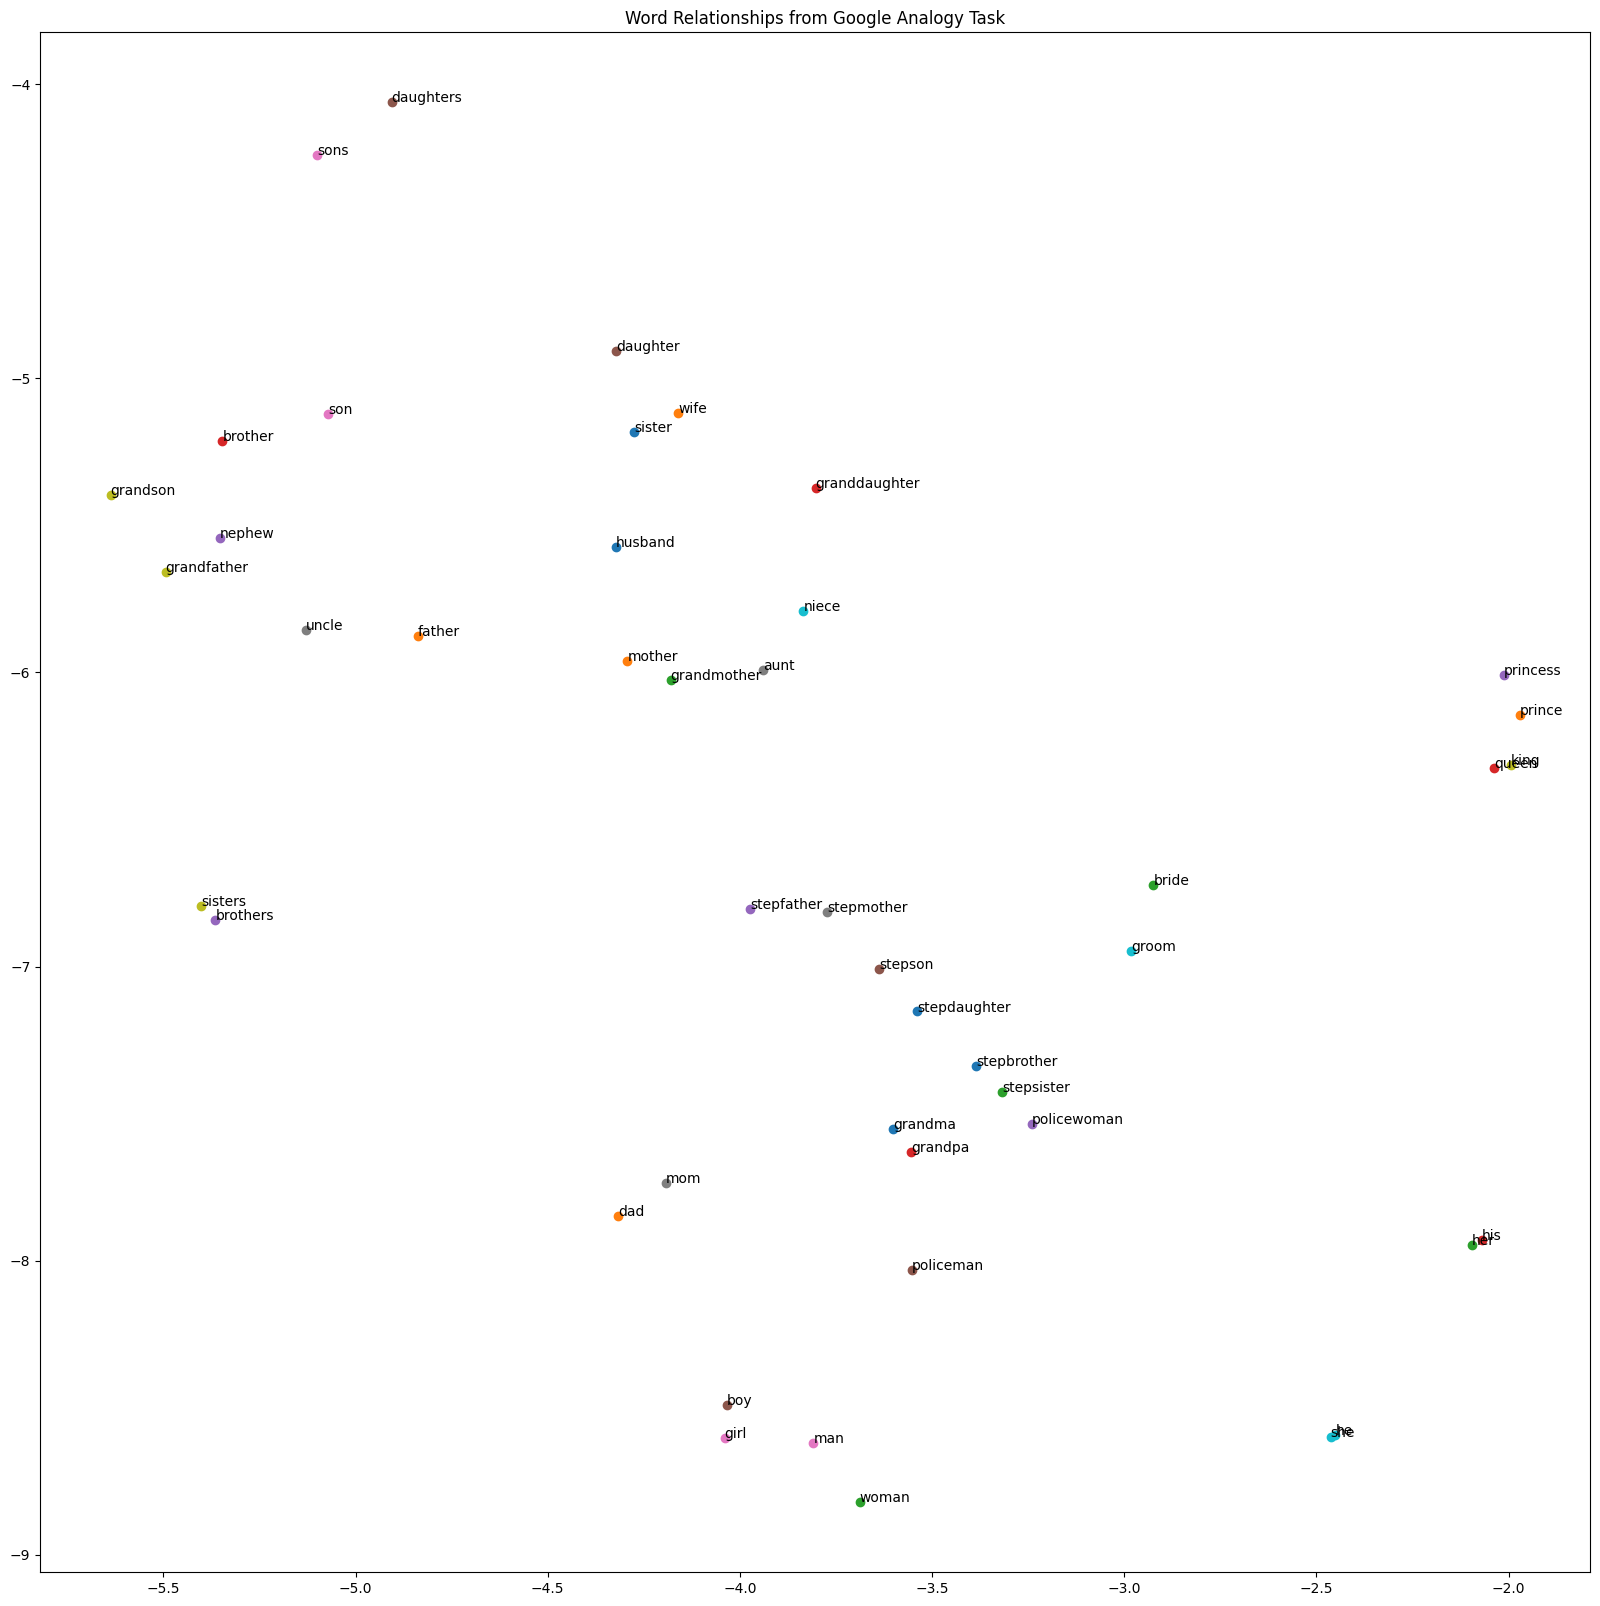

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"
elements = set()
cnt = 0
with open('questions-words.txt') as file:
  for line in file:
    if line.startswith(":"):
      cnt += 1
      if cnt > 5:
        break
    elif cnt == 5:
       wa,wb,wc,wd = line.split(" ")
       elements.update([wa,wb,wc,wd])

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`
word_vector = []
w_in_model = []

for i in elements:
  if i in my_model.wv:
    word_vector.append(my_model.wv[i])
    w_in_model.append(i)

word_vector = np.array(word_vector)

tsne_model = TSNE(n_components=2, random_state=42)
reduced_vector = tsne_model.fit_transform(word_vector)

plt.figure(figsize=(20,20))

for i, word in enumerate(w_in_model):
    plt.scatter(reduced_vector[i,0],reduced_vector[i,1])
    plt.annotate(word,(reduced_vector[i,0],reduced_vector[i,1]))


plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")